# Title: Building Ref Graphs with Zotero and Python
## Purpose: Visualize citation taxonomies in interesting ways
## @author: mjz

In [1]:
import os
import datetime
import markdown
from pyzotero import zotero


## pyzotero vars 
pyzotero lib docs: https://pypi.org/project/Pyzotero/

my library id: https://www.zotero.org/settings/keys

my (new) api key: https://www.zotero.org/settings/keys/new

library_type: 'user'

write api key to: ~/.zotero/.jupyter_api_key

In [16]:
%load_ext dotenv

The dotenv extension is already loaded. To reload it, use:
  %reload_ext dotenv


In [24]:
%reload_ext dotenv
%dotenv .env_zotero

zot = zotero.Zotero(os.environ.get('ZOTERO_USER_ID'), 'user', os.environ.get('ZOTERO_API_KEY'))

In [18]:
lib_contents = zot.everything(zot.top())

In [19]:
runtime = datetime.datetime.now()
window = runtime - datetime.timedelta(weeks=2)
def grab_dates(dict):
    """
    Pull the added and modified dates out of the metadata returned by the zotero client (a dictionary)
    Give back a tuple with just the date values as datetime objects
    """
    format_str = '%Y-%m-%dT%H:%M:%SZ'
    add_date = datetime.datetime.strptime(dict['data']['dateAdded'], format_str)
    mod_date = datetime.datetime.strptime(dict['data']['dateModified'], format_str)
    
    return (add_date, mod_date)


In [25]:
from collections import defaultdict

entries = defaultdict(list)

for i in lib_contents:
    added,modified = grab_dates(i)
    if modified > window:
            zot_url = f"https://www.zotero.org/{os.environ.get('ZOTERO_USER')}/items/{i['data']['key']}"
            item_data = i['data']
            
            # Add extra code for collection-level notes
            if item_data['itemType'] == 'note':
                info_string = f"*[Note: {item_data['note'].strip()}]({zot_url})*"
            else:
                info_string = f"[{item_data['title']}]({zot_url})"
                                                       
            entries[datetime.datetime.strftime(modified, '%B %-d, %Y')].append(info_string)

In [27]:
from IPython.core.display import HTML

email_contents = []
email_contents.append("###Latest Updates")

for k in entries.keys():
    email_contents.append(f"####{k}")
    for v in entries[k]:
        email_contents.append(f"* {v}")
        
HTML(markdown.markdown("\n".join(email_contents)))

In [31]:
lib_contents[0]

{'key': 'VP3DWKCE',
 'version': 1619,
 'library': {'type': 'user',
  'id': 3535163,
  'name': 'mjz123',
  'links': {'alternate': {'href': 'https://www.zotero.org/mjz123',
    'type': 'text/html'}}},
 'links': {'self': {'href': 'https://api.zotero.org/users/3535163/items/VP3DWKCE',
   'type': 'application/json'},
  'alternate': {'href': 'https://www.zotero.org/mjz123/items/VP3DWKCE',
   'type': 'text/html'}},
 'meta': {'creatorSummary': 'Merkle', 'numChildren': 1},
 'data': {'key': 'VP3DWKCE',
  'version': 1619,
  'itemType': 'journalArticle',
  'title': 'SECRECY, AUTHENTICATION, AND PUBLIC KEY SYSTEMS',
  'creators': [{'creatorType': 'author',
    'firstName': 'Ralph Charles',
    'lastName': 'Merkle'}],
  'abstractNote': '',
  'publicationTitle': '',
  'volume': '',
  'issue': '',
  'pages': '193',
  'date': '',
  'series': '',
  'seriesTitle': '',
  'seriesText': '',
  'journalAbbreviation': '',
  'language': 'en',
  'DOI': '',
  'ISSN': '',
  'shortTitle': '',
  'url': '',
  'access

In [32]:

things_in_library = zot.items()
# See how many things we got back
print("We retrieved %d items" % len( things_in_library ))
# Look at one of the things
print(things_in_library[1])

We retrieved 100 items
{'key': 'VP3DWKCE', 'version': 1619, 'library': {'type': 'user', 'id': 3535163, 'name': 'mjz123', 'links': {'alternate': {'href': 'https://www.zotero.org/mjz123', 'type': 'text/html'}}}, 'links': {'self': {'href': 'https://api.zotero.org/users/3535163/items/VP3DWKCE', 'type': 'application/json'}, 'alternate': {'href': 'https://www.zotero.org/mjz123/items/VP3DWKCE', 'type': 'text/html'}}, 'meta': {'creatorSummary': 'Merkle', 'numChildren': 1}, 'data': {'key': 'VP3DWKCE', 'version': 1619, 'itemType': 'journalArticle', 'title': 'SECRECY, AUTHENTICATION, AND PUBLIC KEY SYSTEMS', 'creators': [{'creatorType': 'author', 'firstName': 'Ralph Charles', 'lastName': 'Merkle'}], 'abstractNote': '', 'publicationTitle': '', 'volume': '', 'issue': '', 'pages': '193', 'date': '', 'series': '', 'seriesTitle': '', 'seriesText': '', 'journalAbbreviation': '', 'language': 'en', 'DOI': '', 'ISSN': '', 'shortTitle': '', 'url': '', 'accessDate': '', 'archive': '', 'archiveLocation': '',

In [33]:
zotero_group = zot
print("This group library has %d items in it" % zotero_group.num_items())

This group library has 1398 items in it


In [34]:
our_items = zotero_group.items( limit=100 ); 
try:            # This says we anticipate that an error might crop up.
    while (1):  # This says, keep doing the following until something goes wrong.
        our_items.extend( zotero_group.follow() )
except:         # This says, here is what we do if we get an error.
    pass        # This says, "ok thanks Python I was expecting that! Carry on."
    
print("We have %d items in total" % len( our_items ))

We have 3187 items in total


In [35]:
print(our_items[1]['data']['creators'])

[{'creatorType': 'author', 'firstName': 'Ralph Charles', 'lastName': 'Merkle'}]


In [36]:
for item in our_items:
    if( 'creators' not in item['data'] ):
       continue
    for creator in item['data']['creators']:
        full_name = ''
        if( 'firstName' in creator ):
            full_name = creator['firstName'] + ' ' + creator['lastName']
        else:
            full_name = creator['name']
        print("%s was a(n) %s" % ( full_name, creator['creatorType'] ))

Ralph Charles Merkle was a(n) author
Marcel Frigault was a(n) author
Lingyu Wang was a(n) author
Igor Kotenko was a(n) author
Mikhail Stepashkin was a(n) author
Jie Wang was a(n) author
John N. Whitley was a(n) author
Raphael C. W. Phan was a(n) author
David J. Parish was a(n) author
S.B. Moon was a(n) author
P. Skelly was a(n) author
D. Towsley was a(n) author
E.W. Zegura was a(n) author
K.L. Calvert was a(n) author
M.J. Donahoo was a(n) author
M. Parashar was a(n) author
S. Hariri was a(n) author
Vern Paxson was a(n) author
Markus C. Huebscher was a(n) author
Julie A. McCann was a(n) author
Markus C. Huebscher was a(n) author
Julie A. McCann was a(n) author
Sjouke Mauw was a(n) author
Martijn Oostdijk was a(n) author
Paul Humphreys was a(n) editor
R. Duncan Luce was a(n) author
Louis Narens was a(n) author
Louis Narens was a(n) author
R. Duncan Luce was a(n) author
Sjouke Mauw was a(n) author
Martijn Oostdijk was a(n) author
Dong Ho Won was a(n) editor
Seungjoo Kim was a(n) editor
Pi

In [38]:
import graphviz
# %load_ext hierarchymagic
author_graph = graphviz.Graph()


In [39]:
for item in our_items:
    if( 'creators' not in item['data'] ):
       continue
    # First, make a list of all the collaborators for this item.
    item_collaborators = []
    for creator in item['data']['creators']:
        full_name = ''
        if( 'firstName' in creator ):
            full_name = creator['firstName'] + ' ' + creator['lastName']
        else:
            full_name = creator['name']
        item_collaborators.append( full_name )
    # Second, add each pair of collaborators to the graph as an edge.
    while( len( item_collaborators ) > 1 ):
        me = item_collaborators.pop()
        for you in item_collaborators:
            author_graph.edge( me, you )

In [40]:
## Here is the function we need
def make_dotcell( thegraph, format="svg" ):
    cell_content = "%%dot " + "-f %s\n%s" % (format, thegraph.source)
    return cell_content

https://github.com/tkf/ipython-hierarchymagic/issues/4

`pip install git+https://github.com/tla/ipython-hierarchymagic.git`

then in cell

`%load_ext hierarchymagic`



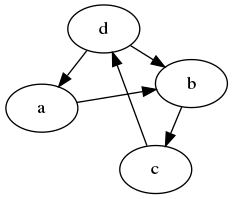

In [6]:
%%dot -- -Kfdp
digraph G {
    a->b; b->c; c->d; d->b; d->a;
}

In [56]:
%recall make_dotcell( author_graph )

Couldn't evaluate or find in history: make_dotcell( author_graph )


In [7]:
%%dot -f svg
graph {
	"Lingyu Wang" -- "Marcel Frigault"
	"Mikhail Stepashkin" -- "Igor Kotenko"
	"David J. Parish" -- "Jie Wang"
	"David J. Parish" -- "John N. Whitley"
	"David J. Parish" -- "Raphael C. W. Phan"
	"Raphael C. W. Phan" -- "Jie Wang"
	"Raphael C. W. Phan" -- "John N. Whitley"
	"John N. Whitley" -- "Jie Wang"
	"D. Towsley" -- "S.B. Moon"
	"D. Towsley" -- "P. Skelly"
	"P. Skelly" -- "S.B. Moon"
	"M.J. Donahoo" -- "E.W. Zegura"
	"M.J. Donahoo" -- "K.L. Calvert"
	"K.L. Calvert" -- "E.W. Zegura"
	"S. Hariri" -- "M. Parashar"
	"Julie A. McCann" -- "Markus C. Huebscher"
	"Julie A. McCann" -- "Markus C. Huebscher"
	"Martijn Oostdijk" -- "Sjouke Mauw"
	"Louis Narens" -- "Paul Humphreys"
	"Louis Narens" -- "R. Duncan Luce"
	"R. Duncan Luce" -- "Paul Humphreys"
	"R. Duncan Luce" -- "Louis Narens"
	"Seungjoo Kim" -- "Sjouke Mauw"
	"Seungjoo Kim" -- "Martijn Oostdijk"
	"Seungjoo Kim" -- "Dong Ho Won"
	"Dong Ho Won" -- "Sjouke Mauw"
	"Dong Ho Won" -- "Martijn Oostdijk"
	"Martijn Oostdijk" -- "Sjouke Mauw"
	"Patrick Schweitzer" -- "Pierpaolo Degano"
	"Patrick Schweitzer" -- "Sandro Etalle"
	"Patrick Schweitzer" -- "Joshua Guttman"
	"Patrick Schweitzer" -- "Barbara Kordy"
	"Patrick Schweitzer" -- "Sjouke Mauw"
	"Patrick Schweitzer" -- "Saša Radomirović"
	"Saša Radomirović" -- "Pierpaolo Degano"
	"Saša Radomirović" -- "Sandro Etalle"
	"Saša Radomirović" -- "Joshua Guttman"
	"Saša Radomirović" -- "Barbara Kordy"
	"Saša Radomirović" -- "Sjouke Mauw"
	"Sjouke Mauw" -- "Pierpaolo Degano"
	"Sjouke Mauw" -- "Sandro Etalle"
	"Sjouke Mauw" -- "Joshua Guttman"
	"Sjouke Mauw" -- "Barbara Kordy"
	"Barbara Kordy" -- "Pierpaolo Degano"
	"Barbara Kordy" -- "Sandro Etalle"
	"Barbara Kordy" -- "Joshua Guttman"
	"Joshua Guttman" -- "Pierpaolo Degano"
	"Joshua Guttman" -- "Sandro Etalle"
	"Sandro Etalle" -- "Pierpaolo Degano"
	"Yubin Xia" -- "Youren Shen"
	"Yubin Xia" -- "Hongliang Tian"
	"Yubin Xia" -- "Yu Chen"
	"Yubin Xia" -- "Kang Chen"
	"Yubin Xia" -- "Runji Wang"
	"Yubin Xia" -- "Yi Xu"
	"Yi Xu" -- "Youren Shen"
	"Yi Xu" -- "Hongliang Tian"
	"Yi Xu" -- "Yu Chen"
	"Yi Xu" -- "Kang Chen"
	"Yi Xu" -- "Runji Wang"
	"Runji Wang" -- "Youren Shen"
	"Runji Wang" -- "Hongliang Tian"
	"Runji Wang" -- "Yu Chen"
	"Runji Wang" -- "Kang Chen"
	"Kang Chen" -- "Youren Shen"
	"Kang Chen" -- "Hongliang Tian"
	"Kang Chen" -- "Yu Chen"
	"Yu Chen" -- "Youren Shen"
	"Yu Chen" -- "Hongliang Tian"
	"Hongliang Tian" -- "Youren Shen"
	"Jeannette M. Wing" -- "Oleg Sheyner"
	"Jeannette M. Wing" -- "Joshua Haines"
	"Jeannette M. Wing" -- "Somesh Jha"
	"Jeannette M. Wing" -- "Richard Lippmann"
	"Richard Lippmann" -- "Oleg Sheyner"
	"Richard Lippmann" -- "Joshua Haines"
	"Richard Lippmann" -- "Somesh Jha"
	"Somesh Jha" -- "Oleg Sheyner"
	"Somesh Jha" -- "Joshua Haines"
	"Joshua Haines" -- "Oleg Sheyner"
	"Jeannette Wing" -- "Somesh Jha"
	"Jeannette Wing" -- "Oleg Sheyner"
	"Oleg Sheyner" -- "Somesh Jha"
	"D. Towsley" -- "S.B. Moon"
	"D. Towsley" -- "P. Skelly"
	"P. Skelly" -- "S.B. Moon"
	"Marc Herbstritt" -- "Brian Chin"
	"Marc Herbstritt" -- "Daniel Von Dincklage"
	"Marc Herbstritt" -- "Vuc Ercegovac"
	"Marc Herbstritt" -- "Peter Hawkins"
	"Marc Herbstritt" -- "Mark S. Miller"
	"Marc Herbstritt" -- "Franz Och"
	"Marc Herbstritt" -- "Christopher Olston"
	"Marc Herbstritt" -- "Fernando Pereira"
	"Fernando Pereira" -- "Brian Chin"
	"Fernando Pereira" -- "Daniel Von Dincklage"
	"Fernando Pereira" -- "Vuc Ercegovac"
	"Fernando Pereira" -- "Peter Hawkins"
	"Fernando Pereira" -- "Mark S. Miller"
	"Fernando Pereira" -- "Franz Och"
	"Fernando Pereira" -- "Christopher Olston"
	"Christopher Olston" -- "Brian Chin"
	"Christopher Olston" -- "Daniel Von Dincklage"
	"Christopher Olston" -- "Vuc Ercegovac"
	"Christopher Olston" -- "Peter Hawkins"
	"Christopher Olston" -- "Mark S. Miller"
	"Christopher Olston" -- "Franz Och"
	"Franz Och" -- "Brian Chin"
	"Franz Och" -- "Daniel Von Dincklage"
	"Franz Och" -- "Vuc Ercegovac"
	"Franz Och" -- "Peter Hawkins"
	"Franz Och" -- "Mark S. Miller"
	"Mark S. Miller" -- "Brian Chin"
	"Mark S. Miller" -- "Daniel Von Dincklage"
	"Mark S. Miller" -- "Vuc Ercegovac"
	"Mark S. Miller" -- "Peter Hawkins"
	"Peter Hawkins" -- "Brian Chin"
	"Peter Hawkins" -- "Daniel Von Dincklage"
	"Peter Hawkins" -- "Vuc Ercegovac"
	"Vuc Ercegovac" -- "Brian Chin"
	"Vuc Ercegovac" -- "Daniel Von Dincklage"
	"Daniel Von Dincklage" -- "Brian Chin"
	"Mohamed Kaâniche" -- "Marc Dacier"
	"Mohamed Kaâniche" -- "Yves Deswarte"
	"Yves Deswarte" -- "Marc Dacier"
	"Mohamed Kaâniche" -- "Rodolphe Ortalo"
	"Mohamed Kaâniche" -- "Yves Deswarte"
	"Yves Deswarte" -- "Rodolphe Ortalo"
	"Le Song" -- "Hanjun Dai"
	"Le Song" -- "Hui Li"
	"Le Song" -- "Tian Tian"
	"Le Song" -- "Xin Huang"
	"Le Song" -- "Lin Wang"
	"Le Song" -- "Jun Zhu"
	"Jun Zhu" -- "Hanjun Dai"
	"Jun Zhu" -- "Hui Li"
	"Jun Zhu" -- "Tian Tian"
	"Jun Zhu" -- "Xin Huang"
	"Jun Zhu" -- "Lin Wang"
	"Lin Wang" -- "Hanjun Dai"
	"Lin Wang" -- "Hui Li"
	"Lin Wang" -- "Tian Tian"
	"Lin Wang" -- "Xin Huang"
	"Xin Huang" -- "Hanjun Dai"
	"Xin Huang" -- "Hui Li"
	"Xin Huang" -- "Tian Tian"
	"Tian Tian" -- "Hanjun Dai"
	"Tian Tian" -- "Hui Li"
	"Hui Li" -- "Hanjun Dai"
	"J F Willemsen" -- "D Wilkinson"
	"Lidia A. Braunstein" -- "Wei Wang"
	"Lidia A. Braunstein" -- "Ming Tang"
	"Lidia A. Braunstein" -- "H. Eugene Stanley"
	"H. Eugene Stanley" -- "Wei Wang"
	"H. Eugene Stanley" -- "Ming Tang"
	"Ming Tang" -- "Wei Wang"
	"Shlomo Havlin" -- "Louis M. Shekhtman"
	"Shlomo Havlin" -- "Michael M. Danziger"
	"Michael M. Danziger" -- "Louis M. Shekhtman"
	"Claudio Castellano" -- "Filippo Radicchi"
	"Rohan M Amin" -- "Eric M Hutchins"
	"Rohan M Amin" -- "Michael J Cloppert"
	"Michael J Cloppert" -- "Eric M Hutchins"
	"Vasileios Gkioulos" -- "Muhammad Mudassar Yamin"
	"Vasileios Gkioulos" -- "Basel Katt"
	"Basel Katt" -- "Muhammad Mudassar Yamin"
	"Brian Milch" -- "Daphne Koller"
	"David Pym" -- "Jonathan M. Spring"
	"David Pym" -- "Tyler Moore"
	"Tyler Moore" -- "Jonathan M. Spring"
	"Reinhard Schwarz" -- "Manuel Rudolph"
	"Eduardo Fernández-Medina" -- "Oscar Rebollo"
	"Eduardo Fernández-Medina" -- "Daniel Mellado"
	"Eduardo Fernández-Medina" -- "Luis Enrique Sánchez"
	"Luis Enrique Sánchez" -- "Oscar Rebollo"
	"Luis Enrique Sánchez" -- "Daniel Mellado"
	"Daniel Mellado" -- "Oscar Rebollo"
	"Laurie Williams" -- "Patrick Morrison"
	"Laurie Williams" -- "David Moye"
	"Laurie Williams" -- "Rahul Pandita"
	"Rahul Pandita" -- "Patrick Morrison"
	"Rahul Pandita" -- "David Moye"
	"David Moye" -- "Patrick Morrison"
	"Hervé Debar" -- "Maxim Kolomeec"
	"Hervé Debar" -- "Gustavo Granadillo"
	"Hervé Debar" -- "Elena Doynikova"
	"Hervé Debar" -- "Andrey Chechulin"
	"Hervé Debar" -- "Igor Kotenko"
	"Igor Kotenko" -- "Maxim Kolomeec"
	"Igor Kotenko" -- "Gustavo Granadillo"
	"Igor Kotenko" -- "Elena Doynikova"
	"Igor Kotenko" -- "Andrey Chechulin"
	"Andrey Chechulin" -- "Maxim Kolomeec"
	"Andrey Chechulin" -- "Gustavo Granadillo"
	"Andrey Chechulin" -- "Elena Doynikova"
	"Elena Doynikova" -- "Maxim Kolomeec"
	"Elena Doynikova" -- "Gustavo Granadillo"
	"Gustavo Granadillo" -- "Maxim Kolomeec"
	"Amos Tversky" -- "David Krantz"
	"Amos Tversky" -- "Duncan Luce"
	"Amos Tversky" -- "Patrick Suppes"
	"Patrick Suppes" -- "David Krantz"
	"Patrick Suppes" -- "Duncan Luce"
	"Duncan Luce" -- "David Krantz"
	"Robert Hoehndorf" -- "Georgios V. Gkoutos"
	"Robert Hoehndorf" -- "Paul N. Schofield"
	"Paul N. Schofield" -- "Georgios V. Gkoutos"
	" Suku Nair" -- " Derek Phanekham"
	" Suku Nair" -- " Matthew Zaber"
	" Matthew Zaber" -- " Derek Phanekham"
	"Una-May O'Reilly" -- "Stjepan Picek"
	"Una-May O'Reilly" -- "Erik Hemberg"
	"Erik Hemberg" -- "Stjepan Picek"
	"Jason Thornton" -- "Andre King"
	"Jason Thornton" -- "Rich Lippmann"
	"Jason Thornton" -- "Benjamin Miller"
	"Jason Thornton" -- "Doug Reynolds"
	"Jason Thornton" -- "Fred Richardson"
	"Jason Thornton" -- "Cem Sahin"
	"Jason Thornton" -- "An Tran"
	"Jason Thornton" -- "Pierre Trepagnier"
	"Jason Thornton" -- "Joe Zipkin"
	"Jason Thornton" -- "Christopher Roeser"
	"Jason Thornton" -- "Konstantinos Hennighausen"
	"Jason Thornton" -- "Sanjeev Mohindra"
	"Sanjeev Mohindra" -- "Andre King"
	"Sanjeev Mohindra" -- "Rich Lippmann"
	"Sanjeev Mohindra" -- "Benjamin Miller"
	"Sanjeev Mohindra" -- "Doug Reynolds"
	"Sanjeev Mohindra" -- "Fred Richardson"
	"Sanjeev Mohindra" -- "Cem Sahin"
	"Sanjeev Mohindra" -- "An Tran"
	"Sanjeev Mohindra" -- "Pierre Trepagnier"
	"Sanjeev Mohindra" -- "Joe Zipkin"
	"Sanjeev Mohindra" -- "Christopher Roeser"
	"Sanjeev Mohindra" -- "Konstantinos Hennighausen"
	"Konstantinos Hennighausen" -- "Andre King"
	"Konstantinos Hennighausen" -- "Rich Lippmann"
	"Konstantinos Hennighausen" -- "Benjamin Miller"
	"Konstantinos Hennighausen" -- "Doug Reynolds"
	"Konstantinos Hennighausen" -- "Fred Richardson"
	"Konstantinos Hennighausen" -- "Cem Sahin"
	"Konstantinos Hennighausen" -- "An Tran"
	"Konstantinos Hennighausen" -- "Pierre Trepagnier"
	"Konstantinos Hennighausen" -- "Joe Zipkin"
	"Konstantinos Hennighausen" -- "Christopher Roeser"
	"Christopher Roeser" -- "Andre King"
	"Christopher Roeser" -- "Rich Lippmann"
	"Christopher Roeser" -- "Benjamin Miller"
	"Christopher Roeser" -- "Doug Reynolds"
	"Christopher Roeser" -- "Fred Richardson"
	"Christopher Roeser" -- "Cem Sahin"
	"Christopher Roeser" -- "An Tran"
	"Christopher Roeser" -- "Pierre Trepagnier"
	"Christopher Roeser" -- "Joe Zipkin"
	"Joe Zipkin" -- "Andre King"
	"Joe Zipkin" -- "Rich Lippmann"
	"Joe Zipkin" -- "Benjamin Miller"
	"Joe Zipkin" -- "Doug Reynolds"
	"Joe Zipkin" -- "Fred Richardson"
	"Joe Zipkin" -- "Cem Sahin"
	"Joe Zipkin" -- "An Tran"
	"Joe Zipkin" -- "Pierre Trepagnier"
	"Pierre Trepagnier" -- "Andre King"
	"Pierre Trepagnier" -- "Rich Lippmann"
	"Pierre Trepagnier" -- "Benjamin Miller"
	"Pierre Trepagnier" -- "Doug Reynolds"
	"Pierre Trepagnier" -- "Fred Richardson"
	"Pierre Trepagnier" -- "Cem Sahin"
	"Pierre Trepagnier" -- "An Tran"
	"An Tran" -- "Andre King"
	"An Tran" -- "Rich Lippmann"
	"An Tran" -- "Benjamin Miller"
	"An Tran" -- "Doug Reynolds"
	"An Tran" -- "Fred Richardson"
	"An Tran" -- "Cem Sahin"
	"Cem Sahin" -- "Andre King"
	"Cem Sahin" -- "Rich Lippmann"
	"Cem Sahin" -- "Benjamin Miller"
	"Cem Sahin" -- "Doug Reynolds"
	"Cem Sahin" -- "Fred Richardson"
	"Fred Richardson" -- "Andre King"
	"Fred Richardson" -- "Rich Lippmann"
	"Fred Richardson" -- "Benjamin Miller"
	"Fred Richardson" -- "Doug Reynolds"
	"Doug Reynolds" -- "Andre King"
	"Doug Reynolds" -- "Rich Lippmann"
	"Doug Reynolds" -- "Benjamin Miller"
	"Benjamin Miller" -- "Andre King"
	"Benjamin Miller" -- "Rich Lippmann"
	"Rich Lippmann" -- "Andre King"
	"National Academies of Sciences, Engineering, and Medicine" -- "Lynette I. Millett"
	"National Academies of Sciences, Engineering, and Medicine" -- "Baruch Fischhoff"
	"National Academies of Sciences, Engineering, and Medicine" -- "Peter J. Weinberger"
	"National Academies of Sciences, Engineering, and Medicine" -- "Computer Science and Telecommunications Board"
	"National Academies of Sciences, Engineering, and Medicine" -- "Division on Engineering and Physical Sciences"
	"Division on Engineering and Physical Sciences" -- "Lynette I. Millett"
	"Division on Engineering and Physical Sciences" -- "Baruch Fischhoff"
	"Division on Engineering and Physical Sciences" -- "Peter J. Weinberger"
	"Division on Engineering and Physical Sciences" -- "Computer Science and Telecommunications Board"
	"Computer Science and Telecommunications Board" -- "Lynette I. Millett"
	"Computer Science and Telecommunications Board" -- "Baruch Fischhoff"
	"Computer Science and Telecommunications Board" -- "Peter J. Weinberger"
	"Peter J. Weinberger" -- "Lynette I. Millett"
	"Peter J. Weinberger" -- "Baruch Fischhoff"
	"Baruch Fischhoff" -- "Lynette I. Millett"
	"Abdul Halim Omar" -- "W. Nor Haizan W. Mohamed"
	"Abdul Halim Omar" -- "Mohd Najib Mohd Salleh"
	"Mohd Najib Mohd Salleh" -- "W. Nor Haizan W. Mohamed"
	"Chunhua Wang" -- "Yang Xin"
	"Chunhua Wang" -- "Lingshuang Kong"
	"Chunhua Wang" -- "Zhi Liu"
	"Chunhua Wang" -- "Yuling Chen"
	"Chunhua Wang" -- "Yanmiao Li"
	"Chunhua Wang" -- "Hongliang Zhu"
	"Chunhua Wang" -- "Mingcheng Gao"
	"Chunhua Wang" -- "Haixia Hou"
	"Haixia Hou" -- "Yang Xin"
	"Haixia Hou" -- "Lingshuang Kong"
	"Haixia Hou" -- "Zhi Liu"
	"Haixia Hou" -- "Yuling Chen"
	"Haixia Hou" -- "Yanmiao Li"
	"Haixia Hou" -- "Hongliang Zhu"
	"Haixia Hou" -- "Mingcheng Gao"
	"Mingcheng Gao" -- "Yang Xin"
	"Mingcheng Gao" -- "Lingshuang Kong"
	"Mingcheng Gao" -- "Zhi Liu"
	"Mingcheng Gao" -- "Yuling Chen"
	"Mingcheng Gao" -- "Yanmiao Li"
	"Mingcheng Gao" -- "Hongliang Zhu"
	"Hongliang Zhu" -- "Yang Xin"
	"Hongliang Zhu" -- "Lingshuang Kong"
	"Hongliang Zhu" -- "Zhi Liu"
	"Hongliang Zhu" -- "Yuling Chen"
	"Hongliang Zhu" -- "Yanmiao Li"
	"Yanmiao Li" -- "Yang Xin"
	"Yanmiao Li" -- "Lingshuang Kong"
	"Yanmiao Li" -- "Zhi Liu"
	"Yanmiao Li" -- "Yuling Chen"
	"Yuling Chen" -- "Yang Xin"
	"Yuling Chen" -- "Lingshuang Kong"
	"Yuling Chen" -- "Zhi Liu"
	"Zhi Liu" -- "Yang Xin"
	"Zhi Liu" -- "Lingshuang Kong"
	"Lingshuang Kong" -- "Yang Xin"
	"Chunhua Wang" -- "Yang Xin"
	"Chunhua Wang" -- "Lingshuang Kong"
	"Chunhua Wang" -- "Zhi Liu"
	"Chunhua Wang" -- "Yuling Chen"
	"Chunhua Wang" -- "Yanmiao Li"
	"Chunhua Wang" -- "Hongliang Zhu"
	"Chunhua Wang" -- "Mingcheng Gao"
	"Chunhua Wang" -- "Haixia Hou"
	"Haixia Hou" -- "Yang Xin"
	"Haixia Hou" -- "Lingshuang Kong"
	"Haixia Hou" -- "Zhi Liu"
	"Haixia Hou" -- "Yuling Chen"
	"Haixia Hou" -- "Yanmiao Li"
	"Haixia Hou" -- "Hongliang Zhu"
	"Haixia Hou" -- "Mingcheng Gao"
	"Mingcheng Gao" -- "Yang Xin"
	"Mingcheng Gao" -- "Lingshuang Kong"
	"Mingcheng Gao" -- "Zhi Liu"
	"Mingcheng Gao" -- "Yuling Chen"
	"Mingcheng Gao" -- "Yanmiao Li"
	"Mingcheng Gao" -- "Hongliang Zhu"
	"Hongliang Zhu" -- "Yang Xin"
	"Hongliang Zhu" -- "Lingshuang Kong"
	"Hongliang Zhu" -- "Zhi Liu"
	"Hongliang Zhu" -- "Yuling Chen"
	"Hongliang Zhu" -- "Yanmiao Li"
	"Yanmiao Li" -- "Yang Xin"
	"Yanmiao Li" -- "Lingshuang Kong"
	"Yanmiao Li" -- "Zhi Liu"
	"Yanmiao Li" -- "Yuling Chen"
	"Yuling Chen" -- "Yang Xin"
	"Yuling Chen" -- "Lingshuang Kong"
	"Yuling Chen" -- "Zhi Liu"
	"Zhi Liu" -- "Yang Xin"
	"Zhi Liu" -- "Lingshuang Kong"
	"Lingshuang Kong" -- "Yang Xin"
	"Xian Du" -- "Sumeet Dua"
	"Martin Takáč" -- "Afshin Oroojlooyjadid"
	"Martin Takáč" -- "MohammadReza Nazari"
	"Martin Takáč" -- "Lawrence Snyder"
	"Lawrence Snyder" -- "Afshin Oroojlooyjadid"
	"Lawrence Snyder" -- "MohammadReza Nazari"
	"MohammadReza Nazari" -- "Afshin Oroojlooyjadid"
	"Andrew G. Barto" -- "Richard S. Sutton"
	"Mounir Ghogho" -- "Tuan A Tang"
	"Mounir Ghogho" -- "Lotfi Mhamdi"
	"Mounir Ghogho" -- "Des McLernon"
	"Mounir Ghogho" -- "Syed Ali Raza Zaidi"
	"Syed Ali Raza Zaidi" -- "Tuan A Tang"
	"Syed Ali Raza Zaidi" -- "Lotfi Mhamdi"
	"Syed Ali Raza Zaidi" -- "Des McLernon"
	"Des McLernon" -- "Tuan A Tang"
	"Des McLernon" -- "Lotfi Mhamdi"
	"Lotfi Mhamdi" -- "Tuan A Tang"
	"Laurie Williams" -- "Akond Ashfaque Ur Rahman"
	"Nicolas Serrano" -- "Christof Ebert"
	"Nicolas Serrano" -- "Gorka Gallardo"
	"Nicolas Serrano" -- "Josune Hernantes"
	"Josune Hernantes" -- "Christof Ebert"
	"Josune Hernantes" -- "Gorka Gallardo"
	"Gorka Gallardo" -- "Christof Ebert"
	"M. Daneva" -- "F. M. A. Erich"
	"M. Daneva" -- "C. Amrit"
	"C. Amrit" -- "F. M. A. Erich"
	"W.L. Melo" -- "V.R. Basili"
	"W.L. Melo" -- "L.C. Briand"
	"L.C. Briand" -- "V.R. Basili"
	"Laurie Williams" -- Michael
	"Robert Bowdidge" -- "Brittany Johnson"
	"Robert Bowdidge" -- "Yoonki Song"
	"Robert Bowdidge" -- "Emerson Murphy-Hill"
	"Emerson Murphy-Hill" -- "Brittany Johnson"
	"Emerson Murphy-Hill" -- "Yoonki Song"
	"Yoonki Song" -- "Brittany Johnson"
	"Dave Thomas" -- "Kent M. Beck"
	"Dave Thomas" -- "Mike Beedle"
	"Dave Thomas" -- "Arie van Bennekum"
	"Dave Thomas" -- "Alistair Cockburn"
	"Dave Thomas" -- "Ward Cunningham"
	"Dave Thomas" -- "Martin Fowler"
	"Dave Thomas" -- "James Grenning"
	"Dave Thomas" -- "Jim Highsmith"
	"Dave Thomas" -- "Andy Hunt"
	"Dave Thomas" -- "Ron Jeffries"
	"Dave Thomas" -- "Jon Kern"
	"Dave Thomas" -- "Brian Marick"
	"Dave Thomas" -- "R. C. Martin"
	"Dave Thomas" -- "Steve J. Mellor"
	"Dave Thomas" -- "Ken Schwaber"
	"Dave Thomas" -- "Jeff Sutherland"
	"Jeff Sutherland" -- "Kent M. Beck"
	"Jeff Sutherland" -- "Mike Beedle"
	"Jeff Sutherland" -- "Arie van Bennekum"
	"Jeff Sutherland" -- "Alistair Cockburn"
	"Jeff Sutherland" -- "Ward Cunningham"
	"Jeff Sutherland" -- "Martin Fowler"
	"Jeff Sutherland" -- "James Grenning"
	"Jeff Sutherland" -- "Jim Highsmith"
	"Jeff Sutherland" -- "Andy Hunt"
	"Jeff Sutherland" -- "Ron Jeffries"
	"Jeff Sutherland" -- "Jon Kern"
	"Jeff Sutherland" -- "Brian Marick"
	"Jeff Sutherland" -- "R. C. Martin"
	"Jeff Sutherland" -- "Steve J. Mellor"
	"Jeff Sutherland" -- "Ken Schwaber"
	"Ken Schwaber" -- "Kent M. Beck"
	"Ken Schwaber" -- "Mike Beedle"
	"Ken Schwaber" -- "Arie van Bennekum"
	"Ken Schwaber" -- "Alistair Cockburn"
	"Ken Schwaber" -- "Ward Cunningham"
	"Ken Schwaber" -- "Martin Fowler"
	"Ken Schwaber" -- "James Grenning"
	"Ken Schwaber" -- "Jim Highsmith"
	"Ken Schwaber" -- "Andy Hunt"
	"Ken Schwaber" -- "Ron Jeffries"
	"Ken Schwaber" -- "Jon Kern"
	"Ken Schwaber" -- "Brian Marick"
	"Ken Schwaber" -- "R. C. Martin"
	"Ken Schwaber" -- "Steve J. Mellor"
	"Steve J. Mellor" -- "Kent M. Beck"
	"Steve J. Mellor" -- "Mike Beedle"
	"Steve J. Mellor" -- "Arie van Bennekum"
	"Steve J. Mellor" -- "Alistair Cockburn"
	"Steve J. Mellor" -- "Ward Cunningham"
	"Steve J. Mellor" -- "Martin Fowler"
	"Steve J. Mellor" -- "James Grenning"
	"Steve J. Mellor" -- "Jim Highsmith"
	"Steve J. Mellor" -- "Andy Hunt"
	"Steve J. Mellor" -- "Ron Jeffries"
	"Steve J. Mellor" -- "Jon Kern"
	"Steve J. Mellor" -- "Brian Marick"
	"Steve J. Mellor" -- "R. C. Martin"
	"R. C. Martin" -- "Kent M. Beck"
	"R. C. Martin" -- "Mike Beedle"
	"R. C. Martin" -- "Arie van Bennekum"
	"R. C. Martin" -- "Alistair Cockburn"
	"R. C. Martin" -- "Ward Cunningham"
	"R. C. Martin" -- "Martin Fowler"
	"R. C. Martin" -- "James Grenning"
	"R. C. Martin" -- "Jim Highsmith"
	"R. C. Martin" -- "Andy Hunt"
	"R. C. Martin" -- "Ron Jeffries"
	"R. C. Martin" -- "Jon Kern"
	"R. C. Martin" -- "Brian Marick"
	"Brian Marick" -- "Kent M. Beck"
	"Brian Marick" -- "Mike Beedle"
	"Brian Marick" -- "Arie van Bennekum"
	"Brian Marick" -- "Alistair Cockburn"
	"Brian Marick" -- "Ward Cunningham"
	"Brian Marick" -- "Martin Fowler"
	"Brian Marick" -- "James Grenning"
	"Brian Marick" -- "Jim Highsmith"
	"Brian Marick" -- "Andy Hunt"
	"Brian Marick" -- "Ron Jeffries"
	"Brian Marick" -- "Jon Kern"
	"Jon Kern" -- "Kent M. Beck"
	"Jon Kern" -- "Mike Beedle"
	"Jon Kern" -- "Arie van Bennekum"
	"Jon Kern" -- "Alistair Cockburn"
	"Jon Kern" -- "Ward Cunningham"
	"Jon Kern" -- "Martin Fowler"
	"Jon Kern" -- "James Grenning"
	"Jon Kern" -- "Jim Highsmith"
	"Jon Kern" -- "Andy Hunt"
	"Jon Kern" -- "Ron Jeffries"
	"Ron Jeffries" -- "Kent M. Beck"
	"Ron Jeffries" -- "Mike Beedle"
	"Ron Jeffries" -- "Arie van Bennekum"
	"Ron Jeffries" -- "Alistair Cockburn"
	"Ron Jeffries" -- "Ward Cunningham"
	"Ron Jeffries" -- "Martin Fowler"
	"Ron Jeffries" -- "James Grenning"
	"Ron Jeffries" -- "Jim Highsmith"
	"Ron Jeffries" -- "Andy Hunt"
	"Andy Hunt" -- "Kent M. Beck"
	"Andy Hunt" -- "Mike Beedle"
	"Andy Hunt" -- "Arie van Bennekum"
	"Andy Hunt" -- "Alistair Cockburn"
	"Andy Hunt" -- "Ward Cunningham"
	"Andy Hunt" -- "Martin Fowler"
	"Andy Hunt" -- "James Grenning"
	"Andy Hunt" -- "Jim Highsmith"
	"Jim Highsmith" -- "Kent M. Beck"
	"Jim Highsmith" -- "Mike Beedle"
	"Jim Highsmith" -- "Arie van Bennekum"
	"Jim Highsmith" -- "Alistair Cockburn"
	"Jim Highsmith" -- "Ward Cunningham"
	"Jim Highsmith" -- "Martin Fowler"
	"Jim Highsmith" -- "James Grenning"
	"James Grenning" -- "Kent M. Beck"
	"James Grenning" -- "Mike Beedle"
	"James Grenning" -- "Arie van Bennekum"
	"James Grenning" -- "Alistair Cockburn"
	"James Grenning" -- "Ward Cunningham"
	"James Grenning" -- "Martin Fowler"
	"Martin Fowler" -- "Kent M. Beck"
	"Martin Fowler" -- "Mike Beedle"
	"Martin Fowler" -- "Arie van Bennekum"
	"Martin Fowler" -- "Alistair Cockburn"
	"Martin Fowler" -- "Ward Cunningham"
	"Ward Cunningham" -- "Kent M. Beck"
	"Ward Cunningham" -- "Mike Beedle"
	"Ward Cunningham" -- "Arie van Bennekum"
	"Ward Cunningham" -- "Alistair Cockburn"
	"Alistair Cockburn" -- "Kent M. Beck"
	"Alistair Cockburn" -- "Mike Beedle"
	"Alistair Cockburn" -- "Arie van Bennekum"
	"Arie van Bennekum" -- "Kent M. Beck"
	"Arie van Bennekum" -- "Mike Beedle"
	"Mike Beedle" -- "Kent M. Beck"
	"Laurie Williams" -- "Akond Rahman"
	"Laurie Williams" -- "Chris Parnin"
	"Chris Parnin" -- "Akond Rahman"
	"Damian Andrew Tamburri" -- "Matej Artac"
	"Damian Andrew Tamburri" -- "Tadej Borovssak"
	"Damian Andrew Tamburri" -- "Elisabetta Di Nitto"
	"Damian Andrew Tamburri" -- "Michele Guerriero"
	"Michele Guerriero" -- "Matej Artac"
	"Michele Guerriero" -- "Tadej Borovssak"
	"Michele Guerriero" -- "Elisabetta Di Nitto"
	"Elisabetta Di Nitto" -- "Matej Artac"
	"Elisabetta Di Nitto" -- "Tadej Borovssak"
	"Tadej Borovssak" -- "Matej Artac"
	"Ricardo Colomo-Palacios" -- "Antonia Mas"
	"Ricardo Colomo-Palacios" -- "Antoni Mesquida"
	"Ricardo Colomo-Palacios" -- "Rory V. O'Connor"
	"Ricardo Colomo-Palacios" -- "Terry Rout"
	"Ricardo Colomo-Palacios" -- "Alec Dorling"
	"Ricardo Colomo-Palacios" -- "Håvard Myrbakken"
	"Håvard Myrbakken" -- "Antonia Mas"
	"Håvard Myrbakken" -- "Antoni Mesquida"
	"Håvard Myrbakken" -- "Rory V. O'Connor"
	"Håvard Myrbakken" -- "Terry Rout"
	"Håvard Myrbakken" -- "Alec Dorling"
	"Alec Dorling" -- "Antonia Mas"
	"Alec Dorling" -- "Antoni Mesquida"
	"Alec Dorling" -- "Rory V. O'Connor"
	"Alec Dorling" -- "Terry Rout"
	"Terry Rout" -- "Antonia Mas"
	"Terry Rout" -- "Antoni Mesquida"
	"Terry Rout" -- "Rory V. O'Connor"
	"Rory V. O'Connor" -- "Antonia Mas"
	"Rory V. O'Connor" -- "Antoni Mesquida"
	"Antoni Mesquida" -- "Antonia Mas"
	"Lotfi Ben Othmane" -- "Vaishnavi Mohan"
	SoftNet -- "International Conference on Software Engineering Advances"
	SoftNet -- "Luigi Lavazza"
	SoftNet -- "Mira Kajko-Mattsson"
	SoftNet -- "Krishna M Kavi"
	SoftNet -- "Radek Koci"
	SoftNet -- "Stephen Clyde"
	SoftNet -- "Research, and Industry Association International Academy"
	SoftNet -- "International Conference on Software Engineering Advances"
	SoftNet -- ICSEA
	ICSEA -- "International Conference on Software Engineering Advances"
	ICSEA -- "Luigi Lavazza"
	ICSEA -- "Mira Kajko-Mattsson"
	ICSEA -- "Krishna M Kavi"
	ICSEA -- "Radek Koci"
	ICSEA -- "Stephen Clyde"
	ICSEA -- "Research, and Industry Association International Academy"
	ICSEA -- "International Conference on Software Engineering Advances"
	"International Conference on Software Engineering Advances" -- "International Conference on Software Engineering Advances"
	"International Conference on Software Engineering Advances" -- "Luigi Lavazza"
	"International Conference on Software Engineering Advances" -- "Mira Kajko-Mattsson"
	"International Conference on Software Engineering Advances" -- "Krishna M Kavi"
	"International Conference on Software Engineering Advances" -- "Radek Koci"
	"International Conference on Software Engineering Advances" -- "Stephen Clyde"
	"International Conference on Software Engineering Advances" -- "Research, and Industry Association International Academy"
	"Research, and Industry Association International Academy" -- "International Conference on Software Engineering Advances"
	"Research, and Industry Association International Academy" -- "Luigi Lavazza"
	"Research, and Industry Association International Academy" -- "Mira Kajko-Mattsson"
	"Research, and Industry Association International Academy" -- "Krishna M Kavi"
	"Research, and Industry Association International Academy" -- "Radek Koci"
	"Research, and Industry Association International Academy" -- "Stephen Clyde"
	"Stephen Clyde" -- "International Conference on Software Engineering Advances"
	"Stephen Clyde" -- "Luigi Lavazza"
	"Stephen Clyde" -- "Mira Kajko-Mattsson"
	"Stephen Clyde" -- "Krishna M Kavi"
	"Stephen Clyde" -- "Radek Koci"
	"Radek Koci" -- "International Conference on Software Engineering Advances"
	"Radek Koci" -- "Luigi Lavazza"
	"Radek Koci" -- "Mira Kajko-Mattsson"
	"Radek Koci" -- "Krishna M Kavi"
	"Krishna M Kavi" -- "International Conference on Software Engineering Advances"
	"Krishna M Kavi" -- "Luigi Lavazza"
	"Krishna M Kavi" -- "Mira Kajko-Mattsson"
	"Mira Kajko-Mattsson" -- "International Conference on Software Engineering Advances"
	"Mira Kajko-Mattsson" -- "Luigi Lavazza"
	"Luigi Lavazza" -- "International Conference on Software Engineering Advances"
	"M. Daneva" -- "F. M. A. Erich"
	"M. Daneva" -- "C. Amrit"
	"C. Amrit" -- "F. M. A. Erich"
	"Jonathan Peter Bowen" -- "Michael G. Hinchey"
	"Michael Eddington" -- "Paul Saitta"
	"Michael Eddington" -- "Brenda Larcom"
	"Brenda Larcom" -- "Paul Saitta"
	"John T Michalski" -- "David P Duggan"
	"Tony Uceda Vélez" -- "Marco M. Morana"
	"Lauren Clausen" -- "Jackson Wynn"
	"Lauren Clausen" -- "Joseph Whitmore"
	"Lauren Clausen" -- "Geoff Upton"
	"Lauren Clausen" -- "Lindsay Spriggs"
	"Lauren Clausen" -- "Dan McKinnon"
	"Lauren Clausen" -- "Richard McInnes"
	"Lauren Clausen" -- "Richard Graubart"
	"Richard Graubart" -- "Jackson Wynn"
	"Richard Graubart" -- "Joseph Whitmore"
	"Richard Graubart" -- "Geoff Upton"
	"Richard Graubart" -- "Lindsay Spriggs"
	"Richard Graubart" -- "Dan McKinnon"
	"Richard Graubart" -- "Richard McInnes"
	"Richard McInnes" -- "Jackson Wynn"
	"Richard McInnes" -- "Joseph Whitmore"
	"Richard McInnes" -- "Geoff Upton"
	"Richard McInnes" -- "Lindsay Spriggs"
	"Richard McInnes" -- "Dan McKinnon"
	"Dan McKinnon" -- "Jackson Wynn"
	"Dan McKinnon" -- "Joseph Whitmore"
	"Dan McKinnon" -- "Geoff Upton"
	"Dan McKinnon" -- "Lindsay Spriggs"
	"Lindsay Spriggs" -- "Jackson Wynn"
	"Lindsay Spriggs" -- "Joseph Whitmore"
	"Lindsay Spriggs" -- "Geoff Upton"
	"Geoff Upton" -- "Jackson Wynn"
	"Geoff Upton" -- "Joseph Whitmore"
	"Joseph Whitmore" -- "Jackson Wynn"
	"Rohan M Amin" -- "Eric M Hutchins"
	"Rohan M Amin" -- "Michael J Cloppert"
	"Michael J Cloppert" -- "Eric M Hutchins"
	"Fiona Polack" -- "David Hutchison"
	"Fiona Polack" -- "Takeo Kanade"
	"Fiona Polack" -- "Josef Kittler"
	"Fiona Polack" -- "Jon M. Kleinberg"
	"Fiona Polack" -- "Friedemann Mattern"
	"Fiona Polack" -- "John C. Mitchell"
	"Fiona Polack" -- "Moni Naor"
	"Fiona Polack" -- "Oscar Nierstrasz"
	"Fiona Polack" -- "C. Pandu Rangan"
	"Fiona Polack" -- "Bernhard Steffen"
	"Fiona Polack" -- "Madhu Sudan"
	"Fiona Polack" -- "Demetri Terzopoulos"
	"Fiona Polack" -- "Dough Tygar"
	"Fiona Polack" -- "Moshe Y. Vardi"
	"Fiona Polack" -- "Gerhard Weikum"
	"Fiona Polack" -- "Kan Zhang"
	"Fiona Polack" -- "Yuliang Zheng"
	"Fiona Polack" -- "Thitima Srivatanakul"
	"Fiona Polack" -- "John A. Clark"
	"John A. Clark" -- "David Hutchison"
	"John A. Clark" -- "Takeo Kanade"
	"John A. Clark" -- "Josef Kittler"
	"John A. Clark" -- "Jon M. Kleinberg"
	"John A. Clark" -- "Friedemann Mattern"
	"John A. Clark" -- "John C. Mitchell"
	"John A. Clark" -- "Moni Naor"
	"John A. Clark" -- "Oscar Nierstrasz"
	"John A. Clark" -- "C. Pandu Rangan"
	"John A. Clark" -- "Bernhard Steffen"
	"John A. Clark" -- "Madhu Sudan"
	"John A. Clark" -- "Demetri Terzopoulos"
	"John A. Clark" -- "Dough Tygar"
	"John A. Clark" -- "Moshe Y. Vardi"
	"John A. Clark" -- "Gerhard Weikum"
	"John A. Clark" -- "Kan Zhang"
	"John A. Clark" -- "Yuliang Zheng"
	"John A. Clark" -- "Thitima Srivatanakul"
	"Thitima Srivatanakul" -- "David Hutchison"
	"Thitima Srivatanakul" -- "Takeo Kanade"
	"Thitima Srivatanakul" -- "Josef Kittler"
	"Thitima Srivatanakul" -- "Jon M. Kleinberg"
	"Thitima Srivatanakul" -- "Friedemann Mattern"
	"Thitima Srivatanakul" -- "John C. Mitchell"
	"Thitima Srivatanakul" -- "Moni Naor"
	"Thitima Srivatanakul" -- "Oscar Nierstrasz"
	"Thitima Srivatanakul" -- "C. Pandu Rangan"
	"Thitima Srivatanakul" -- "Bernhard Steffen"
	"Thitima Srivatanakul" -- "Madhu Sudan"
	"Thitima Srivatanakul" -- "Demetri Terzopoulos"
	"Thitima Srivatanakul" -- "Dough Tygar"
	"Thitima Srivatanakul" -- "Moshe Y. Vardi"
	"Thitima Srivatanakul" -- "Gerhard Weikum"
	"Thitima Srivatanakul" -- "Kan Zhang"
	"Thitima Srivatanakul" -- "Yuliang Zheng"
	"Yuliang Zheng" -- "David Hutchison"
	"Yuliang Zheng" -- "Takeo Kanade"
	"Yuliang Zheng" -- "Josef Kittler"
	"Yuliang Zheng" -- "Jon M. Kleinberg"
	"Yuliang Zheng" -- "Friedemann Mattern"
	"Yuliang Zheng" -- "John C. Mitchell"
	"Yuliang Zheng" -- "Moni Naor"
	"Yuliang Zheng" -- "Oscar Nierstrasz"
	"Yuliang Zheng" -- "C. Pandu Rangan"
	"Yuliang Zheng" -- "Bernhard Steffen"
	"Yuliang Zheng" -- "Madhu Sudan"
	"Yuliang Zheng" -- "Demetri Terzopoulos"
	"Yuliang Zheng" -- "Dough Tygar"
	"Yuliang Zheng" -- "Moshe Y. Vardi"
	"Yuliang Zheng" -- "Gerhard Weikum"
	"Yuliang Zheng" -- "Kan Zhang"
	"Kan Zhang" -- "David Hutchison"
	"Kan Zhang" -- "Takeo Kanade"
	"Kan Zhang" -- "Josef Kittler"
	"Kan Zhang" -- "Jon M. Kleinberg"
	"Kan Zhang" -- "Friedemann Mattern"
	"Kan Zhang" -- "John C. Mitchell"
	"Kan Zhang" -- "Moni Naor"
	"Kan Zhang" -- "Oscar Nierstrasz"
	"Kan Zhang" -- "C. Pandu Rangan"
	"Kan Zhang" -- "Bernhard Steffen"
	"Kan Zhang" -- "Madhu Sudan"
	"Kan Zhang" -- "Demetri Terzopoulos"
	"Kan Zhang" -- "Dough Tygar"
	"Kan Zhang" -- "Moshe Y. Vardi"
	"Kan Zhang" -- "Gerhard Weikum"
	"Gerhard Weikum" -- "David Hutchison"
	"Gerhard Weikum" -- "Takeo Kanade"
	"Gerhard Weikum" -- "Josef Kittler"
	"Gerhard Weikum" -- "Jon M. Kleinberg"
	"Gerhard Weikum" -- "Friedemann Mattern"
	"Gerhard Weikum" -- "John C. Mitchell"
	"Gerhard Weikum" -- "Moni Naor"
	"Gerhard Weikum" -- "Oscar Nierstrasz"
	"Gerhard Weikum" -- "C. Pandu Rangan"
	"Gerhard Weikum" -- "Bernhard Steffen"
	"Gerhard Weikum" -- "Madhu Sudan"
	"Gerhard Weikum" -- "Demetri Terzopoulos"
	"Gerhard Weikum" -- "Dough Tygar"
	"Gerhard Weikum" -- "Moshe Y. Vardi"
	"Moshe Y. Vardi" -- "David Hutchison"
	"Moshe Y. Vardi" -- "Takeo Kanade"
	"Moshe Y. Vardi" -- "Josef Kittler"
	"Moshe Y. Vardi" -- "Jon M. Kleinberg"
	"Moshe Y. Vardi" -- "Friedemann Mattern"
	"Moshe Y. Vardi" -- "John C. Mitchell"
	"Moshe Y. Vardi" -- "Moni Naor"
	"Moshe Y. Vardi" -- "Oscar Nierstrasz"
	"Moshe Y. Vardi" -- "C. Pandu Rangan"
	"Moshe Y. Vardi" -- "Bernhard Steffen"
	"Moshe Y. Vardi" -- "Madhu Sudan"
	"Moshe Y. Vardi" -- "Demetri Terzopoulos"
	"Moshe Y. Vardi" -- "Dough Tygar"
	"Dough Tygar" -- "David Hutchison"
	"Dough Tygar" -- "Takeo Kanade"
	"Dough Tygar" -- "Josef Kittler"
	"Dough Tygar" -- "Jon M. Kleinberg"
	"Dough Tygar" -- "Friedemann Mattern"
	"Dough Tygar" -- "John C. Mitchell"
	"Dough Tygar" -- "Moni Naor"
	"Dough Tygar" -- "Oscar Nierstrasz"
	"Dough Tygar" -- "C. Pandu Rangan"
	"Dough Tygar" -- "Bernhard Steffen"
	"Dough Tygar" -- "Madhu Sudan"
	"Dough Tygar" -- "Demetri Terzopoulos"
	"Demetri Terzopoulos" -- "David Hutchison"
	"Demetri Terzopoulos" -- "Takeo Kanade"
	"Demetri Terzopoulos" -- "Josef Kittler"
	"Demetri Terzopoulos" -- "Jon M. Kleinberg"
	"Demetri Terzopoulos" -- "Friedemann Mattern"
	"Demetri Terzopoulos" -- "John C. Mitchell"
	"Demetri Terzopoulos" -- "Moni Naor"
	"Demetri Terzopoulos" -- "Oscar Nierstrasz"
	"Demetri Terzopoulos" -- "C. Pandu Rangan"
	"Demetri Terzopoulos" -- "Bernhard Steffen"
	"Demetri Terzopoulos" -- "Madhu Sudan"
	"Madhu Sudan" -- "David Hutchison"
	"Madhu Sudan" -- "Takeo Kanade"
	"Madhu Sudan" -- "Josef Kittler"
	"Madhu Sudan" -- "Jon M. Kleinberg"
	"Madhu Sudan" -- "Friedemann Mattern"
	"Madhu Sudan" -- "John C. Mitchell"
	"Madhu Sudan" -- "Moni Naor"
	"Madhu Sudan" -- "Oscar Nierstrasz"
	"Madhu Sudan" -- "C. Pandu Rangan"
	"Madhu Sudan" -- "Bernhard Steffen"
	"Bernhard Steffen" -- "David Hutchison"
	"Bernhard Steffen" -- "Takeo Kanade"
	"Bernhard Steffen" -- "Josef Kittler"
	"Bernhard Steffen" -- "Jon M. Kleinberg"
	"Bernhard Steffen" -- "Friedemann Mattern"
	"Bernhard Steffen" -- "John C. Mitchell"
	"Bernhard Steffen" -- "Moni Naor"
	"Bernhard Steffen" -- "Oscar Nierstrasz"
	"Bernhard Steffen" -- "C. Pandu Rangan"
	"C. Pandu Rangan" -- "David Hutchison"
	"C. Pandu Rangan" -- "Takeo Kanade"
	"C. Pandu Rangan" -- "Josef Kittler"
	"C. Pandu Rangan" -- "Jon M. Kleinberg"
	"C. Pandu Rangan" -- "Friedemann Mattern"
	"C. Pandu Rangan" -- "John C. Mitchell"
	"C. Pandu Rangan" -- "Moni Naor"
	"C. Pandu Rangan" -- "Oscar Nierstrasz"
	"Oscar Nierstrasz" -- "David Hutchison"
	"Oscar Nierstrasz" -- "Takeo Kanade"
	"Oscar Nierstrasz" -- "Josef Kittler"
	"Oscar Nierstrasz" -- "Jon M. Kleinberg"
	"Oscar Nierstrasz" -- "Friedemann Mattern"
	"Oscar Nierstrasz" -- "John C. Mitchell"
	"Oscar Nierstrasz" -- "Moni Naor"
	"Moni Naor" -- "David Hutchison"
	"Moni Naor" -- "Takeo Kanade"
	"Moni Naor" -- "Josef Kittler"
	"Moni Naor" -- "Jon M. Kleinberg"
	"Moni Naor" -- "Friedemann Mattern"
	"Moni Naor" -- "John C. Mitchell"
	"John C. Mitchell" -- "David Hutchison"
	"John C. Mitchell" -- "Takeo Kanade"
	"John C. Mitchell" -- "Josef Kittler"
	"John C. Mitchell" -- "Jon M. Kleinberg"
	"John C. Mitchell" -- "Friedemann Mattern"
	"Friedemann Mattern" -- "David Hutchison"
	"Friedemann Mattern" -- "Takeo Kanade"
	"Friedemann Mattern" -- "Josef Kittler"
	"Friedemann Mattern" -- "Jon M. Kleinberg"
	"Jon M. Kleinberg" -- "David Hutchison"
	"Jon M. Kleinberg" -- "Takeo Kanade"
	"Jon M. Kleinberg" -- "Josef Kittler"
	"Josef Kittler" -- "David Hutchison"
	"Josef Kittler" -- "Takeo Kanade"
	"Takeo Kanade" -- "David Hutchison"
	"David Patrick Duggan" -- "Laura Woodard"
	"David Patrick Duggan" -- "Cynthia K. Veitch"
	"David Patrick Duggan" -- "Sherry Reede Thomas"
	"Sherry Reede Thomas" -- "Laura Woodard"
	"Sherry Reede Thomas" -- "Cynthia K. Veitch"
	"Cynthia K. Veitch" -- "Laura Woodard"
	"L. LaPadula" -- "D. Bell"
	"Tyler Moore" -- "Ross Anderson"
	"Tyler Moore" -- "Ross Anderson"
	"Bettina Wittneben" -- "George Danezis"
	"Bettina Wittneben" -- "George Danezis"
	"Martin P Loeb" -- "Lawrence A Gordon"
	"Tyler Moore" -- "Rainer Bohme"
	"W. Robinson" -- "Elizabeth Chew"
	"W. Robinson" -- "Marianne M. Swanson"
	"W. Robinson" -- "Kevin M. Stine"
	"W. Robinson" -- "N. Bartol"
	"W. Robinson" -- "Anthony Brown"
	"Anthony Brown" -- "Elizabeth Chew"
	"Anthony Brown" -- "Marianne M. Swanson"
	"Anthony Brown" -- "Kevin M. Stine"
	"Anthony Brown" -- "N. Bartol"
	"N. Bartol" -- "Elizabeth Chew"
	"N. Bartol" -- "Marianne M. Swanson"
	"N. Bartol" -- "Kevin M. Stine"
	"Kevin M. Stine" -- "Elizabeth Chew"
	"Kevin M. Stine" -- "Marianne M. Swanson"
	"Marianne M. Swanson" -- "Elizabeth Chew"
	"Andrew Martin" -- "Awais Rashid"
	"Andrew Martin" -- "Howard Chivers"
	"Andrew Martin" -- "George Danezis"
	"Andrew Martin" -- "Emil Lupu"
	"Emil Lupu" -- "Awais Rashid"
	"Emil Lupu" -- "Howard Chivers"
	"Emil Lupu" -- "George Danezis"
	"George Danezis" -- "Awais Rashid"
	"George Danezis" -- "Howard Chivers"
	"Howard Chivers" -- "Awais Rashid"
	"Royal Holloway" -- "Robert Carolina"
	"Awais Rashid" -- "M Angela Sasse"
	"Santa Cruz" -- "Alvaro Cardenas"
	"KU Leuven" -- "Ingrid Verbauwhede"
	"KU Leuven" -- "Frank Piessens"
	"Andrew Martin" -- "Awais Rashid"
	"Andrew Martin" -- "Howard Chivers"
	"Andrew Martin" -- "George Danezis"
	"Andrew Martin" -- "Emil Lupu"
	"Emil Lupu" -- "Awais Rashid"
	"Emil Lupu" -- "Howard Chivers"
	"Emil Lupu" -- "George Danezis"
	"George Danezis" -- "Awais Rashid"
	"George Danezis" -- "Howard Chivers"
	"Howard Chivers" -- "Awais Rashid"
	"Ingrid Moerman" -- "Carolina Fortuna"
	"Ingrid Moerman" -- "Eli De Poorter"
	"Ingrid Moerman" -- "Primož Škraba"
	"Primož Škraba" -- "Carolina Fortuna"
	"Primož Škraba" -- "Eli De Poorter"
	"Eli De Poorter" -- "Carolina Fortuna"
	"Carol Woody" -- "Nataliya Shevchenko"
	"Carol Woody" -- "Timothy A Chick"
	"Carol Woody" -- "Paige O’Riordan"
	"Carol Woody" -- "Thomas Patrick Scanlon"
	"Thomas Patrick Scanlon" -- "Nataliya Shevchenko"
	"Thomas Patrick Scanlon" -- "Timothy A Chick"
	"Thomas Patrick Scanlon" -- "Paige O’Riordan"
	"Paige O’Riordan" -- "Nataliya Shevchenko"
	"Paige O’Riordan" -- "Timothy A Chick"
	"Timothy A Chick" -- "Nataliya Shevchenko"
	"Stefan Rass" -- "Quanyan Zhu"
	"Andrew Turner" -- "Scott Musman"
	"Yinyan Yu" -- "Bo Zhou"
	"Yinyan Yu" -- "Quan Zhang"
	"Yinyan Yu" -- "Qi Shi"
	"Yinyan Yu" -- "Qiang Yang"
	"Yinyan Yu" -- "Po Yang"
	"Po Yang" -- "Bo Zhou"
	"Po Yang" -- "Quan Zhang"
	"Po Yang" -- "Qi Shi"
	"Po Yang" -- "Qiang Yang"
	"Qiang Yang" -- "Bo Zhou"
	"Qiang Yang" -- "Quan Zhang"
	"Qiang Yang" -- "Qi Shi"
	"Qi Shi" -- "Bo Zhou"
	"Qi Shi" -- "Quan Zhang"
	"Quan Zhang" -- "Bo Zhou"
	"Bo Ai" -- "Wen Zeng"
	"Bo Ai" -- "Jiayi Zhang"
	"Bo Ai" -- "Shuaifei Chen"
	"Bo Ai" -- "Kostas P. Peppas"
	"Kostas P. Peppas" -- "Wen Zeng"
	"Kostas P. Peppas" -- "Jiayi Zhang"
	"Kostas P. Peppas" -- "Shuaifei Chen"
	"Shuaifei Chen" -- "Wen Zeng"
	"Shuaifei Chen" -- "Jiayi Zhang"
	"Jiayi Zhang" -- "Wen Zeng"
	"Khaled M. Khan" -- "Jin B. Hong"
	"Khaled M. Khan" -- "Simon Yusuf Enoch"
	"Khaled M. Khan" -- "Dong Seong Kim"
	"Khaled M. Khan" -- "Armstrong Nhlabatsi"
	"Khaled M. Khan" -- "Noora Fetais"
	"Noora Fetais" -- "Jin B. Hong"
	"Noora Fetais" -- "Simon Yusuf Enoch"
	"Noora Fetais" -- "Dong Seong Kim"
	"Noora Fetais" -- "Armstrong Nhlabatsi"
	"Armstrong Nhlabatsi" -- "Jin B. Hong"
	"Armstrong Nhlabatsi" -- "Simon Yusuf Enoch"
	"Armstrong Nhlabatsi" -- "Dong Seong Kim"
	"Dong Seong Kim" -- "Jin B. Hong"
	"Dong Seong Kim" -- "Simon Yusuf Enoch"
	"Simon Yusuf Enoch" -- "Jin B. Hong"
	"Artsiom Yautsiukhin" -- "Leanid Krautsevich"
	"Artsiom Yautsiukhin" -- "Fabio Martinelli"
	"Fabio Martinelli" -- "Leanid Krautsevich"
	"Andrew Martin" -- "Awais Rashid"
	"Andrew Martin" -- "Howard Chivers"
	"Andrew Martin" -- "George Danezis"
	"Andrew Martin" -- "Emil Lupu"
	"Emil Lupu" -- "Awais Rashid"
	"Emil Lupu" -- "Howard Chivers"
	"Emil Lupu" -- "George Danezis"
	"George Danezis" -- "Awais Rashid"
	"George Danezis" -- "Howard Chivers"
	"Howard Chivers" -- "Awais Rashid"
	"J. Mambretti" -- "R. van der Pol"
	"J. Mambretti" -- "S. Boele"
	"J. Mambretti" -- "F. Dijkstra"
	"J. Mambretti" -- "A. Barczyk"
	"J. Mambretti" -- "G. van Malenstein"
	"J. Mambretti" -- "J. H. Chen"
	"J. H. Chen" -- "R. van der Pol"
	"J. H. Chen" -- "S. Boele"
	"J. H. Chen" -- "F. Dijkstra"
	"J. H. Chen" -- "A. Barczyk"
	"J. H. Chen" -- "G. van Malenstein"
	"G. van Malenstein" -- "R. van der Pol"
	"G. van Malenstein" -- "S. Boele"
	"G. van Malenstein" -- "F. Dijkstra"
	"G. van Malenstein" -- "A. Barczyk"
	"A. Barczyk" -- "R. van der Pol"
	"A. Barczyk" -- "S. Boele"
	"A. Barczyk" -- "F. Dijkstra"
	"F. Dijkstra" -- "R. van der Pol"
	"F. Dijkstra" -- "S. Boele"
	"S. Boele" -- "R. van der Pol"
	"J.-S.R. Lee" -- "K. Pawlikowski"
	"J.-S.R. Lee" -- "H.-D.J. Jeong"
	"H.-D.J. Jeong" -- "K. Pawlikowski"
	"Dong Seong Kim" -- "Jin B. Hong"
	"W Robinson" -- "E Chew"
	"W Robinson" -- "M Swanson"
	"W Robinson" -- "K M Stine"
	"W Robinson" -- "N Bartol"
	"W Robinson" -- "A Brown"
	"A Brown" -- "E Chew"
	"A Brown" -- "M Swanson"
	"A Brown" -- "K M Stine"
	"A Brown" -- "N Bartol"
	"N Bartol" -- "E Chew"
	"N Bartol" -- "M Swanson"
	"N Bartol" -- "K M Stine"
	"K M Stine" -- "E Chew"
	"K M Stine" -- "M Swanson"
	"M Swanson" -- "E Chew"
	"Douglas Brutlag" -- "Alberto Apostolico"
	"Douglas Brutlag" -- "Maxime Crochemore"
	"Douglas Brutlag" -- "Zvi Galil"
	"Douglas Brutlag" -- "Udi Manber"
	"Douglas Brutlag" -- "Dalit Naor"
	"Dalit Naor" -- "Alberto Apostolico"
	"Dalit Naor" -- "Maxime Crochemore"
	"Dalit Naor" -- "Zvi Galil"
	"Dalit Naor" -- "Udi Manber"
	"Udi Manber" -- "Alberto Apostolico"
	"Udi Manber" -- "Maxime Crochemore"
	"Udi Manber" -- "Zvi Galil"
	"Zvi Galil" -- "Alberto Apostolico"
	"Zvi Galil" -- "Maxime Crochemore"
	"Maxime Crochemore" -- "Alberto Apostolico"
	"Dan Olteanu" -- "Boris Motik"
	"Dan Olteanu" -- "Yavor Nenov"
	"Dan Olteanu" -- "Robert Piro"
	"Dan Olteanu" -- "Ian Horrocks"
	"Ian Horrocks" -- "Boris Motik"
	"Ian Horrocks" -- "Yavor Nenov"
	"Ian Horrocks" -- "Robert Piro"
	"Robert Piro" -- "Boris Motik"
	"Robert Piro" -- "Yavor Nenov"
	"Yavor Nenov" -- "Boris Motik"
	"Rafael Z. Frantz" -- "Cássio L. M. Belusso"
	"Rafael Z. Frantz" -- "Sandro Sawicki"
	"Rafael Z. Frantz" -- "Fabricia Roos-Frantz"
	"Fabricia Roos-Frantz" -- "Cássio L. M. Belusso"
	"Fabricia Roos-Frantz" -- "Sandro Sawicki"
	"Sandro Sawicki" -- "Cássio L. M. Belusso"
	"Yves Deswarte" -- "Gerhard Goos"
	"Yves Deswarte" -- "Juris Hartmanis"
	"Yves Deswarte" -- "Jan van Leeuwen"
	"Yves Deswarte" -- "Dieter Gollmann"
	"Yves Deswarte" -- "Marc Dacier"
	"Marc Dacier" -- "Gerhard Goos"
	"Marc Dacier" -- "Juris Hartmanis"
	"Marc Dacier" -- "Jan van Leeuwen"
	"Marc Dacier" -- "Dieter Gollmann"
	"Dieter Gollmann" -- "Gerhard Goos"
	"Dieter Gollmann" -- "Juris Hartmanis"
	"Dieter Gollmann" -- "Jan van Leeuwen"
	"Jan van Leeuwen" -- "Gerhard Goos"
	"Jan van Leeuwen" -- "Juris Hartmanis"
	"Juris Hartmanis" -- "Gerhard Goos"
	"Nikolay Vereshchagin" -- "David Hutchison"
	"Nikolay Vereshchagin" -- "Takeo Kanade"
	"Nikolay Vereshchagin" -- "Josef Kittler"
	"Josef Kittler" -- "David Hutchison"
	"Josef Kittler" -- "Takeo Kanade"
	"Takeo Kanade" -- "David Hutchison"
	"Nikolay Vereshchagin" -- "David Hutchison"
	"Nikolay Vereshchagin" -- "Takeo Kanade"
	"Nikolay Vereshchagin" -- "Josef Kittler"
	"Josef Kittler" -- "David Hutchison"
	"Josef Kittler" -- "Takeo Kanade"
	"Takeo Kanade" -- "David Hutchison"
	"Shouhuai Xu" -- "Ren Zheng"
	"Shouhuai Xu" -- "Wenlian Lu"
	"Wenlian Lu" -- "Ren Zheng"
	"Xinming Ou" -- "Su Zhang"
	"Xinming Ou" -- "Xinwen Zhang"
	"Xinwen Zhang" -- "Su Zhang"
	"Manish Karir" -- "Jing Zhang"
	"Manish Karir" -- "Zakir Durumeric"
	"Manish Karir" -- "Michael Bailey"
	"Manish Karir" -- "Mingyan Liu"
	"Mingyan Liu" -- "Jing Zhang"
	"Mingyan Liu" -- "Zakir Durumeric"
	"Mingyan Liu" -- "Michael Bailey"
	"Michael Bailey" -- "Jing Zhang"
	"Michael Bailey" -- "Zakir Durumeric"
	"Zakir Durumeric" -- "Jing Zhang"
	"Massimiliano Albanese" -- "Mengyuan Zhang"
	"Massimiliano Albanese" -- "Lingyu Wang"
	"Massimiliano Albanese" -- "Sushil Jajodia"
	"Massimiliano Albanese" -- "Anoop Singhal"
	"Anoop Singhal" -- "Mengyuan Zhang"
	"Anoop Singhal" -- "Lingyu Wang"
	"Anoop Singhal" -- "Sushil Jajodia"
	"Sushil Jajodia" -- "Mengyuan Zhang"
	"Sushil Jajodia" -- "Lingyu Wang"
	"Lingyu Wang" -- "Mengyuan Zhang"
	"Shouhuai Xu" -- "Moti Yung"
	"Shouhuai Xu" -- "Liehuang Zhu"
	"Shouhuai Xu" -- "Yanjiang Yang"
	"Shouhuai Xu" -- "Zhenxin Zhan"
	"Shouhuai Xu" -- "Maochao Xu"
	"Maochao Xu" -- "Moti Yung"
	"Maochao Xu" -- "Liehuang Zhu"
	"Maochao Xu" -- "Yanjiang Yang"
	"Maochao Xu" -- "Zhenxin Zhan"
	"Zhenxin Zhan" -- "Moti Yung"
	"Zhenxin Zhan" -- "Liehuang Zhu"
	"Zhenxin Zhan" -- "Yanjiang Yang"
	"Yanjiang Yang" -- "Moti Yung"
	"Yanjiang Yang" -- "Liehuang Zhu"
	"Liehuang Zhu" -- "Moti Yung"
	"Samuel Hamilton" -- "Kara Zaffarano"
	"Samuel Hamilton" -- "Joshua Taylor"
	"Joshua Taylor" -- "Kara Zaffarano"
	"Ari Juels" -- "Ting-Fang Yen"
	"Ari Juels" -- "Victor Heorhiadi"
	"Ari Juels" -- "Alina Oprea"
	"Ari Juels" -- "Michael K. Reiter"
	"Michael K. Reiter" -- "Ting-Fang Yen"
	"Michael K. Reiter" -- "Victor Heorhiadi"
	"Michael K. Reiter" -- "Alina Oprea"
	"Alina Oprea" -- "Ting-Fang Yen"
	"Alina Oprea" -- "Victor Heorhiadi"
	"Victor Heorhiadi" -- "Ting-Fang Yen"
	"Stefan Savage" -- "Scott Yilek"
	"Stefan Savage" -- "Eric Rescorla"
	"Stefan Savage" -- "Hovav Shacham"
	"Stefan Savage" -- "Brandon Enright"
	"Brandon Enright" -- "Scott Yilek"
	"Brandon Enright" -- "Eric Rescorla"
	"Brandon Enright" -- "Hovav Shacham"
	"Hovav Shacham" -- "Scott Yilek"
	"Hovav Shacham" -- "Eric Rescorla"
	"Eric Rescorla" -- "Scott Yilek"
	"Hualun Li" -- "Shouhuai Xu"
	"Hualun Li" -- "Wenlian Lu"
	"Wenlian Lu" -- "Shouhuai Xu"
	"Li Xu" -- "Shouhuai Xu"
	"Li Xu" -- "Wenlian Lu"
	"Wenlian Lu" -- "Shouhuai Xu"
	"Shouhuai Xu" -- "Maochao Xu"
	"Shouhuai Xu" -- "Maochao Xu"
	"Shouhuai Xu" -- "Gaofeng Da"
	"Gaofeng Da" -- "Maochao Xu"
	"Zhenxin Zhan" -- "Shouhuai Xu"
	"Zhenxin Zhan" -- "Wenlian Lu"
	"Zhenxin Zhan" -- "Li Xu"
	"Li Xu" -- "Shouhuai Xu"
	"Li Xu" -- "Wenlian Lu"
	"Wenlian Lu" -- "Shouhuai Xu"
	"Henry Stern" -- "Matt Weir"
	"Henry Stern" -- "Sudhir Aggarwal"
	"Henry Stern" -- "Michael Collins"
	"Michael Collins" -- "Matt Weir"
	"Michael Collins" -- "Sudhir Aggarwal"
	"Sudhir Aggarwal" -- "Matt Weir"
	"Richard Shay" -- "Blase Ur"
	"Richard Shay" -- "Sean M Segreti"
	"Richard Shay" -- "Lujo Bauer"
	"Richard Shay" -- "Nicolas Christin"
	"Richard Shay" -- "Lorrie Faith Cranor"
	"Richard Shay" -- "Saranga Komanduri"
	"Richard Shay" -- "Darya Kurilova"
	"Richard Shay" -- "Michelle L Mazurek"
	"Richard Shay" -- "William Melicher"
	"William Melicher" -- "Blase Ur"
	"William Melicher" -- "Sean M Segreti"
	"William Melicher" -- "Lujo Bauer"
	"William Melicher" -- "Nicolas Christin"
	"William Melicher" -- "Lorrie Faith Cranor"
	"William Melicher" -- "Saranga Komanduri"
	"William Melicher" -- "Darya Kurilova"
	"William Melicher" -- "Michelle L Mazurek"
	"Michelle L Mazurek" -- "Blase Ur"
	"Michelle L Mazurek" -- "Sean M Segreti"
	"Michelle L Mazurek" -- "Lujo Bauer"
	"Michelle L Mazurek" -- "Nicolas Christin"
	"Michelle L Mazurek" -- "Lorrie Faith Cranor"
	"Michelle L Mazurek" -- "Saranga Komanduri"
	"Michelle L Mazurek" -- "Darya Kurilova"
	"Darya Kurilova" -- "Blase Ur"
	"Darya Kurilova" -- "Sean M Segreti"
	"Darya Kurilova" -- "Lujo Bauer"
	"Darya Kurilova" -- "Nicolas Christin"
	"Darya Kurilova" -- "Lorrie Faith Cranor"
	"Darya Kurilova" -- "Saranga Komanduri"
	"Saranga Komanduri" -- "Blase Ur"
	"Saranga Komanduri" -- "Sean M Segreti"
	"Saranga Komanduri" -- "Lujo Bauer"
	"Saranga Komanduri" -- "Nicolas Christin"
	"Saranga Komanduri" -- "Lorrie Faith Cranor"
	"Lorrie Faith Cranor" -- "Blase Ur"
	"Lorrie Faith Cranor" -- "Sean M Segreti"
	"Lorrie Faith Cranor" -- "Lujo Bauer"
	"Lorrie Faith Cranor" -- "Nicolas Christin"
	"Nicolas Christin" -- "Blase Ur"
	"Nicolas Christin" -- "Sean M Segreti"
	"Nicolas Christin" -- "Lujo Bauer"
	"Lujo Bauer" -- "Blase Ur"
	"Lujo Bauer" -- "Sean M Segreti"
	"Sean M Segreti" -- "Blase Ur"
	"Pablo G. Bringas" -- "Xabier Ugarte-Pedrero"
	"Pablo G. Bringas" -- "Davide Balzarotti"
	"Pablo G. Bringas" -- "Igor Santos"
	"Igor Santos" -- "Xabier Ugarte-Pedrero"
	"Igor Santos" -- "Davide Balzarotti"
	"Davide Balzarotti" -- "Xabier Ugarte-Pedrero"
	"Zhenxin Zhan" -- "Shouhuai Xu"
	"Zhenxin Zhan" -- "Wenlian Lu"
	"Wenlian Lu" -- "Shouhuai Xu"
	"P. Ammann" -- "R.W. Ritchey"
	"Stuart G. Stubblebine" -- "Michael K. Reiter"
	"Laura Painton Swiler" -- "Cynthia Phillips"
	"Shouhuai Xu" -- "Marcus Pendleton"
	"Shouhuai Xu" -- "Richard Garcia-Lebron"
	"Shouhuai Xu" -- "Jin-Hee Cho"
	"Jin-Hee Cho" -- "Marcus Pendleton"
	"Jin-Hee Cho" -- "Richard Garcia-Lebron"
	"Richard Garcia-Lebron" -- "Marcus Pendleton"
	"Vipin Swarup" -- "Joseph Pamula"
	"Vipin Swarup" -- "Sushil Jajodia"
	"Vipin Swarup" -- "Paul Ammann"
	"Paul Ammann" -- "Joseph Pamula"
	"Paul Ammann" -- "Sushil Jajodia"
	"Sushil Jajodia" -- "Joseph Pamula"
	"Anoop Singhal" -- "Xinming Ou"
	"Anoop Singhal" -- "Anoop Singhal"
	"Anoop Singhal" -- "Xinming Ou"
	"Xinming Ou" -- "Xinming Ou"
	"Xinming Ou" -- "Anoop Singhal"
	"Anoop Singhal" -- "Xinming Ou"
	"Sushil Jajodia" -- "Steven Noel"
	"K.S. Trivedi" -- "D.M. Nicol"
	"K.S. Trivedi" -- "W.H. Sanders"
	"W.H. Sanders" -- "D.M. Nicol"
	"Ravi Sandhu" -- "Jose Andre Morales"
	"Ravi Sandhu" -- "Shouhuai Xu"
	"Shouhuai Xu" -- "Jose Andre Morales"
	"Omar Alrawi" -- "David Hutchison"
	"Omar Alrawi" -- "Takeo Kanade"
	"Omar Alrawi" -- "Josef Kittler"
	"Omar Alrawi" -- "Jon M. Kleinberg"
	"Omar Alrawi" -- "Alfred Kobsa"
	"Omar Alrawi" -- "Friedemann Mattern"
	"Omar Alrawi" -- "John C. Mitchell"
	"Omar Alrawi" -- "Moni Naor"
	"Omar Alrawi" -- "Oscar Nierstrasz"
	"Omar Alrawi" -- "C. Pandu Rangan"
	"Omar Alrawi" -- "Bernhard Steffen"
	"Omar Alrawi" -- "Demetri Terzopoulos"
	"Omar Alrawi" -- "Doug Tygar"
	"Omar Alrawi" -- "Gerhard Weikum"
	"Omar Alrawi" -- "Sven Dietrich"
	"Omar Alrawi" -- "Aziz Mohaisen"
	"Aziz Mohaisen" -- "David Hutchison"
	"Aziz Mohaisen" -- "Takeo Kanade"
	"Aziz Mohaisen" -- "Josef Kittler"
	"Aziz Mohaisen" -- "Jon M. Kleinberg"
	"Aziz Mohaisen" -- "Alfred Kobsa"
	"Aziz Mohaisen" -- "Friedemann Mattern"
	"Aziz Mohaisen" -- "John C. Mitchell"
	"Aziz Mohaisen" -- "Moni Naor"
	"Aziz Mohaisen" -- "Oscar Nierstrasz"
	"Aziz Mohaisen" -- "C. Pandu Rangan"
	"Aziz Mohaisen" -- "Bernhard Steffen"
	"Aziz Mohaisen" -- "Demetri Terzopoulos"
	"Aziz Mohaisen" -- "Doug Tygar"
	"Aziz Mohaisen" -- "Gerhard Weikum"
	"Aziz Mohaisen" -- "Sven Dietrich"
	"Sven Dietrich" -- "David Hutchison"
	"Sven Dietrich" -- "Takeo Kanade"
	"Sven Dietrich" -- "Josef Kittler"
	"Sven Dietrich" -- "Jon M. Kleinberg"
	"Sven Dietrich" -- "Alfred Kobsa"
	"Sven Dietrich" -- "Friedemann Mattern"
	"Sven Dietrich" -- "John C. Mitchell"
	"Sven Dietrich" -- "Moni Naor"
	"Sven Dietrich" -- "Oscar Nierstrasz"
	"Sven Dietrich" -- "C. Pandu Rangan"
	"Sven Dietrich" -- "Bernhard Steffen"
	"Sven Dietrich" -- "Demetri Terzopoulos"
	"Sven Dietrich" -- "Doug Tygar"
	"Sven Dietrich" -- "Gerhard Weikum"
	"Gerhard Weikum" -- "David Hutchison"
	"Gerhard Weikum" -- "Takeo Kanade"
	"Gerhard Weikum" -- "Josef Kittler"
	"Gerhard Weikum" -- "Jon M. Kleinberg"
	"Gerhard Weikum" -- "Alfred Kobsa"
	"Gerhard Weikum" -- "Friedemann Mattern"
	"Gerhard Weikum" -- "John C. Mitchell"
	"Gerhard Weikum" -- "Moni Naor"
	"Gerhard Weikum" -- "Oscar Nierstrasz"
	"Gerhard Weikum" -- "C. Pandu Rangan"
	"Gerhard Weikum" -- "Bernhard Steffen"
	"Gerhard Weikum" -- "Demetri Terzopoulos"
	"Gerhard Weikum" -- "Doug Tygar"
	"Doug Tygar" -- "David Hutchison"
	"Doug Tygar" -- "Takeo Kanade"
	"Doug Tygar" -- "Josef Kittler"
	"Doug Tygar" -- "Jon M. Kleinberg"
	"Doug Tygar" -- "Alfred Kobsa"
	"Doug Tygar" -- "Friedemann Mattern"
	"Doug Tygar" -- "John C. Mitchell"
	"Doug Tygar" -- "Moni Naor"
	"Doug Tygar" -- "Oscar Nierstrasz"
	"Doug Tygar" -- "C. Pandu Rangan"
	"Doug Tygar" -- "Bernhard Steffen"
	"Doug Tygar" -- "Demetri Terzopoulos"
	"Demetri Terzopoulos" -- "David Hutchison"
	"Demetri Terzopoulos" -- "Takeo Kanade"
	"Demetri Terzopoulos" -- "Josef Kittler"
	"Demetri Terzopoulos" -- "Jon M. Kleinberg"
	"Demetri Terzopoulos" -- "Alfred Kobsa"
	"Demetri Terzopoulos" -- "Friedemann Mattern"
	"Demetri Terzopoulos" -- "John C. Mitchell"
	"Demetri Terzopoulos" -- "Moni Naor"
	"Demetri Terzopoulos" -- "Oscar Nierstrasz"
	"Demetri Terzopoulos" -- "C. Pandu Rangan"
	"Demetri Terzopoulos" -- "Bernhard Steffen"
	"Bernhard Steffen" -- "David Hutchison"
	"Bernhard Steffen" -- "Takeo Kanade"
	"Bernhard Steffen" -- "Josef Kittler"
	"Bernhard Steffen" -- "Jon M. Kleinberg"
	"Bernhard Steffen" -- "Alfred Kobsa"
	"Bernhard Steffen" -- "Friedemann Mattern"
	"Bernhard Steffen" -- "John C. Mitchell"
	"Bernhard Steffen" -- "Moni Naor"
	"Bernhard Steffen" -- "Oscar Nierstrasz"
	"Bernhard Steffen" -- "C. Pandu Rangan"
	"C. Pandu Rangan" -- "David Hutchison"
	"C. Pandu Rangan" -- "Takeo Kanade"
	"C. Pandu Rangan" -- "Josef Kittler"
	"C. Pandu Rangan" -- "Jon M. Kleinberg"
	"C. Pandu Rangan" -- "Alfred Kobsa"
	"C. Pandu Rangan" -- "Friedemann Mattern"
	"C. Pandu Rangan" -- "John C. Mitchell"
	"C. Pandu Rangan" -- "Moni Naor"
	"C. Pandu Rangan" -- "Oscar Nierstrasz"
	"Oscar Nierstrasz" -- "David Hutchison"
	"Oscar Nierstrasz" -- "Takeo Kanade"
	"Oscar Nierstrasz" -- "Josef Kittler"
	"Oscar Nierstrasz" -- "Jon M. Kleinberg"
	"Oscar Nierstrasz" -- "Alfred Kobsa"
	"Oscar Nierstrasz" -- "Friedemann Mattern"
	"Oscar Nierstrasz" -- "John C. Mitchell"
	"Oscar Nierstrasz" -- "Moni Naor"
	"Moni Naor" -- "David Hutchison"
	"Moni Naor" -- "Takeo Kanade"
	"Moni Naor" -- "Josef Kittler"
	"Moni Naor" -- "Jon M. Kleinberg"
	"Moni Naor" -- "Alfred Kobsa"
	"Moni Naor" -- "Friedemann Mattern"
	"Moni Naor" -- "John C. Mitchell"
	"John C. Mitchell" -- "David Hutchison"
	"John C. Mitchell" -- "Takeo Kanade"
	"John C. Mitchell" -- "Josef Kittler"
	"John C. Mitchell" -- "Jon M. Kleinberg"
	"John C. Mitchell" -- "Alfred Kobsa"
	"John C. Mitchell" -- "Friedemann Mattern"
	"Friedemann Mattern" -- "David Hutchison"
	"Friedemann Mattern" -- "Takeo Kanade"
	"Friedemann Mattern" -- "Josef Kittler"
	"Friedemann Mattern" -- "Jon M. Kleinberg"
	"Friedemann Mattern" -- "Alfred Kobsa"
	"Alfred Kobsa" -- "David Hutchison"
	"Alfred Kobsa" -- "Takeo Kanade"
	"Alfred Kobsa" -- "Josef Kittler"
	"Alfred Kobsa" -- "Jon M. Kleinberg"
	"Jon M. Kleinberg" -- "David Hutchison"
	"Jon M. Kleinberg" -- "Takeo Kanade"
	"Jon M. Kleinberg" -- "Josef Kittler"
	"Josef Kittler" -- "David Hutchison"
	"Josef Kittler" -- "Takeo Kanade"
	"Takeo Kanade" -- "David Hutchison"
	"L. Richard Carley" -- "Ghita Mezzour"
	"L. Richard Carley" -- "Kathleen M. Carley"
	"Kathleen M. Carley" -- "Ghita Mezzour"
	"Pratyusa K. Manadhata" -- "Sushil Jajodia"
	"Pratyusa K. Manadhata" -- "Anup K. Ghosh"
	"Pratyusa K. Manadhata" -- "V.S. Subrahmanian"
	"Pratyusa K. Manadhata" -- "Vipin Swarup"
	"Pratyusa K. Manadhata" -- "Cliff Wang"
	"Pratyusa K. Manadhata" -- "X. Sean Wang"
	"X. Sean Wang" -- "Sushil Jajodia"
	"X. Sean Wang" -- "Anup K. Ghosh"
	"X. Sean Wang" -- "V.S. Subrahmanian"
	"X. Sean Wang" -- "Vipin Swarup"
	"X. Sean Wang" -- "Cliff Wang"
	"Cliff Wang" -- "Sushil Jajodia"
	"Cliff Wang" -- "Anup K. Ghosh"
	"Cliff Wang" -- "V.S. Subrahmanian"
	"Cliff Wang" -- "Vipin Swarup"
	"Vipin Swarup" -- "Sushil Jajodia"
	"Vipin Swarup" -- "Anup K. Ghosh"
	"Vipin Swarup" -- "V.S. Subrahmanian"
	"V.S. Subrahmanian" -- "Sushil Jajodia"
	"V.S. Subrahmanian" -- "Anup K. Ghosh"
	"Anup K. Ghosh" -- "Sushil Jajodia"
	"Morgan Marquis-Boire" -- "William R Marczak"
	"Morgan Marquis-Boire" -- "John Scott-Railton"
	"Morgan Marquis-Boire" -- "Vern Paxson"
	"Vern Paxson" -- "William R Marczak"
	"Vern Paxson" -- "John Scott-Railton"
	"John Scott-Railton" -- "William R Marczak"
	"Jeannette M. Wing" -- "Pratyusa K. Manadhata"
	"Kishor S. Trivedi" -- "Bharat B. Madan"
	"Kishor S. Trivedi" -- "K. Gogeva-Popstojanova"
	"Kishor S. Trivedi" -- "Kalyanaraman Vaidyanathan"
	"Kalyanaraman Vaidyanathan" -- "Bharat B. Madan"
	"Kalyanaraman Vaidyanathan" -- "K. Gogeva-Popstojanova"
	"K. Gogeva-Popstojanova" -- "Bharat B. Madan"
	"Hong Man" -- "Yu Liu"
	"Shouhuai Xu" -- "Xiaohu Li"
	"Shouhuai Xu" -- "Paul Parker"
	"Paul Parker" -- "Xiaohu Li"
	"Tomas Olovsson" -- "Erland Jonsson"
	"Nicolas Christin" -- "Benjamin Johnson"
	"Nicolas Christin" -- "John Chuang"
	"Nicolas Christin" -- "Jens Grossklags"
	"Jens Grossklags" -- "Benjamin Johnson"
	"Jens Grossklags" -- "John Chuang"
	"John Chuang" -- "Benjamin Johnson"
	"Bharat Bhargava" -- "Nwokedi Idika"
	"Keying Ye" -- "Li Xu"
	"Keying Ye" -- "Zhenxin Zhan"
	"Keying Ye" -- "Shouhuai Xu"
	"Shouhuai Xu" -- "Li Xu"
	"Shouhuai Xu" -- "Zhenxin Zhan"
	"Zhenxin Zhan" -- "Li Xu"
	"Anoop Singhal" -- "Xinming Ou"
	"J D Tygar" -- "Ling Huang"
	"J D Tygar" -- "Anthony D Joseph"
	"J D Tygar" -- "Blaine Nelson"
	"J D Tygar" -- "Benjamin I P Rubinstein"
	"Benjamin I P Rubinstein" -- "Ling Huang"
	"Benjamin I P Rubinstein" -- "Anthony D Joseph"
	"Benjamin I P Rubinstein" -- "Blaine Nelson"
	"Blaine Nelson" -- "Ling Huang"
	"Blaine Nelson" -- "Anthony D Joseph"
	"Anthony D Joseph" -- "Ling Huang"
	"Julio Lopez" -- "Patrick Gage Kelley"
	"Julio Lopez" -- "Saranga Komanduri"
	"Julio Lopez" -- "Michelle L. Mazurek"
	"Julio Lopez" -- "Richard Shay"
	"Julio Lopez" -- "Timothy Vidas"
	"Julio Lopez" -- "Lujo Bauer"
	"Julio Lopez" -- "Nicolas Christin"
	"Julio Lopez" -- "Lorrie Faith Cranor"
	"Lorrie Faith Cranor" -- "Patrick Gage Kelley"
	"Lorrie Faith Cranor" -- "Saranga Komanduri"
	"Lorrie Faith Cranor" -- "Michelle L. Mazurek"
	"Lorrie Faith Cranor" -- "Richard Shay"
	"Lorrie Faith Cranor" -- "Timothy Vidas"
	"Lorrie Faith Cranor" -- "Lujo Bauer"
	"Lorrie Faith Cranor" -- "Nicolas Christin"
	"Nicolas Christin" -- "Patrick Gage Kelley"
	"Nicolas Christin" -- "Saranga Komanduri"
	"Nicolas Christin" -- "Michelle L. Mazurek"
	"Nicolas Christin" -- "Richard Shay"
	"Nicolas Christin" -- "Timothy Vidas"
	"Nicolas Christin" -- "Lujo Bauer"
	"Lujo Bauer" -- "Patrick Gage Kelley"
	"Lujo Bauer" -- "Saranga Komanduri"
	"Lujo Bauer" -- "Michelle L. Mazurek"
	"Lujo Bauer" -- "Richard Shay"
	"Lujo Bauer" -- "Timothy Vidas"
	"Timothy Vidas" -- "Patrick Gage Kelley"
	"Timothy Vidas" -- "Saranga Komanduri"
	"Timothy Vidas" -- "Michelle L. Mazurek"
	"Timothy Vidas" -- "Richard Shay"
	"Richard Shay" -- "Patrick Gage Kelley"
	"Richard Shay" -- "Saranga Komanduri"
	"Richard Shay" -- "Michelle L. Mazurek"
	"Michelle L. Mazurek" -- "Patrick Gage Kelley"
	"Michelle L. Mazurek" -- "Saranga Komanduri"
	"Saranga Komanduri" -- "Patrick Gage Kelley"
	"Julio Lopez" -- "Patrick Gage Kelley"
	"Julio Lopez" -- "Saranga Komanduri"
	"Julio Lopez" -- "Michelle L Mazurek"
	"Julio Lopez" -- "Richard Shay"
	"Julio Lopez" -- "Timothy Vidas"
	"Julio Lopez" -- "Lujo Bauer"
	"Julio Lopez" -- "Nicolas Christin"
	"Julio Lopez" -- "Lorrie Faith Cranor"
	"Lorrie Faith Cranor" -- "Patrick Gage Kelley"
	"Lorrie Faith Cranor" -- "Saranga Komanduri"
	"Lorrie Faith Cranor" -- "Michelle L Mazurek"
	"Lorrie Faith Cranor" -- "Richard Shay"
	"Lorrie Faith Cranor" -- "Timothy Vidas"
	"Lorrie Faith Cranor" -- "Lujo Bauer"
	"Lorrie Faith Cranor" -- "Nicolas Christin"
	"Nicolas Christin" -- "Patrick Gage Kelley"
	"Nicolas Christin" -- "Saranga Komanduri"
	"Nicolas Christin" -- "Michelle L Mazurek"
	"Nicolas Christin" -- "Richard Shay"
	"Nicolas Christin" -- "Timothy Vidas"
	"Nicolas Christin" -- "Lujo Bauer"
	"Lujo Bauer" -- "Patrick Gage Kelley"
	"Lujo Bauer" -- "Saranga Komanduri"
	"Lujo Bauer" -- "Michelle L Mazurek"
	"Lujo Bauer" -- "Richard Shay"
	"Lujo Bauer" -- "Timothy Vidas"
	"Timothy Vidas" -- "Patrick Gage Kelley"
	"Timothy Vidas" -- "Saranga Komanduri"
	"Timothy Vidas" -- "Michelle L Mazurek"
	"Timothy Vidas" -- "Richard Shay"
	"Richard Shay" -- "Patrick Gage Kelley"
	"Richard Shay" -- "Saranga Komanduri"
	"Richard Shay" -- "Michelle L Mazurek"
	"Michelle L Mazurek" -- "Patrick Gage Kelley"
	"Michelle L Mazurek" -- "Saranga Komanduri"
	"Saranga Komanduri" -- "Patrick Gage Kelley"
	"Nick Feamster" -- "Maria Konte"
	"Nick Feamster" -- "Roberto Perdisci"
	"Roberto Perdisci" -- "Maria Konte"
	"Thorsten Holz" -- "Angelos Stavrou"
	"Thorsten Holz" -- "Herbert Bos"
	"Thorsten Holz" -- "Georgios Portokalidis"
	"Thorsten Holz" -- "Marc Kührer"
	"Thorsten Holz" -- "Christian Rossow"
	"Christian Rossow" -- "Angelos Stavrou"
	"Christian Rossow" -- "Herbert Bos"
	"Christian Rossow" -- "Georgios Portokalidis"
	"Christian Rossow" -- "Marc Kührer"
	"Marc Kührer" -- "Angelos Stavrou"
	"Marc Kührer" -- "Herbert Bos"
	"Marc Kührer" -- "Georgios Portokalidis"
	"Georgios Portokalidis" -- "Angelos Stavrou"
	"Georgios Portokalidis" -- "Herbert Bos"
	"Herbert Bos" -- "Angelos Stavrou"
	"William S. Choi" -- "Carl E. Landwehr"
	"William S. Choi" -- "Alan R. Bull"
	"William S. Choi" -- "John P. McDermott"
	"John P. McDermott" -- "Carl E. Landwehr"
	"John P. McDermott" -- "Alan R. Bull"
	"Alan R. Bull" -- "Carl E. Landwehr"
	"Michael Franz" -- "Per Larsen"
	"Michael Franz" -- "Andrei Homescu"
	"Michael Franz" -- "Stefan Brunthaler"
	"Stefan Brunthaler" -- "Per Larsen"
	"Stefan Brunthaler" -- "Andrei Homescu"
	"Andrei Homescu" -- "Per Larsen"
	"Erez Zadok" -- "Wenke Lee"
	"Erez Zadok" -- "Wei Fan"
	"Erez Zadok" -- "Matthew Miller"
	"Erez Zadok" -- "Salvatore J. Stolfo"
	"Salvatore J. Stolfo" -- "Wenke Lee"
	"Salvatore J. Stolfo" -- "Wei Fan"
	"Salvatore J. Stolfo" -- "Matthew Miller"
	"Matthew Miller" -- "Wenke Lee"
	"Matthew Miller" -- "Wei Fan"
	"Wei Fan" -- "Wenke Lee"
	"Carol Muehrcke" -- "Elizabeth LeMay"
	"Carol Muehrcke" -- "Michael D. Ford"
	"Carol Muehrcke" -- "Ken Keefe"
	"Carol Muehrcke" -- "William H. Sanders"
	"William H. Sanders" -- "Elizabeth LeMay"
	"William H. Sanders" -- "Michael D. Ford"
	"William H. Sanders" -- "Ken Keefe"
	"Ken Keefe" -- "Elizabeth LeMay"
	"Ken Keefe" -- "Michael D. Ford"
	"Michael D. Ford" -- "Elizabeth LeMay"
	"Anil Somayaji" -- "Fanny Lalonde Levesque"
	"Anil Somayaji" -- "Jude Nsiempba"
	"Anil Somayaji" -- "José M. Fernandez"
	"Anil Somayaji" -- "Sonia Chiasson"
	"Sonia Chiasson" -- "Fanny Lalonde Levesque"
	"Sonia Chiasson" -- "Jude Nsiempba"
	"Sonia Chiasson" -- "José M. Fernandez"
	"José M. Fernandez" -- "Fanny Lalonde Levesque"
	"José M. Fernandez" -- "Jude Nsiempba"
	"Jude Nsiempba" -- "Fanny Lalonde Levesque"
	"K. K. Watson" -- "R. P. Lippmann"
	"K. K. Watson" -- "J. F. Riordan"
	"K. K. Watson" -- "T. H. Yu"
	"T. H. Yu" -- "R. P. Lippmann"
	"T. H. Yu" -- "J. F. Riordan"
	"J. F. Riordan" -- "R. P. Lippmann"
	"Laurie Williams" -- "Christopher Theisen"
	"Laurie Williams" -- "Nuthan Munaiah"
	"Laurie Williams" -- "Mahran Al-Zyoud"
	"Laurie Williams" -- "Jeffrey C. Carver"
	"Laurie Williams" -- "Andrew Meneely"
	"Andrew Meneely" -- "Christopher Theisen"
	"Andrew Meneely" -- "Nuthan Munaiah"
	"Andrew Meneely" -- "Mahran Al-Zyoud"
	"Andrew Meneely" -- "Jeffrey C. Carver"
	"Jeffrey C. Carver" -- "Christopher Theisen"
	"Jeffrey C. Carver" -- "Nuthan Munaiah"
	"Jeffrey C. Carver" -- "Mahran Al-Zyoud"
	"Mahran Al-Zyoud" -- "Christopher Theisen"
	"Mahran Al-Zyoud" -- "Nuthan Munaiah"
	"Nuthan Munaiah" -- "Christopher Theisen"
	"Anoop Singhal" -- "Xinming Ou"
	"Anoop Singhal" -- "Anoop Singhal"
	"Anoop Singhal" -- "Xinming Ou"
	"Xinming Ou" -- "Xinming Ou"
	"Xinming Ou" -- "Anoop Singhal"
	"Anoop Singhal" -- "Xinming Ou"
	"Anoop Singhal" -- "Xinming Ou"
	"Anoop Singhal" -- "Anoop Singhal"
	"Anoop Singhal" -- "Xinming Ou"
	"Xinming Ou" -- "Xinming Ou"
	"Xinming Ou" -- "Anoop Singhal"
	"Anoop Singhal" -- "Xinming Ou"
	"Anoop Singhal" -- "Xinming Ou"
	"Anoop Singhal" -- "Anoop Singhal"
	"Anoop Singhal" -- "Xinming Ou"
	"Xinming Ou" -- "Xinming Ou"
	"Xinming Ou" -- "Anoop Singhal"
	"Anoop Singhal" -- "Xinming Ou"
	"Anoop Singhal" -- "Xinming Ou"
	"Anoop Singhal" -- "Anoop Singhal"
	"Anoop Singhal" -- "Xinming Ou"
	"Xinming Ou" -- "Xinming Ou"
	"Xinming Ou" -- "Anoop Singhal"
	"Anoop Singhal" -- "Xinming Ou"
	"Salvatore Stolfo" -- "Adrian Tang"
	"Salvatore Stolfo" -- "Simha Sethumadhavan"
	"Simha Sethumadhavan" -- "Adrian Tang"
	"Ali Akbar Ghorbani" -- "Mahbod Tavallaee"
	"Ali Akbar Ghorbani" -- "Natalia Stakhanova"
	"Natalia Stakhanova" -- "Mahbod Tavallaee"
	"Mingyan Liu" -- "Yang Liu"
	"Mingyan Liu" -- "Armin Sarabi"
	"Mingyan Liu" -- "Jing Zhang"
	"Mingyan Liu" -- "Parinaz Naghizadeh"
	"Mingyan Liu" -- "Manish Karir"
	"Mingyan Liu" -- "Michael Bailey"
	"Michael Bailey" -- "Yang Liu"
	"Michael Bailey" -- "Armin Sarabi"
	"Michael Bailey" -- "Jing Zhang"
	"Michael Bailey" -- "Parinaz Naghizadeh"
	"Michael Bailey" -- "Manish Karir"
	"Manish Karir" -- "Yang Liu"
	"Manish Karir" -- "Armin Sarabi"
	"Manish Karir" -- "Jing Zhang"
	"Manish Karir" -- "Parinaz Naghizadeh"
	"Parinaz Naghizadeh" -- "Yang Liu"
	"Parinaz Naghizadeh" -- "Armin Sarabi"
	"Parinaz Naghizadeh" -- "Jing Zhang"
	"Jing Zhang" -- "Yang Liu"
	"Jing Zhang" -- "Armin Sarabi"
	"Armin Sarabi" -- "Yang Liu"
	"Christopher Meek" -- "Daniel Lowd"
	"Wenke Lee" -- "Kangjie Lu"
	"Wenke Lee" -- "Chengyu Song"
	"Wenke Lee" -- "Byoungyoung Lee"
	"Wenke Lee" -- "Simon P. Chung"
	"Wenke Lee" -- "Taesoo Kim"
	"Taesoo Kim" -- "Kangjie Lu"
	"Taesoo Kim" -- "Chengyu Song"
	"Taesoo Kim" -- "Byoungyoung Lee"
	"Taesoo Kim" -- "Simon P. Chung"
	"Simon P. Chung" -- "Kangjie Lu"
	"Simon P. Chung" -- "Chengyu Song"
	"Simon P. Chung" -- "Byoungyoung Lee"
	"Byoungyoung Lee" -- "Kangjie Lu"
	"Byoungyoung Lee" -- "Chengyu Song"
	"Chengyu Song" -- "Kangjie Lu"
	"Engin Kirda" -- "Magnus Almgren"
	"Engin Kirda" -- "Vincenzo Gulisano"
	"Engin Kirda" -- "Federico Maggi"
	"Engin Kirda" -- "Amin Kharraz"
	"Engin Kirda" -- "William Robertson"
	"Engin Kirda" -- "Davide Balzarotti"
	"Engin Kirda" -- "Leyla Bilge"
	"Leyla Bilge" -- "Magnus Almgren"
	"Leyla Bilge" -- "Vincenzo Gulisano"
	"Leyla Bilge" -- "Federico Maggi"
	"Leyla Bilge" -- "Amin Kharraz"
	"Leyla Bilge" -- "William Robertson"
	"Leyla Bilge" -- "Davide Balzarotti"
	"Davide Balzarotti" -- "Magnus Almgren"
	"Davide Balzarotti" -- "Vincenzo Gulisano"
	"Davide Balzarotti" -- "Federico Maggi"
	"Davide Balzarotti" -- "Amin Kharraz"
	"Davide Balzarotti" -- "William Robertson"
	"William Robertson" -- "Magnus Almgren"
	"William Robertson" -- "Vincenzo Gulisano"
	"William Robertson" -- "Federico Maggi"
	"William Robertson" -- "Amin Kharraz"
	"Amin Kharraz" -- "Magnus Almgren"
	"Amin Kharraz" -- "Vincenzo Gulisano"
	"Amin Kharraz" -- "Federico Maggi"
	"Federico Maggi" -- "Magnus Almgren"
	"Federico Maggi" -- "Vincenzo Gulisano"
	"Vincenzo Gulisano" -- "Magnus Almgren"
	"Bryan D. Payne" -- "Aleksandar Milenkoski"
	"Bryan D. Payne" -- "Marco Vieira"
	"Bryan D. Payne" -- "Samuel Kounev"
	"Bryan D. Payne" -- "Alberto Avritzer"
	"Alberto Avritzer" -- "Aleksandar Milenkoski"
	"Alberto Avritzer" -- "Marco Vieira"
	"Alberto Avritzer" -- "Samuel Kounev"
	"Samuel Kounev" -- "Aleksandar Milenkoski"
	"Samuel Kounev" -- "Marco Vieira"
	"Marco Vieira" -- "Aleksandar Milenkoski"
	"Tudor Dumitras" -- "Antonio Nappa"
	"Tudor Dumitras" -- "Richard Johnson"
	"Tudor Dumitras" -- "Leyla Bilge"
	"Tudor Dumitras" -- "Juan Caballero"
	"Juan Caballero" -- "Antonio Nappa"
	"Juan Caballero" -- "Richard Johnson"
	"Juan Caballero" -- "Leyla Bilge"
	"Leyla Bilge" -- "Antonio Nappa"
	"Leyla Bilge" -- "Richard Johnson"
	"Richard Johnson" -- "Antonio Nappa"
	"Tudor Dumitraş" -- "Angelos Stavrou"
	"Tudor Dumitraş" -- "Herbert Bos"
	"Tudor Dumitraş" -- "Georgios Portokalidis"
	"Tudor Dumitraş" -- "Kartik Nayak"
	"Tudor Dumitraş" -- "Daniel Marino"
	"Tudor Dumitraş" -- "Petros Efstathopoulos"
	"Petros Efstathopoulos" -- "Angelos Stavrou"
	"Petros Efstathopoulos" -- "Herbert Bos"
	"Petros Efstathopoulos" -- "Georgios Portokalidis"
	"Petros Efstathopoulos" -- "Kartik Nayak"
	"Petros Efstathopoulos" -- "Daniel Marino"
	"Daniel Marino" -- "Angelos Stavrou"
	"Daniel Marino" -- "Herbert Bos"
	"Daniel Marino" -- "Georgios Portokalidis"
	"Daniel Marino" -- "Kartik Nayak"
	"Kartik Nayak" -- "Angelos Stavrou"
	"Kartik Nayak" -- "Herbert Bos"
	"Kartik Nayak" -- "Georgios Portokalidis"
	"Georgios Portokalidis" -- "Angelos Stavrou"
	"Georgios Portokalidis" -- "Herbert Bos"
	"Herbert Bos" -- "Angelos Stavrou"
	"Leanne Hirshfield" -- "Ajaya Neupane"
	"Leanne Hirshfield" -- "Md. Lutfor Rahman"
	"Leanne Hirshfield" -- "Nitesh Saxena"
	"Nitesh Saxena" -- "Ajaya Neupane"
	"Nitesh Saxena" -- "Md. Lutfor Rahman"
	"Md. Lutfor Rahman" -- "Ajaya Neupane"
	"Gang Tan" -- "Ben Niu"
	"Robert Cunningham" -- "Shari Pfleeger"
	"Michael P. Wellman" -- "Achintya Prakash"
	"Chuanyi Ji" -- "Zesheng Chen"
	"Barton P. Miller" -- "Kevin A. Roundy"
	"Tudor Dumitras" -- "Carl Sabottke"
	"Tudor Dumitras" -- "Octavian-Petru Suciu"
	"Octavian-Petru Suciu" -- "Carl Sabottke"
	"Dan Boneh" -- "Hovav Shacham"
	"Dan Boneh" -- "Matthew Page"
	"Dan Boneh" -- "Ben Pfaff"
	"Dan Boneh" -- "Eu-Jin Goh"
	"Dan Boneh" -- "Nagendra Modadugu"
	"Nagendra Modadugu" -- "Hovav Shacham"
	"Nagendra Modadugu" -- "Matthew Page"
	"Nagendra Modadugu" -- "Ben Pfaff"
	"Nagendra Modadugu" -- "Eu-Jin Goh"
	"Eu-Jin Goh" -- "Hovav Shacham"
	"Eu-Jin Goh" -- "Matthew Page"
	"Eu-Jin Goh" -- "Ben Pfaff"
	"Ben Pfaff" -- "Hovav Shacham"
	"Ben Pfaff" -- "Matthew Page"
	"Matthew Page" -- "Hovav Shacham"
	"Julie Downs" -- "Steve Sheng"
	"Julie Downs" -- "Mandy Holbrook"
	"Julie Downs" -- "Ponnurangam Kumaraguru"
	"Julie Downs" -- "Lorrie Faith Cranor"
	"Lorrie Faith Cranor" -- "Steve Sheng"
	"Lorrie Faith Cranor" -- "Mandy Holbrook"
	"Lorrie Faith Cranor" -- "Ponnurangam Kumaraguru"
	"Ponnurangam Kumaraguru" -- "Steve Sheng"
	"Ponnurangam Kumaraguru" -- "Mandy Holbrook"
	"Mandy Holbrook" -- "Steve Sheng"
	"Ximming Ou" -- "Anoop Singhal"
	"Ahmad-Reza Sadeghi" -- "Kevin Z. Snow"
	"Ahmad-Reza Sadeghi" -- "Fabian Monrose"
	"Ahmad-Reza Sadeghi" -- "Lucas Davi"
	"Ahmad-Reza Sadeghi" -- "Alexandra Dmitrienko"
	"Ahmad-Reza Sadeghi" -- "Christopher Liebchen"
	"Christopher Liebchen" -- "Kevin Z. Snow"
	"Christopher Liebchen" -- "Fabian Monrose"
	"Christopher Liebchen" -- "Lucas Davi"
	"Christopher Liebchen" -- "Alexandra Dmitrienko"
	"Alexandra Dmitrienko" -- "Kevin Z. Snow"
	"Alexandra Dmitrienko" -- "Fabian Monrose"
	"Alexandra Dmitrienko" -- "Lucas Davi"
	"Lucas Davi" -- "Kevin Z. Snow"
	"Lucas Davi" -- "Fabian Monrose"
	"Fabian Monrose" -- "Kevin Z. Snow"
	"Johnny S. Wong" -- "Natalia Stakhanova"
	"Johnny S. Wong" -- "Chris Strasburg"
	"Johnny S. Wong" -- "Samik Basu"
	"Samik Basu" -- "Natalia Stakhanova"
	"Samik Basu" -- "Chris Strasburg"
	"Chris Strasburg" -- "Natalia Stakhanova"
	"P.K. Chan" -- "S.J. Stolfo"
	"P.K. Chan" -- "Wei Fan"
	"P.K. Chan" -- "Wenke Lee"
	"P.K. Chan" -- "A. Prodromidis"
	"A. Prodromidis" -- "S.J. Stolfo"
	"A. Prodromidis" -- "Wei Fan"
	"A. Prodromidis" -- "Wenke Lee"
	"Wenke Lee" -- "S.J. Stolfo"
	"Wenke Lee" -- "Wei Fan"
	"Wei Fan" -- "S.J. Stolfo"
	"Engin Kirda" -- "Brett Stone-Gross"
	"Engin Kirda" -- "Christopher Kruegel"
	"Engin Kirda" -- "Kevin Almeroth"
	"Engin Kirda" -- "Andreas Moser"
	"Andreas Moser" -- "Brett Stone-Gross"
	"Andreas Moser" -- "Christopher Kruegel"
	"Andreas Moser" -- "Kevin Almeroth"
	"Kevin Almeroth" -- "Brett Stone-Gross"
	"Kevin Almeroth" -- "Christopher Kruegel"
	"Christopher Kruegel" -- "Brett Stone-Gross"
	"Johnny S. Wong" -- "Chris Strasburg"
	"Johnny S. Wong" -- "Natalia Stakhanova"
	"Johnny S. Wong" -- "Samik Basu"
	"Samik Basu" -- "Chris Strasburg"
	"Samik Basu" -- "Natalia Stakhanova"
	"Natalia Stakhanova" -- "Chris Strasburg"
	"Lorrie Faith Cranor" -- "Blase Ur"
	"Lorrie Faith Cranor" -- "Patrick Gage Kelley"
	"Lorrie Faith Cranor" -- "Saranga Komanduri"
	"Lorrie Faith Cranor" -- "Joel Lee"
	"Lorrie Faith Cranor" -- "Michael Maass"
	"Lorrie Faith Cranor" -- "Michelle L Mazurek"
	"Lorrie Faith Cranor" -- "Timothy Passaro"
	"Lorrie Faith Cranor" -- "Richard Shay"
	"Lorrie Faith Cranor" -- "Timothy Vidas"
	"Lorrie Faith Cranor" -- "Lujo Bauer"
	"Lorrie Faith Cranor" -- "Nicolas Christin"
	"Nicolas Christin" -- "Blase Ur"
	"Nicolas Christin" -- "Patrick Gage Kelley"
	"Nicolas Christin" -- "Saranga Komanduri"
	"Nicolas Christin" -- "Joel Lee"
	"Nicolas Christin" -- "Michael Maass"
	"Nicolas Christin" -- "Michelle L Mazurek"
	"Nicolas Christin" -- "Timothy Passaro"
	"Nicolas Christin" -- "Richard Shay"
	"Nicolas Christin" -- "Timothy Vidas"
	"Nicolas Christin" -- "Lujo Bauer"
	"Lujo Bauer" -- "Blase Ur"
	"Lujo Bauer" -- "Patrick Gage Kelley"
	"Lujo Bauer" -- "Saranga Komanduri"
	"Lujo Bauer" -- "Joel Lee"
	"Lujo Bauer" -- "Michael Maass"
	"Lujo Bauer" -- "Michelle L Mazurek"
	"Lujo Bauer" -- "Timothy Passaro"
	"Lujo Bauer" -- "Richard Shay"
	"Lujo Bauer" -- "Timothy Vidas"
	"Timothy Vidas" -- "Blase Ur"
	"Timothy Vidas" -- "Patrick Gage Kelley"
	"Timothy Vidas" -- "Saranga Komanduri"
	"Timothy Vidas" -- "Joel Lee"
	"Timothy Vidas" -- "Michael Maass"
	"Timothy Vidas" -- "Michelle L Mazurek"
	"Timothy Vidas" -- "Timothy Passaro"
	"Timothy Vidas" -- "Richard Shay"
	"Richard Shay" -- "Blase Ur"
	"Richard Shay" -- "Patrick Gage Kelley"
	"Richard Shay" -- "Saranga Komanduri"
	"Richard Shay" -- "Joel Lee"
	"Richard Shay" -- "Michael Maass"
	"Richard Shay" -- "Michelle L Mazurek"
	"Richard Shay" -- "Timothy Passaro"
	"Timothy Passaro" -- "Blase Ur"
	"Timothy Passaro" -- "Patrick Gage Kelley"
	"Timothy Passaro" -- "Saranga Komanduri"
	"Timothy Passaro" -- "Joel Lee"
	"Timothy Passaro" -- "Michael Maass"
	"Timothy Passaro" -- "Michelle L Mazurek"
	"Michelle L Mazurek" -- "Blase Ur"
	"Michelle L Mazurek" -- "Patrick Gage Kelley"
	"Michelle L Mazurek" -- "Saranga Komanduri"
	"Michelle L Mazurek" -- "Joel Lee"
	"Michelle L Mazurek" -- "Michael Maass"
	"Michael Maass" -- "Blase Ur"
	"Michael Maass" -- "Patrick Gage Kelley"
	"Michael Maass" -- "Saranga Komanduri"
	"Michael Maass" -- "Joel Lee"
	"Joel Lee" -- "Blase Ur"
	"Joel Lee" -- "Patrick Gage Kelley"
	"Joel Lee" -- "Saranga Komanduri"
	"Saranga Komanduri" -- "Blase Ur"
	"Saranga Komanduri" -- "Patrick Gage Kelley"
	"Patrick Gage Kelley" -- "Blase Ur"
	"Leland Wilkinson" -- "Paul Velleman"
	"Pavel Laskov" -- "Nedim rndic"
	"David Eckhoff" -- "Isabel Wagner"
	"Steven Noel" -- "David Hutchison"
	"Steven Noel" -- "Takeo Kanade"
	"Steven Noel" -- "Josef Kittler"
	"Steven Noel" -- "Jon M. Kleinberg"
	"Steven Noel" -- "Friedemann Mattern"
	"Steven Noel" -- "John C. Mitchell"
	"Steven Noel" -- "Moni Naor"
	"Steven Noel" -- "Oscar Nierstrasz"
	"Steven Noel" -- "C. Pandu Rangan"
	"Steven Noel" -- "Bernhard Steffen"
	"Steven Noel" -- "Madhu Sudan"
	"Steven Noel" -- "Demetri Terzopoulos"
	"Steven Noel" -- "Doug Tygar"
	"Steven Noel" -- "Moshe Y. Vardi"
	"Steven Noel" -- "Gerhard Weikum"
	"Steven Noel" -- "Dimitris Gritzalis"
	"Steven Noel" -- "Bart Preneel"
	"Steven Noel" -- "Marianthi Theoharidou"
	"Steven Noel" -- "Lingyu Wang"
	"Steven Noel" -- "Sushil Jajodia"
	"Steven Noel" -- "Anoop Singhal"
	"Anoop Singhal" -- "David Hutchison"
	"Anoop Singhal" -- "Takeo Kanade"
	"Anoop Singhal" -- "Josef Kittler"
	"Anoop Singhal" -- "Jon M. Kleinberg"
	"Anoop Singhal" -- "Friedemann Mattern"
	"Anoop Singhal" -- "John C. Mitchell"
	"Anoop Singhal" -- "Moni Naor"
	"Anoop Singhal" -- "Oscar Nierstrasz"
	"Anoop Singhal" -- "C. Pandu Rangan"
	"Anoop Singhal" -- "Bernhard Steffen"
	"Anoop Singhal" -- "Madhu Sudan"
	"Anoop Singhal" -- "Demetri Terzopoulos"
	"Anoop Singhal" -- "Doug Tygar"
	"Anoop Singhal" -- "Moshe Y. Vardi"
	"Anoop Singhal" -- "Gerhard Weikum"
	"Anoop Singhal" -- "Dimitris Gritzalis"
	"Anoop Singhal" -- "Bart Preneel"
	"Anoop Singhal" -- "Marianthi Theoharidou"
	"Anoop Singhal" -- "Lingyu Wang"
	"Anoop Singhal" -- "Sushil Jajodia"
	"Sushil Jajodia" -- "David Hutchison"
	"Sushil Jajodia" -- "Takeo Kanade"
	"Sushil Jajodia" -- "Josef Kittler"
	"Sushil Jajodia" -- "Jon M. Kleinberg"
	"Sushil Jajodia" -- "Friedemann Mattern"
	"Sushil Jajodia" -- "John C. Mitchell"
	"Sushil Jajodia" -- "Moni Naor"
	"Sushil Jajodia" -- "Oscar Nierstrasz"
	"Sushil Jajodia" -- "C. Pandu Rangan"
	"Sushil Jajodia" -- "Bernhard Steffen"
	"Sushil Jajodia" -- "Madhu Sudan"
	"Sushil Jajodia" -- "Demetri Terzopoulos"
	"Sushil Jajodia" -- "Doug Tygar"
	"Sushil Jajodia" -- "Moshe Y. Vardi"
	"Sushil Jajodia" -- "Gerhard Weikum"
	"Sushil Jajodia" -- "Dimitris Gritzalis"
	"Sushil Jajodia" -- "Bart Preneel"
	"Sushil Jajodia" -- "Marianthi Theoharidou"
	"Sushil Jajodia" -- "Lingyu Wang"
	"Lingyu Wang" -- "David Hutchison"
	"Lingyu Wang" -- "Takeo Kanade"
	"Lingyu Wang" -- "Josef Kittler"
	"Lingyu Wang" -- "Jon M. Kleinberg"
	"Lingyu Wang" -- "Friedemann Mattern"
	"Lingyu Wang" -- "John C. Mitchell"
	"Lingyu Wang" -- "Moni Naor"
	"Lingyu Wang" -- "Oscar Nierstrasz"
	"Lingyu Wang" -- "C. Pandu Rangan"
	"Lingyu Wang" -- "Bernhard Steffen"
	"Lingyu Wang" -- "Madhu Sudan"
	"Lingyu Wang" -- "Demetri Terzopoulos"
	"Lingyu Wang" -- "Doug Tygar"
	"Lingyu Wang" -- "Moshe Y. Vardi"
	"Lingyu Wang" -- "Gerhard Weikum"
	"Lingyu Wang" -- "Dimitris Gritzalis"
	"Lingyu Wang" -- "Bart Preneel"
	"Lingyu Wang" -- "Marianthi Theoharidou"
	"Marianthi Theoharidou" -- "David Hutchison"
	"Marianthi Theoharidou" -- "Takeo Kanade"
	"Marianthi Theoharidou" -- "Josef Kittler"
	"Marianthi Theoharidou" -- "Jon M. Kleinberg"
	"Marianthi Theoharidou" -- "Friedemann Mattern"
	"Marianthi Theoharidou" -- "John C. Mitchell"
	"Marianthi Theoharidou" -- "Moni Naor"
	"Marianthi Theoharidou" -- "Oscar Nierstrasz"
	"Marianthi Theoharidou" -- "C. Pandu Rangan"
	"Marianthi Theoharidou" -- "Bernhard Steffen"
	"Marianthi Theoharidou" -- "Madhu Sudan"
	"Marianthi Theoharidou" -- "Demetri Terzopoulos"
	"Marianthi Theoharidou" -- "Doug Tygar"
	"Marianthi Theoharidou" -- "Moshe Y. Vardi"
	"Marianthi Theoharidou" -- "Gerhard Weikum"
	"Marianthi Theoharidou" -- "Dimitris Gritzalis"
	"Marianthi Theoharidou" -- "Bart Preneel"
	"Bart Preneel" -- "David Hutchison"
	"Bart Preneel" -- "Takeo Kanade"
	"Bart Preneel" -- "Josef Kittler"
	"Bart Preneel" -- "Jon M. Kleinberg"
	"Bart Preneel" -- "Friedemann Mattern"
	"Bart Preneel" -- "John C. Mitchell"
	"Bart Preneel" -- "Moni Naor"
	"Bart Preneel" -- "Oscar Nierstrasz"
	"Bart Preneel" -- "C. Pandu Rangan"
	"Bart Preneel" -- "Bernhard Steffen"
	"Bart Preneel" -- "Madhu Sudan"
	"Bart Preneel" -- "Demetri Terzopoulos"
	"Bart Preneel" -- "Doug Tygar"
	"Bart Preneel" -- "Moshe Y. Vardi"
	"Bart Preneel" -- "Gerhard Weikum"
	"Bart Preneel" -- "Dimitris Gritzalis"
	"Dimitris Gritzalis" -- "David Hutchison"
	"Dimitris Gritzalis" -- "Takeo Kanade"
	"Dimitris Gritzalis" -- "Josef Kittler"
	"Dimitris Gritzalis" -- "Jon M. Kleinberg"
	"Dimitris Gritzalis" -- "Friedemann Mattern"
	"Dimitris Gritzalis" -- "John C. Mitchell"
	"Dimitris Gritzalis" -- "Moni Naor"
	"Dimitris Gritzalis" -- "Oscar Nierstrasz"
	"Dimitris Gritzalis" -- "C. Pandu Rangan"
	"Dimitris Gritzalis" -- "Bernhard Steffen"
	"Dimitris Gritzalis" -- "Madhu Sudan"
	"Dimitris Gritzalis" -- "Demetri Terzopoulos"
	"Dimitris Gritzalis" -- "Doug Tygar"
	"Dimitris Gritzalis" -- "Moshe Y. Vardi"
	"Dimitris Gritzalis" -- "Gerhard Weikum"
	"Gerhard Weikum" -- "David Hutchison"
	"Gerhard Weikum" -- "Takeo Kanade"
	"Gerhard Weikum" -- "Josef Kittler"
	"Gerhard Weikum" -- "Jon M. Kleinberg"
	"Gerhard Weikum" -- "Friedemann Mattern"
	"Gerhard Weikum" -- "John C. Mitchell"
	"Gerhard Weikum" -- "Moni Naor"
	"Gerhard Weikum" -- "Oscar Nierstrasz"
	"Gerhard Weikum" -- "C. Pandu Rangan"
	"Gerhard Weikum" -- "Bernhard Steffen"
	"Gerhard Weikum" -- "Madhu Sudan"
	"Gerhard Weikum" -- "Demetri Terzopoulos"
	"Gerhard Weikum" -- "Doug Tygar"
	"Gerhard Weikum" -- "Moshe Y. Vardi"
	"Moshe Y. Vardi" -- "David Hutchison"
	"Moshe Y. Vardi" -- "Takeo Kanade"
	"Moshe Y. Vardi" -- "Josef Kittler"
	"Moshe Y. Vardi" -- "Jon M. Kleinberg"
	"Moshe Y. Vardi" -- "Friedemann Mattern"
	"Moshe Y. Vardi" -- "John C. Mitchell"
	"Moshe Y. Vardi" -- "Moni Naor"
	"Moshe Y. Vardi" -- "Oscar Nierstrasz"
	"Moshe Y. Vardi" -- "C. Pandu Rangan"
	"Moshe Y. Vardi" -- "Bernhard Steffen"
	"Moshe Y. Vardi" -- "Madhu Sudan"
	"Moshe Y. Vardi" -- "Demetri Terzopoulos"
	"Moshe Y. Vardi" -- "Doug Tygar"
	"Doug Tygar" -- "David Hutchison"
	"Doug Tygar" -- "Takeo Kanade"
	"Doug Tygar" -- "Josef Kittler"
	"Doug Tygar" -- "Jon M. Kleinberg"
	"Doug Tygar" -- "Friedemann Mattern"
	"Doug Tygar" -- "John C. Mitchell"
	"Doug Tygar" -- "Moni Naor"
	"Doug Tygar" -- "Oscar Nierstrasz"
	"Doug Tygar" -- "C. Pandu Rangan"
	"Doug Tygar" -- "Bernhard Steffen"
	"Doug Tygar" -- "Madhu Sudan"
	"Doug Tygar" -- "Demetri Terzopoulos"
	"Demetri Terzopoulos" -- "David Hutchison"
	"Demetri Terzopoulos" -- "Takeo Kanade"
	"Demetri Terzopoulos" -- "Josef Kittler"
	"Demetri Terzopoulos" -- "Jon M. Kleinberg"
	"Demetri Terzopoulos" -- "Friedemann Mattern"
	"Demetri Terzopoulos" -- "John C. Mitchell"
	"Demetri Terzopoulos" -- "Moni Naor"
	"Demetri Terzopoulos" -- "Oscar Nierstrasz"
	"Demetri Terzopoulos" -- "C. Pandu Rangan"
	"Demetri Terzopoulos" -- "Bernhard Steffen"
	"Demetri Terzopoulos" -- "Madhu Sudan"
	"Madhu Sudan" -- "David Hutchison"
	"Madhu Sudan" -- "Takeo Kanade"
	"Madhu Sudan" -- "Josef Kittler"
	"Madhu Sudan" -- "Jon M. Kleinberg"
	"Madhu Sudan" -- "Friedemann Mattern"
	"Madhu Sudan" -- "John C. Mitchell"
	"Madhu Sudan" -- "Moni Naor"
	"Madhu Sudan" -- "Oscar Nierstrasz"
	"Madhu Sudan" -- "C. Pandu Rangan"
	"Madhu Sudan" -- "Bernhard Steffen"
	"Bernhard Steffen" -- "David Hutchison"
	"Bernhard Steffen" -- "Takeo Kanade"
	"Bernhard Steffen" -- "Josef Kittler"
	"Bernhard Steffen" -- "Jon M. Kleinberg"
	"Bernhard Steffen" -- "Friedemann Mattern"
	"Bernhard Steffen" -- "John C. Mitchell"
	"Bernhard Steffen" -- "Moni Naor"
	"Bernhard Steffen" -- "Oscar Nierstrasz"
	"Bernhard Steffen" -- "C. Pandu Rangan"
	"C. Pandu Rangan" -- "David Hutchison"
	"C. Pandu Rangan" -- "Takeo Kanade"
	"C. Pandu Rangan" -- "Josef Kittler"
	"C. Pandu Rangan" -- "Jon M. Kleinberg"
	"C. Pandu Rangan" -- "Friedemann Mattern"
	"C. Pandu Rangan" -- "John C. Mitchell"
	"C. Pandu Rangan" -- "Moni Naor"
	"C. Pandu Rangan" -- "Oscar Nierstrasz"
	"Oscar Nierstrasz" -- "David Hutchison"
	"Oscar Nierstrasz" -- "Takeo Kanade"
	"Oscar Nierstrasz" -- "Josef Kittler"
	"Oscar Nierstrasz" -- "Jon M. Kleinberg"
	"Oscar Nierstrasz" -- "Friedemann Mattern"
	"Oscar Nierstrasz" -- "John C. Mitchell"
	"Oscar Nierstrasz" -- "Moni Naor"
	"Moni Naor" -- "David Hutchison"
	"Moni Naor" -- "Takeo Kanade"
	"Moni Naor" -- "Josef Kittler"
	"Moni Naor" -- "Jon M. Kleinberg"
	"Moni Naor" -- "Friedemann Mattern"
	"Moni Naor" -- "John C. Mitchell"
	"John C. Mitchell" -- "David Hutchison"
	"John C. Mitchell" -- "Takeo Kanade"
	"John C. Mitchell" -- "Josef Kittler"
	"John C. Mitchell" -- "Jon M. Kleinberg"
	"John C. Mitchell" -- "Friedemann Mattern"
	"Friedemann Mattern" -- "David Hutchison"
	"Friedemann Mattern" -- "Takeo Kanade"
	"Friedemann Mattern" -- "Josef Kittler"
	"Friedemann Mattern" -- "Jon M. Kleinberg"
	"Jon M. Kleinberg" -- "David Hutchison"
	"Jon M. Kleinberg" -- "Takeo Kanade"
	"Jon M. Kleinberg" -- "Josef Kittler"
	"Josef Kittler" -- "David Hutchison"
	"Josef Kittler" -- "Takeo Kanade"
	"Takeo Kanade" -- "David Hutchison"
	"Chris Ritter" -- "Huaqiang Wei"
	"Chris Ritter" -- "Deb Frinke"
	"Chris Ritter" -- "Olivia Carter"
	"Olivia Carter" -- "Huaqiang Wei"
	"Olivia Carter" -- "Deb Frinke"
	"Deb Frinke" -- "Huaqiang Wei"
	"Keyin Ye" -- "Li Xu"
	"Keyin Ye" -- "Zhenxin Zhan"
	"Keyin Ye" -- "Shouhuai Xu"
	"Shouhuai Xu" -- "Li Xu"
	"Shouhuai Xu" -- "Zhenxin Zhan"
	"Zhenxin Zhan" -- "Li Xu"
	"Joel J. P. C. Rodrigues" -- "Alex Ramos"
	"Joel J. P. C. Rodrigues" -- "Marcella Lazar"
	"Joel J. P. C. Rodrigues" -- "Raimir Holanda Filho"
	"Raimir Holanda Filho" -- "Alex Ramos"
	"Raimir Holanda Filho" -- "Marcella Lazar"
	"Marcella Lazar" -- "Alex Ramos"
	"Mourad Debbabi" -- "Samir Ouchani"
	"Shouhuai Xu" -- "Huashan Chen"
	"Shouhuai Xu" -- "Marcus Pendleton"
	"Shouhuai Xu" -- "Laurent Njilla"
	"Laurent Njilla" -- "Huashan Chen"
	"Laurent Njilla" -- "Marcus Pendleton"
	"Marcus Pendleton" -- "Huashan Chen"
	"A. Nur Zincir-Heywood" -- "Melanie Tupper"
	"Sasha Romanosky" -- "Peter Mell"
	"Sasha Romanosky" -- "Karen Scarfone"
	"Karen Scarfone" -- "Peter Mell"
	"Thomas Nowey" -- "Irene Eusgeld"
	"Thomas Nowey" -- "Felix C. Freiling"
	"Thomas Nowey" -- "Ralf Reussner"
	"Thomas Nowey" -- "Rainer Böhme"
	"Rainer Böhme" -- "Irene Eusgeld"
	"Rainer Böhme" -- "Felix C. Freiling"
	"Rainer Böhme" -- "Ralf Reussner"
	"Ralf Reussner" -- "Irene Eusgeld"
	"Ralf Reussner" -- "Felix C. Freiling"
	"Felix C. Freiling" -- "Irene Eusgeld"
	"Thomas Nowey" -- "Rainer Böhme"
	"Reinhard Schwarz" -- "Manuel Rudolph"
	"A. Siraj" -- "R.B. Vaughn"
	"A. Siraj" -- "R. Henning"
	"R. Henning" -- "R.B. Vaughn"
	"Martin Gilje Jaatun" -- "David Hutchison"
	"Martin Gilje Jaatun" -- "Takeo Kanade"
	"Martin Gilje Jaatun" -- "Josef Kittler"
	"Martin Gilje Jaatun" -- "Jon M. Kleinberg"
	"Martin Gilje Jaatun" -- "Friedemann Mattern"
	"Martin Gilje Jaatun" -- "John C. Mitchell"
	"Martin Gilje Jaatun" -- "Moni Naor"
	"Martin Gilje Jaatun" -- "Oscar Nierstrasz"
	"Martin Gilje Jaatun" -- "C. Pandu Rangan"
	"Martin Gilje Jaatun" -- "Bernhard Steffen"
	"Martin Gilje Jaatun" -- "Madhu Sudan"
	"Martin Gilje Jaatun" -- "Demetri Terzopoulos"
	"Martin Gilje Jaatun" -- "Doug Tygar"
	"Martin Gilje Jaatun" -- "Moshe Y. Vardi"
	"Martin Gilje Jaatun" -- "Gerhard Weikum"
	"Martin Gilje Jaatun" -- "Gerald Quirchmayr"
	"Martin Gilje Jaatun" -- "Josef Basl"
	"Martin Gilje Jaatun" -- "Ilsun You"
	"Martin Gilje Jaatun" -- "Lida Xu"
	"Martin Gilje Jaatun" -- "Edgar Weippl"
	"Edgar Weippl" -- "David Hutchison"
	"Edgar Weippl" -- "Takeo Kanade"
	"Edgar Weippl" -- "Josef Kittler"
	"Edgar Weippl" -- "Jon M. Kleinberg"
	"Edgar Weippl" -- "Friedemann Mattern"
	"Edgar Weippl" -- "John C. Mitchell"
	"Edgar Weippl" -- "Moni Naor"
	"Edgar Weippl" -- "Oscar Nierstrasz"
	"Edgar Weippl" -- "C. Pandu Rangan"
	"Edgar Weippl" -- "Bernhard Steffen"
	"Edgar Weippl" -- "Madhu Sudan"
	"Edgar Weippl" -- "Demetri Terzopoulos"
	"Edgar Weippl" -- "Doug Tygar"
	"Edgar Weippl" -- "Moshe Y. Vardi"
	"Edgar Weippl" -- "Gerhard Weikum"
	"Edgar Weippl" -- "Gerald Quirchmayr"
	"Edgar Weippl" -- "Josef Basl"
	"Edgar Weippl" -- "Ilsun You"
	"Edgar Weippl" -- "Lida Xu"
	"Lida Xu" -- "David Hutchison"
	"Lida Xu" -- "Takeo Kanade"
	"Lida Xu" -- "Josef Kittler"
	"Lida Xu" -- "Jon M. Kleinberg"
	"Lida Xu" -- "Friedemann Mattern"
	"Lida Xu" -- "John C. Mitchell"
	"Lida Xu" -- "Moni Naor"
	"Lida Xu" -- "Oscar Nierstrasz"
	"Lida Xu" -- "C. Pandu Rangan"
	"Lida Xu" -- "Bernhard Steffen"
	"Lida Xu" -- "Madhu Sudan"
	"Lida Xu" -- "Demetri Terzopoulos"
	"Lida Xu" -- "Doug Tygar"
	"Lida Xu" -- "Moshe Y. Vardi"
	"Lida Xu" -- "Gerhard Weikum"
	"Lida Xu" -- "Gerald Quirchmayr"
	"Lida Xu" -- "Josef Basl"
	"Lida Xu" -- "Ilsun You"
	"Ilsun You" -- "David Hutchison"
	"Ilsun You" -- "Takeo Kanade"
	"Ilsun You" -- "Josef Kittler"
	"Ilsun You" -- "Jon M. Kleinberg"
	"Ilsun You" -- "Friedemann Mattern"
	"Ilsun You" -- "John C. Mitchell"
	"Ilsun You" -- "Moni Naor"
	"Ilsun You" -- "Oscar Nierstrasz"
	"Ilsun You" -- "C. Pandu Rangan"
	"Ilsun You" -- "Bernhard Steffen"
	"Ilsun You" -- "Madhu Sudan"
	"Ilsun You" -- "Demetri Terzopoulos"
	"Ilsun You" -- "Doug Tygar"
	"Ilsun You" -- "Moshe Y. Vardi"
	"Ilsun You" -- "Gerhard Weikum"
	"Ilsun You" -- "Gerald Quirchmayr"
	"Ilsun You" -- "Josef Basl"
	"Josef Basl" -- "David Hutchison"
	"Josef Basl" -- "Takeo Kanade"
	"Josef Basl" -- "Josef Kittler"
	"Josef Basl" -- "Jon M. Kleinberg"
	"Josef Basl" -- "Friedemann Mattern"
	"Josef Basl" -- "John C. Mitchell"
	"Josef Basl" -- "Moni Naor"
	"Josef Basl" -- "Oscar Nierstrasz"
	"Josef Basl" -- "C. Pandu Rangan"
	"Josef Basl" -- "Bernhard Steffen"
	"Josef Basl" -- "Madhu Sudan"
	"Josef Basl" -- "Demetri Terzopoulos"
	"Josef Basl" -- "Doug Tygar"
	"Josef Basl" -- "Moshe Y. Vardi"
	"Josef Basl" -- "Gerhard Weikum"
	"Josef Basl" -- "Gerald Quirchmayr"
	"Gerald Quirchmayr" -- "David Hutchison"
	"Gerald Quirchmayr" -- "Takeo Kanade"
	"Gerald Quirchmayr" -- "Josef Kittler"
	"Gerald Quirchmayr" -- "Jon M. Kleinberg"
	"Gerald Quirchmayr" -- "Friedemann Mattern"
	"Gerald Quirchmayr" -- "John C. Mitchell"
	"Gerald Quirchmayr" -- "Moni Naor"
	"Gerald Quirchmayr" -- "Oscar Nierstrasz"
	"Gerald Quirchmayr" -- "C. Pandu Rangan"
	"Gerald Quirchmayr" -- "Bernhard Steffen"
	"Gerald Quirchmayr" -- "Madhu Sudan"
	"Gerald Quirchmayr" -- "Demetri Terzopoulos"
	"Gerald Quirchmayr" -- "Doug Tygar"
	"Gerald Quirchmayr" -- "Moshe Y. Vardi"
	"Gerald Quirchmayr" -- "Gerhard Weikum"
	"Gerhard Weikum" -- "David Hutchison"
	"Gerhard Weikum" -- "Takeo Kanade"
	"Gerhard Weikum" -- "Josef Kittler"
	"Gerhard Weikum" -- "Jon M. Kleinberg"
	"Gerhard Weikum" -- "Friedemann Mattern"
	"Gerhard Weikum" -- "John C. Mitchell"
	"Gerhard Weikum" -- "Moni Naor"
	"Gerhard Weikum" -- "Oscar Nierstrasz"
	"Gerhard Weikum" -- "C. Pandu Rangan"
	"Gerhard Weikum" -- "Bernhard Steffen"
	"Gerhard Weikum" -- "Madhu Sudan"
	"Gerhard Weikum" -- "Demetri Terzopoulos"
	"Gerhard Weikum" -- "Doug Tygar"
	"Gerhard Weikum" -- "Moshe Y. Vardi"
	"Moshe Y. Vardi" -- "David Hutchison"
	"Moshe Y. Vardi" -- "Takeo Kanade"
	"Moshe Y. Vardi" -- "Josef Kittler"
	"Moshe Y. Vardi" -- "Jon M. Kleinberg"
	"Moshe Y. Vardi" -- "Friedemann Mattern"
	"Moshe Y. Vardi" -- "John C. Mitchell"
	"Moshe Y. Vardi" -- "Moni Naor"
	"Moshe Y. Vardi" -- "Oscar Nierstrasz"
	"Moshe Y. Vardi" -- "C. Pandu Rangan"
	"Moshe Y. Vardi" -- "Bernhard Steffen"
	"Moshe Y. Vardi" -- "Madhu Sudan"
	"Moshe Y. Vardi" -- "Demetri Terzopoulos"
	"Moshe Y. Vardi" -- "Doug Tygar"
	"Doug Tygar" -- "David Hutchison"
	"Doug Tygar" -- "Takeo Kanade"
	"Doug Tygar" -- "Josef Kittler"
	"Doug Tygar" -- "Jon M. Kleinberg"
	"Doug Tygar" -- "Friedemann Mattern"
	"Doug Tygar" -- "John C. Mitchell"
	"Doug Tygar" -- "Moni Naor"
	"Doug Tygar" -- "Oscar Nierstrasz"
	"Doug Tygar" -- "C. Pandu Rangan"
	"Doug Tygar" -- "Bernhard Steffen"
	"Doug Tygar" -- "Madhu Sudan"
	"Doug Tygar" -- "Demetri Terzopoulos"
	"Demetri Terzopoulos" -- "David Hutchison"
	"Demetri Terzopoulos" -- "Takeo Kanade"
	"Demetri Terzopoulos" -- "Josef Kittler"
	"Demetri Terzopoulos" -- "Jon M. Kleinberg"
	"Demetri Terzopoulos" -- "Friedemann Mattern"
	"Demetri Terzopoulos" -- "John C. Mitchell"
	"Demetri Terzopoulos" -- "Moni Naor"
	"Demetri Terzopoulos" -- "Oscar Nierstrasz"
	"Demetri Terzopoulos" -- "C. Pandu Rangan"
	"Demetri Terzopoulos" -- "Bernhard Steffen"
	"Demetri Terzopoulos" -- "Madhu Sudan"
	"Madhu Sudan" -- "David Hutchison"
	"Madhu Sudan" -- "Takeo Kanade"
	"Madhu Sudan" -- "Josef Kittler"
	"Madhu Sudan" -- "Jon M. Kleinberg"
	"Madhu Sudan" -- "Friedemann Mattern"
	"Madhu Sudan" -- "John C. Mitchell"
	"Madhu Sudan" -- "Moni Naor"
	"Madhu Sudan" -- "Oscar Nierstrasz"
	"Madhu Sudan" -- "C. Pandu Rangan"
	"Madhu Sudan" -- "Bernhard Steffen"
	"Bernhard Steffen" -- "David Hutchison"
	"Bernhard Steffen" -- "Takeo Kanade"
	"Bernhard Steffen" -- "Josef Kittler"
	"Bernhard Steffen" -- "Jon M. Kleinberg"
	"Bernhard Steffen" -- "Friedemann Mattern"
	"Bernhard Steffen" -- "John C. Mitchell"
	"Bernhard Steffen" -- "Moni Naor"
	"Bernhard Steffen" -- "Oscar Nierstrasz"
	"Bernhard Steffen" -- "C. Pandu Rangan"
	"C. Pandu Rangan" -- "David Hutchison"
	"C. Pandu Rangan" -- "Takeo Kanade"
	"C. Pandu Rangan" -- "Josef Kittler"
	"C. Pandu Rangan" -- "Jon M. Kleinberg"
	"C. Pandu Rangan" -- "Friedemann Mattern"
	"C. Pandu Rangan" -- "John C. Mitchell"
	"C. Pandu Rangan" -- "Moni Naor"
	"C. Pandu Rangan" -- "Oscar Nierstrasz"
	"Oscar Nierstrasz" -- "David Hutchison"
	"Oscar Nierstrasz" -- "Takeo Kanade"
	"Oscar Nierstrasz" -- "Josef Kittler"
	"Oscar Nierstrasz" -- "Jon M. Kleinberg"
	"Oscar Nierstrasz" -- "Friedemann Mattern"
	"Oscar Nierstrasz" -- "John C. Mitchell"
	"Oscar Nierstrasz" -- "Moni Naor"
	"Moni Naor" -- "David Hutchison"
	"Moni Naor" -- "Takeo Kanade"
	"Moni Naor" -- "Josef Kittler"
	"Moni Naor" -- "Jon M. Kleinberg"
	"Moni Naor" -- "Friedemann Mattern"
	"Moni Naor" -- "John C. Mitchell"
	"John C. Mitchell" -- "David Hutchison"
	"John C. Mitchell" -- "Takeo Kanade"
	"John C. Mitchell" -- "Josef Kittler"
	"John C. Mitchell" -- "Jon M. Kleinberg"
	"John C. Mitchell" -- "Friedemann Mattern"
	"Friedemann Mattern" -- "David Hutchison"
	"Friedemann Mattern" -- "Takeo Kanade"
	"Friedemann Mattern" -- "Josef Kittler"
	"Friedemann Mattern" -- "Jon M. Kleinberg"
	"Jon M. Kleinberg" -- "David Hutchison"
	"Jon M. Kleinberg" -- "Takeo Kanade"
	"Jon M. Kleinberg" -- "Josef Kittler"
	"Josef Kittler" -- "David Hutchison"
	"Josef Kittler" -- "Takeo Kanade"
	"Takeo Kanade" -- "David Hutchison"
	"Mario Piattini" -- "Daniel Mellado"
	"Mario Piattini" -- "Eduardo Fernández-Medina"
	"Eduardo Fernández-Medina" -- "Daniel Mellado"
	"L. Graffo" -- "Marianne M. Swanson"
	"L. Graffo" -- "N. Bartol"
	"L. Graffo" -- "J. Sabato"
	"L. Graffo" -- "Joan Hash"
	"Joan Hash" -- "Marianne M. Swanson"
	"Joan Hash" -- "N. Bartol"
	"Joan Hash" -- "J. Sabato"
	"J. Sabato" -- "Marianne M. Swanson"
	"J. Sabato" -- "N. Bartol"
	"N. Bartol" -- "Marianne M. Swanson"
	"Steven Furnell" -- "Bernhard Heinzle"
	"E. Jonsson" -- "U. Lindqvist"
	"Ray Hunt" -- "Simon Hansman"
	"Jian-Cheng Tan" -- "Upeka Premaratne"
	"Jian-Cheng Tan" -- "Jagath Samarabandu"
	"Jian-Cheng Tan" -- "Tarlochan Sidhu"
	"Jian-Cheng Tan" -- "Robert Beresh"
	"Robert Beresh" -- "Upeka Premaratne"
	"Robert Beresh" -- "Jagath Samarabandu"
	"Robert Beresh" -- "Tarlochan Sidhu"
	"Tarlochan Sidhu" -- "Upeka Premaratne"
	"Tarlochan Sidhu" -- "Jagath Samarabandu"
	"Jagath Samarabandu" -- "Upeka Premaratne"
	"Parisa Haghani" -- "Saman Zonouz"
	"Felix C. Freiling" -- "Irene Eusgeld"
	"Felix C. Freiling" -- "Felix C. Freiling"
	"Felix C. Freiling" -- "Ralf Reussner"
	"Felix C. Freiling" -- "Rainer Böhme"
	"Rainer Böhme" -- "Irene Eusgeld"
	"Rainer Böhme" -- "Felix C. Freiling"
	"Rainer Böhme" -- "Ralf Reussner"
	"Ralf Reussner" -- "Irene Eusgeld"
	"Ralf Reussner" -- "Felix C. Freiling"
	"Felix C. Freiling" -- "Irene Eusgeld"
	"Miles McQueen" -- "David Hutchison"
	"Miles McQueen" -- "Takeo Kanade"
	"Miles McQueen" -- "Josef Kittler"
	"Miles McQueen" -- "Jon M. Kleinberg"
	"Miles McQueen" -- "Friedemann Mattern"
	"Miles McQueen" -- "John C. Mitchell"
	"Miles McQueen" -- "Moni Naor"
	"Miles McQueen" -- "Oscar Nierstrasz"
	"Miles McQueen" -- "C. Pandu Rangan"
	"Miles McQueen" -- "Bernhard Steffen"
	"Miles McQueen" -- "Madhu Sudan"
	"Miles McQueen" -- "Demetri Terzopoulos"
	"Miles McQueen" -- "Doug Tygar"
	"Miles McQueen" -- "Moshe Y. Vardi"
	"Miles McQueen" -- "Gerhard Weikum"
	"Miles McQueen" -- "Javier Lopez"
	"Miles McQueen" -- "Bernhard M. Hämmerli"
	"Miles McQueen" -- "Wayne Boyer"
	"Wayne Boyer" -- "David Hutchison"
	"Wayne Boyer" -- "Takeo Kanade"
	"Wayne Boyer" -- "Josef Kittler"
	"Wayne Boyer" -- "Jon M. Kleinberg"
	"Wayne Boyer" -- "Friedemann Mattern"
	"Wayne Boyer" -- "John C. Mitchell"
	"Wayne Boyer" -- "Moni Naor"
	"Wayne Boyer" -- "Oscar Nierstrasz"
	"Wayne Boyer" -- "C. Pandu Rangan"
	"Wayne Boyer" -- "Bernhard Steffen"
	"Wayne Boyer" -- "Madhu Sudan"
	"Wayne Boyer" -- "Demetri Terzopoulos"
	"Wayne Boyer" -- "Doug Tygar"
	"Wayne Boyer" -- "Moshe Y. Vardi"
	"Wayne Boyer" -- "Gerhard Weikum"
	"Wayne Boyer" -- "Javier Lopez"
	"Wayne Boyer" -- "Bernhard M. Hämmerli"
	"Bernhard M. Hämmerli" -- "David Hutchison"
	"Bernhard M. Hämmerli" -- "Takeo Kanade"
	"Bernhard M. Hämmerli" -- "Josef Kittler"
	"Bernhard M. Hämmerli" -- "Jon M. Kleinberg"
	"Bernhard M. Hämmerli" -- "Friedemann Mattern"
	"Bernhard M. Hämmerli" -- "John C. Mitchell"
	"Bernhard M. Hämmerli" -- "Moni Naor"
	"Bernhard M. Hämmerli" -- "Oscar Nierstrasz"
	"Bernhard M. Hämmerli" -- "C. Pandu Rangan"
	"Bernhard M. Hämmerli" -- "Bernhard Steffen"
	"Bernhard M. Hämmerli" -- "Madhu Sudan"
	"Bernhard M. Hämmerli" -- "Demetri Terzopoulos"
	"Bernhard M. Hämmerli" -- "Doug Tygar"
	"Bernhard M. Hämmerli" -- "Moshe Y. Vardi"
	"Bernhard M. Hämmerli" -- "Gerhard Weikum"
	"Bernhard M. Hämmerli" -- "Javier Lopez"
	"Javier Lopez" -- "David Hutchison"
	"Javier Lopez" -- "Takeo Kanade"
	"Javier Lopez" -- "Josef Kittler"
	"Javier Lopez" -- "Jon M. Kleinberg"
	"Javier Lopez" -- "Friedemann Mattern"
	"Javier Lopez" -- "John C. Mitchell"
	"Javier Lopez" -- "Moni Naor"
	"Javier Lopez" -- "Oscar Nierstrasz"
	"Javier Lopez" -- "C. Pandu Rangan"
	"Javier Lopez" -- "Bernhard Steffen"
	"Javier Lopez" -- "Madhu Sudan"
	"Javier Lopez" -- "Demetri Terzopoulos"
	"Javier Lopez" -- "Doug Tygar"
	"Javier Lopez" -- "Moshe Y. Vardi"
	"Javier Lopez" -- "Gerhard Weikum"
	"Gerhard Weikum" -- "David Hutchison"
	"Gerhard Weikum" -- "Takeo Kanade"
	"Gerhard Weikum" -- "Josef Kittler"
	"Gerhard Weikum" -- "Jon M. Kleinberg"
	"Gerhard Weikum" -- "Friedemann Mattern"
	"Gerhard Weikum" -- "John C. Mitchell"
	"Gerhard Weikum" -- "Moni Naor"
	"Gerhard Weikum" -- "Oscar Nierstrasz"
	"Gerhard Weikum" -- "C. Pandu Rangan"
	"Gerhard Weikum" -- "Bernhard Steffen"
	"Gerhard Weikum" -- "Madhu Sudan"
	"Gerhard Weikum" -- "Demetri Terzopoulos"
	"Gerhard Weikum" -- "Doug Tygar"
	"Gerhard Weikum" -- "Moshe Y. Vardi"
	"Moshe Y. Vardi" -- "David Hutchison"
	"Moshe Y. Vardi" -- "Takeo Kanade"
	"Moshe Y. Vardi" -- "Josef Kittler"
	"Moshe Y. Vardi" -- "Jon M. Kleinberg"
	"Moshe Y. Vardi" -- "Friedemann Mattern"
	"Moshe Y. Vardi" -- "John C. Mitchell"
	"Moshe Y. Vardi" -- "Moni Naor"
	"Moshe Y. Vardi" -- "Oscar Nierstrasz"
	"Moshe Y. Vardi" -- "C. Pandu Rangan"
	"Moshe Y. Vardi" -- "Bernhard Steffen"
	"Moshe Y. Vardi" -- "Madhu Sudan"
	"Moshe Y. Vardi" -- "Demetri Terzopoulos"
	"Moshe Y. Vardi" -- "Doug Tygar"
	"Doug Tygar" -- "David Hutchison"
	"Doug Tygar" -- "Takeo Kanade"
	"Doug Tygar" -- "Josef Kittler"
	"Doug Tygar" -- "Jon M. Kleinberg"
	"Doug Tygar" -- "Friedemann Mattern"
	"Doug Tygar" -- "John C. Mitchell"
	"Doug Tygar" -- "Moni Naor"
	"Doug Tygar" -- "Oscar Nierstrasz"
	"Doug Tygar" -- "C. Pandu Rangan"
	"Doug Tygar" -- "Bernhard Steffen"
	"Doug Tygar" -- "Madhu Sudan"
	"Doug Tygar" -- "Demetri Terzopoulos"
	"Demetri Terzopoulos" -- "David Hutchison"
	"Demetri Terzopoulos" -- "Takeo Kanade"
	"Demetri Terzopoulos" -- "Josef Kittler"
	"Demetri Terzopoulos" -- "Jon M. Kleinberg"
	"Demetri Terzopoulos" -- "Friedemann Mattern"
	"Demetri Terzopoulos" -- "John C. Mitchell"
	"Demetri Terzopoulos" -- "Moni Naor"
	"Demetri Terzopoulos" -- "Oscar Nierstrasz"
	"Demetri Terzopoulos" -- "C. Pandu Rangan"
	"Demetri Terzopoulos" -- "Bernhard Steffen"
	"Demetri Terzopoulos" -- "Madhu Sudan"
	"Madhu Sudan" -- "David Hutchison"
	"Madhu Sudan" -- "Takeo Kanade"
	"Madhu Sudan" -- "Josef Kittler"
	"Madhu Sudan" -- "Jon M. Kleinberg"
	"Madhu Sudan" -- "Friedemann Mattern"
	"Madhu Sudan" -- "John C. Mitchell"
	"Madhu Sudan" -- "Moni Naor"
	"Madhu Sudan" -- "Oscar Nierstrasz"
	"Madhu Sudan" -- "C. Pandu Rangan"
	"Madhu Sudan" -- "Bernhard Steffen"
	"Bernhard Steffen" -- "David Hutchison"
	"Bernhard Steffen" -- "Takeo Kanade"
	"Bernhard Steffen" -- "Josef Kittler"
	"Bernhard Steffen" -- "Jon M. Kleinberg"
	"Bernhard Steffen" -- "Friedemann Mattern"
	"Bernhard Steffen" -- "John C. Mitchell"
	"Bernhard Steffen" -- "Moni Naor"
	"Bernhard Steffen" -- "Oscar Nierstrasz"
	"Bernhard Steffen" -- "C. Pandu Rangan"
	"C. Pandu Rangan" -- "David Hutchison"
	"C. Pandu Rangan" -- "Takeo Kanade"
	"C. Pandu Rangan" -- "Josef Kittler"
	"C. Pandu Rangan" -- "Jon M. Kleinberg"
	"C. Pandu Rangan" -- "Friedemann Mattern"
	"C. Pandu Rangan" -- "John C. Mitchell"
	"C. Pandu Rangan" -- "Moni Naor"
	"C. Pandu Rangan" -- "Oscar Nierstrasz"
	"Oscar Nierstrasz" -- "David Hutchison"
	"Oscar Nierstrasz" -- "Takeo Kanade"
	"Oscar Nierstrasz" -- "Josef Kittler"
	"Oscar Nierstrasz" -- "Jon M. Kleinberg"
	"Oscar Nierstrasz" -- "Friedemann Mattern"
	"Oscar Nierstrasz" -- "John C. Mitchell"
	"Oscar Nierstrasz" -- "Moni Naor"
	"Moni Naor" -- "David Hutchison"
	"Moni Naor" -- "Takeo Kanade"
	"Moni Naor" -- "Josef Kittler"
	"Moni Naor" -- "Jon M. Kleinberg"
	"Moni Naor" -- "Friedemann Mattern"
	"Moni Naor" -- "John C. Mitchell"
	"John C. Mitchell" -- "David Hutchison"
	"John C. Mitchell" -- "Takeo Kanade"
	"John C. Mitchell" -- "Josef Kittler"
	"John C. Mitchell" -- "Jon M. Kleinberg"
	"John C. Mitchell" -- "Friedemann Mattern"
	"Friedemann Mattern" -- "David Hutchison"
	"Friedemann Mattern" -- "Takeo Kanade"
	"Friedemann Mattern" -- "Josef Kittler"
	"Friedemann Mattern" -- "Jon M. Kleinberg"
	"Jon M. Kleinberg" -- "David Hutchison"
	"Jon M. Kleinberg" -- "Takeo Kanade"
	"Jon M. Kleinberg" -- "Josef Kittler"
	"Josef Kittler" -- "David Hutchison"
	"Josef Kittler" -- "Takeo Kanade"
	"Takeo Kanade" -- "David Hutchison"
	"Joel J. P. C. Rodrigues" -- "Alex Ramos"
	"Joel J. P. C. Rodrigues" -- "Marcella Lazar"
	"Joel J. P. C. Rodrigues" -- "Raimir Holanda Filho"
	"Raimir Holanda Filho" -- "Alex Ramos"
	"Raimir Holanda Filho" -- "Marcella Lazar"
	"Marcella Lazar" -- "Alex Ramos"
	"Brian O’Berry" -- "Sushil Jajodia"
	"Brian O’Berry" -- "Steven Noel"
	"Steven Noel" -- "Sushil Jajodia"
	"George A. Beitel" -- "Dieter Gollmann"
	"George A. Beitel" -- "Fabio Massacci"
	"George A. Beitel" -- "Artsiom Yautsiukhin"
	"George A. Beitel" -- "Miles A. McQueen"
	"George A. Beitel" -- "Wayne F. Boyer"
	"George A. Beitel" -- "Mark A. Flynn"
	"Mark A. Flynn" -- "Dieter Gollmann"
	"Mark A. Flynn" -- "Fabio Massacci"
	"Mark A. Flynn" -- "Artsiom Yautsiukhin"
	"Mark A. Flynn" -- "Miles A. McQueen"
	"Mark A. Flynn" -- "Wayne F. Boyer"
	"Wayne F. Boyer" -- "Dieter Gollmann"
	"Wayne F. Boyer" -- "Fabio Massacci"
	"Wayne F. Boyer" -- "Artsiom Yautsiukhin"
	"Wayne F. Boyer" -- "Miles A. McQueen"
	"Miles A. McQueen" -- "Dieter Gollmann"
	"Miles A. McQueen" -- "Fabio Massacci"
	"Miles A. McQueen" -- "Artsiom Yautsiukhin"
	"Artsiom Yautsiukhin" -- "Dieter Gollmann"
	"Artsiom Yautsiukhin" -- "Fabio Massacci"
	"Fabio Massacci" -- "Dieter Gollmann"
	"Fabio Massacci" -- "Artsiom Yautsiukhin"
	"Fabio Massacci" -- "Riccardo Scandariato"
	"Fabio Massacci" -- "Thomas Heyman"
	"Fabio Massacci" -- "Wouter Joosen"
	"Wouter Joosen" -- "Artsiom Yautsiukhin"
	"Wouter Joosen" -- "Riccardo Scandariato"
	"Wouter Joosen" -- "Thomas Heyman"
	"Thomas Heyman" -- "Artsiom Yautsiukhin"
	"Thomas Heyman" -- "Riccardo Scandariato"
	"Riccardo Scandariato" -- "Artsiom Yautsiukhin"
	"Michel Riguidel" -- "Syed Naqvi"
	"Jeannette M. Wing" -- "Pratyusa Manadhata"
	"K. S. Trivedi" -- "B. B. Madan"
	"Salvador Barbosa" -- "Jim Alves-Foss"
	"Carol Woody" -- "Christopher Alberts"
	"Carol Woody" -- "Audrey Dorofee"
	"Carol Woody" -- "James Stevens"
	"James Stevens" -- "Christopher Alberts"
	"James Stevens" -- "Audrey Dorofee"
	"Audrey Dorofee" -- "Christopher Alberts"
	"Francesco Parisi-Presicce" -- "Zaid Dwaikat"
	"W. Robinson" -- "Elizabeth Chew"
	"W. Robinson" -- "Marianne M. Swanson"
	"W. Robinson" -- "Kevin M. Stine"
	"W. Robinson" -- "N. Bartol"
	"W. Robinson" -- "Anthony Brown"
	"Anthony Brown" -- "Elizabeth Chew"
	"Anthony Brown" -- "Marianne M. Swanson"
	"Anthony Brown" -- "Kevin M. Stine"
	"Anthony Brown" -- "N. Bartol"
	"N. Bartol" -- "Elizabeth Chew"
	"N. Bartol" -- "Marianne M. Swanson"
	"N. Bartol" -- "Kevin M. Stine"
	"Kevin M. Stine" -- "Elizabeth Chew"
	"Kevin M. Stine" -- "Marianne M. Swanson"
	"Marianne M. Swanson" -- "Elizabeth Chew"
	"Pamela Peretti" -- "David Hutchison"
	"Pamela Peretti" -- "Takeo Kanade"
	"Pamela Peretti" -- "Josef Kittler"
	"Pamela Peretti" -- "Jon M. Kleinberg"
	"Pamela Peretti" -- "Friedemann Mattern"
	"Pamela Peretti" -- "John C. Mitchell"
	"Pamela Peretti" -- "Moni Naor"
	"Pamela Peretti" -- "Oscar Nierstrasz"
	"Pamela Peretti" -- "C. Pandu Rangan"
	"Pamela Peretti" -- "Bernhard Steffen"
	"Pamela Peretti" -- "Madhu Sudan"
	"Pamela Peretti" -- "Demetri Terzopoulos"
	"Pamela Peretti" -- "Doug Tygar"
	"Pamela Peretti" -- "Moshe Y. Vardi"
	"Pamela Peretti" -- "Gerhard Weikum"
	"Pamela Peretti" -- "Theo Dimitrakos"
	"Pamela Peretti" -- "Fabio Martinelli"
	"Pamela Peretti" -- "Peter Y. A. Ryan"
	"Pamela Peretti" -- "Steve Schneider"
	"Pamela Peretti" -- "Stefano Bistarelli"
	"Pamela Peretti" -- "Marco Dall’Aglio"
	"Marco Dall’Aglio" -- "David Hutchison"
	"Marco Dall’Aglio" -- "Takeo Kanade"
	"Marco Dall’Aglio" -- "Josef Kittler"
	"Marco Dall’Aglio" -- "Jon M. Kleinberg"
	"Marco Dall’Aglio" -- "Friedemann Mattern"
	"Marco Dall’Aglio" -- "John C. Mitchell"
	"Marco Dall’Aglio" -- "Moni Naor"
	"Marco Dall’Aglio" -- "Oscar Nierstrasz"
	"Marco Dall’Aglio" -- "C. Pandu Rangan"
	"Marco Dall’Aglio" -- "Bernhard Steffen"
	"Marco Dall’Aglio" -- "Madhu Sudan"
	"Marco Dall’Aglio" -- "Demetri Terzopoulos"
	"Marco Dall’Aglio" -- "Doug Tygar"
	"Marco Dall’Aglio" -- "Moshe Y. Vardi"
	"Marco Dall’Aglio" -- "Gerhard Weikum"
	"Marco Dall’Aglio" -- "Theo Dimitrakos"
	"Marco Dall’Aglio" -- "Fabio Martinelli"
	"Marco Dall’Aglio" -- "Peter Y. A. Ryan"
	"Marco Dall’Aglio" -- "Steve Schneider"
	"Marco Dall’Aglio" -- "Stefano Bistarelli"
	"Stefano Bistarelli" -- "David Hutchison"
	"Stefano Bistarelli" -- "Takeo Kanade"
	"Stefano Bistarelli" -- "Josef Kittler"
	"Stefano Bistarelli" -- "Jon M. Kleinberg"
	"Stefano Bistarelli" -- "Friedemann Mattern"
	"Stefano Bistarelli" -- "John C. Mitchell"
	"Stefano Bistarelli" -- "Moni Naor"
	"Stefano Bistarelli" -- "Oscar Nierstrasz"
	"Stefano Bistarelli" -- "C. Pandu Rangan"
	"Stefano Bistarelli" -- "Bernhard Steffen"
	"Stefano Bistarelli" -- "Madhu Sudan"
	"Stefano Bistarelli" -- "Demetri Terzopoulos"
	"Stefano Bistarelli" -- "Doug Tygar"
	"Stefano Bistarelli" -- "Moshe Y. Vardi"
	"Stefano Bistarelli" -- "Gerhard Weikum"
	"Stefano Bistarelli" -- "Theo Dimitrakos"
	"Stefano Bistarelli" -- "Fabio Martinelli"
	"Stefano Bistarelli" -- "Peter Y. A. Ryan"
	"Stefano Bistarelli" -- "Steve Schneider"
	"Steve Schneider" -- "David Hutchison"
	"Steve Schneider" -- "Takeo Kanade"
	"Steve Schneider" -- "Josef Kittler"
	"Steve Schneider" -- "Jon M. Kleinberg"
	"Steve Schneider" -- "Friedemann Mattern"
	"Steve Schneider" -- "John C. Mitchell"
	"Steve Schneider" -- "Moni Naor"
	"Steve Schneider" -- "Oscar Nierstrasz"
	"Steve Schneider" -- "C. Pandu Rangan"
	"Steve Schneider" -- "Bernhard Steffen"
	"Steve Schneider" -- "Madhu Sudan"
	"Steve Schneider" -- "Demetri Terzopoulos"
	"Steve Schneider" -- "Doug Tygar"
	"Steve Schneider" -- "Moshe Y. Vardi"
	"Steve Schneider" -- "Gerhard Weikum"
	"Steve Schneider" -- "Theo Dimitrakos"
	"Steve Schneider" -- "Fabio Martinelli"
	"Steve Schneider" -- "Peter Y. A. Ryan"
	"Peter Y. A. Ryan" -- "David Hutchison"
	"Peter Y. A. Ryan" -- "Takeo Kanade"
	"Peter Y. A. Ryan" -- "Josef Kittler"
	"Peter Y. A. Ryan" -- "Jon M. Kleinberg"
	"Peter Y. A. Ryan" -- "Friedemann Mattern"
	"Peter Y. A. Ryan" -- "John C. Mitchell"
	"Peter Y. A. Ryan" -- "Moni Naor"
	"Peter Y. A. Ryan" -- "Oscar Nierstrasz"
	"Peter Y. A. Ryan" -- "C. Pandu Rangan"
	"Peter Y. A. Ryan" -- "Bernhard Steffen"
	"Peter Y. A. Ryan" -- "Madhu Sudan"
	"Peter Y. A. Ryan" -- "Demetri Terzopoulos"
	"Peter Y. A. Ryan" -- "Doug Tygar"
	"Peter Y. A. Ryan" -- "Moshe Y. Vardi"
	"Peter Y. A. Ryan" -- "Gerhard Weikum"
	"Peter Y. A. Ryan" -- "Theo Dimitrakos"
	"Peter Y. A. Ryan" -- "Fabio Martinelli"
	"Fabio Martinelli" -- "David Hutchison"
	"Fabio Martinelli" -- "Takeo Kanade"
	"Fabio Martinelli" -- "Josef Kittler"
	"Fabio Martinelli" -- "Jon M. Kleinberg"
	"Fabio Martinelli" -- "Friedemann Mattern"
	"Fabio Martinelli" -- "John C. Mitchell"
	"Fabio Martinelli" -- "Moni Naor"
	"Fabio Martinelli" -- "Oscar Nierstrasz"
	"Fabio Martinelli" -- "C. Pandu Rangan"
	"Fabio Martinelli" -- "Bernhard Steffen"
	"Fabio Martinelli" -- "Madhu Sudan"
	"Fabio Martinelli" -- "Demetri Terzopoulos"
	"Fabio Martinelli" -- "Doug Tygar"
	"Fabio Martinelli" -- "Moshe Y. Vardi"
	"Fabio Martinelli" -- "Gerhard Weikum"
	"Fabio Martinelli" -- "Theo Dimitrakos"
	"Theo Dimitrakos" -- "David Hutchison"
	"Theo Dimitrakos" -- "Takeo Kanade"
	"Theo Dimitrakos" -- "Josef Kittler"
	"Theo Dimitrakos" -- "Jon M. Kleinberg"
	"Theo Dimitrakos" -- "Friedemann Mattern"
	"Theo Dimitrakos" -- "John C. Mitchell"
	"Theo Dimitrakos" -- "Moni Naor"
	"Theo Dimitrakos" -- "Oscar Nierstrasz"
	"Theo Dimitrakos" -- "C. Pandu Rangan"
	"Theo Dimitrakos" -- "Bernhard Steffen"
	"Theo Dimitrakos" -- "Madhu Sudan"
	"Theo Dimitrakos" -- "Demetri Terzopoulos"
	"Theo Dimitrakos" -- "Doug Tygar"
	"Theo Dimitrakos" -- "Moshe Y. Vardi"
	"Theo Dimitrakos" -- "Gerhard Weikum"
	"Gerhard Weikum" -- "David Hutchison"
	"Gerhard Weikum" -- "Takeo Kanade"
	"Gerhard Weikum" -- "Josef Kittler"
	"Gerhard Weikum" -- "Jon M. Kleinberg"
	"Gerhard Weikum" -- "Friedemann Mattern"
	"Gerhard Weikum" -- "John C. Mitchell"
	"Gerhard Weikum" -- "Moni Naor"
	"Gerhard Weikum" -- "Oscar Nierstrasz"
	"Gerhard Weikum" -- "C. Pandu Rangan"
	"Gerhard Weikum" -- "Bernhard Steffen"
	"Gerhard Weikum" -- "Madhu Sudan"
	"Gerhard Weikum" -- "Demetri Terzopoulos"
	"Gerhard Weikum" -- "Doug Tygar"
	"Gerhard Weikum" -- "Moshe Y. Vardi"
	"Moshe Y. Vardi" -- "David Hutchison"
	"Moshe Y. Vardi" -- "Takeo Kanade"
	"Moshe Y. Vardi" -- "Josef Kittler"
	"Moshe Y. Vardi" -- "Jon M. Kleinberg"
	"Moshe Y. Vardi" -- "Friedemann Mattern"
	"Moshe Y. Vardi" -- "John C. Mitchell"
	"Moshe Y. Vardi" -- "Moni Naor"
	"Moshe Y. Vardi" -- "Oscar Nierstrasz"
	"Moshe Y. Vardi" -- "C. Pandu Rangan"
	"Moshe Y. Vardi" -- "Bernhard Steffen"
	"Moshe Y. Vardi" -- "Madhu Sudan"
	"Moshe Y. Vardi" -- "Demetri Terzopoulos"
	"Moshe Y. Vardi" -- "Doug Tygar"
	"Doug Tygar" -- "David Hutchison"
	"Doug Tygar" -- "Takeo Kanade"
	"Doug Tygar" -- "Josef Kittler"
	"Doug Tygar" -- "Jon M. Kleinberg"
	"Doug Tygar" -- "Friedemann Mattern"
	"Doug Tygar" -- "John C. Mitchell"
	"Doug Tygar" -- "Moni Naor"
	"Doug Tygar" -- "Oscar Nierstrasz"
	"Doug Tygar" -- "C. Pandu Rangan"
	"Doug Tygar" -- "Bernhard Steffen"
	"Doug Tygar" -- "Madhu Sudan"
	"Doug Tygar" -- "Demetri Terzopoulos"
	"Demetri Terzopoulos" -- "David Hutchison"
	"Demetri Terzopoulos" -- "Takeo Kanade"
	"Demetri Terzopoulos" -- "Josef Kittler"
	"Demetri Terzopoulos" -- "Jon M. Kleinberg"
	"Demetri Terzopoulos" -- "Friedemann Mattern"
	"Demetri Terzopoulos" -- "John C. Mitchell"
	"Demetri Terzopoulos" -- "Moni Naor"
	"Demetri Terzopoulos" -- "Oscar Nierstrasz"
	"Demetri Terzopoulos" -- "C. Pandu Rangan"
	"Demetri Terzopoulos" -- "Bernhard Steffen"
	"Demetri Terzopoulos" -- "Madhu Sudan"
	"Madhu Sudan" -- "David Hutchison"
	"Madhu Sudan" -- "Takeo Kanade"
	"Madhu Sudan" -- "Josef Kittler"
	"Madhu Sudan" -- "Jon M. Kleinberg"
	"Madhu Sudan" -- "Friedemann Mattern"
	"Madhu Sudan" -- "John C. Mitchell"
	"Madhu Sudan" -- "Moni Naor"
	"Madhu Sudan" -- "Oscar Nierstrasz"
	"Madhu Sudan" -- "C. Pandu Rangan"
	"Madhu Sudan" -- "Bernhard Steffen"
	"Bernhard Steffen" -- "David Hutchison"
	"Bernhard Steffen" -- "Takeo Kanade"
	"Bernhard Steffen" -- "Josef Kittler"
	"Bernhard Steffen" -- "Jon M. Kleinberg"
	"Bernhard Steffen" -- "Friedemann Mattern"
	"Bernhard Steffen" -- "John C. Mitchell"
	"Bernhard Steffen" -- "Moni Naor"
	"Bernhard Steffen" -- "Oscar Nierstrasz"
	"Bernhard Steffen" -- "C. Pandu Rangan"
	"C. Pandu Rangan" -- "David Hutchison"
	"C. Pandu Rangan" -- "Takeo Kanade"
	"C. Pandu Rangan" -- "Josef Kittler"
	"C. Pandu Rangan" -- "Jon M. Kleinberg"
	"C. Pandu Rangan" -- "Friedemann Mattern"
	"C. Pandu Rangan" -- "John C. Mitchell"
	"C. Pandu Rangan" -- "Moni Naor"
	"C. Pandu Rangan" -- "Oscar Nierstrasz"
	"Oscar Nierstrasz" -- "David Hutchison"
	"Oscar Nierstrasz" -- "Takeo Kanade"
	"Oscar Nierstrasz" -- "Josef Kittler"
	"Oscar Nierstrasz" -- "Jon M. Kleinberg"
	"Oscar Nierstrasz" -- "Friedemann Mattern"
	"Oscar Nierstrasz" -- "John C. Mitchell"
	"Oscar Nierstrasz" -- "Moni Naor"
	"Moni Naor" -- "David Hutchison"
	"Moni Naor" -- "Takeo Kanade"
	"Moni Naor" -- "Josef Kittler"
	"Moni Naor" -- "Jon M. Kleinberg"
	"Moni Naor" -- "Friedemann Mattern"
	"Moni Naor" -- "John C. Mitchell"
	"John C. Mitchell" -- "David Hutchison"
	"John C. Mitchell" -- "Takeo Kanade"
	"John C. Mitchell" -- "Josef Kittler"
	"John C. Mitchell" -- "Jon M. Kleinberg"
	"John C. Mitchell" -- "Friedemann Mattern"
	"Friedemann Mattern" -- "David Hutchison"
	"Friedemann Mattern" -- "Takeo Kanade"
	"Friedemann Mattern" -- "Josef Kittler"
	"Friedemann Mattern" -- "Jon M. Kleinberg"
	"Jon M. Kleinberg" -- "David Hutchison"
	"Jon M. Kleinberg" -- "Takeo Kanade"
	"Jon M. Kleinberg" -- "Josef Kittler"
	"Josef Kittler" -- "David Hutchison"
	"Josef Kittler" -- "Takeo Kanade"
	"Takeo Kanade" -- "David Hutchison"
	"P. Peretti" -- "S. Bistarelli"
	"P. Peretti" -- "F. Fioravanti"
	"F. Fioravanti" -- "S. Bistarelli"
	"R. Telang" -- "A. Arora"
	"R. Telang" -- "D. Hall"
	"R. Telang" -- "C.A. Piato"
	"R. Telang" -- "D. Ramsey"
	"D. Ramsey" -- "A. Arora"
	"D. Ramsey" -- "D. Hall"
	"D. Ramsey" -- "C.A. Piato"
	"C.A. Piato" -- "A. Arora"
	"C.A. Piato" -- "D. Hall"
	"D. Hall" -- "A. Arora"
	"Jan Willemson" -- "David Hutchison"
	"Jan Willemson" -- "Takeo Kanade"
	"Jan Willemson" -- "Josef Kittler"
	"Jan Willemson" -- "Jon M. Kleinberg"
	"Jan Willemson" -- "Friedemann Mattern"
	"Jan Willemson" -- "John C. Mitchell"
	"Jan Willemson" -- "Moni Naor"
	"Jan Willemson" -- "Oscar Nierstrasz"
	"Jan Willemson" -- "C. Pandu Rangan"
	"Jan Willemson" -- "Bernhard Steffen"
	"Jan Willemson" -- "Madhu Sudan"
	"Jan Willemson" -- "Demetri Terzopoulos"
	"Jan Willemson" -- "Dough Tygar"
	"Jan Willemson" -- "Moshe Y. Vardi"
	"Jan Willemson" -- "Gerhard Weikum"
	"Jan Willemson" -- "Javier Lopez"
	"Jan Willemson" -- "Ahto Buldas"
	"Jan Willemson" -- "Peeter Laud"
	"Jan Willemson" -- "Jaan Priisalu"
	"Jan Willemson" -- "Märt Saarepera"
	"Märt Saarepera" -- "David Hutchison"
	"Märt Saarepera" -- "Takeo Kanade"
	"Märt Saarepera" -- "Josef Kittler"
	"Märt Saarepera" -- "Jon M. Kleinberg"
	"Märt Saarepera" -- "Friedemann Mattern"
	"Märt Saarepera" -- "John C. Mitchell"
	"Märt Saarepera" -- "Moni Naor"
	"Märt Saarepera" -- "Oscar Nierstrasz"
	"Märt Saarepera" -- "C. Pandu Rangan"
	"Märt Saarepera" -- "Bernhard Steffen"
	"Märt Saarepera" -- "Madhu Sudan"
	"Märt Saarepera" -- "Demetri Terzopoulos"
	"Märt Saarepera" -- "Dough Tygar"
	"Märt Saarepera" -- "Moshe Y. Vardi"
	"Märt Saarepera" -- "Gerhard Weikum"
	"Märt Saarepera" -- "Javier Lopez"
	"Märt Saarepera" -- "Ahto Buldas"
	"Märt Saarepera" -- "Peeter Laud"
	"Märt Saarepera" -- "Jaan Priisalu"
	"Jaan Priisalu" -- "David Hutchison"
	"Jaan Priisalu" -- "Takeo Kanade"
	"Jaan Priisalu" -- "Josef Kittler"
	"Jaan Priisalu" -- "Jon M. Kleinberg"
	"Jaan Priisalu" -- "Friedemann Mattern"
	"Jaan Priisalu" -- "John C. Mitchell"
	"Jaan Priisalu" -- "Moni Naor"
	"Jaan Priisalu" -- "Oscar Nierstrasz"
	"Jaan Priisalu" -- "C. Pandu Rangan"
	"Jaan Priisalu" -- "Bernhard Steffen"
	"Jaan Priisalu" -- "Madhu Sudan"
	"Jaan Priisalu" -- "Demetri Terzopoulos"
	"Jaan Priisalu" -- "Dough Tygar"
	"Jaan Priisalu" -- "Moshe Y. Vardi"
	"Jaan Priisalu" -- "Gerhard Weikum"
	"Jaan Priisalu" -- "Javier Lopez"
	"Jaan Priisalu" -- "Ahto Buldas"
	"Jaan Priisalu" -- "Peeter Laud"
	"Peeter Laud" -- "David Hutchison"
	"Peeter Laud" -- "Takeo Kanade"
	"Peeter Laud" -- "Josef Kittler"
	"Peeter Laud" -- "Jon M. Kleinberg"
	"Peeter Laud" -- "Friedemann Mattern"
	"Peeter Laud" -- "John C. Mitchell"
	"Peeter Laud" -- "Moni Naor"
	"Peeter Laud" -- "Oscar Nierstrasz"
	"Peeter Laud" -- "C. Pandu Rangan"
	"Peeter Laud" -- "Bernhard Steffen"
	"Peeter Laud" -- "Madhu Sudan"
	"Peeter Laud" -- "Demetri Terzopoulos"
	"Peeter Laud" -- "Dough Tygar"
	"Peeter Laud" -- "Moshe Y. Vardi"
	"Peeter Laud" -- "Gerhard Weikum"
	"Peeter Laud" -- "Javier Lopez"
	"Peeter Laud" -- "Ahto Buldas"
	"Ahto Buldas" -- "David Hutchison"
	"Ahto Buldas" -- "Takeo Kanade"
	"Ahto Buldas" -- "Josef Kittler"
	"Ahto Buldas" -- "Jon M. Kleinberg"
	"Ahto Buldas" -- "Friedemann Mattern"
	"Ahto Buldas" -- "John C. Mitchell"
	"Ahto Buldas" -- "Moni Naor"
	"Ahto Buldas" -- "Oscar Nierstrasz"
	"Ahto Buldas" -- "C. Pandu Rangan"
	"Ahto Buldas" -- "Bernhard Steffen"
	"Ahto Buldas" -- "Madhu Sudan"
	"Ahto Buldas" -- "Demetri Terzopoulos"
	"Ahto Buldas" -- "Dough Tygar"
	"Ahto Buldas" -- "Moshe Y. Vardi"
	"Ahto Buldas" -- "Gerhard Weikum"
	"Ahto Buldas" -- "Javier Lopez"
	"Javier Lopez" -- "David Hutchison"
	"Javier Lopez" -- "Takeo Kanade"
	"Javier Lopez" -- "Josef Kittler"
	"Javier Lopez" -- "Jon M. Kleinberg"
	"Javier Lopez" -- "Friedemann Mattern"
	"Javier Lopez" -- "John C. Mitchell"
	"Javier Lopez" -- "Moni Naor"
	"Javier Lopez" -- "Oscar Nierstrasz"
	"Javier Lopez" -- "C. Pandu Rangan"
	"Javier Lopez" -- "Bernhard Steffen"
	"Javier Lopez" -- "Madhu Sudan"
	"Javier Lopez" -- "Demetri Terzopoulos"
	"Javier Lopez" -- "Dough Tygar"
	"Javier Lopez" -- "Moshe Y. Vardi"
	"Javier Lopez" -- "Gerhard Weikum"
	"Gerhard Weikum" -- "David Hutchison"
	"Gerhard Weikum" -- "Takeo Kanade"
	"Gerhard Weikum" -- "Josef Kittler"
	"Gerhard Weikum" -- "Jon M. Kleinberg"
	"Gerhard Weikum" -- "Friedemann Mattern"
	"Gerhard Weikum" -- "John C. Mitchell"
	"Gerhard Weikum" -- "Moni Naor"
	"Gerhard Weikum" -- "Oscar Nierstrasz"
	"Gerhard Weikum" -- "C. Pandu Rangan"
	"Gerhard Weikum" -- "Bernhard Steffen"
	"Gerhard Weikum" -- "Madhu Sudan"
	"Gerhard Weikum" -- "Demetri Terzopoulos"
	"Gerhard Weikum" -- "Dough Tygar"
	"Gerhard Weikum" -- "Moshe Y. Vardi"
	"Moshe Y. Vardi" -- "David Hutchison"
	"Moshe Y. Vardi" -- "Takeo Kanade"
	"Moshe Y. Vardi" -- "Josef Kittler"
	"Moshe Y. Vardi" -- "Jon M. Kleinberg"
	"Moshe Y. Vardi" -- "Friedemann Mattern"
	"Moshe Y. Vardi" -- "John C. Mitchell"
	"Moshe Y. Vardi" -- "Moni Naor"
	"Moshe Y. Vardi" -- "Oscar Nierstrasz"
	"Moshe Y. Vardi" -- "C. Pandu Rangan"
	"Moshe Y. Vardi" -- "Bernhard Steffen"
	"Moshe Y. Vardi" -- "Madhu Sudan"
	"Moshe Y. Vardi" -- "Demetri Terzopoulos"
	"Moshe Y. Vardi" -- "Dough Tygar"
	"Dough Tygar" -- "David Hutchison"
	"Dough Tygar" -- "Takeo Kanade"
	"Dough Tygar" -- "Josef Kittler"
	"Dough Tygar" -- "Jon M. Kleinberg"
	"Dough Tygar" -- "Friedemann Mattern"
	"Dough Tygar" -- "John C. Mitchell"
	"Dough Tygar" -- "Moni Naor"
	"Dough Tygar" -- "Oscar Nierstrasz"
	"Dough Tygar" -- "C. Pandu Rangan"
	"Dough Tygar" -- "Bernhard Steffen"
	"Dough Tygar" -- "Madhu Sudan"
	"Dough Tygar" -- "Demetri Terzopoulos"
	"Demetri Terzopoulos" -- "David Hutchison"
	"Demetri Terzopoulos" -- "Takeo Kanade"
	"Demetri Terzopoulos" -- "Josef Kittler"
	"Demetri Terzopoulos" -- "Jon M. Kleinberg"
	"Demetri Terzopoulos" -- "Friedemann Mattern"
	"Demetri Terzopoulos" -- "John C. Mitchell"
	"Demetri Terzopoulos" -- "Moni Naor"
	"Demetri Terzopoulos" -- "Oscar Nierstrasz"
	"Demetri Terzopoulos" -- "C. Pandu Rangan"
	"Demetri Terzopoulos" -- "Bernhard Steffen"
	"Demetri Terzopoulos" -- "Madhu Sudan"
	"Madhu Sudan" -- "David Hutchison"
	"Madhu Sudan" -- "Takeo Kanade"
	"Madhu Sudan" -- "Josef Kittler"
	"Madhu Sudan" -- "Jon M. Kleinberg"
	"Madhu Sudan" -- "Friedemann Mattern"
	"Madhu Sudan" -- "John C. Mitchell"
	"Madhu Sudan" -- "Moni Naor"
	"Madhu Sudan" -- "Oscar Nierstrasz"
	"Madhu Sudan" -- "C. Pandu Rangan"
	"Madhu Sudan" -- "Bernhard Steffen"
	"Bernhard Steffen" -- "David Hutchison"
	"Bernhard Steffen" -- "Takeo Kanade"
	"Bernhard Steffen" -- "Josef Kittler"
	"Bernhard Steffen" -- "Jon M. Kleinberg"
	"Bernhard Steffen" -- "Friedemann Mattern"
	"Bernhard Steffen" -- "John C. Mitchell"
	"Bernhard Steffen" -- "Moni Naor"
	"Bernhard Steffen" -- "Oscar Nierstrasz"
	"Bernhard Steffen" -- "C. Pandu Rangan"
	"C. Pandu Rangan" -- "David Hutchison"
	"C. Pandu Rangan" -- "Takeo Kanade"
	"C. Pandu Rangan" -- "Josef Kittler"
	"C. Pandu Rangan" -- "Jon M. Kleinberg"
	"C. Pandu Rangan" -- "Friedemann Mattern"
	"C. Pandu Rangan" -- "John C. Mitchell"
	"C. Pandu Rangan" -- "Moni Naor"
	"C. Pandu Rangan" -- "Oscar Nierstrasz"
	"Oscar Nierstrasz" -- "David Hutchison"
	"Oscar Nierstrasz" -- "Takeo Kanade"
	"Oscar Nierstrasz" -- "Josef Kittler"
	"Oscar Nierstrasz" -- "Jon M. Kleinberg"
	"Oscar Nierstrasz" -- "Friedemann Mattern"
	"Oscar Nierstrasz" -- "John C. Mitchell"
	"Oscar Nierstrasz" -- "Moni Naor"
	"Moni Naor" -- "David Hutchison"
	"Moni Naor" -- "Takeo Kanade"
	"Moni Naor" -- "Josef Kittler"
	"Moni Naor" -- "Jon M. Kleinberg"
	"Moni Naor" -- "Friedemann Mattern"
	"Moni Naor" -- "John C. Mitchell"
	"John C. Mitchell" -- "David Hutchison"
	"John C. Mitchell" -- "Takeo Kanade"
	"John C. Mitchell" -- "Josef Kittler"
	"John C. Mitchell" -- "Jon M. Kleinberg"
	"John C. Mitchell" -- "Friedemann Mattern"
	"Friedemann Mattern" -- "David Hutchison"
	"Friedemann Mattern" -- "Takeo Kanade"
	"Friedemann Mattern" -- "Josef Kittler"
	"Friedemann Mattern" -- "Jon M. Kleinberg"
	"Jon M. Kleinberg" -- "David Hutchison"
	"Jon M. Kleinberg" -- "Takeo Kanade"
	"Jon M. Kleinberg" -- "Josef Kittler"
	"Josef Kittler" -- "David Hutchison"
	"Josef Kittler" -- "Takeo Kanade"
	"Takeo Kanade" -- "David Hutchison"
	"Larry Samuelson" -- "Vicki Bier"
	"Larry Samuelson" -- "Santiago Oliveros"
	"Santiago Oliveros" -- "Vicki Bier"
	"Kuo-Chen Hung" -- "Ping-Teng Chang"
	"O Sami Saydjari" -- "Samuel N Hamilton"
	"O Sami Saydjari" -- "Wendy L Miller"
	"O Sami Saydjari" -- "Allen Ott"
	"Allen Ott" -- "Samuel N Hamilton"
	"Allen Ott" -- "Wendy L Miller"
	"Wendy L Miller" -- "Samuel N Hamilton"
	"Rolf Hulthén" -- "M. Eric Johnson"
	"P. Kolan" -- "R. Dantu"
	"P. Kolan" -- "K. Loper"
	"K. Loper" -- "R. Dantu"
	"T. Trivedi" -- "C. Griffin"
	"T. Trivedi" -- "B. Madan"
	"B. Madan" -- "C. Griffin"
	"Gerald Katz" -- "John Hauser"
	"Wouter Joosen" -- "Thomas Heyman"
	"Wouter Joosen" -- "Riccardo Scandariato"
	"Wouter Joosen" -- "Christophe Huygens"
	"Christophe Huygens" -- "Thomas Heyman"
	"Christophe Huygens" -- "Riccardo Scandariato"
	"Riccardo Scandariato" -- "Thomas Heyman"
	"Daniel Kahneman" -- "Daniel Kahneman"
	"Daniel Kahneman" -- "Amos Tversky"
	"Amos Tversky" -- "Daniel Kahneman"
	"Ibrahim Sogukpinar" -- "Bilge Karabacak"
	"Mikhail Stepashkin" -- "Herbert Leitold"
	"Mikhail Stepashkin" -- "Evangelos P. Markatos"
	"Mikhail Stepashkin" -- "Igor Kotenko"
	"Igor Kotenko" -- "Herbert Leitold"
	"Igor Kotenko" -- "Evangelos P. Markatos"
	"Evangelos P. Markatos" -- "Herbert Leitold"
	"Daniel Kahneman" -- "Thomas Gilovich"
	"Daniel Kahneman" -- "Dale W. Griffin"
	"Dale W. Griffin" -- "Thomas Gilovich"
	"Jan Willemson" -- "Aivo Kalu"
	"M Dacier" -- "M Kaâniche"
	"M Dacier" -- "E Alata"
	"M Dacier" -- "V Nicomette"
	"M Dacier" -- "Y Deswarte"
	"Y Deswarte" -- "M Kaâniche"
	"Y Deswarte" -- "E Alata"
	"Y Deswarte" -- "V Nicomette"
	"V Nicomette" -- "M Kaâniche"
	"V Nicomette" -- "E Alata"
	"E Alata" -- "M Kaâniche"
	"Indrakshi Ray" -- "Jinyoo Kim"
	"Indrakshi Ray" -- "Yashwant K. Malaiya"
	"Yashwant K. Malaiya" -- "Jinyoo Kim"
	"Eric James Byres" -- "David John Leversage"
	"Wanyu Zang" -- "Peng Liu"
	"G.A. Beitel" -- "M.A. McQueen"
	"G.A. Beitel" -- "W.F. Boyer"
	"G.A. Beitel" -- "M.A. Flynn"
	"M.A. Flynn" -- "M.A. McQueen"
	"M.A. Flynn" -- "W.F. Boyer"
	"W.F. Boyer" -- "M.A. McQueen"
	"Dieter Gollmann" -- "Bev Littlewood"
	"Dieter Gollmann" -- "Sarah Brocklehurst"
	"Dieter Gollmann" -- "Norman Fenton"
	"Dieter Gollmann" -- "Peter Mellor"
	"Dieter Gollmann" -- "Stella Page"
	"Dieter Gollmann" -- "David Wright"
	"Dieter Gollmann" -- "John Dobson"
	"Dieter Gollmann" -- "John McDermid"
	"John McDermid" -- "Bev Littlewood"
	"John McDermid" -- "Sarah Brocklehurst"
	"John McDermid" -- "Norman Fenton"
	"John McDermid" -- "Peter Mellor"
	"John McDermid" -- "Stella Page"
	"John McDermid" -- "David Wright"
	"John McDermid" -- "John Dobson"
	"John Dobson" -- "Bev Littlewood"
	"John Dobson" -- "Sarah Brocklehurst"
	"John Dobson" -- "Norman Fenton"
	"John Dobson" -- "Peter Mellor"
	"John Dobson" -- "Stella Page"
	"John Dobson" -- "David Wright"
	"David Wright" -- "Bev Littlewood"
	"David Wright" -- "Sarah Brocklehurst"
	"David Wright" -- "Norman Fenton"
	"David Wright" -- "Peter Mellor"
	"David Wright" -- "Stella Page"
	"Stella Page" -- "Bev Littlewood"
	"Stella Page" -- "Sarah Brocklehurst"
	"Stella Page" -- "Norman Fenton"
	"Stella Page" -- "Peter Mellor"
	"Peter Mellor" -- "Bev Littlewood"
	"Peter Mellor" -- "Sarah Brocklehurst"
	"Peter Mellor" -- "Norman Fenton"
	"Norman Fenton" -- "Bev Littlewood"
	"Norman Fenton" -- "Sarah Brocklehurst"
	"Sarah Brocklehurst" -- "Bev Littlewood"
	"Linyi Shao" -- "Vincent Lee"
	"Jeannette M. Wing" -- "Kong-wei Lye"
	"J. Froscher" -- "J. McDermott"
	"J. Froscher" -- "A. Kim"
	"A. Kim" -- "J. McDermott"
	"Jeannette M Wing" -- "Pratyusa K Manadhata"
	"Jeannette M Wing" -- "Dilsun K Kaynar"
	"Dilsun K Kaynar" -- "Pratyusa K Manadhata"
	"Mohamed Kaâniche" -- "Rodolphe Ortalo"
	"Mohamed Kaâniche" -- "Yves Deswarte"
	"Yves Deswarte" -- "Rodolphe Ortalo"
	"Reinhard Schwarz" -- "Manuel Rudolph"
	"Jeannette M Wing" -- "Pratyusa K Manadhata"
	"Jeannette M Wing" -- "Kymie M C Tan"
	"Jeannette M Wing" -- "Roy A Maxion"
	"Roy A Maxion" -- "Pratyusa K Manadhata"
	"Roy A Maxion" -- "Kymie M C Tan"
	"Kymie M C Tan" -- "Pratyusa K Manadhata"
	"Liao Dan" -- "Zhang Tai"
	"Liao Dan" -- "Wang Sheng"
	"Wang Sheng" -- "Zhang Tai"
	"Alexis Feringa" -- "Gary Stoneburner"
	"Alexis Feringa" -- "Alice Goguen"
	"Alice Goguen" -- "Gary Stoneburner"
	"Sven J. Knapskog" -- "Karin Sallhammar"
	"Sven J. Knapskog" -- "Bjarne E. Helvik"
	"Bjarne E. Helvik" -- "Karin Sallhammar"
	"Svein J. Knapskog" -- "Karin Sallhammar"
	"Svein J. Knapskog" -- "Bjarne E. Helvik"
	"Bjarne E. Helvik" -- "Karin Sallhammar"
	"Erik Blasch" -- "Dan Shen"
	"Erik Blasch" -- "Genshe Chen"
	"Erik Blasch" -- "Leonard Haynes"
	"Leonard Haynes" -- "Dan Shen"
	"Leonard Haynes" -- "Genshe Chen"
	"Genshe Chen" -- "Dan Shen"
	"J. O. Aagedal" -- "Ketil Stolen"
	"J. O. Aagedal" -- "Folker den Braber"
	"J. O. Aagedal" -- "Theo Dimitrakos"
	"J. O. Aagedal" -- "Rune Fredriksen"
	"J. O. Aagedal" -- "Bjrn Axel Gran"
	"J. O. Aagedal" -- "Siv-Hilde Houmb"
	"J. O. Aagedal" -- "Mass Soldal Lund"
	"J. O. Aagedal" -- "Y. Stamatiou"
	"Y. Stamatiou" -- "Ketil Stolen"
	"Y. Stamatiou" -- "Folker den Braber"
	"Y. Stamatiou" -- "Theo Dimitrakos"
	"Y. Stamatiou" -- "Rune Fredriksen"
	"Y. Stamatiou" -- "Bjrn Axel Gran"
	"Y. Stamatiou" -- "Siv-Hilde Houmb"
	"Y. Stamatiou" -- "Mass Soldal Lund"
	"Mass Soldal Lund" -- "Ketil Stolen"
	"Mass Soldal Lund" -- "Folker den Braber"
	"Mass Soldal Lund" -- "Theo Dimitrakos"
	"Mass Soldal Lund" -- "Rune Fredriksen"
	"Mass Soldal Lund" -- "Bjrn Axel Gran"
	"Mass Soldal Lund" -- "Siv-Hilde Houmb"
	"Siv-Hilde Houmb" -- "Ketil Stolen"
	"Siv-Hilde Houmb" -- "Folker den Braber"
	"Siv-Hilde Houmb" -- "Theo Dimitrakos"
	"Siv-Hilde Houmb" -- "Rune Fredriksen"
	"Siv-Hilde Houmb" -- "Bjrn Axel Gran"
	"Bjrn Axel Gran" -- "Ketil Stolen"
	"Bjrn Axel Gran" -- "Folker den Braber"
	"Bjrn Axel Gran" -- "Theo Dimitrakos"
	"Bjrn Axel Gran" -- "Rune Fredriksen"
	"Rune Fredriksen" -- "Ketil Stolen"
	"Rune Fredriksen" -- "Folker den Braber"
	"Rune Fredriksen" -- "Theo Dimitrakos"
	"Theo Dimitrakos" -- "Ketil Stolen"
	"Theo Dimitrakos" -- "Folker den Braber"
	"Folker den Braber" -- "Ketil Stolen"
	"Ingoo Han" -- "Bomil Suh"
	"B. E. Helvik" -- "K. Sallhammar"
	"B. E. Helvik" -- "S. J. Knapskog"
	"S. J. Knapskog" -- "K. Sallhammar"
	"David M. Nicol" -- "Sankalp Singh"
	"David M. Nicol" -- "James Lyons"
	"James Lyons" -- "Sankalp Singh"
	"KAMK Miller" -- "Jeffrey Voas"
	"KAMK Miller" -- "Anup Ghosh"
	"KAMK Miller" -- "Gary McGraw"
	"KAMK Miller" -- "FACF Charron"
	"FACF Charron" -- "Jeffrey Voas"
	"FACF Charron" -- "Anup Ghosh"
	"FACF Charron" -- "Gary McGraw"
	"Gary McGraw" -- "Jeffrey Voas"
	"Gary McGraw" -- "Anup Ghosh"
	"Anup Ghosh" -- "Jeffrey Voas"
	"Sushil Jajodia" -- "Lingyu Wang"
	"Sushil Jajodia" -- "Anoop Singhal"
	"Anoop Singhal" -- "Lingyu Wang"
	"Carsten Trinitis" -- "Max Walter"
	"Bradley Wood" -- "Gregg Schudel"
	"Issa Traoré" -- "M. Y. Liu"
	"Lin Liu" -- "Fu-Hong Yang"
	"Lin Liu" -- "Chi-Hung Chi"
	"Chi-Hung Chi" -- "Fu-Hong Yang"
	"W.L. Fithen" -- "H.K. Browne"
	"W.L. Fithen" -- "W.A. Arbaugh"
	"W.L. Fithen" -- "J. McHugh"
	"J. McHugh" -- "H.K. Browne"
	"J. McHugh" -- "W.A. Arbaugh"
	"W.A. Arbaugh" -- "H.K. Browne"
	"Uriel G. Rothblum" -- "Boaz Golany"
	"Uriel G. Rothblum" -- "Edward H. Kaplan"
	"Uriel G. Rothblum" -- "Abraham Marmur"
	"Abraham Marmur" -- "Boaz Golany"
	"Abraham Marmur" -- "Edward H. Kaplan"
	"Edward H. Kaplan" -- "Boaz Golany"
	"Ilaria Matteucci" -- "Theo Dimitrakos"
	"Ilaria Matteucci" -- "Fabio Martinelli"
	"Ilaria Matteucci" -- "Peter Y. A. Ryan"
	"Ilaria Matteucci" -- "Steve Schneider"
	"Steve Schneider" -- "Theo Dimitrakos"
	"Steve Schneider" -- "Fabio Martinelli"
	"Steve Schneider" -- "Peter Y. A. Ryan"
	"Peter Y. A. Ryan" -- "Theo Dimitrakos"
	"Peter Y. A. Ryan" -- "Fabio Martinelli"
	"Fabio Martinelli" -- "Theo Dimitrakos"
	"T. Basar" -- "T. Alpcan"
	"Antonio Lioy" -- "Sushil Jajodia"
	"Antonio Lioy" -- "Dieter Gollmann"
	"Antonio Lioy" -- "Fabio Massacci"
	"Antonio Lioy" -- "Artsiom Yautsiukhin"
	"Antonio Lioy" -- "Andrea Atzeni"
	"Andrea Atzeni" -- "Sushil Jajodia"
	"Andrea Atzeni" -- "Dieter Gollmann"
	"Andrea Atzeni" -- "Fabio Massacci"
	"Andrea Atzeni" -- "Artsiom Yautsiukhin"
	"Artsiom Yautsiukhin" -- "Sushil Jajodia"
	"Artsiom Yautsiukhin" -- "Dieter Gollmann"
	"Artsiom Yautsiukhin" -- "Fabio Massacci"
	"Fabio Massacci" -- "Sushil Jajodia"
	"Fabio Massacci" -- "Dieter Gollmann"
	"Dieter Gollmann" -- "Sushil Jajodia"
	"Diane Snediker" -- "Tony Grubesic"
	"Diane Snediker" -- "Timothy Matisziw"
	"Diane Snediker" -- "Alan Murray"
	"Alan Murray" -- "Tony Grubesic"
	"Alan Murray" -- "Timothy Matisziw"
	"Timothy Matisziw" -- "Tony Grubesic"
	"Yashwant K. Malaiya" -- "Omar H. Alhazmi"
	"Miles McQueen" -- "Pratyusa Manadhata"
	"Miles McQueen" -- "Jeannette Wing"
	"Miles McQueen" -- "Mark Flynn"
	"Mark Flynn" -- "Pratyusa Manadhata"
	"Mark Flynn" -- "Jeannette Wing"
	"Jeannette Wing" -- "Pratyusa Manadhata"
	"Jeannette M. Wing" -- "Pratyusa K. Manadhata"
	"Jeannette M. Wing" -- "Kymie M. Tan"
	"Jeannette M. Wing" -- "Roy A. Maxion"
	"Roy A. Maxion" -- "Pratyusa K. Manadhata"
	"Roy A. Maxion" -- "Kymie M. Tan"
	"Kymie M. Tan" -- "Pratyusa K. Manadhata"
	"Sasha Romanosky" -- "Peter Mell"
	"Sasha Romanosky" -- "Karen Scarfone"
	"Karen Scarfone" -- "Peter Mell"
	"Timothy Gaylor" -- "Laura P. Swiler"
	"Timothy Gaylor" -- "Cynthia Phillips"
	"Cynthia Phillips" -- "Laura P. Swiler"
	"Paolo C. Pomi" -- "Marco D. Aime"
	"Paolo C. Pomi" -- "Andrea Atzeni"
	"Andrea Atzeni" -- "Marco D. Aime"
	"Andreas Hotho" -- "Markus Ring"
	"Andreas Hotho" -- "Sarah Wunderlich"
	"Andreas Hotho" -- "Dominik Grüdl"
	"Andreas Hotho" -- "Dieter Landes"
	"Dieter Landes" -- "Markus Ring"
	"Dieter Landes" -- "Sarah Wunderlich"
	"Dieter Landes" -- "Dominik Grüdl"
	"Dominik Grüdl" -- "Markus Ring"
	"Dominik Grüdl" -- "Sarah Wunderlich"
	"Sarah Wunderlich" -- "Markus Ring"
	"Elena Doynikova" -- "Igor Kotenko"
	"Elena Doynikova" -- "Olga Polubelova"
	"Elena Doynikova" -- "Igor Saenko"
	"Igor Saenko" -- "Igor Kotenko"
	"Igor Saenko" -- "Olga Polubelova"
	"Olga Polubelova" -- "Igor Kotenko"
	"Anoop Singhal" -- "John Homer"
	"Anoop Singhal" -- "Su Zhang"
	"Anoop Singhal" -- "Xinming Ou"
	"Anoop Singhal" -- "David Schmidt"
	"Anoop Singhal" -- "Yanhui Du"
	"Anoop Singhal" -- "S. Raj Rajagopalan"
	"S. Raj Rajagopalan" -- "John Homer"
	"S. Raj Rajagopalan" -- "Su Zhang"
	"S. Raj Rajagopalan" -- "Xinming Ou"
	"S. Raj Rajagopalan" -- "David Schmidt"
	"S. Raj Rajagopalan" -- "Yanhui Du"
	"Yanhui Du" -- "John Homer"
	"Yanhui Du" -- "Su Zhang"
	"Yanhui Du" -- "Xinming Ou"
	"Yanhui Du" -- "David Schmidt"
	"David Schmidt" -- "John Homer"
	"David Schmidt" -- "Su Zhang"
	"David Schmidt" -- "Xinming Ou"
	"Xinming Ou" -- "John Homer"
	"Xinming Ou" -- "Su Zhang"
	"Su Zhang" -- "John Homer"
	"R. Ritchey" -- "P. Ammann"
	"R. Ritchey" -- "J. Pamula"
	"R. Ritchey" -- "J. Street"
	"J. Street" -- "P. Ammann"
	"J. Street" -- "J. Pamula"
	"J. Pamula" -- "P. Ammann"
	"Steven Noel" -- "Bhargab B Bhattacharya"
	"Steven Noel" -- "Susmita Sur-Kolay"
	"Steven Noel" -- "Subhas C Nandy"
	"Steven Noel" -- "Aditya Bagchi"
	"Steven Noel" -- "Sushil Jajodia"
	"Sushil Jajodia" -- "Bhargab B Bhattacharya"
	"Sushil Jajodia" -- "Susmita Sur-Kolay"
	"Sushil Jajodia" -- "Subhas C Nandy"
	"Sushil Jajodia" -- "Aditya Bagchi"
	"Aditya Bagchi" -- "Bhargab B Bhattacharya"
	"Aditya Bagchi" -- "Susmita Sur-Kolay"
	"Aditya Bagchi" -- "Subhas C Nandy"
	"Subhas C Nandy" -- "Bhargab B Bhattacharya"
	"Subhas C Nandy" -- "Susmita Sur-Kolay"
	"Susmita Sur-Kolay" -- "Bhargab B Bhattacharya"
	"Lavanya Ramakrishnan" -- "Gonzalo Pedro Rodrigo Álvarez"
	"Lavanya Ramakrishnan" -- "Per-Olov Östberg"
	"Lavanya Ramakrishnan" -- "Erik Elmroth"
	"Lavanya Ramakrishnan" -- "Katie Antypas"
	"Lavanya Ramakrishnan" -- "Richard Gerber"
	"Richard Gerber" -- "Gonzalo Pedro Rodrigo Álvarez"
	"Richard Gerber" -- "Per-Olov Östberg"
	"Richard Gerber" -- "Erik Elmroth"
	"Richard Gerber" -- "Katie Antypas"
	"Katie Antypas" -- "Gonzalo Pedro Rodrigo Álvarez"
	"Katie Antypas" -- "Per-Olov Östberg"
	"Katie Antypas" -- "Erik Elmroth"
	"Erik Elmroth" -- "Gonzalo Pedro Rodrigo Álvarez"
	"Erik Elmroth" -- "Per-Olov Östberg"
	"Per-Olov Östberg" -- "Gonzalo Pedro Rodrigo Álvarez"
	"Zhengji Zhao" -- "Brian Austin"
	"Zhengji Zhao" -- "Wahid Bhimji"
	"Zhengji Zhao" -- "Tina Butler"
	"Zhengji Zhao" -- "Jack Deslippe"
	"Zhengji Zhao" -- "Scott French"
	"Zhengji Zhao" -- "Richard Gerber"
	"Zhengji Zhao" -- "Douglas Jacobsen"
	"Zhengji Zhao" -- "Nicholas Wright"
	"Nicholas Wright" -- "Brian Austin"
	"Nicholas Wright" -- "Wahid Bhimji"
	"Nicholas Wright" -- "Tina Butler"
	"Nicholas Wright" -- "Jack Deslippe"
	"Nicholas Wright" -- "Scott French"
	"Nicholas Wright" -- "Richard Gerber"
	"Nicholas Wright" -- "Douglas Jacobsen"
	"Douglas Jacobsen" -- "Brian Austin"
	"Douglas Jacobsen" -- "Wahid Bhimji"
	"Douglas Jacobsen" -- "Tina Butler"
	"Douglas Jacobsen" -- "Jack Deslippe"
	"Douglas Jacobsen" -- "Scott French"
	"Douglas Jacobsen" -- "Richard Gerber"
	"Richard Gerber" -- "Brian Austin"
	"Richard Gerber" -- "Wahid Bhimji"
	"Richard Gerber" -- "Tina Butler"
	"Richard Gerber" -- "Jack Deslippe"
	"Richard Gerber" -- "Scott French"
	"Scott French" -- "Brian Austin"
	"Scott French" -- "Wahid Bhimji"
	"Scott French" -- "Tina Butler"
	"Scott French" -- "Jack Deslippe"
	"Jack Deslippe" -- "Brian Austin"
	"Jack Deslippe" -- "Wahid Bhimji"
	"Jack Deslippe" -- "Tina Butler"
	"Tina Butler" -- "Brian Austin"
	"Tina Butler" -- "Wahid Bhimji"
	"Wahid Bhimji" -- "Brian Austin"
	"David A Patterson" -- "David Oppenheimer"
	"David A Patterson" -- "Aaron B Brown"
	"David A Patterson" -- "Jonathan Traupman"
	"David A Patterson" -- "Pete Broadwell"
	"Pete Broadwell" -- "David Oppenheimer"
	"Pete Broadwell" -- "Aaron B Brown"
	"Pete Broadwell" -- "Jonathan Traupman"
	"Jonathan Traupman" -- "David Oppenheimer"
	"Jonathan Traupman" -- "Aaron B Brown"
	"Aaron B Brown" -- "David Oppenheimer"
	"John J. Wallace" -- "Philip J. Fleming"
	"Antony Martin" -- "Wael Kanoun"
	"Antony Martin" -- "Nora Cuppens-Boulahia"
	"Antony Martin" -- "Frédéric Cuppens"
	"Antony Martin" -- "Samuel Dubus"
	"Samuel Dubus" -- "Wael Kanoun"
	"Samuel Dubus" -- "Nora Cuppens-Boulahia"
	"Samuel Dubus" -- "Frédéric Cuppens"
	"Frédéric Cuppens" -- "Wael Kanoun"
	"Frédéric Cuppens" -- "Nora Cuppens-Boulahia"
	"Nora Cuppens-Boulahia" -- "Wael Kanoun"
	"Frédéric Cuppens" -- "Wael Kanoun"
	"Frédéric Cuppens" -- "Samuel Dubus"
	"Frédéric Cuppens" -- "Serge Papillon"
	"Frédéric Cuppens" -- "Nora Cuppens‐Boulahia"
	"Nora Cuppens‐Boulahia" -- "Wael Kanoun"
	"Nora Cuppens‐Boulahia" -- "Samuel Dubus"
	"Nora Cuppens‐Boulahia" -- "Serge Papillon"
	"Serge Papillon" -- "Wael Kanoun"
	"Serge Papillon" -- "Samuel Dubus"
	"Samuel Dubus" -- "Wael Kanoun"
	"Jeannette M Wing" -- "Somesh Jha"
	"Jeannette M Wing" -- "Oleg Sheyner"
	"Oleg Sheyner" -- "Somesh Jha"
	"Mohammad Abdollahi Azgomi" -- "Jaafar Almasizadeh"
	"David J. Parish" -- "John N. Whitley"
	"David J. Parish" -- "Raphael C.-W. Phan"
	"David J. Parish" -- "Jie Wang"
	"Jie Wang" -- "John N. Whitley"
	"Jie Wang" -- "Raphael C.-W. Phan"
	"Raphael C.-W. Phan" -- "John N. Whitley"
	"Ramaswamy Chandramouli" -- "Pierangela Samarati"
	"Ramaswamy Chandramouli" -- "Indrajit Ray"
	"Ramaswamy Chandramouli" -- "Indrakshi Ray"
	"Indrakshi Ray" -- "Pierangela Samarati"
	"Indrakshi Ray" -- "Indrajit Ray"
	"Indrajit Ray" -- "Pierangela Samarati"
	"Xinming Ou" -- "Alexander Kott"
	"Xinming Ou" -- "Cliff Wang"
	"Xinming Ou" -- "Robert F. Erbacher"
	"Xinming Ou" -- "Yi Cheng"
	"Xinming Ou" -- "Julia Deng"
	"Xinming Ou" -- "Jason Li"
	"Xinming Ou" -- "Scott A. DeLoach"
	"Xinming Ou" -- "Anoop Singhal"
	"Anoop Singhal" -- "Alexander Kott"
	"Anoop Singhal" -- "Cliff Wang"
	"Anoop Singhal" -- "Robert F. Erbacher"
	"Anoop Singhal" -- "Yi Cheng"
	"Anoop Singhal" -- "Julia Deng"
	"Anoop Singhal" -- "Jason Li"
	"Anoop Singhal" -- "Scott A. DeLoach"
	"Scott A. DeLoach" -- "Alexander Kott"
	"Scott A. DeLoach" -- "Cliff Wang"
	"Scott A. DeLoach" -- "Robert F. Erbacher"
	"Scott A. DeLoach" -- "Yi Cheng"
	"Scott A. DeLoach" -- "Julia Deng"
	"Scott A. DeLoach" -- "Jason Li"
	"Jason Li" -- "Alexander Kott"
	"Jason Li" -- "Cliff Wang"
	"Jason Li" -- "Robert F. Erbacher"
	"Jason Li" -- "Yi Cheng"
	"Jason Li" -- "Julia Deng"
	"Julia Deng" -- "Alexander Kott"
	"Julia Deng" -- "Cliff Wang"
	"Julia Deng" -- "Robert F. Erbacher"
	"Julia Deng" -- "Yi Cheng"
	"Yi Cheng" -- "Alexander Kott"
	"Yi Cheng" -- "Cliff Wang"
	"Yi Cheng" -- "Robert F. Erbacher"
	"Robert F. Erbacher" -- "Alexander Kott"
	"Robert F. Erbacher" -- "Cliff Wang"
	"Cliff Wang" -- "Alexander Kott"
	"Asaf Shabtai" -- "Orly Stan"
	"Asaf Shabtai" -- "Ron Bitton"
	"Asaf Shabtai" -- "Michal Ezrets"
	"Asaf Shabtai" -- "Moran Dadon"
	"Asaf Shabtai" -- "Masaki Inokuchi"
	"Asaf Shabtai" -- "Yoshinobu Ohta"
	"Asaf Shabtai" -- "Yoshiyuki Yamada"
	"Asaf Shabtai" -- "Tomohiko Yagyu"
	"Asaf Shabtai" -- "Yuval Elovici"
	"Yuval Elovici" -- "Orly Stan"
	"Yuval Elovici" -- "Ron Bitton"
	"Yuval Elovici" -- "Michal Ezrets"
	"Yuval Elovici" -- "Moran Dadon"
	"Yuval Elovici" -- "Masaki Inokuchi"
	"Yuval Elovici" -- "Yoshinobu Ohta"
	"Yuval Elovici" -- "Yoshiyuki Yamada"
	"Yuval Elovici" -- "Tomohiko Yagyu"
	"Tomohiko Yagyu" -- "Orly Stan"
	"Tomohiko Yagyu" -- "Ron Bitton"
	"Tomohiko Yagyu" -- "Michal Ezrets"
	"Tomohiko Yagyu" -- "Moran Dadon"
	"Tomohiko Yagyu" -- "Masaki Inokuchi"
	"Tomohiko Yagyu" -- "Yoshinobu Ohta"
	"Tomohiko Yagyu" -- "Yoshiyuki Yamada"
	"Yoshiyuki Yamada" -- "Orly Stan"
	"Yoshiyuki Yamada" -- "Ron Bitton"
	"Yoshiyuki Yamada" -- "Michal Ezrets"
	"Yoshiyuki Yamada" -- "Moran Dadon"
	"Yoshiyuki Yamada" -- "Masaki Inokuchi"
	"Yoshiyuki Yamada" -- "Yoshinobu Ohta"
	"Yoshinobu Ohta" -- "Orly Stan"
	"Yoshinobu Ohta" -- "Ron Bitton"
	"Yoshinobu Ohta" -- "Michal Ezrets"
	"Yoshinobu Ohta" -- "Moran Dadon"
	"Yoshinobu Ohta" -- "Masaki Inokuchi"
	"Masaki Inokuchi" -- "Orly Stan"
	"Masaki Inokuchi" -- "Ron Bitton"
	"Masaki Inokuchi" -- "Michal Ezrets"
	"Masaki Inokuchi" -- "Moran Dadon"
	"Moran Dadon" -- "Orly Stan"
	"Moran Dadon" -- "Ron Bitton"
	"Moran Dadon" -- "Michal Ezrets"
	"Michal Ezrets" -- "Orly Stan"
	"Michal Ezrets" -- "Ron Bitton"
	"Ron Bitton" -- "Orly Stan"
	"Letizia Tanca" -- "Stefano Ceri"
	"Letizia Tanca" -- "Georg Gottlob"
	"Georg Gottlob" -- "Stefano Ceri"
	"J. Homer" -- "J. C. Acosta"
	"J. Homer" -- "E. Padilla"
	"E. Padilla" -- "J. C. Acosta"
	"Steven Noel" -- "Lingyu Wang"
	"Steven Noel" -- "Sushil Jajodia"
	"Steven Noel" -- "Anoop Singhal"
	"Steven Noel" -- "Pengsu Cheng"
	"Pengsu Cheng" -- "Lingyu Wang"
	"Pengsu Cheng" -- "Sushil Jajodia"
	"Pengsu Cheng" -- "Anoop Singhal"
	"Anoop Singhal" -- "Lingyu Wang"
	"Anoop Singhal" -- "Sushil Jajodia"
	"Sushil Jajodia" -- "Lingyu Wang"
	"Filippo Gaudenzi" -- "Marco Anisetti"
	"Filippo Gaudenzi" -- "Claudio A. Ardagna"
	"Filippo Gaudenzi" -- "Ernesto Damiani"
	"Ernesto Damiani" -- "Marco Anisetti"
	"Ernesto Damiani" -- "Claudio A. Ardagna"
	"Claudio A. Ardagna" -- "Marco Anisetti"
	"Sergey Butakov" -- "Chit Nyi Nyi Hlyne"
	"Sergey Butakov" -- "Pavol Zavarsky"
	"Pavol Zavarsky" -- "Chit Nyi Nyi Hlyne"
	"Yongwei Wu" -- "Kai Hwang"
	"Yongwei Wu" -- "Xiaoying Bai"
	"Yongwei Wu" -- "Yue Shi"
	"Yongwei Wu" -- "Muyang Li"
	"Yongwei Wu" -- "Wen-Guang Chen"
	"Wen-Guang Chen" -- "Kai Hwang"
	"Wen-Guang Chen" -- "Xiaoying Bai"
	"Wen-Guang Chen" -- "Yue Shi"
	"Wen-Guang Chen" -- "Muyang Li"
	"Muyang Li" -- "Kai Hwang"
	"Muyang Li" -- "Xiaoying Bai"
	"Muyang Li" -- "Yue Shi"
	"Yue Shi" -- "Kai Hwang"
	"Yue Shi" -- "Xiaoying Bai"
	"Xiaoying Bai" -- "Kai Hwang"
	"Dhiman Barman" -- "Suchul Lee"
	"Dhiman Barman" -- "Hyun-chul Kim"
	"Hyun-chul Kim" -- "Suchul Lee"
	"Ali A. Ghorbani" -- "Iman Sharafaldin"
	"Ali A. Ghorbani" -- "Amirhossein Gharib"
	"Ali A. Ghorbani" -- "Arash Habibi Lashkari"
	"Arash Habibi Lashkari" -- "Iman Sharafaldin"
	"Arash Habibi Lashkari" -- "Amirhossein Gharib"
	"Amirhossein Gharib" -- "Iman Sharafaldin"
	"Lizy Kurian John" -- "Byeong Kil Lee"
	"R.B. Brown" -- "M.R. Guthaus"
	"R.B. Brown" -- "J.S. Ringenberg"
	"R.B. Brown" -- "D. Ernst"
	"R.B. Brown" -- "T.M. Austin"
	"R.B. Brown" -- "T. Mudge"
	"T. Mudge" -- "M.R. Guthaus"
	"T. Mudge" -- "J.S. Ringenberg"
	"T. Mudge" -- "D. Ernst"
	"T. Mudge" -- "T.M. Austin"
	"T.M. Austin" -- "M.R. Guthaus"
	"T.M. Austin" -- "J.S. Ringenberg"
	"T.M. Austin" -- "D. Ernst"
	"D. Ernst" -- "M.R. Guthaus"
	"D. Ernst" -- "J.S. Ringenberg"
	"J.S. Ringenberg" -- "M.R. Guthaus"
	"Libabatu Baballe Ila" -- "Adamu I. Abubakar"
	"Libabatu Baballe Ila" -- "Haruna Chiroma"
	"Libabatu Baballe Ila" -- "Sanah Abdullahi Muaz"
	"Sanah Abdullahi Muaz" -- "Adamu I. Abubakar"
	"Sanah Abdullahi Muaz" -- "Haruna Chiroma"
	"Haruna Chiroma" -- "Adamu I. Abubakar"
	"B. A. Wichmann" -- "H. J. Curnow"
	"Darren Shou" -- "Tudor Dumitras"
	"Kurt Hornik" -- "Torsten Hothorn"
	"Kurt Hornik" -- "Friedrich Leisch"
	"Kurt Hornik" -- "Achim Zeileis"
	"Achim Zeileis" -- "Torsten Hothorn"
	"Achim Zeileis" -- "Friedrich Leisch"
	"Friedrich Leisch" -- "Torsten Hothorn"
	"Paul D. Rowe" -- "Michael Franz"
	"Paul D. Rowe" -- "Panos Papadimitratos"
	"Panos Papadimitratos" -- "Michael Franz"
	"Florian Tramer" -- "Rafael Pass"
	"Florian Tramer" -- "Elaine Shi"
	"Elaine Shi" -- "Rafael Pass"
	"Frank Mckeen" -- "Simon Johnson"
	"Frank Mckeen" -- "Vinnie Scarlata"
	"Frank Mckeen" -- "Carlos Rozas"
	"Frank Mckeen" -- "Ernie Brickell"
	"Ernie Brickell" -- "Simon Johnson"
	"Ernie Brickell" -- "Vinnie Scarlata"
	"Ernie Brickell" -- "Carlos Rozas"
	"Carlos Rozas" -- "Simon Johnson"
	"Carlos Rozas" -- "Vinnie Scarlata"
	"Vinnie Scarlata" -- "Simon Johnson"
	"Elena Doynikova" -- Linawati
	"Elena Doynikova" -- "Made Sudiana Mahendra"
	"Elena Doynikova" -- "Erich J. Neuhold"
	"Elena Doynikova" -- "A Min Tjoa"
	"Elena Doynikova" -- "Ilsun You"
	"Elena Doynikova" -- "Igor Kotenko"
	"Igor Kotenko" -- Linawati
	"Igor Kotenko" -- "Made Sudiana Mahendra"
	"Igor Kotenko" -- "Erich J. Neuhold"
	"Igor Kotenko" -- "A Min Tjoa"
	"Igor Kotenko" -- "Ilsun You"
	"Ilsun You" -- Linawati
	"Ilsun You" -- "Made Sudiana Mahendra"
	"Ilsun You" -- "Erich J. Neuhold"
	"Ilsun You" -- "A Min Tjoa"
	"A Min Tjoa" -- Linawati
	"A Min Tjoa" -- "Made Sudiana Mahendra"
	"A Min Tjoa" -- "Erich J. Neuhold"
	"Erich J. Neuhold" -- Linawati
	"Erich J. Neuhold" -- "Made Sudiana Mahendra"
	"Made Sudiana Mahendra" -- Linawati
	"Sasha Romanosky" -- "Peter Mell"
	"Sasha Romanosky" -- "Karen Scarfone"
	"Karen Scarfone" -- "Peter Mell"
	"Anoop Singhal" -- "Pengsu Cheng"
	"Anoop Singhal" -- "Lingyu Wang"
	"Anoop Singhal" -- "Sushil Jajodia"
	"Sushil Jajodia" -- "Pengsu Cheng"
	"Sushil Jajodia" -- "Lingyu Wang"
	"Lingyu Wang" -- "Pengsu Cheng"
	"Shouhuai Xu" -- "Marcus Pendleton"
	"Shouhuai Xu" -- "Richard Garcia-Lebron"
	"Richard Garcia-Lebron" -- "Marcus Pendleton"
	"Blaine Hoffman" -- "Alessandro Oltramari"
	"Blaine Hoffman" -- "Diane Henshel"
	"Blaine Hoffman" -- "Mariana Cains"
	"Mariana Cains" -- "Alessandro Oltramari"
	"Mariana Cains" -- "Diane Henshel"
	"Diane Henshel" -- "Alessandro Oltramari"
	"Shahrin Sahib" -- "Sheila Mahalingam"
	"Shahrin Sahib" -- "Faizal Mohd Abdollah"
	"Faizal Mohd Abdollah" -- "Sheila Mahalingam"
	"Massimo Marchiori" -- "Vito Latora"
	"Mario Jino" -- "Álvaro Rocha"
	"Mario Jino" -- "Ana Maria Correia"
	"Mario Jino" -- "Hojjat Adeli"
	"Mario Jino" -- "Luís Paulo Reis"
	"Mario Jino" -- "Sandra Costanzo"
	"Mario Jino" -- "Ferrucio de Franco Rosa"
	"Ferrucio de Franco Rosa" -- "Álvaro Rocha"
	"Ferrucio de Franco Rosa" -- "Ana Maria Correia"
	"Ferrucio de Franco Rosa" -- "Hojjat Adeli"
	"Ferrucio de Franco Rosa" -- "Luís Paulo Reis"
	"Ferrucio de Franco Rosa" -- "Sandra Costanzo"
	"Sandra Costanzo" -- "Álvaro Rocha"
	"Sandra Costanzo" -- "Ana Maria Correia"
	"Sandra Costanzo" -- "Hojjat Adeli"
	"Sandra Costanzo" -- "Luís Paulo Reis"
	"Luís Paulo Reis" -- "Álvaro Rocha"
	"Luís Paulo Reis" -- "Ana Maria Correia"
	"Luís Paulo Reis" -- "Hojjat Adeli"
	"Hojjat Adeli" -- "Álvaro Rocha"
	"Hojjat Adeli" -- "Ana Maria Correia"
	"Ana Maria Correia" -- "Álvaro Rocha"
	"Paulo Licio de Geus" -- "Carlos Alberto Da Silva"
	"Paulo Licio de Geus" -- "Anderson Soares Ferreira"
	"Anderson Soares Ferreira" -- "Carlos Alberto Da Silva"
	"Shouhuai Xu" -- "Jin-Hee Cho"
	"Shouhuai Xu" -- "Patrick M. Hurley"
	"Patrick M. Hurley" -- "Jin-Hee Cho"
	"Anoop Singhal" -- "Lingyu Wang"
	"Anoop Singhal" -- "Sushil Jajodia"
	"Sushil Jajodia" -- "Lingyu Wang"
	"L Graffo" -- "M Swanson"
	"L Graffo" -- "N Bartol"
	"L Graffo" -- "J Sabato"
	"L Graffo" -- "J Hash"
	"J Hash" -- "M Swanson"
	"J Hash" -- "N Bartol"
	"J Hash" -- "J Sabato"
	"J Sabato" -- "M Swanson"
	"J Sabato" -- "N Bartol"
	"N Bartol" -- "M Swanson"
	"Sushil Jajodia" -- "Steven Noel"
	"Mark McGillivray" -- "Wim Naudé"
	"Mark McGillivray" -- "Amelia U. Santos-Paulino"
	"Amelia U. Santos-Paulino" -- "Wim Naudé"
	"Duminda Wijesekera" -- "Changwei Liu"
	"Duminda Wijesekera" -- "Anoop Singhal"
	"Anoop Singhal" -- "Changwei Liu"
	"C.S. Raghavendra" -- "S. Hariri"
	"C.S. Raghavendra" -- "Guangzhi Qu"
	"C.S. Raghavendra" -- "T. Dharmagadda"
	"C.S. Raghavendra" -- "M. Ramkishore"
	"M. Ramkishore" -- "S. Hariri"
	"M. Ramkishore" -- "Guangzhi Qu"
	"M. Ramkishore" -- "T. Dharmagadda"
	"T. Dharmagadda" -- "S. Hariri"
	"T. Dharmagadda" -- "Guangzhi Qu"
	"Guangzhi Qu" -- "S. Hariri"
	"Bernhard Plattner" -- "Stefan Frei"
	"Bernhard Plattner" -- "Martin May"
	"Bernhard Plattner" -- "Ulrich Fiedler"
	"Ulrich Fiedler" -- "Stefan Frei"
	"Ulrich Fiedler" -- "Martin May"
	"Martin May" -- "Stefan Frei"
	"Alessandro Armando" -- "Gabriele Costa"
	"Alessandro Armando" -- "Enrico Russo"
	"Enrico Russo" -- "Gabriele Costa"
	"Antonio Pescapé" -- "Alessio Botta"
	"Antonio Pescapé" -- "Alberto Dainotti"
	"Alberto Dainotti" -- "Alessio Botta"
	"Brandon Belna" -- "Joshua Eckroth"
	"Brandon Belna" -- "Kim Chen"
	"Brandon Belna" -- "Heyley Gatewood"
	"Heyley Gatewood" -- "Joshua Eckroth"
	"Heyley Gatewood" -- "Kim Chen"
	"Kim Chen" -- "Joshua Eckroth"
	"Sean Connelly" -- "Scott Rose"
	"Sean Connelly" -- "Oliver Borchert"
	"Sean Connelly" -- "Stu Mitchell"
	"Stu Mitchell" -- "Scott Rose"
	"Stu Mitchell" -- "Oliver Borchert"
	"Oliver Borchert" -- "Scott Rose"
	"Shinn-Yan Lin" -- "I-Chun Chao"
	"Shinn-Yan Lin" -- "Kang B. Lee"
	"Shinn-Yan Lin" -- "Richard Candell"
	"Shinn-Yan Lin" -- "Frederick Proctor"
	"Shinn-Yan Lin" -- "Chien-Chung Shen"
	"Chien-Chung Shen" -- "I-Chun Chao"
	"Chien-Chung Shen" -- "Kang B. Lee"
	"Chien-Chung Shen" -- "Richard Candell"
	"Chien-Chung Shen" -- "Frederick Proctor"
	"Frederick Proctor" -- "I-Chun Chao"
	"Frederick Proctor" -- "Kang B. Lee"
	"Frederick Proctor" -- "Richard Candell"
	"Richard Candell" -- "I-Chun Chao"
	"Richard Candell" -- "Kang B. Lee"
	"Kang B. Lee" -- "I-Chun Chao"
	"Jean C. Walrand" -- "Vikram Krishnamurthy"
	"Jean C. Walrand" -- "Qing Zhao"
	"Jean C. Walrand" -- "Minyi Huang"
	"Jean C. Walrand" -- "Yonggang Wen"
	"Jean C. Walrand" -- "Assane Gueye"
	"Jean C. Walrand" -- "Vladimir Marbukh"
	"Vladimir Marbukh" -- "Vikram Krishnamurthy"
	"Vladimir Marbukh" -- "Qing Zhao"
	"Vladimir Marbukh" -- "Minyi Huang"
	"Vladimir Marbukh" -- "Yonggang Wen"
	"Vladimir Marbukh" -- "Assane Gueye"
	"Assane Gueye" -- "Vikram Krishnamurthy"
	"Assane Gueye" -- "Qing Zhao"
	"Assane Gueye" -- "Minyi Huang"
	"Assane Gueye" -- "Yonggang Wen"
	"Yonggang Wen" -- "Vikram Krishnamurthy"
	"Yonggang Wen" -- "Qing Zhao"
	"Yonggang Wen" -- "Minyi Huang"
	"Minyi Huang" -- "Vikram Krishnamurthy"
	"Minyi Huang" -- "Qing Zhao"
	"Qing Zhao" -- "Vikram Krishnamurthy"
	"Darrin Santay" -- "David Hutchison"
	"Darrin Santay" -- "Takeo Kanade"
	"Darrin Santay" -- "Josef Kittler"
	"Darrin Santay" -- "Jon M. Kleinberg"
	"Darrin Santay" -- "Friedemann Mattern"
	"Darrin Santay" -- "John C. Mitchell"
	"Darrin Santay" -- "Oscar Nierstrasz"
	"Darrin Santay" -- "C. Pandu Rangan"
	"Darrin Santay" -- "Bernhard Steffen"
	"Darrin Santay" -- "Demetri Terzopoulos"
	"Darrin Santay" -- "Dough Tygar"
	"Darrin Santay" -- "Moshe Y. Vardi"
	"Darrin Santay" -- "Chadi Barakat"
	"Darrin Santay" -- "Ian Pratt"
	"Darrin Santay" -- "Mark Carson"
	"Mark Carson" -- "David Hutchison"
	"Mark Carson" -- "Takeo Kanade"
	"Mark Carson" -- "Josef Kittler"
	"Mark Carson" -- "Jon M. Kleinberg"
	"Mark Carson" -- "Friedemann Mattern"
	"Mark Carson" -- "John C. Mitchell"
	"Mark Carson" -- "Oscar Nierstrasz"
	"Mark Carson" -- "C. Pandu Rangan"
	"Mark Carson" -- "Bernhard Steffen"
	"Mark Carson" -- "Demetri Terzopoulos"
	"Mark Carson" -- "Dough Tygar"
	"Mark Carson" -- "Moshe Y. Vardi"
	"Mark Carson" -- "Chadi Barakat"
	"Mark Carson" -- "Ian Pratt"
	"Ian Pratt" -- "David Hutchison"
	"Ian Pratt" -- "Takeo Kanade"
	"Ian Pratt" -- "Josef Kittler"
	"Ian Pratt" -- "Jon M. Kleinberg"
	"Ian Pratt" -- "Friedemann Mattern"
	"Ian Pratt" -- "John C. Mitchell"
	"Ian Pratt" -- "Oscar Nierstrasz"
	"Ian Pratt" -- "C. Pandu Rangan"
	"Ian Pratt" -- "Bernhard Steffen"
	"Ian Pratt" -- "Demetri Terzopoulos"
	"Ian Pratt" -- "Dough Tygar"
	"Ian Pratt" -- "Moshe Y. Vardi"
	"Ian Pratt" -- "Chadi Barakat"
	"Chadi Barakat" -- "David Hutchison"
	"Chadi Barakat" -- "Takeo Kanade"
	"Chadi Barakat" -- "Josef Kittler"
	"Chadi Barakat" -- "Jon M. Kleinberg"
	"Chadi Barakat" -- "Friedemann Mattern"
	"Chadi Barakat" -- "John C. Mitchell"
	"Chadi Barakat" -- "Oscar Nierstrasz"
	"Chadi Barakat" -- "C. Pandu Rangan"
	"Chadi Barakat" -- "Bernhard Steffen"
	"Chadi Barakat" -- "Demetri Terzopoulos"
	"Chadi Barakat" -- "Dough Tygar"
	"Chadi Barakat" -- "Moshe Y. Vardi"
	"Moshe Y. Vardi" -- "David Hutchison"
	"Moshe Y. Vardi" -- "Takeo Kanade"
	"Moshe Y. Vardi" -- "Josef Kittler"
	"Moshe Y. Vardi" -- "Jon M. Kleinberg"
	"Moshe Y. Vardi" -- "Friedemann Mattern"
	"Moshe Y. Vardi" -- "John C. Mitchell"
	"Moshe Y. Vardi" -- "Oscar Nierstrasz"
	"Moshe Y. Vardi" -- "C. Pandu Rangan"
	"Moshe Y. Vardi" -- "Bernhard Steffen"
	"Moshe Y. Vardi" -- "Demetri Terzopoulos"
	"Moshe Y. Vardi" -- "Dough Tygar"
	"Dough Tygar" -- "David Hutchison"
	"Dough Tygar" -- "Takeo Kanade"
	"Dough Tygar" -- "Josef Kittler"
	"Dough Tygar" -- "Jon M. Kleinberg"
	"Dough Tygar" -- "Friedemann Mattern"
	"Dough Tygar" -- "John C. Mitchell"
	"Dough Tygar" -- "Oscar Nierstrasz"
	"Dough Tygar" -- "C. Pandu Rangan"
	"Dough Tygar" -- "Bernhard Steffen"
	"Dough Tygar" -- "Demetri Terzopoulos"
	"Demetri Terzopoulos" -- "David Hutchison"
	"Demetri Terzopoulos" -- "Takeo Kanade"
	"Demetri Terzopoulos" -- "Josef Kittler"
	"Demetri Terzopoulos" -- "Jon M. Kleinberg"
	"Demetri Terzopoulos" -- "Friedemann Mattern"
	"Demetri Terzopoulos" -- "John C. Mitchell"
	"Demetri Terzopoulos" -- "Oscar Nierstrasz"
	"Demetri Terzopoulos" -- "C. Pandu Rangan"
	"Demetri Terzopoulos" -- "Bernhard Steffen"
	"Bernhard Steffen" -- "David Hutchison"
	"Bernhard Steffen" -- "Takeo Kanade"
	"Bernhard Steffen" -- "Josef Kittler"
	"Bernhard Steffen" -- "Jon M. Kleinberg"
	"Bernhard Steffen" -- "Friedemann Mattern"
	"Bernhard Steffen" -- "John C. Mitchell"
	"Bernhard Steffen" -- "Oscar Nierstrasz"
	"Bernhard Steffen" -- "C. Pandu Rangan"
	"C. Pandu Rangan" -- "David Hutchison"
	"C. Pandu Rangan" -- "Takeo Kanade"
	"C. Pandu Rangan" -- "Josef Kittler"
	"C. Pandu Rangan" -- "Jon M. Kleinberg"
	"C. Pandu Rangan" -- "Friedemann Mattern"
	"C. Pandu Rangan" -- "John C. Mitchell"
	"C. Pandu Rangan" -- "Oscar Nierstrasz"
	"Oscar Nierstrasz" -- "David Hutchison"
	"Oscar Nierstrasz" -- "Takeo Kanade"
	"Oscar Nierstrasz" -- "Josef Kittler"
	"Oscar Nierstrasz" -- "Jon M. Kleinberg"
	"Oscar Nierstrasz" -- "Friedemann Mattern"
	"Oscar Nierstrasz" -- "John C. Mitchell"
	"John C. Mitchell" -- "David Hutchison"
	"John C. Mitchell" -- "Takeo Kanade"
	"John C. Mitchell" -- "Josef Kittler"
	"John C. Mitchell" -- "Jon M. Kleinberg"
	"John C. Mitchell" -- "Friedemann Mattern"
	"Friedemann Mattern" -- "David Hutchison"
	"Friedemann Mattern" -- "Takeo Kanade"
	"Friedemann Mattern" -- "Josef Kittler"
	"Friedemann Mattern" -- "Jon M. Kleinberg"
	"Jon M. Kleinberg" -- "David Hutchison"
	"Jon M. Kleinberg" -- "Takeo Kanade"
	"Jon M. Kleinberg" -- "Josef Kittler"
	"Josef Kittler" -- "David Hutchison"
	"Josef Kittler" -- "Takeo Kanade"
	"Takeo Kanade" -- "David Hutchison"
	"Elisa Bertino" -- "Syed Rafiul Hussain"
	"Elisa Bertino" -- "Mitziu Echeverria"
	"Elisa Bertino" -- "Omar Chowdhury"
	"Elisa Bertino" -- "Ninghui Li"
	"Ninghui Li" -- "Syed Rafiul Hussain"
	"Ninghui Li" -- "Mitziu Echeverria"
	"Ninghui Li" -- "Omar Chowdhury"
	"Omar Chowdhury" -- "Syed Rafiul Hussain"
	"Omar Chowdhury" -- "Mitziu Echeverria"
	"Mitziu Echeverria" -- "Syed Rafiul Hussain"
	"Dieter Hogrefe" -- "Jun Lei"
	"Dieter Hogrefe" -- "Xiaoming Fu"
	"Dieter Hogrefe" -- "Xiaodong Yang"
	"Xiaodong Yang" -- "Jun Lei"
	"Xiaodong Yang" -- "Xiaoming Fu"
	"Xiaoming Fu" -- "Jun Lei"
	"Thomas F. La Porta" -- "Kameswari Kotapati"
	"Thomas F. La Porta" -- "Peng Liu"
	"Peng Liu" -- "Kameswari Kotapati"
	"Sudheer Chelluboina" -- "Michael Hahsler"
	"Huaglory Tianfield" -- "Mehdi Yousefi"
	"Huaglory Tianfield" -- "Nhamo Mtetwa"
	"Huaglory Tianfield" -- "Yan Zhang"
	"Yan Zhang" -- "Mehdi Yousefi"
	"Yan Zhang" -- "Nhamo Mtetwa"
	"Nhamo Mtetwa" -- "Mehdi Yousefi"
	"D. Liu" -- "H. Wang"
	"D. Liu" -- "Z. Chen"
	"D. Liu" -- "J. Zhao"
	"D. Liu" -- "X. Di"
	"X. Di" -- "H. Wang"
	"X. Di" -- "Z. Chen"
	"X. Di" -- "J. Zhao"
	"J. Zhao" -- "H. Wang"
	"J. Zhao" -- "Z. Chen"
	"Z. Chen" -- "H. Wang"
	"Eugene Y. Vasserman" -- "Max Schuchard"
	"Eugene Y. Vasserman" -- "Abedelaziz Mohaisen"
	"Eugene Y. Vasserman" -- "Denis Foo Kune"
	"Eugene Y. Vasserman" -- "Nicholas Hopper"
	"Eugene Y. Vasserman" -- "Yongdae Kim"
	"Yongdae Kim" -- "Max Schuchard"
	"Yongdae Kim" -- "Abedelaziz Mohaisen"
	"Yongdae Kim" -- "Denis Foo Kune"
	"Yongdae Kim" -- "Nicholas Hopper"
	"Nicholas Hopper" -- "Max Schuchard"
	"Nicholas Hopper" -- "Abedelaziz Mohaisen"
	"Nicholas Hopper" -- "Denis Foo Kune"
	"Denis Foo Kune" -- "Max Schuchard"
	"Denis Foo Kune" -- "Abedelaziz Mohaisen"
	"Abedelaziz Mohaisen" -- "Max Schuchard"
	"Andrew W Appel" -- "Xinming Ou"
	"Andrew W Appel" -- "Sudhakar Govindavajhala"
	"Sudhakar Govindavajhala" -- "Xinming Ou"
	"Andrew W. Appel" -- "Xinming Ou"
	"Kim-Kwang Raymond Choo" -- "Dean Richard McKinnel"
	"Kim-Kwang Raymond Choo" -- "Tooska Dargahi"
	"Kim-Kwang Raymond Choo" -- "Ali Dehghantanha"
	"Ali Dehghantanha" -- "Dean Richard McKinnel"
	"Ali Dehghantanha" -- "Tooska Dargahi"
	"Tooska Dargahi" -- "Dean Richard McKinnel"
	"Kyle William Ingols" -- "Richard Paul Lippmann"
	"Rayford B. Vaughn" -- "Wei Li"
	"L. Qi" -- "Q. Li"
	"L. Qi" -- "S. Meng"
	"L. Qi" -- "S. Zhang"
	"L. Qi" -- "J. Hou"
	"J. Hou" -- "Q. Li"
	"J. Hou" -- "S. Meng"
	"J. Hou" -- "S. Zhang"
	"S. Zhang" -- "Q. Li"
	"S. Zhang" -- "S. Meng"
	"S. Meng" -- "Q. Li"
	"Youngseok Lee" -- "Jooyoung Lee"
	"Youngseok Lee" -- "Daesung Moon"
	"Youngseok Lee" -- "Ikkyun Kim"
	"Ikkyun Kim" -- "Jooyoung Lee"
	"Ikkyun Kim" -- "Daesung Moon"
	"Daesung Moon" -- "Jooyoung Lee"
	"M. Ekstedt" -- "R. Lagerström"
	"M. Ekstedt" -- "P. Johnson"
	"P. Johnson" -- "R. Lagerström"
	"M Froh" -- "G Henderson"
	"M Froh" -- "E Bacic"
	"E Bacic" -- "G Henderson"
	"T. Atkison" -- "S. Haque"
	"T. Atkison" -- "M. Keffeler"
	"M. Keffeler" -- "S. Haque"
	"Bertrand Mathieu" -- "Théo Combe"
	"Bertrand Mathieu" -- "Wissam Mallouli"
	"Bertrand Mathieu" -- "Thibault Cholez"
	"Bertrand Mathieu" -- "Guillaume Doyen"
	"Guillaume Doyen" -- "Théo Combe"
	"Guillaume Doyen" -- "Wissam Mallouli"
	"Guillaume Doyen" -- "Thibault Cholez"
	"Thibault Cholez" -- "Théo Combe"
	"Thibault Cholez" -- "Wissam Mallouli"
	"Wissam Mallouli" -- "Théo Combe"
	"Suku Nair" -- "Subil Abraham"
	"Suku Nair" -- "Subil Abraham"
	"Suku Nair" -- "Subil Abraham"
	"Suku Nair" -- "Subil Abraham"
	"Suku Nair" -- "Subil Abraham"
	"Adrian Cepleanu" -- "Matt Zaber"
	"Adrian Cepleanu" -- "Suku Nair"
	"Adrian Cepleanu" -- "John Medamana"
	"Adrian Cepleanu" -- "Dimitri Krinos"
	"Dimitri Krinos" -- "Matt Zaber"
	"Dimitri Krinos" -- "Suku Nair"
	"Dimitri Krinos" -- "John Medamana"
	"John Medamana" -- "Matt Zaber"
	"John Medamana" -- "Suku Nair"
	"Suku Nair" -- "Matt Zaber"
	"Tyler Moore" -- "Ross Anderson"
	"Frank Piessens" -- "Jo Van Bulck"
	"Frank Piessens" -- "David Oswald"
	"Frank Piessens" -- "Eduard Marin"
	"Frank Piessens" -- "Abdulla Aldoseri"
	"Frank Piessens" -- "Flavio D. Garcia"
	"Flavio D. Garcia" -- "Jo Van Bulck"
	"Flavio D. Garcia" -- "David Oswald"
	"Flavio D. Garcia" -- "Eduard Marin"
	"Flavio D. Garcia" -- "Abdulla Aldoseri"
	"Abdulla Aldoseri" -- "Jo Van Bulck"
	"Abdulla Aldoseri" -- "David Oswald"
	"Abdulla Aldoseri" -- "Eduard Marin"
	"Eduard Marin" -- "Jo Van Bulck"
	"Eduard Marin" -- "David Oswald"
	"David Oswald" -- "Jo Van Bulck"
	"Sharin Sahib" -- "Azuwa MP Azuwa"
	"Sharin Sahib" -- "Rabiah Ahmad"
	"Rabiah Ahmad" -- "Azuwa MP Azuwa"
	"Neeraj Suri" -- "Jesus Luna Garcia"
	"Neeraj Suri" -- "Robert Langenberg"
	"Robert Langenberg" -- "Jesus Luna Garcia"
	"A. Hussain" -- "S. Amin"
	"A. Hussain" -- "G. A. Schwartz"
	"G. A. Schwartz" -- "S. Amin"
	"National Academies of Sciences, Engineering, and Medicine" -- "Anne Johnson"
	"National Academies of Sciences, Engineering, and Medicine" -- "Emily Grumbling"
	"National Academies of Sciences, Engineering, and Medicine" -- "Computer Science and Telecommunications Board"
	"National Academies of Sciences, Engineering, and Medicine" -- "Intelligence Community Studies Board"
	"National Academies of Sciences, Engineering, and Medicine" -- "Division on Engineering and Physical Sciences"
	"Division on Engineering and Physical Sciences" -- "Anne Johnson"
	"Division on Engineering and Physical Sciences" -- "Emily Grumbling"
	"Division on Engineering and Physical Sciences" -- "Computer Science and Telecommunications Board"
	"Division on Engineering and Physical Sciences" -- "Intelligence Community Studies Board"
	"Intelligence Community Studies Board" -- "Anne Johnson"
	"Intelligence Community Studies Board" -- "Emily Grumbling"
	"Intelligence Community Studies Board" -- "Computer Science and Telecommunications Board"
	"Computer Science and Telecommunications Board" -- "Anne Johnson"
	"Computer Science and Telecommunications Board" -- "Emily Grumbling"
	"Emily Grumbling" -- "Anne Johnson"
	"Dijiang Huang" -- "Ankur Chowdhary"
	"Dijiang Huang" -- "Sandeep Pisharody"
	"Sandeep Pisharody" -- "Ankur Chowdhary"
	"Richard Watts" -- "Scott Poretsky"
	"Bracha Shapira" -- "Rami Puzis"
	"Bracha Shapira" -- "Hadar Polad"
	"Hadar Polad" -- "Rami Puzis"
	"Qun Li" -- "Shanhe Yi"
	"Qun Li" -- "Zhengrui Qin"
	"Zhengrui Qin" -- "Shanhe Yi"
	"Jonathan D. Linton" -- "Hongyi Sun"
	"Yakov Rekhter" -- "Eric C. Rosen"
	"Johnson Agogbua" -- "Daniel O. Awduche"
	"Wenwu Zhu" -- "Peng Cui"
	"Wenwu Zhu" -- "Xiao Wang"
	"Wenwu Zhu" -- "Jian Pei"
	"Jian Pei" -- "Peng Cui"
	"Jian Pei" -- "Xiao Wang"
	"Xiao Wang" -- "Peng Cui"
	"Erhan Guven" -- "Anna L. Buczak"
	"Oscar M. Caicedo" -- "Raouf Boutaba"
	"Oscar M. Caicedo" -- "Mohammad A. Salahuddin"
	"Oscar M. Caicedo" -- "Noura Limam"
	"Oscar M. Caicedo" -- "Sara Ayoubi"
	"Oscar M. Caicedo" -- "Nashid Shahriar"
	"Oscar M. Caicedo" -- "Felipe Estrada-Solano"
	"Felipe Estrada-Solano" -- "Raouf Boutaba"
	"Felipe Estrada-Solano" -- "Mohammad A. Salahuddin"
	"Felipe Estrada-Solano" -- "Noura Limam"
	"Felipe Estrada-Solano" -- "Sara Ayoubi"
	"Felipe Estrada-Solano" -- "Nashid Shahriar"
	"Nashid Shahriar" -- "Raouf Boutaba"
	"Nashid Shahriar" -- "Mohammad A. Salahuddin"
	"Nashid Shahriar" -- "Noura Limam"
	"Nashid Shahriar" -- "Sara Ayoubi"
	"Sara Ayoubi" -- "Raouf Boutaba"
	"Sara Ayoubi" -- "Mohammad A. Salahuddin"
	"Sara Ayoubi" -- "Noura Limam"
	"Noura Limam" -- "Raouf Boutaba"
	"Noura Limam" -- "Mohammad A. Salahuddin"
	"Mohammad A. Salahuddin" -- "Raouf Boutaba"
	"Carlo Zaniolo" -- "Alexander Shkapsky"
	"Carlo Zaniolo" -- "Mohan Yang"
	"Carlo Zaniolo" -- "Matteo Interlandi"
	"Carlo Zaniolo" -- "Hsuan Chiu"
	"Carlo Zaniolo" -- "Tyson Condie"
	"Tyson Condie" -- "Alexander Shkapsky"
	"Tyson Condie" -- "Mohan Yang"
	"Tyson Condie" -- "Matteo Interlandi"
	"Tyson Condie" -- "Hsuan Chiu"
	"Hsuan Chiu" -- "Alexander Shkapsky"
	"Hsuan Chiu" -- "Mohan Yang"
	"Hsuan Chiu" -- "Matteo Interlandi"
	"Matteo Interlandi" -- "Alexander Shkapsky"
	"Matteo Interlandi" -- "Mohan Yang"
	"Mohan Yang" -- "Alexander Shkapsky"
	"Jeff Tian" -- "Mohammed O. Alannsary"
	" Zhao Li" -- "J. Tian"
	" Zhao Li" -- "S. Rudraraju"
	"S. Rudraraju" -- "J. Tian"
	"Pierre Bisquert" -- "Bruno Yun"
	"Pierre Bisquert" -- "Madalina Croitoru"
	"Pierre Bisquert" -- "Srdjan Vesic"
	"Srdjan Vesic" -- "Bruno Yun"
	"Srdjan Vesic" -- "Madalina Croitoru"
	"Madalina Croitoru" -- "Bruno Yun"
	"Bruno Marnette" -- "Francois Bry"
	"Bruno Marnette" -- "Tim Furche"
	"Bruno Marnette" -- "Clemens Ley"
	"Bruno Marnette" -- "Benedikt Linse"
	"Benedikt Linse" -- "Francois Bry"
	"Benedikt Linse" -- "Tim Furche"
	"Benedikt Linse" -- "Clemens Ley"
	"Clemens Ley" -- "Francois Bry"
	"Clemens Ley" -- "Tim Furche"
	"Tim Furche" -- "Francois Bry"
	"Terrance Swift" -- "David Hutchison"
	"Terrance Swift" -- "Takeo Kanade"
	"Terrance Swift" -- "Josef Kittler"
	"Terrance Swift" -- "Jon M. Kleinberg"
	"Terrance Swift" -- "Friedemann Mattern"
	"Terrance Swift" -- "John C. Mitchell"
	"Terrance Swift" -- "Moni Naor"
	"Terrance Swift" -- "Oscar Nierstrasz"
	"Terrance Swift" -- "C. Pandu Rangan"
	"Terrance Swift" -- "Bernhard Steffen"
	"Terrance Swift" -- "Madhu Sudan"
	"Terrance Swift" -- "Demetri Terzopoulos"
	"Terrance Swift" -- "Doug Tygar"
	"Terrance Swift" -- "Moshe Y. Vardi"
	"Terrance Swift" -- "Gerhard Weikum"
	"Terrance Swift" -- "Manuel Carro"
	"Terrance Swift" -- "Ricardo Peña"
	"Terrance Swift" -- "Ana Sofia Gomes"
	"Terrance Swift" -- "José Júlio Alferes"
	"José Júlio Alferes" -- "David Hutchison"
	"José Júlio Alferes" -- "Takeo Kanade"
	"José Júlio Alferes" -- "Josef Kittler"
	"José Júlio Alferes" -- "Jon M. Kleinberg"
	"José Júlio Alferes" -- "Friedemann Mattern"
	"José Júlio Alferes" -- "John C. Mitchell"
	"José Júlio Alferes" -- "Moni Naor"
	"José Júlio Alferes" -- "Oscar Nierstrasz"
	"José Júlio Alferes" -- "C. Pandu Rangan"
	"José Júlio Alferes" -- "Bernhard Steffen"
	"José Júlio Alferes" -- "Madhu Sudan"
	"José Júlio Alferes" -- "Demetri Terzopoulos"
	"José Júlio Alferes" -- "Doug Tygar"
	"José Júlio Alferes" -- "Moshe Y. Vardi"
	"José Júlio Alferes" -- "Gerhard Weikum"
	"José Júlio Alferes" -- "Manuel Carro"
	"José Júlio Alferes" -- "Ricardo Peña"
	"José Júlio Alferes" -- "Ana Sofia Gomes"
	"Ana Sofia Gomes" -- "David Hutchison"
	"Ana Sofia Gomes" -- "Takeo Kanade"
	"Ana Sofia Gomes" -- "Josef Kittler"
	"Ana Sofia Gomes" -- "Jon M. Kleinberg"
	"Ana Sofia Gomes" -- "Friedemann Mattern"
	"Ana Sofia Gomes" -- "John C. Mitchell"
	"Ana Sofia Gomes" -- "Moni Naor"
	"Ana Sofia Gomes" -- "Oscar Nierstrasz"
	"Ana Sofia Gomes" -- "C. Pandu Rangan"
	"Ana Sofia Gomes" -- "Bernhard Steffen"
	"Ana Sofia Gomes" -- "Madhu Sudan"
	"Ana Sofia Gomes" -- "Demetri Terzopoulos"
	"Ana Sofia Gomes" -- "Doug Tygar"
	"Ana Sofia Gomes" -- "Moshe Y. Vardi"
	"Ana Sofia Gomes" -- "Gerhard Weikum"
	"Ana Sofia Gomes" -- "Manuel Carro"
	"Ana Sofia Gomes" -- "Ricardo Peña"
	"Ricardo Peña" -- "David Hutchison"
	"Ricardo Peña" -- "Takeo Kanade"
	"Ricardo Peña" -- "Josef Kittler"
	"Ricardo Peña" -- "Jon M. Kleinberg"
	"Ricardo Peña" -- "Friedemann Mattern"
	"Ricardo Peña" -- "John C. Mitchell"
	"Ricardo Peña" -- "Moni Naor"
	"Ricardo Peña" -- "Oscar Nierstrasz"
	"Ricardo Peña" -- "C. Pandu Rangan"
	"Ricardo Peña" -- "Bernhard Steffen"
	"Ricardo Peña" -- "Madhu Sudan"
	"Ricardo Peña" -- "Demetri Terzopoulos"
	"Ricardo Peña" -- "Doug Tygar"
	"Ricardo Peña" -- "Moshe Y. Vardi"
	"Ricardo Peña" -- "Gerhard Weikum"
	"Ricardo Peña" -- "Manuel Carro"
	"Manuel Carro" -- "David Hutchison"
	"Manuel Carro" -- "Takeo Kanade"
	"Manuel Carro" -- "Josef Kittler"
	"Manuel Carro" -- "Jon M. Kleinberg"
	"Manuel Carro" -- "Friedemann Mattern"
	"Manuel Carro" -- "John C. Mitchell"
	"Manuel Carro" -- "Moni Naor"
	"Manuel Carro" -- "Oscar Nierstrasz"
	"Manuel Carro" -- "C. Pandu Rangan"
	"Manuel Carro" -- "Bernhard Steffen"
	"Manuel Carro" -- "Madhu Sudan"
	"Manuel Carro" -- "Demetri Terzopoulos"
	"Manuel Carro" -- "Doug Tygar"
	"Manuel Carro" -- "Moshe Y. Vardi"
	"Manuel Carro" -- "Gerhard Weikum"
	"Gerhard Weikum" -- "David Hutchison"
	"Gerhard Weikum" -- "Takeo Kanade"
	"Gerhard Weikum" -- "Josef Kittler"
	"Gerhard Weikum" -- "Jon M. Kleinberg"
	"Gerhard Weikum" -- "Friedemann Mattern"
	"Gerhard Weikum" -- "John C. Mitchell"
	"Gerhard Weikum" -- "Moni Naor"
	"Gerhard Weikum" -- "Oscar Nierstrasz"
	"Gerhard Weikum" -- "C. Pandu Rangan"
	"Gerhard Weikum" -- "Bernhard Steffen"
	"Gerhard Weikum" -- "Madhu Sudan"
	"Gerhard Weikum" -- "Demetri Terzopoulos"
	"Gerhard Weikum" -- "Doug Tygar"
	"Gerhard Weikum" -- "Moshe Y. Vardi"
	"Moshe Y. Vardi" -- "David Hutchison"
	"Moshe Y. Vardi" -- "Takeo Kanade"
	"Moshe Y. Vardi" -- "Josef Kittler"
	"Moshe Y. Vardi" -- "Jon M. Kleinberg"
	"Moshe Y. Vardi" -- "Friedemann Mattern"
	"Moshe Y. Vardi" -- "John C. Mitchell"
	"Moshe Y. Vardi" -- "Moni Naor"
	"Moshe Y. Vardi" -- "Oscar Nierstrasz"
	"Moshe Y. Vardi" -- "C. Pandu Rangan"
	"Moshe Y. Vardi" -- "Bernhard Steffen"
	"Moshe Y. Vardi" -- "Madhu Sudan"
	"Moshe Y. Vardi" -- "Demetri Terzopoulos"
	"Moshe Y. Vardi" -- "Doug Tygar"
	"Doug Tygar" -- "David Hutchison"
	"Doug Tygar" -- "Takeo Kanade"
	"Doug Tygar" -- "Josef Kittler"
	"Doug Tygar" -- "Jon M. Kleinberg"
	"Doug Tygar" -- "Friedemann Mattern"
	"Doug Tygar" -- "John C. Mitchell"
	"Doug Tygar" -- "Moni Naor"
	"Doug Tygar" -- "Oscar Nierstrasz"
	"Doug Tygar" -- "C. Pandu Rangan"
	"Doug Tygar" -- "Bernhard Steffen"
	"Doug Tygar" -- "Madhu Sudan"
	"Doug Tygar" -- "Demetri Terzopoulos"
	"Demetri Terzopoulos" -- "David Hutchison"
	"Demetri Terzopoulos" -- "Takeo Kanade"
	"Demetri Terzopoulos" -- "Josef Kittler"
	"Demetri Terzopoulos" -- "Jon M. Kleinberg"
	"Demetri Terzopoulos" -- "Friedemann Mattern"
	"Demetri Terzopoulos" -- "John C. Mitchell"
	"Demetri Terzopoulos" -- "Moni Naor"
	"Demetri Terzopoulos" -- "Oscar Nierstrasz"
	"Demetri Terzopoulos" -- "C. Pandu Rangan"
	"Demetri Terzopoulos" -- "Bernhard Steffen"
	"Demetri Terzopoulos" -- "Madhu Sudan"
	"Madhu Sudan" -- "David Hutchison"
	"Madhu Sudan" -- "Takeo Kanade"
	"Madhu Sudan" -- "Josef Kittler"
	"Madhu Sudan" -- "Jon M. Kleinberg"
	"Madhu Sudan" -- "Friedemann Mattern"
	"Madhu Sudan" -- "John C. Mitchell"
	"Madhu Sudan" -- "Moni Naor"
	"Madhu Sudan" -- "Oscar Nierstrasz"
	"Madhu Sudan" -- "C. Pandu Rangan"
	"Madhu Sudan" -- "Bernhard Steffen"
	"Bernhard Steffen" -- "David Hutchison"
	"Bernhard Steffen" -- "Takeo Kanade"
	"Bernhard Steffen" -- "Josef Kittler"
	"Bernhard Steffen" -- "Jon M. Kleinberg"
	"Bernhard Steffen" -- "Friedemann Mattern"
	"Bernhard Steffen" -- "John C. Mitchell"
	"Bernhard Steffen" -- "Moni Naor"
	"Bernhard Steffen" -- "Oscar Nierstrasz"
	"Bernhard Steffen" -- "C. Pandu Rangan"
	"C. Pandu Rangan" -- "David Hutchison"
	"C. Pandu Rangan" -- "Takeo Kanade"
	"C. Pandu Rangan" -- "Josef Kittler"
	"C. Pandu Rangan" -- "Jon M. Kleinberg"
	"C. Pandu Rangan" -- "Friedemann Mattern"
	"C. Pandu Rangan" -- "John C. Mitchell"
	"C. Pandu Rangan" -- "Moni Naor"
	"C. Pandu Rangan" -- "Oscar Nierstrasz"
	"Oscar Nierstrasz" -- "David Hutchison"
	"Oscar Nierstrasz" -- "Takeo Kanade"
	"Oscar Nierstrasz" -- "Josef Kittler"
	"Oscar Nierstrasz" -- "Jon M. Kleinberg"
	"Oscar Nierstrasz" -- "Friedemann Mattern"
	"Oscar Nierstrasz" -- "John C. Mitchell"
	"Oscar Nierstrasz" -- "Moni Naor"
	"Moni Naor" -- "David Hutchison"
	"Moni Naor" -- "Takeo Kanade"
	"Moni Naor" -- "Josef Kittler"
	"Moni Naor" -- "Jon M. Kleinberg"
	"Moni Naor" -- "Friedemann Mattern"
	"Moni Naor" -- "John C. Mitchell"
	"John C. Mitchell" -- "David Hutchison"
	"John C. Mitchell" -- "Takeo Kanade"
	"John C. Mitchell" -- "Josef Kittler"
	"John C. Mitchell" -- "Jon M. Kleinberg"
	"John C. Mitchell" -- "Friedemann Mattern"
	"Friedemann Mattern" -- "David Hutchison"
	"Friedemann Mattern" -- "Takeo Kanade"
	"Friedemann Mattern" -- "Josef Kittler"
	"Friedemann Mattern" -- "Jon M. Kleinberg"
	"Jon M. Kleinberg" -- "David Hutchison"
	"Jon M. Kleinberg" -- "Takeo Kanade"
	"Jon M. Kleinberg" -- "Josef Kittler"
	"Josef Kittler" -- "David Hutchison"
	"Josef Kittler" -- "Takeo Kanade"
	"Takeo Kanade" -- "David Hutchison"
	"David S. Warren" -- "Terrance Swift"
	"Ian Horrocks" -- "Boris Motik"
	"Ian Horrocks" -- "Yavor Nenov"
	"Ian Horrocks" -- "Robert Piro"
	"Robert Piro" -- "Boris Motik"
	"Robert Piro" -- "Yavor Nenov"
	"Yavor Nenov" -- "Boris Motik"
	"Ian Horrocks" -- "Pan Hu"
	"Ian Horrocks" -- "Jacopo Urbani"
	"Ian Horrocks" -- "Boris Motik"
	"Boris Motik" -- "Pan Hu"
	"Boris Motik" -- "Jacopo Urbani"
	"Jacopo Urbani" -- "Pan Hu"
	"C. Landwehr" -- "A. Avizienis"
	"C. Landwehr" -- "J.-C. Laprie"
	"C. Landwehr" -- "B. Randell"
	"B. Randell" -- "A. Avizienis"
	"B. Randell" -- "J.-C. Laprie"
	"J.-C. Laprie" -- "A. Avizienis"
	"Brian Randell" -- "Hugh Glaser"
	"Brian Randell" -- "Ian Millard"
	"Brian Randell" -- "Tom Anderson"
	"Brian Randell" -- "Brian Randell"
	"Brian Randell" -- "Hugh Glaser"
	"Brian Randell" -- "Ian Millard"
	"Brian Randell" -- "Tom Anderson"
	"Tom Anderson" -- "Hugh Glaser"
	"Tom Anderson" -- "Ian Millard"
	"Tom Anderson" -- "Tom Anderson"
	"Tom Anderson" -- "Brian Randell"
	"Tom Anderson" -- "Hugh Glaser"
	"Tom Anderson" -- "Ian Millard"
	"Ian Millard" -- "Hugh Glaser"
	"Ian Millard" -- "Ian Millard"
	"Ian Millard" -- "Tom Anderson"
	"Ian Millard" -- "Brian Randell"
	"Ian Millard" -- "Hugh Glaser"
	"Hugh Glaser" -- "Hugh Glaser"
	"Hugh Glaser" -- "Ian Millard"
	"Hugh Glaser" -- "Tom Anderson"
	"Hugh Glaser" -- "Brian Randell"
	"Brian Randell" -- "Hugh Glaser"
	"Brian Randell" -- "Ian Millard"
	"Brian Randell" -- "Tom Anderson"
	"Tom Anderson" -- "Hugh Glaser"
	"Tom Anderson" -- "Ian Millard"
	"Ian Millard" -- "Hugh Glaser"
	"Morteza Ansarinia" -- "Ahmad Salahi"
	"Evgeny Burnaev" -- "Sergei Ivanov"
	"Evgeny Burnaev" -- "Sergei Sviridov"
	"Sergei Sviridov" -- "Sergei Ivanov"
	"Ming Ding" -- "Jie Zhang"
	"Ming Ding" -- "Yuxiao Dong"
	"Ming Ding" -- "Yan Wang"
	"Ming Ding" -- "Jie Tang"
	"Jie Tang" -- "Jie Zhang"
	"Jie Tang" -- "Yuxiao Dong"
	"Jie Tang" -- "Yan Wang"
	"Yan Wang" -- "Jie Zhang"
	"Yan Wang" -- "Yuxiao Dong"
	"Yuxiao Dong" -- "Jie Zhang"
	"Jie Tang" -- "Jiezhong Qiu"
	"Jie Tang" -- "Yuxiao Dong"
	"Jie Tang" -- "Hao Ma"
	"Jie Tang" -- "Jian Li"
	"Jie Tang" -- "Kuansan Wang"
	"Kuansan Wang" -- "Jiezhong Qiu"
	"Kuansan Wang" -- "Yuxiao Dong"
	"Kuansan Wang" -- "Hao Ma"
	"Kuansan Wang" -- "Jian Li"
	"Jian Li" -- "Jiezhong Qiu"
	"Jian Li" -- "Yuxiao Dong"
	"Jian Li" -- "Hao Ma"
	"Hao Ma" -- "Jiezhong Qiu"
	"Hao Ma" -- "Yuxiao Dong"
	"Yuxiao Dong" -- "Jiezhong Qiu"
	"Charalampos E. Tsourakakis" -- "Jeremy G. Hoskins"
	"Charalampos E. Tsourakakis" -- "Cameron Musco"
	"Charalampos E. Tsourakakis" -- "Christopher Musco"
	"Christopher Musco" -- "Jeremy G. Hoskins"
	"Christopher Musco" -- "Cameron Musco"
	"Cameron Musco" -- "Jeremy G. Hoskins"
	"Hamed Haddadi" -- "Chaoyun Zhang"
	"Hamed Haddadi" -- "Paul Patras"
	"Paul Patras" -- "Chaoyun Zhang"
	"Sushil Jajodia" -- "Ernesto Damiani"
	"Sushil Jajodia" -- "Peng Liu"
	"Sushil Jajodia" -- "Lingyu Wang"
	"Sushil Jajodia" -- "Chao Yao"
	"Sushil Jajodia" -- "Anoop Singhal"
	"Anoop Singhal" -- "Ernesto Damiani"
	"Anoop Singhal" -- "Peng Liu"
	"Anoop Singhal" -- "Lingyu Wang"
	"Anoop Singhal" -- "Chao Yao"
	"Chao Yao" -- "Ernesto Damiani"
	"Chao Yao" -- "Peng Liu"
	"Chao Yao" -- "Lingyu Wang"
	"Lingyu Wang" -- "Ernesto Damiani"
	"Lingyu Wang" -- "Peng Liu"
	"Peng Liu" -- "Ernesto Damiani"
	"Benne de Weger" -- "David Hutchison"
	"Benne de Weger" -- "Takeo Kanade"
	"Benne de Weger" -- "Josef Kittler"
	"Benne de Weger" -- "Jon M. Kleinberg"
	"Benne de Weger" -- "Friedemann Mattern"
	"Benne de Weger" -- "John C. Mitchell"
	"Benne de Weger" -- "Moni Naor"
	"Benne de Weger" -- "Oscar Nierstrasz"
	"Benne de Weger" -- "C. Pandu Rangan"
	"Benne de Weger" -- "Bernhard Steffen"
	"Benne de Weger" -- "Madhu Sudan"
	"Benne de Weger" -- "Demetri Terzopoulos"
	"Benne de Weger" -- "Doug Tygar"
	"Benne de Weger" -- "Moshe Y. Vardi"
	"Benne de Weger" -- "Gerhard Weikum"
	"Benne de Weger" -- "Moni Naor"
	"Benne de Weger" -- "Marc Stevens"
	"Benne de Weger" -- "Arjen Lenstra"
	"Arjen Lenstra" -- "David Hutchison"
	"Arjen Lenstra" -- "Takeo Kanade"
	"Arjen Lenstra" -- "Josef Kittler"
	"Arjen Lenstra" -- "Jon M. Kleinberg"
	"Arjen Lenstra" -- "Friedemann Mattern"
	"Arjen Lenstra" -- "John C. Mitchell"
	"Arjen Lenstra" -- "Moni Naor"
	"Arjen Lenstra" -- "Oscar Nierstrasz"
	"Arjen Lenstra" -- "C. Pandu Rangan"
	"Arjen Lenstra" -- "Bernhard Steffen"
	"Arjen Lenstra" -- "Madhu Sudan"
	"Arjen Lenstra" -- "Demetri Terzopoulos"
	"Arjen Lenstra" -- "Doug Tygar"
	"Arjen Lenstra" -- "Moshe Y. Vardi"
	"Arjen Lenstra" -- "Gerhard Weikum"
	"Arjen Lenstra" -- "Moni Naor"
	"Arjen Lenstra" -- "Marc Stevens"
	"Marc Stevens" -- "David Hutchison"
	"Marc Stevens" -- "Takeo Kanade"
	"Marc Stevens" -- "Josef Kittler"
	"Marc Stevens" -- "Jon M. Kleinberg"
	"Marc Stevens" -- "Friedemann Mattern"
	"Marc Stevens" -- "John C. Mitchell"
	"Marc Stevens" -- "Moni Naor"
	"Marc Stevens" -- "Oscar Nierstrasz"
	"Marc Stevens" -- "C. Pandu Rangan"
	"Marc Stevens" -- "Bernhard Steffen"
	"Marc Stevens" -- "Madhu Sudan"
	"Marc Stevens" -- "Demetri Terzopoulos"
	"Marc Stevens" -- "Doug Tygar"
	"Marc Stevens" -- "Moshe Y. Vardi"
	"Marc Stevens" -- "Gerhard Weikum"
	"Marc Stevens" -- "Moni Naor"
	"Moni Naor" -- "David Hutchison"
	"Moni Naor" -- "Takeo Kanade"
	"Moni Naor" -- "Josef Kittler"
	"Moni Naor" -- "Jon M. Kleinberg"
	"Moni Naor" -- "Friedemann Mattern"
	"Moni Naor" -- "John C. Mitchell"
	"Moni Naor" -- "Moni Naor"
	"Moni Naor" -- "Oscar Nierstrasz"
	"Moni Naor" -- "C. Pandu Rangan"
	"Moni Naor" -- "Bernhard Steffen"
	"Moni Naor" -- "Madhu Sudan"
	"Moni Naor" -- "Demetri Terzopoulos"
	"Moni Naor" -- "Doug Tygar"
	"Moni Naor" -- "Moshe Y. Vardi"
	"Moni Naor" -- "Gerhard Weikum"
	"Gerhard Weikum" -- "David Hutchison"
	"Gerhard Weikum" -- "Takeo Kanade"
	"Gerhard Weikum" -- "Josef Kittler"
	"Gerhard Weikum" -- "Jon M. Kleinberg"
	"Gerhard Weikum" -- "Friedemann Mattern"
	"Gerhard Weikum" -- "John C. Mitchell"
	"Gerhard Weikum" -- "Moni Naor"
	"Gerhard Weikum" -- "Oscar Nierstrasz"
	"Gerhard Weikum" -- "C. Pandu Rangan"
	"Gerhard Weikum" -- "Bernhard Steffen"
	"Gerhard Weikum" -- "Madhu Sudan"
	"Gerhard Weikum" -- "Demetri Terzopoulos"
	"Gerhard Weikum" -- "Doug Tygar"
	"Gerhard Weikum" -- "Moshe Y. Vardi"
	"Moshe Y. Vardi" -- "David Hutchison"
	"Moshe Y. Vardi" -- "Takeo Kanade"
	"Moshe Y. Vardi" -- "Josef Kittler"
	"Moshe Y. Vardi" -- "Jon M. Kleinberg"
	"Moshe Y. Vardi" -- "Friedemann Mattern"
	"Moshe Y. Vardi" -- "John C. Mitchell"
	"Moshe Y. Vardi" -- "Moni Naor"
	"Moshe Y. Vardi" -- "Oscar Nierstrasz"
	"Moshe Y. Vardi" -- "C. Pandu Rangan"
	"Moshe Y. Vardi" -- "Bernhard Steffen"
	"Moshe Y. Vardi" -- "Madhu Sudan"
	"Moshe Y. Vardi" -- "Demetri Terzopoulos"
	"Moshe Y. Vardi" -- "Doug Tygar"
	"Doug Tygar" -- "David Hutchison"
	"Doug Tygar" -- "Takeo Kanade"
	"Doug Tygar" -- "Josef Kittler"
	"Doug Tygar" -- "Jon M. Kleinberg"
	"Doug Tygar" -- "Friedemann Mattern"
	"Doug Tygar" -- "John C. Mitchell"
	"Doug Tygar" -- "Moni Naor"
	"Doug Tygar" -- "Oscar Nierstrasz"
	"Doug Tygar" -- "C. Pandu Rangan"
	"Doug Tygar" -- "Bernhard Steffen"
	"Doug Tygar" -- "Madhu Sudan"
	"Doug Tygar" -- "Demetri Terzopoulos"
	"Demetri Terzopoulos" -- "David Hutchison"
	"Demetri Terzopoulos" -- "Takeo Kanade"
	"Demetri Terzopoulos" -- "Josef Kittler"
	"Demetri Terzopoulos" -- "Jon M. Kleinberg"
	"Demetri Terzopoulos" -- "Friedemann Mattern"
	"Demetri Terzopoulos" -- "John C. Mitchell"
	"Demetri Terzopoulos" -- "Moni Naor"
	"Demetri Terzopoulos" -- "Oscar Nierstrasz"
	"Demetri Terzopoulos" -- "C. Pandu Rangan"
	"Demetri Terzopoulos" -- "Bernhard Steffen"
	"Demetri Terzopoulos" -- "Madhu Sudan"
	"Madhu Sudan" -- "David Hutchison"
	"Madhu Sudan" -- "Takeo Kanade"
	"Madhu Sudan" -- "Josef Kittler"
	"Madhu Sudan" -- "Jon M. Kleinberg"
	"Madhu Sudan" -- "Friedemann Mattern"
	"Madhu Sudan" -- "John C. Mitchell"
	"Madhu Sudan" -- "Moni Naor"
	"Madhu Sudan" -- "Oscar Nierstrasz"
	"Madhu Sudan" -- "C. Pandu Rangan"
	"Madhu Sudan" -- "Bernhard Steffen"
	"Bernhard Steffen" -- "David Hutchison"
	"Bernhard Steffen" -- "Takeo Kanade"
	"Bernhard Steffen" -- "Josef Kittler"
	"Bernhard Steffen" -- "Jon M. Kleinberg"
	"Bernhard Steffen" -- "Friedemann Mattern"
	"Bernhard Steffen" -- "John C. Mitchell"
	"Bernhard Steffen" -- "Moni Naor"
	"Bernhard Steffen" -- "Oscar Nierstrasz"
	"Bernhard Steffen" -- "C. Pandu Rangan"
	"C. Pandu Rangan" -- "David Hutchison"
	"C. Pandu Rangan" -- "Takeo Kanade"
	"C. Pandu Rangan" -- "Josef Kittler"
	"C. Pandu Rangan" -- "Jon M. Kleinberg"
	"C. Pandu Rangan" -- "Friedemann Mattern"
	"C. Pandu Rangan" -- "John C. Mitchell"
	"C. Pandu Rangan" -- "Moni Naor"
	"C. Pandu Rangan" -- "Oscar Nierstrasz"
	"Oscar Nierstrasz" -- "David Hutchison"
	"Oscar Nierstrasz" -- "Takeo Kanade"
	"Oscar Nierstrasz" -- "Josef Kittler"
	"Oscar Nierstrasz" -- "Jon M. Kleinberg"
	"Oscar Nierstrasz" -- "Friedemann Mattern"
	"Oscar Nierstrasz" -- "John C. Mitchell"
	"Oscar Nierstrasz" -- "Moni Naor"
	"Moni Naor" -- "David Hutchison"
	"Moni Naor" -- "Takeo Kanade"
	"Moni Naor" -- "Josef Kittler"
	"Moni Naor" -- "Jon M. Kleinberg"
	"Moni Naor" -- "Friedemann Mattern"
	"Moni Naor" -- "John C. Mitchell"
	"John C. Mitchell" -- "David Hutchison"
	"John C. Mitchell" -- "Takeo Kanade"
	"John C. Mitchell" -- "Josef Kittler"
	"John C. Mitchell" -- "Jon M. Kleinberg"
	"John C. Mitchell" -- "Friedemann Mattern"
	"Friedemann Mattern" -- "David Hutchison"
	"Friedemann Mattern" -- "Takeo Kanade"
	"Friedemann Mattern" -- "Josef Kittler"
	"Friedemann Mattern" -- "Jon M. Kleinberg"
	"Jon M. Kleinberg" -- "David Hutchison"
	"Jon M. Kleinberg" -- "Takeo Kanade"
	"Jon M. Kleinberg" -- "Josef Kittler"
	"Josef Kittler" -- "David Hutchison"
	"Josef Kittler" -- "Takeo Kanade"
	"Takeo Kanade" -- "David Hutchison"
	"Amin Vahdat" -- "Mohammad Al-Fares"
	"Amin Vahdat" -- "Alexander Loukissas"
	"Alexander Loukissas" -- "Mohammad Al-Fares"
	"Abdul Wahab Muzaffar" -- "Iqra Basharat"
	"Abdul Wahab Muzaffar" -- "Farooque Azam"
	"Farooque Azam" -- "Iqra Basharat"
	"Alex Stoianov" -- "Ann Cavoukian"
	"Sushil Jajodia" -- "Henk CA Van Tilborg"
	"Peter Pietzuch" -- "Christian Priebe"
	"Peter Pietzuch" -- "Divya Muthukumaran"
	"Peter Pietzuch" -- "Joshua Lind"
	"Peter Pietzuch" -- "Huanzhou Zhu"
	"Peter Pietzuch" -- "Shujie Cui"
	"Peter Pietzuch" -- "Vasily A. Sartakov"
	"Vasily A. Sartakov" -- "Christian Priebe"
	"Vasily A. Sartakov" -- "Divya Muthukumaran"
	"Vasily A. Sartakov" -- "Joshua Lind"
	"Vasily A. Sartakov" -- "Huanzhou Zhu"
	"Vasily A. Sartakov" -- "Shujie Cui"
	"Shujie Cui" -- "Christian Priebe"
	"Shujie Cui" -- "Divya Muthukumaran"
	"Shujie Cui" -- "Joshua Lind"
	"Shujie Cui" -- "Huanzhou Zhu"
	"Huanzhou Zhu" -- "Christian Priebe"
	"Huanzhou Zhu" -- "Divya Muthukumaran"
	"Huanzhou Zhu" -- "Joshua Lind"
	"Joshua Lind" -- "Christian Priebe"
	"Joshua Lind" -- "Divya Muthukumaran"
	"Divya Muthukumaran" -- "Christian Priebe"
	"Jeffrey Voas" -- "Richard Kuhn"
	"Jeffrey Voas" -- "Dylan Yaga"
	"Dylan Yaga" -- "Richard Kuhn"
	"James Shook" -- "Loïc Lesavre"
	"James Shook" -- "Priam Varin"
	"James Shook" -- "Peter Mell"
	"James Shook" -- "Michael Davidson"
	"Michael Davidson" -- "Loïc Lesavre"
	"Michael Davidson" -- "Priam Varin"
	"Michael Davidson" -- "Peter Mell"
	"Peter Mell" -- "Loïc Lesavre"
	"Peter Mell" -- "Priam Varin"
	"Priam Varin" -- "Loïc Lesavre"
	"Karen Scarfone" -- "Dylan Yaga"
	"Karen Scarfone" -- "Peter Mell"
	"Karen Scarfone" -- "Nik Roby"
	"Nik Roby" -- "Dylan Yaga"
	"Nik Roby" -- "Peter Mell"
	"Peter Mell" -- "Dylan Yaga"
	"Makan Pourzandi" -- "Marc Chatel"
	"Makan Pourzandi" -- "Michel Dagenais"
	"Makan Pourzandi" -- "Charles Levert"
	"Charles Levert" -- "Marc Chatel"
	"Charles Levert" -- "Michel Dagenais"
	"Michel Dagenais" -- "Marc Chatel"
	"Sanjay Jha" -- "Arash Shaghaghi"
	"Sanjay Jha" -- "Mohamed Ali Kaafar"
	"Sanjay Jha" -- "Rajkumar Buyya"
	"Rajkumar Buyya" -- "Arash Shaghaghi"
	"Rajkumar Buyya" -- "Mohamed Ali Kaafar"
	"Mohamed Ali Kaafar" -- "Arash Shaghaghi"
	"Denis Kolegov" -- "Sergey Gordeychik"
	"Ray Perlner" -- "John Kelsey"
	"Ray Perlner" -- "Shu-jen Change"
	"Shu-jen Change" -- "John Kelsey"
	"P. Hoffman" -- "H. Orman"
	"Peter Lovell" -- "Stephen Farrell"
	"Peter Lovell" -- "Howard Weiss"
	"Peter Lovell" -- "Susan Symington"
	"Susan Symington" -- "Stephen Farrell"
	"Susan Symington" -- "Howard Weiss"
	"Howard Weiss" -- "Stephen Farrell"
	"M. Sichitiu" -- "Jangeun Jun"
	"M. Sichitiu" -- "P. Peddabachagari"
	"P. Peddabachagari" -- "Jangeun Jun"
	"Sghaier Guizani" -- "Adnan Akhunzada"
	"Sghaier Guizani" -- "Ejaz Ahmed"
	"Sghaier Guizani" -- "Abdullah Gani"
	"Sghaier Guizani" -- "Muhammad Khurrum Khan"
	"Sghaier Guizani" -- "Muhammad Imran"
	"Muhammad Imran" -- "Adnan Akhunzada"
	"Muhammad Imran" -- "Ejaz Ahmed"
	"Muhammad Imran" -- "Abdullah Gani"
	"Muhammad Imran" -- "Muhammad Khurrum Khan"
	"Muhammad Khurrum Khan" -- "Adnan Akhunzada"
	"Muhammad Khurrum Khan" -- "Ejaz Ahmed"
	"Muhammad Khurrum Khan" -- "Abdullah Gani"
	"Abdullah Gani" -- "Adnan Akhunzada"
	"Abdullah Gani" -- "Ejaz Ahmed"
	"Ejaz Ahmed" -- "Adnan Akhunzada"
	"Manimaran Govindarasu" -- "A Chakrabarti"
	"Kin Yeung Wong" -- "Alan Yeung"
	"Kin Yeung Wong" -- "Fung Dereck"
	"Fung Dereck" -- "Alan Yeung"
	"David Oppenheimer" -- "Brendan Burns"
	"Andrew Warfield" -- "Patrick Colp"
	"Andrew Warfield" -- "Mihir Nanavati"
	"Andrew Warfield" -- "Jun Zhu"
	"Andrew Warfield" -- "William Aiello"
	"Andrew Warfield" -- "George Coker"
	"Andrew Warfield" -- "Tim Deegan"
	"Andrew Warfield" -- "Peter Loscocco"
	"Peter Loscocco" -- "Patrick Colp"
	"Peter Loscocco" -- "Mihir Nanavati"
	"Peter Loscocco" -- "Jun Zhu"
	"Peter Loscocco" -- "William Aiello"
	"Peter Loscocco" -- "George Coker"
	"Peter Loscocco" -- "Tim Deegan"
	"Tim Deegan" -- "Patrick Colp"
	"Tim Deegan" -- "Mihir Nanavati"
	"Tim Deegan" -- "Jun Zhu"
	"Tim Deegan" -- "William Aiello"
	"Tim Deegan" -- "George Coker"
	"George Coker" -- "Patrick Colp"
	"George Coker" -- "Mihir Nanavati"
	"George Coker" -- "Jun Zhu"
	"George Coker" -- "William Aiello"
	"William Aiello" -- "Patrick Colp"
	"William Aiello" -- "Mihir Nanavati"
	"William Aiello" -- "Jun Zhu"
	"Jun Zhu" -- "Patrick Colp"
	"Jun Zhu" -- "Mihir Nanavati"
	"Mihir Nanavati" -- "Patrick Colp"
	"Binyu Zang" -- "Fengzhe Zhang"
	"Binyu Zang" -- "Jin Chen"
	"Binyu Zang" -- "Haibo Chen"
	"Haibo Chen" -- "Fengzhe Zhang"
	"Haibo Chen" -- "Jin Chen"
	"Jin Chen" -- "Fengzhe Zhang"
	"David L. Black" -- "Sally Floyd"
	"David L. Black" -- "K. K. Ramakrishnan"
	"K. K. Ramakrishnan" -- "Sally Floyd"
	"D. Borman" -- "V. Jacobson"
	"D. Borman" -- "R. Braden"
	"R. Braden" -- "V. Jacobson"
	"Jeff Tantsura" -- "Jari Arkko"
	"R. T. Braden" -- "V. Jacobson"
	"Brian Tierney" -- "Guojun Jin"
	"S. Bradner" -- "J. McQuaid"
	"Philippe Regnault" -- "Valérie Girardin"
	"Philippe Regnault" -- "Loick Lhote"
	"Loick Lhote" -- "Valérie Girardin"
	"Brian Zill" -- "James Kempf"
	"Brian Zill" -- "Jari Arkko"
	"Brian Zill" -- "Pekka Nikander"
	"Pekka Nikander" -- "James Kempf"
	"Pekka Nikander" -- "Jari Arkko"
	"Jari Arkko" -- "James Kempf"
	"Radia Perlman" -- "Joe Touch"
	"Maxinder Kanwal" -- "Mitar Milutinovic"
	"Maxinder Kanwal" -- "Warren He"
	"Maxinder Kanwal" -- "Howard Wu"
	"Howard Wu" -- "Mitar Milutinovic"
	"Howard Wu" -- "Warren He"
	"Warren He" -- "Mitar Milutinovic"
	"Martin Bjorklund" -- "Andy Bierman"
	"David Harel" -- "Ashok K. Chandra"
	" Andres, Alfredo" -- " Barroso, David"
	"Barbara A. Fox" -- "Bryan Gleeson"
	"Andrew Malis" -- "Karthik Muthukrishnan"
	"Dan Boneh" -- "Gabi Nakibly"
	"Dan Boneh" -- "Alex Kirshon"
	"Dan Boneh" -- "Dima Gonikman"
	"Dima Gonikman" -- "Gabi Nakibly"
	"Dima Gonikman" -- "Alex Kirshon"
	"Alex Kirshon" -- "Gabi Nakibly"
	"Randy Bush" -- "Zheng Zhang"
	"Randy Bush" -- "Ying Zhang"
	"Randy Bush" -- "Y. Charlie Hu"
	"Randy Bush" -- "Z. Morley Mao"
	"Z. Morley Mao" -- "Zheng Zhang"
	"Z. Morley Mao" -- "Ying Zhang"
	"Z. Morley Mao" -- "Y. Charlie Hu"
	"Y. Charlie Hu" -- "Zheng Zhang"
	"Y. Charlie Hu" -- "Ying Zhang"
	"Ying Zhang" -- "Zheng Zhang"
	"Alberto Dainotti" -- "Pavlos Sermpezis"
	"Alberto Dainotti" -- "Vasileios Kotronis"
	"Alberto Dainotti" -- "Petros Gigis"
	"Alberto Dainotti" -- "Xenofontas Dimitropoulos"
	"Alberto Dainotti" -- "Danilo Cicalese"
	"Alberto Dainotti" -- "Alistair King"
	"Alistair King" -- "Pavlos Sermpezis"
	"Alistair King" -- "Vasileios Kotronis"
	"Alistair King" -- "Petros Gigis"
	"Alistair King" -- "Xenofontas Dimitropoulos"
	"Alistair King" -- "Danilo Cicalese"
	"Danilo Cicalese" -- "Pavlos Sermpezis"
	"Danilo Cicalese" -- "Vasileios Kotronis"
	"Danilo Cicalese" -- "Petros Gigis"
	"Danilo Cicalese" -- "Xenofontas Dimitropoulos"
	"Xenofontas Dimitropoulos" -- "Pavlos Sermpezis"
	"Xenofontas Dimitropoulos" -- "Vasileios Kotronis"
	"Xenofontas Dimitropoulos" -- "Petros Gigis"
	"Petros Gigis" -- "Pavlos Sermpezis"
	"Petros Gigis" -- "Vasileios Kotronis"
	"Vasileios Kotronis" -- "Pavlos Sermpezis"
	"Constantinos Dovrolis" -- "Ola Nordström"
	"Antonio Nucci" -- "Jian Qiu"
	"Antonio Nucci" -- "Lixin Gao"
	"Antonio Nucci" -- "Supranamaya Ranjan"
	"Supranamaya Ranjan" -- "Jian Qiu"
	"Supranamaya Ranjan" -- "Lixin Gao"
	"Lixin Gao" -- "Jian Qiu"
	"Xinyang Zhang" -- "Hitesh Ballani"
	"Xinyang Zhang" -- "Paul Francis"
	"Paul Francis" -- "Hitesh Ballani"
	"Jianping Wu" -- "Xingang Shi"
	"Jianping Wu" -- "Yang Xiang"
	"Jianping Wu" -- "Zhiliang Wang"
	"Jianping Wu" -- "Xia Yin"
	"Xia Yin" -- "Xingang Shi"
	"Xia Yin" -- "Yang Xiang"
	"Xia Yin" -- "Zhiliang Wang"
	"Zhiliang Wang" -- "Xingang Shi"
	"Zhiliang Wang" -- "Yang Xiang"
	"Yang Xiang" -- "Xingang Shi"
	"Z. Morley Mao" -- "Zheng Zhang"
	"Z. Morley Mao" -- "Ying Zhang"
	"Z. Morley Mao" -- "Y. Charlie Hu"
	"Y. Charlie Hu" -- "Zheng Zhang"
	"Y. Charlie Hu" -- "Ying Zhang"
	"Ying Zhang" -- "Zheng Zhang"
	"Ernst W. Biersack" -- "Johann Schlamp"
	"Ernst W. Biersack" -- "Ralph Holz"
	"Ernst W. Biersack" -- "Quentin Jacquemart"
	"Ernst W. Biersack" -- "Georg Carle"
	"Georg Carle" -- "Johann Schlamp"
	"Georg Carle" -- "Ralph Holz"
	"Georg Carle" -- "Quentin Jacquemart"
	"Quentin Jacquemart" -- "Johann Schlamp"
	"Quentin Jacquemart" -- "Ralph Holz"
	"Ralph Holz" -- "Johann Schlamp"
	"Thomas C. Schmidt" -- "Matthias Wählisch"
	"Thomas C. Schmidt" -- "Olaf Maennel"
	"Olaf Maennel" -- "Matthias Wählisch"
	"Elizabeth Belding-Royer" -- "Charlie Perkins"
	"Elizabeth Belding-Royer" -- "Ian Chakeres"
	"Ian Chakeres" -- "Charlie Perkins"
	"Christopher Dearlove" -- "Ulrich Herberg"
	"Christopher Dearlove" -- "Thomas Clausen"
	"Christopher Dearlove" -- "Henning Rogge"
	"Henning Rogge" -- "Ulrich Herberg"
	"Henning Rogge" -- "Thomas Clausen"
	"Thomas Clausen" -- "Ulrich Herberg"
	"Christopher Dearlove" -- "Thomas Clausen"
	"Christopher Dearlove" -- "Thomas Clausen"
	"Christopher Dearlove" -- "Thomas Heide Clausen"
	"Christopher Dearlove" -- "Thomas Clausen"
	"Christopher Dearlove" -- "Thomas Clausen"
	"Christopher Dearlove" -- "Thomas Clausen"
	"Christopher Dearlove" -- "Philippe Jacquet"
	"Philippe Jacquet" -- "Thomas Clausen"
	"Christopher Dearlove" -- "Ulrich Herberg"
	"Christopher Dearlove" -- "Thomas Heide Clausen"
	"Thomas Heide Clausen" -- "Ulrich Herberg"
	"Christopher Dearlove" -- "Ulrich Herberg"
	"Christopher Dearlove" -- "Thomas Heide Clausen"
	"Thomas Heide Clausen" -- "Ulrich Herberg"
	"Christopher Dearlove" -- "Ulrich Herberg"
	"Christopher Dearlove" -- "Philippe Jacquet"
	"Christopher Dearlove" -- "Thomas Heide Clausen"
	"Thomas Heide Clausen" -- "Ulrich Herberg"
	"Thomas Heide Clausen" -- "Philippe Jacquet"
	"Philippe Jacquet" -- "Ulrich Herberg"
	"Christopher Dearlove" -- "Thomas Heide Clausen"
	"Christopher Dearlove" -- "Justin W. Dean"
	"Justin W. Dean" -- "Thomas Heide Clausen"
	"Christopher Dearlove" -- "Thomas Heide Clausen"
	"Justin W. Dean" -- "Thomas Heide Clausen"
	"Justin W. Dean" -- "Cedric Adjih"
	"Justin W. Dean" -- "Christopher M. Dearlove"
	"Christopher M. Dearlove" -- "Thomas Heide Clausen"
	"Christopher M. Dearlove" -- "Cedric Adjih"
	"Cedric Adjih" -- "Thomas Heide Clausen"
	"Christopher Dearlove" -- "Brian Adamson"
	"Christopher Dearlove" -- "Thomas Heide Clausen"
	"Thomas Heide Clausen" -- "Brian Adamson"
	"Hongxiang Wang" -- "Yuefeng Ji"
	"Rahul Aggarwal" -- "Eric C. Rosen"
	"David Meyer" -- "Bill Fenner"
	"William Aiello" -- "Kevin Butler"
	"William Aiello" -- "Patrick McDaniel"
	"Patrick McDaniel" -- "Kevin Butler"
	"Dave Mitchell" -- "Danny McPherson"
	"Dave Mitchell" -- "Eric Osterweil"
	"Dave Mitchell" -- "Shane Amante"
	"Shane Amante" -- "Danny McPherson"
	"Shane Amante" -- "Eric Osterweil"
	"Eric Osterweil" -- "Danny McPherson"
	"Tony Li" -- "Yakov Rekhter"
	"Eric Rosen" -- "Yakov Rekhter"
	"Yakov Rekhter" -- "Kireeti Kompella"
	"Yakov Rekhter" -- "Eric C. Rosen"
	"George Swallow" -- "Kireeti Kompella"
	"Pasi Vaananen" -- "Pierrick Cheval"
	"Pasi Vaananen" -- "Ram Krishnan"
	"Pasi Vaananen" -- "Shahram Davari"
	"Pasi Vaananen" -- "Bruce Davie"
	"Pasi Vaananen" -- "Liwen Wu"
	"Pasi Vaananen" -- "Juha Heinanen"
	"Juha Heinanen" -- "Pierrick Cheval"
	"Juha Heinanen" -- "Ram Krishnan"
	"Juha Heinanen" -- "Shahram Davari"
	"Juha Heinanen" -- "Bruce Davie"
	"Juha Heinanen" -- "Liwen Wu"
	"Liwen Wu" -- "Pierrick Cheval"
	"Liwen Wu" -- "Ram Krishnan"
	"Liwen Wu" -- "Shahram Davari"
	"Liwen Wu" -- "Bruce Davie"
	"Bruce Davie" -- "Pierrick Cheval"
	"Bruce Davie" -- "Ram Krishnan"
	"Bruce Davie" -- "Shahram Davari"
	"Shahram Davari" -- "Pierrick Cheval"
	"Shahram Davari" -- "Ram Krishnan"
	"Ram Krishnan" -- "Pierrick Cheval"
	"Yakov Rekhter" -- "Kireeti Kompella"
	"Igor Bryskin" -- "Lou Berger"
	"Igor Bryskin" -- "Alex Zinin"
	"Alex Zinin" -- "Lou Berger"
	"Vishwas Manral" -- "Kunihiro Ishiguro"
	"Vishwas Manral" -- "Acee Lindem"
	"Vishwas Manral" -- "Alan Davey"
	"Alan Davey" -- "Kunihiro Ishiguro"
	"Alan Davey" -- "Acee Lindem"
	"Acee Lindem" -- "Kunihiro Ishiguro"
	"Randall Atkinson" -- "Fred Baker"
	"Fred Baker" -- "Gary Malkin"
	"Timthy X. Brown" -- "Juan Hoyos"
	"Timthy X. Brown" -- "Mark Dehus"
	"Mark Dehus" -- "Juan Hoyos"
	"Todd Anderson" -- "Horzmud Khosravi"
	"M. Frans Kaashoek" -- "Eddie Kohler"
	"M. Frans Kaashoek" -- "Robert Morris"
	"M. Frans Kaashoek" -- "Benjie Chen"
	"M. Frans Kaashoek" -- "John Jannotti"
	"John Jannotti" -- "Eddie Kohler"
	"John Jannotti" -- "Robert Morris"
	"John Jannotti" -- "Benjie Chen"
	"Benjie Chen" -- "Eddie Kohler"
	"Benjie Chen" -- "Robert Morris"
	"Robert Morris" -- "Eddie Kohler"
	"S. Devadas" -- "G.E. Suh"
	"S. Devadas" -- "D. Clarke"
	"S. Devadas" -- "B. Gasend"
	"S. Devadas" -- "M. van Dijk"
	"M. van Dijk" -- "G.E. Suh"
	"M. van Dijk" -- "D. Clarke"
	"M. van Dijk" -- "B. Gasend"
	"B. Gasend" -- "G.E. Suh"
	"B. Gasend" -- "D. Clarke"
	"D. Clarke" -- "G.E. Suh"
	"Srinivas Devadas" -- "G. Edward Suh"
	"Srinivas Devadas" -- "Christopher Fletcher"
	"Srinivas Devadas" -- "Dwaine Clarke"
	"Srinivas Devadas" -- "Blaise Gassend"
	"Srinivas Devadas" -- "Marten van Dijk"
	"Marten van Dijk" -- "G. Edward Suh"
	"Marten van Dijk" -- "Christopher Fletcher"
	"Marten van Dijk" -- "Dwaine Clarke"
	"Marten van Dijk" -- "Blaise Gassend"
	"Blaise Gassend" -- "G. Edward Suh"
	"Blaise Gassend" -- "Christopher Fletcher"
	"Blaise Gassend" -- "Dwaine Clarke"
	"Dwaine Clarke" -- "G. Edward Suh"
	"Dwaine Clarke" -- "Christopher Fletcher"
	"Christopher Fletcher" -- "G. Edward Suh"
	"Larry Rudolph" -- "G. Edward Suh"
	"Larry Rudolph" -- "Srinivas Devadas"
	"Srinivas Devadas" -- "G. Edward Suh"
	"S. Devadas" -- "G. E. Suh"
	"S. Devadas" -- "L. Rudolph"
	"L. Rudolph" -- "G. E. Suh"
	"Srinivas Devadas" -- "G Edward Suh"
	"Srinivas Devadas" -- "Charles W O’Donnell"
	"Srinivas Devadas" -- "Ishan Sachdev"
	"Ishan Sachdev" -- "G Edward Suh"
	"Ishan Sachdev" -- "Charles W O’Donnell"
	"Charles W O’Donnell" -- "G Edward Suh"
	"Gloria Mainar-Ruiz" -- "Taesoo Kim"
	"Gloria Mainar-Ruiz" -- "Marcus Peinado"
	"Marcus Peinado" -- "Taesoo Kim"
	"Krish Prabhu" -- "John Donovan"
	"Srinivas Devadas" -- "Xiangyao Yu"
	"Srinivas Devadas" -- "Andrew Pavlo"
	"Srinivas Devadas" -- "Daniel Sanchez"
	"Daniel Sanchez" -- "Xiangyao Yu"
	"Daniel Sanchez" -- "Andrew Pavlo"
	"Andrew Pavlo" -- "Xiangyao Yu"
	"Srinivas Devadas" -- "Xiangyao Yu"
	"Srinivas Devadas" -- "Hongzhe Liu"
	"Srinivas Devadas" -- "Ethan Zou"
	"Ethan Zou" -- "Xiangyao Yu"
	"Ethan Zou" -- "Hongzhe Liu"
	"Hongzhe Liu" -- "Xiangyao Yu"
	"Srinivas Devadas" -- "Xiangyao Yu"
	"Srinivas Devadas" -- "Christopher J. Hughes"
	"Srinivas Devadas" -- "Nadathur Satish"
	"Srinivas Devadas" -- "Onur Mutlu"
	"Onur Mutlu" -- "Xiangyao Yu"
	"Onur Mutlu" -- "Christopher J. Hughes"
	"Onur Mutlu" -- "Nadathur Satish"
	"Nadathur Satish" -- "Xiangyao Yu"
	"Nadathur Satish" -- "Christopher J. Hughes"
	"Christopher J. Hughes" -- "Xiangyao Yu"
	"Srinivas Devadas" -- "Xiangyao Yu"
	"Srinivas Devadas" -- "Christopher J. Hughes"
	"Srinivas Devadas" -- "Nadathur Satish"
	"Nadathur Satish" -- "Xiangyao Yu"
	"Nadathur Satish" -- "Christopher J. Hughes"
	"Christopher J. Hughes" -- "Xiangyao Yu"
	"Srinivas Devadas" -- "Xiangyao Yu"
	"Srinivas Devadas" -- "Syed Kamran Haider"
	"Srinivas Devadas" -- "Ling Ren"
	"Srinivas Devadas" -- "Christopher Fletcher"
	"Srinivas Devadas" -- "Albert Kwon"
	"Srinivas Devadas" -- "Marten van Dijk"
	"Marten van Dijk" -- "Xiangyao Yu"
	"Marten van Dijk" -- "Syed Kamran Haider"
	"Marten van Dijk" -- "Ling Ren"
	"Marten van Dijk" -- "Christopher Fletcher"
	"Marten van Dijk" -- "Albert Kwon"
	"Albert Kwon" -- "Xiangyao Yu"
	"Albert Kwon" -- "Syed Kamran Haider"
	"Albert Kwon" -- "Ling Ren"
	"Albert Kwon" -- "Christopher Fletcher"
	"Christopher Fletcher" -- "Xiangyao Yu"
	"Christopher Fletcher" -- "Syed Kamran Haider"
	"Christopher Fletcher" -- "Ling Ren"
	"Ling Ren" -- "Xiangyao Yu"
	"Ling Ren" -- "Syed Kamran Haider"
	"Syed Kamran Haider" -- "Xiangyao Yu"
	"Srinivas Devadas" -- "Xiangyao Yu"
	"Srinivas Devadas" -- "Christopher W. Fletcher"
	"Srinivas Devadas" -- "Ling Ren"
	"Srinivas Devadas" -- "Marten van Dijk"
	"Marten van Dijk" -- "Xiangyao Yu"
	"Marten van Dijk" -- "Christopher W. Fletcher"
	"Marten van Dijk" -- "Ling Ren"
	"Ling Ren" -- "Xiangyao Yu"
	"Ling Ren" -- "Christopher W. Fletcher"
	"Christopher W. Fletcher" -- "Xiangyao Yu"
	"Srinivas Devadas" -- "Xiangyao Yu"
	"Michael Stonebraker" -- "Xiangyao Yu"
	"Michael Stonebraker" -- "George Bezerra"
	"Michael Stonebraker" -- "Andrew Pavlo"
	"Michael Stonebraker" -- "Srinivas Devadas"
	"Srinivas Devadas" -- "Xiangyao Yu"
	"Srinivas Devadas" -- "George Bezerra"
	"Srinivas Devadas" -- "Andrew Pavlo"
	"Andrew Pavlo" -- "Xiangyao Yu"
	"Andrew Pavlo" -- "George Bezerra"
	"George Bezerra" -- "Xiangyao Yu"
	"Srinivas Devadas" -- "Meng-Day Yu"
	"Srinivas Devadas" -- "Richard Sowell"
	"Srinivas Devadas" -- "Alok Singh"
	"Srinivas Devadas" -- "David M'Raihi"
	"David M'Raihi" -- "Meng-Day Yu"
	"David M'Raihi" -- "Richard Sowell"
	"David M'Raihi" -- "Alok Singh"
	"Alok Singh" -- "Meng-Day Yu"
	"Alok Singh" -- "Richard Sowell"
	"Richard Sowell" -- "Meng-Day Yu"
	"Srinivas Devadas" -- "David Hutchison"
	"Srinivas Devadas" -- "Takeo Kanade"
	"Srinivas Devadas" -- "Josef Kittler"
	"Srinivas Devadas" -- "Jon M. Kleinberg"
	"Srinivas Devadas" -- "Friedemann Mattern"
	"Srinivas Devadas" -- "John C. Mitchell"
	"Srinivas Devadas" -- "Moni Naor"
	"Srinivas Devadas" -- "Oscar Nierstrasz"
	"Srinivas Devadas" -- "C. Pandu Rangan"
	"Srinivas Devadas" -- "Bernhard Steffen"
	"Srinivas Devadas" -- "Madhu Sudan"
	"Srinivas Devadas" -- "Demetri Terzopoulos"
	"Srinivas Devadas" -- "Doug Tygar"
	"Srinivas Devadas" -- "Moshe Y. Vardi"
	"Srinivas Devadas" -- "Gerhard Weikum"
	"Srinivas Devadas" -- "Bart Preneel"
	"Srinivas Devadas" -- "Tsuyoshi Takagi"
	"Srinivas Devadas" -- "Meng-Day Yu"
	"Srinivas Devadas" -- "David M’Raihi"
	"Srinivas Devadas" -- "Richard Sowell"
	"Richard Sowell" -- "David Hutchison"
	"Richard Sowell" -- "Takeo Kanade"
	"Richard Sowell" -- "Josef Kittler"
	"Richard Sowell" -- "Jon M. Kleinberg"
	"Richard Sowell" -- "Friedemann Mattern"
	"Richard Sowell" -- "John C. Mitchell"
	"Richard Sowell" -- "Moni Naor"
	"Richard Sowell" -- "Oscar Nierstrasz"
	"Richard Sowell" -- "C. Pandu Rangan"
	"Richard Sowell" -- "Bernhard Steffen"
	"Richard Sowell" -- "Madhu Sudan"
	"Richard Sowell" -- "Demetri Terzopoulos"
	"Richard Sowell" -- "Doug Tygar"
	"Richard Sowell" -- "Moshe Y. Vardi"
	"Richard Sowell" -- "Gerhard Weikum"
	"Richard Sowell" -- "Bart Preneel"
	"Richard Sowell" -- "Tsuyoshi Takagi"
	"Richard Sowell" -- "Meng-Day Yu"
	"Richard Sowell" -- "David M’Raihi"
	"David M’Raihi" -- "David Hutchison"
	"David M’Raihi" -- "Takeo Kanade"
	"David M’Raihi" -- "Josef Kittler"
	"David M’Raihi" -- "Jon M. Kleinberg"
	"David M’Raihi" -- "Friedemann Mattern"
	"David M’Raihi" -- "John C. Mitchell"
	"David M’Raihi" -- "Moni Naor"
	"David M’Raihi" -- "Oscar Nierstrasz"
	"David M’Raihi" -- "C. Pandu Rangan"
	"David M’Raihi" -- "Bernhard Steffen"
	"David M’Raihi" -- "Madhu Sudan"
	"David M’Raihi" -- "Demetri Terzopoulos"
	"David M’Raihi" -- "Doug Tygar"
	"David M’Raihi" -- "Moshe Y. Vardi"
	"David M’Raihi" -- "Gerhard Weikum"
	"David M’Raihi" -- "Bart Preneel"
	"David M’Raihi" -- "Tsuyoshi Takagi"
	"David M’Raihi" -- "Meng-Day Yu"
	"Meng-Day Yu" -- "David Hutchison"
	"Meng-Day Yu" -- "Takeo Kanade"
	"Meng-Day Yu" -- "Josef Kittler"
	"Meng-Day Yu" -- "Jon M. Kleinberg"
	"Meng-Day Yu" -- "Friedemann Mattern"
	"Meng-Day Yu" -- "John C. Mitchell"
	"Meng-Day Yu" -- "Moni Naor"
	"Meng-Day Yu" -- "Oscar Nierstrasz"
	"Meng-Day Yu" -- "C. Pandu Rangan"
	"Meng-Day Yu" -- "Bernhard Steffen"
	"Meng-Day Yu" -- "Madhu Sudan"
	"Meng-Day Yu" -- "Demetri Terzopoulos"
	"Meng-Day Yu" -- "Doug Tygar"
	"Meng-Day Yu" -- "Moshe Y. Vardi"
	"Meng-Day Yu" -- "Gerhard Weikum"
	"Meng-Day Yu" -- "Bart Preneel"
	"Meng-Day Yu" -- "Tsuyoshi Takagi"
	"Tsuyoshi Takagi" -- "David Hutchison"
	"Tsuyoshi Takagi" -- "Takeo Kanade"
	"Tsuyoshi Takagi" -- "Josef Kittler"
	"Tsuyoshi Takagi" -- "Jon M. Kleinberg"
	"Tsuyoshi Takagi" -- "Friedemann Mattern"
	"Tsuyoshi Takagi" -- "John C. Mitchell"
	"Tsuyoshi Takagi" -- "Moni Naor"
	"Tsuyoshi Takagi" -- "Oscar Nierstrasz"
	"Tsuyoshi Takagi" -- "C. Pandu Rangan"
	"Tsuyoshi Takagi" -- "Bernhard Steffen"
	"Tsuyoshi Takagi" -- "Madhu Sudan"
	"Tsuyoshi Takagi" -- "Demetri Terzopoulos"
	"Tsuyoshi Takagi" -- "Doug Tygar"
	"Tsuyoshi Takagi" -- "Moshe Y. Vardi"
	"Tsuyoshi Takagi" -- "Gerhard Weikum"
	"Tsuyoshi Takagi" -- "Bart Preneel"
	"Bart Preneel" -- "David Hutchison"
	"Bart Preneel" -- "Takeo Kanade"
	"Bart Preneel" -- "Josef Kittler"
	"Bart Preneel" -- "Jon M. Kleinberg"
	"Bart Preneel" -- "Friedemann Mattern"
	"Bart Preneel" -- "John C. Mitchell"
	"Bart Preneel" -- "Moni Naor"
	"Bart Preneel" -- "Oscar Nierstrasz"
	"Bart Preneel" -- "C. Pandu Rangan"
	"Bart Preneel" -- "Bernhard Steffen"
	"Bart Preneel" -- "Madhu Sudan"
	"Bart Preneel" -- "Demetri Terzopoulos"
	"Bart Preneel" -- "Doug Tygar"
	"Bart Preneel" -- "Moshe Y. Vardi"
	"Bart Preneel" -- "Gerhard Weikum"
	"Gerhard Weikum" -- "David Hutchison"
	"Gerhard Weikum" -- "Takeo Kanade"
	"Gerhard Weikum" -- "Josef Kittler"
	"Gerhard Weikum" -- "Jon M. Kleinberg"
	"Gerhard Weikum" -- "Friedemann Mattern"
	"Gerhard Weikum" -- "John C. Mitchell"
	"Gerhard Weikum" -- "Moni Naor"
	"Gerhard Weikum" -- "Oscar Nierstrasz"
	"Gerhard Weikum" -- "C. Pandu Rangan"
	"Gerhard Weikum" -- "Bernhard Steffen"
	"Gerhard Weikum" -- "Madhu Sudan"
	"Gerhard Weikum" -- "Demetri Terzopoulos"
	"Gerhard Weikum" -- "Doug Tygar"
	"Gerhard Weikum" -- "Moshe Y. Vardi"
	"Moshe Y. Vardi" -- "David Hutchison"
	"Moshe Y. Vardi" -- "Takeo Kanade"
	"Moshe Y. Vardi" -- "Josef Kittler"
	"Moshe Y. Vardi" -- "Jon M. Kleinberg"
	"Moshe Y. Vardi" -- "Friedemann Mattern"
	"Moshe Y. Vardi" -- "John C. Mitchell"
	"Moshe Y. Vardi" -- "Moni Naor"
	"Moshe Y. Vardi" -- "Oscar Nierstrasz"
	"Moshe Y. Vardi" -- "C. Pandu Rangan"
	"Moshe Y. Vardi" -- "Bernhard Steffen"
	"Moshe Y. Vardi" -- "Madhu Sudan"
	"Moshe Y. Vardi" -- "Demetri Terzopoulos"
	"Moshe Y. Vardi" -- "Doug Tygar"
	"Doug Tygar" -- "David Hutchison"
	"Doug Tygar" -- "Takeo Kanade"
	"Doug Tygar" -- "Josef Kittler"
	"Doug Tygar" -- "Jon M. Kleinberg"
	"Doug Tygar" -- "Friedemann Mattern"
	"Doug Tygar" -- "John C. Mitchell"
	"Doug Tygar" -- "Moni Naor"
	"Doug Tygar" -- "Oscar Nierstrasz"
	"Doug Tygar" -- "C. Pandu Rangan"
	"Doug Tygar" -- "Bernhard Steffen"
	"Doug Tygar" -- "Madhu Sudan"
	"Doug Tygar" -- "Demetri Terzopoulos"
	"Demetri Terzopoulos" -- "David Hutchison"
	"Demetri Terzopoulos" -- "Takeo Kanade"
	"Demetri Terzopoulos" -- "Josef Kittler"
	"Demetri Terzopoulos" -- "Jon M. Kleinberg"
	"Demetri Terzopoulos" -- "Friedemann Mattern"
	"Demetri Terzopoulos" -- "John C. Mitchell"
	"Demetri Terzopoulos" -- "Moni Naor"
	"Demetri Terzopoulos" -- "Oscar Nierstrasz"
	"Demetri Terzopoulos" -- "C. Pandu Rangan"
	"Demetri Terzopoulos" -- "Bernhard Steffen"
	"Demetri Terzopoulos" -- "Madhu Sudan"
	"Madhu Sudan" -- "David Hutchison"
	"Madhu Sudan" -- "Takeo Kanade"
	"Madhu Sudan" -- "Josef Kittler"
	"Madhu Sudan" -- "Jon M. Kleinberg"
	"Madhu Sudan" -- "Friedemann Mattern"
	"Madhu Sudan" -- "John C. Mitchell"
	"Madhu Sudan" -- "Moni Naor"
	"Madhu Sudan" -- "Oscar Nierstrasz"
	"Madhu Sudan" -- "C. Pandu Rangan"
	"Madhu Sudan" -- "Bernhard Steffen"
	"Bernhard Steffen" -- "David Hutchison"
	"Bernhard Steffen" -- "Takeo Kanade"
	"Bernhard Steffen" -- "Josef Kittler"
	"Bernhard Steffen" -- "Jon M. Kleinberg"
	"Bernhard Steffen" -- "Friedemann Mattern"
	"Bernhard Steffen" -- "John C. Mitchell"
	"Bernhard Steffen" -- "Moni Naor"
	"Bernhard Steffen" -- "Oscar Nierstrasz"
	"Bernhard Steffen" -- "C. Pandu Rangan"
	"C. Pandu Rangan" -- "David Hutchison"
	"C. Pandu Rangan" -- "Takeo Kanade"
	"C. Pandu Rangan" -- "Josef Kittler"
	"C. Pandu Rangan" -- "Jon M. Kleinberg"
	"C. Pandu Rangan" -- "Friedemann Mattern"
	"C. Pandu Rangan" -- "John C. Mitchell"
	"C. Pandu Rangan" -- "Moni Naor"
	"C. Pandu Rangan" -- "Oscar Nierstrasz"
	"Oscar Nierstrasz" -- "David Hutchison"
	"Oscar Nierstrasz" -- "Takeo Kanade"
	"Oscar Nierstrasz" -- "Josef Kittler"
	"Oscar Nierstrasz" -- "Jon M. Kleinberg"
	"Oscar Nierstrasz" -- "Friedemann Mattern"
	"Oscar Nierstrasz" -- "John C. Mitchell"
	"Oscar Nierstrasz" -- "Moni Naor"
	"Moni Naor" -- "David Hutchison"
	"Moni Naor" -- "Takeo Kanade"
	"Moni Naor" -- "Josef Kittler"
	"Moni Naor" -- "Jon M. Kleinberg"
	"Moni Naor" -- "Friedemann Mattern"
	"Moni Naor" -- "John C. Mitchell"
	"John C. Mitchell" -- "David Hutchison"
	"John C. Mitchell" -- "Takeo Kanade"
	"John C. Mitchell" -- "Josef Kittler"
	"John C. Mitchell" -- "Jon M. Kleinberg"
	"John C. Mitchell" -- "Friedemann Mattern"
	"Friedemann Mattern" -- "David Hutchison"
	"Friedemann Mattern" -- "Takeo Kanade"
	"Friedemann Mattern" -- "Josef Kittler"
	"Friedemann Mattern" -- "Jon M. Kleinberg"
	"Jon M. Kleinberg" -- "David Hutchison"
	"Jon M. Kleinberg" -- "Takeo Kanade"
	"Jon M. Kleinberg" -- "Josef Kittler"
	"Josef Kittler" -- "David Hutchison"
	"Josef Kittler" -- "Takeo Kanade"
	"Takeo Kanade" -- "David Hutchison"
	"Srinivas Devadas" -- "Meng-Day Yu"
	"Srinivas Devadas" -- "David M'Raihi"
	"Srinivas Devadas" -- "Ingrid Verbauwhede"
	"Ingrid Verbauwhede" -- "Meng-Day Yu"
	"Ingrid Verbauwhede" -- "David M'Raihi"
	"David M'Raihi" -- "Meng-Day Yu"
	"Srinivas Devadas" -- "Meng-Day Yu"
	"Srinivas Devadas" -- "Matthias Hiller"
	"Matthias Hiller" -- "Meng-Day Yu"
	"Ingrid Verbauwhede" -- "Meng-Day Yu"
	"Ingrid Verbauwhede" -- "Matthias Hiller"
	"Ingrid Verbauwhede" -- "Jeroen Delvaux"
	"Ingrid Verbauwhede" -- "Richard Sowell"
	"Ingrid Verbauwhede" -- "Srinivas Devadas"
	"Srinivas Devadas" -- "Meng-Day Yu"
	"Srinivas Devadas" -- "Matthias Hiller"
	"Srinivas Devadas" -- "Jeroen Delvaux"
	"Srinivas Devadas" -- "Richard Sowell"
	"Richard Sowell" -- "Meng-Day Yu"
	"Richard Sowell" -- "Matthias Hiller"
	"Richard Sowell" -- "Jeroen Delvaux"
	"Jeroen Delvaux" -- "Meng-Day Yu"
	"Jeroen Delvaux" -- "Matthias Hiller"
	"Matthias Hiller" -- "Meng-Day Yu"
	"Srinivas Devadas" -- "Meng-Day (Mandel) Yu"
	"Srinivas Devadas" -- "Hsin-Jung Yang"
	"Srinivas Devadas" -- "Victor Costan"
	"Srinivas Devadas" -- "Nickolai Zeldovich"
	"Nickolai Zeldovich" -- "Hsin-Jung Yang"
	"Nickolai Zeldovich" -- "Victor Costan"
	"Victor Costan" -- "Hsin-Jung Yang"
	"Yuval Yarom" -- "Ofir Weisse"
	"Yuval Yarom" -- "Jo Van Bulck"
	"Yuval Yarom" -- "Marina Minkin"
	"Yuval Yarom" -- "Daniel Genkin"
	"Yuval Yarom" -- "Baris Kasikci"
	"Yuval Yarom" -- "Frank Piessens"
	"Yuval Yarom" -- "Mark Silberstein"
	"Yuval Yarom" -- "Raoul Strackx"
	"Yuval Yarom" -- "Thomas F. Wenisch"
	"Thomas F. Wenisch" -- "Ofir Weisse"
	"Thomas F. Wenisch" -- "Jo Van Bulck"
	"Thomas F. Wenisch" -- "Marina Minkin"
	"Thomas F. Wenisch" -- "Daniel Genkin"
	"Thomas F. Wenisch" -- "Baris Kasikci"
	"Thomas F. Wenisch" -- "Frank Piessens"
	"Thomas F. Wenisch" -- "Mark Silberstein"
	"Thomas F. Wenisch" -- "Raoul Strackx"
	"Raoul Strackx" -- "Ofir Weisse"
	"Raoul Strackx" -- "Jo Van Bulck"
	"Raoul Strackx" -- "Marina Minkin"
	"Raoul Strackx" -- "Daniel Genkin"
	"Raoul Strackx" -- "Baris Kasikci"
	"Raoul Strackx" -- "Frank Piessens"
	"Raoul Strackx" -- "Mark Silberstein"
	"Mark Silberstein" -- "Ofir Weisse"
	"Mark Silberstein" -- "Jo Van Bulck"
	"Mark Silberstein" -- "Marina Minkin"
	"Mark Silberstein" -- "Daniel Genkin"
	"Mark Silberstein" -- "Baris Kasikci"
	"Mark Silberstein" -- "Frank Piessens"
	"Frank Piessens" -- "Ofir Weisse"
	"Frank Piessens" -- "Jo Van Bulck"
	"Frank Piessens" -- "Marina Minkin"
	"Frank Piessens" -- "Daniel Genkin"
	"Frank Piessens" -- "Baris Kasikci"
	"Baris Kasikci" -- "Ofir Weisse"
	"Baris Kasikci" -- "Jo Van Bulck"
	"Baris Kasikci" -- "Marina Minkin"
	"Baris Kasikci" -- "Daniel Genkin"
	"Daniel Genkin" -- "Ofir Weisse"
	"Daniel Genkin" -- "Jo Van Bulck"
	"Daniel Genkin" -- "Marina Minkin"
	"Marina Minkin" -- "Ofir Weisse"
	"Marina Minkin" -- "Jo Van Bulck"
	"Jo Van Bulck" -- "Ofir Weisse"
	"Wenbo Wang" -- "Shuo Wang"
	"Wenbo Wang" -- "Xing Zhang"
	"Wenbo Wang" -- "Yan Zhang"
	"Wenbo Wang" -- "Lin Wang"
	"Wenbo Wang" -- "Juwo Yang"
	"Juwo Yang" -- "Shuo Wang"
	"Juwo Yang" -- "Xing Zhang"
	"Juwo Yang" -- "Yan Zhang"
	"Juwo Yang" -- "Lin Wang"
	"Lin Wang" -- "Shuo Wang"
	"Lin Wang" -- "Xing Zhang"
	"Lin Wang" -- "Yan Zhang"
	"Yan Zhang" -- "Shuo Wang"
	"Yan Zhang" -- "Xing Zhang"
	"Xing Zhang" -- "Shuo Wang"
	"Bonnie Berger" -- "Jerome Waldispuhl"
	"Bonnie Berger" -- "Charles W O’Donnell"
	"Bonnie Berger" -- "Sebastian Will"
	"Bonnie Berger" -- "Srinivas Devadas"
	"Bonnie Berger" -- "Rolf Backofen"
	"Rolf Backofen" -- "Jerome Waldispuhl"
	"Rolf Backofen" -- "Charles W O’Donnell"
	"Rolf Backofen" -- "Sebastian Will"
	"Rolf Backofen" -- "Srinivas Devadas"
	"Srinivas Devadas" -- "Jerome Waldispuhl"
	"Srinivas Devadas" -- "Charles W O’Donnell"
	"Srinivas Devadas" -- "Sebastian Will"
	"Sebastian Will" -- "Jerome Waldispuhl"
	"Sebastian Will" -- "Charles W O’Donnell"
	"Charles W O’Donnell" -- "Jerome Waldispuhl"
	"Peter Clote" -- "Jerome Waldispühl"
	"Peter Clote" -- "Srinivas Devadas"
	"Peter Clote" -- "Bonnie Berger"
	"Bonnie Berger" -- "Jerome Waldispühl"
	"Bonnie Berger" -- "Srinivas Devadas"
	"Srinivas Devadas" -- "Jerome Waldispühl"
	"Nick Nikiforakis" -- "Thomas Vissers"
	"Nick Nikiforakis" -- "Timothy Barron"
	"Nick Nikiforakis" -- "Tom Van Goethem"
	"Nick Nikiforakis" -- "Wouter Joosen"
	"Wouter Joosen" -- "Thomas Vissers"
	"Wouter Joosen" -- "Timothy Barron"
	"Wouter Joosen" -- "Tom Van Goethem"
	"Tom Van Goethem" -- "Thomas Vissers"
	"Tom Van Goethem" -- "Timothy Barron"
	"Timothy Barron" -- "Thomas Vissers"
	"Frank Piessens" -- "Mathy Vanhoef"
	"Srinivas Devadas" -- "Marten van Dijk"
	"Srinivas Devadas" -- "Jonathan Rhodes"
	"Srinivas Devadas" -- "Luis F. G. Sarmenta"
	"Luis F. G. Sarmenta" -- "Marten van Dijk"
	"Luis F. G. Sarmenta" -- "Jonathan Rhodes"
	"Jonathan Rhodes" -- "Marten van Dijk"
	"Cristiano Giuffrdia" -- "Victor van der Veen"
	"Cristiano Giuffrdia" -- "Dennis Andriesse"
	"Cristiano Giuffrdia" -- "Manolis Stamatogiannakis"
	"Cristiano Giuffrdia" -- "Xi Chen"
	"Cristiano Giuffrdia" -- "Herbert Bos"
	"Herbert Bos" -- "Victor van der Veen"
	"Herbert Bos" -- "Dennis Andriesse"
	"Herbert Bos" -- "Manolis Stamatogiannakis"
	"Herbert Bos" -- "Xi Chen"
	"Xi Chen" -- "Victor van der Veen"
	"Xi Chen" -- "Dennis Andriesse"
	"Xi Chen" -- "Manolis Stamatogiannakis"
	"Manolis Stamatogiannakis" -- "Victor van der Veen"
	"Manolis Stamatogiannakis" -- "Dennis Andriesse"
	"Dennis Andriesse" -- "Victor van der Veen"
	"Raoul Strackx" -- "Jo Van Bulck"
	"Raoul Strackx" -- "Nico Weichbrodt"
	"Raoul Strackx" -- "Rüdiger Kapitza"
	"Raoul Strackx" -- "Frank Piessens"
	"Frank Piessens" -- "Jo Van Bulck"
	"Frank Piessens" -- "Nico Weichbrodt"
	"Frank Piessens" -- "Rüdiger Kapitza"
	"Rüdiger Kapitza" -- "Jo Van Bulck"
	"Rüdiger Kapitza" -- "Nico Weichbrodt"
	"Nico Weichbrodt" -- "Jo Van Bulck"
	"Raoul Strackx" -- "Jo Van Bulck"
	"Raoul Strackx" -- "Frank Piessens"
	"Frank Piessens" -- "Jo Van Bulck"
	"Raoul Strackx" -- "Jo Van Bulck"
	"Raoul Strackx" -- "Frank Piessens"
	"Frank Piessens" -- "Jo Van Bulck"
	"Frank Piessens" -- "Jo Van Bulck"
	"Frank Piessens" -- "Job Noorman"
	"Frank Piessens" -- "Jan Tobias Mühlberg"
	"Jan Tobias Mühlberg" -- "Jo Van Bulck"
	"Jan Tobias Mühlberg" -- "Job Noorman"
	"Job Noorman" -- "Jo Van Bulck"
	"Frank Piessens" -- "Jo Van Bulck"
	"Frank Piessens" -- "Job Noorman"
	"Frank Piessens" -- "Jan Tobias Mühlberg"
	"Jan Tobias Mühlberg" -- "Jo Van Bulck"
	"Jan Tobias Mühlberg" -- "Job Noorman"
	"Job Noorman" -- "Jo Van Bulck"
	"Raoul Strackx" -- "Jo Van Bulck"
	"Raoul Strackx" -- "Marina Minkin"
	"Raoul Strackx" -- "Ofir Weisse"
	"Raoul Strackx" -- "Daniel Genkin"
	"Raoul Strackx" -- "Baris Kasikci"
	"Raoul Strackx" -- "Frank Piessens"
	"Raoul Strackx" -- "Mark Silberstein"
	"Raoul Strackx" -- "Thomas F. Wenisch"
	"Raoul Strackx" -- "Yuval Yarom"
	"Yuval Yarom" -- "Jo Van Bulck"
	"Yuval Yarom" -- "Marina Minkin"
	"Yuval Yarom" -- "Ofir Weisse"
	"Yuval Yarom" -- "Daniel Genkin"
	"Yuval Yarom" -- "Baris Kasikci"
	"Yuval Yarom" -- "Frank Piessens"
	"Yuval Yarom" -- "Mark Silberstein"
	"Yuval Yarom" -- "Thomas F. Wenisch"
	"Thomas F. Wenisch" -- "Jo Van Bulck"
	"Thomas F. Wenisch" -- "Marina Minkin"
	"Thomas F. Wenisch" -- "Ofir Weisse"
	"Thomas F. Wenisch" -- "Daniel Genkin"
	"Thomas F. Wenisch" -- "Baris Kasikci"
	"Thomas F. Wenisch" -- "Frank Piessens"
	"Thomas F. Wenisch" -- "Mark Silberstein"
	"Mark Silberstein" -- "Jo Van Bulck"
	"Mark Silberstein" -- "Marina Minkin"
	"Mark Silberstein" -- "Ofir Weisse"
	"Mark Silberstein" -- "Daniel Genkin"
	"Mark Silberstein" -- "Baris Kasikci"
	"Mark Silberstein" -- "Frank Piessens"
	"Frank Piessens" -- "Jo Van Bulck"
	"Frank Piessens" -- "Marina Minkin"
	"Frank Piessens" -- "Ofir Weisse"
	"Frank Piessens" -- "Daniel Genkin"
	"Frank Piessens" -- "Baris Kasikci"
	"Baris Kasikci" -- "Jo Van Bulck"
	"Baris Kasikci" -- "Marina Minkin"
	"Baris Kasikci" -- "Ofir Weisse"
	"Baris Kasikci" -- "Daniel Genkin"
	"Daniel Genkin" -- "Jo Van Bulck"
	"Daniel Genkin" -- "Marina Minkin"
	"Daniel Genkin" -- "Ofir Weisse"
	"Ofir Weisse" -- "Jo Van Bulck"
	"Ofir Weisse" -- "Marina Minkin"
	"Marina Minkin" -- "Jo Van Bulck"
	"Dmitriy Ryaboy" -- "Ankit Toshniwal"
	"Dmitriy Ryaboy" -- "Siddarth Taneja"
	"Dmitriy Ryaboy" -- "Amit Shukla"
	"Dmitriy Ryaboy" -- "Karthik Ramasamy"
	"Dmitriy Ryaboy" -- "Jignesh M. Patel"
	"Dmitriy Ryaboy" -- "Sanjeev Kulkarni"
	"Dmitriy Ryaboy" -- "Jason Jackson"
	"Dmitriy Ryaboy" -- "Krishna Gade"
	"Dmitriy Ryaboy" -- "Maosong Fu"
	"Dmitriy Ryaboy" -- "Jake Donham"
	"Dmitriy Ryaboy" -- "Nikunj Bhagat"
	"Dmitriy Ryaboy" -- "Sailesh Mittal"
	"Sailesh Mittal" -- "Ankit Toshniwal"
	"Sailesh Mittal" -- "Siddarth Taneja"
	"Sailesh Mittal" -- "Amit Shukla"
	"Sailesh Mittal" -- "Karthik Ramasamy"
	"Sailesh Mittal" -- "Jignesh M. Patel"
	"Sailesh Mittal" -- "Sanjeev Kulkarni"
	"Sailesh Mittal" -- "Jason Jackson"
	"Sailesh Mittal" -- "Krishna Gade"
	"Sailesh Mittal" -- "Maosong Fu"
	"Sailesh Mittal" -- "Jake Donham"
	"Sailesh Mittal" -- "Nikunj Bhagat"
	"Nikunj Bhagat" -- "Ankit Toshniwal"
	"Nikunj Bhagat" -- "Siddarth Taneja"
	"Nikunj Bhagat" -- "Amit Shukla"
	"Nikunj Bhagat" -- "Karthik Ramasamy"
	"Nikunj Bhagat" -- "Jignesh M. Patel"
	"Nikunj Bhagat" -- "Sanjeev Kulkarni"
	"Nikunj Bhagat" -- "Jason Jackson"
	"Nikunj Bhagat" -- "Krishna Gade"
	"Nikunj Bhagat" -- "Maosong Fu"
	"Nikunj Bhagat" -- "Jake Donham"
	"Jake Donham" -- "Ankit Toshniwal"
	"Jake Donham" -- "Siddarth Taneja"
	"Jake Donham" -- "Amit Shukla"
	"Jake Donham" -- "Karthik Ramasamy"
	"Jake Donham" -- "Jignesh M. Patel"
	"Jake Donham" -- "Sanjeev Kulkarni"
	"Jake Donham" -- "Jason Jackson"
	"Jake Donham" -- "Krishna Gade"
	"Jake Donham" -- "Maosong Fu"
	"Maosong Fu" -- "Ankit Toshniwal"
	"Maosong Fu" -- "Siddarth Taneja"
	"Maosong Fu" -- "Amit Shukla"
	"Maosong Fu" -- "Karthik Ramasamy"
	"Maosong Fu" -- "Jignesh M. Patel"
	"Maosong Fu" -- "Sanjeev Kulkarni"
	"Maosong Fu" -- "Jason Jackson"
	"Maosong Fu" -- "Krishna Gade"
	"Krishna Gade" -- "Ankit Toshniwal"
	"Krishna Gade" -- "Siddarth Taneja"
	"Krishna Gade" -- "Amit Shukla"
	"Krishna Gade" -- "Karthik Ramasamy"
	"Krishna Gade" -- "Jignesh M. Patel"
	"Krishna Gade" -- "Sanjeev Kulkarni"
	"Krishna Gade" -- "Jason Jackson"
	"Jason Jackson" -- "Ankit Toshniwal"
	"Jason Jackson" -- "Siddarth Taneja"
	"Jason Jackson" -- "Amit Shukla"
	"Jason Jackson" -- "Karthik Ramasamy"
	"Jason Jackson" -- "Jignesh M. Patel"
	"Jason Jackson" -- "Sanjeev Kulkarni"
	"Sanjeev Kulkarni" -- "Ankit Toshniwal"
	"Sanjeev Kulkarni" -- "Siddarth Taneja"
	"Sanjeev Kulkarni" -- "Amit Shukla"
	"Sanjeev Kulkarni" -- "Karthik Ramasamy"
	"Sanjeev Kulkarni" -- "Jignesh M. Patel"
	"Jignesh M. Patel" -- "Ankit Toshniwal"
	"Jignesh M. Patel" -- "Siddarth Taneja"
	"Jignesh M. Patel" -- "Amit Shukla"
	"Jignesh M. Patel" -- "Karthik Ramasamy"
	"Karthik Ramasamy" -- "Ankit Toshniwal"
	"Karthik Ramasamy" -- "Siddarth Taneja"
	"Karthik Ramasamy" -- "Amit Shukla"
	"Amit Shukla" -- "Ankit Toshniwal"
	"Amit Shukla" -- "Siddarth Taneja"
	"Siddarth Taneja" -- "Ankit Toshniwal"
	"Srinivas Devadas" -- "Alin Tomescu"
	"Shim Omer Khan Srinivas" -- "Mieszko Lis Keun Sup"
	"L. Rudolph" -- "G.E. Suh"
	"L. Rudolph" -- "S. Devadas"
	"S. Devadas" -- "G.E. Suh"
	"Srinivas Devadas" -- "G Edward Suh"
	"Srinivas Devadas" -- "Charles W O’Donnell"
	"Charles W O’Donnell" -- "G Edward Suh"
	"Srinivas Devadas" -- "G Edward Suh"
	"Srinivas Devadas" -- "Jae W Lee"
	"Srinivas Devadas" -- "David Zhang"
	"David Zhang" -- "G Edward Suh"
	"David Zhang" -- "Jae W Lee"
	"Jae W Lee" -- "G Edward Suh"
	"Srinivas Devadas" -- "G Edward Suh"
	"Blaise Gassend" -- "G Edward Suh"
	"Blaise Gassend" -- "Dwaine Clarke"
	"Dwaine Clarke" -- "G Edward Suh"
	"Sanjit A. Seshia" -- "Pramod Subramanyan"
	"Sanjit A. Seshia" -- "Rohit Sinha"
	"Sanjit A. Seshia" -- "Ilia Lebedev"
	"Sanjit A. Seshia" -- "Srinivas Devadas"
	"Srinivas Devadas" -- "Pramod Subramanyan"
	"Srinivas Devadas" -- "Rohit Sinha"
	"Srinivas Devadas" -- "Ilia Lebedev"
	"Ilia Lebedev" -- "Pramod Subramanyan"
	"Ilia Lebedev" -- "Rohit Sinha"
	"Rohit Sinha" -- "Pramod Subramanyan"
	"Srinivas Devadas" -- "Emil Stefanov"
	"Srinivas Devadas" -- "Marten van Dijk"
	"Srinivas Devadas" -- "Elaine Shi"
	"Srinivas Devadas" -- "Christopher Fletcher"
	"Srinivas Devadas" -- "Ling Ren"
	"Srinivas Devadas" -- "Xiangyao Yu"
	"Xiangyao Yu" -- "Emil Stefanov"
	"Xiangyao Yu" -- "Marten van Dijk"
	"Xiangyao Yu" -- "Elaine Shi"
	"Xiangyao Yu" -- "Christopher Fletcher"
	"Xiangyao Yu" -- "Ling Ren"
	"Ling Ren" -- "Emil Stefanov"
	"Ling Ren" -- "Marten van Dijk"
	"Ling Ren" -- "Elaine Shi"
	"Ling Ren" -- "Christopher Fletcher"
	"Christopher Fletcher" -- "Emil Stefanov"
	"Christopher Fletcher" -- "Marten van Dijk"
	"Christopher Fletcher" -- "Elaine Shi"
	"Elaine Shi" -- "Emil Stefanov"
	"Elaine Shi" -- "Marten van Dijk"
	"Marten van Dijk" -- "Emil Stefanov"
	"Fred B. Schneider" -- "Emin Gün Sirer"
	"Fred B. Schneider" -- "Willem de Bruijn"
	"Fred B. Schneider" -- "Patrick Reynolds"
	"Fred B. Schneider" -- "Alan Shieh"
	"Fred B. Schneider" -- "Kevin Walsh"
	"Fred B. Schneider" -- "Dan Williams"
	"Dan Williams" -- "Emin Gün Sirer"
	"Dan Williams" -- "Willem de Bruijn"
	"Dan Williams" -- "Patrick Reynolds"
	"Dan Williams" -- "Alan Shieh"
	"Dan Williams" -- "Kevin Walsh"
	"Kevin Walsh" -- "Emin Gün Sirer"
	"Kevin Walsh" -- "Willem de Bruijn"
	"Kevin Walsh" -- "Patrick Reynolds"
	"Kevin Walsh" -- "Alan Shieh"
	"Alan Shieh" -- "Emin Gün Sirer"
	"Alan Shieh" -- "Willem de Bruijn"
	"Alan Shieh" -- "Patrick Reynolds"
	"Patrick Reynolds" -- "Emin Gün Sirer"
	"Patrick Reynolds" -- "Willem de Bruijn"
	"Willem de Bruijn" -- "Emin Gün Sirer"
	"Anantha P. Chandraksan" -- "Yildiz Sinangil"
	"Anantha P. Chandraksan" -- "Sabrina M. Neuman"
	"Anantha P. Chandraksan" -- "Mahmut E. Sinangil"
	"Anantha P. Chandraksan" -- "Nathan Ickes"
	"Anantha P. Chandraksan" -- "George Bezerra"
	"Anantha P. Chandraksan" -- "Eric Lau"
	"Anantha P. Chandraksan" -- "Jason E. Miller"
	"Anantha P. Chandraksan" -- "Henry C. Hoffmann"
	"Anantha P. Chandraksan" -- "Srini Devadas"
	"Srini Devadas" -- "Yildiz Sinangil"
	"Srini Devadas" -- "Sabrina M. Neuman"
	"Srini Devadas" -- "Mahmut E. Sinangil"
	"Srini Devadas" -- "Nathan Ickes"
	"Srini Devadas" -- "George Bezerra"
	"Srini Devadas" -- "Eric Lau"
	"Srini Devadas" -- "Jason E. Miller"
	"Srini Devadas" -- "Henry C. Hoffmann"
	"Henry C. Hoffmann" -- "Yildiz Sinangil"
	"Henry C. Hoffmann" -- "Sabrina M. Neuman"
	"Henry C. Hoffmann" -- "Mahmut E. Sinangil"
	"Henry C. Hoffmann" -- "Nathan Ickes"
	"Henry C. Hoffmann" -- "George Bezerra"
	"Henry C. Hoffmann" -- "Eric Lau"
	"Henry C. Hoffmann" -- "Jason E. Miller"
	"Jason E. Miller" -- "Yildiz Sinangil"
	"Jason E. Miller" -- "Sabrina M. Neuman"
	"Jason E. Miller" -- "Mahmut E. Sinangil"
	"Jason E. Miller" -- "Nathan Ickes"
	"Jason E. Miller" -- "George Bezerra"
	"Jason E. Miller" -- "Eric Lau"
	"Eric Lau" -- "Yildiz Sinangil"
	"Eric Lau" -- "Sabrina M. Neuman"
	"Eric Lau" -- "Mahmut E. Sinangil"
	"Eric Lau" -- "Nathan Ickes"
	"Eric Lau" -- "George Bezerra"
	"George Bezerra" -- "Yildiz Sinangil"
	"George Bezerra" -- "Sabrina M. Neuman"
	"George Bezerra" -- "Mahmut E. Sinangil"
	"George Bezerra" -- "Nathan Ickes"
	"Nathan Ickes" -- "Yildiz Sinangil"
	"Nathan Ickes" -- "Sabrina M. Neuman"
	"Nathan Ickes" -- "Mahmut E. Sinangil"
	"Mahmut E. Sinangil" -- "Yildiz Sinangil"
	"Mahmut E. Sinangil" -- "Sabrina M. Neuman"
	"Sabrina M. Neuman" -- "Yildiz Sinangil"
	"Prateek Saxena" -- "Shweta Shinde"
	"Prateek Saxena" -- "Dat Le Tien"
	"Prateek Saxena" -- "Shruti Tople"
	"Shruti Tople" -- "Shweta Shinde"
	"Shruti Tople" -- "Dat Le Tien"
	"Dat Le Tien" -- "Shweta Shinde"
	"Srinivas Devadas" -- "Keun Sup Shim"
	"Srinivas Devadas" -- "Mieszko Lis"
	"Srinivas Devadas" -- "Omer Khan"
	"Omer Khan" -- "Keun Sup Shim"
	"Omer Khan" -- "Mieszko Lis"
	"Mieszko Lis" -- "Keun Sup Shim"
	"Srinivas Devadas" -- "Keun Sup Shim"
	"Srinivas Devadas" -- "Mieszko Lis"
	"Srinivas Devadas" -- "Omer Khan"
	"Omer Khan" -- "Keun Sup Shim"
	"Omer Khan" -- "Mieszko Lis"
	"Mieszko Lis" -- "Keun Sup Shim"
	"Srinivas Devadas" -- "Keun Sup Shim"
	"Srinivas Devadas" -- "Mieszko Lis"
	"Srinivas Devadas" -- "Omer Khan"
	"Omer Khan" -- "Keun Sup Shim"
	"Omer Khan" -- "Mieszko Lis"
	"Mieszko Lis" -- "Keun Sup Shim"
	"Srinivas Devadas" -- "Keun Sup Shim"
	"Srinivas Devadas" -- "Mieszko Lis"
	"Srinivas Devadas" -- "Myong Hyon Cho"
	"Srinivas Devadas" -- "Ilia Lebedev"
	"Ilia Lebedev" -- "Keun Sup Shim"
	"Ilia Lebedev" -- "Mieszko Lis"
	"Ilia Lebedev" -- "Myong Hyon Cho"
	"Myong Hyon Cho" -- "Keun Sup Shim"
	"Myong Hyon Cho" -- "Mieszko Lis"
	"Mieszko Lis" -- "Keun Sup Shim"
	"Srinivas Devadas" -- "Keun Sup Shim"
	"Srinivas Devadas" -- "Myong Hyon Cho"
	"Srinivas Devadas" -- "Michel Kinsy"
	"Srinivas Devadas" -- "Tina Wen"
	"Srinivas Devadas" -- "Mieszko Lis"
	"Srinivas Devadas" -- "G. Edward Suh"
	"G. Edward Suh" -- "Keun Sup Shim"
	"G. Edward Suh" -- "Myong Hyon Cho"
	"G. Edward Suh" -- "Michel Kinsy"
	"G. Edward Suh" -- "Tina Wen"
	"G. Edward Suh" -- "Mieszko Lis"
	"Mieszko Lis" -- "Keun Sup Shim"
	"Mieszko Lis" -- "Myong Hyon Cho"
	"Mieszko Lis" -- "Michel Kinsy"
	"Mieszko Lis" -- "Tina Wen"
	"Tina Wen" -- "Keun Sup Shim"
	"Tina Wen" -- "Myong Hyon Cho"
	"Tina Wen" -- "Michel Kinsy"
	"Michel Kinsy" -- "Keun Sup Shim"
	"Michel Kinsy" -- "Myong Hyon Cho"
	"Myong Hyon Cho" -- "Keun Sup Shim"
	"Ada Gavrilovska" -- "Ming-Wei Shih"
	"Ada Gavrilovska" -- "Mohan Kumar"
	"Ada Gavrilovska" -- "Taesoo Kim"
	"Taesoo Kim" -- "Ming-Wei Shih"
	"Taesoo Kim" -- "Mohan Kumar"
	"Mohan Kumar" -- "Ming-Wei Shih"
	"Jerome Waldispuhl" -- "Solomon Shenker"
	"Jerome Waldispuhl" -- "Charles W O’Donnell"
	"Jerome Waldispuhl" -- "Srinivas Devadas"
	"Jerome Waldispuhl" -- "Bonnie Berger"
	"Bonnie Berger" -- "Solomon Shenker"
	"Bonnie Berger" -- "Charles W O’Donnell"
	"Bonnie Berger" -- "Srinivas Devadas"
	"Srinivas Devadas" -- "Solomon Shenker"
	"Srinivas Devadas" -- "Charles W O’Donnell"
	"Charles W O’Donnell" -- "Solomon Shenker"
	"Dmitri Loguinov" -- "Zain Shamsi"
	"Dmitri Loguinov" -- "Daren B.H. Cline"
	"Daren B.H. Cline" -- "Zain Shamsi"
	"Mark Russinovich" -- "Felix Schuster"
	"Mark Russinovich" -- "Manuel Costa"
	"Mark Russinovich" -- "Cedric Fournet"
	"Mark Russinovich" -- "Christos Gkantsidis"
	"Mark Russinovich" -- "Marcus Peinado"
	"Mark Russinovich" -- "Gloria Mainar-Ruiz"
	"Gloria Mainar-Ruiz" -- "Felix Schuster"
	"Gloria Mainar-Ruiz" -- "Manuel Costa"
	"Gloria Mainar-Ruiz" -- "Cedric Fournet"
	"Gloria Mainar-Ruiz" -- "Christos Gkantsidis"
	"Gloria Mainar-Ruiz" -- "Marcus Peinado"
	"Marcus Peinado" -- "Felix Schuster"
	"Marcus Peinado" -- "Manuel Costa"
	"Marcus Peinado" -- "Cedric Fournet"
	"Marcus Peinado" -- "Christos Gkantsidis"
	"Christos Gkantsidis" -- "Felix Schuster"
	"Christos Gkantsidis" -- "Manuel Costa"
	"Christos Gkantsidis" -- "Cedric Fournet"
	"Cedric Fournet" -- "Felix Schuster"
	"Cedric Fournet" -- "Manuel Costa"
	"Manuel Costa" -- "Felix Schuster"
	"Srinivas Devadas" -- "Luis F. G. Sarmenta"
	"Srinivas Devadas" -- "Marten van Dijk"
	"Srinivas Devadas" -- "Jonathan Rhodes"
	"Jonathan Rhodes" -- "Luis F. G. Sarmenta"
	"Jonathan Rhodes" -- "Marten van Dijk"
	"Marten van Dijk" -- "Luis F. G. Sarmenta"
	"Srinivas Devadas" -- "Luis F. G. Sarmenta"
	"Srinivas Devadas" -- "Marten van Dijk"
	"Srinivas Devadas" -- "Charles W. O'Donnell"
	"Srinivas Devadas" -- "Jonathan Rhodes"
	"Jonathan Rhodes" -- "Luis F. G. Sarmenta"
	"Jonathan Rhodes" -- "Marten van Dijk"
	"Jonathan Rhodes" -- "Charles W. O'Donnell"
	"Charles W. O'Donnell" -- "Luis F. G. Sarmenta"
	"Charles W. O'Donnell" -- "Marten van Dijk"
	"Marten van Dijk" -- "Luis F. G. Sarmenta"
	"Christopher W Fletcher" -- "Ling Ren"
	"Christopher W Fletcher" -- "Xiangyao Yu"
	"Xiangyao Yu" -- "Ling Ren"
	"Xiangyao Yu" -- "Ling Ren"
	"Xiangyao Yu" -- "Christopher W Fletcher"
	"Christopher W Fletcher" -- "Ling Ren"
	"Elaine Shi" -- "Ling Ren"
	"Elaine Shi" -- "Christopher Fletcher"
	"Elaine Shi" -- "Albert Kwon"
	"Elaine Shi" -- "Emil Stefanov"
	"Emil Stefanov" -- "Ling Ren"
	"Emil Stefanov" -- "Christopher Fletcher"
	"Emil Stefanov" -- "Albert Kwon"
	"Albert Kwon" -- "Ling Ren"
	"Albert Kwon" -- "Christopher Fletcher"
	"Christopher Fletcher" -- "Ling Ren"
	"Ronald Rivest" -- "Sanjay Raman"
	"Ronald Rivest" -- "Dwaine Clarke"
	"Ronald Rivest" -- "Matt Burnside"
	"Ronald Rivest" -- "Srinivas Devadas"
	"Srinivas Devadas" -- "Sanjay Raman"
	"Srinivas Devadas" -- "Dwaine Clarke"
	"Srinivas Devadas" -- "Matt Burnside"
	"Matt Burnside" -- "Sanjay Raman"
	"Matt Burnside" -- "Dwaine Clarke"
	"Dwaine Clarke" -- "Sanjay Raman"
	"J ürgen Schmidhuber" -- "Ulrich R ührmair"
	"J ürgen Schmidhuber" -- "Frank Sehnke"
	"J ürgen Schmidhuber" -- "Jan S ölter"
	"J ürgen Schmidhuber" -- "Gideon Dror"
	"J ürgen Schmidhuber" -- "Srinivas Devadas"
	"Srinivas Devadas" -- "Ulrich R ührmair"
	"Srinivas Devadas" -- "Frank Sehnke"
	"Srinivas Devadas" -- "Jan S ölter"
	"Srinivas Devadas" -- "Gideon Dror"
	"Gideon Dror" -- "Ulrich R ührmair"
	"Gideon Dror" -- "Frank Sehnke"
	"Gideon Dror" -- "Jan S ölter"
	"Jan S ölter" -- "Ulrich R ührmair"
	"Jan S ölter" -- "Frank Sehnke"
	"Frank Sehnke" -- "Ulrich R ührmair"
	"Proceedings of the 2017 ACM SIGSAC Conference / Computer and Communications Security (CCS '17)" -- "Peter Pessl"
	"Proceedings of the 2017 ACM SIGSAC Conference / Computer and Communications Security (CCS '17)" -- "Leon Bruinderink"
	"Proceedings of the 2017 ACM SIGSAC Conference / Computer and Communications Security (CCS '17)" -- "Yuval Yarom"
	"Yuval Yarom" -- "Peter Pessl"
	"Yuval Yarom" -- "Leon Bruinderink"
	"Leon Bruinderink" -- "Peter Pessl"
	"S. Devadas" -- "Pengju Ren"
	"S. Devadas" -- "M. Lis"
	"S. Devadas" -- "Myong Hyon Cho"
	"S. Devadas" -- "Keun Sup Shim"
	"S. Devadas" -- "C. W. Fletcher"
	"S. Devadas" -- "O. Khan"
	"S. Devadas" -- "Nanning Zheng"
	"Nanning Zheng" -- "Pengju Ren"
	"Nanning Zheng" -- "M. Lis"
	"Nanning Zheng" -- "Myong Hyon Cho"
	"Nanning Zheng" -- "Keun Sup Shim"
	"Nanning Zheng" -- "C. W. Fletcher"
	"Nanning Zheng" -- "O. Khan"
	"O. Khan" -- "Pengju Ren"
	"O. Khan" -- "M. Lis"
	"O. Khan" -- "Myong Hyon Cho"
	"O. Khan" -- "Keun Sup Shim"
	"O. Khan" -- "C. W. Fletcher"
	"C. W. Fletcher" -- "Pengju Ren"
	"C. W. Fletcher" -- "M. Lis"
	"C. W. Fletcher" -- "Myong Hyon Cho"
	"C. W. Fletcher" -- "Keun Sup Shim"
	"Keun Sup Shim" -- "Pengju Ren"
	"Keun Sup Shim" -- "M. Lis"
	"Keun Sup Shim" -- "Myong Hyon Cho"
	"Myong Hyon Cho" -- "Pengju Ren"
	"Myong Hyon Cho" -- "M. Lis"
	"M. Lis" -- "Pengju Ren"
	"Jonathan M. McCune" -- "Bryan Parno"
	"Jonathan M. McCune" -- "Jacob R. Lorch"
	"Jonathan M. McCune" -- "John R. Douceur"
	"Jonathan M. McCune" -- "James Mickens"
	"James Mickens" -- "Bryan Parno"
	"James Mickens" -- "Jacob R. Lorch"
	"James Mickens" -- "John R. Douceur"
	"John R. Douceur" -- "Bryan Parno"
	"John R. Douceur" -- "Jacob R. Lorch"
	"Jacob R. Lorch" -- "Bryan Parno"
	"Bonnie Berger" -- "Charles W. O'Donnell"
	"Bonnie Berger" -- "Jérôme Waldispühl"
	"Bonnie Berger" -- "Mieszko Lis"
	"Bonnie Berger" -- "Randal Halfmann"
	"Bonnie Berger" -- "Srinivas Devadas"
	"Bonnie Berger" -- "Susan Lindquist"
	"Susan Lindquist" -- "Charles W. O'Donnell"
	"Susan Lindquist" -- "Jérôme Waldispühl"
	"Susan Lindquist" -- "Mieszko Lis"
	"Susan Lindquist" -- "Randal Halfmann"
	"Susan Lindquist" -- "Srinivas Devadas"
	"Srinivas Devadas" -- "Charles W. O'Donnell"
	"Srinivas Devadas" -- "Jérôme Waldispühl"
	"Srinivas Devadas" -- "Mieszko Lis"
	"Srinivas Devadas" -- "Randal Halfmann"
	"Randal Halfmann" -- "Charles W. O'Donnell"
	"Randal Halfmann" -- "Jérôme Waldispühl"
	"Randal Halfmann" -- "Mieszko Lis"
	"Mieszko Lis" -- "Charles W. O'Donnell"
	"Mieszko Lis" -- "Jérôme Waldispühl"
	"Jérôme Waldispühl" -- "Charles W. O'Donnell"
	"Felix Freiling" -- "Job Noorman"
	"Felix Freiling" -- "Jo Van Bulck"
	"Felix Freiling" -- "Jan Tobias Mühlberg"
	"Felix Freiling" -- "Frank Piessens"
	"Felix Freiling" -- "Pieter Maene"
	"Felix Freiling" -- "Bart Preneel"
	"Felix Freiling" -- "Ingrid Verbauwhede"
	"Felix Freiling" -- "Johannes Götzfried"
	"Felix Freiling" -- "Tilo Müller"
	"Tilo Müller" -- "Job Noorman"
	"Tilo Müller" -- "Jo Van Bulck"
	"Tilo Müller" -- "Jan Tobias Mühlberg"
	"Tilo Müller" -- "Frank Piessens"
	"Tilo Müller" -- "Pieter Maene"
	"Tilo Müller" -- "Bart Preneel"
	"Tilo Müller" -- "Ingrid Verbauwhede"
	"Tilo Müller" -- "Johannes Götzfried"
	"Johannes Götzfried" -- "Job Noorman"
	"Johannes Götzfried" -- "Jo Van Bulck"
	"Johannes Götzfried" -- "Jan Tobias Mühlberg"
	"Johannes Götzfried" -- "Frank Piessens"
	"Johannes Götzfried" -- "Pieter Maene"
	"Johannes Götzfried" -- "Bart Preneel"
	"Johannes Götzfried" -- "Ingrid Verbauwhede"
	"Ingrid Verbauwhede" -- "Job Noorman"
	"Ingrid Verbauwhede" -- "Jo Van Bulck"
	"Ingrid Verbauwhede" -- "Jan Tobias Mühlberg"
	"Ingrid Verbauwhede" -- "Frank Piessens"
	"Ingrid Verbauwhede" -- "Pieter Maene"
	"Ingrid Verbauwhede" -- "Bart Preneel"
	"Bart Preneel" -- "Job Noorman"
	"Bart Preneel" -- "Jo Van Bulck"
	"Bart Preneel" -- "Jan Tobias Mühlberg"
	"Bart Preneel" -- "Frank Piessens"
	"Bart Preneel" -- "Pieter Maene"
	"Pieter Maene" -- "Job Noorman"
	"Pieter Maene" -- "Jo Van Bulck"
	"Pieter Maene" -- "Jan Tobias Mühlberg"
	"Pieter Maene" -- "Frank Piessens"
	"Frank Piessens" -- "Job Noorman"
	"Frank Piessens" -- "Jo Van Bulck"
	"Frank Piessens" -- "Jan Tobias Mühlberg"
	"Jan Tobias Mühlberg" -- "Job Noorman"
	"Jan Tobias Mühlberg" -- "Jo Van Bulck"
	"Jo Van Bulck" -- "Job Noorman"
	"Sushil Jajodia" -- "Steven Noel"
	"Sushil Jajodia" -- "Eric Robertson"
	"Eric Robertson" -- "Steven Noel"
	"Srinivas Devadas" -- "Sabrina M. Neuman"
	"Srinivas Devadas" -- "Jason E. Miller"
	"Srinivas Devadas" -- "Daniel Sanchez"
	"Daniel Sanchez" -- "Sabrina M. Neuman"
	"Daniel Sanchez" -- "Jason E. Miller"
	"Jason E. Miller" -- "Sabrina M. Neuman"
	"Arya Mazumdar" -- "Milad Nasr"
	"Arya Mazumdar" -- "Amir Houmansadr"
	"Amir Houmansadr" -- "Milad Nasr"
	"Srinivas Devadas" -- "Myong Hyon Cho"
	"Srinivas Devadas" -- "Chih-Chi Cheng"
	"Srinivas Devadas" -- "Michel Kinsy"
	"Srinivas Devadas" -- "G. Edward Suh"
	"G. Edward Suh" -- "Myong Hyon Cho"
	"G. Edward Suh" -- "Chih-Chi Cheng"
	"G. Edward Suh" -- "Michel Kinsy"
	"Michel Kinsy" -- "Myong Hyon Cho"
	"Michel Kinsy" -- "Chih-Chi Cheng"
	"Chih-Chi Cheng" -- "Myong Hyon Cho"
	"Frank Piessens" -- "Jan Tobias Mühlberg"
	"Frank Piessens" -- "Sara Cleemput"
	"Frank Piessens" -- "Mustafa A. Mustafa"
	"Frank Piessens" -- "Jo Van Bulck"
	"Frank Piessens" -- "Bart Preneel"
	"Bart Preneel" -- "Jan Tobias Mühlberg"
	"Bart Preneel" -- "Sara Cleemput"
	"Bart Preneel" -- "Mustafa A. Mustafa"
	"Bart Preneel" -- "Jo Van Bulck"
	"Jo Van Bulck" -- "Jan Tobias Mühlberg"
	"Jo Van Bulck" -- "Sara Cleemput"
	"Jo Van Bulck" -- "Mustafa A. Mustafa"
	"Mustafa A. Mustafa" -- "Jan Tobias Mühlberg"
	"Mustafa A. Mustafa" -- "Sara Cleemput"
	"Sara Cleemput" -- "Jan Tobias Mühlberg"
	"Srinivas Devadas" -- "Todd Mills"
	"Srinivas Devadas" -- "Matthew Burnside"
	"Srinivas Devadas" -- "John Ankcorn"
	"John Ankcorn" -- "Todd Mills"
	"John Ankcorn" -- "Matthew Burnside"
	"Matthew Burnside" -- "Todd Mills"
	"Omer Khan Srinivas Devadas" -- "Keun Sup Shim Mieszko"
	"Omer Khan Srinivas Devadas" -- "Lis Myong Hyon Cho"
	"Lis Myong Hyon Cho" -- "Keun Sup Shim Mieszko"
	"Srinivas Devadas" -- "David Hutchison"
	"Srinivas Devadas" -- "Takeo Kanade"
	"Srinivas Devadas" -- "Josef Kittler"
	"Srinivas Devadas" -- "Jon M. Kleinberg"
	"Srinivas Devadas" -- "Friedemann Mattern"
	"Srinivas Devadas" -- "John C. Mitchell"
	"Srinivas Devadas" -- "Moni Naor"
	"Srinivas Devadas" -- "Oscar Nierstrasz"
	"Srinivas Devadas" -- "C. Pandu Rangan"
	"Srinivas Devadas" -- "Bernhard Steffen"
	"Srinivas Devadas" -- "Madhu Sudan"
	"Srinivas Devadas" -- "Demetri Terzopoulos"
	"Srinivas Devadas" -- "Doug Tygar"
	"Srinivas Devadas" -- "Moshe Y. Vardi"
	"Srinivas Devadas" -- "Gerhard Weikum"
	"Srinivas Devadas" -- "Bart Preneel"
	"Srinivas Devadas" -- "Tsuyoshi Takagi"
	"Srinivas Devadas" -- "Mehrdad Majzoobi"
	"Srinivas Devadas" -- "Farinaz Koushanfar"
	"Farinaz Koushanfar" -- "David Hutchison"
	"Farinaz Koushanfar" -- "Takeo Kanade"
	"Farinaz Koushanfar" -- "Josef Kittler"
	"Farinaz Koushanfar" -- "Jon M. Kleinberg"
	"Farinaz Koushanfar" -- "Friedemann Mattern"
	"Farinaz Koushanfar" -- "John C. Mitchell"
	"Farinaz Koushanfar" -- "Moni Naor"
	"Farinaz Koushanfar" -- "Oscar Nierstrasz"
	"Farinaz Koushanfar" -- "C. Pandu Rangan"
	"Farinaz Koushanfar" -- "Bernhard Steffen"
	"Farinaz Koushanfar" -- "Madhu Sudan"
	"Farinaz Koushanfar" -- "Demetri Terzopoulos"
	"Farinaz Koushanfar" -- "Doug Tygar"
	"Farinaz Koushanfar" -- "Moshe Y. Vardi"
	"Farinaz Koushanfar" -- "Gerhard Weikum"
	"Farinaz Koushanfar" -- "Bart Preneel"
	"Farinaz Koushanfar" -- "Tsuyoshi Takagi"
	"Farinaz Koushanfar" -- "Mehrdad Majzoobi"
	"Mehrdad Majzoobi" -- "David Hutchison"
	"Mehrdad Majzoobi" -- "Takeo Kanade"
	"Mehrdad Majzoobi" -- "Josef Kittler"
	"Mehrdad Majzoobi" -- "Jon M. Kleinberg"
	"Mehrdad Majzoobi" -- "Friedemann Mattern"
	"Mehrdad Majzoobi" -- "John C. Mitchell"
	"Mehrdad Majzoobi" -- "Moni Naor"
	"Mehrdad Majzoobi" -- "Oscar Nierstrasz"
	"Mehrdad Majzoobi" -- "C. Pandu Rangan"
	"Mehrdad Majzoobi" -- "Bernhard Steffen"
	"Mehrdad Majzoobi" -- "Madhu Sudan"
	"Mehrdad Majzoobi" -- "Demetri Terzopoulos"
	"Mehrdad Majzoobi" -- "Doug Tygar"
	"Mehrdad Majzoobi" -- "Moshe Y. Vardi"
	"Mehrdad Majzoobi" -- "Gerhard Weikum"
	"Mehrdad Majzoobi" -- "Bart Preneel"
	"Mehrdad Majzoobi" -- "Tsuyoshi Takagi"
	"Tsuyoshi Takagi" -- "David Hutchison"
	"Tsuyoshi Takagi" -- "Takeo Kanade"
	"Tsuyoshi Takagi" -- "Josef Kittler"
	"Tsuyoshi Takagi" -- "Jon M. Kleinberg"
	"Tsuyoshi Takagi" -- "Friedemann Mattern"
	"Tsuyoshi Takagi" -- "John C. Mitchell"
	"Tsuyoshi Takagi" -- "Moni Naor"
	"Tsuyoshi Takagi" -- "Oscar Nierstrasz"
	"Tsuyoshi Takagi" -- "C. Pandu Rangan"
	"Tsuyoshi Takagi" -- "Bernhard Steffen"
	"Tsuyoshi Takagi" -- "Madhu Sudan"
	"Tsuyoshi Takagi" -- "Demetri Terzopoulos"
	"Tsuyoshi Takagi" -- "Doug Tygar"
	"Tsuyoshi Takagi" -- "Moshe Y. Vardi"
	"Tsuyoshi Takagi" -- "Gerhard Weikum"
	"Tsuyoshi Takagi" -- "Bart Preneel"
	"Bart Preneel" -- "David Hutchison"
	"Bart Preneel" -- "Takeo Kanade"
	"Bart Preneel" -- "Josef Kittler"
	"Bart Preneel" -- "Jon M. Kleinberg"
	"Bart Preneel" -- "Friedemann Mattern"
	"Bart Preneel" -- "John C. Mitchell"
	"Bart Preneel" -- "Moni Naor"
	"Bart Preneel" -- "Oscar Nierstrasz"
	"Bart Preneel" -- "C. Pandu Rangan"
	"Bart Preneel" -- "Bernhard Steffen"
	"Bart Preneel" -- "Madhu Sudan"
	"Bart Preneel" -- "Demetri Terzopoulos"
	"Bart Preneel" -- "Doug Tygar"
	"Bart Preneel" -- "Moshe Y. Vardi"
	"Bart Preneel" -- "Gerhard Weikum"
	"Gerhard Weikum" -- "David Hutchison"
	"Gerhard Weikum" -- "Takeo Kanade"
	"Gerhard Weikum" -- "Josef Kittler"
	"Gerhard Weikum" -- "Jon M. Kleinberg"
	"Gerhard Weikum" -- "Friedemann Mattern"
	"Gerhard Weikum" -- "John C. Mitchell"
	"Gerhard Weikum" -- "Moni Naor"
	"Gerhard Weikum" -- "Oscar Nierstrasz"
	"Gerhard Weikum" -- "C. Pandu Rangan"
	"Gerhard Weikum" -- "Bernhard Steffen"
	"Gerhard Weikum" -- "Madhu Sudan"
	"Gerhard Weikum" -- "Demetri Terzopoulos"
	"Gerhard Weikum" -- "Doug Tygar"
	"Gerhard Weikum" -- "Moshe Y. Vardi"
	"Moshe Y. Vardi" -- "David Hutchison"
	"Moshe Y. Vardi" -- "Takeo Kanade"
	"Moshe Y. Vardi" -- "Josef Kittler"
	"Moshe Y. Vardi" -- "Jon M. Kleinberg"
	"Moshe Y. Vardi" -- "Friedemann Mattern"
	"Moshe Y. Vardi" -- "John C. Mitchell"
	"Moshe Y. Vardi" -- "Moni Naor"
	"Moshe Y. Vardi" -- "Oscar Nierstrasz"
	"Moshe Y. Vardi" -- "C. Pandu Rangan"
	"Moshe Y. Vardi" -- "Bernhard Steffen"
	"Moshe Y. Vardi" -- "Madhu Sudan"
	"Moshe Y. Vardi" -- "Demetri Terzopoulos"
	"Moshe Y. Vardi" -- "Doug Tygar"
	"Doug Tygar" -- "David Hutchison"
	"Doug Tygar" -- "Takeo Kanade"
	"Doug Tygar" -- "Josef Kittler"
	"Doug Tygar" -- "Jon M. Kleinberg"
	"Doug Tygar" -- "Friedemann Mattern"
	"Doug Tygar" -- "John C. Mitchell"
	"Doug Tygar" -- "Moni Naor"
	"Doug Tygar" -- "Oscar Nierstrasz"
	"Doug Tygar" -- "C. Pandu Rangan"
	"Doug Tygar" -- "Bernhard Steffen"
	"Doug Tygar" -- "Madhu Sudan"
	"Doug Tygar" -- "Demetri Terzopoulos"
	"Demetri Terzopoulos" -- "David Hutchison"
	"Demetri Terzopoulos" -- "Takeo Kanade"
	"Demetri Terzopoulos" -- "Josef Kittler"
	"Demetri Terzopoulos" -- "Jon M. Kleinberg"
	"Demetri Terzopoulos" -- "Friedemann Mattern"
	"Demetri Terzopoulos" -- "John C. Mitchell"
	"Demetri Terzopoulos" -- "Moni Naor"
	"Demetri Terzopoulos" -- "Oscar Nierstrasz"
	"Demetri Terzopoulos" -- "C. Pandu Rangan"
	"Demetri Terzopoulos" -- "Bernhard Steffen"
	"Demetri Terzopoulos" -- "Madhu Sudan"
	"Madhu Sudan" -- "David Hutchison"
	"Madhu Sudan" -- "Takeo Kanade"
	"Madhu Sudan" -- "Josef Kittler"
	"Madhu Sudan" -- "Jon M. Kleinberg"
	"Madhu Sudan" -- "Friedemann Mattern"
	"Madhu Sudan" -- "John C. Mitchell"
	"Madhu Sudan" -- "Moni Naor"
	"Madhu Sudan" -- "Oscar Nierstrasz"
	"Madhu Sudan" -- "C. Pandu Rangan"
	"Madhu Sudan" -- "Bernhard Steffen"
	"Bernhard Steffen" -- "David Hutchison"
	"Bernhard Steffen" -- "Takeo Kanade"
	"Bernhard Steffen" -- "Josef Kittler"
	"Bernhard Steffen" -- "Jon M. Kleinberg"
	"Bernhard Steffen" -- "Friedemann Mattern"
	"Bernhard Steffen" -- "John C. Mitchell"
	"Bernhard Steffen" -- "Moni Naor"
	"Bernhard Steffen" -- "Oscar Nierstrasz"
	"Bernhard Steffen" -- "C. Pandu Rangan"
	"C. Pandu Rangan" -- "David Hutchison"
	"C. Pandu Rangan" -- "Takeo Kanade"
	"C. Pandu Rangan" -- "Josef Kittler"
	"C. Pandu Rangan" -- "Jon M. Kleinberg"
	"C. Pandu Rangan" -- "Friedemann Mattern"
	"C. Pandu Rangan" -- "John C. Mitchell"
	"C. Pandu Rangan" -- "Moni Naor"
	"C. Pandu Rangan" -- "Oscar Nierstrasz"
	"Oscar Nierstrasz" -- "David Hutchison"
	"Oscar Nierstrasz" -- "Takeo Kanade"
	"Oscar Nierstrasz" -- "Josef Kittler"
	"Oscar Nierstrasz" -- "Jon M. Kleinberg"
	"Oscar Nierstrasz" -- "Friedemann Mattern"
	"Oscar Nierstrasz" -- "John C. Mitchell"
	"Oscar Nierstrasz" -- "Moni Naor"
	"Moni Naor" -- "David Hutchison"
	"Moni Naor" -- "Takeo Kanade"
	"Moni Naor" -- "Josef Kittler"
	"Moni Naor" -- "Jon M. Kleinberg"
	"Moni Naor" -- "Friedemann Mattern"
	"Moni Naor" -- "John C. Mitchell"
	"John C. Mitchell" -- "David Hutchison"
	"John C. Mitchell" -- "Takeo Kanade"
	"John C. Mitchell" -- "Josef Kittler"
	"John C. Mitchell" -- "Jon M. Kleinberg"
	"John C. Mitchell" -- "Friedemann Mattern"
	"Friedemann Mattern" -- "David Hutchison"
	"Friedemann Mattern" -- "Takeo Kanade"
	"Friedemann Mattern" -- "Josef Kittler"
	"Friedemann Mattern" -- "Jon M. Kleinberg"
	"Jon M. Kleinberg" -- "David Hutchison"
	"Jon M. Kleinberg" -- "Takeo Kanade"
	"Jon M. Kleinberg" -- "Josef Kittler"
	"Josef Kittler" -- "David Hutchison"
	"Josef Kittler" -- "Takeo Kanade"
	"Takeo Kanade" -- "David Hutchison"
	"Srinivas Devadas" -- "Mehrdad Majzoobi"
	"Srinivas Devadas" -- "Farinaz Koushanfar"
	"Farinaz Koushanfar" -- "Mehrdad Majzoobi"
	"Srinivas Devadas" -- "Mieszko Lis"
	"Srinivas Devadas" -- "Keun Sup Shim"
	"Srinivas Devadas" -- "Myong Hyon Cho"
	"Srinivas Devadas" -- "Omer Khan"
	"Omer Khan" -- "Mieszko Lis"
	"Omer Khan" -- "Keun Sup Shim"
	"Omer Khan" -- "Myong Hyon Cho"
	"Myong Hyon Cho" -- "Mieszko Lis"
	"Myong Hyon Cho" -- "Keun Sup Shim"
	"Keun Sup Shim" -- "Mieszko Lis"
	"Srinivas Devadas" -- "Mieszko Lis"
	"Srinivas Devadas" -- "Keun Sup Shim"
	"Srinivas Devadas" -- "Myong Hyon Cho"
	"Srinivas Devadas" -- "Pengju Ren"
	"Srinivas Devadas" -- "Omer Khan"
	"Omer Khan" -- "Mieszko Lis"
	"Omer Khan" -- "Keun Sup Shim"
	"Omer Khan" -- "Myong Hyon Cho"
	"Omer Khan" -- "Pengju Ren"
	"Pengju Ren" -- "Mieszko Lis"
	"Pengju Ren" -- "Keun Sup Shim"
	"Pengju Ren" -- "Myong Hyon Cho"
	"Myong Hyon Cho" -- "Mieszko Lis"
	"Myong Hyon Cho" -- "Keun Sup Shim"
	"Keun Sup Shim" -- "Mieszko Lis"
	"Srinivas Devadas" -- "Mieszko Lis"
	"Srinivas Devadas" -- "Keun Sup Shim"
	"Srinivas Devadas" -- "Myong Hyon Cho"
	"Myong Hyon Cho" -- "Mieszko Lis"
	"Myong Hyon Cho" -- "Keun Sup Shim"
	"Keun Sup Shim" -- "Mieszko Lis"
	"Srinivas Devadas" -- "Mieszko Lis"
	"Srinivas Devadas" -- "Keun Sup Shim"
	"Srinivas Devadas" -- "Myong Hyon Cho"
	"Srinivas Devadas" -- "Christopher W. Fletcher"
	"Srinivas Devadas" -- "Michel Kinsy"
	"Srinivas Devadas" -- "Ilia Lebedev"
	"Srinivas Devadas" -- "Omer Khan"
	"Omer Khan" -- "Mieszko Lis"
	"Omer Khan" -- "Keun Sup Shim"
	"Omer Khan" -- "Myong Hyon Cho"
	"Omer Khan" -- "Christopher W. Fletcher"
	"Omer Khan" -- "Michel Kinsy"
	"Omer Khan" -- "Ilia Lebedev"
	"Ilia Lebedev" -- "Mieszko Lis"
	"Ilia Lebedev" -- "Keun Sup Shim"
	"Ilia Lebedev" -- "Myong Hyon Cho"
	"Ilia Lebedev" -- "Christopher W. Fletcher"
	"Ilia Lebedev" -- "Michel Kinsy"
	"Michel Kinsy" -- "Mieszko Lis"
	"Michel Kinsy" -- "Keun Sup Shim"
	"Michel Kinsy" -- "Myong Hyon Cho"
	"Michel Kinsy" -- "Christopher W. Fletcher"
	"Christopher W. Fletcher" -- "Mieszko Lis"
	"Christopher W. Fletcher" -- "Keun Sup Shim"
	"Christopher W. Fletcher" -- "Myong Hyon Cho"
	"Myong Hyon Cho" -- "Mieszko Lis"
	"Myong Hyon Cho" -- "Keun Sup Shim"
	"Keun Sup Shim" -- "Mieszko Lis"
	"Srinivas Devadas" -- "Mieszko Lis"
	"Srinivas Devadas" -- "Pengju Ren"
	"Srinivas Devadas" -- "Myong Hyon Cho"
	"Srinivas Devadas" -- "Keun Sup Shim"
	"Srinivas Devadas" -- "Christopher W Fletcher"
	"Srinivas Devadas" -- "Omer Khan"
	"Omer Khan" -- "Mieszko Lis"
	"Omer Khan" -- "Pengju Ren"
	"Omer Khan" -- "Myong Hyon Cho"
	"Omer Khan" -- "Keun Sup Shim"
	"Omer Khan" -- "Christopher W Fletcher"
	"Christopher W Fletcher" -- "Mieszko Lis"
	"Christopher W Fletcher" -- "Pengju Ren"
	"Christopher W Fletcher" -- "Myong Hyon Cho"
	"Christopher W Fletcher" -- "Keun Sup Shim"
	"Keun Sup Shim" -- "Mieszko Lis"
	"Keun Sup Shim" -- "Pengju Ren"
	"Keun Sup Shim" -- "Myong Hyon Cho"
	"Myong Hyon Cho" -- "Mieszko Lis"
	"Myong Hyon Cho" -- "Pengju Ren"
	"Pengju Ren" -- "Mieszko Lis"
	"Srinivas Devadas" -- "Mieszko Lis"
	"Srinivas Devadas" -- "Myong Hyon Cho"
	"Srinivas Devadas" -- "Keun Sup Shim"
	"Keun Sup Shim" -- "Mieszko Lis"
	"Keun Sup Shim" -- "Myong Hyon Cho"
	"Myong Hyon Cho" -- "Mieszko Lis"
	"Arup K. Chakraborty" -- "Mieszko Lis"
	"Arup K. Chakraborty" -- "Maxim N. Artyomov"
	"Arup K. Chakraborty" -- "Srinivas Devadas"
	"Srinivas Devadas" -- "Mieszko Lis"
	"Srinivas Devadas" -- "Maxim N. Artyomov"
	"Maxim N. Artyomov" -- "Mieszko Lis"
	"S. Devadas" -- "J.W. Lee"
	"S. Devadas" -- "Daihyun Lim"
	"S. Devadas" -- "B. Gassend"
	"S. Devadas" -- "G.E. Suh"
	"S. Devadas" -- "M. van Dijk"
	"M. van Dijk" -- "J.W. Lee"
	"M. van Dijk" -- "Daihyun Lim"
	"M. van Dijk" -- "B. Gassend"
	"M. van Dijk" -- "G.E. Suh"
	"G.E. Suh" -- "J.W. Lee"
	"G.E. Suh" -- "Daihyun Lim"
	"G.E. Suh" -- "B. Gassend"
	"B. Gassend" -- "J.W. Lee"
	"B. Gassend" -- "Daihyun Lim"
	"Daihyun Lim" -- "J.W. Lee"
	"Geoffrey Hinton" -- "Yann LeCun"
	"Geoffrey Hinton" -- "Yoshua Bengio"
	"Yoshua Bengio" -- "Yann LeCun"
	"Bryan Ford" -- "Albert Kwon"
	"Bryan Ford" -- "David Lazar"
	"Bryan Ford" -- "Srinivas Devadas"
	"Srinivas Devadas" -- "Albert Kwon"
	"Srinivas Devadas" -- "David Lazar"
	"David Lazar" -- "Albert Kwon"
	"Bryan Ford" -- "Albert Kwon"
	"Bryan Ford" -- "Henry Corrigan-Gibbs"
	"Bryan Ford" -- "Srinivas Devadas"
	"Srinivas Devadas" -- "Albert Kwon"
	"Srinivas Devadas" -- "Henry Corrigan-Gibbs"
	"Henry Corrigan-Gibbs" -- "Albert Kwon"
	"Srinivas Devadas" -- "Albert Kwon"
	"Srinivas Devadas" -- "Mashael AlSabah"
	"Srinivas Devadas" -- "David Lazar"
	"Srinivas Devadas" -- "Marc Dacier"
	"Marc Dacier" -- "Albert Kwon"
	"Marc Dacier" -- "Mashael AlSabah"
	"Marc Dacier" -- "David Lazar"
	"David Lazar" -- "Albert Kwon"
	"David Lazar" -- "Mashael AlSabah"
	"Mashael AlSabah" -- "Albert Kwon"
	"Omer Khan" -- "George Kurian"
	"Omer Khan" -- "Qingchuan Shi"
	"Omer Khan" -- "Srinivas Devadas"
	"Srinivas Devadas" -- "George Kurian"
	"Srinivas Devadas" -- "Qingchuan Shi"
	"Qingchuan Shi" -- "George Kurian"
	"Srinivas Devadas" -- "George Kurian"
	"Srinivas Devadas" -- "Omer Khan"
	"Omer Khan" -- "George Kurian"
	"Omer Khan" -- "George Kurian"
	"Omer Khan" -- "Srinivas Devadas"
	"Srinivas Devadas" -- "George Kurian"
	"Edward Suh" -- "Michel Kinsy"
	"Edward Suh" -- "Myong Hyon Cho"
	"Edward Suh" -- "Tina Wen"
	"Tina Wen" -- "Michel Kinsy"
	"Tina Wen" -- "Myong Hyon Cho"
	"Myong Hyon Cho" -- "Michel Kinsy"
	"Srinivas Devadas" -- "Michel A. Kinsy"
	"Srinivas Devadas" -- "Michael Pellauer"
	"Michael Pellauer" -- "Michel A. Kinsy"
	"Srinivas Devadas" -- "Michel A. Kinsy"
	"Srinivas Devadas" -- "Myong Hyon Cho"
	"Srinivas Devadas" -- "Keun Sup Shim"
	"Srinivas Devadas" -- "Mieszko Lis"
	"Srinivas Devadas" -- "G. Edward Suh"
	"G. Edward Suh" -- "Michel A. Kinsy"
	"G. Edward Suh" -- "Myong Hyon Cho"
	"G. Edward Suh" -- "Keun Sup Shim"
	"G. Edward Suh" -- "Mieszko Lis"
	"Mieszko Lis" -- "Michel A. Kinsy"
	"Mieszko Lis" -- "Myong Hyon Cho"
	"Mieszko Lis" -- "Keun Sup Shim"
	"Keun Sup Shim" -- "Michel A. Kinsy"
	"Keun Sup Shim" -- "Myong Hyon Cho"
	"Myong Hyon Cho" -- "Michel A. Kinsy"
	"Srinivas Devadas" -- "Michel A. Kinsy"
	"Srinivas Devadas" -- "Ivan Celanovic"
	"Srinivas Devadas" -- "Omer Khan"
	"Omer Khan" -- "Michel A. Kinsy"
	"Omer Khan" -- "Ivan Celanovic"
	"Ivan Celanovic" -- "Michel A. Kinsy"
	"Yildiz Sinangil" -- "Omer Khan"
	"Yildiz Sinangil" -- "Mieszko Lis"
	"Mieszko Lis" -- "Omer Khan"
	"Srinivas Devadas" -- "Omer Khan"
	"Srinivas Devadas" -- "Mieszko Lis"
	"Mieszko Lis" -- "Omer Khan"
	"Srinivas Devadas" -- "Omer Khan"
	"Srinivas Devadas" -- "Henry Hoffmann"
	"Srinivas Devadas" -- "Mieszko Lis"
	"Srinivas Devadas" -- "Farrukh Hijaz"
	"Srinivas Devadas" -- "Anant Agarwal"
	"Anant Agarwal" -- "Omer Khan"
	"Anant Agarwal" -- "Henry Hoffmann"
	"Anant Agarwal" -- "Mieszko Lis"
	"Anant Agarwal" -- "Farrukh Hijaz"
	"Farrukh Hijaz" -- "Omer Khan"
	"Farrukh Hijaz" -- "Henry Hoffmann"
	"Farrukh Hijaz" -- "Mieszko Lis"
	"Mieszko Lis" -- "Omer Khan"
	"Mieszko Lis" -- "Henry Hoffmann"
	"Henry Hoffmann" -- "Omer Khan"
	"Marten van Dijk" -- "Chenglu Jin"
	"Marten van Dijk" -- "Charles Herder"
	"Marten van Dijk" -- "Ling Ren"
	"Marten van Dijk" -- "Phuong Nguyen"
	"Marten van Dijk" -- "Benjamin Fuller"
	"Marten van Dijk" -- "Srinivas Devadas"
	"Srinivas Devadas" -- "Chenglu Jin"
	"Srinivas Devadas" -- "Charles Herder"
	"Srinivas Devadas" -- "Ling Ren"
	"Srinivas Devadas" -- "Phuong Nguyen"
	"Srinivas Devadas" -- "Benjamin Fuller"
	"Benjamin Fuller" -- "Chenglu Jin"
	"Benjamin Fuller" -- "Charles Herder"
	"Benjamin Fuller" -- "Ling Ren"
	"Benjamin Fuller" -- "Phuong Nguyen"
	"Phuong Nguyen" -- "Chenglu Jin"
	"Phuong Nguyen" -- "Charles Herder"
	"Phuong Nguyen" -- "Ling Ren"
	"Ling Ren" -- "Chenglu Jin"
	"Ling Ren" -- "Charles Herder"
	"Charles Herder" -- "Chenglu Jin"
	"Keith Piwowarski" -- "Kyle Ingols"
	"Keith Piwowarski" -- "Richard Lippmann"
	"Richard Lippmann" -- "Kyle Ingols"
	"Stephen Boyer" -- "Kyle Ingols"
	"Stephen Boyer" -- "Matthew Chu"
	"Stephen Boyer" -- "Richard Lippmann"
	"Stephen Boyer" -- "Seth Webster"
	"Seth Webster" -- "Kyle Ingols"
	"Seth Webster" -- "Matthew Chu"
	"Seth Webster" -- "Richard Lippmann"
	"Richard Lippmann" -- "Kyle Ingols"
	"Richard Lippmann" -- "Matthew Chu"
	"Matthew Chu" -- "Kyle Ingols"
	"Anant Agarwal" -- "Henry Hoffmann"
	"Anant Agarwal" -- "Srinivas Devadas"
	"Srinivas Devadas" -- "Henry Hoffmann"
	"Srini Devadas" -- "Henry Hoffmann"
	"Srini Devadas" -- "Anant Agarwal"
	"Anant Agarwal" -- "Henry Hoffmann"
	"Yildiz Sinangil" -- "Henry Hoffmann"
	"Yildiz Sinangil" -- "Anant Agarwal"
	"Yildiz Sinangil" -- "Anantha P. Chandrakasan"
	"Yildiz Sinangil" -- "Srinivas Devadas"
	"Yildiz Sinangil" -- "Jim Holt"
	"Yildiz Sinangil" -- "George Kurian"
	"Yildiz Sinangil" -- "Eric Lau"
	"Yildiz Sinangil" -- "Martina Maggio"
	"Yildiz Sinangil" -- "Jason E. Miller"
	"Yildiz Sinangil" -- "Sabrina M. Neuman"
	"Yildiz Sinangil" -- "Mahmut Sinangil"
	"Mahmut Sinangil" -- "Henry Hoffmann"
	"Mahmut Sinangil" -- "Anant Agarwal"
	"Mahmut Sinangil" -- "Anantha P. Chandrakasan"
	"Mahmut Sinangil" -- "Srinivas Devadas"
	"Mahmut Sinangil" -- "Jim Holt"
	"Mahmut Sinangil" -- "George Kurian"
	"Mahmut Sinangil" -- "Eric Lau"
	"Mahmut Sinangil" -- "Martina Maggio"
	"Mahmut Sinangil" -- "Jason E. Miller"
	"Mahmut Sinangil" -- "Sabrina M. Neuman"
	"Sabrina M. Neuman" -- "Henry Hoffmann"
	"Sabrina M. Neuman" -- "Anant Agarwal"
	"Sabrina M. Neuman" -- "Anantha P. Chandrakasan"
	"Sabrina M. Neuman" -- "Srinivas Devadas"
	"Sabrina M. Neuman" -- "Jim Holt"
	"Sabrina M. Neuman" -- "George Kurian"
	"Sabrina M. Neuman" -- "Eric Lau"
	"Sabrina M. Neuman" -- "Martina Maggio"
	"Sabrina M. Neuman" -- "Jason E. Miller"
	"Jason E. Miller" -- "Henry Hoffmann"
	"Jason E. Miller" -- "Anant Agarwal"
	"Jason E. Miller" -- "Anantha P. Chandrakasan"
	"Jason E. Miller" -- "Srinivas Devadas"
	"Jason E. Miller" -- "Jim Holt"
	"Jason E. Miller" -- "George Kurian"
	"Jason E. Miller" -- "Eric Lau"
	"Jason E. Miller" -- "Martina Maggio"
	"Martina Maggio" -- "Henry Hoffmann"
	"Martina Maggio" -- "Anant Agarwal"
	"Martina Maggio" -- "Anantha P. Chandrakasan"
	"Martina Maggio" -- "Srinivas Devadas"
	"Martina Maggio" -- "Jim Holt"
	"Martina Maggio" -- "George Kurian"
	"Martina Maggio" -- "Eric Lau"
	"Eric Lau" -- "Henry Hoffmann"
	"Eric Lau" -- "Anant Agarwal"
	"Eric Lau" -- "Anantha P. Chandrakasan"
	"Eric Lau" -- "Srinivas Devadas"
	"Eric Lau" -- "Jim Holt"
	"Eric Lau" -- "George Kurian"
	"George Kurian" -- "Henry Hoffmann"
	"George Kurian" -- "Anant Agarwal"
	"George Kurian" -- "Anantha P. Chandrakasan"
	"George Kurian" -- "Srinivas Devadas"
	"George Kurian" -- "Jim Holt"
	"Jim Holt" -- "Henry Hoffmann"
	"Jim Holt" -- "Anant Agarwal"
	"Jim Holt" -- "Anantha P. Chandrakasan"
	"Jim Holt" -- "Srinivas Devadas"
	"Srinivas Devadas" -- "Henry Hoffmann"
	"Srinivas Devadas" -- "Anant Agarwal"
	"Srinivas Devadas" -- "Anantha P. Chandrakasan"
	"Anantha P. Chandrakasan" -- "Henry Hoffmann"
	"Anantha P. Chandrakasan" -- "Anant Agarwal"
	"Anant Agarwal" -- "Henry Hoffmann"
	"Srinivas Devadas" -- "Charles Herder"
	"Srinivas Devadas" -- "Ling Ren"
	"Srinivas Devadas" -- "Marten van Dijk"
	"Srinivas Devadas" -- "Meng-Day Yu"
	"Meng-Day Yu" -- "Charles Herder"
	"Meng-Day Yu" -- "Ling Ren"
	"Meng-Day Yu" -- "Marten van Dijk"
	"Marten van Dijk" -- "Charles Herder"
	"Marten van Dijk" -- "Ling Ren"
	"Ling Ren" -- "Charles Herder"
	"Srinivas Devadas" -- "Charles Herder"
	"Srinivas Devadas" -- "Meng-Day Yu"
	"Srinivas Devadas" -- "Farinaz Koushanfar"
	"Farinaz Koushanfar" -- "Charles Herder"
	"Farinaz Koushanfar" -- "Meng-Day Yu"
	"Meng-Day Yu" -- "Charles Herder"
	"Yehuda Lindell" -- "Shay Gueron"
	"Dwaine Clarke" -- "Blaise Gassend"
	"Dwaine Clarke" -- "G Edward Suh"
	"G Edward Suh" -- "Blaise Gassend"
	"Srinivas Devadas" -- "Blaise Gassend"
	"Srinivas Devadas" -- "Charles W O'Donnell"
	"Srinivas Devadas" -- "William Thies"
	"Srinivas Devadas" -- "Andrew Lee"
	"Srinivas Devadas" -- "Marten van Dijk"
	"Marten van Dijk" -- "Blaise Gassend"
	"Marten van Dijk" -- "Charles W O'Donnell"
	"Marten van Dijk" -- "William Thies"
	"Marten van Dijk" -- "Andrew Lee"
	"Andrew Lee" -- "Blaise Gassend"
	"Andrew Lee" -- "Charles W O'Donnell"
	"Andrew Lee" -- "William Thies"
	"William Thies" -- "Blaise Gassend"
	"William Thies" -- "Charles W O'Donnell"
	"Charles W O'Donnell" -- "Blaise Gassend"
	"Dijk Srinivas Devadas" -- "Blaise Gassend"
	"Dijk Srinivas Devadas" -- "Dwaine Clarke Marten"
	"Dwaine Clarke Marten" -- "Blaise Gassend"
	"Pim Tuyls" -- "Blaise Gassend"
	"Pim Tuyls" -- "Marten Van Dijk"
	"Pim Tuyls" -- "Dwaine Clarke"
	"Pim Tuyls" -- "Emina Torlak"
	"Pim Tuyls" -- "Srinivas Devadas"
	"Srinivas Devadas" -- "Blaise Gassend"
	"Srinivas Devadas" -- "Marten Van Dijk"
	"Srinivas Devadas" -- "Dwaine Clarke"
	"Srinivas Devadas" -- "Emina Torlak"
	"Emina Torlak" -- "Blaise Gassend"
	"Emina Torlak" -- "Marten Van Dijk"
	"Emina Torlak" -- "Dwaine Clarke"
	"Dwaine Clarke" -- "Blaise Gassend"
	"Dwaine Clarke" -- "Marten Van Dijk"
	"Marten Van Dijk" -- "Blaise Gassend"
	"Dwaine Clarke" -- "Blaise Gassend"
	"Dwaine Clarke" -- "Blaise Gassend"
	"Armando Solar-Lezama" -- "David Hutchison"
	"Armando Solar-Lezama" -- "Takeo Kanade"
	"Armando Solar-Lezama" -- "Josef Kittler"
	"Armando Solar-Lezama" -- "Jon M. Kleinberg"
	"Armando Solar-Lezama" -- "Friedemann Mattern"
	"Armando Solar-Lezama" -- "John C. Mitchell"
	"Armando Solar-Lezama" -- "Moni Naor"
	"Armando Solar-Lezama" -- "Oscar Nierstrasz"
	"Armando Solar-Lezama" -- "C. Pandu Rangan"
	"Armando Solar-Lezama" -- "Bernhard Steffen"
	"Armando Solar-Lezama" -- "Madhu Sudan"
	"Armando Solar-Lezama" -- "Demetri Terzopoulos"
	"Armando Solar-Lezama" -- "Doug Tygar"
	"Armando Solar-Lezama" -- "Moshe Y. Vardi"
	"Armando Solar-Lezama" -- "Gerhard Weikum"
	"Armando Solar-Lezama" -- "Alessandro Cimatti"
	"Armando Solar-Lezama" -- "Roberto Sebastiani"
	"Armando Solar-Lezama" -- "Vijay Ganesh"
	"Armando Solar-Lezama" -- "Charles W. O’Donnell"
	"Armando Solar-Lezama" -- "Mate Soos"
	"Armando Solar-Lezama" -- "Srinivas Devadas"
	"Armando Solar-Lezama" -- "Martin C. Rinard"
	"Martin C. Rinard" -- "David Hutchison"
	"Martin C. Rinard" -- "Takeo Kanade"
	"Martin C. Rinard" -- "Josef Kittler"
	"Martin C. Rinard" -- "Jon M. Kleinberg"
	"Martin C. Rinard" -- "Friedemann Mattern"
	"Martin C. Rinard" -- "John C. Mitchell"
	"Martin C. Rinard" -- "Moni Naor"
	"Martin C. Rinard" -- "Oscar Nierstrasz"
	"Martin C. Rinard" -- "C. Pandu Rangan"
	"Martin C. Rinard" -- "Bernhard Steffen"
	"Martin C. Rinard" -- "Madhu Sudan"
	"Martin C. Rinard" -- "Demetri Terzopoulos"
	"Martin C. Rinard" -- "Doug Tygar"
	"Martin C. Rinard" -- "Moshe Y. Vardi"
	"Martin C. Rinard" -- "Gerhard Weikum"
	"Martin C. Rinard" -- "Alessandro Cimatti"
	"Martin C. Rinard" -- "Roberto Sebastiani"
	"Martin C. Rinard" -- "Vijay Ganesh"
	"Martin C. Rinard" -- "Charles W. O’Donnell"
	"Martin C. Rinard" -- "Mate Soos"
	"Martin C. Rinard" -- "Srinivas Devadas"
	"Srinivas Devadas" -- "David Hutchison"
	"Srinivas Devadas" -- "Takeo Kanade"
	"Srinivas Devadas" -- "Josef Kittler"
	"Srinivas Devadas" -- "Jon M. Kleinberg"
	"Srinivas Devadas" -- "Friedemann Mattern"
	"Srinivas Devadas" -- "John C. Mitchell"
	"Srinivas Devadas" -- "Moni Naor"
	"Srinivas Devadas" -- "Oscar Nierstrasz"
	"Srinivas Devadas" -- "C. Pandu Rangan"
	"Srinivas Devadas" -- "Bernhard Steffen"
	"Srinivas Devadas" -- "Madhu Sudan"
	"Srinivas Devadas" -- "Demetri Terzopoulos"
	"Srinivas Devadas" -- "Doug Tygar"
	"Srinivas Devadas" -- "Moshe Y. Vardi"
	"Srinivas Devadas" -- "Gerhard Weikum"
	"Srinivas Devadas" -- "Alessandro Cimatti"
	"Srinivas Devadas" -- "Roberto Sebastiani"
	"Srinivas Devadas" -- "Vijay Ganesh"
	"Srinivas Devadas" -- "Charles W. O’Donnell"
	"Srinivas Devadas" -- "Mate Soos"
	"Mate Soos" -- "David Hutchison"
	"Mate Soos" -- "Takeo Kanade"
	"Mate Soos" -- "Josef Kittler"
	"Mate Soos" -- "Jon M. Kleinberg"
	"Mate Soos" -- "Friedemann Mattern"
	"Mate Soos" -- "John C. Mitchell"
	"Mate Soos" -- "Moni Naor"
	"Mate Soos" -- "Oscar Nierstrasz"
	"Mate Soos" -- "C. Pandu Rangan"
	"Mate Soos" -- "Bernhard Steffen"
	"Mate Soos" -- "Madhu Sudan"
	"Mate Soos" -- "Demetri Terzopoulos"
	"Mate Soos" -- "Doug Tygar"
	"Mate Soos" -- "Moshe Y. Vardi"
	"Mate Soos" -- "Gerhard Weikum"
	"Mate Soos" -- "Alessandro Cimatti"
	"Mate Soos" -- "Roberto Sebastiani"
	"Mate Soos" -- "Vijay Ganesh"
	"Mate Soos" -- "Charles W. O’Donnell"
	"Charles W. O’Donnell" -- "David Hutchison"
	"Charles W. O’Donnell" -- "Takeo Kanade"
	"Charles W. O’Donnell" -- "Josef Kittler"
	"Charles W. O’Donnell" -- "Jon M. Kleinberg"
	"Charles W. O’Donnell" -- "Friedemann Mattern"
	"Charles W. O’Donnell" -- "John C. Mitchell"
	"Charles W. O’Donnell" -- "Moni Naor"
	"Charles W. O’Donnell" -- "Oscar Nierstrasz"
	"Charles W. O’Donnell" -- "C. Pandu Rangan"
	"Charles W. O’Donnell" -- "Bernhard Steffen"
	"Charles W. O’Donnell" -- "Madhu Sudan"
	"Charles W. O’Donnell" -- "Demetri Terzopoulos"
	"Charles W. O’Donnell" -- "Doug Tygar"
	"Charles W. O’Donnell" -- "Moshe Y. Vardi"
	"Charles W. O’Donnell" -- "Gerhard Weikum"
	"Charles W. O’Donnell" -- "Alessandro Cimatti"
	"Charles W. O’Donnell" -- "Roberto Sebastiani"
	"Charles W. O’Donnell" -- "Vijay Ganesh"
	"Vijay Ganesh" -- "David Hutchison"
	"Vijay Ganesh" -- "Takeo Kanade"
	"Vijay Ganesh" -- "Josef Kittler"
	"Vijay Ganesh" -- "Jon M. Kleinberg"
	"Vijay Ganesh" -- "Friedemann Mattern"
	"Vijay Ganesh" -- "John C. Mitchell"
	"Vijay Ganesh" -- "Moni Naor"
	"Vijay Ganesh" -- "Oscar Nierstrasz"
	"Vijay Ganesh" -- "C. Pandu Rangan"
	"Vijay Ganesh" -- "Bernhard Steffen"
	"Vijay Ganesh" -- "Madhu Sudan"
	"Vijay Ganesh" -- "Demetri Terzopoulos"
	"Vijay Ganesh" -- "Doug Tygar"
	"Vijay Ganesh" -- "Moshe Y. Vardi"
	"Vijay Ganesh" -- "Gerhard Weikum"
	"Vijay Ganesh" -- "Alessandro Cimatti"
	"Vijay Ganesh" -- "Roberto Sebastiani"
	"Roberto Sebastiani" -- "David Hutchison"
	"Roberto Sebastiani" -- "Takeo Kanade"
	"Roberto Sebastiani" -- "Josef Kittler"
	"Roberto Sebastiani" -- "Jon M. Kleinberg"
	"Roberto Sebastiani" -- "Friedemann Mattern"
	"Roberto Sebastiani" -- "John C. Mitchell"
	"Roberto Sebastiani" -- "Moni Naor"
	"Roberto Sebastiani" -- "Oscar Nierstrasz"
	"Roberto Sebastiani" -- "C. Pandu Rangan"
	"Roberto Sebastiani" -- "Bernhard Steffen"
	"Roberto Sebastiani" -- "Madhu Sudan"
	"Roberto Sebastiani" -- "Demetri Terzopoulos"
	"Roberto Sebastiani" -- "Doug Tygar"
	"Roberto Sebastiani" -- "Moshe Y. Vardi"
	"Roberto Sebastiani" -- "Gerhard Weikum"
	"Roberto Sebastiani" -- "Alessandro Cimatti"
	"Alessandro Cimatti" -- "David Hutchison"
	"Alessandro Cimatti" -- "Takeo Kanade"
	"Alessandro Cimatti" -- "Josef Kittler"
	"Alessandro Cimatti" -- "Jon M. Kleinberg"
	"Alessandro Cimatti" -- "Friedemann Mattern"
	"Alessandro Cimatti" -- "John C. Mitchell"
	"Alessandro Cimatti" -- "Moni Naor"
	"Alessandro Cimatti" -- "Oscar Nierstrasz"
	"Alessandro Cimatti" -- "C. Pandu Rangan"
	"Alessandro Cimatti" -- "Bernhard Steffen"
	"Alessandro Cimatti" -- "Madhu Sudan"
	"Alessandro Cimatti" -- "Demetri Terzopoulos"
	"Alessandro Cimatti" -- "Doug Tygar"
	"Alessandro Cimatti" -- "Moshe Y. Vardi"
	"Alessandro Cimatti" -- "Gerhard Weikum"
	"Gerhard Weikum" -- "David Hutchison"
	"Gerhard Weikum" -- "Takeo Kanade"
	"Gerhard Weikum" -- "Josef Kittler"
	"Gerhard Weikum" -- "Jon M. Kleinberg"
	"Gerhard Weikum" -- "Friedemann Mattern"
	"Gerhard Weikum" -- "John C. Mitchell"
	"Gerhard Weikum" -- "Moni Naor"
	"Gerhard Weikum" -- "Oscar Nierstrasz"
	"Gerhard Weikum" -- "C. Pandu Rangan"
	"Gerhard Weikum" -- "Bernhard Steffen"
	"Gerhard Weikum" -- "Madhu Sudan"
	"Gerhard Weikum" -- "Demetri Terzopoulos"
	"Gerhard Weikum" -- "Doug Tygar"
	"Gerhard Weikum" -- "Moshe Y. Vardi"
	"Moshe Y. Vardi" -- "David Hutchison"
	"Moshe Y. Vardi" -- "Takeo Kanade"
	"Moshe Y. Vardi" -- "Josef Kittler"
	"Moshe Y. Vardi" -- "Jon M. Kleinberg"
	"Moshe Y. Vardi" -- "Friedemann Mattern"
	"Moshe Y. Vardi" -- "John C. Mitchell"
	"Moshe Y. Vardi" -- "Moni Naor"
	"Moshe Y. Vardi" -- "Oscar Nierstrasz"
	"Moshe Y. Vardi" -- "C. Pandu Rangan"
	"Moshe Y. Vardi" -- "Bernhard Steffen"
	"Moshe Y. Vardi" -- "Madhu Sudan"
	"Moshe Y. Vardi" -- "Demetri Terzopoulos"
	"Moshe Y. Vardi" -- "Doug Tygar"
	"Doug Tygar" -- "David Hutchison"
	"Doug Tygar" -- "Takeo Kanade"
	"Doug Tygar" -- "Josef Kittler"
	"Doug Tygar" -- "Jon M. Kleinberg"
	"Doug Tygar" -- "Friedemann Mattern"
	"Doug Tygar" -- "John C. Mitchell"
	"Doug Tygar" -- "Moni Naor"
	"Doug Tygar" -- "Oscar Nierstrasz"
	"Doug Tygar" -- "C. Pandu Rangan"
	"Doug Tygar" -- "Bernhard Steffen"
	"Doug Tygar" -- "Madhu Sudan"
	"Doug Tygar" -- "Demetri Terzopoulos"
	"Demetri Terzopoulos" -- "David Hutchison"
	"Demetri Terzopoulos" -- "Takeo Kanade"
	"Demetri Terzopoulos" -- "Josef Kittler"
	"Demetri Terzopoulos" -- "Jon M. Kleinberg"
	"Demetri Terzopoulos" -- "Friedemann Mattern"
	"Demetri Terzopoulos" -- "John C. Mitchell"
	"Demetri Terzopoulos" -- "Moni Naor"
	"Demetri Terzopoulos" -- "Oscar Nierstrasz"
	"Demetri Terzopoulos" -- "C. Pandu Rangan"
	"Demetri Terzopoulos" -- "Bernhard Steffen"
	"Demetri Terzopoulos" -- "Madhu Sudan"
	"Madhu Sudan" -- "David Hutchison"
	"Madhu Sudan" -- "Takeo Kanade"
	"Madhu Sudan" -- "Josef Kittler"
	"Madhu Sudan" -- "Jon M. Kleinberg"
	"Madhu Sudan" -- "Friedemann Mattern"
	"Madhu Sudan" -- "John C. Mitchell"
	"Madhu Sudan" -- "Moni Naor"
	"Madhu Sudan" -- "Oscar Nierstrasz"
	"Madhu Sudan" -- "C. Pandu Rangan"
	"Madhu Sudan" -- "Bernhard Steffen"
	"Bernhard Steffen" -- "David Hutchison"
	"Bernhard Steffen" -- "Takeo Kanade"
	"Bernhard Steffen" -- "Josef Kittler"
	"Bernhard Steffen" -- "Jon M. Kleinberg"
	"Bernhard Steffen" -- "Friedemann Mattern"
	"Bernhard Steffen" -- "John C. Mitchell"
	"Bernhard Steffen" -- "Moni Naor"
	"Bernhard Steffen" -- "Oscar Nierstrasz"
	"Bernhard Steffen" -- "C. Pandu Rangan"
	"C. Pandu Rangan" -- "David Hutchison"
	"C. Pandu Rangan" -- "Takeo Kanade"
	"C. Pandu Rangan" -- "Josef Kittler"
	"C. Pandu Rangan" -- "Jon M. Kleinberg"
	"C. Pandu Rangan" -- "Friedemann Mattern"
	"C. Pandu Rangan" -- "John C. Mitchell"
	"C. Pandu Rangan" -- "Moni Naor"
	"C. Pandu Rangan" -- "Oscar Nierstrasz"
	"Oscar Nierstrasz" -- "David Hutchison"
	"Oscar Nierstrasz" -- "Takeo Kanade"
	"Oscar Nierstrasz" -- "Josef Kittler"
	"Oscar Nierstrasz" -- "Jon M. Kleinberg"
	"Oscar Nierstrasz" -- "Friedemann Mattern"
	"Oscar Nierstrasz" -- "John C. Mitchell"
	"Oscar Nierstrasz" -- "Moni Naor"
	"Moni Naor" -- "David Hutchison"
	"Moni Naor" -- "Takeo Kanade"
	"Moni Naor" -- "Josef Kittler"
	"Moni Naor" -- "Jon M. Kleinberg"
	"Moni Naor" -- "Friedemann Mattern"
	"Moni Naor" -- "John C. Mitchell"
	"John C. Mitchell" -- "David Hutchison"
	"John C. Mitchell" -- "Takeo Kanade"
	"John C. Mitchell" -- "Josef Kittler"
	"John C. Mitchell" -- "Jon M. Kleinberg"
	"John C. Mitchell" -- "Friedemann Mattern"
	"Friedemann Mattern" -- "David Hutchison"
	"Friedemann Mattern" -- "Takeo Kanade"
	"Friedemann Mattern" -- "Josef Kittler"
	"Friedemann Mattern" -- "Jon M. Kleinberg"
	"Jon M. Kleinberg" -- "David Hutchison"
	"Jon M. Kleinberg" -- "Takeo Kanade"
	"Jon M. Kleinberg" -- "Josef Kittler"
	"Josef Kittler" -- "David Hutchison"
	"Josef Kittler" -- "Takeo Kanade"
	"Takeo Kanade" -- "David Hutchison"
	"Ahmad-Reza Sadeghi" -- "Tommaso Frassetto"
	"Ahmad-Reza Sadeghi" -- "David Gens"
	"Ahmad-Reza Sadeghi" -- "Christopher Liebchen"
	"Christopher Liebchen" -- "Tommaso Frassetto"
	"Christopher Liebchen" -- "David Gens"
	"David Gens" -- "Tommaso Frassetto"
	"Srinivas Devadas" -- "Christopher W. Fletchery"
	"Srinivas Devadas" -- "Ling Ren"
	"Srinivas Devadas" -- "Xiangyao Yu"
	"Srinivas Devadas" -- "Marten Van Dijk"
	"Srinivas Devadas" -- "Omer Khan"
	"Omer Khan" -- "Christopher W. Fletchery"
	"Omer Khan" -- "Ling Ren"
	"Omer Khan" -- "Xiangyao Yu"
	"Omer Khan" -- "Marten Van Dijk"
	"Marten Van Dijk" -- "Christopher W. Fletchery"
	"Marten Van Dijk" -- "Ling Ren"
	"Marten Van Dijk" -- "Xiangyao Yu"
	"Xiangyao Yu" -- "Christopher W. Fletchery"
	"Xiangyao Yu" -- "Ling Ren"
	"Ling Ren" -- "Christopher W. Fletchery"
	"Srinivas Devadas" -- "Christopher W. Fletcher"
	"Srinivas Devadas" -- "Ling Ren"
	"Srinivas Devadas" -- "Albert Kwon"
	"Srinivas Devadas" -- "Marten van Dijk"
	"Srinivas Devadas" -- "Emil Stefanov"
	"Srinivas Devadas" -- "Dimitrios Serpanos"
	"Dimitrios Serpanos" -- "Christopher W. Fletcher"
	"Dimitrios Serpanos" -- "Ling Ren"
	"Dimitrios Serpanos" -- "Albert Kwon"
	"Dimitrios Serpanos" -- "Marten van Dijk"
	"Dimitrios Serpanos" -- "Emil Stefanov"
	"Emil Stefanov" -- "Christopher W. Fletcher"
	"Emil Stefanov" -- "Ling Ren"
	"Emil Stefanov" -- "Albert Kwon"
	"Emil Stefanov" -- "Marten van Dijk"
	"Marten van Dijk" -- "Christopher W. Fletcher"
	"Marten van Dijk" -- "Ling Ren"
	"Marten van Dijk" -- "Albert Kwon"
	"Albert Kwon" -- "Christopher W. Fletcher"
	"Albert Kwon" -- "Ling Ren"
	"Ling Ren" -- "Christopher W. Fletcher"
	"Srinivas Devadas" -- "Christopher W. Fletcher"
	"Srinivas Devadas" -- "Ling Ren"
	"Srinivas Devadas" -- "Albert Kwon"
	"Srinivas Devadas" -- "Marten van Dijk"
	"Marten van Dijk" -- "Christopher W. Fletcher"
	"Marten van Dijk" -- "Ling Ren"
	"Marten van Dijk" -- "Albert Kwon"
	"Albert Kwon" -- "Christopher W. Fletcher"
	"Albert Kwon" -- "Ling Ren"
	"Ling Ren" -- "Christopher W. Fletcher"
	"Srinivas Devadas" -- "Christopher W. Fletcher"
	"Srinivas Devadas" -- "Rachael Harding"
	"Srinivas Devadas" -- "Omer Khan"
	"Omer Khan" -- "Christopher W. Fletcher"
	"Omer Khan" -- "Rachael Harding"
	"Rachael Harding" -- "Christopher W. Fletcher"
	"Srinivas Devadas" -- "Christopher W. Fletcher"
	"Srinivas Devadas" -- "Marten van Dijk"
	"Marten van Dijk" -- "Christopher W. Fletcher"
	"Srinivas Devadas" -- "Christopher W. Fletcher"
	"Srinivas Devadas" -- "Marten van Dijk"
	"Marten van Dijk" -- "Christopher W. Fletcher"
	"Sergey Gorbunov" -- "Ben Fisch"
	"Sergey Gorbunov" -- "Dhinakaran Vinayagamurthy"
	"Sergey Gorbunov" -- "Dan Boneh"
	"Dan Boneh" -- "Ben Fisch"
	"Dan Boneh" -- "Dhinakaran Vinayagamurthy"
	"Dhinakaran Vinayagamurthy" -- "Ben Fisch"
	"Daniel Wichs" -- "Eyal Kushilevitz"
	"Daniel Wichs" -- "Tal Malkin"
	"Daniel Wichs" -- "Srinivas Devadas"
	"Daniel Wichs" -- "Marten van Dijk"
	"Daniel Wichs" -- "Christopher W. Fletcher"
	"Daniel Wichs" -- "Ling Ren"
	"Daniel Wichs" -- "Elaine Shi"
	"Elaine Shi" -- "Eyal Kushilevitz"
	"Elaine Shi" -- "Tal Malkin"
	"Elaine Shi" -- "Srinivas Devadas"
	"Elaine Shi" -- "Marten van Dijk"
	"Elaine Shi" -- "Christopher W. Fletcher"
	"Elaine Shi" -- "Ling Ren"
	"Ling Ren" -- "Eyal Kushilevitz"
	"Ling Ren" -- "Tal Malkin"
	"Ling Ren" -- "Srinivas Devadas"
	"Ling Ren" -- "Marten van Dijk"
	"Ling Ren" -- "Christopher W. Fletcher"
	"Christopher W. Fletcher" -- "Eyal Kushilevitz"
	"Christopher W. Fletcher" -- "Tal Malkin"
	"Christopher W. Fletcher" -- "Srinivas Devadas"
	"Christopher W. Fletcher" -- "Marten van Dijk"
	"Marten van Dijk" -- "Eyal Kushilevitz"
	"Marten van Dijk" -- "Tal Malkin"
	"Marten van Dijk" -- "Srinivas Devadas"
	"Srinivas Devadas" -- "Eyal Kushilevitz"
	"Srinivas Devadas" -- "Tal Malkin"
	"Tal Malkin" -- "Eyal Kushilevitz"
	"Vivek Khandelwal" -- "Srinivas Devadas"
	"Vivek Khandelwal" -- "Edward Suh"
	"Vivek Khandelwal" -- "Sid Paral"
	"Vivek Khandelwal" -- "Richard Sowell"
	"Vivek Khandelwal" -- "Tom Ziola"
	"Tom Ziola" -- "Srinivas Devadas"
	"Tom Ziola" -- "Edward Suh"
	"Tom Ziola" -- "Sid Paral"
	"Tom Ziola" -- "Richard Sowell"
	"Richard Sowell" -- "Srinivas Devadas"
	"Richard Sowell" -- "Edward Suh"
	"Richard Sowell" -- "Sid Paral"
	"Sid Paral" -- "Srinivas Devadas"
	"Sid Paral" -- "Edward Suh"
	"Edward Suh" -- "Srinivas Devadas"
	"Michael Backes" -- "Erik Derr"
	"Michael Backes" -- "Sven Bugiel"
	"Michael Backes" -- "Sascha Fahl"
	"Michael Backes" -- "Yasemin Acar"
	"Yasemin Acar" -- "Erik Derr"
	"Yasemin Acar" -- "Sven Bugiel"
	"Yasemin Acar" -- "Sascha Fahl"
	"Sascha Fahl" -- "Erik Derr"
	"Sascha Fahl" -- "Sven Bugiel"
	"Sven Bugiel" -- "Erik Derr"
	"Srinivas Devadas" -- "Gilles Grimaud"
	"Srinivas Devadas" -- "François-Xavier Standaert"
	"Srinivas Devadas" -- "Victor Costan"
	"Srinivas Devadas" -- "Luis F. G. Sarmenta"
	"Srinivas Devadas" -- "Marten van Dijk"
	"Marten van Dijk" -- "Gilles Grimaud"
	"Marten van Dijk" -- "François-Xavier Standaert"
	"Marten van Dijk" -- "Victor Costan"
	"Marten van Dijk" -- "Luis F. G. Sarmenta"
	"Luis F. G. Sarmenta" -- "Gilles Grimaud"
	"Luis F. G. Sarmenta" -- "François-Xavier Standaert"
	"Luis F. G. Sarmenta" -- "Victor Costan"
	"Victor Costan" -- "Gilles Grimaud"
	"Victor Costan" -- "François-Xavier Standaert"
	"François-Xavier Standaert" -- "Gilles Grimaud"
	"Srinivas Devadas" -- "Victor Costan"
	"Srinivas Devadas" -- "Ilia Lebedev"
	"Ilia Lebedev" -- "Victor Costan"
	"Srinivas Devadas" -- "Victor Costan"
	"Srinivas Devadas" -- "Ilia Lebedev"
	"Ilia Lebedev" -- "Victor Costan"
	"Srinivas Devadas" -- "Victor Costan"
	"Srinivas Devadas" -- "Victor Costan"
	"Giovanni Vigna" -- "Jake Corina"
	"Giovanni Vigna" -- "Aravind Machiry"
	"Giovanni Vigna" -- "Christopher Salls"
	"Giovanni Vigna" -- "Yan Shoshitaishvili"
	"Giovanni Vigna" -- "Shuang Hao"
	"Giovanni Vigna" -- "Christopher Kruegel"
	"Christopher Kruegel" -- "Jake Corina"
	"Christopher Kruegel" -- "Aravind Machiry"
	"Christopher Kruegel" -- "Christopher Salls"
	"Christopher Kruegel" -- "Yan Shoshitaishvili"
	"Christopher Kruegel" -- "Shuang Hao"
	"Shuang Hao" -- "Jake Corina"
	"Shuang Hao" -- "Aravind Machiry"
	"Shuang Hao" -- "Christopher Salls"
	"Shuang Hao" -- "Yan Shoshitaishvili"
	"Yan Shoshitaishvili" -- "Jake Corina"
	"Yan Shoshitaishvili" -- "Aravind Machiry"
	"Yan Shoshitaishvili" -- "Christopher Salls"
	"Christopher Salls" -- "Jake Corina"
	"Christopher Salls" -- "Aravind Machiry"
	"Aravind Machiry" -- "Jake Corina"
	"G. Edward Suh" -- "Gerhard Goos"
	"G. Edward Suh" -- "Juris Hartmanis"
	"G. Edward Suh" -- "Jan van Leeuwen"
	"G. Edward Suh" -- "Chi-Sung Laih"
	"G. Edward Suh" -- "Dwaine Clarke"
	"G. Edward Suh" -- "Srinivas Devadas"
	"G. Edward Suh" -- "Marten van Dijk"
	"G. Edward Suh" -- "Blaise Gassend"
	"Blaise Gassend" -- "Gerhard Goos"
	"Blaise Gassend" -- "Juris Hartmanis"
	"Blaise Gassend" -- "Jan van Leeuwen"
	"Blaise Gassend" -- "Chi-Sung Laih"
	"Blaise Gassend" -- "Dwaine Clarke"
	"Blaise Gassend" -- "Srinivas Devadas"
	"Blaise Gassend" -- "Marten van Dijk"
	"Marten van Dijk" -- "Gerhard Goos"
	"Marten van Dijk" -- "Juris Hartmanis"
	"Marten van Dijk" -- "Jan van Leeuwen"
	"Marten van Dijk" -- "Chi-Sung Laih"
	"Marten van Dijk" -- "Dwaine Clarke"
	"Marten van Dijk" -- "Srinivas Devadas"
	"Srinivas Devadas" -- "Gerhard Goos"
	"Srinivas Devadas" -- "Juris Hartmanis"
	"Srinivas Devadas" -- "Jan van Leeuwen"
	"Srinivas Devadas" -- "Chi-Sung Laih"
	"Srinivas Devadas" -- "Dwaine Clarke"
	"Dwaine Clarke" -- "Gerhard Goos"
	"Dwaine Clarke" -- "Juris Hartmanis"
	"Dwaine Clarke" -- "Jan van Leeuwen"
	"Dwaine Clarke" -- "Chi-Sung Laih"
	"Chi-Sung Laih" -- "Gerhard Goos"
	"Chi-Sung Laih" -- "Juris Hartmanis"
	"Chi-Sung Laih" -- "Jan van Leeuwen"
	"Jan van Leeuwen" -- "Gerhard Goos"
	"Jan van Leeuwen" -- "Juris Hartmanis"
	"Juris Hartmanis" -- "Gerhard Goos"
	"S. Devadas" -- "D. Clarke"
	"S. Devadas" -- "G.E. Suh"
	"S. Devadas" -- "B. Gassend"
	"S. Devadas" -- "A. Sudan"
	"S. Devadas" -- "M. van Dijk"
	"M. van Dijk" -- "D. Clarke"
	"M. van Dijk" -- "G.E. Suh"
	"M. van Dijk" -- "B. Gassend"
	"M. van Dijk" -- "A. Sudan"
	"A. Sudan" -- "D. Clarke"
	"A. Sudan" -- "G.E. Suh"
	"A. Sudan" -- "B. Gassend"
	"B. Gassend" -- "D. Clarke"
	"B. Gassend" -- "G.E. Suh"
	"G.E. Suh" -- "D. Clarke"
	"Srinivas Devadas" -- "Myong Hyon Cho"
	"Srinivas Devadas" -- "Keun Sup Shim"
	"Srinivas Devadas" -- "Mieszko Lis"
	"Srinivas Devadas" -- "Omer Khan"
	"Omer Khan" -- "Myong Hyon Cho"
	"Omer Khan" -- "Keun Sup Shim"
	"Omer Khan" -- "Mieszko Lis"
	"Mieszko Lis" -- "Myong Hyon Cho"
	"Mieszko Lis" -- "Keun Sup Shim"
	"Keun Sup Shim" -- "Myong Hyon Cho"
	"Srinivas Devadas" -- "Myong Hyon Cho"
	"Srinivas Devadas" -- "Mieszko Lis"
	"Srinivas Devadas" -- "Keun Sup Shim"
	"Srinivas Devadas" -- "Michel Kinsy"
	"Michel Kinsy" -- "Myong Hyon Cho"
	"Michel Kinsy" -- "Mieszko Lis"
	"Michel Kinsy" -- "Keun Sup Shim"
	"Keun Sup Shim" -- "Myong Hyon Cho"
	"Keun Sup Shim" -- "Mieszko Lis"
	"Mieszko Lis" -- "Myong Hyon Cho"
	"Srinivas Devadas" -- "Myong Hyon Cho"
	"Srinivas Devadas" -- "Mieszko Lis"
	"Srinivas Devadas" -- "Keun Sup Shim"
	"Srinivas Devadas" -- "Michel Kinsy"
	"Srinivas Devadas" -- "Tina Wen"
	"Tina Wen" -- "Myong Hyon Cho"
	"Tina Wen" -- "Mieszko Lis"
	"Tina Wen" -- "Keun Sup Shim"
	"Tina Wen" -- "Michel Kinsy"
	"Michel Kinsy" -- "Myong Hyon Cho"
	"Michel Kinsy" -- "Mieszko Lis"
	"Michel Kinsy" -- "Keun Sup Shim"
	"Keun Sup Shim" -- "Myong Hyon Cho"
	"Keun Sup Shim" -- "Mieszko Lis"
	"Mieszko Lis" -- "Myong Hyon Cho"
	"Z. Morley Mao" -- "Qi Alfred Chen"
	"Z. Morley Mao" -- "Matthew Thomas"
	"Z. Morley Mao" -- "Eric Osterweil"
	"Z. Morley Mao" -- "Yulong Cao"
	"Z. Morley Mao" -- "Jie You"
	"Jie You" -- "Qi Alfred Chen"
	"Jie You" -- "Matthew Thomas"
	"Jie You" -- "Eric Osterweil"
	"Jie You" -- "Yulong Cao"
	"Yulong Cao" -- "Qi Alfred Chen"
	"Yulong Cao" -- "Matthew Thomas"
	"Yulong Cao" -- "Eric Osterweil"
	"Eric Osterweil" -- "Qi Alfred Chen"
	"Eric Osterweil" -- "Matthew Thomas"
	"Matthew Thomas" -- "Qi Alfred Chen"
	"Owen Arden" -- "Ethan Cecchetti"
	"Owen Arden" -- "Andrew C. Myers"
	"Andrew C. Myers" -- "Ethan Cecchetti"
	"Daniel Gruss" -- "Claudio Canella"
	"Daniel Gruss" -- "Jo Van Bulck"
	"Daniel Gruss" -- "Michael Schwarz"
	"Daniel Gruss" -- "Moritz Lipp"
	"Daniel Gruss" -- "Benjamin von Berg"
	"Daniel Gruss" -- "Philipp Ortner"
	"Daniel Gruss" -- "Frank Piessens"
	"Daniel Gruss" -- "Dmitry Evtyushkin"
	"Dmitry Evtyushkin" -- "Claudio Canella"
	"Dmitry Evtyushkin" -- "Jo Van Bulck"
	"Dmitry Evtyushkin" -- "Michael Schwarz"
	"Dmitry Evtyushkin" -- "Moritz Lipp"
	"Dmitry Evtyushkin" -- "Benjamin von Berg"
	"Dmitry Evtyushkin" -- "Philipp Ortner"
	"Dmitry Evtyushkin" -- "Frank Piessens"
	"Frank Piessens" -- "Claudio Canella"
	"Frank Piessens" -- "Jo Van Bulck"
	"Frank Piessens" -- "Michael Schwarz"
	"Frank Piessens" -- "Moritz Lipp"
	"Frank Piessens" -- "Benjamin von Berg"
	"Frank Piessens" -- "Philipp Ortner"
	"Philipp Ortner" -- "Claudio Canella"
	"Philipp Ortner" -- "Jo Van Bulck"
	"Philipp Ortner" -- "Michael Schwarz"
	"Philipp Ortner" -- "Moritz Lipp"
	"Philipp Ortner" -- "Benjamin von Berg"
	"Benjamin von Berg" -- "Claudio Canella"
	"Benjamin von Berg" -- "Jo Van Bulck"
	"Benjamin von Berg" -- "Michael Schwarz"
	"Benjamin von Berg" -- "Moritz Lipp"
	"Moritz Lipp" -- "Claudio Canella"
	"Moritz Lipp" -- "Jo Van Bulck"
	"Moritz Lipp" -- "Michael Schwarz"
	"Michael Schwarz" -- "Claudio Canella"
	"Michael Schwarz" -- "Jo Van Bulck"
	"Jo Van Bulck" -- "Claudio Canella"
	"Joep Kerbosch" -- "Coen Bron"
	"Liqun Chen" -- "Ernie Brickell"
	"Liqun Chen" -- "Jan Camenisch"
	"Jan Camenisch" -- "Ernie Brickell"
	"Abhik Roychoudhury" -- "Marcel Böhme"
	"Abhik Roychoudhury" -- "Van-Thuan Pham"
	"Abhik Roychoudhury" -- "Manh-Dung Nguyen"
	"Manh-Dung Nguyen" -- "Marcel Böhme"
	"Manh-Dung Nguyen" -- "Van-Thuan Pham"
	"Van-Thuan Pham" -- "Marcel Böhme"
	"Ling Ren" -- "Ittai Abraham"
	"Ling Ren" -- "Srinivas Devadas"
	"Ling Ren" -- "Kartik Nayak"
	"Kartik Nayak" -- "Ittai Abraham"
	"Kartik Nayak" -- "Srinivas Devadas"
	"Srinivas Devadas" -- "Ittai Abraham"
	"Martina Zitterbart" -- "Lars Volker"
	"Martina Zitterbart" -- "Marcus Scholler"
	"Marcus Scholler" -- "Lars Volker"
	"S. K. Ghosh" -- "A. Kundu"
	"S. K. Ghosh" -- "N. Ghosh"
	"S. K. Ghosh" -- "I. Chokshi"
	"I. Chokshi" -- "A. Kundu"
	"I. Chokshi" -- "N. Ghosh"
	"N. Ghosh" -- "A. Kundu"
	"Stephen Boyer" -- "Matthew Chu"
	"Stephen Boyer" -- "Kyle Ingols"
	"Stephen Boyer" -- "Richard Lippmann"
	"Stephen Boyer" -- "Seth Webster"
	"Seth Webster" -- "Matthew Chu"
	"Seth Webster" -- "Kyle Ingols"
	"Seth Webster" -- "Richard Lippmann"
	"Richard Lippmann" -- "Matthew Chu"
	"Richard Lippmann" -- "Kyle Ingols"
	"Kyle Ingols" -- "Matthew Chu"
	"Duminda Wijesekera" -- "Changwei Liu"
	"Duminda Wijesekera" -- "Anoop Singhal"
	"Anoop Singhal" -- "Changwei Liu"
	"Christos Faloutsos" -- "Jure Leskovec"
	"Christos Faloutsos" -- "Jon Kleinberg"
	"Jon Kleinberg" -- "Jure Leskovec"
	"Arry Arman" -- "Jaka Sembiring"
	"Arry Arman" -- "Mufti Ramadhan"
	"Arry Arman" -- "Yudi Gondokaryono"
	"Yudi Gondokaryono" -- "Jaka Sembiring"
	"Yudi Gondokaryono" -- "Mufti Ramadhan"
	"Mufti Ramadhan" -- "Jaka Sembiring"
	"T. Takaoka" -- "J. B. Hong"
	"T. Takaoka" -- "D. S. Kim"
	"D. S. Kim" -- "J. B. Hong"
	"Nick McKeown" -- "Bob Lantz"
	"Nick McKeown" -- "Brandon Heller"
	"Brandon Heller" -- "Bob Lantz"
	"T. Turletti" -- "B. A. A. Nunes"
	"T. Turletti" -- "M. Mendonca"
	"T. Turletti" -- "X. Nguyen"
	"T. Turletti" -- "K. Obraczka"
	"K. Obraczka" -- "B. A. A. Nunes"
	"K. Obraczka" -- "M. Mendonca"
	"K. Obraczka" -- "X. Nguyen"
	"X. Nguyen" -- "B. A. A. Nunes"
	"X. Nguyen" -- "M. Mendonca"
	"M. Mendonca" -- "B. A. A. Nunes"
	"Mohamed Kaâniche" -- "Marc Dacier"
	"Mohamed Kaâniche" -- "Yves Deswarte"
	"Yves Deswarte" -- "Marc Dacier"
	"Patrick Schweitzer" -- "Barbara Kordy"
	"Patrick Schweitzer" -- "Ludovic Piètre-Cambacédès"
	"Ludovic Piètre-Cambacédès" -- "Barbara Kordy"
	"Glen Henderson" -- "Eugen Bacic"
	"Glen Henderson" -- "Michael Froh"
	"Michael Froh" -- "Eugen Bacic"
	"Dong Seong Kim" -- "Lech J. Janczewski"
	"Dong Seong Kim" -- "Henry B. Wolfe"
	"Dong Seong Kim" -- "Sujeet Shenoi"
	"Dong Seong Kim" -- "Jin B. Hong"
	"Jin B. Hong" -- "Lech J. Janczewski"
	"Jin B. Hong" -- "Henry B. Wolfe"
	"Jin B. Hong" -- "Sujeet Shenoi"
	"Sujeet Shenoi" -- "Lech J. Janczewski"
	"Sujeet Shenoi" -- "Henry B. Wolfe"
	"Henry B. Wolfe" -- "Lech J. Janczewski"
	"Stefan Schmid" -- "Kashyap Thimmaraju"
	"Stefan Schmid" -- "Bhargava Shastry"
	"Stefan Schmid" -- "Tobias Fiebig"
	"Stefan Schmid" -- "Felicitas Hetzelt"
	"Stefan Schmid" -- "Jean-Pierre Seifert"
	"Stefan Schmid" -- "Anja Feldmann"
	"Anja Feldmann" -- "Kashyap Thimmaraju"
	"Anja Feldmann" -- "Bhargava Shastry"
	"Anja Feldmann" -- "Tobias Fiebig"
	"Anja Feldmann" -- "Felicitas Hetzelt"
	"Anja Feldmann" -- "Jean-Pierre Seifert"
	"Jean-Pierre Seifert" -- "Kashyap Thimmaraju"
	"Jean-Pierre Seifert" -- "Bhargava Shastry"
	"Jean-Pierre Seifert" -- "Tobias Fiebig"
	"Jean-Pierre Seifert" -- "Felicitas Hetzelt"
	"Felicitas Hetzelt" -- "Kashyap Thimmaraju"
	"Felicitas Hetzelt" -- "Bhargava Shastry"
	"Felicitas Hetzelt" -- "Tobias Fiebig"
	"Tobias Fiebig" -- "Kashyap Thimmaraju"
	"Tobias Fiebig" -- "Bhargava Shastry"
	"Bhargava Shastry" -- "Kashyap Thimmaraju"
	"Luıs M B Lopes" -- "Tiago Castanheira"
	"Luıs M B Lopes" -- "Joaquim Silva"
	"Luıs M B Lopes" -- "Eduardo R B Marques"
	"Eduardo R B Marques" -- "Tiago Castanheira"
	"Eduardo R B Marques" -- "Joaquim Silva"
	"Joaquim Silva" -- "Tiago Castanheira"
	"TS Eugene Ng" -- "Guohui Wang"
	"Anil Nerode" -- "Prasad Rao"
	"Anil Nerode" -- "Konstantinos Sagonas"
	"Anil Nerode" -- "Terrance Swift"
	"Anil Nerode" -- "David S. Warren"
	"Anil Nerode" -- "Juliana Freire"
	"Anil Nerode" -- "Jürgen Dix"
	"Anil Nerode" -- "Ulrich Furbach"
	"Ulrich Furbach" -- "Prasad Rao"
	"Ulrich Furbach" -- "Konstantinos Sagonas"
	"Ulrich Furbach" -- "Terrance Swift"
	"Ulrich Furbach" -- "David S. Warren"
	"Ulrich Furbach" -- "Juliana Freire"
	"Ulrich Furbach" -- "Jürgen Dix"
	"Jürgen Dix" -- "Prasad Rao"
	"Jürgen Dix" -- "Konstantinos Sagonas"
	"Jürgen Dix" -- "Terrance Swift"
	"Jürgen Dix" -- "David S. Warren"
	"Jürgen Dix" -- "Juliana Freire"
	"Juliana Freire" -- "Prasad Rao"
	"Juliana Freire" -- "Konstantinos Sagonas"
	"Juliana Freire" -- "Terrance Swift"
	"Juliana Freire" -- "David S. Warren"
	"David S. Warren" -- "Prasad Rao"
	"David S. Warren" -- "Konstantinos Sagonas"
	"David S. Warren" -- "Terrance Swift"
	"Terrance Swift" -- "Prasad Rao"
	"Terrance Swift" -- "Konstantinos Sagonas"
	"Konstantinos Sagonas" -- "Prasad Rao"
	"Suku Nair" -- "Subil Abraham"
	"Gene Tsudik" -- "Aurelien Francillon"
	"Gene Tsudik" -- "Quan Nguyen"
	"Gene Tsudik" -- "Kasper B Rasmussen"
	"Kasper B Rasmussen" -- "Aurelien Francillon"
	"Kasper B Rasmussen" -- "Quan Nguyen"
	"Quan Nguyen" -- "Aurelien Francillon"
	"Bogdan Warinschi" -- "Raad Bahmani"
	"Bogdan Warinschi" -- "Manuel Barbosa"
	"Bogdan Warinschi" -- "Ferdinand Brasser"
	"Bogdan Warinschi" -- "Bernardo Portela"
	"Bogdan Warinschi" -- "Ahmad-Reza Sadeghi"
	"Bogdan Warinschi" -- "Guillaume Scerri"
	"Guillaume Scerri" -- "Raad Bahmani"
	"Guillaume Scerri" -- "Manuel Barbosa"
	"Guillaume Scerri" -- "Ferdinand Brasser"
	"Guillaume Scerri" -- "Bernardo Portela"
	"Guillaume Scerri" -- "Ahmad-Reza Sadeghi"
	"Ahmad-Reza Sadeghi" -- "Raad Bahmani"
	"Ahmad-Reza Sadeghi" -- "Manuel Barbosa"
	"Ahmad-Reza Sadeghi" -- "Ferdinand Brasser"
	"Ahmad-Reza Sadeghi" -- "Bernardo Portela"
	"Bernardo Portela" -- "Raad Bahmani"
	"Bernardo Portela" -- "Manuel Barbosa"
	"Bernardo Portela" -- "Ferdinand Brasser"
	"Ferdinand Brasser" -- "Raad Bahmani"
	"Ferdinand Brasser" -- "Manuel Barbosa"
	"Manuel Barbosa" -- "Raad Bahmani"
	"Vincent Scarlata" -- "Ittai Anati"
	"Vincent Scarlata" -- "Shay Gueron"
	"Vincent Scarlata" -- "Simon Johnson"
	"Simon Johnson" -- "Ittai Anati"
	"Simon Johnson" -- "Shay Gueron"
	"Shay Gueron" -- "Ittai Anati"
	"Mario Werner" -- "Samuel Weiser"
	"Latifur Khan" -- "Vishal Karande"
	"Latifur Khan" -- "Erick Bauman"
	"Latifur Khan" -- "Zhiqiang Lin"
	"Zhiqiang Lin" -- "Vishal Karande"
	"Zhiqiang Lin" -- "Erick Bauman"
	"Erick Bauman" -- "Vishal Karande"
	"Mona Vij" -- "Chia-Che Tsai"
	"Mona Vij" -- "Donald E. Porter"
	"Donald E. Porter" -- "Chia-Che Tsai"
	"Robin Ankele" -- "Kubilay Ahmet Küçük"
	"Robin Ankele" -- "Andrew Paverd"
	"Robin Ankele" -- "Andrew Martin"
	"Robin Ankele" -- "N. Asokan"
	"Robin Ankele" -- "Andrew Simpson"
	"Andrew Simpson" -- "Kubilay Ahmet Küçük"
	"Andrew Simpson" -- "Andrew Paverd"
	"Andrew Simpson" -- "Andrew Martin"
	"Andrew Simpson" -- "N. Asokan"
	"N. Asokan" -- "Kubilay Ahmet Küçük"
	"N. Asokan" -- "Andrew Paverd"
	"N. Asokan" -- "Andrew Martin"
	"Andrew Martin" -- "Kubilay Ahmet Küçük"
	"Andrew Martin" -- "Andrew Paverd"
	"Andrew Paverd" -- "Kubilay Ahmet Küçük"
	"Bogdan Warinschi" -- "Manuel Barbosa"
	"Bogdan Warinschi" -- "Bernardo Portela"
	"Bogdan Warinschi" -- "Guillaume Scerri"
	"Guillaume Scerri" -- "Manuel Barbosa"
	"Guillaume Scerri" -- "Bernardo Portela"
	"Bernardo Portela" -- "Manuel Barbosa"
	"Kevin Fu" -- "Daniel E. Holcomb"
	"Kevin Fu" -- "Wayne P. Burleson"
	"Wayne P. Burleson" -- "Daniel E. Holcomb"
	"Thomas Eisenbarth" -- "Ahmad Moghimi"
	"Thomas Eisenbarth" -- "Gorka Irazoqui"
	"Gorka Irazoqui" -- "Ahmad Moghimi"
	"Nuno Preguiça" -- "João Leitão"
	"Nuno Preguiça" -- "Pedro Ákos Costa"
	"Nuno Preguiça" -- "Maria Cecília Gomes"
	"Maria Cecília Gomes" -- "João Leitão"
	"Maria Cecília Gomes" -- "Pedro Ákos Costa"
	"Pedro Ákos Costa" -- "João Leitão"
	"S. Schimper" -- "Michael Till Beck"
	"S. Schimper" -- "Martin Werner"
	"S. Schimper" -- "Sebastian Feld"
	"Sebastian Feld" -- "Michael Till Beck"
	"Sebastian Feld" -- "Martin Werner"
	"Martin Werner" -- "Michael Till Beck"
	"Tor Skeie" -- "Nasir Abbas"
	"Tor Skeie" -- "Yan Zhang"
	"Tor Skeie" -- "Amir Taherkordi"
	"Amir Taherkordi" -- "Nasir Abbas"
	"Amir Taherkordi" -- "Yan Zhang"
	"Yan Zhang" -- "Nasir Abbas"
	"Qun Li" -- "Shanhe Yi"
	"Qun Li" -- "Cheng Li"
	"Cheng Li" -- "Shanhe Yi"
	"Nirwan Ansari" -- "Xiang Sun"
	"Masahiro Mambo" -- "Rodrigo Roman"
	"Masahiro Mambo" -- "Javier Lopez"
	"Javier Lopez" -- "Rodrigo Roman"
	"Zdenek Becvar" -- "Pavel Mach"
	"Limin Sun" -- "Tom H. Luan"
	"Limin Sun" -- "Longxiang Gao"
	"Limin Sun" -- "Zhi Li"
	"Limin Sun" -- "Yang Xiang"
	"Limin Sun" -- "Guiyi Wei"
	"Guiyi Wei" -- "Tom H. Luan"
	"Guiyi Wei" -- "Longxiang Gao"
	"Guiyi Wei" -- "Zhi Li"
	"Guiyi Wei" -- "Yang Xiang"
	"Yang Xiang" -- "Tom H. Luan"
	"Yang Xiang" -- "Longxiang Gao"
	"Yang Xiang" -- "Zhi Li"
	"Zhi Li" -- "Tom H. Luan"
	"Zhi Li" -- "Longxiang Gao"
	"Longxiang Gao" -- "Tom H. Luan"
	"Khaled B. Letaief" -- "Yuyi Mao"
	"Khaled B. Letaief" -- "Changsheng You"
	"Khaled B. Letaief" -- "Jun Zhang"
	"Khaled B. Letaief" -- "Kaibin Huang"
	"Kaibin Huang" -- "Yuyi Mao"
	"Kaibin Huang" -- "Changsheng You"
	"Kaibin Huang" -- "Jun Zhang"
	"Jun Zhang" -- "Yuyi Mao"
	"Jun Zhang" -- "Changsheng You"
	"Changsheng You" -- "Yuyi Mao"
	"Ping Wang" -- "Hoang T. Dinh"
	"Ping Wang" -- "Chonho Lee"
	"Ping Wang" -- "Dusit Niyato"
	"Dusit Niyato" -- "Hoang T. Dinh"
	"Dusit Niyato" -- "Chonho Lee"
	"Chonho Lee" -- "Hoang T. Dinh"
	"Eric Wustrow" -- "Michael Coughlin"
	"Eric Wustrow" -- "Eric Keller"
	"Eric Keller" -- "Michael Coughlin"
	"Liang Wang" -- "Jianxin Zhao"
	"Liang Wang" -- "Tudor Tiplea"
	"Liang Wang" -- "Richard Mortier"
	"Liang Wang" -- "Jon Crowcroft"
	"Jon Crowcroft" -- "Jianxin Zhao"
	"Jon Crowcroft" -- "Tudor Tiplea"
	"Jon Crowcroft" -- "Richard Mortier"
	"Richard Mortier" -- "Jianxin Zhao"
	"Richard Mortier" -- "Tudor Tiplea"
	"Tudor Tiplea" -- "Jianxin Zhao"
	"Liang Wang" -- "Jianxin Zhao"
	"Liang Wang" -- "Richard Mortier"
	"Liang Wang" -- "Jon Crowcroft"
	"Jon Crowcroft" -- "Jianxin Zhao"
	"Jon Crowcroft" -- "Richard Mortier"
	"Richard Mortier" -- "Jianxin Zhao"
	"Jon Crowcroft" -- "Adisorn Lertsinsrubtavee"
	"Jon Crowcroft" -- "Anwaar Ali"
	"Jon Crowcroft" -- "Carlos Molina-Jimenez"
	"Jon Crowcroft" -- "Arjuna Sathiaseelan"
	"Arjuna Sathiaseelan" -- "Adisorn Lertsinsrubtavee"
	"Arjuna Sathiaseelan" -- "Anwaar Ali"
	"Arjuna Sathiaseelan" -- "Carlos Molina-Jimenez"
	"Carlos Molina-Jimenez" -- "Adisorn Lertsinsrubtavee"
	"Carlos Molina-Jimenez" -- "Anwaar Ali"
	"Anwaar Ali" -- "Adisorn Lertsinsrubtavee"
	"Calton Pu" -- "Deepal Jayasinghe"
	"Calton Pu" -- "Simon Malkowski"
	"Calton Pu" -- "Qingyang Wang"
	"Calton Pu" -- "Jack Li"
	"Calton Pu" -- "Pengcheng Xiong"
	"Pengcheng Xiong" -- "Deepal Jayasinghe"
	"Pengcheng Xiong" -- "Simon Malkowski"
	"Pengcheng Xiong" -- "Qingyang Wang"
	"Pengcheng Xiong" -- "Jack Li"
	"Jack Li" -- "Deepal Jayasinghe"
	"Jack Li" -- "Simon Malkowski"
	"Jack Li" -- "Qingyang Wang"
	"Qingyang Wang" -- "Deepal Jayasinghe"
	"Qingyang Wang" -- "Simon Malkowski"
	"Simon Malkowski" -- "Deepal Jayasinghe"
	"Dick Epema" -- "Alexandru Iosup"
	"Dick Epema" -- "Nezih Yigitbasi"
	"Nezih Yigitbasi" -- "Alexandru Iosup"
	"Americo Sampaio" -- "Matheus Cunha"
	"Americo Sampaio" -- "Nabor Mendonca"
	"Nabor Mendonca" -- "Matheus Cunha"
	"Ignacio M. Llorente" -- "Luis Rodero-Merino"
	"Ignacio M. Llorente" -- "Luis M. Vaquero"
	"Ignacio M. Llorente" -- "Victor Gil"
	"Ignacio M. Llorente" -- "Fermín Galán"
	"Ignacio M. Llorente" -- "Javier Fontán"
	"Ignacio M. Llorente" -- "Rubén S. Montero"
	"Rubén S. Montero" -- "Luis Rodero-Merino"
	"Rubén S. Montero" -- "Luis M. Vaquero"
	"Rubén S. Montero" -- "Victor Gil"
	"Rubén S. Montero" -- "Fermín Galán"
	"Rubén S. Montero" -- "Javier Fontán"
	"Javier Fontán" -- "Luis Rodero-Merino"
	"Javier Fontán" -- "Luis M. Vaquero"
	"Javier Fontán" -- "Victor Gil"
	"Javier Fontán" -- "Fermín Galán"
	"Fermín Galán" -- "Luis Rodero-Merino"
	"Fermín Galán" -- "Luis M. Vaquero"
	"Fermín Galán" -- "Victor Gil"
	"Victor Gil" -- "Luis Rodero-Merino"
	"Victor Gil" -- "Luis M. Vaquero"
	"Luis M. Vaquero" -- "Luis Rodero-Merino"
	"Dilma da Silva" -- "M. Silva"
	"Dilma da Silva" -- "M. R. Hines"
	"Dilma da Silva" -- "D. Gallo"
	"Dilma da Silva" -- "Qi Liu"
	"Dilma da Silva" -- "Kyung Dong Ryu"
	"Kyung Dong Ryu" -- "M. Silva"
	"Kyung Dong Ryu" -- "M. R. Hines"
	"Kyung Dong Ryu" -- "D. Gallo"
	"Kyung Dong Ryu" -- "Qi Liu"
	"Qi Liu" -- "M. Silva"
	"Qi Liu" -- "M. R. Hines"
	"Qi Liu" -- "D. Gallo"
	"D. Gallo" -- "M. Silva"
	"D. Gallo" -- "M. R. Hines"
	"M. R. Hines" -- "M. Silva"
	"Nikhil Prakash" -- "Dan Williams"
	"Nikhil Prakash" -- "Ricardo Koller"
	"Nikhil Prakash" -- "Martin Lucina"
	"Martin Lucina" -- "Dan Williams"
	"Martin Lucina" -- "Ricardo Koller"
	"Ricardo Koller" -- "Dan Williams"
	"Rüdiger Kapitza" -- "Nico Weichbrodt"
	"Rüdiger Kapitza" -- "Pierre-Louis Aublin"
	"Pierre-Louis Aublin" -- "Nico Weichbrodt"
	"Trevor Mudge" -- "Bruce Jacob"
	"Kai Leung Yung" -- "Haonan Sun"
	"Kai Leung Yung" -- "Rongyu He"
	"Kai Leung Yung" -- "Yong Zhang"
	"Kai Leung Yung" -- "Ruiyun Wang"
	"Kai Leung Yung" -- "Wai Hung Ip"
	"Wai Hung Ip" -- "Haonan Sun"
	"Wai Hung Ip" -- "Rongyu He"
	"Wai Hung Ip" -- "Yong Zhang"
	"Wai Hung Ip" -- "Ruiyun Wang"
	"Ruiyun Wang" -- "Haonan Sun"
	"Ruiyun Wang" -- "Rongyu He"
	"Ruiyun Wang" -- "Yong Zhang"
	"Yong Zhang" -- "Haonan Sun"
	"Yong Zhang" -- "Rongyu He"
	"Rongyu He" -- "Haonan Sun"
	"Michael Steiner" -- "Fritz Alder"
	"Michael Steiner" -- "N. Asokan"
	"Michael Steiner" -- "Arseny Kurnikov"
	"Michael Steiner" -- "Andrew Paverd"
	"Andrew Paverd" -- "Fritz Alder"
	"Andrew Paverd" -- "N. Asokan"
	"Andrew Paverd" -- "Arseny Kurnikov"
	"Arseny Kurnikov" -- "Fritz Alder"
	"Arseny Kurnikov" -- "N. Asokan"
	"N. Asokan" -- "Fritz Alder"
	"Ivan Baroňák" -- "Adam Tisovský"
	"Marcin Szymanek" -- "Dennis Felsch"
	"Marcin Szymanek" -- "Martin Grothe"
	"Marcin Szymanek" -- "Jorg Schwenk"
	"Marcin Szymanek" -- "Adam Czubak"
	"Adam Czubak" -- "Dennis Felsch"
	"Adam Czubak" -- "Martin Grothe"
	"Adam Czubak" -- "Jorg Schwenk"
	"Jorg Schwenk" -- "Dennis Felsch"
	"Jorg Schwenk" -- "Martin Grothe"
	"Martin Grothe" -- "Dennis Felsch"
	"Alessandro Sorniotti" -- "Marcus Brandenburger"
	"Alessandro Sorniotti" -- "Christian Cachin"
	"Alessandro Sorniotti" -- "Rüdiger Kapitza"
	"Rüdiger Kapitza" -- "Marcus Brandenburger"
	"Rüdiger Kapitza" -- "Christian Cachin"
	"Christian Cachin" -- "Marcus Brandenburger"
	"George Porter" -- "Michael Conley"
	"George Porter" -- "Amin Vahdat"
	"Amin Vahdat" -- "Michael Conley"
	"Rüdiger Kapitza" -- "Joshua Lind"
	"Rüdiger Kapitza" -- "Christian Priebe"
	"Rüdiger Kapitza" -- "Divya Muthukumaran"
	"Rüdiger Kapitza" -- "Dan O'Keeffe"
	"Rüdiger Kapitza" -- "P. Aublin"
	"Rüdiger Kapitza" -- "Florian Kelbert"
	"Rüdiger Kapitza" -- "Tobias Reiher"
	"Rüdiger Kapitza" -- "David Goltzsche"
	"Rüdiger Kapitza" -- "David Eyers"
	"David Eyers" -- "Joshua Lind"
	"David Eyers" -- "Christian Priebe"
	"David Eyers" -- "Divya Muthukumaran"
	"David Eyers" -- "Dan O'Keeffe"
	"David Eyers" -- "P. Aublin"
	"David Eyers" -- "Florian Kelbert"
	"David Eyers" -- "Tobias Reiher"
	"David Eyers" -- "David Goltzsche"
	"David Goltzsche" -- "Joshua Lind"
	"David Goltzsche" -- "Christian Priebe"
	"David Goltzsche" -- "Divya Muthukumaran"
	"David Goltzsche" -- "Dan O'Keeffe"
	"David Goltzsche" -- "P. Aublin"
	"David Goltzsche" -- "Florian Kelbert"
	"David Goltzsche" -- "Tobias Reiher"
	"Tobias Reiher" -- "Joshua Lind"
	"Tobias Reiher" -- "Christian Priebe"
	"Tobias Reiher" -- "Divya Muthukumaran"
	"Tobias Reiher" -- "Dan O'Keeffe"
	"Tobias Reiher" -- "P. Aublin"
	"Tobias Reiher" -- "Florian Kelbert"
	"Florian Kelbert" -- "Joshua Lind"
	"Florian Kelbert" -- "Christian Priebe"
	"Florian Kelbert" -- "Divya Muthukumaran"
	"Florian Kelbert" -- "Dan O'Keeffe"
	"Florian Kelbert" -- "P. Aublin"
	"P. Aublin" -- "Joshua Lind"
	"P. Aublin" -- "Christian Priebe"
	"P. Aublin" -- "Divya Muthukumaran"
	"P. Aublin" -- "Dan O'Keeffe"
	"Dan O'Keeffe" -- "Joshua Lind"
	"Dan O'Keeffe" -- "Christian Priebe"
	"Dan O'Keeffe" -- "Divya Muthukumaran"
	"Divya Muthukumaran" -- "Joshua Lind"
	"Divya Muthukumaran" -- "Christian Priebe"
	"Christian Priebe" -- "Joshua Lind"
	"Peter Pietzuch" -- "Pierre-Louis Aublin"
	"Peter Pietzuch" -- "Florian Kelbert"
	"Peter Pietzuch" -- "Dan O'Keeffe"
	"Peter Pietzuch" -- "Divya Muthukumaran"
	"Peter Pietzuch" -- "Christian Priebe"
	"Peter Pietzuch" -- "Joshua Lind"
	"Peter Pietzuch" -- "Robert Krahn"
	"Peter Pietzuch" -- "Christof Fetzer"
	"Peter Pietzuch" -- "David Eyers"
	"David Eyers" -- "Pierre-Louis Aublin"
	"David Eyers" -- "Florian Kelbert"
	"David Eyers" -- "Dan O'Keeffe"
	"David Eyers" -- "Divya Muthukumaran"
	"David Eyers" -- "Christian Priebe"
	"David Eyers" -- "Joshua Lind"
	"David Eyers" -- "Robert Krahn"
	"David Eyers" -- "Christof Fetzer"
	"Christof Fetzer" -- "Pierre-Louis Aublin"
	"Christof Fetzer" -- "Florian Kelbert"
	"Christof Fetzer" -- "Dan O'Keeffe"
	"Christof Fetzer" -- "Divya Muthukumaran"
	"Christof Fetzer" -- "Christian Priebe"
	"Christof Fetzer" -- "Joshua Lind"
	"Christof Fetzer" -- "Robert Krahn"
	"Robert Krahn" -- "Pierre-Louis Aublin"
	"Robert Krahn" -- "Florian Kelbert"
	"Robert Krahn" -- "Dan O'Keeffe"
	"Robert Krahn" -- "Divya Muthukumaran"
	"Robert Krahn" -- "Christian Priebe"
	"Robert Krahn" -- "Joshua Lind"
	"Joshua Lind" -- "Pierre-Louis Aublin"
	"Joshua Lind" -- "Florian Kelbert"
	"Joshua Lind" -- "Dan O'Keeffe"
	"Joshua Lind" -- "Divya Muthukumaran"
	"Joshua Lind" -- "Christian Priebe"
	"Christian Priebe" -- "Pierre-Louis Aublin"
	"Christian Priebe" -- "Florian Kelbert"
	"Christian Priebe" -- "Dan O'Keeffe"
	"Christian Priebe" -- "Divya Muthukumaran"
	"Divya Muthukumaran" -- "Pierre-Louis Aublin"
	"Divya Muthukumaran" -- "Florian Kelbert"
	"Divya Muthukumaran" -- "Dan O'Keeffe"
	"Dan O'Keeffe" -- "Pierre-Louis Aublin"
	"Dan O'Keeffe" -- "Florian Kelbert"
	"Florian Kelbert" -- "Pierre-Louis Aublin"
	"Emin Gün Sirer" -- "Joshua Lind"
	"Emin Gün Sirer" -- "Oded Naor"
	"Emin Gün Sirer" -- "Ittay Eyal"
	"Emin Gün Sirer" -- "Florian Kelbert"
	"Emin Gün Sirer" -- "Peter Pietzuch"
	"Peter Pietzuch" -- "Joshua Lind"
	"Peter Pietzuch" -- "Oded Naor"
	"Peter Pietzuch" -- "Ittay Eyal"
	"Peter Pietzuch" -- "Florian Kelbert"
	"Florian Kelbert" -- "Joshua Lind"
	"Florian Kelbert" -- "Oded Naor"
	"Florian Kelbert" -- "Ittay Eyal"
	"Ittay Eyal" -- "Joshua Lind"
	"Ittay Eyal" -- "Oded Naor"
	"Oded Naor" -- "Joshua Lind"
	"Peter Pietzuch" -- "Pierre-Louis Aublin"
	"Peter Pietzuch" -- "Florian Kelbert"
	"Peter Pietzuch" -- "Dan O’Keeffe"
	"Peter Pietzuch" -- "Divya Muthukumaran"
	"Peter Pietzuch" -- "Christian Priebe"
	"Peter Pietzuch" -- "Joshua Lind"
	"Peter Pietzuch" -- "Robert Krahn"
	"Peter Pietzuch" -- "Christof Fetzer"
	"Peter Pietzuch" -- "David Eyers"
	"David Eyers" -- "Pierre-Louis Aublin"
	"David Eyers" -- "Florian Kelbert"
	"David Eyers" -- "Dan O’Keeffe"
	"David Eyers" -- "Divya Muthukumaran"
	"David Eyers" -- "Christian Priebe"
	"David Eyers" -- "Joshua Lind"
	"David Eyers" -- "Robert Krahn"
	"David Eyers" -- "Christof Fetzer"
	"Christof Fetzer" -- "Pierre-Louis Aublin"
	"Christof Fetzer" -- "Florian Kelbert"
	"Christof Fetzer" -- "Dan O’Keeffe"
	"Christof Fetzer" -- "Divya Muthukumaran"
	"Christof Fetzer" -- "Christian Priebe"
	"Christof Fetzer" -- "Joshua Lind"
	"Christof Fetzer" -- "Robert Krahn"
	"Robert Krahn" -- "Pierre-Louis Aublin"
	"Robert Krahn" -- "Florian Kelbert"
	"Robert Krahn" -- "Dan O’Keeffe"
	"Robert Krahn" -- "Divya Muthukumaran"
	"Robert Krahn" -- "Christian Priebe"
	"Robert Krahn" -- "Joshua Lind"
	"Joshua Lind" -- "Pierre-Louis Aublin"
	"Joshua Lind" -- "Florian Kelbert"
	"Joshua Lind" -- "Dan O’Keeffe"
	"Joshua Lind" -- "Divya Muthukumaran"
	"Joshua Lind" -- "Christian Priebe"
	"Christian Priebe" -- "Pierre-Louis Aublin"
	"Christian Priebe" -- "Florian Kelbert"
	"Christian Priebe" -- "Dan O’Keeffe"
	"Christian Priebe" -- "Divya Muthukumaran"
	"Divya Muthukumaran" -- "Pierre-Louis Aublin"
	"Divya Muthukumaran" -- "Florian Kelbert"
	"Divya Muthukumaran" -- "Dan O’Keeffe"
	"Dan O’Keeffe" -- "Pierre-Louis Aublin"
	"Dan O’Keeffe" -- "Florian Kelbert"
	"Florian Kelbert" -- "Pierre-Louis Aublin"
	"Shay Gueron" -- "Nir Drucker"
	"Donald E. Porter" -- "Jethro G. Beekman"
	"Ian Miers" -- "Sean Bowe"
	"Ian Miers" -- "Ariel Gabizon"
	"Ariel Gabizon" -- "Sean Bowe"
	"Borja Balle" -- "Phillipp Schoppmann"
	"Borja Balle" -- "Adrià Gascón"
	"Adrià Gascón" -- "Phillipp Schoppmann"
	"Karsten Schwan" -- "Ketan Bhardwaj"
	"Karsten Schwan" -- "Ming-Wei Shih"
	"Karsten Schwan" -- "Pragya Agarwal"
	"Karsten Schwan" -- "Ada Gavrilovska"
	"Karsten Schwan" -- "Taesoo Kim"
	"Taesoo Kim" -- "Ketan Bhardwaj"
	"Taesoo Kim" -- "Ming-Wei Shih"
	"Taesoo Kim" -- "Pragya Agarwal"
	"Taesoo Kim" -- "Ada Gavrilovska"
	"Ada Gavrilovska" -- "Ketan Bhardwaj"
	"Ada Gavrilovska" -- "Ming-Wei Shih"
	"Ada Gavrilovska" -- "Pragya Agarwal"
	"Pragya Agarwal" -- "Ketan Bhardwaj"
	"Pragya Agarwal" -- "Ming-Wei Shih"
	"Ming-Wei Shih" -- "Ketan Bhardwaj"
	"Lingjia Tang" -- "Yiping Kang"
	"Lingjia Tang" -- "Johann Hauswald"
	"Lingjia Tang" -- "Cao Gao"
	"Lingjia Tang" -- "Austin Rovinski"
	"Lingjia Tang" -- "Trevor Mudge"
	"Lingjia Tang" -- "Jason Mars"
	"Jason Mars" -- "Yiping Kang"
	"Jason Mars" -- "Johann Hauswald"
	"Jason Mars" -- "Cao Gao"
	"Jason Mars" -- "Austin Rovinski"
	"Jason Mars" -- "Trevor Mudge"
	"Trevor Mudge" -- "Yiping Kang"
	"Trevor Mudge" -- "Johann Hauswald"
	"Trevor Mudge" -- "Cao Gao"
	"Trevor Mudge" -- "Austin Rovinski"
	"Austin Rovinski" -- "Yiping Kang"
	"Austin Rovinski" -- "Johann Hauswald"
	"Austin Rovinski" -- "Cao Gao"
	"Cao Gao" -- "Yiping Kang"
	"Cao Gao" -- "Johann Hauswald"
	"Johann Hauswald" -- "Yiping Kang"
	"Doina Precup" -- "Negar Ghourchian"
	"Doina Precup" -- "Michel Allegue-Martinez"
	"Michel Allegue-Martinez" -- "Negar Ghourchian"
	"Dina Katabi" -- "Deepak Vasisht"
	"Dina Katabi" -- "Swarun Kumar"
	"Swarun Kumar" -- "Deepak Vasisht"
	"Märt Saarepera" -- "Ahto Buldas"
	"Marc Kwiatkowski" -- "Mark Slee"
	"Marc Kwiatkowski" -- "Aditya Agarwal"
	"Aditya Agarwal" -- "Mark Slee"
	"S. M. U. HACNet" -- "Majid Malaika"
	"S. M. U. HACNet" -- "Suku Nair"
	"S. M. U. HACNet" -- "Frank Coyle"
	"Frank Coyle" -- "Majid Malaika"
	"Frank Coyle" -- "Suku Nair"
	"Suku Nair" -- "Majid Malaika"
	"V. S. S. Nair" -- "Thomas H. Morris"
	"V. S. S. Nair" -- "Thomas H. Morris"
	"V. S. S. Nair" -- "Thomas Morris"
	"V. S. S. Nair" -- "Thomas H. Morris"
	"Bhavani Thuraisingham" -- "Swarup Chandra"
	"Bhavani Thuraisingham" -- "Vishal Karande"
	"Bhavani Thuraisingham" -- "Zhiqiang Lin"
	"Bhavani Thuraisingham" -- "Latifur Khan"
	"Bhavani Thuraisingham" -- "Murat Kantarcioglu"
	"Murat Kantarcioglu" -- "Swarup Chandra"
	"Murat Kantarcioglu" -- "Vishal Karande"
	"Murat Kantarcioglu" -- "Zhiqiang Lin"
	"Murat Kantarcioglu" -- "Latifur Khan"
	"Latifur Khan" -- "Swarup Chandra"
	"Latifur Khan" -- "Vishal Karande"
	"Latifur Khan" -- "Zhiqiang Lin"
	"Zhiqiang Lin" -- "Swarup Chandra"
	"Zhiqiang Lin" -- "Vishal Karande"
	"Vishal Karande" -- "Swarup Chandra"
	"Rüdiger Kapitza" -- "Stefan Brenner"
	"Rüdiger Kapitza" -- "Colin Wulf"
	"Rüdiger Kapitza" -- "David Goltzsche"
	"Rüdiger Kapitza" -- "Nico Weichbrodt"
	"Rüdiger Kapitza" -- "Matthias Lorenz"
	"Rüdiger Kapitza" -- "Christof Fetzer"
	"Rüdiger Kapitza" -- "Peter Pietzuch"
	"Peter Pietzuch" -- "Stefan Brenner"
	"Peter Pietzuch" -- "Colin Wulf"
	"Peter Pietzuch" -- "David Goltzsche"
	"Peter Pietzuch" -- "Nico Weichbrodt"
	"Peter Pietzuch" -- "Matthias Lorenz"
	"Peter Pietzuch" -- "Christof Fetzer"
	"Christof Fetzer" -- "Stefan Brenner"
	"Christof Fetzer" -- "Colin Wulf"
	"Christof Fetzer" -- "David Goltzsche"
	"Christof Fetzer" -- "Nico Weichbrodt"
	"Christof Fetzer" -- "Matthias Lorenz"
	"Matthias Lorenz" -- "Stefan Brenner"
	"Matthias Lorenz" -- "Colin Wulf"
	"Matthias Lorenz" -- "David Goltzsche"
	"Matthias Lorenz" -- "Nico Weichbrodt"
	"Nico Weichbrodt" -- "Stefan Brenner"
	"Nico Weichbrodt" -- "Colin Wulf"
	"Nico Weichbrodt" -- "David Goltzsche"
	"David Goltzsche" -- "Stefan Brenner"
	"David Goltzsche" -- "Colin Wulf"
	"Colin Wulf" -- "Stefan Brenner"
	"Patrick Eugster" -- "Julian James Stephen"
	"Patrick Eugster" -- "Savvas Savvides"
	"Patrick Eugster" -- "Vinaitheerthan Sundaram"
	"Patrick Eugster" -- "Masoud Saeida Ardekani"
	"Masoud Saeida Ardekani" -- "Julian James Stephen"
	"Masoud Saeida Ardekani" -- "Savvas Savvides"
	"Masoud Saeida Ardekani" -- "Vinaitheerthan Sundaram"
	"Vinaitheerthan Sundaram" -- "Julian James Stephen"
	"Vinaitheerthan Sundaram" -- "Savvas Savvides"
	"Savvas Savvides" -- "Julian James Stephen"
	"Valerio Schiavoni" -- "Aurélien Havet"
	"Valerio Schiavoni" -- "Rafael Pires"
	"Valerio Schiavoni" -- "Pascal Felber"
	"Valerio Schiavoni" -- "Marcelo Pasin"
	"Valerio Schiavoni" -- "Romain Rouvoy"
	"Romain Rouvoy" -- "Aurélien Havet"
	"Romain Rouvoy" -- "Rafael Pires"
	"Romain Rouvoy" -- "Pascal Felber"
	"Romain Rouvoy" -- "Marcelo Pasin"
	"Marcelo Pasin" -- "Aurélien Havet"
	"Marcelo Pasin" -- "Rafael Pires"
	"Marcelo Pasin" -- "Pascal Felber"
	"Pascal Felber" -- "Aurélien Havet"
	"Pascal Felber" -- "Rafael Pires"
	"Rafael Pires" -- "Aurélien Havet"
	"Carl A. Gunter" -- "Wenhao Wang"
	"Carl A. Gunter" -- "Guoxing Chen"
	"Carl A. Gunter" -- "Xiaorui Pan"
	"Carl A. Gunter" -- "Yinqian Zhang"
	"Carl A. Gunter" -- "XiaoFeng Wang"
	"Carl A. Gunter" -- "Vincent Bindschaedler"
	"Carl A. Gunter" -- "Haixu Tang"
	"Haixu Tang" -- "Wenhao Wang"
	"Haixu Tang" -- "Guoxing Chen"
	"Haixu Tang" -- "Xiaorui Pan"
	"Haixu Tang" -- "Yinqian Zhang"
	"Haixu Tang" -- "XiaoFeng Wang"
	"Haixu Tang" -- "Vincent Bindschaedler"
	"Vincent Bindschaedler" -- "Wenhao Wang"
	"Vincent Bindschaedler" -- "Guoxing Chen"
	"Vincent Bindschaedler" -- "Xiaorui Pan"
	"Vincent Bindschaedler" -- "Yinqian Zhang"
	"Vincent Bindschaedler" -- "XiaoFeng Wang"
	"XiaoFeng Wang" -- "Wenhao Wang"
	"XiaoFeng Wang" -- "Guoxing Chen"
	"XiaoFeng Wang" -- "Xiaorui Pan"
	"XiaoFeng Wang" -- "Yinqian Zhang"
	"Yinqian Zhang" -- "Wenhao Wang"
	"Yinqian Zhang" -- "Guoxing Chen"
	"Yinqian Zhang" -- "Xiaorui Pan"
	"Xiaorui Pan" -- "Wenhao Wang"
	"Xiaorui Pan" -- "Guoxing Chen"
	"Guoxing Chen" -- "Wenhao Wang"
	"Tongping Liu" -- "Sam Silvestro"
	"Tongping Liu" -- "Hongyu Liu"
	"Tongping Liu" -- "Corey Crosser"
	"Tongping Liu" -- "Zhiqiang Lin"
	"Zhiqiang Lin" -- "Sam Silvestro"
	"Zhiqiang Lin" -- "Hongyu Liu"
	"Zhiqiang Lin" -- "Corey Crosser"
	"Corey Crosser" -- "Sam Silvestro"
	"Corey Crosser" -- "Hongyu Liu"
	"Hongyu Liu" -- "Sam Silvestro"
	"Mathias Payer" -- "Yuseok Jeon"
	"Mathias Payer" -- "Priyam Biswas"
	"Mathias Payer" -- "Scott Carr"
	"Mathias Payer" -- "Byoungyoung Lee"
	"Byoungyoung Lee" -- "Yuseok Jeon"
	"Byoungyoung Lee" -- "Priyam Biswas"
	"Byoungyoung Lee" -- "Scott Carr"
	"Scott Carr" -- "Yuseok Jeon"
	"Scott Carr" -- "Priyam Biswas"
	"Priyam Biswas" -- "Yuseok Jeon"
	"Trent Jaeger" -- "Shen Liu"
	"Trent Jaeger" -- "Gang Tan"
	"Gang Tan" -- "Shen Liu"
	"Sang Kil Cha" -- "HyungSeok Han"
	"Taesoo Kim" -- "Wen Xu"
	"Taesoo Kim" -- "Sanidhya Kashyap"
	"Taesoo Kim" -- "Changwoo Min"
	"Changwoo Min" -- "Wen Xu"
	"Changwoo Min" -- "Sanidhya Kashyap"
	"Sanidhya Kashyap" -- "Wen Xu"
	"Micah Sherr" -- "Ellis Fenske"
	"Micah Sherr" -- "Akshaya Mani"
	"Micah Sherr" -- "Aaron Johnson"
	"Aaron Johnson" -- "Ellis Fenske"
	"Aaron Johnson" -- "Akshaya Mani"
	"Akshaya Mani" -- "Ellis Fenske"
	"Shota Yamada" -- "Shweta Agrawal"
	"Shota Yamada" -- "Sanjay Bhattacherjee"
	"Shota Yamada" -- "Duong Hieu Phan"
	"Shota Yamada" -- "Damien Stehlé"
	"Damien Stehlé" -- "Shweta Agrawal"
	"Damien Stehlé" -- "Sanjay Bhattacherjee"
	"Damien Stehlé" -- "Duong Hieu Phan"
	"Duong Hieu Phan" -- "Shweta Agrawal"
	"Duong Hieu Phan" -- "Sanjay Bhattacherjee"
	"Sanjay Bhattacherjee" -- "Shweta Agrawal"
	"Roberto Trifiletti" -- "Nico Döttling"
	"Roberto Trifiletti" -- "Satrajit Ghosh"
	"Roberto Trifiletti" -- "Jesper Buus Nielsen"
	"Roberto Trifiletti" -- "Tobias Nilges"
	"Tobias Nilges" -- "Nico Döttling"
	"Tobias Nilges" -- "Satrajit Ghosh"
	"Tobias Nilges" -- "Jesper Buus Nielsen"
	"Jesper Buus Nielsen" -- "Nico Döttling"
	"Jesper Buus Nielsen" -- "Satrajit Ghosh"
	"Satrajit Ghosh" -- "Nico Döttling"
	"Kevin R.B. Butler" -- "Grant Hernandez"
	"Kevin R.B. Butler" -- "Farhaan Fowze"
	"Kevin R.B. Butler" -- "Dave (Jing) Tian"
	"Kevin R.B. Butler" -- "Tuba Yavuz"
	"Tuba Yavuz" -- "Grant Hernandez"
	"Tuba Yavuz" -- "Farhaan Fowze"
	"Tuba Yavuz" -- "Dave (Jing) Tian"
	"Dave (Jing) Tian" -- "Grant Hernandez"
	"Dave (Jing) Tian" -- "Farhaan Fowze"
	"Farhaan Fowze" -- "Grant Hernandez"
	"Moinuddin K. Qureshi" -- "Jian Huang"
	"Moinuddin K. Qureshi" -- "Jun Xu"
	"Moinuddin K. Qureshi" -- "Xinyu Xing"
	"Moinuddin K. Qureshi" -- "Peng Liu"
	"Peng Liu" -- "Jian Huang"
	"Peng Liu" -- "Jun Xu"
	"Peng Liu" -- "Xinyu Xing"
	"Xinyu Xing" -- "Jian Huang"
	"Xinyu Xing" -- "Jun Xu"
	"Jun Xu" -- "Jian Huang"
	"Peng Liu" -- "Shijie Jia"
	"Peng Liu" -- "Luning Xia"
	"Peng Liu" -- "Bo Chen"
	"Bo Chen" -- "Shijie Jia"
	"Bo Chen" -- "Luning Xia"
	"Luning Xia" -- "Shijie Jia"
	"Vern Paxson" -- "Frank Li"
	"Wenke Lee" -- "Ruian Duan"
	"Wenke Lee" -- "Ashish Bijlani"
	"Wenke Lee" -- "Meng Xu"
	"Wenke Lee" -- "Taesoo Kim"
	"Taesoo Kim" -- "Ruian Duan"
	"Taesoo Kim" -- "Ashish Bijlani"
	"Taesoo Kim" -- "Meng Xu"
	"Meng Xu" -- "Ruian Duan"
	"Meng Xu" -- "Ashish Bijlani"
	"Ashish Bijlani" -- "Ruian Duan"
	"Suman Jana" -- "Theofilos Petsios"
	"Suman Jana" -- "Jason Zhao"
	"Suman Jana" -- "Angelos D. Keromytis"
	"Angelos D. Keromytis" -- "Theofilos Petsios"
	"Angelos D. Keromytis" -- "Jason Zhao"
	"Jason Zhao" -- "Theofilos Petsios"
	"Bin Liang" -- "Wei You"
	"Bin Liang" -- "Peiyuan Zong"
	"Bin Liang" -- "Kai Chen"
	"Bin Liang" -- "XiaoFeng Wang"
	"Bin Liang" -- "Xiaojing Liao"
	"Bin Liang" -- "Pan Bian"
	"Pan Bian" -- "Wei You"
	"Pan Bian" -- "Peiyuan Zong"
	"Pan Bian" -- "Kai Chen"
	"Pan Bian" -- "XiaoFeng Wang"
	"Pan Bian" -- "Xiaojing Liao"
	"Xiaojing Liao" -- "Wei You"
	"Xiaojing Liao" -- "Peiyuan Zong"
	"Xiaojing Liao" -- "Kai Chen"
	"Xiaojing Liao" -- "XiaoFeng Wang"
	"XiaoFeng Wang" -- "Wei You"
	"XiaoFeng Wang" -- "Peiyuan Zong"
	"XiaoFeng Wang" -- "Kai Chen"
	"Kai Chen" -- "Wei You"
	"Kai Chen" -- "Peiyuan Zong"
	"Peiyuan Zong" -- "Wei You"
	"Michele Orrù" -- "Elette Boyle"
	"Michele Orrù" -- "Geoffroy Couteau"
	"Michele Orrù" -- "Niv Gilboa"
	"Michele Orrù" -- "Yuval Ishai"
	"Yuval Ishai" -- "Elette Boyle"
	"Yuval Ishai" -- "Geoffroy Couteau"
	"Yuval Ishai" -- "Niv Gilboa"
	"Niv Gilboa" -- "Elette Boyle"
	"Niv Gilboa" -- "Geoffroy Couteau"
	"Geoffroy Couteau" -- "Elette Boyle"
	"Muthuramakrishnan Venkitasubramaniam" -- "Scott Ames"
	"Muthuramakrishnan Venkitasubramaniam" -- "Carmit Hazay"
	"Muthuramakrishnan Venkitasubramaniam" -- "Yuval Ishai"
	"Yuval Ishai" -- "Scott Ames"
	"Yuval Ishai" -- "Carmit Hazay"
	"Carmit Hazay" -- "Scott Ames"
	"Thomas Wies" -- "Riad S. Wahby"
	"Thomas Wies" -- "Ye Ji"
	"Thomas Wies" -- "Andrew J. Blumberg"
	"Thomas Wies" -- "Abhi Shelat"
	"Thomas Wies" -- "Justin Thaler"
	"Thomas Wies" -- "Michael Walfish"
	"Michael Walfish" -- "Riad S. Wahby"
	"Michael Walfish" -- "Ye Ji"
	"Michael Walfish" -- "Andrew J. Blumberg"
	"Michael Walfish" -- "Abhi Shelat"
	"Michael Walfish" -- "Justin Thaler"
	"Justin Thaler" -- "Riad S. Wahby"
	"Justin Thaler" -- "Ye Ji"
	"Justin Thaler" -- "Andrew J. Blumberg"
	"Justin Thaler" -- "Abhi Shelat"
	"Abhi Shelat" -- "Riad S. Wahby"
	"Abhi Shelat" -- "Ye Ji"
	"Abhi Shelat" -- "Andrew J. Blumberg"
	"Andrew J. Blumberg" -- "Riad S. Wahby"
	"Andrew J. Blumberg" -- "Ye Ji"
	"Ye Ji" -- "Riad S. Wahby"
	"Amir Houmansadr" -- "Milad Nasr"
	"Amir Houmansadr" -- "Hadi Zolfaghari"
	"Hadi Zolfaghari" -- "Milad Nasr"
	"Claudia Diaz" -- "Rebekah Overdorf"
	"Claudia Diaz" -- "Mark Juarez"
	"Claudia Diaz" -- "Gunes Acar"
	"Claudia Diaz" -- "Rachel Greenstadt"
	"Rachel Greenstadt" -- "Rebekah Overdorf"
	"Rachel Greenstadt" -- "Mark Juarez"
	"Rachel Greenstadt" -- "Gunes Acar"
	"Gunes Acar" -- "Rebekah Overdorf"
	"Gunes Acar" -- "Mark Juarez"
	"Mark Juarez" -- "Rebekah Overdorf"
	"Andrew W. Appel" -- "Katherine Q. Ye"
	"Andrew W. Appel" -- "Matthew Green"
	"Andrew W. Appel" -- "Naphat Sanguansin"
	"Andrew W. Appel" -- "Lennart Beringer"
	"Andrew W. Appel" -- "Adam Petcher"
	"Adam Petcher" -- "Katherine Q. Ye"
	"Adam Petcher" -- "Matthew Green"
	"Adam Petcher" -- "Naphat Sanguansin"
	"Adam Petcher" -- "Lennart Beringer"
	"Lennart Beringer" -- "Katherine Q. Ye"
	"Lennart Beringer" -- "Matthew Green"
	"Lennart Beringer" -- "Naphat Sanguansin"
	"Naphat Sanguansin" -- "Katherine Q. Ye"
	"Naphat Sanguansin" -- "Matthew Green"
	"Matthew Green" -- "Katherine Q. Ye"
	"Vitor Pereira" -- "José Bacelar Almeida"
	"Vitor Pereira" -- "Manuel Barbosa"
	"Vitor Pereira" -- "Gilles Barthe"
	"Vitor Pereira" -- "François Dupressoir"
	"Vitor Pereira" -- "Benjamin Grégoire"
	"Vitor Pereira" -- "Vincent Laporte"
	"Vincent Laporte" -- "José Bacelar Almeida"
	"Vincent Laporte" -- "Manuel Barbosa"
	"Vincent Laporte" -- "Gilles Barthe"
	"Vincent Laporte" -- "François Dupressoir"
	"Vincent Laporte" -- "Benjamin Grégoire"
	"Benjamin Grégoire" -- "José Bacelar Almeida"
	"Benjamin Grégoire" -- "Manuel Barbosa"
	"Benjamin Grégoire" -- "Gilles Barthe"
	"Benjamin Grégoire" -- "François Dupressoir"
	"François Dupressoir" -- "José Bacelar Almeida"
	"François Dupressoir" -- "Manuel Barbosa"
	"François Dupressoir" -- "Gilles Barthe"
	"Gilles Barthe" -- "José Bacelar Almeida"
	"Gilles Barthe" -- "Manuel Barbosa"
	"Manuel Barbosa" -- "José Bacelar Almeida"
	"Bo-Yin Yang" -- "Ming-Hsien Tsai"
	"Bo-Yin Yang" -- "Bow-Yaw Wang"
	"Bow-Yaw Wang" -- "Ming-Hsien Tsai"
	"Fernando Pérez-González" -- "Simon Oya"
	"Fernando Pérez-González" -- "Carmela Troncoso"
	"Carmela Troncoso" -- "Simon Oya"
	"Yang Zhang" -- "Michael Backes"
	"Yang Zhang" -- "Mathias Humbert"
	"Yang Zhang" -- "Jun Pang"
	"Jun Pang" -- "Michael Backes"
	"Jun Pang" -- "Mathias Humbert"
	"Mathias Humbert" -- "Michael Backes"
	"Andy Rupp" -- "Gunnar Hartung"
	"Andy Rupp" -- "Max Hoffmann"
	"Andy Rupp" -- "Matthias Nagel"
	"Matthias Nagel" -- "Gunnar Hartung"
	"Matthias Nagel" -- "Max Hoffmann"
	"Max Hoffmann" -- "Gunnar Hartung"
	"Kevin W. Hamlen" -- "Wenhao Wang"
	"Kevin W. Hamlen" -- "Xiaoyang Xu"
	"Xiaoyang Xu" -- "Wenhao Wang"
	"Stephen Chong" -- "Lucas Waye"
	"Stephen Chong" -- "Pablo Buiras"
	"Stephen Chong" -- "Owen Arden"
	"Stephen Chong" -- "Alejandro Russo"
	"Alejandro Russo" -- "Lucas Waye"
	"Alejandro Russo" -- "Pablo Buiras"
	"Alejandro Russo" -- "Owen Arden"
	"Owen Arden" -- "Lucas Waye"
	"Owen Arden" -- "Pablo Buiras"
	"Pablo Buiras" -- "Lucas Waye"
	"Mehdi Tibouchi" -- "Thomas Espitau"
	"Mehdi Tibouchi" -- "Pierre-Alain Fouque"
	"Mehdi Tibouchi" -- "Benoît Gérard"
	"Benoît Gérard" -- "Thomas Espitau"
	"Benoît Gérard" -- "Pierre-Alain Fouque"
	"Pierre-Alain Fouque" -- "Thomas Espitau"
	"Yuval Yarom" -- "Peter Pessl"
	"Yuval Yarom" -- "Leon Groot Bruinderink"
	"Leon Groot Bruinderink" -- "Peter Pessl"
	"Greg Zaverucha" -- "Melissa Chase"
	"Greg Zaverucha" -- "David Derler"
	"Greg Zaverucha" -- "Steven Goldfeder"
	"Greg Zaverucha" -- "Claudio Orlandi"
	"Greg Zaverucha" -- "Sebastian Ramacher"
	"Greg Zaverucha" -- "Christian Rechberger"
	"Greg Zaverucha" -- "Daniel Slamanig"
	"Daniel Slamanig" -- "Melissa Chase"
	"Daniel Slamanig" -- "David Derler"
	"Daniel Slamanig" -- "Steven Goldfeder"
	"Daniel Slamanig" -- "Claudio Orlandi"
	"Daniel Slamanig" -- "Sebastian Ramacher"
	"Daniel Slamanig" -- "Christian Rechberger"
	"Christian Rechberger" -- "Melissa Chase"
	"Christian Rechberger" -- "David Derler"
	"Christian Rechberger" -- "Steven Goldfeder"
	"Christian Rechberger" -- "Claudio Orlandi"
	"Christian Rechberger" -- "Sebastian Ramacher"
	"Sebastian Ramacher" -- "Melissa Chase"
	"Sebastian Ramacher" -- "David Derler"
	"Sebastian Ramacher" -- "Steven Goldfeder"
	"Sebastian Ramacher" -- "Claudio Orlandi"
	"Claudio Orlandi" -- "Melissa Chase"
	"Claudio Orlandi" -- "David Derler"
	"Claudio Orlandi" -- "Steven Goldfeder"
	"Steven Goldfeder" -- "Melissa Chase"
	"Steven Goldfeder" -- "David Derler"
	"David Derler" -- "Melissa Chase"
	"Benedikt Schmidt" -- "José Bacelar Almeida"
	"Benedikt Schmidt" -- "Pierre-Yves Strub"
	"Benedikt Schmidt" -- "Manuel Barbosa"
	"Benedikt Schmidt" -- "Gilles Barthe"
	"Benedikt Schmidt" -- "Arthur Blot"
	"Benedikt Schmidt" -- "Benjamin Grégoire"
	"Benedikt Schmidt" -- "Vincent Laporte"
	"Benedikt Schmidt" -- "Tiago Oliveira"
	"Benedikt Schmidt" -- "Hugo Pacheco"
	"Hugo Pacheco" -- "José Bacelar Almeida"
	"Hugo Pacheco" -- "Pierre-Yves Strub"
	"Hugo Pacheco" -- "Manuel Barbosa"
	"Hugo Pacheco" -- "Gilles Barthe"
	"Hugo Pacheco" -- "Arthur Blot"
	"Hugo Pacheco" -- "Benjamin Grégoire"
	"Hugo Pacheco" -- "Vincent Laporte"
	"Hugo Pacheco" -- "Tiago Oliveira"
	"Tiago Oliveira" -- "José Bacelar Almeida"
	"Tiago Oliveira" -- "Pierre-Yves Strub"
	"Tiago Oliveira" -- "Manuel Barbosa"
	"Tiago Oliveira" -- "Gilles Barthe"
	"Tiago Oliveira" -- "Arthur Blot"
	"Tiago Oliveira" -- "Benjamin Grégoire"
	"Tiago Oliveira" -- "Vincent Laporte"
	"Vincent Laporte" -- "José Bacelar Almeida"
	"Vincent Laporte" -- "Pierre-Yves Strub"
	"Vincent Laporte" -- "Manuel Barbosa"
	"Vincent Laporte" -- "Gilles Barthe"
	"Vincent Laporte" -- "Arthur Blot"
	"Vincent Laporte" -- "Benjamin Grégoire"
	"Benjamin Grégoire" -- "José Bacelar Almeida"
	"Benjamin Grégoire" -- "Pierre-Yves Strub"
	"Benjamin Grégoire" -- "Manuel Barbosa"
	"Benjamin Grégoire" -- "Gilles Barthe"
	"Benjamin Grégoire" -- "Arthur Blot"
	"Arthur Blot" -- "José Bacelar Almeida"
	"Arthur Blot" -- "Pierre-Yves Strub"
	"Arthur Blot" -- "Manuel Barbosa"
	"Arthur Blot" -- "Gilles Barthe"
	"Gilles Barthe" -- "José Bacelar Almeida"
	"Gilles Barthe" -- "Pierre-Yves Strub"
	"Gilles Barthe" -- "Manuel Barbosa"
	"Manuel Barbosa" -- "José Bacelar Almeida"
	"Manuel Barbosa" -- "Pierre-Yves Strub"
	"Pierre-Yves Strub" -- "José Bacelar Almeida"
	"Benjamin Beurdouche" -- "Jean-Karim Zinzindohoué"
	"Benjamin Beurdouche" -- "Karthikeyan Bhargavan"
	"Benjamin Beurdouche" -- "Jonathan Protzenko"
	"Jonathan Protzenko" -- "Jean-Karim Zinzindohoué"
	"Jonathan Protzenko" -- "Karthikeyan Bhargavan"
	"Karthikeyan Bhargavan" -- "Jean-Karim Zinzindohoué"
	"Thyla van der Merwe" -- "Cas Cremers"
	"Thyla van der Merwe" -- "Marko Horvat"
	"Thyla van der Merwe" -- "Jonathan Hoyland"
	"Thyla van der Merwe" -- "Sam Scott"
	"Sam Scott" -- "Cas Cremers"
	"Sam Scott" -- "Marko Horvat"
	"Sam Scott" -- "Jonathan Hoyland"
	"Jonathan Hoyland" -- "Cas Cremers"
	"Jonathan Hoyland" -- "Marko Horvat"
	"Marko Horvat" -- "Cas Cremers"
	"Christian Rossow" -- "Giancarlo Pellegrino"
	"Christian Rossow" -- "Martin Johns"
	"Christian Rossow" -- "Simon Koch"
	"Christian Rossow" -- "Michael Backes"
	"Michael Backes" -- "Giancarlo Pellegrino"
	"Michael Backes" -- "Martin Johns"
	"Michael Backes" -- "Simon Koch"
	"Simon Koch" -- "Giancarlo Pellegrino"
	"Simon Koch" -- "Martin Johns"
	"Martin Johns" -- "Giancarlo Pellegrino"
	"Franziska Roesner" -- "Ada Lerner"
	"Franziska Roesner" -- "Tadayoshi Kohno"
	"Tadayoshi Kohno" -- "Ada Lerner"
	"Calton Pu" -- "Huasong Shan"
	"Calton Pu" -- "Qingyang Wang"
	"Qingyang Wang" -- "Huasong Shan"
	"Martin Johns" -- "Sebastian Lekies"
	"Martin Johns" -- "Krzysztof Kotowicz"
	"Martin Johns" -- "Samuel Groß"
	"Martin Johns" -- "Eduardo A. Vela Nava"
	"Eduardo A. Vela Nava" -- "Sebastian Lekies"
	"Eduardo A. Vela Nava" -- "Krzysztof Kotowicz"
	"Eduardo A. Vela Nava" -- "Samuel Groß"
	"Samuel Groß" -- "Sebastian Lekies"
	"Samuel Groß" -- "Krzysztof Kotowicz"
	"Krzysztof Kotowicz" -- "Sebastian Lekies"
	"Christian Boit" -- "Shahin Tajik"
	"Christian Boit" -- "Heiko Lohrke"
	"Christian Boit" -- "Jean-Pierre Seifert"
	"Jean-Pierre Seifert" -- "Shahin Tajik"
	"Jean-Pierre Seifert" -- "Heiko Lohrke"
	"Heiko Lohrke" -- "Shahin Tajik"
	"Maciej Liśkiewicz" -- "Sebastian Berndt"
	"Vashek Matyas" -- "Matus Nemec"
	"Vashek Matyas" -- "Marek Sys"
	"Vashek Matyas" -- "Petr Svenda"
	"Vashek Matyas" -- "Dusan Klinec"
	"Dusan Klinec" -- "Matus Nemec"
	"Dusan Klinec" -- "Marek Sys"
	"Dusan Klinec" -- "Petr Svenda"
	"Petr Svenda" -- "Matus Nemec"
	"Petr Svenda" -- "Marek Sys"
	"Marek Sys" -- "Matus Nemec"
	"George Danezis" -- "Vasilios Mavroudis"
	"George Danezis" -- "Andrea Cerulli"
	"George Danezis" -- "Petr Svenda"
	"George Danezis" -- "Dan Cvrcek"
	"George Danezis" -- "Dusan Klinec"
	"Dusan Klinec" -- "Vasilios Mavroudis"
	"Dusan Klinec" -- "Andrea Cerulli"
	"Dusan Klinec" -- "Petr Svenda"
	"Dusan Klinec" -- "Dan Cvrcek"
	"Dan Cvrcek" -- "Vasilios Mavroudis"
	"Dan Cvrcek" -- "Andrea Cerulli"
	"Dan Cvrcek" -- "Petr Svenda"
	"Petr Svenda" -- "Vasilios Mavroudis"
	"Petr Svenda" -- "Andrea Cerulli"
	"Andrea Cerulli" -- "Vasilios Mavroudis"
	"Gregor Seiler" -- "Rafaël del Pino"
	"Gregor Seiler" -- "Vadim Lyubashevsky"
	"Gregor Seiler" -- "Gregory Neven"
	"Gregory Neven" -- "Rafaël del Pino"
	"Gregory Neven" -- "Vadim Lyubashevsky"
	"Vadim Lyubashevsky" -- "Rafaël del Pino"
	"Andy Rupp" -- "Gottfried Herold"
	"Andy Rupp" -- "Max Hoffmann"
	"Andy Rupp" -- "Michael Klooß"
	"Andy Rupp" -- "Carla Ràfols"
	"Carla Ràfols" -- "Gottfried Herold"
	"Carla Ràfols" -- "Max Hoffmann"
	"Carla Ràfols" -- "Michael Klooß"
	"Michael Klooß" -- "Gottfried Herold"
	"Michael Klooß" -- "Max Hoffmann"
	"Max Hoffmann" -- "Gottfried Herold"
	"Mark Tehranipoor" -- "Animesh Chhotaray"
	"Mark Tehranipoor" -- "Adib Nahiyan"
	"Mark Tehranipoor" -- "Thomas Shrimpton"
	"Mark Tehranipoor" -- "Domenic Forte"
	"Domenic Forte" -- "Animesh Chhotaray"
	"Domenic Forte" -- "Adib Nahiyan"
	"Domenic Forte" -- "Thomas Shrimpton"
	"Thomas Shrimpton" -- "Animesh Chhotaray"
	"Thomas Shrimpton" -- "Adib Nahiyan"
	"Adib Nahiyan" -- "Animesh Chhotaray"
	"Viet Tung Hoang" -- "Mihir Bellare"
	"Alex C. Snoeren" -- "Alexander Gamero-Garrido"
	"Alex C. Snoeren" -- "Stefan Savage"
	"Alex C. Snoeren" -- "Kirill Levchenko"
	"Kirill Levchenko" -- "Alexander Gamero-Garrido"
	"Kirill Levchenko" -- "Stefan Savage"
	"Stefan Savage" -- "Alexander Gamero-Garrido"
	"Olga Ohrimenko" -- "Raphaël Bost"
	"Olga Ohrimenko" -- "Brice Minaud"
	"Brice Minaud" -- "Raphaël Bost"
	"Woo-Hwan Kim" -- "Kee Sung Kim"
	"Woo-Hwan Kim" -- "Minkyu Kim"
	"Woo-Hwan Kim" -- "Dongsoo Lee"
	"Woo-Hwan Kim" -- "Je Hong Park"
	"Je Hong Park" -- "Kee Sung Kim"
	"Je Hong Park" -- "Minkyu Kim"
	"Je Hong Park" -- "Dongsoo Lee"
	"Dongsoo Lee" -- "Kee Sung Kim"
	"Dongsoo Lee" -- "Minkyu Kim"
	"Minkyu Kim" -- "Kee Sung Kim"
	"Tudor Dumitraş" -- "Doowon Kim"
	"Tudor Dumitraş" -- "Bum Jun Kwon"
	"Bum Jun Kwon" -- "Doowon Kim"
	"Vijay Eranti" -- "Kurt Thomas"
	"Vijay Eranti" -- "Angelika Moscicki"
	"Vijay Eranti" -- "Daniel Margolis"
	"Vijay Eranti" -- "Vern Paxson"
	"Vijay Eranti" -- "Elie Bursztein"
	"Vijay Eranti" -- "Frank Li"
	"Vijay Eranti" -- "Ali Zand"
	"Vijay Eranti" -- "Jacob Barrett"
	"Vijay Eranti" -- "Juri Ranieri"
	"Vijay Eranti" -- "Luca Invernizzi"
	"Vijay Eranti" -- "Yarik Markov"
	"Vijay Eranti" -- "Oxana Comanescu"
	"Oxana Comanescu" -- "Kurt Thomas"
	"Oxana Comanescu" -- "Angelika Moscicki"
	"Oxana Comanescu" -- "Daniel Margolis"
	"Oxana Comanescu" -- "Vern Paxson"
	"Oxana Comanescu" -- "Elie Bursztein"
	"Oxana Comanescu" -- "Frank Li"
	"Oxana Comanescu" -- "Ali Zand"
	"Oxana Comanescu" -- "Jacob Barrett"
	"Oxana Comanescu" -- "Juri Ranieri"
	"Oxana Comanescu" -- "Luca Invernizzi"
	"Oxana Comanescu" -- "Yarik Markov"
	"Yarik Markov" -- "Kurt Thomas"
	"Yarik Markov" -- "Angelika Moscicki"
	"Yarik Markov" -- "Daniel Margolis"
	"Yarik Markov" -- "Vern Paxson"
	"Yarik Markov" -- "Elie Bursztein"
	"Yarik Markov" -- "Frank Li"
	"Yarik Markov" -- "Ali Zand"
	"Yarik Markov" -- "Jacob Barrett"
	"Yarik Markov" -- "Juri Ranieri"
	"Yarik Markov" -- "Luca Invernizzi"
	"Luca Invernizzi" -- "Kurt Thomas"
	"Luca Invernizzi" -- "Angelika Moscicki"
	"Luca Invernizzi" -- "Daniel Margolis"
	"Luca Invernizzi" -- "Vern Paxson"
	"Luca Invernizzi" -- "Elie Bursztein"
	"Luca Invernizzi" -- "Frank Li"
	"Luca Invernizzi" -- "Ali Zand"
	"Luca Invernizzi" -- "Jacob Barrett"
	"Luca Invernizzi" -- "Juri Ranieri"
	"Juri Ranieri" -- "Kurt Thomas"
	"Juri Ranieri" -- "Angelika Moscicki"
	"Juri Ranieri" -- "Daniel Margolis"
	"Juri Ranieri" -- "Vern Paxson"
	"Juri Ranieri" -- "Elie Bursztein"
	"Juri Ranieri" -- "Frank Li"
	"Juri Ranieri" -- "Ali Zand"
	"Juri Ranieri" -- "Jacob Barrett"
	"Jacob Barrett" -- "Kurt Thomas"
	"Jacob Barrett" -- "Angelika Moscicki"
	"Jacob Barrett" -- "Daniel Margolis"
	"Jacob Barrett" -- "Vern Paxson"
	"Jacob Barrett" -- "Elie Bursztein"
	"Jacob Barrett" -- "Frank Li"
	"Jacob Barrett" -- "Ali Zand"
	"Ali Zand" -- "Kurt Thomas"
	"Ali Zand" -- "Angelika Moscicki"
	"Ali Zand" -- "Daniel Margolis"
	"Ali Zand" -- "Vern Paxson"
	"Ali Zand" -- "Elie Bursztein"
	"Ali Zand" -- "Frank Li"
	"Frank Li" -- "Kurt Thomas"
	"Frank Li" -- "Angelika Moscicki"
	"Frank Li" -- "Daniel Margolis"
	"Frank Li" -- "Vern Paxson"
	"Frank Li" -- "Elie Bursztein"
	"Elie Bursztein" -- "Kurt Thomas"
	"Elie Bursztein" -- "Angelika Moscicki"
	"Elie Bursztein" -- "Daniel Margolis"
	"Elie Bursztein" -- "Vern Paxson"
	"Vern Paxson" -- "Kurt Thomas"
	"Vern Paxson" -- "Angelika Moscicki"
	"Vern Paxson" -- "Daniel Margolis"
	"Daniel Margolis" -- "Kurt Thomas"
	"Daniel Margolis" -- "Angelika Moscicki"
	"Angelika Moscicki" -- "Kurt Thomas"
	"Parisa Tabriz" -- "Mustafa Emre Acer"
	"Parisa Tabriz" -- "Emily Stark"
	"Parisa Tabriz" -- "Adrienne Porter Felt"
	"Parisa Tabriz" -- "Sascha Fahl"
	"Parisa Tabriz" -- "Radhika Bhargava"
	"Parisa Tabriz" -- "Bhanu Dev"
	"Parisa Tabriz" -- "Matt Braithwaite"
	"Parisa Tabriz" -- "Ryan Sleevi"
	"Ryan Sleevi" -- "Mustafa Emre Acer"
	"Ryan Sleevi" -- "Emily Stark"
	"Ryan Sleevi" -- "Adrienne Porter Felt"
	"Ryan Sleevi" -- "Sascha Fahl"
	"Ryan Sleevi" -- "Radhika Bhargava"
	"Ryan Sleevi" -- "Bhanu Dev"
	"Ryan Sleevi" -- "Matt Braithwaite"
	"Matt Braithwaite" -- "Mustafa Emre Acer"
	"Matt Braithwaite" -- "Emily Stark"
	"Matt Braithwaite" -- "Adrienne Porter Felt"
	"Matt Braithwaite" -- "Sascha Fahl"
	"Matt Braithwaite" -- "Radhika Bhargava"
	"Matt Braithwaite" -- "Bhanu Dev"
	"Bhanu Dev" -- "Mustafa Emre Acer"
	"Bhanu Dev" -- "Emily Stark"
	"Bhanu Dev" -- "Adrienne Porter Felt"
	"Bhanu Dev" -- "Sascha Fahl"
	"Bhanu Dev" -- "Radhika Bhargava"
	"Radhika Bhargava" -- "Mustafa Emre Acer"
	"Radhika Bhargava" -- "Emily Stark"
	"Radhika Bhargava" -- "Adrienne Porter Felt"
	"Radhika Bhargava" -- "Sascha Fahl"
	"Sascha Fahl" -- "Mustafa Emre Acer"
	"Sascha Fahl" -- "Emily Stark"
	"Sascha Fahl" -- "Adrienne Porter Felt"
	"Adrienne Porter Felt" -- "Mustafa Emre Acer"
	"Adrienne Porter Felt" -- "Emily Stark"
	"Emily Stark" -- "Mustafa Emre Acer"
	"Divesh Srivastava" -- "Xi He"
	"Divesh Srivastava" -- "Ashwin Machanavajjhala"
	"Divesh Srivastava" -- "Cheryl Flynn"
	"Cheryl Flynn" -- "Xi He"
	"Cheryl Flynn" -- "Ashwin Machanavajjhala"
	"Ashwin Machanavajjhala" -- "Xi He"
	"Gerome Miklau" -- "Yan Chen"
	"Gerome Miklau" -- "Ashwin Machanavajjhala"
	"Gerome Miklau" -- "Michael Hay"
	"Michael Hay" -- "Yan Chen"
	"Michael Hay" -- "Ashwin Machanavajjhala"
	"Ashwin Machanavajjhala" -- "Yan Chen"
	"Ryan Henry" -- "Syed Mahbub Hafiz"
	"Sven Schäge" -- "Yong Li"
	"Nitesh Saxena" -- "Maliheh Shirvanian"
	"Matteo Dell'Amico" -- "Leyla Bilge"
	"Matteo Dell'Amico" -- "Yufei Han"
	"Yufei Han" -- "Leyla Bilge"
	"Vivek Srikumar" -- "Min Du"
	"Vivek Srikumar" -- "Feifei Li"
	"Vivek Srikumar" -- "Guineng Zheng"
	"Guineng Zheng" -- "Min Du"
	"Guineng Zheng" -- "Feifei Li"
	"Feifei Li" -- "Min Du"
	"Nasir Memon" -- "Hossein Siadati"
	"Ni Trieu" -- "Vladimir Kolesnikov"
	"Ni Trieu" -- "Naor Matania"
	"Ni Trieu" -- "Benny Pinkas"
	"Ni Trieu" -- "Mike Rosulek"
	"Mike Rosulek" -- "Vladimir Kolesnikov"
	"Mike Rosulek" -- "Naor Matania"
	"Mike Rosulek" -- "Benny Pinkas"
	"Benny Pinkas" -- "Vladimir Kolesnikov"
	"Benny Pinkas" -- "Naor Matania"
	"Naor Matania" -- "Vladimir Kolesnikov"
	"Peter Rindal" -- "Hao Chen"
	"Peter Rindal" -- "Kim Laine"
	"Kim Laine" -- "Hao Chen"
	"Mike Rosulek" -- "Peter Rindal"
	"Latifur Khan" -- "Fahad Shaon"
	"Latifur Khan" -- "Murat Kantarcioglu"
	"Latifur Khan" -- "Zhiqiang Lin"
	"Zhiqiang Lin" -- "Fahad Shaon"
	"Zhiqiang Lin" -- "Murat Kantarcioglu"
	"Murat Kantarcioglu" -- "Fahad Shaon"
	"Shayak Sen" -- "Anupam Datta"
	"Shayak Sen" -- "Matthew Fredrikson"
	"Shayak Sen" -- "Gihyuk Ko"
	"Shayak Sen" -- "Piotr Mardziel"
	"Piotr Mardziel" -- "Anupam Datta"
	"Piotr Mardziel" -- "Matthew Fredrikson"
	"Piotr Mardziel" -- "Gihyuk Ko"
	"Gihyuk Ko" -- "Anupam Datta"
	"Gihyuk Ko" -- "Matthew Fredrikson"
	"Matthew Fredrikson" -- "Anupam Datta"
	"Giovanni Vigna" -- "Shirin Nilizadeh"
	"Giovanni Vigna" -- "Francois Labrèche"
	"Giovanni Vigna" -- "Alireza Sedighian"
	"Giovanni Vigna" -- "Ali Zand"
	"Giovanni Vigna" -- "José Fernandez"
	"Giovanni Vigna" -- "Christopher Kruegel"
	"Giovanni Vigna" -- "Gianluca Stringhini"
	"Gianluca Stringhini" -- "Shirin Nilizadeh"
	"Gianluca Stringhini" -- "Francois Labrèche"
	"Gianluca Stringhini" -- "Alireza Sedighian"
	"Gianluca Stringhini" -- "Ali Zand"
	"Gianluca Stringhini" -- "José Fernandez"
	"Gianluca Stringhini" -- "Christopher Kruegel"
	"Christopher Kruegel" -- "Shirin Nilizadeh"
	"Christopher Kruegel" -- "Francois Labrèche"
	"Christopher Kruegel" -- "Alireza Sedighian"
	"Christopher Kruegel" -- "Ali Zand"
	"Christopher Kruegel" -- "José Fernandez"
	"José Fernandez" -- "Shirin Nilizadeh"
	"José Fernandez" -- "Francois Labrèche"
	"José Fernandez" -- "Alireza Sedighian"
	"José Fernandez" -- "Ali Zand"
	"Ali Zand" -- "Shirin Nilizadeh"
	"Ali Zand" -- "Francois Labrèche"
	"Ali Zand" -- "Alireza Sedighian"
	"Alireza Sedighian" -- "Shirin Nilizadeh"
	"Alireza Sedighian" -- "Francois Labrèche"
	"Francois Labrèche" -- "Shirin Nilizadeh"
	"Ben Y. Zhao" -- "Yuanshun Yao"
	"Ben Y. Zhao" -- "Bimal Viswanath"
	"Ben Y. Zhao" -- "Jenna Cryan"
	"Ben Y. Zhao" -- "Haitao Zheng"
	"Haitao Zheng" -- "Yuanshun Yao"
	"Haitao Zheng" -- "Bimal Viswanath"
	"Haitao Zheng" -- "Jenna Cryan"
	"Jenna Cryan" -- "Yuanshun Yao"
	"Jenna Cryan" -- "Bimal Viswanath"
	"Bimal Viswanath" -- "Yuanshun Yao"
	"Nikolaos Vasiloglou" -- "Yizheng Chen"
	"Nikolaos Vasiloglou" -- "Yacin Nadji"
	"Nikolaos Vasiloglou" -- "Athanasios Kountouras"
	"Nikolaos Vasiloglou" -- "Fabian Monrose"
	"Nikolaos Vasiloglou" -- "Roberto Perdisci"
	"Nikolaos Vasiloglou" -- "Manos Antonakakis"
	"Manos Antonakakis" -- "Yizheng Chen"
	"Manos Antonakakis" -- "Yacin Nadji"
	"Manos Antonakakis" -- "Athanasios Kountouras"
	"Manos Antonakakis" -- "Fabian Monrose"
	"Manos Antonakakis" -- "Roberto Perdisci"
	"Roberto Perdisci" -- "Yizheng Chen"
	"Roberto Perdisci" -- "Yacin Nadji"
	"Roberto Perdisci" -- "Athanasios Kountouras"
	"Roberto Perdisci" -- "Fabian Monrose"
	"Fabian Monrose" -- "Yizheng Chen"
	"Fabian Monrose" -- "Yacin Nadji"
	"Fabian Monrose" -- "Athanasios Kountouras"
	"Athanasios Kountouras" -- "Yizheng Chen"
	"Athanasios Kountouras" -- "Yacin Nadji"
	"Yacin Nadji" -- "Yizheng Chen"
	"Kang G. Shin" -- "Kyong-Tak Cho"
	"Athina Petropulu" -- "Yi Han"
	"Athina Petropulu" -- "Sriharsha Etigowni"
	"Athina Petropulu" -- "Hua Liu"
	"Athina Petropulu" -- "Saman Zonouz"
	"Saman Zonouz" -- "Yi Han"
	"Saman Zonouz" -- "Sriharsha Etigowni"
	"Saman Zonouz" -- "Hua Liu"
	"Hua Liu" -- "Yi Han"
	"Hua Liu" -- "Sriharsha Etigowni"
	"Sriharsha Etigowni" -- "Yi Han"
	"Adam Wierman" -- "Mohammad A. Islam"
	"Adam Wierman" -- "Shaolei Ren"
	"Shaolei Ren" -- "Mohammad A. Islam"
	"Sascha Fahl" -- "Duc Cuong Nguyen"
	"Sascha Fahl" -- "Dominik Wermke"
	"Sascha Fahl" -- "Yasemin Acar"
	"Sascha Fahl" -- "Michael Backes"
	"Sascha Fahl" -- "Charles Weir"
	"Charles Weir" -- "Duc Cuong Nguyen"
	"Charles Weir" -- "Dominik Wermke"
	"Charles Weir" -- "Yasemin Acar"
	"Charles Weir" -- "Michael Backes"
	"Michael Backes" -- "Duc Cuong Nguyen"
	"Michael Backes" -- "Dominik Wermke"
	"Michael Backes" -- "Yasemin Acar"
	"Yasemin Acar" -- "Duc Cuong Nguyen"
	"Yasemin Acar" -- "Dominik Wermke"
	"Dominik Wermke" -- "Duc Cuong Nguyen"
	"Jian Weng" -- "Lingguang Lei"
	"Jian Weng" -- "Yi He"
	"Jian Weng" -- "Kun Sun"
	"Jian Weng" -- "Jiwu Jing"
	"Jian Weng" -- "Yuewu Wang"
	"Jian Weng" -- "Qi Li"
	"Qi Li" -- "Lingguang Lei"
	"Qi Li" -- "Yi He"
	"Qi Li" -- "Kun Sun"
	"Qi Li" -- "Jiwu Jing"
	"Qi Li" -- "Yuewu Wang"
	"Yuewu Wang" -- "Lingguang Lei"
	"Yuewu Wang" -- "Yi He"
	"Yuewu Wang" -- "Kun Sun"
	"Yuewu Wang" -- "Jiwu Jing"
	"Jiwu Jing" -- "Lingguang Lei"
	"Jiwu Jing" -- "Yi He"
	"Jiwu Jing" -- "Kun Sun"
	"Kun Sun" -- "Lingguang Lei"
	"Kun Sun" -- "Yi He"
	"Yi He" -- "Lingguang Lei"
	"Michael Backes" -- "Jie Huang"
	"Michael Backes" -- "Oliver Schranz"
	"Michael Backes" -- "Sven Bugiel"
	"Sven Bugiel" -- "Jie Huang"
	"Sven Bugiel" -- "Oliver Schranz"
	"Oliver Schranz" -- "Jie Huang"
	"Ben Harsha" -- "Joel Alwen"
	"Ben Harsha" -- "Jeremiah Blocki"
	"Jeremiah Blocki" -- "Joel Alwen"
	"Dan Boneh" -- "Dmitry Kogan"
	"Dan Boneh" -- "Nathan Manohar"
	"Nathan Manohar" -- "Dmitry Kogan"
	"Wei Dai" -- "Mihir Bellare"
	"Hong-Sheng Zhou" -- "Alexander Russell"
	"Hong-Sheng Zhou" -- "Qiang Tang"
	"Hong-Sheng Zhou" -- "Moti Yung"
	"Moti Yung" -- "Alexander Russell"
	"Moti Yung" -- "Qiang Tang"
	"Qiang Tang" -- "Alexander Russell"
	"Julia Len" -- "Mihir Bellare"
	"Julia Len" -- "Joseph Jaeger"
	"Joseph Jaeger" -- "Mihir Bellare"
	"Isil Dillig" -- "Jia Chen"
	"Isil Dillig" -- "Yu Feng"
	"Yu Feng" -- "Jia Chen"
	"Yuval Yarom" -- "Daniel Genkin"
	"Yuval Yarom" -- "Luke Valenta"
	"Luke Valenta" -- "Daniel Genkin"
	"Xinhui Han" -- "Tongxin Li"
	"Xinhui Han" -- "Xueqiang Wang"
	"Xinhui Han" -- "Mingming Zha"
	"Xinhui Han" -- "Kai Chen"
	"Xinhui Han" -- "XiaoFeng Wang"
	"Xinhui Han" -- "Luyi Xing"
	"Xinhui Han" -- "Xiaolong Bai"
	"Xinhui Han" -- "Nan Zhang"
	"Nan Zhang" -- "Tongxin Li"
	"Nan Zhang" -- "Xueqiang Wang"
	"Nan Zhang" -- "Mingming Zha"
	"Nan Zhang" -- "Kai Chen"
	"Nan Zhang" -- "XiaoFeng Wang"
	"Nan Zhang" -- "Luyi Xing"
	"Nan Zhang" -- "Xiaolong Bai"
	"Xiaolong Bai" -- "Tongxin Li"
	"Xiaolong Bai" -- "Xueqiang Wang"
	"Xiaolong Bai" -- "Mingming Zha"
	"Xiaolong Bai" -- "Kai Chen"
	"Xiaolong Bai" -- "XiaoFeng Wang"
	"Xiaolong Bai" -- "Luyi Xing"
	"Luyi Xing" -- "Tongxin Li"
	"Luyi Xing" -- "Xueqiang Wang"
	"Luyi Xing" -- "Mingming Zha"
	"Luyi Xing" -- "Kai Chen"
	"Luyi Xing" -- "XiaoFeng Wang"
	"XiaoFeng Wang" -- "Tongxin Li"
	"XiaoFeng Wang" -- "Xueqiang Wang"
	"XiaoFeng Wang" -- "Mingming Zha"
	"XiaoFeng Wang" -- "Kai Chen"
	"Kai Chen" -- "Tongxin Li"
	"Kai Chen" -- "Xueqiang Wang"
	"Kai Chen" -- "Mingming Zha"
	"Mingming Zha" -- "Tongxin Li"
	"Mingming Zha" -- "Xueqiang Wang"
	"Xueqiang Wang" -- "Tongxin Li"
	"Zhiqiang Lin" -- "Chaoshun Zuo"
	"Zhiqiang Lin" -- "Qingchuan Zhao"
	"Qingchuan Zhao" -- "Chaoshun Zuo"
	"Noah Stephens-Davidowitz" -- "Shai Halevi"
	"Noah Stephens-Davidowitz" -- "Tzipora Halevi"
	"Noah Stephens-Davidowitz" -- "Victor Shoup"
	"Victor Shoup" -- "Shai Halevi"
	"Victor Shoup" -- "Tzipora Halevi"
	"Tzipora Halevi" -- "Shai Halevi"
	"Mariana Raykova" -- "Brent Carmer"
	"Mariana Raykova" -- "Alex J. Malozemoff"
	"Alex J. Malozemoff" -- "Brent Carmer"
	"Ian Miers" -- "Arka Rai Choudhuri"
	"Ian Miers" -- "Matthew Green"
	"Ian Miers" -- "Abhishek Jain"
	"Ian Miers" -- "Gabriel Kaptchuk"
	"Gabriel Kaptchuk" -- "Arka Rai Choudhuri"
	"Gabriel Kaptchuk" -- "Matthew Green"
	"Gabriel Kaptchuk" -- "Abhishek Jain"
	"Abhishek Jain" -- "Arka Rai Choudhuri"
	"Abhishek Jain" -- "Matthew Green"
	"Matthew Green" -- "Arka Rai Choudhuri"
	"Elaine Shi" -- "Ethan Cecchetti"
	"Elaine Shi" -- "Fan Zhang"
	"Elaine Shi" -- "Yan Ji"
	"Elaine Shi" -- "Ahmed Kosba"
	"Elaine Shi" -- "Ari Juels"
	"Ari Juels" -- "Ethan Cecchetti"
	"Ari Juels" -- "Fan Zhang"
	"Ari Juels" -- "Yan Ji"
	"Ari Juels" -- "Ahmed Kosba"
	"Ahmed Kosba" -- "Ethan Cecchetti"
	"Ahmed Kosba" -- "Fan Zhang"
	"Ahmed Kosba" -- "Yan Ji"
	"Yan Ji" -- "Ethan Cecchetti"
	"Yan Ji" -- "Fan Zhang"
	"Fan Zhang" -- "Ethan Cecchetti"
	"Maria Dubovitskaya" -- "Jan Camenisch"
	"Maria Dubovitskaya" -- "Manu Drijvers"
	"Manu Drijvers" -- "Jan Camenisch"
	"Melissa Chase" -- "Shashank Agrawal"
	"Hoeteck Wee" -- "Miguel Ambrona"
	"Hoeteck Wee" -- "Gilles Barthe"
	"Hoeteck Wee" -- "Romain Gay"
	"Romain Gay" -- "Miguel Ambrona"
	"Romain Gay" -- "Gilles Barthe"
	"Gilles Barthe" -- "Miguel Ambrona"
	"Eugen Zălinescu" -- "Bernd Finkbeiner"
	"Eugen Zălinescu" -- "Christian Müller"
	"Eugen Zălinescu" -- "Helmut Seidl"
	"Helmut Seidl" -- "Bernd Finkbeiner"
	"Helmut Seidl" -- "Christian Müller"
	"Christian Müller" -- "Bernd Finkbeiner"
	"N. Asokan" -- "Jian Liu"
	"N. Asokan" -- "Mika Juuti"
	"N. Asokan" -- "Yao Lu"
	"Yao Lu" -- "Jian Liu"
	"Yao Lu" -- "Mika Juuti"
	"Mika Juuti" -- "Jian Liu"
	"Fernando Perez-Cruz" -- "Briland Hitaj"
	"Fernando Perez-Cruz" -- "Giuseppe Ateniese"
	"Giuseppe Ateniese" -- "Briland Hitaj"
	"Vitaly Shmatikov" -- "Congzheng Song"
	"Vitaly Shmatikov" -- "Thomas Ristenpart"
	"Thomas Ristenpart" -- "Congzheng Song"
	"Manos Antonakakis" -- "Panagiotis Kintis"
	"Manos Antonakakis" -- "Najmeh Miramirkhani"
	"Manos Antonakakis" -- "Charles Lever"
	"Manos Antonakakis" -- "Yizheng Chen"
	"Manos Antonakakis" -- "Rosa Romero-Gómez"
	"Manos Antonakakis" -- "Nikolaos Pitropakis"
	"Manos Antonakakis" -- "Nick Nikiforakis"
	"Nick Nikiforakis" -- "Panagiotis Kintis"
	"Nick Nikiforakis" -- "Najmeh Miramirkhani"
	"Nick Nikiforakis" -- "Charles Lever"
	"Nick Nikiforakis" -- "Yizheng Chen"
	"Nick Nikiforakis" -- "Rosa Romero-Gómez"
	"Nick Nikiforakis" -- "Nikolaos Pitropakis"
	"Nikolaos Pitropakis" -- "Panagiotis Kintis"
	"Nikolaos Pitropakis" -- "Najmeh Miramirkhani"
	"Nikolaos Pitropakis" -- "Charles Lever"
	"Nikolaos Pitropakis" -- "Yizheng Chen"
	"Nikolaos Pitropakis" -- "Rosa Romero-Gómez"
	"Rosa Romero-Gómez" -- "Panagiotis Kintis"
	"Rosa Romero-Gómez" -- "Najmeh Miramirkhani"
	"Rosa Romero-Gómez" -- "Charles Lever"
	"Rosa Romero-Gómez" -- "Yizheng Chen"
	"Yizheng Chen" -- "Panagiotis Kintis"
	"Yizheng Chen" -- "Najmeh Miramirkhani"
	"Yizheng Chen" -- "Charles Lever"
	"Charles Lever" -- "Panagiotis Kintis"
	"Charles Lever" -- "Najmeh Miramirkhani"
	"Najmeh Miramirkhani" -- "Panagiotis Kintis"
	"Michel van Eeten" -- "Samaneh Tajalizadehkhoob"
	"Michel van Eeten" -- "Tom Van Goethem"
	"Michel van Eeten" -- "Maciej Korczyński"
	"Michel van Eeten" -- "Arman Noroozian"
	"Michel van Eeten" -- "Rainer Böhme"
	"Michel van Eeten" -- "Tyler Moore"
	"Michel van Eeten" -- "Wouter Joosen"
	"Wouter Joosen" -- "Samaneh Tajalizadehkhoob"
	"Wouter Joosen" -- "Tom Van Goethem"
	"Wouter Joosen" -- "Maciej Korczyński"
	"Wouter Joosen" -- "Arman Noroozian"
	"Wouter Joosen" -- "Rainer Böhme"
	"Wouter Joosen" -- "Tyler Moore"
	"Tyler Moore" -- "Samaneh Tajalizadehkhoob"
	"Tyler Moore" -- "Tom Van Goethem"
	"Tyler Moore" -- "Maciej Korczyński"
	"Tyler Moore" -- "Arman Noroozian"
	"Tyler Moore" -- "Rainer Böhme"
	"Rainer Böhme" -- "Samaneh Tajalizadehkhoob"
	"Rainer Böhme" -- "Tom Van Goethem"
	"Rainer Böhme" -- "Maciej Korczyński"
	"Rainer Böhme" -- "Arman Noroozian"
	"Arman Noroozian" -- "Samaneh Tajalizadehkhoob"
	"Arman Noroozian" -- "Tom Van Goethem"
	"Arman Noroozian" -- "Maciej Korczyński"
	"Maciej Korczyński" -- "Samaneh Tajalizadehkhoob"
	"Maciej Korczyński" -- "Tom Van Goethem"
	"Tom Van Goethem" -- "Samaneh Tajalizadehkhoob"
	"Haixin Duan" -- "Daiping Liu"
	"Haixin Duan" -- "Zhou Li"
	"Haixin Duan" -- "Kun Du"
	"Haixin Duan" -- "Haining Wang"
	"Haixin Duan" -- "Baojun Liu"
	"Baojun Liu" -- "Daiping Liu"
	"Baojun Liu" -- "Zhou Li"
	"Baojun Liu" -- "Kun Du"
	"Baojun Liu" -- "Haining Wang"
	"Haining Wang" -- "Daiping Liu"
	"Haining Wang" -- "Zhou Li"
	"Haining Wang" -- "Kun Du"
	"Kun Du" -- "Daiping Liu"
	"Kun Du" -- "Zhou Li"
	"Zhou Li" -- "Daiping Liu"
	"Abhi Shelat" -- "Jack Doerner"
	"Travis Mayberry" -- "Daniel S. Roche"
	"Travis Mayberry" -- "Adam Aviv"
	"Travis Mayberry" -- "Seung Geol Choi"
	"Seung Geol Choi" -- "Daniel S. Roche"
	"Seung Geol Choi" -- "Adam Aviv"
	"Adam Aviv" -- "Daniel S. Roche"
	"Tam Nguyen" -- "Thang Hoang"
	"Tam Nguyen" -- "Ceyhun D. Ozkaptan"
	"Tam Nguyen" -- "Attila A. Yavuz"
	"Tam Nguyen" -- "Jorge Guajardo"
	"Jorge Guajardo" -- "Thang Hoang"
	"Jorge Guajardo" -- "Ceyhun D. Ozkaptan"
	"Jorge Guajardo" -- "Attila A. Yavuz"
	"Attila A. Yavuz" -- "Thang Hoang"
	"Attila A. Yavuz" -- "Ceyhun D. Ozkaptan"
	"Ceyhun D. Ozkaptan" -- "Thang Hoang"
	"Ian Miers" -- "Matthew Green"
	"Srivatsan Ravi" -- "Giulio Malavolta"
	"Srivatsan Ravi" -- "Pedro Moreno-Sanchez"
	"Srivatsan Ravi" -- "Aniket Kate"
	"Srivatsan Ravi" -- "Matteo Maffei"
	"Matteo Maffei" -- "Giulio Malavolta"
	"Matteo Maffei" -- "Pedro Moreno-Sanchez"
	"Matteo Maffei" -- "Aniket Kate"
	"Aniket Kate" -- "Giulio Malavolta"
	"Aniket Kate" -- "Pedro Moreno-Sanchez"
	"Pedro Moreno-Sanchez" -- "Giulio Malavolta"
	"Arthur Gervais" -- "Rami Khalil"
	"Kui Ren" -- "Zhan Qin"
	"Kui Ren" -- "Ting Yu"
	"Kui Ren" -- "Yin Yang"
	"Kui Ren" -- "Issa Khalil"
	"Kui Ren" -- "Xiaokui Xiao"
	"Xiaokui Xiao" -- "Zhan Qin"
	"Xiaokui Xiao" -- "Ting Yu"
	"Xiaokui Xiao" -- "Yin Yang"
	"Xiaokui Xiao" -- "Issa Khalil"
	"Issa Khalil" -- "Zhan Qin"
	"Issa Khalil" -- "Ting Yu"
	"Issa Khalil" -- "Yin Yang"
	"Yin Yang" -- "Zhan Qin"
	"Yin Yang" -- "Ting Yu"
	"Ting Yu" -- "Zhan Qin"
	"Matteo Maffei" -- "Véronique Cortier"
	"Matteo Maffei" -- "Niklas Grimm"
	"Matteo Maffei" -- "Joseph Lallemand"
	"Joseph Lallemand" -- "Véronique Cortier"
	"Joseph Lallemand" -- "Niklas Grimm"
	"Niklas Grimm" -- "Véronique Cortier"
	"Martin Vechev" -- "Martin Kučera"
	"Martin Vechev" -- "Petar Tsankov"
	"Martin Vechev" -- "Timon Gehr"
	"Martin Vechev" -- "Marco Guarnieri"
	"Marco Guarnieri" -- "Martin Kučera"
	"Marco Guarnieri" -- "Petar Tsankov"
	"Marco Guarnieri" -- "Timon Gehr"
	"Timon Gehr" -- "Martin Kučera"
	"Timon Gehr" -- "Petar Tsankov"
	"Petar Tsankov" -- "Martin Kučera"
	"Wenke Lee" -- "Yang Ji"
	"Wenke Lee" -- "Sangho Lee"
	"Wenke Lee" -- "Evan Downing"
	"Wenke Lee" -- "Weiren Wang"
	"Wenke Lee" -- "Mattia Fazzini"
	"Wenke Lee" -- "Taesoo Kim"
	"Wenke Lee" -- "Alessandro Orso"
	"Alessandro Orso" -- "Yang Ji"
	"Alessandro Orso" -- "Sangho Lee"
	"Alessandro Orso" -- "Evan Downing"
	"Alessandro Orso" -- "Weiren Wang"
	"Alessandro Orso" -- "Mattia Fazzini"
	"Alessandro Orso" -- "Taesoo Kim"
	"Taesoo Kim" -- "Yang Ji"
	"Taesoo Kim" -- "Sangho Lee"
	"Taesoo Kim" -- "Evan Downing"
	"Taesoo Kim" -- "Weiren Wang"
	"Taesoo Kim" -- "Mattia Fazzini"
	"Mattia Fazzini" -- "Yang Ji"
	"Mattia Fazzini" -- "Sangho Lee"
	"Mattia Fazzini" -- "Evan Downing"
	"Mattia Fazzini" -- "Weiren Wang"
	"Weiren Wang" -- "Yang Ji"
	"Weiren Wang" -- "Sangho Lee"
	"Weiren Wang" -- "Evan Downing"
	"Evan Downing" -- "Yang Ji"
	"Evan Downing" -- "Sangho Lee"
	"Sangho Lee" -- "Yang Ji"
	"Dawn Song" -- "Xiaojun Xu"
	"Dawn Song" -- "Chang Liu"
	"Dawn Song" -- "Qian Feng"
	"Dawn Song" -- "Heng Yin"
	"Dawn Song" -- "Le Song"
	"Le Song" -- "Xiaojun Xu"
	"Le Song" -- "Chang Liu"
	"Le Song" -- "Qian Feng"
	"Le Song" -- "Heng Yin"
	"Heng Yin" -- "Xiaojun Xu"
	"Heng Yin" -- "Chang Liu"
	"Heng Yin" -- "Qian Feng"
	"Qian Feng" -- "Xiaojun Xu"
	"Qian Feng" -- "Chang Liu"
	"Chang Liu" -- "Xiaojun Xu"
	"Thomas Ristenpart" -- "Rahul Chatterjee"
	"Thomas Ristenpart" -- "Joanne Woodage"
	"Thomas Ristenpart" -- "Yuval Pnueli"
	"Thomas Ristenpart" -- "Anusha Chowdhury"
	"Anusha Chowdhury" -- "Rahul Chatterjee"
	"Anusha Chowdhury" -- "Joanne Woodage"
	"Anusha Chowdhury" -- "Yuval Pnueli"
	"Yuval Pnueli" -- "Rahul Chatterjee"
	"Yuval Pnueli" -- "Joanne Woodage"
	"Joanne Woodage" -- "Rahul Chatterjee"
	"Matthew Smith" -- "Alena Naiakshina"
	"Matthew Smith" -- "Anastasia Danilova"
	"Matthew Smith" -- "Christian Tiefenau"
	"Matthew Smith" -- "Marco Herzog"
	"Matthew Smith" -- "Sergej Dechand"
	"Sergej Dechand" -- "Alena Naiakshina"
	"Sergej Dechand" -- "Anastasia Danilova"
	"Sergej Dechand" -- "Christian Tiefenau"
	"Sergej Dechand" -- "Marco Herzog"
	"Marco Herzog" -- "Alena Naiakshina"
	"Marco Herzog" -- "Anastasia Danilova"
	"Marco Herzog" -- "Christian Tiefenau"
	"Christian Tiefenau" -- "Alena Naiakshina"
	"Christian Tiefenau" -- "Anastasia Danilova"
	"Anastasia Danilova" -- "Alena Naiakshina"
	"Alain Forget" -- "Sarah Pearman"
	"Alain Forget" -- "Jeremy Thomas"
	"Alain Forget" -- "Pardis Emami Naeini"
	"Alain Forget" -- "Hana Habib"
	"Alain Forget" -- "Lujo Bauer"
	"Alain Forget" -- "Nicolas Christin"
	"Alain Forget" -- "Lorrie Faith Cranor"
	"Alain Forget" -- "Serge Egelman"
	"Serge Egelman" -- "Sarah Pearman"
	"Serge Egelman" -- "Jeremy Thomas"
	"Serge Egelman" -- "Pardis Emami Naeini"
	"Serge Egelman" -- "Hana Habib"
	"Serge Egelman" -- "Lujo Bauer"
	"Serge Egelman" -- "Nicolas Christin"
	"Serge Egelman" -- "Lorrie Faith Cranor"
	"Lorrie Faith Cranor" -- "Sarah Pearman"
	"Lorrie Faith Cranor" -- "Jeremy Thomas"
	"Lorrie Faith Cranor" -- "Pardis Emami Naeini"
	"Lorrie Faith Cranor" -- "Hana Habib"
	"Lorrie Faith Cranor" -- "Lujo Bauer"
	"Lorrie Faith Cranor" -- "Nicolas Christin"
	"Nicolas Christin" -- "Sarah Pearman"
	"Nicolas Christin" -- "Jeremy Thomas"
	"Nicolas Christin" -- "Pardis Emami Naeini"
	"Nicolas Christin" -- "Hana Habib"
	"Nicolas Christin" -- "Lujo Bauer"
	"Lujo Bauer" -- "Sarah Pearman"
	"Lujo Bauer" -- "Jeremy Thomas"
	"Lujo Bauer" -- "Pardis Emami Naeini"
	"Lujo Bauer" -- "Hana Habib"
	"Hana Habib" -- "Sarah Pearman"
	"Hana Habib" -- "Jeremy Thomas"
	"Hana Habib" -- "Pardis Emami Naeini"
	"Pardis Emami Naeini" -- "Sarah Pearman"
	"Pardis Emami Naeini" -- "Jeremy Thomas"
	"Jeremy Thomas" -- "Sarah Pearman"
	"Satyanarayana Vusirikala" -- "Nishanth Chandran"
	"Satyanarayana Vusirikala" -- "Juan A. Garay"
	"Satyanarayana Vusirikala" -- "Payman Mohassel"
	"Payman Mohassel" -- "Nishanth Chandran"
	"Payman Mohassel" -- "Juan A. Garay"
	"Juan A. Garay" -- "Nishanth Chandran"
	"Ariel Nof" -- "Yehuda Lindell"
	"Darion Cassel" -- "Ruiyu Zhu"
	"Darion Cassel" -- "Yan Huang"
	"Yan Huang" -- "Ruiyu Zhu"
	"Luca Nizzardo" -- "Matteo Campanelli"
	"Luca Nizzardo" -- "Rosario Gennaro"
	"Luca Nizzardo" -- "Steven Goldfeder"
	"Steven Goldfeder" -- "Matteo Campanelli"
	"Steven Goldfeder" -- "Rosario Gennaro"
	"Rosario Gennaro" -- "Matteo Campanelli"
	"Aad van Moorsel" -- "Changyu Dong"
	"Aad van Moorsel" -- "Yilei Wang"
	"Aad van Moorsel" -- "Amjad Aldweesh"
	"Aad van Moorsel" -- "Patrick McCorry"
	"Patrick McCorry" -- "Changyu Dong"
	"Patrick McCorry" -- "Yilei Wang"
	"Patrick McCorry" -- "Amjad Aldweesh"
	"Amjad Aldweesh" -- "Changyu Dong"
	"Amjad Aldweesh" -- "Yilei Wang"
	"Yilei Wang" -- "Changyu Dong"
	"Yongdae Kim" -- "Yujin Kwon"
	"Yongdae Kim" -- "Dohyun Kim"
	"Yongdae Kim" -- "Yunmok Son"
	"Yongdae Kim" -- "Eugene Vasserman"
	"Eugene Vasserman" -- "Yujin Kwon"
	"Eugene Vasserman" -- "Dohyun Kim"
	"Eugene Vasserman" -- "Yunmok Son"
	"Yunmok Son" -- "Yujin Kwon"
	"Yunmok Son" -- "Dohyun Kim"
	"Dohyun Kim" -- "Yujin Kwon"
	"Chris Kanich" -- "Peter Snyder"
	"Chris Kanich" -- "Cynthia Taylor"
	"Cynthia Taylor" -- "Peter Snyder"
	"Shujiang Wu" -- "Yinzhi Cao"
	"Shujiang Wu" -- "Zhanhao Chen"
	"Shujiang Wu" -- "Song Li"
	"Song Li" -- "Yinzhi Cao"
	"Song Li" -- "Zhanhao Chen"
	"Zhanhao Chen" -- "Yinzhi Cao"
	"Nick Nikiforakis" -- "Meng Luo"
	"Nick Nikiforakis" -- "Oleksii Starov"
	"Nick Nikiforakis" -- "Nima Honarmand"
	"Nima Honarmand" -- "Meng Luo"
	"Nima Honarmand" -- "Oleksii Starov"
	"Oleksii Starov" -- "Meng Luo"
	"Hao Chen" -- "Dongyu Meng"
	"Ee-Chien Chang" -- "Hung Dang"
	"Ee-Chien Chang" -- "Yue Huang"
	"Yue Huang" -- "Hung Dang"
	"Wenyuan Xu" -- "Guoming Zhang"
	"Wenyuan Xu" -- "Chen Yan"
	"Wenyuan Xu" -- "Xiaoyu Ji"
	"Wenyuan Xu" -- "Tianchen Zhang"
	"Wenyuan Xu" -- "Taimin Zhang"
	"Taimin Zhang" -- "Guoming Zhang"
	"Taimin Zhang" -- "Chen Yan"
	"Taimin Zhang" -- "Xiaoyu Ji"
	"Taimin Zhang" -- "Tianchen Zhang"
	"Tianchen Zhang" -- "Guoming Zhang"
	"Tianchen Zhang" -- "Chen Yan"
	"Tianchen Zhang" -- "Xiaoyu Ji"
	"Xiaoyu Ji" -- "Guoming Zhang"
	"Xiaoyu Ji" -- "Chen Yan"
	"Chen Yan" -- "Guoming Zhang"
	"Zhoujun Li" -- "Zhangkai Zhang"
	"Zhoujun Li" -- "Xuhua Ding"
	"Zhoujun Li" -- "Gene Tsudik"
	"Zhoujun Li" -- "Jinhua Cui"
	"Jinhua Cui" -- "Zhangkai Zhang"
	"Jinhua Cui" -- "Xuhua Ding"
	"Jinhua Cui" -- "Gene Tsudik"
	"Gene Tsudik" -- "Zhangkai Zhang"
	"Gene Tsudik" -- "Xuhua Ding"
	"Xuhua Ding" -- "Zhangkai Zhang"
	"Nitesh Saxena" -- "Jian Liu"
	"Nitesh Saxena" -- "Chen Wang"
	"Nitesh Saxena" -- "Yingying Chen"
	"Yingying Chen" -- "Jian Liu"
	"Yingying Chen" -- "Chen Wang"
	"Chen Wang" -- "Jian Liu"
	"Jie Yang" -- "Linghan Zhang"
	"Jie Yang" -- "Sheng Tan"
	"Sheng Tan" -- "Linghan Zhang"
	"Jonathan Katz" -- "Xiao Wang"
	"Jonathan Katz" -- "Samuel Ranellucci"
	"Samuel Ranellucci" -- "Xiao Wang"
	"Jonathan Katz" -- "Xiao Wang"
	"Jonathan Katz" -- "Samuel Ranellucci"
	"Samuel Ranellucci" -- "Xiao Wang"
	"Elaine Shi" -- "Ethan Cecchetti"
	"Elaine Shi" -- "Ahmed Kosba"
	"Elaine Shi" -- "Ari Juels"
	"Ari Juels" -- "Ethan Cecchetti"
	"Ari Juels" -- "Ahmed Kosba"
	"Ahmed Kosba" -- "Ethan Cecchetti"
	"Karn Seth" -- "Keith Bonawitz"
	"Karn Seth" -- "Vladimir Ivanov"
	"Karn Seth" -- "Ben Kreuter"
	"Karn Seth" -- "Antonio Marcedone"
	"Karn Seth" -- "H. Brendan McMahan"
	"Karn Seth" -- "Sarvar Patel"
	"Karn Seth" -- "Daniel Ramage"
	"Karn Seth" -- "Aaron Segal"
	"Aaron Segal" -- "Keith Bonawitz"
	"Aaron Segal" -- "Vladimir Ivanov"
	"Aaron Segal" -- "Ben Kreuter"
	"Aaron Segal" -- "Antonio Marcedone"
	"Aaron Segal" -- "H. Brendan McMahan"
	"Aaron Segal" -- "Sarvar Patel"
	"Aaron Segal" -- "Daniel Ramage"
	"Daniel Ramage" -- "Keith Bonawitz"
	"Daniel Ramage" -- "Vladimir Ivanov"
	"Daniel Ramage" -- "Ben Kreuter"
	"Daniel Ramage" -- "Antonio Marcedone"
	"Daniel Ramage" -- "H. Brendan McMahan"
	"Daniel Ramage" -- "Sarvar Patel"
	"Sarvar Patel" -- "Keith Bonawitz"
	"Sarvar Patel" -- "Vladimir Ivanov"
	"Sarvar Patel" -- "Ben Kreuter"
	"Sarvar Patel" -- "Antonio Marcedone"
	"Sarvar Patel" -- "H. Brendan McMahan"
	"H. Brendan McMahan" -- "Keith Bonawitz"
	"H. Brendan McMahan" -- "Vladimir Ivanov"
	"H. Brendan McMahan" -- "Ben Kreuter"
	"H. Brendan McMahan" -- "Antonio Marcedone"
	"Antonio Marcedone" -- "Keith Bonawitz"
	"Antonio Marcedone" -- "Vladimir Ivanov"
	"Antonio Marcedone" -- "Ben Kreuter"
	"Ben Kreuter" -- "Keith Bonawitz"
	"Ben Kreuter" -- "Vladimir Ivanov"
	"Vladimir Ivanov" -- "Keith Bonawitz"
	"Abhi Shelat" -- "Rafael Pass"
	"Abhi Shelat" -- "Lior Seeman"
	"Lior Seeman" -- "Rafael Pass"
	"Yinqian Zhang" -- "Yuan Xiao"
	"Yinqian Zhang" -- "Mengyuan Li"
	"Yinqian Zhang" -- "Sanchuan Chen"
	"Sanchuan Chen" -- "Yuan Xiao"
	"Sanchuan Chen" -- "Mengyuan Li"
	"Mengyuan Li" -- "Yuan Xiao"
	others -- "Sergei Arnautov"
	others -- "Bohdan Trach"
	others -- "Franz Gregor"
	others -- "Thomas Knauth"
	others -- "Andre Martin"
	others -- "Christian Priebe"
	others -- "Joshua Lind"
	others -- "Divya Muthukumaran"
	others -- "Dan O'Keeffe"
	others -- "Mark Stillwell"
	"Mark Stillwell" -- "Sergei Arnautov"
	"Mark Stillwell" -- "Bohdan Trach"
	"Mark Stillwell" -- "Franz Gregor"
	"Mark Stillwell" -- "Thomas Knauth"
	"Mark Stillwell" -- "Andre Martin"
	"Mark Stillwell" -- "Christian Priebe"
	"Mark Stillwell" -- "Joshua Lind"
	"Mark Stillwell" -- "Divya Muthukumaran"
	"Mark Stillwell" -- "Dan O'Keeffe"
	"Dan O'Keeffe" -- "Sergei Arnautov"
	"Dan O'Keeffe" -- "Bohdan Trach"
	"Dan O'Keeffe" -- "Franz Gregor"
	"Dan O'Keeffe" -- "Thomas Knauth"
	"Dan O'Keeffe" -- "Andre Martin"
	"Dan O'Keeffe" -- "Christian Priebe"
	"Dan O'Keeffe" -- "Joshua Lind"
	"Dan O'Keeffe" -- "Divya Muthukumaran"
	"Divya Muthukumaran" -- "Sergei Arnautov"
	"Divya Muthukumaran" -- "Bohdan Trach"
	"Divya Muthukumaran" -- "Franz Gregor"
	"Divya Muthukumaran" -- "Thomas Knauth"
	"Divya Muthukumaran" -- "Andre Martin"
	"Divya Muthukumaran" -- "Christian Priebe"
	"Divya Muthukumaran" -- "Joshua Lind"
	"Joshua Lind" -- "Sergei Arnautov"
	"Joshua Lind" -- "Bohdan Trach"
	"Joshua Lind" -- "Franz Gregor"
	"Joshua Lind" -- "Thomas Knauth"
	"Joshua Lind" -- "Andre Martin"
	"Joshua Lind" -- "Christian Priebe"
	"Christian Priebe" -- "Sergei Arnautov"
	"Christian Priebe" -- "Bohdan Trach"
	"Christian Priebe" -- "Franz Gregor"
	"Christian Priebe" -- "Thomas Knauth"
	"Christian Priebe" -- "Andre Martin"
	"Andre Martin" -- "Sergei Arnautov"
	"Andre Martin" -- "Bohdan Trach"
	"Andre Martin" -- "Franz Gregor"
	"Andre Martin" -- "Thomas Knauth"
	"Thomas Knauth" -- "Sergei Arnautov"
	"Thomas Knauth" -- "Bohdan Trach"
	"Thomas Knauth" -- "Franz Gregor"
	"Franz Gregor" -- "Sergei Arnautov"
	"Franz Gregor" -- "Bohdan Trach"
	"Bohdan Trach" -- "Sergei Arnautov"
	"Ion Stoica" -- "Wenting Zheng"
	"Ion Stoica" -- "Ankur Dave"
	"Ion Stoica" -- "Jethro G. Beekman"
	"Ion Stoica" -- "Raluca Ada Popa"
	"Ion Stoica" -- "Joseph E. Gonzalez"
	"Joseph E. Gonzalez" -- "Wenting Zheng"
	"Joseph E. Gonzalez" -- "Ankur Dave"
	"Joseph E. Gonzalez" -- "Jethro G. Beekman"
	"Joseph E. Gonzalez" -- "Raluca Ada Popa"
	"Raluca Ada Popa" -- "Wenting Zheng"
	"Raluca Ada Popa" -- "Ankur Dave"
	"Raluca Ada Popa" -- "Jethro G. Beekman"
	"Jethro G. Beekman" -- "Wenting Zheng"
	"Jethro G. Beekman" -- "Ankur Dave"
	"Ankur Dave" -- "Wenting Zheng"
	"Dongsu Han" -- "Prerit Jain"
	"Dongsu Han" -- "Soham Jayesh Desai"
	"Dongsu Han" -- "Ming-Wei Shih"
	"Dongsu Han" -- "Taesoo Kim"
	"Dongsu Han" -- "Seong Min Kim"
	"Dongsu Han" -- "Jae-Hyuk Lee"
	"Dongsu Han" -- "Changho Choi"
	"Dongsu Han" -- "Youjung Shin"
	"Dongsu Han" -- "Brent Byunghoon Kang"
	"Brent Byunghoon Kang" -- "Prerit Jain"
	"Brent Byunghoon Kang" -- "Soham Jayesh Desai"
	"Brent Byunghoon Kang" -- "Ming-Wei Shih"
	"Brent Byunghoon Kang" -- "Taesoo Kim"
	"Brent Byunghoon Kang" -- "Seong Min Kim"
	"Brent Byunghoon Kang" -- "Jae-Hyuk Lee"
	"Brent Byunghoon Kang" -- "Changho Choi"
	"Brent Byunghoon Kang" -- "Youjung Shin"
	"Youjung Shin" -- "Prerit Jain"
	"Youjung Shin" -- "Soham Jayesh Desai"
	"Youjung Shin" -- "Ming-Wei Shih"
	"Youjung Shin" -- "Taesoo Kim"
	"Youjung Shin" -- "Seong Min Kim"
	"Youjung Shin" -- "Jae-Hyuk Lee"
	"Youjung Shin" -- "Changho Choi"
	"Changho Choi" -- "Prerit Jain"
	"Changho Choi" -- "Soham Jayesh Desai"
	"Changho Choi" -- "Ming-Wei Shih"
	"Changho Choi" -- "Taesoo Kim"
	"Changho Choi" -- "Seong Min Kim"
	"Changho Choi" -- "Jae-Hyuk Lee"
	"Jae-Hyuk Lee" -- "Prerit Jain"
	"Jae-Hyuk Lee" -- "Soham Jayesh Desai"
	"Jae-Hyuk Lee" -- "Ming-Wei Shih"
	"Jae-Hyuk Lee" -- "Taesoo Kim"
	"Jae-Hyuk Lee" -- "Seong Min Kim"
	"Seong Min Kim" -- "Prerit Jain"
	"Seong Min Kim" -- "Soham Jayesh Desai"
	"Seong Min Kim" -- "Ming-Wei Shih"
	"Seong Min Kim" -- "Taesoo Kim"
	"Taesoo Kim" -- "Prerit Jain"
	"Taesoo Kim" -- "Soham Jayesh Desai"
	"Taesoo Kim" -- "Ming-Wei Shih"
	"Ming-Wei Shih" -- "Prerit Jain"
	"Ming-Wei Shih" -- "Soham Jayesh Desai"
	"Soham Jayesh Desai" -- "Prerit Jain"
	"Alexander Tereshkin" -- "Joanna Rutkowska"
	"Marcus Peinado" -- "Yuanzhong Xu"
	"Marcus Peinado" -- "Weidong Cui"
	"Weidong Cui" -- "Yuanzhong Xu"
	"Jiangtao Li" -- "Ernie Brickell"
	"Sandhya Dwarkadas" -- "Arrvindh Shriraman"
	"Stefan Mangard" -- "Michael Schwarz"
	"Stefan Mangard" -- "Samuel Weiser"
	"Stefan Mangard" -- "Daniel Gruss"
	"Stefan Mangard" -- "Clémentine Maurice"
	"Clémentine Maurice" -- "Michael Schwarz"
	"Clémentine Maurice" -- "Samuel Weiser"
	"Clémentine Maurice" -- "Daniel Gruss"
	"Daniel Gruss" -- "Michael Schwarz"
	"Daniel Gruss" -- "Samuel Weiser"
	"Samuel Weiser" -- "Michael Schwarz"
	"Patrick Haffner" -- "Yann LeCun"
	"Patrick Haffner" -- "Léon Bottou"
	"Patrick Haffner" -- "Yoshua Bengio"
	"Yoshua Bengio" -- "Yann LeCun"
	"Yoshua Bengio" -- "Léon Bottou"
	"Léon Bottou" -- "Yann LeCun"
	"Clément Farabet" -- "Yann LeCun"
	"Clément Farabet" -- "Koray Kavukcuoglu"
	"Koray Kavukcuoglu" -- "Yann LeCun"
	"Ryan P. Adams" -- "Jasper Snoek"
	"Ryan P. Adams" -- "Oren Rippel"
	"Ryan P. Adams" -- "Kevin Swersky"
	"Ryan P. Adams" -- "Ryan Kiros"
	"Ryan P. Adams" -- "Nadathur Satish"
	"Ryan P. Adams" -- "Narayanan Sundaram"
	"Ryan P. Adams" -- "Md Mostofa Ali Patwary"
	"Ryan P. Adams" -- " Prabhat"
	" Prabhat" -- "Jasper Snoek"
	" Prabhat" -- "Oren Rippel"
	" Prabhat" -- "Kevin Swersky"
	" Prabhat" -- "Ryan Kiros"
	" Prabhat" -- "Nadathur Satish"
	" Prabhat" -- "Narayanan Sundaram"
	" Prabhat" -- "Md Mostofa Ali Patwary"
	"Md Mostofa Ali Patwary" -- "Jasper Snoek"
	"Md Mostofa Ali Patwary" -- "Oren Rippel"
	"Md Mostofa Ali Patwary" -- "Kevin Swersky"
	"Md Mostofa Ali Patwary" -- "Ryan Kiros"
	"Md Mostofa Ali Patwary" -- "Nadathur Satish"
	"Md Mostofa Ali Patwary" -- "Narayanan Sundaram"
	"Narayanan Sundaram" -- "Jasper Snoek"
	"Narayanan Sundaram" -- "Oren Rippel"
	"Narayanan Sundaram" -- "Kevin Swersky"
	"Narayanan Sundaram" -- "Ryan Kiros"
	"Narayanan Sundaram" -- "Nadathur Satish"
	"Nadathur Satish" -- "Jasper Snoek"
	"Nadathur Satish" -- "Oren Rippel"
	"Nadathur Satish" -- "Kevin Swersky"
	"Nadathur Satish" -- "Ryan Kiros"
	"Ryan Kiros" -- "Jasper Snoek"
	"Ryan Kiros" -- "Oren Rippel"
	"Ryan Kiros" -- "Kevin Swersky"
	"Kevin Swersky" -- "Jasper Snoek"
	"Kevin Swersky" -- "Oren Rippel"
	"Oren Rippel" -- "Jasper Snoek"
	"Ryan P. Adams" -- "Jasper Snoek"
	"Ryan P. Adams" -- "Hugo Larochelle"
	"Hugo Larochelle" -- "Jasper Snoek"
	"Ryan P. Adams" -- "Dougal Maclaurin"
	"Ryan P. Adams" -- "David K. Duvenaud"
	"David K. Duvenaud" -- "Dougal Maclaurin"
	"Jimmy Ba" -- "Diederik Kingma"
	"Ahmad Y. Javaid" -- "Quamar Niyaz"
	"Ahmad Y. Javaid" -- "Weiqing Sun"
	"Weiqing Sun" -- "Quamar Niyaz"
	"Kevin W. Bowyer" -- "Nitesh V. Chawla"
	"Kevin W. Bowyer" -- "Aleksandar Lazarevic"
	"Kevin W. Bowyer" -- "Lawrence O. Hall"
	"Lawrence O. Hall" -- "Nitesh V. Chawla"
	"Lawrence O. Hall" -- "Aleksandar Lazarevic"
	"Aleksandar Lazarevic" -- "Nitesh V. Chawla"
	"Langche Zeng" -- "Gary King"
	"Leland L. Beck" -- "David W. Matula"
	"David Tipper" -- "Saman Taghavi Zargar"
	"David Tipper" -- "James Joshi"
	"James Joshi" -- "Saman Taghavi Zargar"
	"Jan Vykopal" -- "Martin Vizváry"
	"Yong Liu" -- "Yang Xu"
	"Vasilis Maglaris" -- "Kostas Giotis"
	"Vasilis Maglaris" -- "Christos Argyropoulos"
	"Vasilis Maglaris" -- "Georgios Androulidakis"
	"Vasilis Maglaris" -- "Dimitrios Kalogeras"
	"Dimitrios Kalogeras" -- "Kostas Giotis"
	"Dimitrios Kalogeras" -- "Christos Argyropoulos"
	"Dimitrios Kalogeras" -- "Georgios Androulidakis"
	"Georgios Androulidakis" -- "Kostas Giotis"
	"Georgios Androulidakis" -- "Christos Argyropoulos"
	"Christos Argyropoulos" -- "Kostas Giotis"
	"Marc St-Hilaire" -- "Seyed Mohammad Mousavi"
	"Kpatcha Bayarou" -- "Adel Zaalouk"
	"Kpatcha Bayarou" -- "Rahamatullah Khondoker"
	"Kpatcha Bayarou" -- "Ronald Marx"
	"Ronald Marx" -- "Adel Zaalouk"
	"Ronald Marx" -- "Rahamatullah Khondoker"
	"Rahamatullah Khondoker" -- "Adel Zaalouk"
	"Y. Thomas Hou" -- "Bing Wang"
	"Y. Thomas Hou" -- "Yao Zheng"
	"Y. Thomas Hou" -- "Wenjing Lou"
	"Wenjing Lou" -- "Bing Wang"
	"Wenjing Lou" -- "Yao Zheng"
	"Yao Zheng" -- "Bing Wang"
	"S. Yang" -- "Sharon Lim"
	"S. Yang" -- "J. Ha"
	"S. Yang" -- "H. Kim"
	"S. Yang" -- "Y. Kim"
	"Y. Kim" -- "Sharon Lim"
	"Y. Kim" -- "J. Ha"
	"Y. Kim" -- "H. Kim"
	"H. Kim" -- "Sharon Lim"
	"H. Kim" -- "J. Ha"
	"J. Ha" -- "Sharon Lim"
	"Michael Hahsler" -- "David Hutchison"
	"Michael Hahsler" -- "Takeo Kanade"
	"Michael Hahsler" -- "Josef Kittler"
	"Michael Hahsler" -- "Jon M. Kleinberg"
	"Michael Hahsler" -- "Friedemann Mattern"
	"Michael Hahsler" -- "John C. Mitchell"
	"Michael Hahsler" -- "Moni Naor"
	"Michael Hahsler" -- "Oscar Nierstrasz"
	"Michael Hahsler" -- "C. Pandu Rangan"
	"Michael Hahsler" -- "Bernhard Steffen"
	"Michael Hahsler" -- "Madhu Sudan"
	"Michael Hahsler" -- "Demetri Terzopoulos"
	"Michael Hahsler" -- "Doug Tygar"
	"Michael Hahsler" -- "Moshe Y. Vardi"
	"Michael Hahsler" -- "Gerhard Weikum"
	"Michael Hahsler" -- "Petra Perner"
	"Michael Hahsler" -- "Charlie Isaksson"
	"Michael Hahsler" -- "Margaret H. Dunham"
	"Margaret H. Dunham" -- "David Hutchison"
	"Margaret H. Dunham" -- "Takeo Kanade"
	"Margaret H. Dunham" -- "Josef Kittler"
	"Margaret H. Dunham" -- "Jon M. Kleinberg"
	"Margaret H. Dunham" -- "Friedemann Mattern"
	"Margaret H. Dunham" -- "John C. Mitchell"
	"Margaret H. Dunham" -- "Moni Naor"
	"Margaret H. Dunham" -- "Oscar Nierstrasz"
	"Margaret H. Dunham" -- "C. Pandu Rangan"
	"Margaret H. Dunham" -- "Bernhard Steffen"
	"Margaret H. Dunham" -- "Madhu Sudan"
	"Margaret H. Dunham" -- "Demetri Terzopoulos"
	"Margaret H. Dunham" -- "Doug Tygar"
	"Margaret H. Dunham" -- "Moshe Y. Vardi"
	"Margaret H. Dunham" -- "Gerhard Weikum"
	"Margaret H. Dunham" -- "Petra Perner"
	"Margaret H. Dunham" -- "Charlie Isaksson"
	"Charlie Isaksson" -- "David Hutchison"
	"Charlie Isaksson" -- "Takeo Kanade"
	"Charlie Isaksson" -- "Josef Kittler"
	"Charlie Isaksson" -- "Jon M. Kleinberg"
	"Charlie Isaksson" -- "Friedemann Mattern"
	"Charlie Isaksson" -- "John C. Mitchell"
	"Charlie Isaksson" -- "Moni Naor"
	"Charlie Isaksson" -- "Oscar Nierstrasz"
	"Charlie Isaksson" -- "C. Pandu Rangan"
	"Charlie Isaksson" -- "Bernhard Steffen"
	"Charlie Isaksson" -- "Madhu Sudan"
	"Charlie Isaksson" -- "Demetri Terzopoulos"
	"Charlie Isaksson" -- "Doug Tygar"
	"Charlie Isaksson" -- "Moshe Y. Vardi"
	"Charlie Isaksson" -- "Gerhard Weikum"
	"Charlie Isaksson" -- "Petra Perner"
	"Petra Perner" -- "David Hutchison"
	"Petra Perner" -- "Takeo Kanade"
	"Petra Perner" -- "Josef Kittler"
	"Petra Perner" -- "Jon M. Kleinberg"
	"Petra Perner" -- "Friedemann Mattern"
	"Petra Perner" -- "John C. Mitchell"
	"Petra Perner" -- "Moni Naor"
	"Petra Perner" -- "Oscar Nierstrasz"
	"Petra Perner" -- "C. Pandu Rangan"
	"Petra Perner" -- "Bernhard Steffen"
	"Petra Perner" -- "Madhu Sudan"
	"Petra Perner" -- "Demetri Terzopoulos"
	"Petra Perner" -- "Doug Tygar"
	"Petra Perner" -- "Moshe Y. Vardi"
	"Petra Perner" -- "Gerhard Weikum"
	"Gerhard Weikum" -- "David Hutchison"
	"Gerhard Weikum" -- "Takeo Kanade"
	"Gerhard Weikum" -- "Josef Kittler"
	"Gerhard Weikum" -- "Jon M. Kleinberg"
	"Gerhard Weikum" -- "Friedemann Mattern"
	"Gerhard Weikum" -- "John C. Mitchell"
	"Gerhard Weikum" -- "Moni Naor"
	"Gerhard Weikum" -- "Oscar Nierstrasz"
	"Gerhard Weikum" -- "C. Pandu Rangan"
	"Gerhard Weikum" -- "Bernhard Steffen"
	"Gerhard Weikum" -- "Madhu Sudan"
	"Gerhard Weikum" -- "Demetri Terzopoulos"
	"Gerhard Weikum" -- "Doug Tygar"
	"Gerhard Weikum" -- "Moshe Y. Vardi"
	"Moshe Y. Vardi" -- "David Hutchison"
	"Moshe Y. Vardi" -- "Takeo Kanade"
	"Moshe Y. Vardi" -- "Josef Kittler"
	"Moshe Y. Vardi" -- "Jon M. Kleinberg"
	"Moshe Y. Vardi" -- "Friedemann Mattern"
	"Moshe Y. Vardi" -- "John C. Mitchell"
	"Moshe Y. Vardi" -- "Moni Naor"
	"Moshe Y. Vardi" -- "Oscar Nierstrasz"
	"Moshe Y. Vardi" -- "C. Pandu Rangan"
	"Moshe Y. Vardi" -- "Bernhard Steffen"
	"Moshe Y. Vardi" -- "Madhu Sudan"
	"Moshe Y. Vardi" -- "Demetri Terzopoulos"
	"Moshe Y. Vardi" -- "Doug Tygar"
	"Doug Tygar" -- "David Hutchison"
	"Doug Tygar" -- "Takeo Kanade"
	"Doug Tygar" -- "Josef Kittler"
	"Doug Tygar" -- "Jon M. Kleinberg"
	"Doug Tygar" -- "Friedemann Mattern"
	"Doug Tygar" -- "John C. Mitchell"
	"Doug Tygar" -- "Moni Naor"
	"Doug Tygar" -- "Oscar Nierstrasz"
	"Doug Tygar" -- "C. Pandu Rangan"
	"Doug Tygar" -- "Bernhard Steffen"
	"Doug Tygar" -- "Madhu Sudan"
	"Doug Tygar" -- "Demetri Terzopoulos"
	"Demetri Terzopoulos" -- "David Hutchison"
	"Demetri Terzopoulos" -- "Takeo Kanade"
	"Demetri Terzopoulos" -- "Josef Kittler"
	"Demetri Terzopoulos" -- "Jon M. Kleinberg"
	"Demetri Terzopoulos" -- "Friedemann Mattern"
	"Demetri Terzopoulos" -- "John C. Mitchell"
	"Demetri Terzopoulos" -- "Moni Naor"
	"Demetri Terzopoulos" -- "Oscar Nierstrasz"
	"Demetri Terzopoulos" -- "C. Pandu Rangan"
	"Demetri Terzopoulos" -- "Bernhard Steffen"
	"Demetri Terzopoulos" -- "Madhu Sudan"
	"Madhu Sudan" -- "David Hutchison"
	"Madhu Sudan" -- "Takeo Kanade"
	"Madhu Sudan" -- "Josef Kittler"
	"Madhu Sudan" -- "Jon M. Kleinberg"
	"Madhu Sudan" -- "Friedemann Mattern"
	"Madhu Sudan" -- "John C. Mitchell"
	"Madhu Sudan" -- "Moni Naor"
	"Madhu Sudan" -- "Oscar Nierstrasz"
	"Madhu Sudan" -- "C. Pandu Rangan"
	"Madhu Sudan" -- "Bernhard Steffen"
	"Bernhard Steffen" -- "David Hutchison"
	"Bernhard Steffen" -- "Takeo Kanade"
	"Bernhard Steffen" -- "Josef Kittler"
	"Bernhard Steffen" -- "Jon M. Kleinberg"
	"Bernhard Steffen" -- "Friedemann Mattern"
	"Bernhard Steffen" -- "John C. Mitchell"
	"Bernhard Steffen" -- "Moni Naor"
	"Bernhard Steffen" -- "Oscar Nierstrasz"
	"Bernhard Steffen" -- "C. Pandu Rangan"
	"C. Pandu Rangan" -- "David Hutchison"
	"C. Pandu Rangan" -- "Takeo Kanade"
	"C. Pandu Rangan" -- "Josef Kittler"
	"C. Pandu Rangan" -- "Jon M. Kleinberg"
	"C. Pandu Rangan" -- "Friedemann Mattern"
	"C. Pandu Rangan" -- "John C. Mitchell"
	"C. Pandu Rangan" -- "Moni Naor"
	"C. Pandu Rangan" -- "Oscar Nierstrasz"
	"Oscar Nierstrasz" -- "David Hutchison"
	"Oscar Nierstrasz" -- "Takeo Kanade"
	"Oscar Nierstrasz" -- "Josef Kittler"
	"Oscar Nierstrasz" -- "Jon M. Kleinberg"
	"Oscar Nierstrasz" -- "Friedemann Mattern"
	"Oscar Nierstrasz" -- "John C. Mitchell"
	"Oscar Nierstrasz" -- "Moni Naor"
	"Moni Naor" -- "David Hutchison"
	"Moni Naor" -- "Takeo Kanade"
	"Moni Naor" -- "Josef Kittler"
	"Moni Naor" -- "Jon M. Kleinberg"
	"Moni Naor" -- "Friedemann Mattern"
	"Moni Naor" -- "John C. Mitchell"
	"John C. Mitchell" -- "David Hutchison"
	"John C. Mitchell" -- "Takeo Kanade"
	"John C. Mitchell" -- "Josef Kittler"
	"John C. Mitchell" -- "Jon M. Kleinberg"
	"John C. Mitchell" -- "Friedemann Mattern"
	"Friedemann Mattern" -- "David Hutchison"
	"Friedemann Mattern" -- "Takeo Kanade"
	"Friedemann Mattern" -- "Josef Kittler"
	"Friedemann Mattern" -- "Jon M. Kleinberg"
	"Jon M. Kleinberg" -- "David Hutchison"
	"Jon M. Kleinberg" -- "Takeo Kanade"
	"Jon M. Kleinberg" -- "Josef Kittler"
	"Josef Kittler" -- "David Hutchison"
	"Josef Kittler" -- "Takeo Kanade"
	"Takeo Kanade" -- "David Hutchison"
	"Slim Abdellatif" -- "Akram Hakiri"
	"Slim Abdellatif" -- "Pascal Berthou"
	"Slim Abdellatif" -- "Aniruddha Gokhale"
	"Aniruddha Gokhale" -- "Akram Hakiri"
	"Aniruddha Gokhale" -- "Pascal Berthou"
	"Pascal Berthou" -- "Akram Hakiri"
	"Luis Javier García Villalba" -- "Ángel Leonardo Valdivieso Caraguay"
	"Luis Javier García Villalba" -- "Alberto Benito Peral"
	"Luis Javier García Villalba" -- "Lorena Isabel Barona López"
	"Lorena Isabel Barona López" -- "Ángel Leonardo Valdivieso Caraguay"
	"Lorena Isabel Barona López" -- "Alberto Benito Peral"
	"Alberto Benito Peral" -- "Ángel Leonardo Valdivieso Caraguay"
	"Rajkumar Buyya" -- "Gaurav Somani"
	"Rajkumar Buyya" -- "Manoj Singh Gaur"
	"Rajkumar Buyya" -- "Dheeraj Sanghi"
	"Rajkumar Buyya" -- "Mauro Conti"
	"Mauro Conti" -- "Gaurav Somani"
	"Mauro Conti" -- "Manoj Singh Gaur"
	"Mauro Conti" -- "Dheeraj Sanghi"
	"Dheeraj Sanghi" -- "Gaurav Somani"
	"Dheeraj Sanghi" -- "Manoj Singh Gaur"
	"Manoj Singh Gaur" -- "Gaurav Somani"
	"Jinshu Su" -- "Hao Sun"
	"Jinshu Su" -- "Xiaofeng Wang"
	"Jinshu Su" -- "Rajkumar Buyya"
	"Rajkumar Buyya" -- "Hao Sun"
	"Rajkumar Buyya" -- "Xiaofeng Wang"
	"Xiaofeng Wang" -- "Hao Sun"
	"Miles A. McQueen" -- "Xinming Ou"
	"Miles A. McQueen" -- "Wayne F. Boyer"
	"Wayne F. Boyer" -- "Xinming Ou"
	"Wenxia Liu" -- "Nian Liu"
	"Wenxia Liu" -- "Jianhua Zhang"
	"Wenxia Liu" -- "Hao Zhang"
	"Hao Zhang" -- "Nian Liu"
	"Hao Zhang" -- "Jianhua Zhang"
	"Jianhua Zhang" -- "Nian Liu"
	"Sushil Jajodia" -- "Lingyu Wang"
	"Sushil Jajodia" -- "Tania Islam"
	"Sushil Jajodia" -- "Tao Long"
	"Sushil Jajodia" -- "Anoop Singhal"
	"Anoop Singhal" -- "Lingyu Wang"
	"Anoop Singhal" -- "Tania Islam"
	"Anoop Singhal" -- "Tao Long"
	"Tao Long" -- "Lingyu Wang"
	"Tao Long" -- "Tania Islam"
	"Tania Islam" -- "Lingyu Wang"
	"Sushil Jajodia" -- "Steven Noel"
}

In [52]:
%%dot -f svg
graph {
	"Lingyu Wang" -- "Marcel Frigault"
	"Mikhail Stepashkin" -- "Igor Kotenko"
	"David J. Parish" -- "Jie Wang"
	"David J. Parish" -- "John N. Whitley"
	"David J. Parish" -- "Raphael C. W. Phan"
	"Raphael C. W. Phan" -- "Jie Wang"
	"Raphael C. W. Phan" -- "John N. Whitley"
	"John N. Whitley" -- "Jie Wang"
	"D. Towsley" -- "S.B. Moon"
	"D. Towsley" -- "P. Skelly"
	"P. Skelly" -- "S.B. Moon"
	"M.J. Donahoo" -- "E.W. Zegura"
	"M.J. Donahoo" -- "K.L. Calvert"
	"K.L. Calvert" -- "E.W. Zegura"
	"S. Hariri" -- "M. Parashar"
	"Julie A. McCann" -- "Markus C. Huebscher"
	"Julie A. McCann" -- "Markus C. Huebscher"
	"Martijn Oostdijk" -- "Sjouke Mauw"
	"Louis Narens" -- "Paul Humphreys"
	"Louis Narens" -- "R. Duncan Luce"
	"R. Duncan Luce" -- "Paul Humphreys"
	"R. Duncan Luce" -- "Louis Narens"
	"Seungjoo Kim" -- "Sjouke Mauw"
	"Seungjoo Kim" -- "Martijn Oostdijk"
	"Seungjoo Kim" -- "Dong Ho Won"
	"Dong Ho Won" -- "Sjouke Mauw"
	"Dong Ho Won" -- "Martijn Oostdijk"
	"Martijn Oostdijk" -- "Sjouke Mauw"
	"Patrick Schweitzer" -- "Pierpaolo Degano"
	"Patrick Schweitzer" -- "Sandro Etalle"
	"Patrick Schweitzer" -- "Joshua Guttman"
	"Patrick Schweitzer" -- "Barbara Kordy"
	"Patrick Schweitzer" -- "Sjouke Mauw"
	"Patrick Schweitzer" -- "Saša Radomirović"
	"Saša Radomirović" -- "Pierpaolo Degano"
	"Saša Radomirović" -- "Sandro Etalle"
	"Saša Radomirović" -- "Joshua Guttman"
	"Saša Radomirović" -- "Barbara Kordy"
	"Saša Radomirović" -- "Sjouke Mauw"
	"Sjouke Mauw" -- "Pierpaolo Degano"
	"Sjouke Mauw" -- "Sandro Etalle"
	"Sjouke Mauw" -- "Joshua Guttman"
	"Sjouke Mauw" -- "Barbara Kordy"
	"Barbara Kordy" -- "Pierpaolo Degano"
	"Barbara Kordy" -- "Sandro Etalle"
	"Barbara Kordy" -- "Joshua Guttman"
	"Joshua Guttman" -- "Pierpaolo Degano"
	"Joshua Guttman" -- "Sandro Etalle"
	"Sandro Etalle" -- "Pierpaolo Degano"
	"Yubin Xia" -- "Youren Shen"
	"Yubin Xia" -- "Hongliang Tian"
	"Yubin Xia" -- "Yu Chen"
	"Yubin Xia" -- "Kang Chen"
	"Yubin Xia" -- "Runji Wang"
	"Yubin Xia" -- "Yi Xu"
	"Yi Xu" -- "Youren Shen"
	"Yi Xu" -- "Hongliang Tian"
	"Yi Xu" -- "Yu Chen"
	"Yi Xu" -- "Kang Chen"
	"Yi Xu" -- "Runji Wang"
	"Runji Wang" -- "Youren Shen"
	"Runji Wang" -- "Hongliang Tian"
	"Runji Wang" -- "Yu Chen"
	"Runji Wang" -- "Kang Chen"
	"Kang Chen" -- "Youren Shen"
	"Kang Chen" -- "Hongliang Tian"
	"Kang Chen" -- "Yu Chen"
	"Yu Chen" -- "Youren Shen"
	"Yu Chen" -- "Hongliang Tian"
	"Hongliang Tian" -- "Youren Shen"
	"Jeannette M. Wing" -- "Oleg Sheyner"
	"Jeannette M. Wing" -- "Joshua Haines"
	"Jeannette M. Wing" -- "Somesh Jha"
	"Jeannette M. Wing" -- "Richard Lippmann"
	"Richard Lippmann" -- "Oleg Sheyner"
	"Richard Lippmann" -- "Joshua Haines"
	"Richard Lippmann" -- "Somesh Jha"
	"Somesh Jha" -- "Oleg Sheyner"
	"Somesh Jha" -- "Joshua Haines"
	"Joshua Haines" -- "Oleg Sheyner"
	"Jeannette Wing" -- "Somesh Jha"
	"Jeannette Wing" -- "Oleg Sheyner"
	"Oleg Sheyner" -- "Somesh Jha"
	"D. Towsley" -- "S.B. Moon"
	"D. Towsley" -- "P. Skelly"
	"P. Skelly" -- "S.B. Moon"
	"Marc Herbstritt" -- "Brian Chin"
	"Marc Herbstritt" -- "Daniel Von Dincklage"
	"Marc Herbstritt" -- "Vuc Ercegovac"
	"Marc Herbstritt" -- "Peter Hawkins"
	"Marc Herbstritt" -- "Mark S. Miller"
	"Marc Herbstritt" -- "Franz Och"
	"Marc Herbstritt" -- "Christopher Olston"
	"Marc Herbstritt" -- "Fernando Pereira"
	"Fernando Pereira" -- "Brian Chin"
	"Fernando Pereira" -- "Daniel Von Dincklage"
	"Fernando Pereira" -- "Vuc Ercegovac"
	"Fernando Pereira" -- "Peter Hawkins"
	"Fernando Pereira" -- "Mark S. Miller"
	"Fernando Pereira" -- "Franz Och"
	"Fernando Pereira" -- "Christopher Olston"
	"Christopher Olston" -- "Brian Chin"
	"Christopher Olston" -- "Daniel Von Dincklage"
	"Christopher Olston" -- "Vuc Ercegovac"
	"Christopher Olston" -- "Peter Hawkins"
	"Christopher Olston" -- "Mark S. Miller"
	"Christopher Olston" -- "Franz Och"
	"Franz Och" -- "Brian Chin"
	"Franz Och" -- "Daniel Von Dincklage"
	"Franz Och" -- "Vuc Ercegovac"
	"Franz Och" -- "Peter Hawkins"
	"Franz Och" -- "Mark S. Miller"
	"Mark S. Miller" -- "Brian Chin"
	"Mark S. Miller" -- "Daniel Von Dincklage"
	"Mark S. Miller" -- "Vuc Ercegovac"
	"Mark S. Miller" -- "Peter Hawkins"
	"Peter Hawkins" -- "Brian Chin"
	"Peter Hawkins" -- "Daniel Von Dincklage"
	"Peter Hawkins" -- "Vuc Ercegovac"
	"Vuc Ercegovac" -- "Brian Chin"
	"Vuc Ercegovac" -- "Daniel Von Dincklage"
	"Daniel Von Dincklage" -- "Brian Chin"
	"Mohamed Kaâniche" -- "Marc Dacier"
	"Mohamed Kaâniche" -- "Yves Deswarte"
	"Yves Deswarte" -- "Marc Dacier"
	"Mohamed Kaâniche" -- "Rodolphe Ortalo"
	"Mohamed Kaâniche" -- "Yves Deswarte"
	"Yves Deswarte" -- "Rodolphe Ortalo"
	"Le Song" -- "Hanjun Dai"
	"Le Song" -- "Hui Li"
	"Le Song" -- "Tian Tian"
	"Le Song" -- "Xin Huang"
	"Le Song" -- "Lin Wang"
	"Le Song" -- "Jun Zhu"
	"Jun Zhu" -- "Hanjun Dai"
	"Jun Zhu" -- "Hui Li"
	"Jun Zhu" -- "Tian Tian"
	"Jun Zhu" -- "Xin Huang"
	"Jun Zhu" -- "Lin Wang"
	"Lin Wang" -- "Hanjun Dai"
	"Lin Wang" -- "Hui Li"
	"Lin Wang" -- "Tian Tian"
	"Lin Wang" -- "Xin Huang"
	"Xin Huang" -- "Hanjun Dai"
	"Xin Huang" -- "Hui Li"
	"Xin Huang" -- "Tian Tian"
	"Tian Tian" -- "Hanjun Dai"
	"Tian Tian" -- "Hui Li"
	"Hui Li" -- "Hanjun Dai"
	"J F Willemsen" -- "D Wilkinson"
	"Lidia A. Braunstein" -- "Wei Wang"
	"Lidia A. Braunstein" -- "Ming Tang"
	"Lidia A. Braunstein" -- "H. Eugene Stanley"
	"H. Eugene Stanley" -- "Wei Wang"
	"H. Eugene Stanley" -- "Ming Tang"
	"Ming Tang" -- "Wei Wang"
	"Shlomo Havlin" -- "Louis M. Shekhtman"
	"Shlomo Havlin" -- "Michael M. Danziger"
	"Michael M. Danziger" -- "Louis M. Shekhtman"
	"Claudio Castellano" -- "Filippo Radicchi"
	"Rohan M Amin" -- "Eric M Hutchins"
	"Rohan M Amin" -- "Michael J Cloppert"
	"Michael J Cloppert" -- "Eric M Hutchins"
	"Vasileios Gkioulos" -- "Muhammad Mudassar Yamin"
	"Vasileios Gkioulos" -- "Basel Katt"
	"Basel Katt" -- "Muhammad Mudassar Yamin"
	"Brian Milch" -- "Daphne Koller"
	"David Pym" -- "Jonathan M. Spring"
	"David Pym" -- "Tyler Moore"
	"Tyler Moore" -- "Jonathan M. Spring"
	"Reinhard Schwarz" -- "Manuel Rudolph"
	"Eduardo Fernández-Medina" -- "Oscar Rebollo"
	"Eduardo Fernández-Medina" -- "Daniel Mellado"
	"Eduardo Fernández-Medina" -- "Luis Enrique Sánchez"
	"Luis Enrique Sánchez" -- "Oscar Rebollo"
	"Luis Enrique Sánchez" -- "Daniel Mellado"
	"Daniel Mellado" -- "Oscar Rebollo"
	"Laurie Williams" -- "Patrick Morrison"
	"Laurie Williams" -- "David Moye"
	"Laurie Williams" -- "Rahul Pandita"
	"Rahul Pandita" -- "Patrick Morrison"
	"Rahul Pandita" -- "David Moye"
	"David Moye" -- "Patrick Morrison"
	"Hervé Debar" -- "Maxim Kolomeec"
	"Hervé Debar" -- "Gustavo Granadillo"
	"Hervé Debar" -- "Elena Doynikova"
	"Hervé Debar" -- "Andrey Chechulin"
	"Hervé Debar" -- "Igor Kotenko"
	"Igor Kotenko" -- "Maxim Kolomeec"
	"Igor Kotenko" -- "Gustavo Granadillo"
	"Igor Kotenko" -- "Elena Doynikova"
	"Igor Kotenko" -- "Andrey Chechulin"
	"Andrey Chechulin" -- "Maxim Kolomeec"
	"Andrey Chechulin" -- "Gustavo Granadillo"
	"Andrey Chechulin" -- "Elena Doynikova"
	"Elena Doynikova" -- "Maxim Kolomeec"
	"Elena Doynikova" -- "Gustavo Granadillo"
	"Gustavo Granadillo" -- "Maxim Kolomeec"
	"Amos Tversky" -- "David Krantz"
	"Amos Tversky" -- "Duncan Luce"
	"Amos Tversky" -- "Patrick Suppes"
	"Patrick Suppes" -- "David Krantz"
	"Patrick Suppes" -- "Duncan Luce"
	"Duncan Luce" -- "David Krantz"
	"Robert Hoehndorf" -- "Georgios V. Gkoutos"
	"Robert Hoehndorf" -- "Paul N. Schofield"
	"Paul N. Schofield" -- "Georgios V. Gkoutos"
	" Suku Nair" -- " Derek Phanekham"
	" Suku Nair" -- " Matthew Zaber"
	" Matthew Zaber" -- " Derek Phanekham"
	"Una-May O'Reilly" -- "Stjepan Picek"
	"Una-May O'Reilly" -- "Erik Hemberg"
	"Erik Hemberg" -- "Stjepan Picek"
	"Jason Thornton" -- "Andre King"
	"Jason Thornton" -- "Rich Lippmann"
	"Jason Thornton" -- "Benjamin Miller"
	"Jason Thornton" -- "Doug Reynolds"
	"Jason Thornton" -- "Fred Richardson"
	"Jason Thornton" -- "Cem Sahin"
	"Jason Thornton" -- "An Tran"
	"Jason Thornton" -- "Pierre Trepagnier"
	"Jason Thornton" -- "Joe Zipkin"
	"Jason Thornton" -- "Christopher Roeser"
	"Jason Thornton" -- "Konstantinos Hennighausen"
	"Jason Thornton" -- "Sanjeev Mohindra"
	"Sanjeev Mohindra" -- "Andre King"
	"Sanjeev Mohindra" -- "Rich Lippmann"
	"Sanjeev Mohindra" -- "Benjamin Miller"
	"Sanjeev Mohindra" -- "Doug Reynolds"
	"Sanjeev Mohindra" -- "Fred Richardson"
	"Sanjeev Mohindra" -- "Cem Sahin"
	"Sanjeev Mohindra" -- "An Tran"
	"Sanjeev Mohindra" -- "Pierre Trepagnier"
	"Sanjeev Mohindra" -- "Joe Zipkin"
	"Sanjeev Mohindra" -- "Christopher Roeser"
	"Sanjeev Mohindra" -- "Konstantinos Hennighausen"
	"Konstantinos Hennighausen" -- "Andre King"
	"Konstantinos Hennighausen" -- "Rich Lippmann"
	"Konstantinos Hennighausen" -- "Benjamin Miller"
	"Konstantinos Hennighausen" -- "Doug Reynolds"
	"Konstantinos Hennighausen" -- "Fred Richardson"
	"Konstantinos Hennighausen" -- "Cem Sahin"
	"Konstantinos Hennighausen" -- "An Tran"
	"Konstantinos Hennighausen" -- "Pierre Trepagnier"
	"Konstantinos Hennighausen" -- "Joe Zipkin"
	"Konstantinos Hennighausen" -- "Christopher Roeser"
	"Christopher Roeser" -- "Andre King"
	"Christopher Roeser" -- "Rich Lippmann"
	"Christopher Roeser" -- "Benjamin Miller"
	"Christopher Roeser" -- "Doug Reynolds"
	"Christopher Roeser" -- "Fred Richardson"
	"Christopher Roeser" -- "Cem Sahin"
	"Christopher Roeser" -- "An Tran"
	"Christopher Roeser" -- "Pierre Trepagnier"
	"Christopher Roeser" -- "Joe Zipkin"
	"Joe Zipkin" -- "Andre King"
	"Joe Zipkin" -- "Rich Lippmann"
	"Joe Zipkin" -- "Benjamin Miller"
	"Joe Zipkin" -- "Doug Reynolds"
	"Joe Zipkin" -- "Fred Richardson"
	"Joe Zipkin" -- "Cem Sahin"
	"Joe Zipkin" -- "An Tran"
	"Joe Zipkin" -- "Pierre Trepagnier"
	"Pierre Trepagnier" -- "Andre King"
	"Pierre Trepagnier" -- "Rich Lippmann"
	"Pierre Trepagnier" -- "Benjamin Miller"
	"Pierre Trepagnier" -- "Doug Reynolds"
	"Pierre Trepagnier" -- "Fred Richardson"
	"Pierre Trepagnier" -- "Cem Sahin"
	"Pierre Trepagnier" -- "An Tran"
	"An Tran" -- "Andre King"
	"An Tran" -- "Rich Lippmann"
	"An Tran" -- "Benjamin Miller"
	"An Tran" -- "Doug Reynolds"
	"An Tran" -- "Fred Richardson"
	"An Tran" -- "Cem Sahin"
	"Cem Sahin" -- "Andre King"
	"Cem Sahin" -- "Rich Lippmann"
	"Cem Sahin" -- "Benjamin Miller"
	"Cem Sahin" -- "Doug Reynolds"
	"Cem Sahin" -- "Fred Richardson"
	"Fred Richardson" -- "Andre King"
	"Fred Richardson" -- "Rich Lippmann"
	"Fred Richardson" -- "Benjamin Miller"
	"Fred Richardson" -- "Doug Reynolds"
	"Doug Reynolds" -- "Andre King"
	"Doug Reynolds" -- "Rich Lippmann"
	"Doug Reynolds" -- "Benjamin Miller"
	"Benjamin Miller" -- "Andre King"
	"Benjamin Miller" -- "Rich Lippmann"
	"Rich Lippmann" -- "Andre King"
	"National Academies of Sciences, Engineering, and Medicine" -- "Lynette I. Millett"
	"National Academies of Sciences, Engineering, and Medicine" -- "Baruch Fischhoff"
	"National Academies of Sciences, Engineering, and Medicine" -- "Peter J. Weinberger"
	"National Academies of Sciences, Engineering, and Medicine" -- "Computer Science and Telecommunications Board"
	"National Academies of Sciences, Engineering, and Medicine" -- "Division on Engineering and Physical Sciences"
	"Division on Engineering and Physical Sciences" -- "Lynette I. Millett"
	"Division on Engineering and Physical Sciences" -- "Baruch Fischhoff"
	"Division on Engineering and Physical Sciences" -- "Peter J. Weinberger"
	"Division on Engineering and Physical Sciences" -- "Computer Science and Telecommunications Board"
	"Computer Science and Telecommunications Board" -- "Lynette I. Millett"
	"Computer Science and Telecommunications Board" -- "Baruch Fischhoff"
	"Computer Science and Telecommunications Board" -- "Peter J. Weinberger"
	"Peter J. Weinberger" -- "Lynette I. Millett"
	"Peter J. Weinberger" -- "Baruch Fischhoff"
	"Baruch Fischhoff" -- "Lynette I. Millett"
	"Abdul Halim Omar" -- "W. Nor Haizan W. Mohamed"
	"Abdul Halim Omar" -- "Mohd Najib Mohd Salleh"
	"Mohd Najib Mohd Salleh" -- "W. Nor Haizan W. Mohamed"
	"Chunhua Wang" -- "Yang Xin"
	"Chunhua Wang" -- "Lingshuang Kong"
	"Chunhua Wang" -- "Zhi Liu"
	"Chunhua Wang" -- "Yuling Chen"
	"Chunhua Wang" -- "Yanmiao Li"
	"Chunhua Wang" -- "Hongliang Zhu"
	"Chunhua Wang" -- "Mingcheng Gao"
	"Chunhua Wang" -- "Haixia Hou"
	"Haixia Hou" -- "Yang Xin"
	"Haixia Hou" -- "Lingshuang Kong"
	"Haixia Hou" -- "Zhi Liu"
	"Haixia Hou" -- "Yuling Chen"
	"Haixia Hou" -- "Yanmiao Li"
	"Haixia Hou" -- "Hongliang Zhu"
	"Haixia Hou" -- "Mingcheng Gao"
	"Mingcheng Gao" -- "Yang Xin"
	"Mingcheng Gao" -- "Lingshuang Kong"
	"Mingcheng Gao" -- "Zhi Liu"
	"Mingcheng Gao" -- "Yuling Chen"
	"Mingcheng Gao" -- "Yanmiao Li"
	"Mingcheng Gao" -- "Hongliang Zhu"
	"Hongliang Zhu" -- "Yang Xin"
	"Hongliang Zhu" -- "Lingshuang Kong"
	"Hongliang Zhu" -- "Zhi Liu"
	"Hongliang Zhu" -- "Yuling Chen"
	"Hongliang Zhu" -- "Yanmiao Li"
	"Yanmiao Li" -- "Yang Xin"
	"Yanmiao Li" -- "Lingshuang Kong"
	"Yanmiao Li" -- "Zhi Liu"
	"Yanmiao Li" -- "Yuling Chen"
	"Yuling Chen" -- "Yang Xin"
	"Yuling Chen" -- "Lingshuang Kong"
	"Yuling Chen" -- "Zhi Liu"
	"Zhi Liu" -- "Yang Xin"
	"Zhi Liu" -- "Lingshuang Kong"
	"Lingshuang Kong" -- "Yang Xin"
	"Chunhua Wang" -- "Yang Xin"
	"Chunhua Wang" -- "Lingshuang Kong"
	"Chunhua Wang" -- "Zhi Liu"
	"Chunhua Wang" -- "Yuling Chen"
	"Chunhua Wang" -- "Yanmiao Li"
	"Chunhua Wang" -- "Hongliang Zhu"
	"Chunhua Wang" -- "Mingcheng Gao"
	"Chunhua Wang" -- "Haixia Hou"
	"Haixia Hou" -- "Yang Xin"
	"Haixia Hou" -- "Lingshuang Kong"
	"Haixia Hou" -- "Zhi Liu"
	"Haixia Hou" -- "Yuling Chen"
	"Haixia Hou" -- "Yanmiao Li"
	"Haixia Hou" -- "Hongliang Zhu"
	"Haixia Hou" -- "Mingcheng Gao"
	"Mingcheng Gao" -- "Yang Xin"
	"Mingcheng Gao" -- "Lingshuang Kong"
	"Mingcheng Gao" -- "Zhi Liu"
	"Mingcheng Gao" -- "Yuling Chen"
	"Mingcheng Gao" -- "Yanmiao Li"
	"Mingcheng Gao" -- "Hongliang Zhu"
	"Hongliang Zhu" -- "Yang Xin"
	"Hongliang Zhu" -- "Lingshuang Kong"
	"Hongliang Zhu" -- "Zhi Liu"
	"Hongliang Zhu" -- "Yuling Chen"
	"Hongliang Zhu" -- "Yanmiao Li"
	"Yanmiao Li" -- "Yang Xin"
	"Yanmiao Li" -- "Lingshuang Kong"
	"Yanmiao Li" -- "Zhi Liu"
	"Yanmiao Li" -- "Yuling Chen"
	"Yuling Chen" -- "Yang Xin"
	"Yuling Chen" -- "Lingshuang Kong"
	"Yuling Chen" -- "Zhi Liu"
	"Zhi Liu" -- "Yang Xin"
	"Zhi Liu" -- "Lingshuang Kong"
	"Lingshuang Kong" -- "Yang Xin"
	"Xian Du" -- "Sumeet Dua"
	"Martin Takáč" -- "Afshin Oroojlooyjadid"
	"Martin Takáč" -- "MohammadReza Nazari"
	"Martin Takáč" -- "Lawrence Snyder"
	"Lawrence Snyder" -- "Afshin Oroojlooyjadid"
	"Lawrence Snyder" -- "MohammadReza Nazari"
	"MohammadReza Nazari" -- "Afshin Oroojlooyjadid"
	"Andrew G. Barto" -- "Richard S. Sutton"
	"Mounir Ghogho" -- "Tuan A Tang"
	"Mounir Ghogho" -- "Lotfi Mhamdi"
	"Mounir Ghogho" -- "Des McLernon"
	"Mounir Ghogho" -- "Syed Ali Raza Zaidi"
	"Syed Ali Raza Zaidi" -- "Tuan A Tang"
	"Syed Ali Raza Zaidi" -- "Lotfi Mhamdi"
	"Syed Ali Raza Zaidi" -- "Des McLernon"
	"Des McLernon" -- "Tuan A Tang"
	"Des McLernon" -- "Lotfi Mhamdi"
	"Lotfi Mhamdi" -- "Tuan A Tang"
	"Laurie Williams" -- "Akond Ashfaque Ur Rahman"
	"Nicolas Serrano" -- "Christof Ebert"
	"Nicolas Serrano" -- "Gorka Gallardo"
	"Nicolas Serrano" -- "Josune Hernantes"
	"Josune Hernantes" -- "Christof Ebert"
	"Josune Hernantes" -- "Gorka Gallardo"
	"Gorka Gallardo" -- "Christof Ebert"
	"M. Daneva" -- "F. M. A. Erich"
	"M. Daneva" -- "C. Amrit"
	"C. Amrit" -- "F. M. A. Erich"
	"W.L. Melo" -- "V.R. Basili"
	"W.L. Melo" -- "L.C. Briand"
	"L.C. Briand" -- "V.R. Basili"
	"Laurie Williams" -- Michael
	"Robert Bowdidge" -- "Brittany Johnson"
	"Robert Bowdidge" -- "Yoonki Song"
	"Robert Bowdidge" -- "Emerson Murphy-Hill"
	"Emerson Murphy-Hill" -- "Brittany Johnson"
	"Emerson Murphy-Hill" -- "Yoonki Song"
	"Yoonki Song" -- "Brittany Johnson"
	"Dave Thomas" -- "Kent M. Beck"
	"Dave Thomas" -- "Mike Beedle"
	"Dave Thomas" -- "Arie van Bennekum"
	"Dave Thomas" -- "Alistair Cockburn"
	"Dave Thomas" -- "Ward Cunningham"
	"Dave Thomas" -- "Martin Fowler"
	"Dave Thomas" -- "James Grenning"
	"Dave Thomas" -- "Jim Highsmith"
	"Dave Thomas" -- "Andy Hunt"
	"Dave Thomas" -- "Ron Jeffries"
	"Dave Thomas" -- "Jon Kern"
	"Dave Thomas" -- "Brian Marick"
	"Dave Thomas" -- "R. C. Martin"
	"Dave Thomas" -- "Steve J. Mellor"
	"Dave Thomas" -- "Ken Schwaber"
	"Dave Thomas" -- "Jeff Sutherland"
	"Jeff Sutherland" -- "Kent M. Beck"
	"Jeff Sutherland" -- "Mike Beedle"
	"Jeff Sutherland" -- "Arie van Bennekum"
	"Jeff Sutherland" -- "Alistair Cockburn"
	"Jeff Sutherland" -- "Ward Cunningham"
	"Jeff Sutherland" -- "Martin Fowler"
	"Jeff Sutherland" -- "James Grenning"
	"Jeff Sutherland" -- "Jim Highsmith"
	"Jeff Sutherland" -- "Andy Hunt"
	"Jeff Sutherland" -- "Ron Jeffries"
	"Jeff Sutherland" -- "Jon Kern"
	"Jeff Sutherland" -- "Brian Marick"
	"Jeff Sutherland" -- "R. C. Martin"
	"Jeff Sutherland" -- "Steve J. Mellor"
	"Jeff Sutherland" -- "Ken Schwaber"
	"Ken Schwaber" -- "Kent M. Beck"
	"Ken Schwaber" -- "Mike Beedle"
	"Ken Schwaber" -- "Arie van Bennekum"
	"Ken Schwaber" -- "Alistair Cockburn"
	"Ken Schwaber" -- "Ward Cunningham"
	"Ken Schwaber" -- "Martin Fowler"
	"Ken Schwaber" -- "James Grenning"
	"Ken Schwaber" -- "Jim Highsmith"
	"Ken Schwaber" -- "Andy Hunt"
	"Ken Schwaber" -- "Ron Jeffries"
	"Ken Schwaber" -- "Jon Kern"
	"Ken Schwaber" -- "Brian Marick"
	"Ken Schwaber" -- "R. C. Martin"
	"Ken Schwaber" -- "Steve J. Mellor"
	"Steve J. Mellor" -- "Kent M. Beck"
	"Steve J. Mellor" -- "Mike Beedle"
	"Steve J. Mellor" -- "Arie van Bennekum"
	"Steve J. Mellor" -- "Alistair Cockburn"
	"Steve J. Mellor" -- "Ward Cunningham"
	"Steve J. Mellor" -- "Martin Fowler"
	"Steve J. Mellor" -- "James Grenning"
	"Steve J. Mellor" -- "Jim Highsmith"
	"Steve J. Mellor" -- "Andy Hunt"
	"Steve J. Mellor" -- "Ron Jeffries"
	"Steve J. Mellor" -- "Jon Kern"
	"Steve J. Mellor" -- "Brian Marick"
	"Steve J. Mellor" -- "R. C. Martin"
	"R. C. Martin" -- "Kent M. Beck"
	"R. C. Martin" -- "Mike Beedle"
	"R. C. Martin" -- "Arie van Bennekum"
	"R. C. Martin" -- "Alistair Cockburn"
	"R. C. Martin" -- "Ward Cunningham"
	"R. C. Martin" -- "Martin Fowler"
	"R. C. Martin" -- "James Grenning"
	"R. C. Martin" -- "Jim Highsmith"
	"R. C. Martin" -- "Andy Hunt"
	"R. C. Martin" -- "Ron Jeffries"
	"R. C. Martin" -- "Jon Kern"
	"R. C. Martin" -- "Brian Marick"
	"Brian Marick" -- "Kent M. Beck"
	"Brian Marick" -- "Mike Beedle"
	"Brian Marick" -- "Arie van Bennekum"
	"Brian Marick" -- "Alistair Cockburn"
	"Brian Marick" -- "Ward Cunningham"
	"Brian Marick" -- "Martin Fowler"
	"Brian Marick" -- "James Grenning"
	"Brian Marick" -- "Jim Highsmith"
	"Brian Marick" -- "Andy Hunt"
	"Brian Marick" -- "Ron Jeffries"
	"Brian Marick" -- "Jon Kern"
	"Jon Kern" -- "Kent M. Beck"
	"Jon Kern" -- "Mike Beedle"
	"Jon Kern" -- "Arie van Bennekum"
	"Jon Kern" -- "Alistair Cockburn"
	"Jon Kern" -- "Ward Cunningham"
	"Jon Kern" -- "Martin Fowler"
	"Jon Kern" -- "James Grenning"
	"Jon Kern" -- "Jim Highsmith"
	"Jon Kern" -- "Andy Hunt"
	"Jon Kern" -- "Ron Jeffries"
	"Ron Jeffries" -- "Kent M. Beck"
	"Ron Jeffries" -- "Mike Beedle"
	"Ron Jeffries" -- "Arie van Bennekum"
	"Ron Jeffries" -- "Alistair Cockburn"
	"Ron Jeffries" -- "Ward Cunningham"
	"Ron Jeffries" -- "Martin Fowler"
	"Ron Jeffries" -- "James Grenning"
	"Ron Jeffries" -- "Jim Highsmith"
	"Ron Jeffries" -- "Andy Hunt"
	"Andy Hunt" -- "Kent M. Beck"
	"Andy Hunt" -- "Mike Beedle"
	"Andy Hunt" -- "Arie van Bennekum"
	"Andy Hunt" -- "Alistair Cockburn"
	"Andy Hunt" -- "Ward Cunningham"
	"Andy Hunt" -- "Martin Fowler"
	"Andy Hunt" -- "James Grenning"
	"Andy Hunt" -- "Jim Highsmith"
	"Jim Highsmith" -- "Kent M. Beck"
	"Jim Highsmith" -- "Mike Beedle"
	"Jim Highsmith" -- "Arie van Bennekum"
	"Jim Highsmith" -- "Alistair Cockburn"
	"Jim Highsmith" -- "Ward Cunningham"
	"Jim Highsmith" -- "Martin Fowler"
	"Jim Highsmith" -- "James Grenning"
	"James Grenning" -- "Kent M. Beck"
	"James Grenning" -- "Mike Beedle"
	"James Grenning" -- "Arie van Bennekum"
	"James Grenning" -- "Alistair Cockburn"
	"James Grenning" -- "Ward Cunningham"
	"James Grenning" -- "Martin Fowler"
	"Martin Fowler" -- "Kent M. Beck"
	"Martin Fowler" -- "Mike Beedle"
	"Martin Fowler" -- "Arie van Bennekum"
	"Martin Fowler" -- "Alistair Cockburn"
	"Martin Fowler" -- "Ward Cunningham"
	"Ward Cunningham" -- "Kent M. Beck"
	"Ward Cunningham" -- "Mike Beedle"
	"Ward Cunningham" -- "Arie van Bennekum"
	"Ward Cunningham" -- "Alistair Cockburn"
	"Alistair Cockburn" -- "Kent M. Beck"
	"Alistair Cockburn" -- "Mike Beedle"
	"Alistair Cockburn" -- "Arie van Bennekum"
	"Arie van Bennekum" -- "Kent M. Beck"
	"Arie van Bennekum" -- "Mike Beedle"
	"Mike Beedle" -- "Kent M. Beck"
	"Laurie Williams" -- "Akond Rahman"
	"Laurie Williams" -- "Chris Parnin"
	"Chris Parnin" -- "Akond Rahman"
	"Damian Andrew Tamburri" -- "Matej Artac"
	"Damian Andrew Tamburri" -- "Tadej Borovssak"
	"Damian Andrew Tamburri" -- "Elisabetta Di Nitto"
	"Damian Andrew Tamburri" -- "Michele Guerriero"
	"Michele Guerriero" -- "Matej Artac"
	"Michele Guerriero" -- "Tadej Borovssak"
	"Michele Guerriero" -- "Elisabetta Di Nitto"
	"Elisabetta Di Nitto" -- "Matej Artac"
	"Elisabetta Di Nitto" -- "Tadej Borovssak"
	"Tadej Borovssak" -- "Matej Artac"
	"Ricardo Colomo-Palacios" -- "Antonia Mas"
	"Ricardo Colomo-Palacios" -- "Antoni Mesquida"
	"Ricardo Colomo-Palacios" -- "Rory V. O'Connor"
	"Ricardo Colomo-Palacios" -- "Terry Rout"
	"Ricardo Colomo-Palacios" -- "Alec Dorling"
	"Ricardo Colomo-Palacios" -- "Håvard Myrbakken"
	"Håvard Myrbakken" -- "Antonia Mas"
	"Håvard Myrbakken" -- "Antoni Mesquida"
	"Håvard Myrbakken" -- "Rory V. O'Connor"
	"Håvard Myrbakken" -- "Terry Rout"
	"Håvard Myrbakken" -- "Alec Dorling"
	"Alec Dorling" -- "Antonia Mas"
	"Alec Dorling" -- "Antoni Mesquida"
	"Alec Dorling" -- "Rory V. O'Connor"
	"Alec Dorling" -- "Terry Rout"
	"Terry Rout" -- "Antonia Mas"
	"Terry Rout" -- "Antoni Mesquida"
	"Terry Rout" -- "Rory V. O'Connor"
	"Rory V. O'Connor" -- "Antonia Mas"
	"Rory V. O'Connor" -- "Antoni Mesquida"
	"Antoni Mesquida" -- "Antonia Mas"
	"Lotfi Ben Othmane" -- "Vaishnavi Mohan"
	SoftNet -- "International Conference on Software Engineering Advances"
	SoftNet -- "Luigi Lavazza"
	SoftNet -- "Mira Kajko-Mattsson"
	SoftNet -- "Krishna M Kavi"
	SoftNet -- "Radek Koci"
	SoftNet -- "Stephen Clyde"
	SoftNet -- "Research, and Industry Association International Academy"
	SoftNet -- "International Conference on Software Engineering Advances"
	SoftNet -- ICSEA
	ICSEA -- "International Conference on Software Engineering Advances"
	ICSEA -- "Luigi Lavazza"
	ICSEA -- "Mira Kajko-Mattsson"
	ICSEA -- "Krishna M Kavi"
	ICSEA -- "Radek Koci"
	ICSEA -- "Stephen Clyde"
	ICSEA -- "Research, and Industry Association International Academy"
	ICSEA -- "International Conference on Software Engineering Advances"
	"International Conference on Software Engineering Advances" -- "International Conference on Software Engineering Advances"
	"International Conference on Software Engineering Advances" -- "Luigi Lavazza"
	"International Conference on Software Engineering Advances" -- "Mira Kajko-Mattsson"
	"International Conference on Software Engineering Advances" -- "Krishna M Kavi"
	"International Conference on Software Engineering Advances" -- "Radek Koci"
	"International Conference on Software Engineering Advances" -- "Stephen Clyde"
	"International Conference on Software Engineering Advances" -- "Research, and Industry Association International Academy"
	"Research, and Industry Association International Academy" -- "International Conference on Software Engineering Advances"
	"Research, and Industry Association International Academy" -- "Luigi Lavazza"
	"Research, and Industry Association International Academy" -- "Mira Kajko-Mattsson"
	"Research, and Industry Association International Academy" -- "Krishna M Kavi"
	"Research, and Industry Association International Academy" -- "Radek Koci"
	"Research, and Industry Association International Academy" -- "Stephen Clyde"
	"Stephen Clyde" -- "International Conference on Software Engineering Advances"
	"Stephen Clyde" -- "Luigi Lavazza"
	"Stephen Clyde" -- "Mira Kajko-Mattsson"
	"Stephen Clyde" -- "Krishna M Kavi"
	"Stephen Clyde" -- "Radek Koci"
	"Radek Koci" -- "International Conference on Software Engineering Advances"
	"Radek Koci" -- "Luigi Lavazza"
	"Radek Koci" -- "Mira Kajko-Mattsson"
	"Radek Koci" -- "Krishna M Kavi"
	"Krishna M Kavi" -- "International Conference on Software Engineering Advances"
	"Krishna M Kavi" -- "Luigi Lavazza"
	"Krishna M Kavi" -- "Mira Kajko-Mattsson"
	"Mira Kajko-Mattsson" -- "International Conference on Software Engineering Advances"
	"Mira Kajko-Mattsson" -- "Luigi Lavazza"
	"Luigi Lavazza" -- "International Conference on Software Engineering Advances"
	"M. Daneva" -- "F. M. A. Erich"
	"M. Daneva" -- "C. Amrit"
	"C. Amrit" -- "F. M. A. Erich"
	"Jonathan Peter Bowen" -- "Michael G. Hinchey"
	"Michael Eddington" -- "Paul Saitta"
	"Michael Eddington" -- "Brenda Larcom"
	"Brenda Larcom" -- "Paul Saitta"
	"John T Michalski" -- "David P Duggan"
	"Tony Uceda Vélez" -- "Marco M. Morana"
	"Lauren Clausen" -- "Jackson Wynn"
	"Lauren Clausen" -- "Joseph Whitmore"
	"Lauren Clausen" -- "Geoff Upton"
	"Lauren Clausen" -- "Lindsay Spriggs"
	"Lauren Clausen" -- "Dan McKinnon"
	"Lauren Clausen" -- "Richard McInnes"
	"Lauren Clausen" -- "Richard Graubart"
	"Richard Graubart" -- "Jackson Wynn"
	"Richard Graubart" -- "Joseph Whitmore"
	"Richard Graubart" -- "Geoff Upton"
	"Richard Graubart" -- "Lindsay Spriggs"
	"Richard Graubart" -- "Dan McKinnon"
	"Richard Graubart" -- "Richard McInnes"
	"Richard McInnes" -- "Jackson Wynn"
	"Richard McInnes" -- "Joseph Whitmore"
	"Richard McInnes" -- "Geoff Upton"
	"Richard McInnes" -- "Lindsay Spriggs"
	"Richard McInnes" -- "Dan McKinnon"
	"Dan McKinnon" -- "Jackson Wynn"
	"Dan McKinnon" -- "Joseph Whitmore"
	"Dan McKinnon" -- "Geoff Upton"
	"Dan McKinnon" -- "Lindsay Spriggs"
	"Lindsay Spriggs" -- "Jackson Wynn"
	"Lindsay Spriggs" -- "Joseph Whitmore"
	"Lindsay Spriggs" -- "Geoff Upton"
	"Geoff Upton" -- "Jackson Wynn"
	"Geoff Upton" -- "Joseph Whitmore"
	"Joseph Whitmore" -- "Jackson Wynn"
	"Rohan M Amin" -- "Eric M Hutchins"
	"Rohan M Amin" -- "Michael J Cloppert"
	"Michael J Cloppert" -- "Eric M Hutchins"
	"Fiona Polack" -- "David Hutchison"
	"Fiona Polack" -- "Takeo Kanade"
	"Fiona Polack" -- "Josef Kittler"
	"Fiona Polack" -- "Jon M. Kleinberg"
	"Fiona Polack" -- "Friedemann Mattern"
	"Fiona Polack" -- "John C. Mitchell"
	"Fiona Polack" -- "Moni Naor"
	"Fiona Polack" -- "Oscar Nierstrasz"
	"Fiona Polack" -- "C. Pandu Rangan"
	"Fiona Polack" -- "Bernhard Steffen"
	"Fiona Polack" -- "Madhu Sudan"
	"Fiona Polack" -- "Demetri Terzopoulos"
	"Fiona Polack" -- "Dough Tygar"
	"Fiona Polack" -- "Moshe Y. Vardi"
	"Fiona Polack" -- "Gerhard Weikum"
	"Fiona Polack" -- "Kan Zhang"
	"Fiona Polack" -- "Yuliang Zheng"
	"Fiona Polack" -- "Thitima Srivatanakul"
	"Fiona Polack" -- "John A. Clark"
	"John A. Clark" -- "David Hutchison"
	"John A. Clark" -- "Takeo Kanade"
	"John A. Clark" -- "Josef Kittler"
	"John A. Clark" -- "Jon M. Kleinberg"
	"John A. Clark" -- "Friedemann Mattern"
	"John A. Clark" -- "John C. Mitchell"
	"John A. Clark" -- "Moni Naor"
	"John A. Clark" -- "Oscar Nierstrasz"
	"John A. Clark" -- "C. Pandu Rangan"
	"John A. Clark" -- "Bernhard Steffen"
	"John A. Clark" -- "Madhu Sudan"
	"John A. Clark" -- "Demetri Terzopoulos"
	"John A. Clark" -- "Dough Tygar"
	"John A. Clark" -- "Moshe Y. Vardi"
	"John A. Clark" -- "Gerhard Weikum"
	"John A. Clark" -- "Kan Zhang"
	"John A. Clark" -- "Yuliang Zheng"
	"John A. Clark" -- "Thitima Srivatanakul"
	"Thitima Srivatanakul" -- "David Hutchison"
	"Thitima Srivatanakul" -- "Takeo Kanade"
	"Thitima Srivatanakul" -- "Josef Kittler"
	"Thitima Srivatanakul" -- "Jon M. Kleinberg"
	"Thitima Srivatanakul" -- "Friedemann Mattern"
	"Thitima Srivatanakul" -- "John C. Mitchell"
	"Thitima Srivatanakul" -- "Moni Naor"
	"Thitima Srivatanakul" -- "Oscar Nierstrasz"
	"Thitima Srivatanakul" -- "C. Pandu Rangan"
	"Thitima Srivatanakul" -- "Bernhard Steffen"
	"Thitima Srivatanakul" -- "Madhu Sudan"
	"Thitima Srivatanakul" -- "Demetri Terzopoulos"
	"Thitima Srivatanakul" -- "Dough Tygar"
	"Thitima Srivatanakul" -- "Moshe Y. Vardi"
	"Thitima Srivatanakul" -- "Gerhard Weikum"
	"Thitima Srivatanakul" -- "Kan Zhang"
	"Thitima Srivatanakul" -- "Yuliang Zheng"
	"Yuliang Zheng" -- "David Hutchison"
	"Yuliang Zheng" -- "Takeo Kanade"
	"Yuliang Zheng" -- "Josef Kittler"
	"Yuliang Zheng" -- "Jon M. Kleinberg"
	"Yuliang Zheng" -- "Friedemann Mattern"
	"Yuliang Zheng" -- "John C. Mitchell"
	"Yuliang Zheng" -- "Moni Naor"
	"Yuliang Zheng" -- "Oscar Nierstrasz"
	"Yuliang Zheng" -- "C. Pandu Rangan"
	"Yuliang Zheng" -- "Bernhard Steffen"
	"Yuliang Zheng" -- "Madhu Sudan"
	"Yuliang Zheng" -- "Demetri Terzopoulos"
	"Yuliang Zheng" -- "Dough Tygar"
	"Yuliang Zheng" -- "Moshe Y. Vardi"
	"Yuliang Zheng" -- "Gerhard Weikum"
	"Yuliang Zheng" -- "Kan Zhang"
	"Kan Zhang" -- "David Hutchison"
	"Kan Zhang" -- "Takeo Kanade"
	"Kan Zhang" -- "Josef Kittler"
	"Kan Zhang" -- "Jon M. Kleinberg"
	"Kan Zhang" -- "Friedemann Mattern"
	"Kan Zhang" -- "John C. Mitchell"
	"Kan Zhang" -- "Moni Naor"
	"Kan Zhang" -- "Oscar Nierstrasz"
	"Kan Zhang" -- "C. Pandu Rangan"
	"Kan Zhang" -- "Bernhard Steffen"
	"Kan Zhang" -- "Madhu Sudan"
	"Kan Zhang" -- "Demetri Terzopoulos"
	"Kan Zhang" -- "Dough Tygar"
	"Kan Zhang" -- "Moshe Y. Vardi"
	"Kan Zhang" -- "Gerhard Weikum"
	"Gerhard Weikum" -- "David Hutchison"
	"Gerhard Weikum" -- "Takeo Kanade"
	"Gerhard Weikum" -- "Josef Kittler"
	"Gerhard Weikum" -- "Jon M. Kleinberg"
	"Gerhard Weikum" -- "Friedemann Mattern"
	"Gerhard Weikum" -- "John C. Mitchell"
	"Gerhard Weikum" -- "Moni Naor"
	"Gerhard Weikum" -- "Oscar Nierstrasz"
	"Gerhard Weikum" -- "C. Pandu Rangan"
	"Gerhard Weikum" -- "Bernhard Steffen"
	"Gerhard Weikum" -- "Madhu Sudan"
	"Gerhard Weikum" -- "Demetri Terzopoulos"
	"Gerhard Weikum" -- "Dough Tygar"
	"Gerhard Weikum" -- "Moshe Y. Vardi"
	"Moshe Y. Vardi" -- "David Hutchison"
	"Moshe Y. Vardi" -- "Takeo Kanade"
	"Moshe Y. Vardi" -- "Josef Kittler"
	"Moshe Y. Vardi" -- "Jon M. Kleinberg"
	"Moshe Y. Vardi" -- "Friedemann Mattern"
	"Moshe Y. Vardi" -- "John C. Mitchell"
	"Moshe Y. Vardi" -- "Moni Naor"
	"Moshe Y. Vardi" -- "Oscar Nierstrasz"
	"Moshe Y. Vardi" -- "C. Pandu Rangan"
	"Moshe Y. Vardi" -- "Bernhard Steffen"
	"Moshe Y. Vardi" -- "Madhu Sudan"
	"Moshe Y. Vardi" -- "Demetri Terzopoulos"
	"Moshe Y. Vardi" -- "Dough Tygar"
	"Dough Tygar" -- "David Hutchison"
	"Dough Tygar" -- "Takeo Kanade"
	"Dough Tygar" -- "Josef Kittler"
	"Dough Tygar" -- "Jon M. Kleinberg"
	"Dough Tygar" -- "Friedemann Mattern"
	"Dough Tygar" -- "John C. Mitchell"
	"Dough Tygar" -- "Moni Naor"
	"Dough Tygar" -- "Oscar Nierstrasz"
	"Dough Tygar" -- "C. Pandu Rangan"
	"Dough Tygar" -- "Bernhard Steffen"
	"Dough Tygar" -- "Madhu Sudan"
	"Dough Tygar" -- "Demetri Terzopoulos"
	"Demetri Terzopoulos" -- "David Hutchison"
	"Demetri Terzopoulos" -- "Takeo Kanade"
	"Demetri Terzopoulos" -- "Josef Kittler"
	"Demetri Terzopoulos" -- "Jon M. Kleinberg"
	"Demetri Terzopoulos" -- "Friedemann Mattern"
	"Demetri Terzopoulos" -- "John C. Mitchell"
	"Demetri Terzopoulos" -- "Moni Naor"
	"Demetri Terzopoulos" -- "Oscar Nierstrasz"
	"Demetri Terzopoulos" -- "C. Pandu Rangan"
	"Demetri Terzopoulos" -- "Bernhard Steffen"
	"Demetri Terzopoulos" -- "Madhu Sudan"
	"Madhu Sudan" -- "David Hutchison"
	"Madhu Sudan" -- "Takeo Kanade"
	"Madhu Sudan" -- "Josef Kittler"
	"Madhu Sudan" -- "Jon M. Kleinberg"
	"Madhu Sudan" -- "Friedemann Mattern"
	"Madhu Sudan" -- "John C. Mitchell"
	"Madhu Sudan" -- "Moni Naor"
	"Madhu Sudan" -- "Oscar Nierstrasz"
	"Madhu Sudan" -- "C. Pandu Rangan"
	"Madhu Sudan" -- "Bernhard Steffen"
	"Bernhard Steffen" -- "David Hutchison"
	"Bernhard Steffen" -- "Takeo Kanade"
	"Bernhard Steffen" -- "Josef Kittler"
	"Bernhard Steffen" -- "Jon M. Kleinberg"
	"Bernhard Steffen" -- "Friedemann Mattern"
	"Bernhard Steffen" -- "John C. Mitchell"
	"Bernhard Steffen" -- "Moni Naor"
	"Bernhard Steffen" -- "Oscar Nierstrasz"
	"Bernhard Steffen" -- "C. Pandu Rangan"
	"C. Pandu Rangan" -- "David Hutchison"
	"C. Pandu Rangan" -- "Takeo Kanade"
	"C. Pandu Rangan" -- "Josef Kittler"
	"C. Pandu Rangan" -- "Jon M. Kleinberg"
	"C. Pandu Rangan" -- "Friedemann Mattern"
	"C. Pandu Rangan" -- "John C. Mitchell"
	"C. Pandu Rangan" -- "Moni Naor"
	"C. Pandu Rangan" -- "Oscar Nierstrasz"
	"Oscar Nierstrasz" -- "David Hutchison"
	"Oscar Nierstrasz" -- "Takeo Kanade"
	"Oscar Nierstrasz" -- "Josef Kittler"
	"Oscar Nierstrasz" -- "Jon M. Kleinberg"
	"Oscar Nierstrasz" -- "Friedemann Mattern"
	"Oscar Nierstrasz" -- "John C. Mitchell"
	"Oscar Nierstrasz" -- "Moni Naor"
	"Moni Naor" -- "David Hutchison"
	"Moni Naor" -- "Takeo Kanade"
	"Moni Naor" -- "Josef Kittler"
	"Moni Naor" -- "Jon M. Kleinberg"
	"Moni Naor" -- "Friedemann Mattern"
	"Moni Naor" -- "John C. Mitchell"
	"John C. Mitchell" -- "David Hutchison"
	"John C. Mitchell" -- "Takeo Kanade"
	"John C. Mitchell" -- "Josef Kittler"
	"John C. Mitchell" -- "Jon M. Kleinberg"
	"John C. Mitchell" -- "Friedemann Mattern"
	"Friedemann Mattern" -- "David Hutchison"
	"Friedemann Mattern" -- "Takeo Kanade"
	"Friedemann Mattern" -- "Josef Kittler"
	"Friedemann Mattern" -- "Jon M. Kleinberg"
	"Jon M. Kleinberg" -- "David Hutchison"
	"Jon M. Kleinberg" -- "Takeo Kanade"
	"Jon M. Kleinberg" -- "Josef Kittler"
	"Josef Kittler" -- "David Hutchison"
	"Josef Kittler" -- "Takeo Kanade"
	"Takeo Kanade" -- "David Hutchison"
	"David Patrick Duggan" -- "Laura Woodard"
	"David Patrick Duggan" -- "Cynthia K. Veitch"
	"David Patrick Duggan" -- "Sherry Reede Thomas"
	"Sherry Reede Thomas" -- "Laura Woodard"
	"Sherry Reede Thomas" -- "Cynthia K. Veitch"
	"Cynthia K. Veitch" -- "Laura Woodard"
	"L. LaPadula" -- "D. Bell"
	"Tyler Moore" -- "Ross Anderson"
	"Tyler Moore" -- "Ross Anderson"
	"Bettina Wittneben" -- "George Danezis"
	"Bettina Wittneben" -- "George Danezis"
	"Martin P Loeb" -- "Lawrence A Gordon"
	"Tyler Moore" -- "Rainer Bohme"
	"W. Robinson" -- "Elizabeth Chew"
	"W. Robinson" -- "Marianne M. Swanson"
	"W. Robinson" -- "Kevin M. Stine"
	"W. Robinson" -- "N. Bartol"
	"W. Robinson" -- "Anthony Brown"
	"Anthony Brown" -- "Elizabeth Chew"
	"Anthony Brown" -- "Marianne M. Swanson"
	"Anthony Brown" -- "Kevin M. Stine"
	"Anthony Brown" -- "N. Bartol"
	"N. Bartol" -- "Elizabeth Chew"
	"N. Bartol" -- "Marianne M. Swanson"
	"N. Bartol" -- "Kevin M. Stine"
	"Kevin M. Stine" -- "Elizabeth Chew"
	"Kevin M. Stine" -- "Marianne M. Swanson"
	"Marianne M. Swanson" -- "Elizabeth Chew"
	"Andrew Martin" -- "Awais Rashid"
	"Andrew Martin" -- "Howard Chivers"
	"Andrew Martin" -- "George Danezis"
	"Andrew Martin" -- "Emil Lupu"
	"Emil Lupu" -- "Awais Rashid"
	"Emil Lupu" -- "Howard Chivers"
	"Emil Lupu" -- "George Danezis"
	"George Danezis" -- "Awais Rashid"
	"George Danezis" -- "Howard Chivers"
	"Howard Chivers" -- "Awais Rashid"
	"Royal Holloway" -- "Robert Carolina"
	"Awais Rashid" -- "M Angela Sasse"
	"Santa Cruz" -- "Alvaro Cardenas"
	"KU Leuven" -- "Ingrid Verbauwhede"
	"KU Leuven" -- "Frank Piessens"
	"Andrew Martin" -- "Awais Rashid"
	"Andrew Martin" -- "Howard Chivers"
	"Andrew Martin" -- "George Danezis"
	"Andrew Martin" -- "Emil Lupu"
	"Emil Lupu" -- "Awais Rashid"
	"Emil Lupu" -- "Howard Chivers"
	"Emil Lupu" -- "George Danezis"
	"George Danezis" -- "Awais Rashid"
	"George Danezis" -- "Howard Chivers"
	"Howard Chivers" -- "Awais Rashid"
	"Ingrid Moerman" -- "Carolina Fortuna"
	"Ingrid Moerman" -- "Eli De Poorter"
	"Ingrid Moerman" -- "Primož Škraba"
	"Primož Škraba" -- "Carolina Fortuna"
	"Primož Škraba" -- "Eli De Poorter"
	"Eli De Poorter" -- "Carolina Fortuna"
	"Carol Woody" -- "Nataliya Shevchenko"
	"Carol Woody" -- "Timothy A Chick"
	"Carol Woody" -- "Paige O’Riordan"
	"Carol Woody" -- "Thomas Patrick Scanlon"
	"Thomas Patrick Scanlon" -- "Nataliya Shevchenko"
	"Thomas Patrick Scanlon" -- "Timothy A Chick"
	"Thomas Patrick Scanlon" -- "Paige O’Riordan"
	"Paige O’Riordan" -- "Nataliya Shevchenko"
	"Paige O’Riordan" -- "Timothy A Chick"
	"Timothy A Chick" -- "Nataliya Shevchenko"
	"Stefan Rass" -- "Quanyan Zhu"
	"Andrew Turner" -- "Scott Musman"
	"Yinyan Yu" -- "Bo Zhou"
	"Yinyan Yu" -- "Quan Zhang"
	"Yinyan Yu" -- "Qi Shi"
	"Yinyan Yu" -- "Qiang Yang"
	"Yinyan Yu" -- "Po Yang"
	"Po Yang" -- "Bo Zhou"
	"Po Yang" -- "Quan Zhang"
	"Po Yang" -- "Qi Shi"
	"Po Yang" -- "Qiang Yang"
	"Qiang Yang" -- "Bo Zhou"
	"Qiang Yang" -- "Quan Zhang"
	"Qiang Yang" -- "Qi Shi"
	"Qi Shi" -- "Bo Zhou"
	"Qi Shi" -- "Quan Zhang"
	"Quan Zhang" -- "Bo Zhou"
	"Bo Ai" -- "Wen Zeng"
	"Bo Ai" -- "Jiayi Zhang"
	"Bo Ai" -- "Shuaifei Chen"
	"Bo Ai" -- "Kostas P. Peppas"
	"Kostas P. Peppas" -- "Wen Zeng"
	"Kostas P. Peppas" -- "Jiayi Zhang"
	"Kostas P. Peppas" -- "Shuaifei Chen"
	"Shuaifei Chen" -- "Wen Zeng"
	"Shuaifei Chen" -- "Jiayi Zhang"
	"Jiayi Zhang" -- "Wen Zeng"
	"Khaled M. Khan" -- "Jin B. Hong"
	"Khaled M. Khan" -- "Simon Yusuf Enoch"
	"Khaled M. Khan" -- "Dong Seong Kim"
	"Khaled M. Khan" -- "Armstrong Nhlabatsi"
	"Khaled M. Khan" -- "Noora Fetais"
	"Noora Fetais" -- "Jin B. Hong"
	"Noora Fetais" -- "Simon Yusuf Enoch"
	"Noora Fetais" -- "Dong Seong Kim"
	"Noora Fetais" -- "Armstrong Nhlabatsi"
	"Armstrong Nhlabatsi" -- "Jin B. Hong"
	"Armstrong Nhlabatsi" -- "Simon Yusuf Enoch"
	"Armstrong Nhlabatsi" -- "Dong Seong Kim"
	"Dong Seong Kim" -- "Jin B. Hong"
	"Dong Seong Kim" -- "Simon Yusuf Enoch"
	"Simon Yusuf Enoch" -- "Jin B. Hong"
	"Artsiom Yautsiukhin" -- "Leanid Krautsevich"
	"Artsiom Yautsiukhin" -- "Fabio Martinelli"
	"Fabio Martinelli" -- "Leanid Krautsevich"
	"Andrew Martin" -- "Awais Rashid"
	"Andrew Martin" -- "Howard Chivers"
	"Andrew Martin" -- "George Danezis"
	"Andrew Martin" -- "Emil Lupu"
	"Emil Lupu" -- "Awais Rashid"
	"Emil Lupu" -- "Howard Chivers"
	"Emil Lupu" -- "George Danezis"
	"George Danezis" -- "Awais Rashid"
	"George Danezis" -- "Howard Chivers"
	"Howard Chivers" -- "Awais Rashid"
	"J. Mambretti" -- "R. van der Pol"
	"J. Mambretti" -- "S. Boele"
	"J. Mambretti" -- "F. Dijkstra"
	"J. Mambretti" -- "A. Barczyk"
	"J. Mambretti" -- "G. van Malenstein"
	"J. Mambretti" -- "J. H. Chen"
	"J. H. Chen" -- "R. van der Pol"
	"J. H. Chen" -- "S. Boele"
	"J. H. Chen" -- "F. Dijkstra"
	"J. H. Chen" -- "A. Barczyk"
	"J. H. Chen" -- "G. van Malenstein"
	"G. van Malenstein" -- "R. van der Pol"
	"G. van Malenstein" -- "S. Boele"
	"G. van Malenstein" -- "F. Dijkstra"
	"G. van Malenstein" -- "A. Barczyk"
	"A. Barczyk" -- "R. van der Pol"
	"A. Barczyk" -- "S. Boele"
	"A. Barczyk" -- "F. Dijkstra"
	"F. Dijkstra" -- "R. van der Pol"
	"F. Dijkstra" -- "S. Boele"
	"S. Boele" -- "R. van der Pol"
	"J.-S.R. Lee" -- "K. Pawlikowski"
	"J.-S.R. Lee" -- "H.-D.J. Jeong"
	"H.-D.J. Jeong" -- "K. Pawlikowski"
	"Dong Seong Kim" -- "Jin B. Hong"
	"W Robinson" -- "E Chew"
	"W Robinson" -- "M Swanson"
	"W Robinson" -- "K M Stine"
	"W Robinson" -- "N Bartol"
	"W Robinson" -- "A Brown"
	"A Brown" -- "E Chew"
	"A Brown" -- "M Swanson"
	"A Brown" -- "K M Stine"
	"A Brown" -- "N Bartol"
	"N Bartol" -- "E Chew"
	"N Bartol" -- "M Swanson"
	"N Bartol" -- "K M Stine"
	"K M Stine" -- "E Chew"
	"K M Stine" -- "M Swanson"
	"M Swanson" -- "E Chew"
	"Douglas Brutlag" -- "Alberto Apostolico"
	"Douglas Brutlag" -- "Maxime Crochemore"
	"Douglas Brutlag" -- "Zvi Galil"
	"Douglas Brutlag" -- "Udi Manber"
	"Douglas Brutlag" -- "Dalit Naor"
	"Dalit Naor" -- "Alberto Apostolico"
	"Dalit Naor" -- "Maxime Crochemore"
	"Dalit Naor" -- "Zvi Galil"
	"Dalit Naor" -- "Udi Manber"
	"Udi Manber" -- "Alberto Apostolico"
	"Udi Manber" -- "Maxime Crochemore"
	"Udi Manber" -- "Zvi Galil"
	"Zvi Galil" -- "Alberto Apostolico"
	"Zvi Galil" -- "Maxime Crochemore"
	"Maxime Crochemore" -- "Alberto Apostolico"
	"Dan Olteanu" -- "Boris Motik"
	"Dan Olteanu" -- "Yavor Nenov"
	"Dan Olteanu" -- "Robert Piro"
	"Dan Olteanu" -- "Ian Horrocks"
	"Ian Horrocks" -- "Boris Motik"
	"Ian Horrocks" -- "Yavor Nenov"
	"Ian Horrocks" -- "Robert Piro"
	"Robert Piro" -- "Boris Motik"
	"Robert Piro" -- "Yavor Nenov"
	"Yavor Nenov" -- "Boris Motik"
	"Rafael Z. Frantz" -- "Cássio L. M. Belusso"
	"Rafael Z. Frantz" -- "Sandro Sawicki"
	"Rafael Z. Frantz" -- "Fabricia Roos-Frantz"
	"Fabricia Roos-Frantz" -- "Cássio L. M. Belusso"
	"Fabricia Roos-Frantz" -- "Sandro Sawicki"
	"Sandro Sawicki" -- "Cássio L. M. Belusso"
	"Yves Deswarte" -- "Gerhard Goos"
	"Yves Deswarte" -- "Juris Hartmanis"
	"Yves Deswarte" -- "Jan van Leeuwen"
	"Yves Deswarte" -- "Dieter Gollmann"
	"Yves Deswarte" -- "Marc Dacier"
	"Marc Dacier" -- "Gerhard Goos"
	"Marc Dacier" -- "Juris Hartmanis"
	"Marc Dacier" -- "Jan van Leeuwen"
	"Marc Dacier" -- "Dieter Gollmann"
	"Dieter Gollmann" -- "Gerhard Goos"
	"Dieter Gollmann" -- "Juris Hartmanis"
	"Dieter Gollmann" -- "Jan van Leeuwen"
	"Jan van Leeuwen" -- "Gerhard Goos"
	"Jan van Leeuwen" -- "Juris Hartmanis"
	"Juris Hartmanis" -- "Gerhard Goos"
	"Nikolay Vereshchagin" -- "David Hutchison"
	"Nikolay Vereshchagin" -- "Takeo Kanade"
	"Nikolay Vereshchagin" -- "Josef Kittler"
	"Josef Kittler" -- "David Hutchison"
	"Josef Kittler" -- "Takeo Kanade"
	"Takeo Kanade" -- "David Hutchison"
	"Nikolay Vereshchagin" -- "David Hutchison"
	"Nikolay Vereshchagin" -- "Takeo Kanade"
	"Nikolay Vereshchagin" -- "Josef Kittler"
	"Josef Kittler" -- "David Hutchison"
	"Josef Kittler" -- "Takeo Kanade"
	"Takeo Kanade" -- "David Hutchison"
	"Shouhuai Xu" -- "Ren Zheng"
	"Shouhuai Xu" -- "Wenlian Lu"
	"Wenlian Lu" -- "Ren Zheng"
	"Xinming Ou" -- "Su Zhang"
	"Xinming Ou" -- "Xinwen Zhang"
	"Xinwen Zhang" -- "Su Zhang"
	"Manish Karir" -- "Jing Zhang"
	"Manish Karir" -- "Zakir Durumeric"
	"Manish Karir" -- "Michael Bailey"
	"Manish Karir" -- "Mingyan Liu"
	"Mingyan Liu" -- "Jing Zhang"
	"Mingyan Liu" -- "Zakir Durumeric"
	"Mingyan Liu" -- "Michael Bailey"
	"Michael Bailey" -- "Jing Zhang"
	"Michael Bailey" -- "Zakir Durumeric"
	"Zakir Durumeric" -- "Jing Zhang"
	"Massimiliano Albanese" -- "Mengyuan Zhang"
	"Massimiliano Albanese" -- "Lingyu Wang"
	"Massimiliano Albanese" -- "Sushil Jajodia"
	"Massimiliano Albanese" -- "Anoop Singhal"
	"Anoop Singhal" -- "Mengyuan Zhang"
	"Anoop Singhal" -- "Lingyu Wang"
	"Anoop Singhal" -- "Sushil Jajodia"
	"Sushil Jajodia" -- "Mengyuan Zhang"
	"Sushil Jajodia" -- "Lingyu Wang"
	"Lingyu Wang" -- "Mengyuan Zhang"
	"Shouhuai Xu" -- "Moti Yung"
	"Shouhuai Xu" -- "Liehuang Zhu"
	"Shouhuai Xu" -- "Yanjiang Yang"
	"Shouhuai Xu" -- "Zhenxin Zhan"
	"Shouhuai Xu" -- "Maochao Xu"
	"Maochao Xu" -- "Moti Yung"
	"Maochao Xu" -- "Liehuang Zhu"
	"Maochao Xu" -- "Yanjiang Yang"
	"Maochao Xu" -- "Zhenxin Zhan"
	"Zhenxin Zhan" -- "Moti Yung"
	"Zhenxin Zhan" -- "Liehuang Zhu"
	"Zhenxin Zhan" -- "Yanjiang Yang"
	"Yanjiang Yang" -- "Moti Yung"
	"Yanjiang Yang" -- "Liehuang Zhu"
	"Liehuang Zhu" -- "Moti Yung"
	"Samuel Hamilton" -- "Kara Zaffarano"
	"Samuel Hamilton" -- "Joshua Taylor"
	"Joshua Taylor" -- "Kara Zaffarano"
	"Ari Juels" -- "Ting-Fang Yen"
	"Ari Juels" -- "Victor Heorhiadi"
	"Ari Juels" -- "Alina Oprea"
	"Ari Juels" -- "Michael K. Reiter"
	"Michael K. Reiter" -- "Ting-Fang Yen"
	"Michael K. Reiter" -- "Victor Heorhiadi"
	"Michael K. Reiter" -- "Alina Oprea"
	"Alina Oprea" -- "Ting-Fang Yen"
	"Alina Oprea" -- "Victor Heorhiadi"
	"Victor Heorhiadi" -- "Ting-Fang Yen"
	"Stefan Savage" -- "Scott Yilek"
	"Stefan Savage" -- "Eric Rescorla"
	"Stefan Savage" -- "Hovav Shacham"
	"Stefan Savage" -- "Brandon Enright"
	"Brandon Enright" -- "Scott Yilek"
	"Brandon Enright" -- "Eric Rescorla"
	"Brandon Enright" -- "Hovav Shacham"
	"Hovav Shacham" -- "Scott Yilek"
	"Hovav Shacham" -- "Eric Rescorla"
	"Eric Rescorla" -- "Scott Yilek"
	"Hualun Li" -- "Shouhuai Xu"
	"Hualun Li" -- "Wenlian Lu"
	"Wenlian Lu" -- "Shouhuai Xu"
	"Li Xu" -- "Shouhuai Xu"
	"Li Xu" -- "Wenlian Lu"
	"Wenlian Lu" -- "Shouhuai Xu"
	"Shouhuai Xu" -- "Maochao Xu"
	"Shouhuai Xu" -- "Maochao Xu"
	"Shouhuai Xu" -- "Gaofeng Da"
	"Gaofeng Da" -- "Maochao Xu"
	"Zhenxin Zhan" -- "Shouhuai Xu"
	"Zhenxin Zhan" -- "Wenlian Lu"
	"Zhenxin Zhan" -- "Li Xu"
	"Li Xu" -- "Shouhuai Xu"
	"Li Xu" -- "Wenlian Lu"
	"Wenlian Lu" -- "Shouhuai Xu"
	"Henry Stern" -- "Matt Weir"
	"Henry Stern" -- "Sudhir Aggarwal"
	"Henry Stern" -- "Michael Collins"
	"Michael Collins" -- "Matt Weir"
	"Michael Collins" -- "Sudhir Aggarwal"
	"Sudhir Aggarwal" -- "Matt Weir"
	"Richard Shay" -- "Blase Ur"
	"Richard Shay" -- "Sean M Segreti"
	"Richard Shay" -- "Lujo Bauer"
	"Richard Shay" -- "Nicolas Christin"
	"Richard Shay" -- "Lorrie Faith Cranor"
	"Richard Shay" -- "Saranga Komanduri"
	"Richard Shay" -- "Darya Kurilova"
	"Richard Shay" -- "Michelle L Mazurek"
	"Richard Shay" -- "William Melicher"
	"William Melicher" -- "Blase Ur"
	"William Melicher" -- "Sean M Segreti"
	"William Melicher" -- "Lujo Bauer"
	"William Melicher" -- "Nicolas Christin"
	"William Melicher" -- "Lorrie Faith Cranor"
	"William Melicher" -- "Saranga Komanduri"
	"William Melicher" -- "Darya Kurilova"
	"William Melicher" -- "Michelle L Mazurek"
	"Michelle L Mazurek" -- "Blase Ur"
	"Michelle L Mazurek" -- "Sean M Segreti"
	"Michelle L Mazurek" -- "Lujo Bauer"
	"Michelle L Mazurek" -- "Nicolas Christin"
	"Michelle L Mazurek" -- "Lorrie Faith Cranor"
	"Michelle L Mazurek" -- "Saranga Komanduri"
	"Michelle L Mazurek" -- "Darya Kurilova"
	"Darya Kurilova" -- "Blase Ur"
	"Darya Kurilova" -- "Sean M Segreti"
	"Darya Kurilova" -- "Lujo Bauer"
	"Darya Kurilova" -- "Nicolas Christin"
	"Darya Kurilova" -- "Lorrie Faith Cranor"
	"Darya Kurilova" -- "Saranga Komanduri"
	"Saranga Komanduri" -- "Blase Ur"
	"Saranga Komanduri" -- "Sean M Segreti"
	"Saranga Komanduri" -- "Lujo Bauer"
	"Saranga Komanduri" -- "Nicolas Christin"
	"Saranga Komanduri" -- "Lorrie Faith Cranor"
	"Lorrie Faith Cranor" -- "Blase Ur"
	"Lorrie Faith Cranor" -- "Sean M Segreti"
	"Lorrie Faith Cranor" -- "Lujo Bauer"
	"Lorrie Faith Cranor" -- "Nicolas Christin"
	"Nicolas Christin" -- "Blase Ur"
	"Nicolas Christin" -- "Sean M Segreti"
	"Nicolas Christin" -- "Lujo Bauer"
	"Lujo Bauer" -- "Blase Ur"
	"Lujo Bauer" -- "Sean M Segreti"
	"Sean M Segreti" -- "Blase Ur"
	"Pablo G. Bringas" -- "Xabier Ugarte-Pedrero"
	"Pablo G. Bringas" -- "Davide Balzarotti"
	"Pablo G. Bringas" -- "Igor Santos"
	"Igor Santos" -- "Xabier Ugarte-Pedrero"
	"Igor Santos" -- "Davide Balzarotti"
	"Davide Balzarotti" -- "Xabier Ugarte-Pedrero"
	"Zhenxin Zhan" -- "Shouhuai Xu"
	"Zhenxin Zhan" -- "Wenlian Lu"
	"Wenlian Lu" -- "Shouhuai Xu"
	"P. Ammann" -- "R.W. Ritchey"
	"Stuart G. Stubblebine" -- "Michael K. Reiter"
	"Laura Painton Swiler" -- "Cynthia Phillips"
	"Shouhuai Xu" -- "Marcus Pendleton"
	"Shouhuai Xu" -- "Richard Garcia-Lebron"
	"Shouhuai Xu" -- "Jin-Hee Cho"
	"Jin-Hee Cho" -- "Marcus Pendleton"
	"Jin-Hee Cho" -- "Richard Garcia-Lebron"
	"Richard Garcia-Lebron" -- "Marcus Pendleton"
	"Vipin Swarup" -- "Joseph Pamula"
	"Vipin Swarup" -- "Sushil Jajodia"
	"Vipin Swarup" -- "Paul Ammann"
	"Paul Ammann" -- "Joseph Pamula"
	"Paul Ammann" -- "Sushil Jajodia"
	"Sushil Jajodia" -- "Joseph Pamula"
	"Anoop Singhal" -- "Xinming Ou"
	"Anoop Singhal" -- "Anoop Singhal"
	"Anoop Singhal" -- "Xinming Ou"
	"Xinming Ou" -- "Xinming Ou"
	"Xinming Ou" -- "Anoop Singhal"
	"Anoop Singhal" -- "Xinming Ou"
	"Sushil Jajodia" -- "Steven Noel"
	"K.S. Trivedi" -- "D.M. Nicol"
	"K.S. Trivedi" -- "W.H. Sanders"
	"W.H. Sanders" -- "D.M. Nicol"
	"Ravi Sandhu" -- "Jose Andre Morales"
	"Ravi Sandhu" -- "Shouhuai Xu"
	"Shouhuai Xu" -- "Jose Andre Morales"
	"Omar Alrawi" -- "David Hutchison"
	"Omar Alrawi" -- "Takeo Kanade"
	"Omar Alrawi" -- "Josef Kittler"
	"Omar Alrawi" -- "Jon M. Kleinberg"
	"Omar Alrawi" -- "Alfred Kobsa"
	"Omar Alrawi" -- "Friedemann Mattern"
	"Omar Alrawi" -- "John C. Mitchell"
	"Omar Alrawi" -- "Moni Naor"
	"Omar Alrawi" -- "Oscar Nierstrasz"
	"Omar Alrawi" -- "C. Pandu Rangan"
	"Omar Alrawi" -- "Bernhard Steffen"
	"Omar Alrawi" -- "Demetri Terzopoulos"
	"Omar Alrawi" -- "Doug Tygar"
	"Omar Alrawi" -- "Gerhard Weikum"
	"Omar Alrawi" -- "Sven Dietrich"
	"Omar Alrawi" -- "Aziz Mohaisen"
	"Aziz Mohaisen" -- "David Hutchison"
	"Aziz Mohaisen" -- "Takeo Kanade"
	"Aziz Mohaisen" -- "Josef Kittler"
	"Aziz Mohaisen" -- "Jon M. Kleinberg"
	"Aziz Mohaisen" -- "Alfred Kobsa"
	"Aziz Mohaisen" -- "Friedemann Mattern"
	"Aziz Mohaisen" -- "John C. Mitchell"
	"Aziz Mohaisen" -- "Moni Naor"
	"Aziz Mohaisen" -- "Oscar Nierstrasz"
	"Aziz Mohaisen" -- "C. Pandu Rangan"
	"Aziz Mohaisen" -- "Bernhard Steffen"
	"Aziz Mohaisen" -- "Demetri Terzopoulos"
	"Aziz Mohaisen" -- "Doug Tygar"
	"Aziz Mohaisen" -- "Gerhard Weikum"
	"Aziz Mohaisen" -- "Sven Dietrich"
	"Sven Dietrich" -- "David Hutchison"
	"Sven Dietrich" -- "Takeo Kanade"
	"Sven Dietrich" -- "Josef Kittler"
	"Sven Dietrich" -- "Jon M. Kleinberg"
	"Sven Dietrich" -- "Alfred Kobsa"
	"Sven Dietrich" -- "Friedemann Mattern"
	"Sven Dietrich" -- "John C. Mitchell"
	"Sven Dietrich" -- "Moni Naor"
	"Sven Dietrich" -- "Oscar Nierstrasz"
	"Sven Dietrich" -- "C. Pandu Rangan"
	"Sven Dietrich" -- "Bernhard Steffen"
	"Sven Dietrich" -- "Demetri Terzopoulos"
	"Sven Dietrich" -- "Doug Tygar"
	"Sven Dietrich" -- "Gerhard Weikum"
	"Gerhard Weikum" -- "David Hutchison"
	"Gerhard Weikum" -- "Takeo Kanade"
	"Gerhard Weikum" -- "Josef Kittler"
	"Gerhard Weikum" -- "Jon M. Kleinberg"
	"Gerhard Weikum" -- "Alfred Kobsa"
	"Gerhard Weikum" -- "Friedemann Mattern"
	"Gerhard Weikum" -- "John C. Mitchell"
	"Gerhard Weikum" -- "Moni Naor"
	"Gerhard Weikum" -- "Oscar Nierstrasz"
	"Gerhard Weikum" -- "C. Pandu Rangan"
	"Gerhard Weikum" -- "Bernhard Steffen"
	"Gerhard Weikum" -- "Demetri Terzopoulos"
	"Gerhard Weikum" -- "Doug Tygar"
	"Doug Tygar" -- "David Hutchison"
	"Doug Tygar" -- "Takeo Kanade"
	"Doug Tygar" -- "Josef Kittler"
	"Doug Tygar" -- "Jon M. Kleinberg"
	"Doug Tygar" -- "Alfred Kobsa"
	"Doug Tygar" -- "Friedemann Mattern"
	"Doug Tygar" -- "John C. Mitchell"
	"Doug Tygar" -- "Moni Naor"
	"Doug Tygar" -- "Oscar Nierstrasz"
	"Doug Tygar" -- "C. Pandu Rangan"
	"Doug Tygar" -- "Bernhard Steffen"
	"Doug Tygar" -- "Demetri Terzopoulos"
	"Demetri Terzopoulos" -- "David Hutchison"
	"Demetri Terzopoulos" -- "Takeo Kanade"
	"Demetri Terzopoulos" -- "Josef Kittler"
	"Demetri Terzopoulos" -- "Jon M. Kleinberg"
	"Demetri Terzopoulos" -- "Alfred Kobsa"
	"Demetri Terzopoulos" -- "Friedemann Mattern"
	"Demetri Terzopoulos" -- "John C. Mitchell"
	"Demetri Terzopoulos" -- "Moni Naor"
	"Demetri Terzopoulos" -- "Oscar Nierstrasz"
	"Demetri Terzopoulos" -- "C. Pandu Rangan"
	"Demetri Terzopoulos" -- "Bernhard Steffen"
	"Bernhard Steffen" -- "David Hutchison"
	"Bernhard Steffen" -- "Takeo Kanade"
	"Bernhard Steffen" -- "Josef Kittler"
	"Bernhard Steffen" -- "Jon M. Kleinberg"
	"Bernhard Steffen" -- "Alfred Kobsa"
	"Bernhard Steffen" -- "Friedemann Mattern"
	"Bernhard Steffen" -- "John C. Mitchell"
	"Bernhard Steffen" -- "Moni Naor"
	"Bernhard Steffen" -- "Oscar Nierstrasz"
	"Bernhard Steffen" -- "C. Pandu Rangan"
	"C. Pandu Rangan" -- "David Hutchison"
	"C. Pandu Rangan" -- "Takeo Kanade"
	"C. Pandu Rangan" -- "Josef Kittler"
	"C. Pandu Rangan" -- "Jon M. Kleinberg"
	"C. Pandu Rangan" -- "Alfred Kobsa"
	"C. Pandu Rangan" -- "Friedemann Mattern"
	"C. Pandu Rangan" -- "John C. Mitchell"
	"C. Pandu Rangan" -- "Moni Naor"
	"C. Pandu Rangan" -- "Oscar Nierstrasz"
	"Oscar Nierstrasz" -- "David Hutchison"
	"Oscar Nierstrasz" -- "Takeo Kanade"
	"Oscar Nierstrasz" -- "Josef Kittler"
	"Oscar Nierstrasz" -- "Jon M. Kleinberg"
	"Oscar Nierstrasz" -- "Alfred Kobsa"
	"Oscar Nierstrasz" -- "Friedemann Mattern"
	"Oscar Nierstrasz" -- "John C. Mitchell"
	"Oscar Nierstrasz" -- "Moni Naor"
	"Moni Naor" -- "David Hutchison"
	"Moni Naor" -- "Takeo Kanade"
	"Moni Naor" -- "Josef Kittler"
	"Moni Naor" -- "Jon M. Kleinberg"
	"Moni Naor" -- "Alfred Kobsa"
	"Moni Naor" -- "Friedemann Mattern"
	"Moni Naor" -- "John C. Mitchell"
	"John C. Mitchell" -- "David Hutchison"
	"John C. Mitchell" -- "Takeo Kanade"
	"John C. Mitchell" -- "Josef Kittler"
	"John C. Mitchell" -- "Jon M. Kleinberg"
	"John C. Mitchell" -- "Alfred Kobsa"
	"John C. Mitchell" -- "Friedemann Mattern"
	"Friedemann Mattern" -- "David Hutchison"
	"Friedemann Mattern" -- "Takeo Kanade"
	"Friedemann Mattern" -- "Josef Kittler"
	"Friedemann Mattern" -- "Jon M. Kleinberg"
	"Friedemann Mattern" -- "Alfred Kobsa"
	"Alfred Kobsa" -- "David Hutchison"
	"Alfred Kobsa" -- "Takeo Kanade"
	"Alfred Kobsa" -- "Josef Kittler"
	"Alfred Kobsa" -- "Jon M. Kleinberg"
	"Jon M. Kleinberg" -- "David Hutchison"
	"Jon M. Kleinberg" -- "Takeo Kanade"
	"Jon M. Kleinberg" -- "Josef Kittler"
	"Josef Kittler" -- "David Hutchison"
	"Josef Kittler" -- "Takeo Kanade"
	"Takeo Kanade" -- "David Hutchison"
	"L. Richard Carley" -- "Ghita Mezzour"
	"L. Richard Carley" -- "Kathleen M. Carley"
	"Kathleen M. Carley" -- "Ghita Mezzour"
	"Pratyusa K. Manadhata" -- "Sushil Jajodia"
	"Pratyusa K. Manadhata" -- "Anup K. Ghosh"
	"Pratyusa K. Manadhata" -- "V.S. Subrahmanian"
	"Pratyusa K. Manadhata" -- "Vipin Swarup"
	"Pratyusa K. Manadhata" -- "Cliff Wang"
	"Pratyusa K. Manadhata" -- "X. Sean Wang"
	"X. Sean Wang" -- "Sushil Jajodia"
	"X. Sean Wang" -- "Anup K. Ghosh"
	"X. Sean Wang" -- "V.S. Subrahmanian"
	"X. Sean Wang" -- "Vipin Swarup"
	"X. Sean Wang" -- "Cliff Wang"
	"Cliff Wang" -- "Sushil Jajodia"
	"Cliff Wang" -- "Anup K. Ghosh"
	"Cliff Wang" -- "V.S. Subrahmanian"
	"Cliff Wang" -- "Vipin Swarup"
	"Vipin Swarup" -- "Sushil Jajodia"
	"Vipin Swarup" -- "Anup K. Ghosh"
	"Vipin Swarup" -- "V.S. Subrahmanian"
	"V.S. Subrahmanian" -- "Sushil Jajodia"
	"V.S. Subrahmanian" -- "Anup K. Ghosh"
	"Anup K. Ghosh" -- "Sushil Jajodia"
	"Morgan Marquis-Boire" -- "William R Marczak"
	"Morgan Marquis-Boire" -- "John Scott-Railton"
	"Morgan Marquis-Boire" -- "Vern Paxson"
	"Vern Paxson" -- "William R Marczak"
	"Vern Paxson" -- "John Scott-Railton"
	"John Scott-Railton" -- "William R Marczak"
	"Jeannette M. Wing" -- "Pratyusa K. Manadhata"
	"Kishor S. Trivedi" -- "Bharat B. Madan"
	"Kishor S. Trivedi" -- "K. Gogeva-Popstojanova"
	"Kishor S. Trivedi" -- "Kalyanaraman Vaidyanathan"
	"Kalyanaraman Vaidyanathan" -- "Bharat B. Madan"
	"Kalyanaraman Vaidyanathan" -- "K. Gogeva-Popstojanova"
	"K. Gogeva-Popstojanova" -- "Bharat B. Madan"
	"Hong Man" -- "Yu Liu"
	"Shouhuai Xu" -- "Xiaohu Li"
	"Shouhuai Xu" -- "Paul Parker"
	"Paul Parker" -- "Xiaohu Li"
	"Tomas Olovsson" -- "Erland Jonsson"
	"Nicolas Christin" -- "Benjamin Johnson"
	"Nicolas Christin" -- "John Chuang"
	"Nicolas Christin" -- "Jens Grossklags"
	"Jens Grossklags" -- "Benjamin Johnson"
	"Jens Grossklags" -- "John Chuang"
	"John Chuang" -- "Benjamin Johnson"
	"Bharat Bhargava" -- "Nwokedi Idika"
	"Keying Ye" -- "Li Xu"
	"Keying Ye" -- "Zhenxin Zhan"
	"Keying Ye" -- "Shouhuai Xu"
	"Shouhuai Xu" -- "Li Xu"
	"Shouhuai Xu" -- "Zhenxin Zhan"
	"Zhenxin Zhan" -- "Li Xu"
	"Anoop Singhal" -- "Xinming Ou"
	"J D Tygar" -- "Ling Huang"
	"J D Tygar" -- "Anthony D Joseph"
	"J D Tygar" -- "Blaine Nelson"
	"J D Tygar" -- "Benjamin I P Rubinstein"
	"Benjamin I P Rubinstein" -- "Ling Huang"
	"Benjamin I P Rubinstein" -- "Anthony D Joseph"
	"Benjamin I P Rubinstein" -- "Blaine Nelson"
	"Blaine Nelson" -- "Ling Huang"
	"Blaine Nelson" -- "Anthony D Joseph"
	"Anthony D Joseph" -- "Ling Huang"
	"Julio Lopez" -- "Patrick Gage Kelley"
	"Julio Lopez" -- "Saranga Komanduri"
	"Julio Lopez" -- "Michelle L. Mazurek"
	"Julio Lopez" -- "Richard Shay"
	"Julio Lopez" -- "Timothy Vidas"
	"Julio Lopez" -- "Lujo Bauer"
	"Julio Lopez" -- "Nicolas Christin"
	"Julio Lopez" -- "Lorrie Faith Cranor"
	"Lorrie Faith Cranor" -- "Patrick Gage Kelley"
	"Lorrie Faith Cranor" -- "Saranga Komanduri"
	"Lorrie Faith Cranor" -- "Michelle L. Mazurek"
	"Lorrie Faith Cranor" -- "Richard Shay"
	"Lorrie Faith Cranor" -- "Timothy Vidas"
	"Lorrie Faith Cranor" -- "Lujo Bauer"
	"Lorrie Faith Cranor" -- "Nicolas Christin"
	"Nicolas Christin" -- "Patrick Gage Kelley"
	"Nicolas Christin" -- "Saranga Komanduri"
	"Nicolas Christin" -- "Michelle L. Mazurek"
	"Nicolas Christin" -- "Richard Shay"
	"Nicolas Christin" -- "Timothy Vidas"
	"Nicolas Christin" -- "Lujo Bauer"
	"Lujo Bauer" -- "Patrick Gage Kelley"
	"Lujo Bauer" -- "Saranga Komanduri"
	"Lujo Bauer" -- "Michelle L. Mazurek"
	"Lujo Bauer" -- "Richard Shay"
	"Lujo Bauer" -- "Timothy Vidas"
	"Timothy Vidas" -- "Patrick Gage Kelley"
	"Timothy Vidas" -- "Saranga Komanduri"
	"Timothy Vidas" -- "Michelle L. Mazurek"
	"Timothy Vidas" -- "Richard Shay"
	"Richard Shay" -- "Patrick Gage Kelley"
	"Richard Shay" -- "Saranga Komanduri"
	"Richard Shay" -- "Michelle L. Mazurek"
	"Michelle L. Mazurek" -- "Patrick Gage Kelley"
	"Michelle L. Mazurek" -- "Saranga Komanduri"
	"Saranga Komanduri" -- "Patrick Gage Kelley"
	"Julio Lopez" -- "Patrick Gage Kelley"
	"Julio Lopez" -- "Saranga Komanduri"
	"Julio Lopez" -- "Michelle L Mazurek"
	"Julio Lopez" -- "Richard Shay"
	"Julio Lopez" -- "Timothy Vidas"
	"Julio Lopez" -- "Lujo Bauer"
	"Julio Lopez" -- "Nicolas Christin"
	"Julio Lopez" -- "Lorrie Faith Cranor"
	"Lorrie Faith Cranor" -- "Patrick Gage Kelley"
	"Lorrie Faith Cranor" -- "Saranga Komanduri"
	"Lorrie Faith Cranor" -- "Michelle L Mazurek"
	"Lorrie Faith Cranor" -- "Richard Shay"
	"Lorrie Faith Cranor" -- "Timothy Vidas"
	"Lorrie Faith Cranor" -- "Lujo Bauer"
	"Lorrie Faith Cranor" -- "Nicolas Christin"
	"Nicolas Christin" -- "Patrick Gage Kelley"
	"Nicolas Christin" -- "Saranga Komanduri"
	"Nicolas Christin" -- "Michelle L Mazurek"
	"Nicolas Christin" -- "Richard Shay"
	"Nicolas Christin" -- "Timothy Vidas"
	"Nicolas Christin" -- "Lujo Bauer"
	"Lujo Bauer" -- "Patrick Gage Kelley"
	"Lujo Bauer" -- "Saranga Komanduri"
	"Lujo Bauer" -- "Michelle L Mazurek"
	"Lujo Bauer" -- "Richard Shay"
	"Lujo Bauer" -- "Timothy Vidas"
	"Timothy Vidas" -- "Patrick Gage Kelley"
	"Timothy Vidas" -- "Saranga Komanduri"
	"Timothy Vidas" -- "Michelle L Mazurek"
	"Timothy Vidas" -- "Richard Shay"
	"Richard Shay" -- "Patrick Gage Kelley"
	"Richard Shay" -- "Saranga Komanduri"
	"Richard Shay" -- "Michelle L Mazurek"
	"Michelle L Mazurek" -- "Patrick Gage Kelley"
	"Michelle L Mazurek" -- "Saranga Komanduri"
	"Saranga Komanduri" -- "Patrick Gage Kelley"
	"Nick Feamster" -- "Maria Konte"
	"Nick Feamster" -- "Roberto Perdisci"
	"Roberto Perdisci" -- "Maria Konte"
	"Thorsten Holz" -- "Angelos Stavrou"
	"Thorsten Holz" -- "Herbert Bos"
	"Thorsten Holz" -- "Georgios Portokalidis"
	"Thorsten Holz" -- "Marc Kührer"
	"Thorsten Holz" -- "Christian Rossow"
	"Christian Rossow" -- "Angelos Stavrou"
	"Christian Rossow" -- "Herbert Bos"
	"Christian Rossow" -- "Georgios Portokalidis"
	"Christian Rossow" -- "Marc Kührer"
	"Marc Kührer" -- "Angelos Stavrou"
	"Marc Kührer" -- "Herbert Bos"
	"Marc Kührer" -- "Georgios Portokalidis"
	"Georgios Portokalidis" -- "Angelos Stavrou"
	"Georgios Portokalidis" -- "Herbert Bos"
	"Herbert Bos" -- "Angelos Stavrou"
	"William S. Choi" -- "Carl E. Landwehr"
	"William S. Choi" -- "Alan R. Bull"
	"William S. Choi" -- "John P. McDermott"
	"John P. McDermott" -- "Carl E. Landwehr"
	"John P. McDermott" -- "Alan R. Bull"
	"Alan R. Bull" -- "Carl E. Landwehr"
	"Michael Franz" -- "Per Larsen"
	"Michael Franz" -- "Andrei Homescu"
	"Michael Franz" -- "Stefan Brunthaler"
	"Stefan Brunthaler" -- "Per Larsen"
	"Stefan Brunthaler" -- "Andrei Homescu"
	"Andrei Homescu" -- "Per Larsen"
	"Erez Zadok" -- "Wenke Lee"
	"Erez Zadok" -- "Wei Fan"
	"Erez Zadok" -- "Matthew Miller"
	"Erez Zadok" -- "Salvatore J. Stolfo"
	"Salvatore J. Stolfo" -- "Wenke Lee"
	"Salvatore J. Stolfo" -- "Wei Fan"
	"Salvatore J. Stolfo" -- "Matthew Miller"
	"Matthew Miller" -- "Wenke Lee"
	"Matthew Miller" -- "Wei Fan"
	"Wei Fan" -- "Wenke Lee"
	"Carol Muehrcke" -- "Elizabeth LeMay"
	"Carol Muehrcke" -- "Michael D. Ford"
	"Carol Muehrcke" -- "Ken Keefe"
	"Carol Muehrcke" -- "William H. Sanders"
	"William H. Sanders" -- "Elizabeth LeMay"
	"William H. Sanders" -- "Michael D. Ford"
	"William H. Sanders" -- "Ken Keefe"
	"Ken Keefe" -- "Elizabeth LeMay"
	"Ken Keefe" -- "Michael D. Ford"
	"Michael D. Ford" -- "Elizabeth LeMay"
	"Anil Somayaji" -- "Fanny Lalonde Levesque"
	"Anil Somayaji" -- "Jude Nsiempba"
	"Anil Somayaji" -- "José M. Fernandez"
	"Anil Somayaji" -- "Sonia Chiasson"
	"Sonia Chiasson" -- "Fanny Lalonde Levesque"
	"Sonia Chiasson" -- "Jude Nsiempba"
	"Sonia Chiasson" -- "José M. Fernandez"
	"José M. Fernandez" -- "Fanny Lalonde Levesque"
	"José M. Fernandez" -- "Jude Nsiempba"
	"Jude Nsiempba" -- "Fanny Lalonde Levesque"
	"K. K. Watson" -- "R. P. Lippmann"
	"K. K. Watson" -- "J. F. Riordan"
	"K. K. Watson" -- "T. H. Yu"
	"T. H. Yu" -- "R. P. Lippmann"
	"T. H. Yu" -- "J. F. Riordan"
	"J. F. Riordan" -- "R. P. Lippmann"
	"Laurie Williams" -- "Christopher Theisen"
	"Laurie Williams" -- "Nuthan Munaiah"
	"Laurie Williams" -- "Mahran Al-Zyoud"
	"Laurie Williams" -- "Jeffrey C. Carver"
	"Laurie Williams" -- "Andrew Meneely"
	"Andrew Meneely" -- "Christopher Theisen"
	"Andrew Meneely" -- "Nuthan Munaiah"
	"Andrew Meneely" -- "Mahran Al-Zyoud"
	"Andrew Meneely" -- "Jeffrey C. Carver"
	"Jeffrey C. Carver" -- "Christopher Theisen"
	"Jeffrey C. Carver" -- "Nuthan Munaiah"
	"Jeffrey C. Carver" -- "Mahran Al-Zyoud"
	"Mahran Al-Zyoud" -- "Christopher Theisen"
	"Mahran Al-Zyoud" -- "Nuthan Munaiah"
	"Nuthan Munaiah" -- "Christopher Theisen"
	"Anoop Singhal" -- "Xinming Ou"
	"Anoop Singhal" -- "Anoop Singhal"
	"Anoop Singhal" -- "Xinming Ou"
	"Xinming Ou" -- "Xinming Ou"
	"Xinming Ou" -- "Anoop Singhal"
	"Anoop Singhal" -- "Xinming Ou"
	"Anoop Singhal" -- "Xinming Ou"
	"Anoop Singhal" -- "Anoop Singhal"
	"Anoop Singhal" -- "Xinming Ou"
	"Xinming Ou" -- "Xinming Ou"
	"Xinming Ou" -- "Anoop Singhal"
	"Anoop Singhal" -- "Xinming Ou"
	"Anoop Singhal" -- "Xinming Ou"
	"Anoop Singhal" -- "Anoop Singhal"
	"Anoop Singhal" -- "Xinming Ou"
	"Xinming Ou" -- "Xinming Ou"
	"Xinming Ou" -- "Anoop Singhal"
	"Anoop Singhal" -- "Xinming Ou"
	"Anoop Singhal" -- "Xinming Ou"
	"Anoop Singhal" -- "Anoop Singhal"
	"Anoop Singhal" -- "Xinming Ou"
	"Xinming Ou" -- "Xinming Ou"
	"Xinming Ou" -- "Anoop Singhal"
	"Anoop Singhal" -- "Xinming Ou"
	"Salvatore Stolfo" -- "Adrian Tang"
	"Salvatore Stolfo" -- "Simha Sethumadhavan"
	"Simha Sethumadhavan" -- "Adrian Tang"
	"Ali Akbar Ghorbani" -- "Mahbod Tavallaee"
	"Ali Akbar Ghorbani" -- "Natalia Stakhanova"
	"Natalia Stakhanova" -- "Mahbod Tavallaee"
	"Mingyan Liu" -- "Yang Liu"
	"Mingyan Liu" -- "Armin Sarabi"
	"Mingyan Liu" -- "Jing Zhang"
	"Mingyan Liu" -- "Parinaz Naghizadeh"
	"Mingyan Liu" -- "Manish Karir"
	"Mingyan Liu" -- "Michael Bailey"
	"Michael Bailey" -- "Yang Liu"
	"Michael Bailey" -- "Armin Sarabi"
	"Michael Bailey" -- "Jing Zhang"
	"Michael Bailey" -- "Parinaz Naghizadeh"
	"Michael Bailey" -- "Manish Karir"
	"Manish Karir" -- "Yang Liu"
	"Manish Karir" -- "Armin Sarabi"
	"Manish Karir" -- "Jing Zhang"
	"Manish Karir" -- "Parinaz Naghizadeh"
	"Parinaz Naghizadeh" -- "Yang Liu"
	"Parinaz Naghizadeh" -- "Armin Sarabi"
	"Parinaz Naghizadeh" -- "Jing Zhang"
	"Jing Zhang" -- "Yang Liu"
	"Jing Zhang" -- "Armin Sarabi"
	"Armin Sarabi" -- "Yang Liu"
	"Christopher Meek" -- "Daniel Lowd"
	"Wenke Lee" -- "Kangjie Lu"
	"Wenke Lee" -- "Chengyu Song"
	"Wenke Lee" -- "Byoungyoung Lee"
	"Wenke Lee" -- "Simon P. Chung"
	"Wenke Lee" -- "Taesoo Kim"
	"Taesoo Kim" -- "Kangjie Lu"
	"Taesoo Kim" -- "Chengyu Song"
	"Taesoo Kim" -- "Byoungyoung Lee"
	"Taesoo Kim" -- "Simon P. Chung"
	"Simon P. Chung" -- "Kangjie Lu"
	"Simon P. Chung" -- "Chengyu Song"
	"Simon P. Chung" -- "Byoungyoung Lee"
	"Byoungyoung Lee" -- "Kangjie Lu"
	"Byoungyoung Lee" -- "Chengyu Song"
	"Chengyu Song" -- "Kangjie Lu"
	"Engin Kirda" -- "Magnus Almgren"
	"Engin Kirda" -- "Vincenzo Gulisano"
	"Engin Kirda" -- "Federico Maggi"
	"Engin Kirda" -- "Amin Kharraz"
	"Engin Kirda" -- "William Robertson"
	"Engin Kirda" -- "Davide Balzarotti"
	"Engin Kirda" -- "Leyla Bilge"
	"Leyla Bilge" -- "Magnus Almgren"
	"Leyla Bilge" -- "Vincenzo Gulisano"
	"Leyla Bilge" -- "Federico Maggi"
	"Leyla Bilge" -- "Amin Kharraz"
	"Leyla Bilge" -- "William Robertson"
	"Leyla Bilge" -- "Davide Balzarotti"
	"Davide Balzarotti" -- "Magnus Almgren"
	"Davide Balzarotti" -- "Vincenzo Gulisano"
	"Davide Balzarotti" -- "Federico Maggi"
	"Davide Balzarotti" -- "Amin Kharraz"
	"Davide Balzarotti" -- "William Robertson"
	"William Robertson" -- "Magnus Almgren"
	"William Robertson" -- "Vincenzo Gulisano"
	"William Robertson" -- "Federico Maggi"
	"William Robertson" -- "Amin Kharraz"
	"Amin Kharraz" -- "Magnus Almgren"
	"Amin Kharraz" -- "Vincenzo Gulisano"
	"Amin Kharraz" -- "Federico Maggi"
	"Federico Maggi" -- "Magnus Almgren"
	"Federico Maggi" -- "Vincenzo Gulisano"
	"Vincenzo Gulisano" -- "Magnus Almgren"
	"Bryan D. Payne" -- "Aleksandar Milenkoski"
	"Bryan D. Payne" -- "Marco Vieira"
	"Bryan D. Payne" -- "Samuel Kounev"
	"Bryan D. Payne" -- "Alberto Avritzer"
	"Alberto Avritzer" -- "Aleksandar Milenkoski"
	"Alberto Avritzer" -- "Marco Vieira"
	"Alberto Avritzer" -- "Samuel Kounev"
	"Samuel Kounev" -- "Aleksandar Milenkoski"
	"Samuel Kounev" -- "Marco Vieira"
	"Marco Vieira" -- "Aleksandar Milenkoski"
	"Tudor Dumitras" -- "Antonio Nappa"
	"Tudor Dumitras" -- "Richard Johnson"
	"Tudor Dumitras" -- "Leyla Bilge"
	"Tudor Dumitras" -- "Juan Caballero"
	"Juan Caballero" -- "Antonio Nappa"
	"Juan Caballero" -- "Richard Johnson"
	"Juan Caballero" -- "Leyla Bilge"
	"Leyla Bilge" -- "Antonio Nappa"
	"Leyla Bilge" -- "Richard Johnson"
	"Richard Johnson" -- "Antonio Nappa"
	"Tudor Dumitraş" -- "Angelos Stavrou"
	"Tudor Dumitraş" -- "Herbert Bos"
	"Tudor Dumitraş" -- "Georgios Portokalidis"
	"Tudor Dumitraş" -- "Kartik Nayak"
	"Tudor Dumitraş" -- "Daniel Marino"
	"Tudor Dumitraş" -- "Petros Efstathopoulos"
	"Petros Efstathopoulos" -- "Angelos Stavrou"
	"Petros Efstathopoulos" -- "Herbert Bos"
	"Petros Efstathopoulos" -- "Georgios Portokalidis"
	"Petros Efstathopoulos" -- "Kartik Nayak"
	"Petros Efstathopoulos" -- "Daniel Marino"
	"Daniel Marino" -- "Angelos Stavrou"
	"Daniel Marino" -- "Herbert Bos"
	"Daniel Marino" -- "Georgios Portokalidis"
	"Daniel Marino" -- "Kartik Nayak"
	"Kartik Nayak" -- "Angelos Stavrou"
	"Kartik Nayak" -- "Herbert Bos"
	"Kartik Nayak" -- "Georgios Portokalidis"
	"Georgios Portokalidis" -- "Angelos Stavrou"
	"Georgios Portokalidis" -- "Herbert Bos"
	"Herbert Bos" -- "Angelos Stavrou"
	"Leanne Hirshfield" -- "Ajaya Neupane"
	"Leanne Hirshfield" -- "Md. Lutfor Rahman"
	"Leanne Hirshfield" -- "Nitesh Saxena"
	"Nitesh Saxena" -- "Ajaya Neupane"
	"Nitesh Saxena" -- "Md. Lutfor Rahman"
	"Md. Lutfor Rahman" -- "Ajaya Neupane"
	"Gang Tan" -- "Ben Niu"
	"Robert Cunningham" -- "Shari Pfleeger"
	"Michael P. Wellman" -- "Achintya Prakash"
	"Chuanyi Ji" -- "Zesheng Chen"
	"Barton P. Miller" -- "Kevin A. Roundy"
	"Tudor Dumitras" -- "Carl Sabottke"
	"Tudor Dumitras" -- "Octavian-Petru Suciu"
	"Octavian-Petru Suciu" -- "Carl Sabottke"
	"Dan Boneh" -- "Hovav Shacham"
	"Dan Boneh" -- "Matthew Page"
	"Dan Boneh" -- "Ben Pfaff"
	"Dan Boneh" -- "Eu-Jin Goh"
	"Dan Boneh" -- "Nagendra Modadugu"
	"Nagendra Modadugu" -- "Hovav Shacham"
	"Nagendra Modadugu" -- "Matthew Page"
	"Nagendra Modadugu" -- "Ben Pfaff"
	"Nagendra Modadugu" -- "Eu-Jin Goh"
	"Eu-Jin Goh" -- "Hovav Shacham"
	"Eu-Jin Goh" -- "Matthew Page"
	"Eu-Jin Goh" -- "Ben Pfaff"
	"Ben Pfaff" -- "Hovav Shacham"
	"Ben Pfaff" -- "Matthew Page"
	"Matthew Page" -- "Hovav Shacham"
	"Julie Downs" -- "Steve Sheng"
	"Julie Downs" -- "Mandy Holbrook"
	"Julie Downs" -- "Ponnurangam Kumaraguru"
	"Julie Downs" -- "Lorrie Faith Cranor"
	"Lorrie Faith Cranor" -- "Steve Sheng"
	"Lorrie Faith Cranor" -- "Mandy Holbrook"
	"Lorrie Faith Cranor" -- "Ponnurangam Kumaraguru"
	"Ponnurangam Kumaraguru" -- "Steve Sheng"
	"Ponnurangam Kumaraguru" -- "Mandy Holbrook"
	"Mandy Holbrook" -- "Steve Sheng"
	"Ximming Ou" -- "Anoop Singhal"
	"Ahmad-Reza Sadeghi" -- "Kevin Z. Snow"
	"Ahmad-Reza Sadeghi" -- "Fabian Monrose"
	"Ahmad-Reza Sadeghi" -- "Lucas Davi"
	"Ahmad-Reza Sadeghi" -- "Alexandra Dmitrienko"
	"Ahmad-Reza Sadeghi" -- "Christopher Liebchen"
	"Christopher Liebchen" -- "Kevin Z. Snow"
	"Christopher Liebchen" -- "Fabian Monrose"
	"Christopher Liebchen" -- "Lucas Davi"
	"Christopher Liebchen" -- "Alexandra Dmitrienko"
	"Alexandra Dmitrienko" -- "Kevin Z. Snow"
	"Alexandra Dmitrienko" -- "Fabian Monrose"
	"Alexandra Dmitrienko" -- "Lucas Davi"
	"Lucas Davi" -- "Kevin Z. Snow"
	"Lucas Davi" -- "Fabian Monrose"
	"Fabian Monrose" -- "Kevin Z. Snow"
	"Johnny S. Wong" -- "Natalia Stakhanova"
	"Johnny S. Wong" -- "Chris Strasburg"
	"Johnny S. Wong" -- "Samik Basu"
	"Samik Basu" -- "Natalia Stakhanova"
	"Samik Basu" -- "Chris Strasburg"
	"Chris Strasburg" -- "Natalia Stakhanova"
	"P.K. Chan" -- "S.J. Stolfo"
	"P.K. Chan" -- "Wei Fan"
	"P.K. Chan" -- "Wenke Lee"
	"P.K. Chan" -- "A. Prodromidis"
	"A. Prodromidis" -- "S.J. Stolfo"
	"A. Prodromidis" -- "Wei Fan"
	"A. Prodromidis" -- "Wenke Lee"
	"Wenke Lee" -- "S.J. Stolfo"
	"Wenke Lee" -- "Wei Fan"
	"Wei Fan" -- "S.J. Stolfo"
	"Engin Kirda" -- "Brett Stone-Gross"
	"Engin Kirda" -- "Christopher Kruegel"
	"Engin Kirda" -- "Kevin Almeroth"
	"Engin Kirda" -- "Andreas Moser"
	"Andreas Moser" -- "Brett Stone-Gross"
	"Andreas Moser" -- "Christopher Kruegel"
	"Andreas Moser" -- "Kevin Almeroth"
	"Kevin Almeroth" -- "Brett Stone-Gross"
	"Kevin Almeroth" -- "Christopher Kruegel"
	"Christopher Kruegel" -- "Brett Stone-Gross"
	"Johnny S. Wong" -- "Chris Strasburg"
	"Johnny S. Wong" -- "Natalia Stakhanova"
	"Johnny S. Wong" -- "Samik Basu"
	"Samik Basu" -- "Chris Strasburg"
	"Samik Basu" -- "Natalia Stakhanova"
	"Natalia Stakhanova" -- "Chris Strasburg"
	"Lorrie Faith Cranor" -- "Blase Ur"
	"Lorrie Faith Cranor" -- "Patrick Gage Kelley"
	"Lorrie Faith Cranor" -- "Saranga Komanduri"
	"Lorrie Faith Cranor" -- "Joel Lee"
	"Lorrie Faith Cranor" -- "Michael Maass"
	"Lorrie Faith Cranor" -- "Michelle L Mazurek"
	"Lorrie Faith Cranor" -- "Timothy Passaro"
	"Lorrie Faith Cranor" -- "Richard Shay"
	"Lorrie Faith Cranor" -- "Timothy Vidas"
	"Lorrie Faith Cranor" -- "Lujo Bauer"
	"Lorrie Faith Cranor" -- "Nicolas Christin"
	"Nicolas Christin" -- "Blase Ur"
	"Nicolas Christin" -- "Patrick Gage Kelley"
	"Nicolas Christin" -- "Saranga Komanduri"
	"Nicolas Christin" -- "Joel Lee"
	"Nicolas Christin" -- "Michael Maass"
	"Nicolas Christin" -- "Michelle L Mazurek"
	"Nicolas Christin" -- "Timothy Passaro"
	"Nicolas Christin" -- "Richard Shay"
	"Nicolas Christin" -- "Timothy Vidas"
	"Nicolas Christin" -- "Lujo Bauer"
	"Lujo Bauer" -- "Blase Ur"
	"Lujo Bauer" -- "Patrick Gage Kelley"
	"Lujo Bauer" -- "Saranga Komanduri"
	"Lujo Bauer" -- "Joel Lee"
	"Lujo Bauer" -- "Michael Maass"
	"Lujo Bauer" -- "Michelle L Mazurek"
	"Lujo Bauer" -- "Timothy Passaro"
	"Lujo Bauer" -- "Richard Shay"
	"Lujo Bauer" -- "Timothy Vidas"
	"Timothy Vidas" -- "Blase Ur"
	"Timothy Vidas" -- "Patrick Gage Kelley"
	"Timothy Vidas" -- "Saranga Komanduri"
	"Timothy Vidas" -- "Joel Lee"
	"Timothy Vidas" -- "Michael Maass"
	"Timothy Vidas" -- "Michelle L Mazurek"
	"Timothy Vidas" -- "Timothy Passaro"
	"Timothy Vidas" -- "Richard Shay"
	"Richard Shay" -- "Blase Ur"
	"Richard Shay" -- "Patrick Gage Kelley"
	"Richard Shay" -- "Saranga Komanduri"
	"Richard Shay" -- "Joel Lee"
	"Richard Shay" -- "Michael Maass"
	"Richard Shay" -- "Michelle L Mazurek"
	"Richard Shay" -- "Timothy Passaro"
	"Timothy Passaro" -- "Blase Ur"
	"Timothy Passaro" -- "Patrick Gage Kelley"
	"Timothy Passaro" -- "Saranga Komanduri"
	"Timothy Passaro" -- "Joel Lee"
	"Timothy Passaro" -- "Michael Maass"
	"Timothy Passaro" -- "Michelle L Mazurek"
	"Michelle L Mazurek" -- "Blase Ur"
	"Michelle L Mazurek" -- "Patrick Gage Kelley"
	"Michelle L Mazurek" -- "Saranga Komanduri"
	"Michelle L Mazurek" -- "Joel Lee"
	"Michelle L Mazurek" -- "Michael Maass"
	"Michael Maass" -- "Blase Ur"
	"Michael Maass" -- "Patrick Gage Kelley"
	"Michael Maass" -- "Saranga Komanduri"
	"Michael Maass" -- "Joel Lee"
	"Joel Lee" -- "Blase Ur"
	"Joel Lee" -- "Patrick Gage Kelley"
	"Joel Lee" -- "Saranga Komanduri"
	"Saranga Komanduri" -- "Blase Ur"
	"Saranga Komanduri" -- "Patrick Gage Kelley"
	"Patrick Gage Kelley" -- "Blase Ur"
	"Leland Wilkinson" -- "Paul Velleman"
	"Pavel Laskov" -- "Nedim rndic"
	"David Eckhoff" -- "Isabel Wagner"
	"Steven Noel" -- "David Hutchison"
	"Steven Noel" -- "Takeo Kanade"
	"Steven Noel" -- "Josef Kittler"
	"Steven Noel" -- "Jon M. Kleinberg"
	"Steven Noel" -- "Friedemann Mattern"
	"Steven Noel" -- "John C. Mitchell"
	"Steven Noel" -- "Moni Naor"
	"Steven Noel" -- "Oscar Nierstrasz"
	"Steven Noel" -- "C. Pandu Rangan"
	"Steven Noel" -- "Bernhard Steffen"
	"Steven Noel" -- "Madhu Sudan"
	"Steven Noel" -- "Demetri Terzopoulos"
	"Steven Noel" -- "Doug Tygar"
	"Steven Noel" -- "Moshe Y. Vardi"
	"Steven Noel" -- "Gerhard Weikum"
	"Steven Noel" -- "Dimitris Gritzalis"
	"Steven Noel" -- "Bart Preneel"
	"Steven Noel" -- "Marianthi Theoharidou"
	"Steven Noel" -- "Lingyu Wang"
	"Steven Noel" -- "Sushil Jajodia"
	"Steven Noel" -- "Anoop Singhal"
	"Anoop Singhal" -- "David Hutchison"
	"Anoop Singhal" -- "Takeo Kanade"
	"Anoop Singhal" -- "Josef Kittler"
	"Anoop Singhal" -- "Jon M. Kleinberg"
	"Anoop Singhal" -- "Friedemann Mattern"
	"Anoop Singhal" -- "John C. Mitchell"
	"Anoop Singhal" -- "Moni Naor"
	"Anoop Singhal" -- "Oscar Nierstrasz"
	"Anoop Singhal" -- "C. Pandu Rangan"
	"Anoop Singhal" -- "Bernhard Steffen"
	"Anoop Singhal" -- "Madhu Sudan"
	"Anoop Singhal" -- "Demetri Terzopoulos"
	"Anoop Singhal" -- "Doug Tygar"
	"Anoop Singhal" -- "Moshe Y. Vardi"
	"Anoop Singhal" -- "Gerhard Weikum"
	"Anoop Singhal" -- "Dimitris Gritzalis"
	"Anoop Singhal" -- "Bart Preneel"
	"Anoop Singhal" -- "Marianthi Theoharidou"
	"Anoop Singhal" -- "Lingyu Wang"
	"Anoop Singhal" -- "Sushil Jajodia"
	"Sushil Jajodia" -- "David Hutchison"
	"Sushil Jajodia" -- "Takeo Kanade"
	"Sushil Jajodia" -- "Josef Kittler"
	"Sushil Jajodia" -- "Jon M. Kleinberg"
	"Sushil Jajodia" -- "Friedemann Mattern"
	"Sushil Jajodia" -- "John C. Mitchell"
	"Sushil Jajodia" -- "Moni Naor"
	"Sushil Jajodia" -- "Oscar Nierstrasz"
	"Sushil Jajodia" -- "C. Pandu Rangan"
	"Sushil Jajodia" -- "Bernhard Steffen"
	"Sushil Jajodia" -- "Madhu Sudan"
	"Sushil Jajodia" -- "Demetri Terzopoulos"
	"Sushil Jajodia" -- "Doug Tygar"
	"Sushil Jajodia" -- "Moshe Y. Vardi"
	"Sushil Jajodia" -- "Gerhard Weikum"
	"Sushil Jajodia" -- "Dimitris Gritzalis"
	"Sushil Jajodia" -- "Bart Preneel"
	"Sushil Jajodia" -- "Marianthi Theoharidou"
	"Sushil Jajodia" -- "Lingyu Wang"
	"Lingyu Wang" -- "David Hutchison"
	"Lingyu Wang" -- "Takeo Kanade"
	"Lingyu Wang" -- "Josef Kittler"
	"Lingyu Wang" -- "Jon M. Kleinberg"
	"Lingyu Wang" -- "Friedemann Mattern"
	"Lingyu Wang" -- "John C. Mitchell"
	"Lingyu Wang" -- "Moni Naor"
	"Lingyu Wang" -- "Oscar Nierstrasz"
	"Lingyu Wang" -- "C. Pandu Rangan"
	"Lingyu Wang" -- "Bernhard Steffen"
	"Lingyu Wang" -- "Madhu Sudan"
	"Lingyu Wang" -- "Demetri Terzopoulos"
	"Lingyu Wang" -- "Doug Tygar"
	"Lingyu Wang" -- "Moshe Y. Vardi"
	"Lingyu Wang" -- "Gerhard Weikum"
	"Lingyu Wang" -- "Dimitris Gritzalis"
	"Lingyu Wang" -- "Bart Preneel"
	"Lingyu Wang" -- "Marianthi Theoharidou"
	"Marianthi Theoharidou" -- "David Hutchison"
	"Marianthi Theoharidou" -- "Takeo Kanade"
	"Marianthi Theoharidou" -- "Josef Kittler"
	"Marianthi Theoharidou" -- "Jon M. Kleinberg"
	"Marianthi Theoharidou" -- "Friedemann Mattern"
	"Marianthi Theoharidou" -- "John C. Mitchell"
	"Marianthi Theoharidou" -- "Moni Naor"
	"Marianthi Theoharidou" -- "Oscar Nierstrasz"
	"Marianthi Theoharidou" -- "C. Pandu Rangan"
	"Marianthi Theoharidou" -- "Bernhard Steffen"
	"Marianthi Theoharidou" -- "Madhu Sudan"
	"Marianthi Theoharidou" -- "Demetri Terzopoulos"
	"Marianthi Theoharidou" -- "Doug Tygar"
	"Marianthi Theoharidou" -- "Moshe Y. Vardi"
	"Marianthi Theoharidou" -- "Gerhard Weikum"
	"Marianthi Theoharidou" -- "Dimitris Gritzalis"
	"Marianthi Theoharidou" -- "Bart Preneel"
	"Bart Preneel" -- "David Hutchison"
	"Bart Preneel" -- "Takeo Kanade"
	"Bart Preneel" -- "Josef Kittler"
	"Bart Preneel" -- "Jon M. Kleinberg"
	"Bart Preneel" -- "Friedemann Mattern"
	"Bart Preneel" -- "John C. Mitchell"
	"Bart Preneel" -- "Moni Naor"
	"Bart Preneel" -- "Oscar Nierstrasz"
	"Bart Preneel" -- "C. Pandu Rangan"
	"Bart Preneel" -- "Bernhard Steffen"
	"Bart Preneel" -- "Madhu Sudan"
	"Bart Preneel" -- "Demetri Terzopoulos"
	"Bart Preneel" -- "Doug Tygar"
	"Bart Preneel" -- "Moshe Y. Vardi"
	"Bart Preneel" -- "Gerhard Weikum"
	"Bart Preneel" -- "Dimitris Gritzalis"
	"Dimitris Gritzalis" -- "David Hutchison"
	"Dimitris Gritzalis" -- "Takeo Kanade"
	"Dimitris Gritzalis" -- "Josef Kittler"
	"Dimitris Gritzalis" -- "Jon M. Kleinberg"
	"Dimitris Gritzalis" -- "Friedemann Mattern"
	"Dimitris Gritzalis" -- "John C. Mitchell"
	"Dimitris Gritzalis" -- "Moni Naor"
	"Dimitris Gritzalis" -- "Oscar Nierstrasz"
	"Dimitris Gritzalis" -- "C. Pandu Rangan"
	"Dimitris Gritzalis" -- "Bernhard Steffen"
	"Dimitris Gritzalis" -- "Madhu Sudan"
	"Dimitris Gritzalis" -- "Demetri Terzopoulos"
	"Dimitris Gritzalis" -- "Doug Tygar"
	"Dimitris Gritzalis" -- "Moshe Y. Vardi"
	"Dimitris Gritzalis" -- "Gerhard Weikum"
	"Gerhard Weikum" -- "David Hutchison"
	"Gerhard Weikum" -- "Takeo Kanade"
	"Gerhard Weikum" -- "Josef Kittler"
	"Gerhard Weikum" -- "Jon M. Kleinberg"
	"Gerhard Weikum" -- "Friedemann Mattern"
	"Gerhard Weikum" -- "John C. Mitchell"
	"Gerhard Weikum" -- "Moni Naor"
	"Gerhard Weikum" -- "Oscar Nierstrasz"
	"Gerhard Weikum" -- "C. Pandu Rangan"
	"Gerhard Weikum" -- "Bernhard Steffen"
	"Gerhard Weikum" -- "Madhu Sudan"
	"Gerhard Weikum" -- "Demetri Terzopoulos"
	"Gerhard Weikum" -- "Doug Tygar"
	"Gerhard Weikum" -- "Moshe Y. Vardi"
	"Moshe Y. Vardi" -- "David Hutchison"
	"Moshe Y. Vardi" -- "Takeo Kanade"
	"Moshe Y. Vardi" -- "Josef Kittler"
	"Moshe Y. Vardi" -- "Jon M. Kleinberg"
	"Moshe Y. Vardi" -- "Friedemann Mattern"
	"Moshe Y. Vardi" -- "John C. Mitchell"
	"Moshe Y. Vardi" -- "Moni Naor"
	"Moshe Y. Vardi" -- "Oscar Nierstrasz"
	"Moshe Y. Vardi" -- "C. Pandu Rangan"
	"Moshe Y. Vardi" -- "Bernhard Steffen"
	"Moshe Y. Vardi" -- "Madhu Sudan"
	"Moshe Y. Vardi" -- "Demetri Terzopoulos"
	"Moshe Y. Vardi" -- "Doug Tygar"
	"Doug Tygar" -- "David Hutchison"
	"Doug Tygar" -- "Takeo Kanade"
	"Doug Tygar" -- "Josef Kittler"
	"Doug Tygar" -- "Jon M. Kleinberg"
	"Doug Tygar" -- "Friedemann Mattern"
	"Doug Tygar" -- "John C. Mitchell"
	"Doug Tygar" -- "Moni Naor"
	"Doug Tygar" -- "Oscar Nierstrasz"
	"Doug Tygar" -- "C. Pandu Rangan"
	"Doug Tygar" -- "Bernhard Steffen"
	"Doug Tygar" -- "Madhu Sudan"
	"Doug Tygar" -- "Demetri Terzopoulos"
	"Demetri Terzopoulos" -- "David Hutchison"
	"Demetri Terzopoulos" -- "Takeo Kanade"
	"Demetri Terzopoulos" -- "Josef Kittler"
	"Demetri Terzopoulos" -- "Jon M. Kleinberg"
	"Demetri Terzopoulos" -- "Friedemann Mattern"
	"Demetri Terzopoulos" -- "John C. Mitchell"
	"Demetri Terzopoulos" -- "Moni Naor"
	"Demetri Terzopoulos" -- "Oscar Nierstrasz"
	"Demetri Terzopoulos" -- "C. Pandu Rangan"
	"Demetri Terzopoulos" -- "Bernhard Steffen"
	"Demetri Terzopoulos" -- "Madhu Sudan"
	"Madhu Sudan" -- "David Hutchison"
	"Madhu Sudan" -- "Takeo Kanade"
	"Madhu Sudan" -- "Josef Kittler"
	"Madhu Sudan" -- "Jon M. Kleinberg"
	"Madhu Sudan" -- "Friedemann Mattern"
	"Madhu Sudan" -- "John C. Mitchell"
	"Madhu Sudan" -- "Moni Naor"
	"Madhu Sudan" -- "Oscar Nierstrasz"
	"Madhu Sudan" -- "C. Pandu Rangan"
	"Madhu Sudan" -- "Bernhard Steffen"
	"Bernhard Steffen" -- "David Hutchison"
	"Bernhard Steffen" -- "Takeo Kanade"
	"Bernhard Steffen" -- "Josef Kittler"
	"Bernhard Steffen" -- "Jon M. Kleinberg"
	"Bernhard Steffen" -- "Friedemann Mattern"
	"Bernhard Steffen" -- "John C. Mitchell"
	"Bernhard Steffen" -- "Moni Naor"
	"Bernhard Steffen" -- "Oscar Nierstrasz"
	"Bernhard Steffen" -- "C. Pandu Rangan"
	"C. Pandu Rangan" -- "David Hutchison"
	"C. Pandu Rangan" -- "Takeo Kanade"
	"C. Pandu Rangan" -- "Josef Kittler"
	"C. Pandu Rangan" -- "Jon M. Kleinberg"
	"C. Pandu Rangan" -- "Friedemann Mattern"
	"C. Pandu Rangan" -- "John C. Mitchell"
	"C. Pandu Rangan" -- "Moni Naor"
	"C. Pandu Rangan" -- "Oscar Nierstrasz"
	"Oscar Nierstrasz" -- "David Hutchison"
	"Oscar Nierstrasz" -- "Takeo Kanade"
	"Oscar Nierstrasz" -- "Josef Kittler"
	"Oscar Nierstrasz" -- "Jon M. Kleinberg"
	"Oscar Nierstrasz" -- "Friedemann Mattern"
	"Oscar Nierstrasz" -- "John C. Mitchell"
	"Oscar Nierstrasz" -- "Moni Naor"
	"Moni Naor" -- "David Hutchison"
	"Moni Naor" -- "Takeo Kanade"
	"Moni Naor" -- "Josef Kittler"
	"Moni Naor" -- "Jon M. Kleinberg"
	"Moni Naor" -- "Friedemann Mattern"
	"Moni Naor" -- "John C. Mitchell"
	"John C. Mitchell" -- "David Hutchison"
	"John C. Mitchell" -- "Takeo Kanade"
	"John C. Mitchell" -- "Josef Kittler"
	"John C. Mitchell" -- "Jon M. Kleinberg"
	"John C. Mitchell" -- "Friedemann Mattern"
	"Friedemann Mattern" -- "David Hutchison"
	"Friedemann Mattern" -- "Takeo Kanade"
	"Friedemann Mattern" -- "Josef Kittler"
	"Friedemann Mattern" -- "Jon M. Kleinberg"
	"Jon M. Kleinberg" -- "David Hutchison"
	"Jon M. Kleinberg" -- "Takeo Kanade"
	"Jon M. Kleinberg" -- "Josef Kittler"
	"Josef Kittler" -- "David Hutchison"
	"Josef Kittler" -- "Takeo Kanade"
	"Takeo Kanade" -- "David Hutchison"
	"Chris Ritter" -- "Huaqiang Wei"
	"Chris Ritter" -- "Deb Frinke"
	"Chris Ritter" -- "Olivia Carter"
	"Olivia Carter" -- "Huaqiang Wei"
	"Olivia Carter" -- "Deb Frinke"
	"Deb Frinke" -- "Huaqiang Wei"
	"Keyin Ye" -- "Li Xu"
	"Keyin Ye" -- "Zhenxin Zhan"
	"Keyin Ye" -- "Shouhuai Xu"
	"Shouhuai Xu" -- "Li Xu"
	"Shouhuai Xu" -- "Zhenxin Zhan"
	"Zhenxin Zhan" -- "Li Xu"
	"Joel J. P. C. Rodrigues" -- "Alex Ramos"
	"Joel J. P. C. Rodrigues" -- "Marcella Lazar"
	"Joel J. P. C. Rodrigues" -- "Raimir Holanda Filho"
	"Raimir Holanda Filho" -- "Alex Ramos"
	"Raimir Holanda Filho" -- "Marcella Lazar"
	"Marcella Lazar" -- "Alex Ramos"
	"Mourad Debbabi" -- "Samir Ouchani"
	"Shouhuai Xu" -- "Huashan Chen"
	"Shouhuai Xu" -- "Marcus Pendleton"
	"Shouhuai Xu" -- "Laurent Njilla"
	"Laurent Njilla" -- "Huashan Chen"
	"Laurent Njilla" -- "Marcus Pendleton"
	"Marcus Pendleton" -- "Huashan Chen"
	"A. Nur Zincir-Heywood" -- "Melanie Tupper"
	"Sasha Romanosky" -- "Peter Mell"
	"Sasha Romanosky" -- "Karen Scarfone"
	"Karen Scarfone" -- "Peter Mell"
	"Thomas Nowey" -- "Irene Eusgeld"
	"Thomas Nowey" -- "Felix C. Freiling"
	"Thomas Nowey" -- "Ralf Reussner"
	"Thomas Nowey" -- "Rainer Böhme"
	"Rainer Böhme" -- "Irene Eusgeld"
	"Rainer Böhme" -- "Felix C. Freiling"
	"Rainer Böhme" -- "Ralf Reussner"
	"Ralf Reussner" -- "Irene Eusgeld"
	"Ralf Reussner" -- "Felix C. Freiling"
	"Felix C. Freiling" -- "Irene Eusgeld"
	"Thomas Nowey" -- "Rainer Böhme"
	"Reinhard Schwarz" -- "Manuel Rudolph"
	"A. Siraj" -- "R.B. Vaughn"
	"A. Siraj" -- "R. Henning"
	"R. Henning" -- "R.B. Vaughn"
	"Martin Gilje Jaatun" -- "David Hutchison"
	"Martin Gilje Jaatun" -- "Takeo Kanade"
	"Martin Gilje Jaatun" -- "Josef Kittler"
	"Martin Gilje Jaatun" -- "Jon M. Kleinberg"
	"Martin Gilje Jaatun" -- "Friedemann Mattern"
	"Martin Gilje Jaatun" -- "John C. Mitchell"
	"Martin Gilje Jaatun" -- "Moni Naor"
	"Martin Gilje Jaatun" -- "Oscar Nierstrasz"
	"Martin Gilje Jaatun" -- "C. Pandu Rangan"
	"Martin Gilje Jaatun" -- "Bernhard Steffen"
	"Martin Gilje Jaatun" -- "Madhu Sudan"
	"Martin Gilje Jaatun" -- "Demetri Terzopoulos"
	"Martin Gilje Jaatun" -- "Doug Tygar"
	"Martin Gilje Jaatun" -- "Moshe Y. Vardi"
	"Martin Gilje Jaatun" -- "Gerhard Weikum"
	"Martin Gilje Jaatun" -- "Gerald Quirchmayr"
	"Martin Gilje Jaatun" -- "Josef Basl"
	"Martin Gilje Jaatun" -- "Ilsun You"
	"Martin Gilje Jaatun" -- "Lida Xu"
	"Martin Gilje Jaatun" -- "Edgar Weippl"
	"Edgar Weippl" -- "David Hutchison"
	"Edgar Weippl" -- "Takeo Kanade"
	"Edgar Weippl" -- "Josef Kittler"
	"Edgar Weippl" -- "Jon M. Kleinberg"
	"Edgar Weippl" -- "Friedemann Mattern"
	"Edgar Weippl" -- "John C. Mitchell"
	"Edgar Weippl" -- "Moni Naor"
	"Edgar Weippl" -- "Oscar Nierstrasz"
	"Edgar Weippl" -- "C. Pandu Rangan"
	"Edgar Weippl" -- "Bernhard Steffen"
	"Edgar Weippl" -- "Madhu Sudan"
	"Edgar Weippl" -- "Demetri Terzopoulos"
	"Edgar Weippl" -- "Doug Tygar"
	"Edgar Weippl" -- "Moshe Y. Vardi"
	"Edgar Weippl" -- "Gerhard Weikum"
	"Edgar Weippl" -- "Gerald Quirchmayr"
	"Edgar Weippl" -- "Josef Basl"
	"Edgar Weippl" -- "Ilsun You"
	"Edgar Weippl" -- "Lida Xu"
	"Lida Xu" -- "David Hutchison"
	"Lida Xu" -- "Takeo Kanade"
	"Lida Xu" -- "Josef Kittler"
	"Lida Xu" -- "Jon M. Kleinberg"
	"Lida Xu" -- "Friedemann Mattern"
	"Lida Xu" -- "John C. Mitchell"
	"Lida Xu" -- "Moni Naor"
	"Lida Xu" -- "Oscar Nierstrasz"
	"Lida Xu" -- "C. Pandu Rangan"
	"Lida Xu" -- "Bernhard Steffen"
	"Lida Xu" -- "Madhu Sudan"
	"Lida Xu" -- "Demetri Terzopoulos"
	"Lida Xu" -- "Doug Tygar"
	"Lida Xu" -- "Moshe Y. Vardi"
	"Lida Xu" -- "Gerhard Weikum"
	"Lida Xu" -- "Gerald Quirchmayr"
	"Lida Xu" -- "Josef Basl"
	"Lida Xu" -- "Ilsun You"
	"Ilsun You" -- "David Hutchison"
	"Ilsun You" -- "Takeo Kanade"
	"Ilsun You" -- "Josef Kittler"
	"Ilsun You" -- "Jon M. Kleinberg"
	"Ilsun You" -- "Friedemann Mattern"
	"Ilsun You" -- "John C. Mitchell"
	"Ilsun You" -- "Moni Naor"
	"Ilsun You" -- "Oscar Nierstrasz"
	"Ilsun You" -- "C. Pandu Rangan"
	"Ilsun You" -- "Bernhard Steffen"
	"Ilsun You" -- "Madhu Sudan"
	"Ilsun You" -- "Demetri Terzopoulos"
	"Ilsun You" -- "Doug Tygar"
	"Ilsun You" -- "Moshe Y. Vardi"
	"Ilsun You" -- "Gerhard Weikum"
	"Ilsun You" -- "Gerald Quirchmayr"
	"Ilsun You" -- "Josef Basl"
	"Josef Basl" -- "David Hutchison"
	"Josef Basl" -- "Takeo Kanade"
	"Josef Basl" -- "Josef Kittler"
	"Josef Basl" -- "Jon M. Kleinberg"
	"Josef Basl" -- "Friedemann Mattern"
	"Josef Basl" -- "John C. Mitchell"
	"Josef Basl" -- "Moni Naor"
	"Josef Basl" -- "Oscar Nierstrasz"
	"Josef Basl" -- "C. Pandu Rangan"
	"Josef Basl" -- "Bernhard Steffen"
	"Josef Basl" -- "Madhu Sudan"
	"Josef Basl" -- "Demetri Terzopoulos"
	"Josef Basl" -- "Doug Tygar"
	"Josef Basl" -- "Moshe Y. Vardi"
	"Josef Basl" -- "Gerhard Weikum"
	"Josef Basl" -- "Gerald Quirchmayr"
	"Gerald Quirchmayr" -- "David Hutchison"
	"Gerald Quirchmayr" -- "Takeo Kanade"
	"Gerald Quirchmayr" -- "Josef Kittler"
	"Gerald Quirchmayr" -- "Jon M. Kleinberg"
	"Gerald Quirchmayr" -- "Friedemann Mattern"
	"Gerald Quirchmayr" -- "John C. Mitchell"
	"Gerald Quirchmayr" -- "Moni Naor"
	"Gerald Quirchmayr" -- "Oscar Nierstrasz"
	"Gerald Quirchmayr" -- "C. Pandu Rangan"
	"Gerald Quirchmayr" -- "Bernhard Steffen"
	"Gerald Quirchmayr" -- "Madhu Sudan"
	"Gerald Quirchmayr" -- "Demetri Terzopoulos"
	"Gerald Quirchmayr" -- "Doug Tygar"
	"Gerald Quirchmayr" -- "Moshe Y. Vardi"
	"Gerald Quirchmayr" -- "Gerhard Weikum"
	"Gerhard Weikum" -- "David Hutchison"
	"Gerhard Weikum" -- "Takeo Kanade"
	"Gerhard Weikum" -- "Josef Kittler"
	"Gerhard Weikum" -- "Jon M. Kleinberg"
	"Gerhard Weikum" -- "Friedemann Mattern"
	"Gerhard Weikum" -- "John C. Mitchell"
	"Gerhard Weikum" -- "Moni Naor"
	"Gerhard Weikum" -- "Oscar Nierstrasz"
	"Gerhard Weikum" -- "C. Pandu Rangan"
	"Gerhard Weikum" -- "Bernhard Steffen"
	"Gerhard Weikum" -- "Madhu Sudan"
	"Gerhard Weikum" -- "Demetri Terzopoulos"
	"Gerhard Weikum" -- "Doug Tygar"
	"Gerhard Weikum" -- "Moshe Y. Vardi"
	"Moshe Y. Vardi" -- "David Hutchison"
	"Moshe Y. Vardi" -- "Takeo Kanade"
	"Moshe Y. Vardi" -- "Josef Kittler"
	"Moshe Y. Vardi" -- "Jon M. Kleinberg"
	"Moshe Y. Vardi" -- "Friedemann Mattern"
	"Moshe Y. Vardi" -- "John C. Mitchell"
	"Moshe Y. Vardi" -- "Moni Naor"
	"Moshe Y. Vardi" -- "Oscar Nierstrasz"
	"Moshe Y. Vardi" -- "C. Pandu Rangan"
	"Moshe Y. Vardi" -- "Bernhard Steffen"
	"Moshe Y. Vardi" -- "Madhu Sudan"
	"Moshe Y. Vardi" -- "Demetri Terzopoulos"
	"Moshe Y. Vardi" -- "Doug Tygar"
	"Doug Tygar" -- "David Hutchison"
	"Doug Tygar" -- "Takeo Kanade"
	"Doug Tygar" -- "Josef Kittler"
	"Doug Tygar" -- "Jon M. Kleinberg"
	"Doug Tygar" -- "Friedemann Mattern"
	"Doug Tygar" -- "John C. Mitchell"
	"Doug Tygar" -- "Moni Naor"
	"Doug Tygar" -- "Oscar Nierstrasz"
	"Doug Tygar" -- "C. Pandu Rangan"
	"Doug Tygar" -- "Bernhard Steffen"
	"Doug Tygar" -- "Madhu Sudan"
	"Doug Tygar" -- "Demetri Terzopoulos"
	"Demetri Terzopoulos" -- "David Hutchison"
	"Demetri Terzopoulos" -- "Takeo Kanade"
	"Demetri Terzopoulos" -- "Josef Kittler"
	"Demetri Terzopoulos" -- "Jon M. Kleinberg"
	"Demetri Terzopoulos" -- "Friedemann Mattern"
	"Demetri Terzopoulos" -- "John C. Mitchell"
	"Demetri Terzopoulos" -- "Moni Naor"
	"Demetri Terzopoulos" -- "Oscar Nierstrasz"
	"Demetri Terzopoulos" -- "C. Pandu Rangan"
	"Demetri Terzopoulos" -- "Bernhard Steffen"
	"Demetri Terzopoulos" -- "Madhu Sudan"
	"Madhu Sudan" -- "David Hutchison"
	"Madhu Sudan" -- "Takeo Kanade"
	"Madhu Sudan" -- "Josef Kittler"
	"Madhu Sudan" -- "Jon M. Kleinberg"
	"Madhu Sudan" -- "Friedemann Mattern"
	"Madhu Sudan" -- "John C. Mitchell"
	"Madhu Sudan" -- "Moni Naor"
	"Madhu Sudan" -- "Oscar Nierstrasz"
	"Madhu Sudan" -- "C. Pandu Rangan"
	"Madhu Sudan" -- "Bernhard Steffen"
	"Bernhard Steffen" -- "David Hutchison"
	"Bernhard Steffen" -- "Takeo Kanade"
	"Bernhard Steffen" -- "Josef Kittler"
	"Bernhard Steffen" -- "Jon M. Kleinberg"
	"Bernhard Steffen" -- "Friedemann Mattern"
	"Bernhard Steffen" -- "John C. Mitchell"
	"Bernhard Steffen" -- "Moni Naor"
	"Bernhard Steffen" -- "Oscar Nierstrasz"
	"Bernhard Steffen" -- "C. Pandu Rangan"
	"C. Pandu Rangan" -- "David Hutchison"
	"C. Pandu Rangan" -- "Takeo Kanade"
	"C. Pandu Rangan" -- "Josef Kittler"
	"C. Pandu Rangan" -- "Jon M. Kleinberg"
	"C. Pandu Rangan" -- "Friedemann Mattern"
	"C. Pandu Rangan" -- "John C. Mitchell"
	"C. Pandu Rangan" -- "Moni Naor"
	"C. Pandu Rangan" -- "Oscar Nierstrasz"
	"Oscar Nierstrasz" -- "David Hutchison"
	"Oscar Nierstrasz" -- "Takeo Kanade"
	"Oscar Nierstrasz" -- "Josef Kittler"
	"Oscar Nierstrasz" -- "Jon M. Kleinberg"
	"Oscar Nierstrasz" -- "Friedemann Mattern"
	"Oscar Nierstrasz" -- "John C. Mitchell"
	"Oscar Nierstrasz" -- "Moni Naor"
	"Moni Naor" -- "David Hutchison"
	"Moni Naor" -- "Takeo Kanade"
	"Moni Naor" -- "Josef Kittler"
	"Moni Naor" -- "Jon M. Kleinberg"
	"Moni Naor" -- "Friedemann Mattern"
	"Moni Naor" -- "John C. Mitchell"
	"John C. Mitchell" -- "David Hutchison"
	"John C. Mitchell" -- "Takeo Kanade"
	"John C. Mitchell" -- "Josef Kittler"
	"John C. Mitchell" -- "Jon M. Kleinberg"
	"John C. Mitchell" -- "Friedemann Mattern"
	"Friedemann Mattern" -- "David Hutchison"
	"Friedemann Mattern" -- "Takeo Kanade"
	"Friedemann Mattern" -- "Josef Kittler"
	"Friedemann Mattern" -- "Jon M. Kleinberg"
	"Jon M. Kleinberg" -- "David Hutchison"
	"Jon M. Kleinberg" -- "Takeo Kanade"
	"Jon M. Kleinberg" -- "Josef Kittler"
	"Josef Kittler" -- "David Hutchison"
	"Josef Kittler" -- "Takeo Kanade"
	"Takeo Kanade" -- "David Hutchison"
	"Mario Piattini" -- "Daniel Mellado"
	"Mario Piattini" -- "Eduardo Fernández-Medina"
	"Eduardo Fernández-Medina" -- "Daniel Mellado"
	"L. Graffo" -- "Marianne M. Swanson"
	"L. Graffo" -- "N. Bartol"
	"L. Graffo" -- "J. Sabato"
	"L. Graffo" -- "Joan Hash"
	"Joan Hash" -- "Marianne M. Swanson"
	"Joan Hash" -- "N. Bartol"
	"Joan Hash" -- "J. Sabato"
	"J. Sabato" -- "Marianne M. Swanson"
	"J. Sabato" -- "N. Bartol"
	"N. Bartol" -- "Marianne M. Swanson"
	"Steven Furnell" -- "Bernhard Heinzle"
	"E. Jonsson" -- "U. Lindqvist"
	"Ray Hunt" -- "Simon Hansman"
	"Jian-Cheng Tan" -- "Upeka Premaratne"
	"Jian-Cheng Tan" -- "Jagath Samarabandu"
	"Jian-Cheng Tan" -- "Tarlochan Sidhu"
	"Jian-Cheng Tan" -- "Robert Beresh"
	"Robert Beresh" -- "Upeka Premaratne"
	"Robert Beresh" -- "Jagath Samarabandu"
	"Robert Beresh" -- "Tarlochan Sidhu"
	"Tarlochan Sidhu" -- "Upeka Premaratne"
	"Tarlochan Sidhu" -- "Jagath Samarabandu"
	"Jagath Samarabandu" -- "Upeka Premaratne"
	"Parisa Haghani" -- "Saman Zonouz"
	"Felix C. Freiling" -- "Irene Eusgeld"
	"Felix C. Freiling" -- "Felix C. Freiling"
	"Felix C. Freiling" -- "Ralf Reussner"
	"Felix C. Freiling" -- "Rainer Böhme"
	"Rainer Böhme" -- "Irene Eusgeld"
	"Rainer Böhme" -- "Felix C. Freiling"
	"Rainer Böhme" -- "Ralf Reussner"
	"Ralf Reussner" -- "Irene Eusgeld"
	"Ralf Reussner" -- "Felix C. Freiling"
	"Felix C. Freiling" -- "Irene Eusgeld"
	"Miles McQueen" -- "David Hutchison"
	"Miles McQueen" -- "Takeo Kanade"
	"Miles McQueen" -- "Josef Kittler"
	"Miles McQueen" -- "Jon M. Kleinberg"
	"Miles McQueen" -- "Friedemann Mattern"
	"Miles McQueen" -- "John C. Mitchell"
	"Miles McQueen" -- "Moni Naor"
	"Miles McQueen" -- "Oscar Nierstrasz"
	"Miles McQueen" -- "C. Pandu Rangan"
	"Miles McQueen" -- "Bernhard Steffen"
	"Miles McQueen" -- "Madhu Sudan"
	"Miles McQueen" -- "Demetri Terzopoulos"
	"Miles McQueen" -- "Doug Tygar"
	"Miles McQueen" -- "Moshe Y. Vardi"
	"Miles McQueen" -- "Gerhard Weikum"
	"Miles McQueen" -- "Javier Lopez"
	"Miles McQueen" -- "Bernhard M. Hämmerli"
	"Miles McQueen" -- "Wayne Boyer"
	"Wayne Boyer" -- "David Hutchison"
	"Wayne Boyer" -- "Takeo Kanade"
	"Wayne Boyer" -- "Josef Kittler"
	"Wayne Boyer" -- "Jon M. Kleinberg"
	"Wayne Boyer" -- "Friedemann Mattern"
	"Wayne Boyer" -- "John C. Mitchell"
	"Wayne Boyer" -- "Moni Naor"
	"Wayne Boyer" -- "Oscar Nierstrasz"
	"Wayne Boyer" -- "C. Pandu Rangan"
	"Wayne Boyer" -- "Bernhard Steffen"
	"Wayne Boyer" -- "Madhu Sudan"
	"Wayne Boyer" -- "Demetri Terzopoulos"
	"Wayne Boyer" -- "Doug Tygar"
	"Wayne Boyer" -- "Moshe Y. Vardi"
	"Wayne Boyer" -- "Gerhard Weikum"
	"Wayne Boyer" -- "Javier Lopez"
	"Wayne Boyer" -- "Bernhard M. Hämmerli"
	"Bernhard M. Hämmerli" -- "David Hutchison"
	"Bernhard M. Hämmerli" -- "Takeo Kanade"
	"Bernhard M. Hämmerli" -- "Josef Kittler"
	"Bernhard M. Hämmerli" -- "Jon M. Kleinberg"
	"Bernhard M. Hämmerli" -- "Friedemann Mattern"
	"Bernhard M. Hämmerli" -- "John C. Mitchell"
	"Bernhard M. Hämmerli" -- "Moni Naor"
	"Bernhard M. Hämmerli" -- "Oscar Nierstrasz"
	"Bernhard M. Hämmerli" -- "C. Pandu Rangan"
	"Bernhard M. Hämmerli" -- "Bernhard Steffen"
	"Bernhard M. Hämmerli" -- "Madhu Sudan"
	"Bernhard M. Hämmerli" -- "Demetri Terzopoulos"
	"Bernhard M. Hämmerli" -- "Doug Tygar"
	"Bernhard M. Hämmerli" -- "Moshe Y. Vardi"
	"Bernhard M. Hämmerli" -- "Gerhard Weikum"
	"Bernhard M. Hämmerli" -- "Javier Lopez"
	"Javier Lopez" -- "David Hutchison"
	"Javier Lopez" -- "Takeo Kanade"
	"Javier Lopez" -- "Josef Kittler"
	"Javier Lopez" -- "Jon M. Kleinberg"
	"Javier Lopez" -- "Friedemann Mattern"
	"Javier Lopez" -- "John C. Mitchell"
	"Javier Lopez" -- "Moni Naor"
	"Javier Lopez" -- "Oscar Nierstrasz"
	"Javier Lopez" -- "C. Pandu Rangan"
	"Javier Lopez" -- "Bernhard Steffen"
	"Javier Lopez" -- "Madhu Sudan"
	"Javier Lopez" -- "Demetri Terzopoulos"
	"Javier Lopez" -- "Doug Tygar"
	"Javier Lopez" -- "Moshe Y. Vardi"
	"Javier Lopez" -- "Gerhard Weikum"
	"Gerhard Weikum" -- "David Hutchison"
	"Gerhard Weikum" -- "Takeo Kanade"
	"Gerhard Weikum" -- "Josef Kittler"
	"Gerhard Weikum" -- "Jon M. Kleinberg"
	"Gerhard Weikum" -- "Friedemann Mattern"
	"Gerhard Weikum" -- "John C. Mitchell"
	"Gerhard Weikum" -- "Moni Naor"
	"Gerhard Weikum" -- "Oscar Nierstrasz"
	"Gerhard Weikum" -- "C. Pandu Rangan"
	"Gerhard Weikum" -- "Bernhard Steffen"
	"Gerhard Weikum" -- "Madhu Sudan"
	"Gerhard Weikum" -- "Demetri Terzopoulos"
	"Gerhard Weikum" -- "Doug Tygar"
	"Gerhard Weikum" -- "Moshe Y. Vardi"
	"Moshe Y. Vardi" -- "David Hutchison"
	"Moshe Y. Vardi" -- "Takeo Kanade"
	"Moshe Y. Vardi" -- "Josef Kittler"
	"Moshe Y. Vardi" -- "Jon M. Kleinberg"
	"Moshe Y. Vardi" -- "Friedemann Mattern"
	"Moshe Y. Vardi" -- "John C. Mitchell"
	"Moshe Y. Vardi" -- "Moni Naor"
	"Moshe Y. Vardi" -- "Oscar Nierstrasz"
	"Moshe Y. Vardi" -- "C. Pandu Rangan"
	"Moshe Y. Vardi" -- "Bernhard Steffen"
	"Moshe Y. Vardi" -- "Madhu Sudan"
	"Moshe Y. Vardi" -- "Demetri Terzopoulos"
	"Moshe Y. Vardi" -- "Doug Tygar"
	"Doug Tygar" -- "David Hutchison"
	"Doug Tygar" -- "Takeo Kanade"
	"Doug Tygar" -- "Josef Kittler"
	"Doug Tygar" -- "Jon M. Kleinberg"
	"Doug Tygar" -- "Friedemann Mattern"
	"Doug Tygar" -- "John C. Mitchell"
	"Doug Tygar" -- "Moni Naor"
	"Doug Tygar" -- "Oscar Nierstrasz"
	"Doug Tygar" -- "C. Pandu Rangan"
	"Doug Tygar" -- "Bernhard Steffen"
	"Doug Tygar" -- "Madhu Sudan"
	"Doug Tygar" -- "Demetri Terzopoulos"
	"Demetri Terzopoulos" -- "David Hutchison"
	"Demetri Terzopoulos" -- "Takeo Kanade"
	"Demetri Terzopoulos" -- "Josef Kittler"
	"Demetri Terzopoulos" -- "Jon M. Kleinberg"
	"Demetri Terzopoulos" -- "Friedemann Mattern"
	"Demetri Terzopoulos" -- "John C. Mitchell"
	"Demetri Terzopoulos" -- "Moni Naor"
	"Demetri Terzopoulos" -- "Oscar Nierstrasz"
	"Demetri Terzopoulos" -- "C. Pandu Rangan"
	"Demetri Terzopoulos" -- "Bernhard Steffen"
	"Demetri Terzopoulos" -- "Madhu Sudan"
	"Madhu Sudan" -- "David Hutchison"
	"Madhu Sudan" -- "Takeo Kanade"
	"Madhu Sudan" -- "Josef Kittler"
	"Madhu Sudan" -- "Jon M. Kleinberg"
	"Madhu Sudan" -- "Friedemann Mattern"
	"Madhu Sudan" -- "John C. Mitchell"
	"Madhu Sudan" -- "Moni Naor"
	"Madhu Sudan" -- "Oscar Nierstrasz"
	"Madhu Sudan" -- "C. Pandu Rangan"
	"Madhu Sudan" -- "Bernhard Steffen"
	"Bernhard Steffen" -- "David Hutchison"
	"Bernhard Steffen" -- "Takeo Kanade"
	"Bernhard Steffen" -- "Josef Kittler"
	"Bernhard Steffen" -- "Jon M. Kleinberg"
	"Bernhard Steffen" -- "Friedemann Mattern"
	"Bernhard Steffen" -- "John C. Mitchell"
	"Bernhard Steffen" -- "Moni Naor"
	"Bernhard Steffen" -- "Oscar Nierstrasz"
	"Bernhard Steffen" -- "C. Pandu Rangan"
	"C. Pandu Rangan" -- "David Hutchison"
	"C. Pandu Rangan" -- "Takeo Kanade"
	"C. Pandu Rangan" -- "Josef Kittler"
	"C. Pandu Rangan" -- "Jon M. Kleinberg"
	"C. Pandu Rangan" -- "Friedemann Mattern"
	"C. Pandu Rangan" -- "John C. Mitchell"
	"C. Pandu Rangan" -- "Moni Naor"
	"C. Pandu Rangan" -- "Oscar Nierstrasz"
	"Oscar Nierstrasz" -- "David Hutchison"
	"Oscar Nierstrasz" -- "Takeo Kanade"
	"Oscar Nierstrasz" -- "Josef Kittler"
	"Oscar Nierstrasz" -- "Jon M. Kleinberg"
	"Oscar Nierstrasz" -- "Friedemann Mattern"
	"Oscar Nierstrasz" -- "John C. Mitchell"
	"Oscar Nierstrasz" -- "Moni Naor"
	"Moni Naor" -- "David Hutchison"
	"Moni Naor" -- "Takeo Kanade"
	"Moni Naor" -- "Josef Kittler"
	"Moni Naor" -- "Jon M. Kleinberg"
	"Moni Naor" -- "Friedemann Mattern"
	"Moni Naor" -- "John C. Mitchell"
	"John C. Mitchell" -- "David Hutchison"
	"John C. Mitchell" -- "Takeo Kanade"
	"John C. Mitchell" -- "Josef Kittler"
	"John C. Mitchell" -- "Jon M. Kleinberg"
	"John C. Mitchell" -- "Friedemann Mattern"
	"Friedemann Mattern" -- "David Hutchison"
	"Friedemann Mattern" -- "Takeo Kanade"
	"Friedemann Mattern" -- "Josef Kittler"
	"Friedemann Mattern" -- "Jon M. Kleinberg"
	"Jon M. Kleinberg" -- "David Hutchison"
	"Jon M. Kleinberg" -- "Takeo Kanade"
	"Jon M. Kleinberg" -- "Josef Kittler"
	"Josef Kittler" -- "David Hutchison"
	"Josef Kittler" -- "Takeo Kanade"
	"Takeo Kanade" -- "David Hutchison"
	"Joel J. P. C. Rodrigues" -- "Alex Ramos"
	"Joel J. P. C. Rodrigues" -- "Marcella Lazar"
	"Joel J. P. C. Rodrigues" -- "Raimir Holanda Filho"
	"Raimir Holanda Filho" -- "Alex Ramos"
	"Raimir Holanda Filho" -- "Marcella Lazar"
	"Marcella Lazar" -- "Alex Ramos"
	"Brian O’Berry" -- "Sushil Jajodia"
	"Brian O’Berry" -- "Steven Noel"
	"Steven Noel" -- "Sushil Jajodia"
	"George A. Beitel" -- "Dieter Gollmann"
	"George A. Beitel" -- "Fabio Massacci"
	"George A. Beitel" -- "Artsiom Yautsiukhin"
	"George A. Beitel" -- "Miles A. McQueen"
	"George A. Beitel" -- "Wayne F. Boyer"
	"George A. Beitel" -- "Mark A. Flynn"
	"Mark A. Flynn" -- "Dieter Gollmann"
	"Mark A. Flynn" -- "Fabio Massacci"
	"Mark A. Flynn" -- "Artsiom Yautsiukhin"
	"Mark A. Flynn" -- "Miles A. McQueen"
	"Mark A. Flynn" -- "Wayne F. Boyer"
	"Wayne F. Boyer" -- "Dieter Gollmann"
	"Wayne F. Boyer" -- "Fabio Massacci"
	"Wayne F. Boyer" -- "Artsiom Yautsiukhin"
	"Wayne F. Boyer" -- "Miles A. McQueen"
	"Miles A. McQueen" -- "Dieter Gollmann"
	"Miles A. McQueen" -- "Fabio Massacci"
	"Miles A. McQueen" -- "Artsiom Yautsiukhin"
	"Artsiom Yautsiukhin" -- "Dieter Gollmann"
	"Artsiom Yautsiukhin" -- "Fabio Massacci"
	"Fabio Massacci" -- "Dieter Gollmann"
	"Fabio Massacci" -- "Artsiom Yautsiukhin"
	"Fabio Massacci" -- "Riccardo Scandariato"
	"Fabio Massacci" -- "Thomas Heyman"
	"Fabio Massacci" -- "Wouter Joosen"
	"Wouter Joosen" -- "Artsiom Yautsiukhin"
	"Wouter Joosen" -- "Riccardo Scandariato"
	"Wouter Joosen" -- "Thomas Heyman"
	"Thomas Heyman" -- "Artsiom Yautsiukhin"
	"Thomas Heyman" -- "Riccardo Scandariato"
	"Riccardo Scandariato" -- "Artsiom Yautsiukhin"
	"Michel Riguidel" -- "Syed Naqvi"
	"Jeannette M. Wing" -- "Pratyusa Manadhata"
	"K. S. Trivedi" -- "B. B. Madan"
	"Salvador Barbosa" -- "Jim Alves-Foss"
	"Carol Woody" -- "Christopher Alberts"
	"Carol Woody" -- "Audrey Dorofee"
	"Carol Woody" -- "James Stevens"
	"James Stevens" -- "Christopher Alberts"
	"James Stevens" -- "Audrey Dorofee"
	"Audrey Dorofee" -- "Christopher Alberts"
	"Francesco Parisi-Presicce" -- "Zaid Dwaikat"
	"W. Robinson" -- "Elizabeth Chew"
	"W. Robinson" -- "Marianne M. Swanson"
	"W. Robinson" -- "Kevin M. Stine"
	"W. Robinson" -- "N. Bartol"
	"W. Robinson" -- "Anthony Brown"
	"Anthony Brown" -- "Elizabeth Chew"
	"Anthony Brown" -- "Marianne M. Swanson"
	"Anthony Brown" -- "Kevin M. Stine"
	"Anthony Brown" -- "N. Bartol"
	"N. Bartol" -- "Elizabeth Chew"
	"N. Bartol" -- "Marianne M. Swanson"
	"N. Bartol" -- "Kevin M. Stine"
	"Kevin M. Stine" -- "Elizabeth Chew"
	"Kevin M. Stine" -- "Marianne M. Swanson"
	"Marianne M. Swanson" -- "Elizabeth Chew"
	"Pamela Peretti" -- "David Hutchison"
	"Pamela Peretti" -- "Takeo Kanade"
	"Pamela Peretti" -- "Josef Kittler"
	"Pamela Peretti" -- "Jon M. Kleinberg"
	"Pamela Peretti" -- "Friedemann Mattern"
	"Pamela Peretti" -- "John C. Mitchell"
	"Pamela Peretti" -- "Moni Naor"
	"Pamela Peretti" -- "Oscar Nierstrasz"
	"Pamela Peretti" -- "C. Pandu Rangan"
	"Pamela Peretti" -- "Bernhard Steffen"
	"Pamela Peretti" -- "Madhu Sudan"
	"Pamela Peretti" -- "Demetri Terzopoulos"
	"Pamela Peretti" -- "Doug Tygar"
	"Pamela Peretti" -- "Moshe Y. Vardi"
	"Pamela Peretti" -- "Gerhard Weikum"
	"Pamela Peretti" -- "Theo Dimitrakos"
	"Pamela Peretti" -- "Fabio Martinelli"
	"Pamela Peretti" -- "Peter Y. A. Ryan"
	"Pamela Peretti" -- "Steve Schneider"
	"Pamela Peretti" -- "Stefano Bistarelli"
	"Pamela Peretti" -- "Marco Dall’Aglio"
	"Marco Dall’Aglio" -- "David Hutchison"
	"Marco Dall’Aglio" -- "Takeo Kanade"
	"Marco Dall’Aglio" -- "Josef Kittler"
	"Marco Dall’Aglio" -- "Jon M. Kleinberg"
	"Marco Dall’Aglio" -- "Friedemann Mattern"
	"Marco Dall’Aglio" -- "John C. Mitchell"
	"Marco Dall’Aglio" -- "Moni Naor"
	"Marco Dall’Aglio" -- "Oscar Nierstrasz"
	"Marco Dall’Aglio" -- "C. Pandu Rangan"
	"Marco Dall’Aglio" -- "Bernhard Steffen"
	"Marco Dall’Aglio" -- "Madhu Sudan"
	"Marco Dall’Aglio" -- "Demetri Terzopoulos"
	"Marco Dall’Aglio" -- "Doug Tygar"
	"Marco Dall’Aglio" -- "Moshe Y. Vardi"
	"Marco Dall’Aglio" -- "Gerhard Weikum"
	"Marco Dall’Aglio" -- "Theo Dimitrakos"
	"Marco Dall’Aglio" -- "Fabio Martinelli"
	"Marco Dall’Aglio" -- "Peter Y. A. Ryan"
	"Marco Dall’Aglio" -- "Steve Schneider"
	"Marco Dall’Aglio" -- "Stefano Bistarelli"
	"Stefano Bistarelli" -- "David Hutchison"
	"Stefano Bistarelli" -- "Takeo Kanade"
	"Stefano Bistarelli" -- "Josef Kittler"
	"Stefano Bistarelli" -- "Jon M. Kleinberg"
	"Stefano Bistarelli" -- "Friedemann Mattern"
	"Stefano Bistarelli" -- "John C. Mitchell"
	"Stefano Bistarelli" -- "Moni Naor"
	"Stefano Bistarelli" -- "Oscar Nierstrasz"
	"Stefano Bistarelli" -- "C. Pandu Rangan"
	"Stefano Bistarelli" -- "Bernhard Steffen"
	"Stefano Bistarelli" -- "Madhu Sudan"
	"Stefano Bistarelli" -- "Demetri Terzopoulos"
	"Stefano Bistarelli" -- "Doug Tygar"
	"Stefano Bistarelli" -- "Moshe Y. Vardi"
	"Stefano Bistarelli" -- "Gerhard Weikum"
	"Stefano Bistarelli" -- "Theo Dimitrakos"
	"Stefano Bistarelli" -- "Fabio Martinelli"
	"Stefano Bistarelli" -- "Peter Y. A. Ryan"
	"Stefano Bistarelli" -- "Steve Schneider"
	"Steve Schneider" -- "David Hutchison"
	"Steve Schneider" -- "Takeo Kanade"
	"Steve Schneider" -- "Josef Kittler"
	"Steve Schneider" -- "Jon M. Kleinberg"
	"Steve Schneider" -- "Friedemann Mattern"
	"Steve Schneider" -- "John C. Mitchell"
	"Steve Schneider" -- "Moni Naor"
	"Steve Schneider" -- "Oscar Nierstrasz"
	"Steve Schneider" -- "C. Pandu Rangan"
	"Steve Schneider" -- "Bernhard Steffen"
	"Steve Schneider" -- "Madhu Sudan"
	"Steve Schneider" -- "Demetri Terzopoulos"
	"Steve Schneider" -- "Doug Tygar"
	"Steve Schneider" -- "Moshe Y. Vardi"
	"Steve Schneider" -- "Gerhard Weikum"
	"Steve Schneider" -- "Theo Dimitrakos"
	"Steve Schneider" -- "Fabio Martinelli"
	"Steve Schneider" -- "Peter Y. A. Ryan"
	"Peter Y. A. Ryan" -- "David Hutchison"
	"Peter Y. A. Ryan" -- "Takeo Kanade"
	"Peter Y. A. Ryan" -- "Josef Kittler"
	"Peter Y. A. Ryan" -- "Jon M. Kleinberg"
	"Peter Y. A. Ryan" -- "Friedemann Mattern"
	"Peter Y. A. Ryan" -- "John C. Mitchell"
	"Peter Y. A. Ryan" -- "Moni Naor"
	"Peter Y. A. Ryan" -- "Oscar Nierstrasz"
	"Peter Y. A. Ryan" -- "C. Pandu Rangan"
	"Peter Y. A. Ryan" -- "Bernhard Steffen"
	"Peter Y. A. Ryan" -- "Madhu Sudan"
	"Peter Y. A. Ryan" -- "Demetri Terzopoulos"
	"Peter Y. A. Ryan" -- "Doug Tygar"
	"Peter Y. A. Ryan" -- "Moshe Y. Vardi"
	"Peter Y. A. Ryan" -- "Gerhard Weikum"
	"Peter Y. A. Ryan" -- "Theo Dimitrakos"
	"Peter Y. A. Ryan" -- "Fabio Martinelli"
	"Fabio Martinelli" -- "David Hutchison"
	"Fabio Martinelli" -- "Takeo Kanade"
	"Fabio Martinelli" -- "Josef Kittler"
	"Fabio Martinelli" -- "Jon M. Kleinberg"
	"Fabio Martinelli" -- "Friedemann Mattern"
	"Fabio Martinelli" -- "John C. Mitchell"
	"Fabio Martinelli" -- "Moni Naor"
	"Fabio Martinelli" -- "Oscar Nierstrasz"
	"Fabio Martinelli" -- "C. Pandu Rangan"
	"Fabio Martinelli" -- "Bernhard Steffen"
	"Fabio Martinelli" -- "Madhu Sudan"
	"Fabio Martinelli" -- "Demetri Terzopoulos"
	"Fabio Martinelli" -- "Doug Tygar"
	"Fabio Martinelli" -- "Moshe Y. Vardi"
	"Fabio Martinelli" -- "Gerhard Weikum"
	"Fabio Martinelli" -- "Theo Dimitrakos"
	"Theo Dimitrakos" -- "David Hutchison"
	"Theo Dimitrakos" -- "Takeo Kanade"
	"Theo Dimitrakos" -- "Josef Kittler"
	"Theo Dimitrakos" -- "Jon M. Kleinberg"
	"Theo Dimitrakos" -- "Friedemann Mattern"
	"Theo Dimitrakos" -- "John C. Mitchell"
	"Theo Dimitrakos" -- "Moni Naor"
	"Theo Dimitrakos" -- "Oscar Nierstrasz"
	"Theo Dimitrakos" -- "C. Pandu Rangan"
	"Theo Dimitrakos" -- "Bernhard Steffen"
	"Theo Dimitrakos" -- "Madhu Sudan"
	"Theo Dimitrakos" -- "Demetri Terzopoulos"
	"Theo Dimitrakos" -- "Doug Tygar"
	"Theo Dimitrakos" -- "Moshe Y. Vardi"
	"Theo Dimitrakos" -- "Gerhard Weikum"
	"Gerhard Weikum" -- "David Hutchison"
	"Gerhard Weikum" -- "Takeo Kanade"
	"Gerhard Weikum" -- "Josef Kittler"
	"Gerhard Weikum" -- "Jon M. Kleinberg"
	"Gerhard Weikum" -- "Friedemann Mattern"
	"Gerhard Weikum" -- "John C. Mitchell"
	"Gerhard Weikum" -- "Moni Naor"
	"Gerhard Weikum" -- "Oscar Nierstrasz"
	"Gerhard Weikum" -- "C. Pandu Rangan"
	"Gerhard Weikum" -- "Bernhard Steffen"
	"Gerhard Weikum" -- "Madhu Sudan"
	"Gerhard Weikum" -- "Demetri Terzopoulos"
	"Gerhard Weikum" -- "Doug Tygar"
	"Gerhard Weikum" -- "Moshe Y. Vardi"
	"Moshe Y. Vardi" -- "David Hutchison"
	"Moshe Y. Vardi" -- "Takeo Kanade"
	"Moshe Y. Vardi" -- "Josef Kittler"
	"Moshe Y. Vardi" -- "Jon M. Kleinberg"
	"Moshe Y. Vardi" -- "Friedemann Mattern"
	"Moshe Y. Vardi" -- "John C. Mitchell"
	"Moshe Y. Vardi" -- "Moni Naor"
	"Moshe Y. Vardi" -- "Oscar Nierstrasz"
	"Moshe Y. Vardi" -- "C. Pandu Rangan"
	"Moshe Y. Vardi" -- "Bernhard Steffen"
	"Moshe Y. Vardi" -- "Madhu Sudan"
	"Moshe Y. Vardi" -- "Demetri Terzopoulos"
	"Moshe Y. Vardi" -- "Doug Tygar"
	"Doug Tygar" -- "David Hutchison"
	"Doug Tygar" -- "Takeo Kanade"
	"Doug Tygar" -- "Josef Kittler"
	"Doug Tygar" -- "Jon M. Kleinberg"
	"Doug Tygar" -- "Friedemann Mattern"
	"Doug Tygar" -- "John C. Mitchell"
	"Doug Tygar" -- "Moni Naor"
	"Doug Tygar" -- "Oscar Nierstrasz"
	"Doug Tygar" -- "C. Pandu Rangan"
	"Doug Tygar" -- "Bernhard Steffen"
	"Doug Tygar" -- "Madhu Sudan"
	"Doug Tygar" -- "Demetri Terzopoulos"
	"Demetri Terzopoulos" -- "David Hutchison"
	"Demetri Terzopoulos" -- "Takeo Kanade"
	"Demetri Terzopoulos" -- "Josef Kittler"
	"Demetri Terzopoulos" -- "Jon M. Kleinberg"
	"Demetri Terzopoulos" -- "Friedemann Mattern"
	"Demetri Terzopoulos" -- "John C. Mitchell"
	"Demetri Terzopoulos" -- "Moni Naor"
	"Demetri Terzopoulos" -- "Oscar Nierstrasz"
	"Demetri Terzopoulos" -- "C. Pandu Rangan"
	"Demetri Terzopoulos" -- "Bernhard Steffen"
	"Demetri Terzopoulos" -- "Madhu Sudan"
	"Madhu Sudan" -- "David Hutchison"
	"Madhu Sudan" -- "Takeo Kanade"
	"Madhu Sudan" -- "Josef Kittler"
	"Madhu Sudan" -- "Jon M. Kleinberg"
	"Madhu Sudan" -- "Friedemann Mattern"
	"Madhu Sudan" -- "John C. Mitchell"
	"Madhu Sudan" -- "Moni Naor"
	"Madhu Sudan" -- "Oscar Nierstrasz"
	"Madhu Sudan" -- "C. Pandu Rangan"
	"Madhu Sudan" -- "Bernhard Steffen"
	"Bernhard Steffen" -- "David Hutchison"
	"Bernhard Steffen" -- "Takeo Kanade"
	"Bernhard Steffen" -- "Josef Kittler"
	"Bernhard Steffen" -- "Jon M. Kleinberg"
	"Bernhard Steffen" -- "Friedemann Mattern"
	"Bernhard Steffen" -- "John C. Mitchell"
	"Bernhard Steffen" -- "Moni Naor"
	"Bernhard Steffen" -- "Oscar Nierstrasz"
	"Bernhard Steffen" -- "C. Pandu Rangan"
	"C. Pandu Rangan" -- "David Hutchison"
	"C. Pandu Rangan" -- "Takeo Kanade"
	"C. Pandu Rangan" -- "Josef Kittler"
	"C. Pandu Rangan" -- "Jon M. Kleinberg"
	"C. Pandu Rangan" -- "Friedemann Mattern"
	"C. Pandu Rangan" -- "John C. Mitchell"
	"C. Pandu Rangan" -- "Moni Naor"
	"C. Pandu Rangan" -- "Oscar Nierstrasz"
	"Oscar Nierstrasz" -- "David Hutchison"
	"Oscar Nierstrasz" -- "Takeo Kanade"
	"Oscar Nierstrasz" -- "Josef Kittler"
	"Oscar Nierstrasz" -- "Jon M. Kleinberg"
	"Oscar Nierstrasz" -- "Friedemann Mattern"
	"Oscar Nierstrasz" -- "John C. Mitchell"
	"Oscar Nierstrasz" -- "Moni Naor"
	"Moni Naor" -- "David Hutchison"
	"Moni Naor" -- "Takeo Kanade"
	"Moni Naor" -- "Josef Kittler"
	"Moni Naor" -- "Jon M. Kleinberg"
	"Moni Naor" -- "Friedemann Mattern"
	"Moni Naor" -- "John C. Mitchell"
	"John C. Mitchell" -- "David Hutchison"
	"John C. Mitchell" -- "Takeo Kanade"
	"John C. Mitchell" -- "Josef Kittler"
	"John C. Mitchell" -- "Jon M. Kleinberg"
	"John C. Mitchell" -- "Friedemann Mattern"
	"Friedemann Mattern" -- "David Hutchison"
	"Friedemann Mattern" -- "Takeo Kanade"
	"Friedemann Mattern" -- "Josef Kittler"
	"Friedemann Mattern" -- "Jon M. Kleinberg"
	"Jon M. Kleinberg" -- "David Hutchison"
	"Jon M. Kleinberg" -- "Takeo Kanade"
	"Jon M. Kleinberg" -- "Josef Kittler"
	"Josef Kittler" -- "David Hutchison"
	"Josef Kittler" -- "Takeo Kanade"
	"Takeo Kanade" -- "David Hutchison"
	"P. Peretti" -- "S. Bistarelli"
	"P. Peretti" -- "F. Fioravanti"
	"F. Fioravanti" -- "S. Bistarelli"
	"R. Telang" -- "A. Arora"
	"R. Telang" -- "D. Hall"
	"R. Telang" -- "C.A. Piato"
	"R. Telang" -- "D. Ramsey"
	"D. Ramsey" -- "A. Arora"
	"D. Ramsey" -- "D. Hall"
	"D. Ramsey" -- "C.A. Piato"
	"C.A. Piato" -- "A. Arora"
	"C.A. Piato" -- "D. Hall"
	"D. Hall" -- "A. Arora"
	"Jan Willemson" -- "David Hutchison"
	"Jan Willemson" -- "Takeo Kanade"
	"Jan Willemson" -- "Josef Kittler"
	"Jan Willemson" -- "Jon M. Kleinberg"
	"Jan Willemson" -- "Friedemann Mattern"
	"Jan Willemson" -- "John C. Mitchell"
	"Jan Willemson" -- "Moni Naor"
	"Jan Willemson" -- "Oscar Nierstrasz"
	"Jan Willemson" -- "C. Pandu Rangan"
	"Jan Willemson" -- "Bernhard Steffen"
	"Jan Willemson" -- "Madhu Sudan"
	"Jan Willemson" -- "Demetri Terzopoulos"
	"Jan Willemson" -- "Dough Tygar"
	"Jan Willemson" -- "Moshe Y. Vardi"
	"Jan Willemson" -- "Gerhard Weikum"
	"Jan Willemson" -- "Javier Lopez"
	"Jan Willemson" -- "Ahto Buldas"
	"Jan Willemson" -- "Peeter Laud"
	"Jan Willemson" -- "Jaan Priisalu"
	"Jan Willemson" -- "Märt Saarepera"
	"Märt Saarepera" -- "David Hutchison"
	"Märt Saarepera" -- "Takeo Kanade"
	"Märt Saarepera" -- "Josef Kittler"
	"Märt Saarepera" -- "Jon M. Kleinberg"
	"Märt Saarepera" -- "Friedemann Mattern"
	"Märt Saarepera" -- "John C. Mitchell"
	"Märt Saarepera" -- "Moni Naor"
	"Märt Saarepera" -- "Oscar Nierstrasz"
	"Märt Saarepera" -- "C. Pandu Rangan"
	"Märt Saarepera" -- "Bernhard Steffen"
	"Märt Saarepera" -- "Madhu Sudan"
	"Märt Saarepera" -- "Demetri Terzopoulos"
	"Märt Saarepera" -- "Dough Tygar"
	"Märt Saarepera" -- "Moshe Y. Vardi"
	"Märt Saarepera" -- "Gerhard Weikum"
	"Märt Saarepera" -- "Javier Lopez"
	"Märt Saarepera" -- "Ahto Buldas"
	"Märt Saarepera" -- "Peeter Laud"
	"Märt Saarepera" -- "Jaan Priisalu"
	"Jaan Priisalu" -- "David Hutchison"
	"Jaan Priisalu" -- "Takeo Kanade"
	"Jaan Priisalu" -- "Josef Kittler"
	"Jaan Priisalu" -- "Jon M. Kleinberg"
	"Jaan Priisalu" -- "Friedemann Mattern"
	"Jaan Priisalu" -- "John C. Mitchell"
	"Jaan Priisalu" -- "Moni Naor"
	"Jaan Priisalu" -- "Oscar Nierstrasz"
	"Jaan Priisalu" -- "C. Pandu Rangan"
	"Jaan Priisalu" -- "Bernhard Steffen"
	"Jaan Priisalu" -- "Madhu Sudan"
	"Jaan Priisalu" -- "Demetri Terzopoulos"
	"Jaan Priisalu" -- "Dough Tygar"
	"Jaan Priisalu" -- "Moshe Y. Vardi"
	"Jaan Priisalu" -- "Gerhard Weikum"
	"Jaan Priisalu" -- "Javier Lopez"
	"Jaan Priisalu" -- "Ahto Buldas"
	"Jaan Priisalu" -- "Peeter Laud"
	"Peeter Laud" -- "David Hutchison"
	"Peeter Laud" -- "Takeo Kanade"
	"Peeter Laud" -- "Josef Kittler"
	"Peeter Laud" -- "Jon M. Kleinberg"
	"Peeter Laud" -- "Friedemann Mattern"
	"Peeter Laud" -- "John C. Mitchell"
	"Peeter Laud" -- "Moni Naor"
	"Peeter Laud" -- "Oscar Nierstrasz"
	"Peeter Laud" -- "C. Pandu Rangan"
	"Peeter Laud" -- "Bernhard Steffen"
	"Peeter Laud" -- "Madhu Sudan"
	"Peeter Laud" -- "Demetri Terzopoulos"
	"Peeter Laud" -- "Dough Tygar"
	"Peeter Laud" -- "Moshe Y. Vardi"
	"Peeter Laud" -- "Gerhard Weikum"
	"Peeter Laud" -- "Javier Lopez"
	"Peeter Laud" -- "Ahto Buldas"
	"Ahto Buldas" -- "David Hutchison"
	"Ahto Buldas" -- "Takeo Kanade"
	"Ahto Buldas" -- "Josef Kittler"
	"Ahto Buldas" -- "Jon M. Kleinberg"
	"Ahto Buldas" -- "Friedemann Mattern"
	"Ahto Buldas" -- "John C. Mitchell"
	"Ahto Buldas" -- "Moni Naor"
	"Ahto Buldas" -- "Oscar Nierstrasz"
	"Ahto Buldas" -- "C. Pandu Rangan"
	"Ahto Buldas" -- "Bernhard Steffen"
	"Ahto Buldas" -- "Madhu Sudan"
	"Ahto Buldas" -- "Demetri Terzopoulos"
	"Ahto Buldas" -- "Dough Tygar"
	"Ahto Buldas" -- "Moshe Y. Vardi"
	"Ahto Buldas" -- "Gerhard Weikum"
	"Ahto Buldas" -- "Javier Lopez"
	"Javier Lopez" -- "David Hutchison"
	"Javier Lopez" -- "Takeo Kanade"
	"Javier Lopez" -- "Josef Kittler"
	"Javier Lopez" -- "Jon M. Kleinberg"
	"Javier Lopez" -- "Friedemann Mattern"
	"Javier Lopez" -- "John C. Mitchell"
	"Javier Lopez" -- "Moni Naor"
	"Javier Lopez" -- "Oscar Nierstrasz"
	"Javier Lopez" -- "C. Pandu Rangan"
	"Javier Lopez" -- "Bernhard Steffen"
	"Javier Lopez" -- "Madhu Sudan"
	"Javier Lopez" -- "Demetri Terzopoulos"
	"Javier Lopez" -- "Dough Tygar"
	"Javier Lopez" -- "Moshe Y. Vardi"
	"Javier Lopez" -- "Gerhard Weikum"
	"Gerhard Weikum" -- "David Hutchison"
	"Gerhard Weikum" -- "Takeo Kanade"
	"Gerhard Weikum" -- "Josef Kittler"
	"Gerhard Weikum" -- "Jon M. Kleinberg"
	"Gerhard Weikum" -- "Friedemann Mattern"
	"Gerhard Weikum" -- "John C. Mitchell"
	"Gerhard Weikum" -- "Moni Naor"
	"Gerhard Weikum" -- "Oscar Nierstrasz"
	"Gerhard Weikum" -- "C. Pandu Rangan"
	"Gerhard Weikum" -- "Bernhard Steffen"
	"Gerhard Weikum" -- "Madhu Sudan"
	"Gerhard Weikum" -- "Demetri Terzopoulos"
	"Gerhard Weikum" -- "Dough Tygar"
	"Gerhard Weikum" -- "Moshe Y. Vardi"
	"Moshe Y. Vardi" -- "David Hutchison"
	"Moshe Y. Vardi" -- "Takeo Kanade"
	"Moshe Y. Vardi" -- "Josef Kittler"
	"Moshe Y. Vardi" -- "Jon M. Kleinberg"
	"Moshe Y. Vardi" -- "Friedemann Mattern"
	"Moshe Y. Vardi" -- "John C. Mitchell"
	"Moshe Y. Vardi" -- "Moni Naor"
	"Moshe Y. Vardi" -- "Oscar Nierstrasz"
	"Moshe Y. Vardi" -- "C. Pandu Rangan"
	"Moshe Y. Vardi" -- "Bernhard Steffen"
	"Moshe Y. Vardi" -- "Madhu Sudan"
	"Moshe Y. Vardi" -- "Demetri Terzopoulos"
	"Moshe Y. Vardi" -- "Dough Tygar"
	"Dough Tygar" -- "David Hutchison"
	"Dough Tygar" -- "Takeo Kanade"
	"Dough Tygar" -- "Josef Kittler"
	"Dough Tygar" -- "Jon M. Kleinberg"
	"Dough Tygar" -- "Friedemann Mattern"
	"Dough Tygar" -- "John C. Mitchell"
	"Dough Tygar" -- "Moni Naor"
	"Dough Tygar" -- "Oscar Nierstrasz"
	"Dough Tygar" -- "C. Pandu Rangan"
	"Dough Tygar" -- "Bernhard Steffen"
	"Dough Tygar" -- "Madhu Sudan"
	"Dough Tygar" -- "Demetri Terzopoulos"
	"Demetri Terzopoulos" -- "David Hutchison"
	"Demetri Terzopoulos" -- "Takeo Kanade"
	"Demetri Terzopoulos" -- "Josef Kittler"
	"Demetri Terzopoulos" -- "Jon M. Kleinberg"
	"Demetri Terzopoulos" -- "Friedemann Mattern"
	"Demetri Terzopoulos" -- "John C. Mitchell"
	"Demetri Terzopoulos" -- "Moni Naor"
	"Demetri Terzopoulos" -- "Oscar Nierstrasz"
	"Demetri Terzopoulos" -- "C. Pandu Rangan"
	"Demetri Terzopoulos" -- "Bernhard Steffen"
	"Demetri Terzopoulos" -- "Madhu Sudan"
	"Madhu Sudan" -- "David Hutchison"
	"Madhu Sudan" -- "Takeo Kanade"
	"Madhu Sudan" -- "Josef Kittler"
	"Madhu Sudan" -- "Jon M. Kleinberg"
	"Madhu Sudan" -- "Friedemann Mattern"
	"Madhu Sudan" -- "John C. Mitchell"
	"Madhu Sudan" -- "Moni Naor"
	"Madhu Sudan" -- "Oscar Nierstrasz"
	"Madhu Sudan" -- "C. Pandu Rangan"
	"Madhu Sudan" -- "Bernhard Steffen"
	"Bernhard Steffen" -- "David Hutchison"
	"Bernhard Steffen" -- "Takeo Kanade"
	"Bernhard Steffen" -- "Josef Kittler"
	"Bernhard Steffen" -- "Jon M. Kleinberg"
	"Bernhard Steffen" -- "Friedemann Mattern"
	"Bernhard Steffen" -- "John C. Mitchell"
	"Bernhard Steffen" -- "Moni Naor"
	"Bernhard Steffen" -- "Oscar Nierstrasz"
	"Bernhard Steffen" -- "C. Pandu Rangan"
	"C. Pandu Rangan" -- "David Hutchison"
	"C. Pandu Rangan" -- "Takeo Kanade"
	"C. Pandu Rangan" -- "Josef Kittler"
	"C. Pandu Rangan" -- "Jon M. Kleinberg"
	"C. Pandu Rangan" -- "Friedemann Mattern"
	"C. Pandu Rangan" -- "John C. Mitchell"
	"C. Pandu Rangan" -- "Moni Naor"
	"C. Pandu Rangan" -- "Oscar Nierstrasz"
	"Oscar Nierstrasz" -- "David Hutchison"
	"Oscar Nierstrasz" -- "Takeo Kanade"
	"Oscar Nierstrasz" -- "Josef Kittler"
	"Oscar Nierstrasz" -- "Jon M. Kleinberg"
	"Oscar Nierstrasz" -- "Friedemann Mattern"
	"Oscar Nierstrasz" -- "John C. Mitchell"
	"Oscar Nierstrasz" -- "Moni Naor"
	"Moni Naor" -- "David Hutchison"
	"Moni Naor" -- "Takeo Kanade"
	"Moni Naor" -- "Josef Kittler"
	"Moni Naor" -- "Jon M. Kleinberg"
	"Moni Naor" -- "Friedemann Mattern"
	"Moni Naor" -- "John C. Mitchell"
	"John C. Mitchell" -- "David Hutchison"
	"John C. Mitchell" -- "Takeo Kanade"
	"John C. Mitchell" -- "Josef Kittler"
	"John C. Mitchell" -- "Jon M. Kleinberg"
	"John C. Mitchell" -- "Friedemann Mattern"
	"Friedemann Mattern" -- "David Hutchison"
	"Friedemann Mattern" -- "Takeo Kanade"
	"Friedemann Mattern" -- "Josef Kittler"
	"Friedemann Mattern" -- "Jon M. Kleinberg"
	"Jon M. Kleinberg" -- "David Hutchison"
	"Jon M. Kleinberg" -- "Takeo Kanade"
	"Jon M. Kleinberg" -- "Josef Kittler"
	"Josef Kittler" -- "David Hutchison"
	"Josef Kittler" -- "Takeo Kanade"
	"Takeo Kanade" -- "David Hutchison"
	"Larry Samuelson" -- "Vicki Bier"
	"Larry Samuelson" -- "Santiago Oliveros"
	"Santiago Oliveros" -- "Vicki Bier"
	"Kuo-Chen Hung" -- "Ping-Teng Chang"
	"O Sami Saydjari" -- "Samuel N Hamilton"
	"O Sami Saydjari" -- "Wendy L Miller"
	"O Sami Saydjari" -- "Allen Ott"
	"Allen Ott" -- "Samuel N Hamilton"
	"Allen Ott" -- "Wendy L Miller"
	"Wendy L Miller" -- "Samuel N Hamilton"
	"Rolf Hulthén" -- "M. Eric Johnson"
	"P. Kolan" -- "R. Dantu"
	"P. Kolan" -- "K. Loper"
	"K. Loper" -- "R. Dantu"
	"T. Trivedi" -- "C. Griffin"
	"T. Trivedi" -- "B. Madan"
	"B. Madan" -- "C. Griffin"
	"Gerald Katz" -- "John Hauser"
	"Wouter Joosen" -- "Thomas Heyman"
	"Wouter Joosen" -- "Riccardo Scandariato"
	"Wouter Joosen" -- "Christophe Huygens"
	"Christophe Huygens" -- "Thomas Heyman"
	"Christophe Huygens" -- "Riccardo Scandariato"
	"Riccardo Scandariato" -- "Thomas Heyman"
	"Daniel Kahneman" -- "Daniel Kahneman"
	"Daniel Kahneman" -- "Amos Tversky"
	"Amos Tversky" -- "Daniel Kahneman"
	"Ibrahim Sogukpinar" -- "Bilge Karabacak"
	"Mikhail Stepashkin" -- "Herbert Leitold"
	"Mikhail Stepashkin" -- "Evangelos P. Markatos"
	"Mikhail Stepashkin" -- "Igor Kotenko"
	"Igor Kotenko" -- "Herbert Leitold"
	"Igor Kotenko" -- "Evangelos P. Markatos"
	"Evangelos P. Markatos" -- "Herbert Leitold"
	"Daniel Kahneman" -- "Thomas Gilovich"
	"Daniel Kahneman" -- "Dale W. Griffin"
	"Dale W. Griffin" -- "Thomas Gilovich"
	"Jan Willemson" -- "Aivo Kalu"
	"M Dacier" -- "M Kaâniche"
	"M Dacier" -- "E Alata"
	"M Dacier" -- "V Nicomette"
	"M Dacier" -- "Y Deswarte"
	"Y Deswarte" -- "M Kaâniche"
	"Y Deswarte" -- "E Alata"
	"Y Deswarte" -- "V Nicomette"
	"V Nicomette" -- "M Kaâniche"
	"V Nicomette" -- "E Alata"
	"E Alata" -- "M Kaâniche"
	"Indrakshi Ray" -- "Jinyoo Kim"
	"Indrakshi Ray" -- "Yashwant K. Malaiya"
	"Yashwant K. Malaiya" -- "Jinyoo Kim"
	"Eric James Byres" -- "David John Leversage"
	"Wanyu Zang" -- "Peng Liu"
	"G.A. Beitel" -- "M.A. McQueen"
	"G.A. Beitel" -- "W.F. Boyer"
	"G.A. Beitel" -- "M.A. Flynn"
	"M.A. Flynn" -- "M.A. McQueen"
	"M.A. Flynn" -- "W.F. Boyer"
	"W.F. Boyer" -- "M.A. McQueen"
	"Dieter Gollmann" -- "Bev Littlewood"
	"Dieter Gollmann" -- "Sarah Brocklehurst"
	"Dieter Gollmann" -- "Norman Fenton"
	"Dieter Gollmann" -- "Peter Mellor"
	"Dieter Gollmann" -- "Stella Page"
	"Dieter Gollmann" -- "David Wright"
	"Dieter Gollmann" -- "John Dobson"
	"Dieter Gollmann" -- "John McDermid"
	"John McDermid" -- "Bev Littlewood"
	"John McDermid" -- "Sarah Brocklehurst"
	"John McDermid" -- "Norman Fenton"
	"John McDermid" -- "Peter Mellor"
	"John McDermid" -- "Stella Page"
	"John McDermid" -- "David Wright"
	"John McDermid" -- "John Dobson"
	"John Dobson" -- "Bev Littlewood"
	"John Dobson" -- "Sarah Brocklehurst"
	"John Dobson" -- "Norman Fenton"
	"John Dobson" -- "Peter Mellor"
	"John Dobson" -- "Stella Page"
	"John Dobson" -- "David Wright"
	"David Wright" -- "Bev Littlewood"
	"David Wright" -- "Sarah Brocklehurst"
	"David Wright" -- "Norman Fenton"
	"David Wright" -- "Peter Mellor"
	"David Wright" -- "Stella Page"
	"Stella Page" -- "Bev Littlewood"
	"Stella Page" -- "Sarah Brocklehurst"
	"Stella Page" -- "Norman Fenton"
	"Stella Page" -- "Peter Mellor"
	"Peter Mellor" -- "Bev Littlewood"
	"Peter Mellor" -- "Sarah Brocklehurst"
	"Peter Mellor" -- "Norman Fenton"
	"Norman Fenton" -- "Bev Littlewood"
	"Norman Fenton" -- "Sarah Brocklehurst"
	"Sarah Brocklehurst" -- "Bev Littlewood"
	"Linyi Shao" -- "Vincent Lee"
	"Jeannette M. Wing" -- "Kong-wei Lye"
	"J. Froscher" -- "J. McDermott"
	"J. Froscher" -- "A. Kim"
	"A. Kim" -- "J. McDermott"
	"Jeannette M Wing" -- "Pratyusa K Manadhata"
	"Jeannette M Wing" -- "Dilsun K Kaynar"
	"Dilsun K Kaynar" -- "Pratyusa K Manadhata"
	"Mohamed Kaâniche" -- "Rodolphe Ortalo"
	"Mohamed Kaâniche" -- "Yves Deswarte"
	"Yves Deswarte" -- "Rodolphe Ortalo"
	"Reinhard Schwarz" -- "Manuel Rudolph"
	"Jeannette M Wing" -- "Pratyusa K Manadhata"
	"Jeannette M Wing" -- "Kymie M C Tan"
	"Jeannette M Wing" -- "Roy A Maxion"
	"Roy A Maxion" -- "Pratyusa K Manadhata"
	"Roy A Maxion" -- "Kymie M C Tan"
	"Kymie M C Tan" -- "Pratyusa K Manadhata"
	"Liao Dan" -- "Zhang Tai"
	"Liao Dan" -- "Wang Sheng"
	"Wang Sheng" -- "Zhang Tai"
	"Alexis Feringa" -- "Gary Stoneburner"
	"Alexis Feringa" -- "Alice Goguen"
	"Alice Goguen" -- "Gary Stoneburner"
	"Sven J. Knapskog" -- "Karin Sallhammar"
	"Sven J. Knapskog" -- "Bjarne E. Helvik"
	"Bjarne E. Helvik" -- "Karin Sallhammar"
	"Svein J. Knapskog" -- "Karin Sallhammar"
	"Svein J. Knapskog" -- "Bjarne E. Helvik"
	"Bjarne E. Helvik" -- "Karin Sallhammar"
	"Erik Blasch" -- "Dan Shen"
	"Erik Blasch" -- "Genshe Chen"
	"Erik Blasch" -- "Leonard Haynes"
	"Leonard Haynes" -- "Dan Shen"
	"Leonard Haynes" -- "Genshe Chen"
	"Genshe Chen" -- "Dan Shen"
	"J. O. Aagedal" -- "Ketil Stolen"
	"J. O. Aagedal" -- "Folker den Braber"
	"J. O. Aagedal" -- "Theo Dimitrakos"
	"J. O. Aagedal" -- "Rune Fredriksen"
	"J. O. Aagedal" -- "Bjrn Axel Gran"
	"J. O. Aagedal" -- "Siv-Hilde Houmb"
	"J. O. Aagedal" -- "Mass Soldal Lund"
	"J. O. Aagedal" -- "Y. Stamatiou"
	"Y. Stamatiou" -- "Ketil Stolen"
	"Y. Stamatiou" -- "Folker den Braber"
	"Y. Stamatiou" -- "Theo Dimitrakos"
	"Y. Stamatiou" -- "Rune Fredriksen"
	"Y. Stamatiou" -- "Bjrn Axel Gran"
	"Y. Stamatiou" -- "Siv-Hilde Houmb"
	"Y. Stamatiou" -- "Mass Soldal Lund"
	"Mass Soldal Lund" -- "Ketil Stolen"
	"Mass Soldal Lund" -- "Folker den Braber"
	"Mass Soldal Lund" -- "Theo Dimitrakos"
	"Mass Soldal Lund" -- "Rune Fredriksen"
	"Mass Soldal Lund" -- "Bjrn Axel Gran"
	"Mass Soldal Lund" -- "Siv-Hilde Houmb"
	"Siv-Hilde Houmb" -- "Ketil Stolen"
	"Siv-Hilde Houmb" -- "Folker den Braber"
	"Siv-Hilde Houmb" -- "Theo Dimitrakos"
	"Siv-Hilde Houmb" -- "Rune Fredriksen"
	"Siv-Hilde Houmb" -- "Bjrn Axel Gran"
	"Bjrn Axel Gran" -- "Ketil Stolen"
	"Bjrn Axel Gran" -- "Folker den Braber"
	"Bjrn Axel Gran" -- "Theo Dimitrakos"
	"Bjrn Axel Gran" -- "Rune Fredriksen"
	"Rune Fredriksen" -- "Ketil Stolen"
	"Rune Fredriksen" -- "Folker den Braber"
	"Rune Fredriksen" -- "Theo Dimitrakos"
	"Theo Dimitrakos" -- "Ketil Stolen"
	"Theo Dimitrakos" -- "Folker den Braber"
	"Folker den Braber" -- "Ketil Stolen"
	"Ingoo Han" -- "Bomil Suh"
	"B. E. Helvik" -- "K. Sallhammar"
	"B. E. Helvik" -- "S. J. Knapskog"
	"S. J. Knapskog" -- "K. Sallhammar"
	"David M. Nicol" -- "Sankalp Singh"
	"David M. Nicol" -- "James Lyons"
	"James Lyons" -- "Sankalp Singh"
	"KAMK Miller" -- "Jeffrey Voas"
	"KAMK Miller" -- "Anup Ghosh"
	"KAMK Miller" -- "Gary McGraw"
	"KAMK Miller" -- "FACF Charron"
	"FACF Charron" -- "Jeffrey Voas"
	"FACF Charron" -- "Anup Ghosh"
	"FACF Charron" -- "Gary McGraw"
	"Gary McGraw" -- "Jeffrey Voas"
	"Gary McGraw" -- "Anup Ghosh"
	"Anup Ghosh" -- "Jeffrey Voas"
	"Sushil Jajodia" -- "Lingyu Wang"
	"Sushil Jajodia" -- "Anoop Singhal"
	"Anoop Singhal" -- "Lingyu Wang"
	"Carsten Trinitis" -- "Max Walter"
	"Bradley Wood" -- "Gregg Schudel"
	"Issa Traoré" -- "M. Y. Liu"
	"Lin Liu" -- "Fu-Hong Yang"
	"Lin Liu" -- "Chi-Hung Chi"
	"Chi-Hung Chi" -- "Fu-Hong Yang"
	"W.L. Fithen" -- "H.K. Browne"
	"W.L. Fithen" -- "W.A. Arbaugh"
	"W.L. Fithen" -- "J. McHugh"
	"J. McHugh" -- "H.K. Browne"
	"J. McHugh" -- "W.A. Arbaugh"
	"W.A. Arbaugh" -- "H.K. Browne"
	"Uriel G. Rothblum" -- "Boaz Golany"
	"Uriel G. Rothblum" -- "Edward H. Kaplan"
	"Uriel G. Rothblum" -- "Abraham Marmur"
	"Abraham Marmur" -- "Boaz Golany"
	"Abraham Marmur" -- "Edward H. Kaplan"
	"Edward H. Kaplan" -- "Boaz Golany"
	"Ilaria Matteucci" -- "Theo Dimitrakos"
	"Ilaria Matteucci" -- "Fabio Martinelli"
	"Ilaria Matteucci" -- "Peter Y. A. Ryan"
	"Ilaria Matteucci" -- "Steve Schneider"
	"Steve Schneider" -- "Theo Dimitrakos"
	"Steve Schneider" -- "Fabio Martinelli"
	"Steve Schneider" -- "Peter Y. A. Ryan"
	"Peter Y. A. Ryan" -- "Theo Dimitrakos"
	"Peter Y. A. Ryan" -- "Fabio Martinelli"
	"Fabio Martinelli" -- "Theo Dimitrakos"
	"T. Basar" -- "T. Alpcan"
	"Antonio Lioy" -- "Sushil Jajodia"
	"Antonio Lioy" -- "Dieter Gollmann"
	"Antonio Lioy" -- "Fabio Massacci"
	"Antonio Lioy" -- "Artsiom Yautsiukhin"
	"Antonio Lioy" -- "Andrea Atzeni"
	"Andrea Atzeni" -- "Sushil Jajodia"
	"Andrea Atzeni" -- "Dieter Gollmann"
	"Andrea Atzeni" -- "Fabio Massacci"
	"Andrea Atzeni" -- "Artsiom Yautsiukhin"
	"Artsiom Yautsiukhin" -- "Sushil Jajodia"
	"Artsiom Yautsiukhin" -- "Dieter Gollmann"
	"Artsiom Yautsiukhin" -- "Fabio Massacci"
	"Fabio Massacci" -- "Sushil Jajodia"
	"Fabio Massacci" -- "Dieter Gollmann"
	"Dieter Gollmann" -- "Sushil Jajodia"
	"Diane Snediker" -- "Tony Grubesic"
	"Diane Snediker" -- "Timothy Matisziw"
	"Diane Snediker" -- "Alan Murray"
	"Alan Murray" -- "Tony Grubesic"
	"Alan Murray" -- "Timothy Matisziw"
	"Timothy Matisziw" -- "Tony Grubesic"
	"Yashwant K. Malaiya" -- "Omar H. Alhazmi"
	"Miles McQueen" -- "Pratyusa Manadhata"
	"Miles McQueen" -- "Jeannette Wing"
	"Miles McQueen" -- "Mark Flynn"
	"Mark Flynn" -- "Pratyusa Manadhata"
	"Mark Flynn" -- "Jeannette Wing"
	"Jeannette Wing" -- "Pratyusa Manadhata"
	"Jeannette M. Wing" -- "Pratyusa K. Manadhata"
	"Jeannette M. Wing" -- "Kymie M. Tan"
	"Jeannette M. Wing" -- "Roy A. Maxion"
	"Roy A. Maxion" -- "Pratyusa K. Manadhata"
	"Roy A. Maxion" -- "Kymie M. Tan"
	"Kymie M. Tan" -- "Pratyusa K. Manadhata"
	"Sasha Romanosky" -- "Peter Mell"
	"Sasha Romanosky" -- "Karen Scarfone"
	"Karen Scarfone" -- "Peter Mell"
	"Timothy Gaylor" -- "Laura P. Swiler"
	"Timothy Gaylor" -- "Cynthia Phillips"
	"Cynthia Phillips" -- "Laura P. Swiler"
	"Paolo C. Pomi" -- "Marco D. Aime"
	"Paolo C. Pomi" -- "Andrea Atzeni"
	"Andrea Atzeni" -- "Marco D. Aime"
	"Andreas Hotho" -- "Markus Ring"
	"Andreas Hotho" -- "Sarah Wunderlich"
	"Andreas Hotho" -- "Dominik Grüdl"
	"Andreas Hotho" -- "Dieter Landes"
	"Dieter Landes" -- "Markus Ring"
	"Dieter Landes" -- "Sarah Wunderlich"
	"Dieter Landes" -- "Dominik Grüdl"
	"Dominik Grüdl" -- "Markus Ring"
	"Dominik Grüdl" -- "Sarah Wunderlich"
	"Sarah Wunderlich" -- "Markus Ring"
	"Elena Doynikova" -- "Igor Kotenko"
	"Elena Doynikova" -- "Olga Polubelova"
	"Elena Doynikova" -- "Igor Saenko"
	"Igor Saenko" -- "Igor Kotenko"
	"Igor Saenko" -- "Olga Polubelova"
	"Olga Polubelova" -- "Igor Kotenko"
	"Anoop Singhal" -- "John Homer"
	"Anoop Singhal" -- "Su Zhang"
	"Anoop Singhal" -- "Xinming Ou"
	"Anoop Singhal" -- "David Schmidt"
	"Anoop Singhal" -- "Yanhui Du"
	"Anoop Singhal" -- "S. Raj Rajagopalan"
	"S. Raj Rajagopalan" -- "John Homer"
	"S. Raj Rajagopalan" -- "Su Zhang"
	"S. Raj Rajagopalan" -- "Xinming Ou"
	"S. Raj Rajagopalan" -- "David Schmidt"
	"S. Raj Rajagopalan" -- "Yanhui Du"
	"Yanhui Du" -- "John Homer"
	"Yanhui Du" -- "Su Zhang"
	"Yanhui Du" -- "Xinming Ou"
	"Yanhui Du" -- "David Schmidt"
	"David Schmidt" -- "John Homer"
	"David Schmidt" -- "Su Zhang"
	"David Schmidt" -- "Xinming Ou"
	"Xinming Ou" -- "John Homer"
	"Xinming Ou" -- "Su Zhang"
	"Su Zhang" -- "John Homer"
	"R. Ritchey" -- "P. Ammann"
	"R. Ritchey" -- "J. Pamula"
	"R. Ritchey" -- "J. Street"
	"J. Street" -- "P. Ammann"
	"J. Street" -- "J. Pamula"
	"J. Pamula" -- "P. Ammann"
	"Steven Noel" -- "Bhargab B Bhattacharya"
	"Steven Noel" -- "Susmita Sur-Kolay"
	"Steven Noel" -- "Subhas C Nandy"
	"Steven Noel" -- "Aditya Bagchi"
	"Steven Noel" -- "Sushil Jajodia"
	"Sushil Jajodia" -- "Bhargab B Bhattacharya"
	"Sushil Jajodia" -- "Susmita Sur-Kolay"
	"Sushil Jajodia" -- "Subhas C Nandy"
	"Sushil Jajodia" -- "Aditya Bagchi"
	"Aditya Bagchi" -- "Bhargab B Bhattacharya"
	"Aditya Bagchi" -- "Susmita Sur-Kolay"
	"Aditya Bagchi" -- "Subhas C Nandy"
	"Subhas C Nandy" -- "Bhargab B Bhattacharya"
	"Subhas C Nandy" -- "Susmita Sur-Kolay"
	"Susmita Sur-Kolay" -- "Bhargab B Bhattacharya"
	"Lavanya Ramakrishnan" -- "Gonzalo Pedro Rodrigo Álvarez"
	"Lavanya Ramakrishnan" -- "Per-Olov Östberg"
	"Lavanya Ramakrishnan" -- "Erik Elmroth"
	"Lavanya Ramakrishnan" -- "Katie Antypas"
	"Lavanya Ramakrishnan" -- "Richard Gerber"
	"Richard Gerber" -- "Gonzalo Pedro Rodrigo Álvarez"
	"Richard Gerber" -- "Per-Olov Östberg"
	"Richard Gerber" -- "Erik Elmroth"
	"Richard Gerber" -- "Katie Antypas"
	"Katie Antypas" -- "Gonzalo Pedro Rodrigo Álvarez"
	"Katie Antypas" -- "Per-Olov Östberg"
	"Katie Antypas" -- "Erik Elmroth"
	"Erik Elmroth" -- "Gonzalo Pedro Rodrigo Álvarez"
	"Erik Elmroth" -- "Per-Olov Östberg"
	"Per-Olov Östberg" -- "Gonzalo Pedro Rodrigo Álvarez"
	"Zhengji Zhao" -- "Brian Austin"
	"Zhengji Zhao" -- "Wahid Bhimji"
	"Zhengji Zhao" -- "Tina Butler"
	"Zhengji Zhao" -- "Jack Deslippe"
	"Zhengji Zhao" -- "Scott French"
	"Zhengji Zhao" -- "Richard Gerber"
	"Zhengji Zhao" -- "Douglas Jacobsen"
	"Zhengji Zhao" -- "Nicholas Wright"
	"Nicholas Wright" -- "Brian Austin"
	"Nicholas Wright" -- "Wahid Bhimji"
	"Nicholas Wright" -- "Tina Butler"
	"Nicholas Wright" -- "Jack Deslippe"
	"Nicholas Wright" -- "Scott French"
	"Nicholas Wright" -- "Richard Gerber"
	"Nicholas Wright" -- "Douglas Jacobsen"
	"Douglas Jacobsen" -- "Brian Austin"
	"Douglas Jacobsen" -- "Wahid Bhimji"
	"Douglas Jacobsen" -- "Tina Butler"
	"Douglas Jacobsen" -- "Jack Deslippe"
	"Douglas Jacobsen" -- "Scott French"
	"Douglas Jacobsen" -- "Richard Gerber"
	"Richard Gerber" -- "Brian Austin"
	"Richard Gerber" -- "Wahid Bhimji"
	"Richard Gerber" -- "Tina Butler"
	"Richard Gerber" -- "Jack Deslippe"
	"Richard Gerber" -- "Scott French"
	"Scott French" -- "Brian Austin"
	"Scott French" -- "Wahid Bhimji"
	"Scott French" -- "Tina Butler"
	"Scott French" -- "Jack Deslippe"
	"Jack Deslippe" -- "Brian Austin"
	"Jack Deslippe" -- "Wahid Bhimji"
	"Jack Deslippe" -- "Tina Butler"
	"Tina Butler" -- "Brian Austin"
	"Tina Butler" -- "Wahid Bhimji"
	"Wahid Bhimji" -- "Brian Austin"
	"David A Patterson" -- "David Oppenheimer"
	"David A Patterson" -- "Aaron B Brown"
	"David A Patterson" -- "Jonathan Traupman"
	"David A Patterson" -- "Pete Broadwell"
	"Pete Broadwell" -- "David Oppenheimer"
	"Pete Broadwell" -- "Aaron B Brown"
	"Pete Broadwell" -- "Jonathan Traupman"
	"Jonathan Traupman" -- "David Oppenheimer"
	"Jonathan Traupman" -- "Aaron B Brown"
	"Aaron B Brown" -- "David Oppenheimer"
	"John J. Wallace" -- "Philip J. Fleming"
	"Antony Martin" -- "Wael Kanoun"
	"Antony Martin" -- "Nora Cuppens-Boulahia"
	"Antony Martin" -- "Frédéric Cuppens"
	"Antony Martin" -- "Samuel Dubus"
	"Samuel Dubus" -- "Wael Kanoun"
	"Samuel Dubus" -- "Nora Cuppens-Boulahia"
	"Samuel Dubus" -- "Frédéric Cuppens"
	"Frédéric Cuppens" -- "Wael Kanoun"
	"Frédéric Cuppens" -- "Nora Cuppens-Boulahia"
	"Nora Cuppens-Boulahia" -- "Wael Kanoun"
	"Frédéric Cuppens" -- "Wael Kanoun"
	"Frédéric Cuppens" -- "Samuel Dubus"
	"Frédéric Cuppens" -- "Serge Papillon"
	"Frédéric Cuppens" -- "Nora Cuppens‐Boulahia"
	"Nora Cuppens‐Boulahia" -- "Wael Kanoun"
	"Nora Cuppens‐Boulahia" -- "Samuel Dubus"
	"Nora Cuppens‐Boulahia" -- "Serge Papillon"
	"Serge Papillon" -- "Wael Kanoun"
	"Serge Papillon" -- "Samuel Dubus"
	"Samuel Dubus" -- "Wael Kanoun"
	"Jeannette M Wing" -- "Somesh Jha"
	"Jeannette M Wing" -- "Oleg Sheyner"
	"Oleg Sheyner" -- "Somesh Jha"
	"Mohammad Abdollahi Azgomi" -- "Jaafar Almasizadeh"
	"David J. Parish" -- "John N. Whitley"
	"David J. Parish" -- "Raphael C.-W. Phan"
	"David J. Parish" -- "Jie Wang"
	"Jie Wang" -- "John N. Whitley"
	"Jie Wang" -- "Raphael C.-W. Phan"
	"Raphael C.-W. Phan" -- "John N. Whitley"
	"Ramaswamy Chandramouli" -- "Pierangela Samarati"
	"Ramaswamy Chandramouli" -- "Indrajit Ray"
	"Ramaswamy Chandramouli" -- "Indrakshi Ray"
	"Indrakshi Ray" -- "Pierangela Samarati"
	"Indrakshi Ray" -- "Indrajit Ray"
	"Indrajit Ray" -- "Pierangela Samarati"
	"Xinming Ou" -- "Alexander Kott"
	"Xinming Ou" -- "Cliff Wang"
	"Xinming Ou" -- "Robert F. Erbacher"
	"Xinming Ou" -- "Yi Cheng"
	"Xinming Ou" -- "Julia Deng"
	"Xinming Ou" -- "Jason Li"
	"Xinming Ou" -- "Scott A. DeLoach"
	"Xinming Ou" -- "Anoop Singhal"
	"Anoop Singhal" -- "Alexander Kott"
	"Anoop Singhal" -- "Cliff Wang"
	"Anoop Singhal" -- "Robert F. Erbacher"
	"Anoop Singhal" -- "Yi Cheng"
	"Anoop Singhal" -- "Julia Deng"
	"Anoop Singhal" -- "Jason Li"
	"Anoop Singhal" -- "Scott A. DeLoach"
	"Scott A. DeLoach" -- "Alexander Kott"
	"Scott A. DeLoach" -- "Cliff Wang"
	"Scott A. DeLoach" -- "Robert F. Erbacher"
	"Scott A. DeLoach" -- "Yi Cheng"
	"Scott A. DeLoach" -- "Julia Deng"
	"Scott A. DeLoach" -- "Jason Li"
	"Jason Li" -- "Alexander Kott"
	"Jason Li" -- "Cliff Wang"
	"Jason Li" -- "Robert F. Erbacher"
	"Jason Li" -- "Yi Cheng"
	"Jason Li" -- "Julia Deng"
	"Julia Deng" -- "Alexander Kott"
	"Julia Deng" -- "Cliff Wang"
	"Julia Deng" -- "Robert F. Erbacher"
	"Julia Deng" -- "Yi Cheng"
	"Yi Cheng" -- "Alexander Kott"
	"Yi Cheng" -- "Cliff Wang"
	"Yi Cheng" -- "Robert F. Erbacher"
	"Robert F. Erbacher" -- "Alexander Kott"
	"Robert F. Erbacher" -- "Cliff Wang"
	"Cliff Wang" -- "Alexander Kott"
	"Asaf Shabtai" -- "Orly Stan"
	"Asaf Shabtai" -- "Ron Bitton"
	"Asaf Shabtai" -- "Michal Ezrets"
	"Asaf Shabtai" -- "Moran Dadon"
	"Asaf Shabtai" -- "Masaki Inokuchi"
	"Asaf Shabtai" -- "Yoshinobu Ohta"
	"Asaf Shabtai" -- "Yoshiyuki Yamada"
	"Asaf Shabtai" -- "Tomohiko Yagyu"
	"Asaf Shabtai" -- "Yuval Elovici"
	"Yuval Elovici" -- "Orly Stan"
	"Yuval Elovici" -- "Ron Bitton"
	"Yuval Elovici" -- "Michal Ezrets"
	"Yuval Elovici" -- "Moran Dadon"
	"Yuval Elovici" -- "Masaki Inokuchi"
	"Yuval Elovici" -- "Yoshinobu Ohta"
	"Yuval Elovici" -- "Yoshiyuki Yamada"
	"Yuval Elovici" -- "Tomohiko Yagyu"
	"Tomohiko Yagyu" -- "Orly Stan"
	"Tomohiko Yagyu" -- "Ron Bitton"
	"Tomohiko Yagyu" -- "Michal Ezrets"
	"Tomohiko Yagyu" -- "Moran Dadon"
	"Tomohiko Yagyu" -- "Masaki Inokuchi"
	"Tomohiko Yagyu" -- "Yoshinobu Ohta"
	"Tomohiko Yagyu" -- "Yoshiyuki Yamada"
	"Yoshiyuki Yamada" -- "Orly Stan"
	"Yoshiyuki Yamada" -- "Ron Bitton"
	"Yoshiyuki Yamada" -- "Michal Ezrets"
	"Yoshiyuki Yamada" -- "Moran Dadon"
	"Yoshiyuki Yamada" -- "Masaki Inokuchi"
	"Yoshiyuki Yamada" -- "Yoshinobu Ohta"
	"Yoshinobu Ohta" -- "Orly Stan"
	"Yoshinobu Ohta" -- "Ron Bitton"
	"Yoshinobu Ohta" -- "Michal Ezrets"
	"Yoshinobu Ohta" -- "Moran Dadon"
	"Yoshinobu Ohta" -- "Masaki Inokuchi"
	"Masaki Inokuchi" -- "Orly Stan"
	"Masaki Inokuchi" -- "Ron Bitton"
	"Masaki Inokuchi" -- "Michal Ezrets"
	"Masaki Inokuchi" -- "Moran Dadon"
	"Moran Dadon" -- "Orly Stan"
	"Moran Dadon" -- "Ron Bitton"
	"Moran Dadon" -- "Michal Ezrets"
	"Michal Ezrets" -- "Orly Stan"
	"Michal Ezrets" -- "Ron Bitton"
	"Ron Bitton" -- "Orly Stan"
	"Letizia Tanca" -- "Stefano Ceri"
	"Letizia Tanca" -- "Georg Gottlob"
	"Georg Gottlob" -- "Stefano Ceri"
	"J. Homer" -- "J. C. Acosta"
	"J. Homer" -- "E. Padilla"
	"E. Padilla" -- "J. C. Acosta"
	"Steven Noel" -- "Lingyu Wang"
	"Steven Noel" -- "Sushil Jajodia"
	"Steven Noel" -- "Anoop Singhal"
	"Steven Noel" -- "Pengsu Cheng"
	"Pengsu Cheng" -- "Lingyu Wang"
	"Pengsu Cheng" -- "Sushil Jajodia"
	"Pengsu Cheng" -- "Anoop Singhal"
	"Anoop Singhal" -- "Lingyu Wang"
	"Anoop Singhal" -- "Sushil Jajodia"
	"Sushil Jajodia" -- "Lingyu Wang"
	"Filippo Gaudenzi" -- "Marco Anisetti"
	"Filippo Gaudenzi" -- "Claudio A. Ardagna"
	"Filippo Gaudenzi" -- "Ernesto Damiani"
	"Ernesto Damiani" -- "Marco Anisetti"
	"Ernesto Damiani" -- "Claudio A. Ardagna"
	"Claudio A. Ardagna" -- "Marco Anisetti"
	"Sergey Butakov" -- "Chit Nyi Nyi Hlyne"
	"Sergey Butakov" -- "Pavol Zavarsky"
	"Pavol Zavarsky" -- "Chit Nyi Nyi Hlyne"
	"Yongwei Wu" -- "Kai Hwang"
	"Yongwei Wu" -- "Xiaoying Bai"
	"Yongwei Wu" -- "Yue Shi"
	"Yongwei Wu" -- "Muyang Li"
	"Yongwei Wu" -- "Wen-Guang Chen"
	"Wen-Guang Chen" -- "Kai Hwang"
	"Wen-Guang Chen" -- "Xiaoying Bai"
	"Wen-Guang Chen" -- "Yue Shi"
	"Wen-Guang Chen" -- "Muyang Li"
	"Muyang Li" -- "Kai Hwang"
	"Muyang Li" -- "Xiaoying Bai"
	"Muyang Li" -- "Yue Shi"
	"Yue Shi" -- "Kai Hwang"
	"Yue Shi" -- "Xiaoying Bai"
	"Xiaoying Bai" -- "Kai Hwang"
	"Dhiman Barman" -- "Suchul Lee"
	"Dhiman Barman" -- "Hyun-chul Kim"
	"Hyun-chul Kim" -- "Suchul Lee"
	"Ali A. Ghorbani" -- "Iman Sharafaldin"
	"Ali A. Ghorbani" -- "Amirhossein Gharib"
	"Ali A. Ghorbani" -- "Arash Habibi Lashkari"
	"Arash Habibi Lashkari" -- "Iman Sharafaldin"
	"Arash Habibi Lashkari" -- "Amirhossein Gharib"
	"Amirhossein Gharib" -- "Iman Sharafaldin"
	"Lizy Kurian John" -- "Byeong Kil Lee"
	"R.B. Brown" -- "M.R. Guthaus"
	"R.B. Brown" -- "J.S. Ringenberg"
	"R.B. Brown" -- "D. Ernst"
	"R.B. Brown" -- "T.M. Austin"
	"R.B. Brown" -- "T. Mudge"
	"T. Mudge" -- "M.R. Guthaus"
	"T. Mudge" -- "J.S. Ringenberg"
	"T. Mudge" -- "D. Ernst"
	"T. Mudge" -- "T.M. Austin"
	"T.M. Austin" -- "M.R. Guthaus"
	"T.M. Austin" -- "J.S. Ringenberg"
	"T.M. Austin" -- "D. Ernst"
	"D. Ernst" -- "M.R. Guthaus"
	"D. Ernst" -- "J.S. Ringenberg"
	"J.S. Ringenberg" -- "M.R. Guthaus"
	"Libabatu Baballe Ila" -- "Adamu I. Abubakar"
	"Libabatu Baballe Ila" -- "Haruna Chiroma"
	"Libabatu Baballe Ila" -- "Sanah Abdullahi Muaz"
	"Sanah Abdullahi Muaz" -- "Adamu I. Abubakar"
	"Sanah Abdullahi Muaz" -- "Haruna Chiroma"
	"Haruna Chiroma" -- "Adamu I. Abubakar"
	"B. A. Wichmann" -- "H. J. Curnow"
	"Darren Shou" -- "Tudor Dumitras"
	"Kurt Hornik" -- "Torsten Hothorn"
	"Kurt Hornik" -- "Friedrich Leisch"
	"Kurt Hornik" -- "Achim Zeileis"
	"Achim Zeileis" -- "Torsten Hothorn"
	"Achim Zeileis" -- "Friedrich Leisch"
	"Friedrich Leisch" -- "Torsten Hothorn"
	"Paul D. Rowe" -- "Michael Franz"
	"Paul D. Rowe" -- "Panos Papadimitratos"
	"Panos Papadimitratos" -- "Michael Franz"
	"Florian Tramer" -- "Rafael Pass"
	"Florian Tramer" -- "Elaine Shi"
	"Elaine Shi" -- "Rafael Pass"
	"Frank Mckeen" -- "Simon Johnson"
	"Frank Mckeen" -- "Vinnie Scarlata"
	"Frank Mckeen" -- "Carlos Rozas"
	"Frank Mckeen" -- "Ernie Brickell"
	"Ernie Brickell" -- "Simon Johnson"
	"Ernie Brickell" -- "Vinnie Scarlata"
	"Ernie Brickell" -- "Carlos Rozas"
	"Carlos Rozas" -- "Simon Johnson"
	"Carlos Rozas" -- "Vinnie Scarlata"
	"Vinnie Scarlata" -- "Simon Johnson"
	"Elena Doynikova" -- Linawati
	"Elena Doynikova" -- "Made Sudiana Mahendra"
	"Elena Doynikova" -- "Erich J. Neuhold"
	"Elena Doynikova" -- "A Min Tjoa"
	"Elena Doynikova" -- "Ilsun You"
	"Elena Doynikova" -- "Igor Kotenko"
	"Igor Kotenko" -- Linawati
	"Igor Kotenko" -- "Made Sudiana Mahendra"
	"Igor Kotenko" -- "Erich J. Neuhold"
	"Igor Kotenko" -- "A Min Tjoa"
	"Igor Kotenko" -- "Ilsun You"
	"Ilsun You" -- Linawati
	"Ilsun You" -- "Made Sudiana Mahendra"
	"Ilsun You" -- "Erich J. Neuhold"
	"Ilsun You" -- "A Min Tjoa"
	"A Min Tjoa" -- Linawati
	"A Min Tjoa" -- "Made Sudiana Mahendra"
	"A Min Tjoa" -- "Erich J. Neuhold"
	"Erich J. Neuhold" -- Linawati
	"Erich J. Neuhold" -- "Made Sudiana Mahendra"
	"Made Sudiana Mahendra" -- Linawati
	"Sasha Romanosky" -- "Peter Mell"
	"Sasha Romanosky" -- "Karen Scarfone"
	"Karen Scarfone" -- "Peter Mell"
	"Anoop Singhal" -- "Pengsu Cheng"
	"Anoop Singhal" -- "Lingyu Wang"
	"Anoop Singhal" -- "Sushil Jajodia"
	"Sushil Jajodia" -- "Pengsu Cheng"
	"Sushil Jajodia" -- "Lingyu Wang"
	"Lingyu Wang" -- "Pengsu Cheng"
	"Shouhuai Xu" -- "Marcus Pendleton"
	"Shouhuai Xu" -- "Richard Garcia-Lebron"
	"Richard Garcia-Lebron" -- "Marcus Pendleton"
	"Blaine Hoffman" -- "Alessandro Oltramari"
	"Blaine Hoffman" -- "Diane Henshel"
	"Blaine Hoffman" -- "Mariana Cains"
	"Mariana Cains" -- "Alessandro Oltramari"
	"Mariana Cains" -- "Diane Henshel"
	"Diane Henshel" -- "Alessandro Oltramari"
	"Shahrin Sahib" -- "Sheila Mahalingam"
	"Shahrin Sahib" -- "Faizal Mohd Abdollah"
	"Faizal Mohd Abdollah" -- "Sheila Mahalingam"
	"Massimo Marchiori" -- "Vito Latora"
	"Mario Jino" -- "Álvaro Rocha"
	"Mario Jino" -- "Ana Maria Correia"
	"Mario Jino" -- "Hojjat Adeli"
	"Mario Jino" -- "Luís Paulo Reis"
	"Mario Jino" -- "Sandra Costanzo"
	"Mario Jino" -- "Ferrucio de Franco Rosa"
	"Ferrucio de Franco Rosa" -- "Álvaro Rocha"
	"Ferrucio de Franco Rosa" -- "Ana Maria Correia"
	"Ferrucio de Franco Rosa" -- "Hojjat Adeli"
	"Ferrucio de Franco Rosa" -- "Luís Paulo Reis"
	"Ferrucio de Franco Rosa" -- "Sandra Costanzo"
	"Sandra Costanzo" -- "Álvaro Rocha"
	"Sandra Costanzo" -- "Ana Maria Correia"
	"Sandra Costanzo" -- "Hojjat Adeli"
	"Sandra Costanzo" -- "Luís Paulo Reis"
	"Luís Paulo Reis" -- "Álvaro Rocha"
	"Luís Paulo Reis" -- "Ana Maria Correia"
	"Luís Paulo Reis" -- "Hojjat Adeli"
	"Hojjat Adeli" -- "Álvaro Rocha"
	"Hojjat Adeli" -- "Ana Maria Correia"
	"Ana Maria Correia" -- "Álvaro Rocha"
	"Paulo Licio de Geus" -- "Carlos Alberto Da Silva"
	"Paulo Licio de Geus" -- "Anderson Soares Ferreira"
	"Anderson Soares Ferreira" -- "Carlos Alberto Da Silva"
	"Shouhuai Xu" -- "Jin-Hee Cho"
	"Shouhuai Xu" -- "Patrick M. Hurley"
	"Patrick M. Hurley" -- "Jin-Hee Cho"
	"Anoop Singhal" -- "Lingyu Wang"
	"Anoop Singhal" -- "Sushil Jajodia"
	"Sushil Jajodia" -- "Lingyu Wang"
	"L Graffo" -- "M Swanson"
	"L Graffo" -- "N Bartol"
	"L Graffo" -- "J Sabato"
	"L Graffo" -- "J Hash"
	"J Hash" -- "M Swanson"
	"J Hash" -- "N Bartol"
	"J Hash" -- "J Sabato"
	"J Sabato" -- "M Swanson"
	"J Sabato" -- "N Bartol"
	"N Bartol" -- "M Swanson"
	"Sushil Jajodia" -- "Steven Noel"
	"Mark McGillivray" -- "Wim Naudé"
	"Mark McGillivray" -- "Amelia U. Santos-Paulino"
	"Amelia U. Santos-Paulino" -- "Wim Naudé"
	"Duminda Wijesekera" -- "Changwei Liu"
	"Duminda Wijesekera" -- "Anoop Singhal"
	"Anoop Singhal" -- "Changwei Liu"
	"C.S. Raghavendra" -- "S. Hariri"
	"C.S. Raghavendra" -- "Guangzhi Qu"
	"C.S. Raghavendra" -- "T. Dharmagadda"
	"C.S. Raghavendra" -- "M. Ramkishore"
	"M. Ramkishore" -- "S. Hariri"
	"M. Ramkishore" -- "Guangzhi Qu"
	"M. Ramkishore" -- "T. Dharmagadda"
	"T. Dharmagadda" -- "S. Hariri"
	"T. Dharmagadda" -- "Guangzhi Qu"
	"Guangzhi Qu" -- "S. Hariri"
	"Bernhard Plattner" -- "Stefan Frei"
	"Bernhard Plattner" -- "Martin May"
	"Bernhard Plattner" -- "Ulrich Fiedler"
	"Ulrich Fiedler" -- "Stefan Frei"
	"Ulrich Fiedler" -- "Martin May"
	"Martin May" -- "Stefan Frei"
	"Alessandro Armando" -- "Gabriele Costa"
	"Alessandro Armando" -- "Enrico Russo"
	"Enrico Russo" -- "Gabriele Costa"
	"Antonio Pescapé" -- "Alessio Botta"
	"Antonio Pescapé" -- "Alberto Dainotti"
	"Alberto Dainotti" -- "Alessio Botta"
	"Brandon Belna" -- "Joshua Eckroth"
	"Brandon Belna" -- "Kim Chen"
	"Brandon Belna" -- "Heyley Gatewood"
	"Heyley Gatewood" -- "Joshua Eckroth"
	"Heyley Gatewood" -- "Kim Chen"
	"Kim Chen" -- "Joshua Eckroth"
	"Sean Connelly" -- "Scott Rose"
	"Sean Connelly" -- "Oliver Borchert"
	"Sean Connelly" -- "Stu Mitchell"
	"Stu Mitchell" -- "Scott Rose"
	"Stu Mitchell" -- "Oliver Borchert"
	"Oliver Borchert" -- "Scott Rose"
	"Shinn-Yan Lin" -- "I-Chun Chao"
	"Shinn-Yan Lin" -- "Kang B. Lee"
	"Shinn-Yan Lin" -- "Richard Candell"
	"Shinn-Yan Lin" -- "Frederick Proctor"
	"Shinn-Yan Lin" -- "Chien-Chung Shen"
	"Chien-Chung Shen" -- "I-Chun Chao"
	"Chien-Chung Shen" -- "Kang B. Lee"
	"Chien-Chung Shen" -- "Richard Candell"
	"Chien-Chung Shen" -- "Frederick Proctor"
	"Frederick Proctor" -- "I-Chun Chao"
	"Frederick Proctor" -- "Kang B. Lee"
	"Frederick Proctor" -- "Richard Candell"
	"Richard Candell" -- "I-Chun Chao"
	"Richard Candell" -- "Kang B. Lee"
	"Kang B. Lee" -- "I-Chun Chao"
	"Jean C. Walrand" -- "Vikram Krishnamurthy"
	"Jean C. Walrand" -- "Qing Zhao"
	"Jean C. Walrand" -- "Minyi Huang"
	"Jean C. Walrand" -- "Yonggang Wen"
	"Jean C. Walrand" -- "Assane Gueye"
	"Jean C. Walrand" -- "Vladimir Marbukh"
	"Vladimir Marbukh" -- "Vikram Krishnamurthy"
	"Vladimir Marbukh" -- "Qing Zhao"
	"Vladimir Marbukh" -- "Minyi Huang"
	"Vladimir Marbukh" -- "Yonggang Wen"
	"Vladimir Marbukh" -- "Assane Gueye"
	"Assane Gueye" -- "Vikram Krishnamurthy"
	"Assane Gueye" -- "Qing Zhao"
	"Assane Gueye" -- "Minyi Huang"
	"Assane Gueye" -- "Yonggang Wen"
	"Yonggang Wen" -- "Vikram Krishnamurthy"
	"Yonggang Wen" -- "Qing Zhao"
	"Yonggang Wen" -- "Minyi Huang"
	"Minyi Huang" -- "Vikram Krishnamurthy"
	"Minyi Huang" -- "Qing Zhao"
	"Qing Zhao" -- "Vikram Krishnamurthy"
	"Darrin Santay" -- "David Hutchison"
	"Darrin Santay" -- "Takeo Kanade"
	"Darrin Santay" -- "Josef Kittler"
	"Darrin Santay" -- "Jon M. Kleinberg"
	"Darrin Santay" -- "Friedemann Mattern"
	"Darrin Santay" -- "John C. Mitchell"
	"Darrin Santay" -- "Oscar Nierstrasz"
	"Darrin Santay" -- "C. Pandu Rangan"
	"Darrin Santay" -- "Bernhard Steffen"
	"Darrin Santay" -- "Demetri Terzopoulos"
	"Darrin Santay" -- "Dough Tygar"
	"Darrin Santay" -- "Moshe Y. Vardi"
	"Darrin Santay" -- "Chadi Barakat"
	"Darrin Santay" -- "Ian Pratt"
	"Darrin Santay" -- "Mark Carson"
	"Mark Carson" -- "David Hutchison"
	"Mark Carson" -- "Takeo Kanade"
	"Mark Carson" -- "Josef Kittler"
	"Mark Carson" -- "Jon M. Kleinberg"
	"Mark Carson" -- "Friedemann Mattern"
	"Mark Carson" -- "John C. Mitchell"
	"Mark Carson" -- "Oscar Nierstrasz"
	"Mark Carson" -- "C. Pandu Rangan"
	"Mark Carson" -- "Bernhard Steffen"
	"Mark Carson" -- "Demetri Terzopoulos"
	"Mark Carson" -- "Dough Tygar"
	"Mark Carson" -- "Moshe Y. Vardi"
	"Mark Carson" -- "Chadi Barakat"
	"Mark Carson" -- "Ian Pratt"
	"Ian Pratt" -- "David Hutchison"
	"Ian Pratt" -- "Takeo Kanade"
	"Ian Pratt" -- "Josef Kittler"
	"Ian Pratt" -- "Jon M. Kleinberg"
	"Ian Pratt" -- "Friedemann Mattern"
	"Ian Pratt" -- "John C. Mitchell"
	"Ian Pratt" -- "Oscar Nierstrasz"
	"Ian Pratt" -- "C. Pandu Rangan"
	"Ian Pratt" -- "Bernhard Steffen"
	"Ian Pratt" -- "Demetri Terzopoulos"
	"Ian Pratt" -- "Dough Tygar"
	"Ian Pratt" -- "Moshe Y. Vardi"
	"Ian Pratt" -- "Chadi Barakat"
	"Chadi Barakat" -- "David Hutchison"
	"Chadi Barakat" -- "Takeo Kanade"
	"Chadi Barakat" -- "Josef Kittler"
	"Chadi Barakat" -- "Jon M. Kleinberg"
	"Chadi Barakat" -- "Friedemann Mattern"
	"Chadi Barakat" -- "John C. Mitchell"
	"Chadi Barakat" -- "Oscar Nierstrasz"
	"Chadi Barakat" -- "C. Pandu Rangan"
	"Chadi Barakat" -- "Bernhard Steffen"
	"Chadi Barakat" -- "Demetri Terzopoulos"
	"Chadi Barakat" -- "Dough Tygar"
	"Chadi Barakat" -- "Moshe Y. Vardi"
	"Moshe Y. Vardi" -- "David Hutchison"
	"Moshe Y. Vardi" -- "Takeo Kanade"
	"Moshe Y. Vardi" -- "Josef Kittler"
	"Moshe Y. Vardi" -- "Jon M. Kleinberg"
	"Moshe Y. Vardi" -- "Friedemann Mattern"
	"Moshe Y. Vardi" -- "John C. Mitchell"
	"Moshe Y. Vardi" -- "Oscar Nierstrasz"
	"Moshe Y. Vardi" -- "C. Pandu Rangan"
	"Moshe Y. Vardi" -- "Bernhard Steffen"
	"Moshe Y. Vardi" -- "Demetri Terzopoulos"
	"Moshe Y. Vardi" -- "Dough Tygar"
	"Dough Tygar" -- "David Hutchison"
	"Dough Tygar" -- "Takeo Kanade"
	"Dough Tygar" -- "Josef Kittler"
	"Dough Tygar" -- "Jon M. Kleinberg"
	"Dough Tygar" -- "Friedemann Mattern"
	"Dough Tygar" -- "John C. Mitchell"
	"Dough Tygar" -- "Oscar Nierstrasz"
	"Dough Tygar" -- "C. Pandu Rangan"
	"Dough Tygar" -- "Bernhard Steffen"
	"Dough Tygar" -- "Demetri Terzopoulos"
	"Demetri Terzopoulos" -- "David Hutchison"
	"Demetri Terzopoulos" -- "Takeo Kanade"
	"Demetri Terzopoulos" -- "Josef Kittler"
	"Demetri Terzopoulos" -- "Jon M. Kleinberg"
	"Demetri Terzopoulos" -- "Friedemann Mattern"
	"Demetri Terzopoulos" -- "John C. Mitchell"
	"Demetri Terzopoulos" -- "Oscar Nierstrasz"
	"Demetri Terzopoulos" -- "C. Pandu Rangan"
	"Demetri Terzopoulos" -- "Bernhard Steffen"
	"Bernhard Steffen" -- "David Hutchison"
	"Bernhard Steffen" -- "Takeo Kanade"
	"Bernhard Steffen" -- "Josef Kittler"
	"Bernhard Steffen" -- "Jon M. Kleinberg"
	"Bernhard Steffen" -- "Friedemann Mattern"
	"Bernhard Steffen" -- "John C. Mitchell"
	"Bernhard Steffen" -- "Oscar Nierstrasz"
	"Bernhard Steffen" -- "C. Pandu Rangan"
	"C. Pandu Rangan" -- "David Hutchison"
	"C. Pandu Rangan" -- "Takeo Kanade"
	"C. Pandu Rangan" -- "Josef Kittler"
	"C. Pandu Rangan" -- "Jon M. Kleinberg"
	"C. Pandu Rangan" -- "Friedemann Mattern"
	"C. Pandu Rangan" -- "John C. Mitchell"
	"C. Pandu Rangan" -- "Oscar Nierstrasz"
	"Oscar Nierstrasz" -- "David Hutchison"
	"Oscar Nierstrasz" -- "Takeo Kanade"
	"Oscar Nierstrasz" -- "Josef Kittler"
	"Oscar Nierstrasz" -- "Jon M. Kleinberg"
	"Oscar Nierstrasz" -- "Friedemann Mattern"
	"Oscar Nierstrasz" -- "John C. Mitchell"
	"John C. Mitchell" -- "David Hutchison"
	"John C. Mitchell" -- "Takeo Kanade"
	"John C. Mitchell" -- "Josef Kittler"
	"John C. Mitchell" -- "Jon M. Kleinberg"
	"John C. Mitchell" -- "Friedemann Mattern"
	"Friedemann Mattern" -- "David Hutchison"
	"Friedemann Mattern" -- "Takeo Kanade"
	"Friedemann Mattern" -- "Josef Kittler"
	"Friedemann Mattern" -- "Jon M. Kleinberg"
	"Jon M. Kleinberg" -- "David Hutchison"
	"Jon M. Kleinberg" -- "Takeo Kanade"
	"Jon M. Kleinberg" -- "Josef Kittler"
	"Josef Kittler" -- "David Hutchison"
	"Josef Kittler" -- "Takeo Kanade"
	"Takeo Kanade" -- "David Hutchison"
	"Elisa Bertino" -- "Syed Rafiul Hussain"
	"Elisa Bertino" -- "Mitziu Echeverria"
	"Elisa Bertino" -- "Omar Chowdhury"
	"Elisa Bertino" -- "Ninghui Li"
	"Ninghui Li" -- "Syed Rafiul Hussain"
	"Ninghui Li" -- "Mitziu Echeverria"
	"Ninghui Li" -- "Omar Chowdhury"
	"Omar Chowdhury" -- "Syed Rafiul Hussain"
	"Omar Chowdhury" -- "Mitziu Echeverria"
	"Mitziu Echeverria" -- "Syed Rafiul Hussain"
	"Dieter Hogrefe" -- "Jun Lei"
	"Dieter Hogrefe" -- "Xiaoming Fu"
	"Dieter Hogrefe" -- "Xiaodong Yang"
	"Xiaodong Yang" -- "Jun Lei"
	"Xiaodong Yang" -- "Xiaoming Fu"
	"Xiaoming Fu" -- "Jun Lei"
	"Thomas F. La Porta" -- "Kameswari Kotapati"
	"Thomas F. La Porta" -- "Peng Liu"
	"Peng Liu" -- "Kameswari Kotapati"
	"Sudheer Chelluboina" -- "Michael Hahsler"
	"Huaglory Tianfield" -- "Mehdi Yousefi"
	"Huaglory Tianfield" -- "Nhamo Mtetwa"
	"Huaglory Tianfield" -- "Yan Zhang"
	"Yan Zhang" -- "Mehdi Yousefi"
	"Yan Zhang" -- "Nhamo Mtetwa"
	"Nhamo Mtetwa" -- "Mehdi Yousefi"
	"D. Liu" -- "H. Wang"
	"D. Liu" -- "Z. Chen"
	"D. Liu" -- "J. Zhao"
	"D. Liu" -- "X. Di"
	"X. Di" -- "H. Wang"
	"X. Di" -- "Z. Chen"
	"X. Di" -- "J. Zhao"
	"J. Zhao" -- "H. Wang"
	"J. Zhao" -- "Z. Chen"
	"Z. Chen" -- "H. Wang"
	"Eugene Y. Vasserman" -- "Max Schuchard"
	"Eugene Y. Vasserman" -- "Abedelaziz Mohaisen"
	"Eugene Y. Vasserman" -- "Denis Foo Kune"
	"Eugene Y. Vasserman" -- "Nicholas Hopper"
	"Eugene Y. Vasserman" -- "Yongdae Kim"
	"Yongdae Kim" -- "Max Schuchard"
	"Yongdae Kim" -- "Abedelaziz Mohaisen"
	"Yongdae Kim" -- "Denis Foo Kune"
	"Yongdae Kim" -- "Nicholas Hopper"
	"Nicholas Hopper" -- "Max Schuchard"
	"Nicholas Hopper" -- "Abedelaziz Mohaisen"
	"Nicholas Hopper" -- "Denis Foo Kune"
	"Denis Foo Kune" -- "Max Schuchard"
	"Denis Foo Kune" -- "Abedelaziz Mohaisen"
	"Abedelaziz Mohaisen" -- "Max Schuchard"
	"Andrew W Appel" -- "Xinming Ou"
	"Andrew W Appel" -- "Sudhakar Govindavajhala"
	"Sudhakar Govindavajhala" -- "Xinming Ou"
	"Andrew W. Appel" -- "Xinming Ou"
	"Kim-Kwang Raymond Choo" -- "Dean Richard McKinnel"
	"Kim-Kwang Raymond Choo" -- "Tooska Dargahi"
	"Kim-Kwang Raymond Choo" -- "Ali Dehghantanha"
	"Ali Dehghantanha" -- "Dean Richard McKinnel"
	"Ali Dehghantanha" -- "Tooska Dargahi"
	"Tooska Dargahi" -- "Dean Richard McKinnel"
	"Kyle William Ingols" -- "Richard Paul Lippmann"
	"Rayford B. Vaughn" -- "Wei Li"
	"L. Qi" -- "Q. Li"
	"L. Qi" -- "S. Meng"
	"L. Qi" -- "S. Zhang"
	"L. Qi" -- "J. Hou"
	"J. Hou" -- "Q. Li"
	"J. Hou" -- "S. Meng"
	"J. Hou" -- "S. Zhang"
	"S. Zhang" -- "Q. Li"
	"S. Zhang" -- "S. Meng"
	"S. Meng" -- "Q. Li"
	"Youngseok Lee" -- "Jooyoung Lee"
	"Youngseok Lee" -- "Daesung Moon"
	"Youngseok Lee" -- "Ikkyun Kim"
	"Ikkyun Kim" -- "Jooyoung Lee"
	"Ikkyun Kim" -- "Daesung Moon"
	"Daesung Moon" -- "Jooyoung Lee"
	"M. Ekstedt" -- "R. Lagerström"
	"M. Ekstedt" -- "P. Johnson"
	"P. Johnson" -- "R. Lagerström"
	"M Froh" -- "G Henderson"
	"M Froh" -- "E Bacic"
	"E Bacic" -- "G Henderson"
	"T. Atkison" -- "S. Haque"
	"T. Atkison" -- "M. Keffeler"
	"M. Keffeler" -- "S. Haque"
	"Bertrand Mathieu" -- "Théo Combe"
	"Bertrand Mathieu" -- "Wissam Mallouli"
	"Bertrand Mathieu" -- "Thibault Cholez"
	"Bertrand Mathieu" -- "Guillaume Doyen"
	"Guillaume Doyen" -- "Théo Combe"
	"Guillaume Doyen" -- "Wissam Mallouli"
	"Guillaume Doyen" -- "Thibault Cholez"
	"Thibault Cholez" -- "Théo Combe"
	"Thibault Cholez" -- "Wissam Mallouli"
	"Wissam Mallouli" -- "Théo Combe"
	"Suku Nair" -- "Subil Abraham"
	"Suku Nair" -- "Subil Abraham"
	"Suku Nair" -- "Subil Abraham"
	"Suku Nair" -- "Subil Abraham"
	"Suku Nair" -- "Subil Abraham"
	"Adrian Cepleanu" -- "Matt Zaber"
	"Adrian Cepleanu" -- "Suku Nair"
	"Adrian Cepleanu" -- "John Medamana"
	"Adrian Cepleanu" -- "Dimitri Krinos"
	"Dimitri Krinos" -- "Matt Zaber"
	"Dimitri Krinos" -- "Suku Nair"
	"Dimitri Krinos" -- "John Medamana"
	"John Medamana" -- "Matt Zaber"
	"John Medamana" -- "Suku Nair"
	"Suku Nair" -- "Matt Zaber"
	"Tyler Moore" -- "Ross Anderson"
	"Frank Piessens" -- "Jo Van Bulck"
	"Frank Piessens" -- "David Oswald"
	"Frank Piessens" -- "Eduard Marin"
	"Frank Piessens" -- "Abdulla Aldoseri"
	"Frank Piessens" -- "Flavio D. Garcia"
	"Flavio D. Garcia" -- "Jo Van Bulck"
	"Flavio D. Garcia" -- "David Oswald"
	"Flavio D. Garcia" -- "Eduard Marin"
	"Flavio D. Garcia" -- "Abdulla Aldoseri"
	"Abdulla Aldoseri" -- "Jo Van Bulck"
	"Abdulla Aldoseri" -- "David Oswald"
	"Abdulla Aldoseri" -- "Eduard Marin"
	"Eduard Marin" -- "Jo Van Bulck"
	"Eduard Marin" -- "David Oswald"
	"David Oswald" -- "Jo Van Bulck"
	"Sharin Sahib" -- "Azuwa MP Azuwa"
	"Sharin Sahib" -- "Rabiah Ahmad"
	"Rabiah Ahmad" -- "Azuwa MP Azuwa"
	"Neeraj Suri" -- "Jesus Luna Garcia"
	"Neeraj Suri" -- "Robert Langenberg"
	"Robert Langenberg" -- "Jesus Luna Garcia"
	"A. Hussain" -- "S. Amin"
	"A. Hussain" -- "G. A. Schwartz"
	"G. A. Schwartz" -- "S. Amin"
	"National Academies of Sciences, Engineering, and Medicine" -- "Anne Johnson"
	"National Academies of Sciences, Engineering, and Medicine" -- "Emily Grumbling"
	"National Academies of Sciences, Engineering, and Medicine" -- "Computer Science and Telecommunications Board"
	"National Academies of Sciences, Engineering, and Medicine" -- "Intelligence Community Studies Board"
	"National Academies of Sciences, Engineering, and Medicine" -- "Division on Engineering and Physical Sciences"
	"Division on Engineering and Physical Sciences" -- "Anne Johnson"
	"Division on Engineering and Physical Sciences" -- "Emily Grumbling"
	"Division on Engineering and Physical Sciences" -- "Computer Science and Telecommunications Board"
	"Division on Engineering and Physical Sciences" -- "Intelligence Community Studies Board"
	"Intelligence Community Studies Board" -- "Anne Johnson"
	"Intelligence Community Studies Board" -- "Emily Grumbling"
	"Intelligence Community Studies Board" -- "Computer Science and Telecommunications Board"
	"Computer Science and Telecommunications Board" -- "Anne Johnson"
	"Computer Science and Telecommunications Board" -- "Emily Grumbling"
	"Emily Grumbling" -- "Anne Johnson"
	"Dijiang Huang" -- "Ankur Chowdhary"
	"Dijiang Huang" -- "Sandeep Pisharody"
	"Sandeep Pisharody" -- "Ankur Chowdhary"
	"Richard Watts" -- "Scott Poretsky"
	"Bracha Shapira" -- "Rami Puzis"
	"Bracha Shapira" -- "Hadar Polad"
	"Hadar Polad" -- "Rami Puzis"
	"Qun Li" -- "Shanhe Yi"
	"Qun Li" -- "Zhengrui Qin"
	"Zhengrui Qin" -- "Shanhe Yi"
	"Jonathan D. Linton" -- "Hongyi Sun"
	"Yakov Rekhter" -- "Eric C. Rosen"
	"Johnson Agogbua" -- "Daniel O. Awduche"
	"Wenwu Zhu" -- "Peng Cui"
	"Wenwu Zhu" -- "Xiao Wang"
	"Wenwu Zhu" -- "Jian Pei"
	"Jian Pei" -- "Peng Cui"
	"Jian Pei" -- "Xiao Wang"
	"Xiao Wang" -- "Peng Cui"
	"Erhan Guven" -- "Anna L. Buczak"
	"Oscar M. Caicedo" -- "Raouf Boutaba"
	"Oscar M. Caicedo" -- "Mohammad A. Salahuddin"
	"Oscar M. Caicedo" -- "Noura Limam"
	"Oscar M. Caicedo" -- "Sara Ayoubi"
	"Oscar M. Caicedo" -- "Nashid Shahriar"
	"Oscar M. Caicedo" -- "Felipe Estrada-Solano"
	"Felipe Estrada-Solano" -- "Raouf Boutaba"
	"Felipe Estrada-Solano" -- "Mohammad A. Salahuddin"
	"Felipe Estrada-Solano" -- "Noura Limam"
	"Felipe Estrada-Solano" -- "Sara Ayoubi"
	"Felipe Estrada-Solano" -- "Nashid Shahriar"
	"Nashid Shahriar" -- "Raouf Boutaba"
	"Nashid Shahriar" -- "Mohammad A. Salahuddin"
	"Nashid Shahriar" -- "Noura Limam"
	"Nashid Shahriar" -- "Sara Ayoubi"
	"Sara Ayoubi" -- "Raouf Boutaba"
	"Sara Ayoubi" -- "Mohammad A. Salahuddin"
	"Sara Ayoubi" -- "Noura Limam"
	"Noura Limam" -- "Raouf Boutaba"
	"Noura Limam" -- "Mohammad A. Salahuddin"
	"Mohammad A. Salahuddin" -- "Raouf Boutaba"
	"Carlo Zaniolo" -- "Alexander Shkapsky"
	"Carlo Zaniolo" -- "Mohan Yang"
	"Carlo Zaniolo" -- "Matteo Interlandi"
	"Carlo Zaniolo" -- "Hsuan Chiu"
	"Carlo Zaniolo" -- "Tyson Condie"
	"Tyson Condie" -- "Alexander Shkapsky"
	"Tyson Condie" -- "Mohan Yang"
	"Tyson Condie" -- "Matteo Interlandi"
	"Tyson Condie" -- "Hsuan Chiu"
	"Hsuan Chiu" -- "Alexander Shkapsky"
	"Hsuan Chiu" -- "Mohan Yang"
	"Hsuan Chiu" -- "Matteo Interlandi"
	"Matteo Interlandi" -- "Alexander Shkapsky"
	"Matteo Interlandi" -- "Mohan Yang"
	"Mohan Yang" -- "Alexander Shkapsky"
	"Jeff Tian" -- "Mohammed O. Alannsary"
	" Zhao Li" -- "J. Tian"
	" Zhao Li" -- "S. Rudraraju"
	"S. Rudraraju" -- "J. Tian"
	"Pierre Bisquert" -- "Bruno Yun"
	"Pierre Bisquert" -- "Madalina Croitoru"
	"Pierre Bisquert" -- "Srdjan Vesic"
	"Srdjan Vesic" -- "Bruno Yun"
	"Srdjan Vesic" -- "Madalina Croitoru"
	"Madalina Croitoru" -- "Bruno Yun"
	"Bruno Marnette" -- "Francois Bry"
	"Bruno Marnette" -- "Tim Furche"
	"Bruno Marnette" -- "Clemens Ley"
	"Bruno Marnette" -- "Benedikt Linse"
	"Benedikt Linse" -- "Francois Bry"
	"Benedikt Linse" -- "Tim Furche"
	"Benedikt Linse" -- "Clemens Ley"
	"Clemens Ley" -- "Francois Bry"
	"Clemens Ley" -- "Tim Furche"
	"Tim Furche" -- "Francois Bry"
	"Terrance Swift" -- "David Hutchison"
	"Terrance Swift" -- "Takeo Kanade"
	"Terrance Swift" -- "Josef Kittler"
	"Terrance Swift" -- "Jon M. Kleinberg"
	"Terrance Swift" -- "Friedemann Mattern"
	"Terrance Swift" -- "John C. Mitchell"
	"Terrance Swift" -- "Moni Naor"
	"Terrance Swift" -- "Oscar Nierstrasz"
	"Terrance Swift" -- "C. Pandu Rangan"
	"Terrance Swift" -- "Bernhard Steffen"
	"Terrance Swift" -- "Madhu Sudan"
	"Terrance Swift" -- "Demetri Terzopoulos"
	"Terrance Swift" -- "Doug Tygar"
	"Terrance Swift" -- "Moshe Y. Vardi"
	"Terrance Swift" -- "Gerhard Weikum"
	"Terrance Swift" -- "Manuel Carro"
	"Terrance Swift" -- "Ricardo Peña"
	"Terrance Swift" -- "Ana Sofia Gomes"
	"Terrance Swift" -- "José Júlio Alferes"
	"José Júlio Alferes" -- "David Hutchison"
	"José Júlio Alferes" -- "Takeo Kanade"
	"José Júlio Alferes" -- "Josef Kittler"
	"José Júlio Alferes" -- "Jon M. Kleinberg"
	"José Júlio Alferes" -- "Friedemann Mattern"
	"José Júlio Alferes" -- "John C. Mitchell"
	"José Júlio Alferes" -- "Moni Naor"
	"José Júlio Alferes" -- "Oscar Nierstrasz"
	"José Júlio Alferes" -- "C. Pandu Rangan"
	"José Júlio Alferes" -- "Bernhard Steffen"
	"José Júlio Alferes" -- "Madhu Sudan"
	"José Júlio Alferes" -- "Demetri Terzopoulos"
	"José Júlio Alferes" -- "Doug Tygar"
	"José Júlio Alferes" -- "Moshe Y. Vardi"
	"José Júlio Alferes" -- "Gerhard Weikum"
	"José Júlio Alferes" -- "Manuel Carro"
	"José Júlio Alferes" -- "Ricardo Peña"
	"José Júlio Alferes" -- "Ana Sofia Gomes"
	"Ana Sofia Gomes" -- "David Hutchison"
	"Ana Sofia Gomes" -- "Takeo Kanade"
	"Ana Sofia Gomes" -- "Josef Kittler"
	"Ana Sofia Gomes" -- "Jon M. Kleinberg"
	"Ana Sofia Gomes" -- "Friedemann Mattern"
	"Ana Sofia Gomes" -- "John C. Mitchell"
	"Ana Sofia Gomes" -- "Moni Naor"
	"Ana Sofia Gomes" -- "Oscar Nierstrasz"
	"Ana Sofia Gomes" -- "C. Pandu Rangan"
	"Ana Sofia Gomes" -- "Bernhard Steffen"
	"Ana Sofia Gomes" -- "Madhu Sudan"
	"Ana Sofia Gomes" -- "Demetri Terzopoulos"
	"Ana Sofia Gomes" -- "Doug Tygar"
	"Ana Sofia Gomes" -- "Moshe Y. Vardi"
	"Ana Sofia Gomes" -- "Gerhard Weikum"
	"Ana Sofia Gomes" -- "Manuel Carro"
	"Ana Sofia Gomes" -- "Ricardo Peña"
	"Ricardo Peña" -- "David Hutchison"
	"Ricardo Peña" -- "Takeo Kanade"
	"Ricardo Peña" -- "Josef Kittler"
	"Ricardo Peña" -- "Jon M. Kleinberg"
	"Ricardo Peña" -- "Friedemann Mattern"
	"Ricardo Peña" -- "John C. Mitchell"
	"Ricardo Peña" -- "Moni Naor"
	"Ricardo Peña" -- "Oscar Nierstrasz"
	"Ricardo Peña" -- "C. Pandu Rangan"
	"Ricardo Peña" -- "Bernhard Steffen"
	"Ricardo Peña" -- "Madhu Sudan"
	"Ricardo Peña" -- "Demetri Terzopoulos"
	"Ricardo Peña" -- "Doug Tygar"
	"Ricardo Peña" -- "Moshe Y. Vardi"
	"Ricardo Peña" -- "Gerhard Weikum"
	"Ricardo Peña" -- "Manuel Carro"
	"Manuel Carro" -- "David Hutchison"
	"Manuel Carro" -- "Takeo Kanade"
	"Manuel Carro" -- "Josef Kittler"
	"Manuel Carro" -- "Jon M. Kleinberg"
	"Manuel Carro" -- "Friedemann Mattern"
	"Manuel Carro" -- "John C. Mitchell"
	"Manuel Carro" -- "Moni Naor"
	"Manuel Carro" -- "Oscar Nierstrasz"
	"Manuel Carro" -- "C. Pandu Rangan"
	"Manuel Carro" -- "Bernhard Steffen"
	"Manuel Carro" -- "Madhu Sudan"
	"Manuel Carro" -- "Demetri Terzopoulos"
	"Manuel Carro" -- "Doug Tygar"
	"Manuel Carro" -- "Moshe Y. Vardi"
	"Manuel Carro" -- "Gerhard Weikum"
	"Gerhard Weikum" -- "David Hutchison"
	"Gerhard Weikum" -- "Takeo Kanade"
	"Gerhard Weikum" -- "Josef Kittler"
	"Gerhard Weikum" -- "Jon M. Kleinberg"
	"Gerhard Weikum" -- "Friedemann Mattern"
	"Gerhard Weikum" -- "John C. Mitchell"
	"Gerhard Weikum" -- "Moni Naor"
	"Gerhard Weikum" -- "Oscar Nierstrasz"
	"Gerhard Weikum" -- "C. Pandu Rangan"
	"Gerhard Weikum" -- "Bernhard Steffen"
	"Gerhard Weikum" -- "Madhu Sudan"
	"Gerhard Weikum" -- "Demetri Terzopoulos"
	"Gerhard Weikum" -- "Doug Tygar"
	"Gerhard Weikum" -- "Moshe Y. Vardi"
	"Moshe Y. Vardi" -- "David Hutchison"
	"Moshe Y. Vardi" -- "Takeo Kanade"
	"Moshe Y. Vardi" -- "Josef Kittler"
	"Moshe Y. Vardi" -- "Jon M. Kleinberg"
	"Moshe Y. Vardi" -- "Friedemann Mattern"
	"Moshe Y. Vardi" -- "John C. Mitchell"
	"Moshe Y. Vardi" -- "Moni Naor"
	"Moshe Y. Vardi" -- "Oscar Nierstrasz"
	"Moshe Y. Vardi" -- "C. Pandu Rangan"
	"Moshe Y. Vardi" -- "Bernhard Steffen"
	"Moshe Y. Vardi" -- "Madhu Sudan"
	"Moshe Y. Vardi" -- "Demetri Terzopoulos"
	"Moshe Y. Vardi" -- "Doug Tygar"
	"Doug Tygar" -- "David Hutchison"
	"Doug Tygar" -- "Takeo Kanade"
	"Doug Tygar" -- "Josef Kittler"
	"Doug Tygar" -- "Jon M. Kleinberg"
	"Doug Tygar" -- "Friedemann Mattern"
	"Doug Tygar" -- "John C. Mitchell"
	"Doug Tygar" -- "Moni Naor"
	"Doug Tygar" -- "Oscar Nierstrasz"
	"Doug Tygar" -- "C. Pandu Rangan"
	"Doug Tygar" -- "Bernhard Steffen"
	"Doug Tygar" -- "Madhu Sudan"
	"Doug Tygar" -- "Demetri Terzopoulos"
	"Demetri Terzopoulos" -- "David Hutchison"
	"Demetri Terzopoulos" -- "Takeo Kanade"
	"Demetri Terzopoulos" -- "Josef Kittler"
	"Demetri Terzopoulos" -- "Jon M. Kleinberg"
	"Demetri Terzopoulos" -- "Friedemann Mattern"
	"Demetri Terzopoulos" -- "John C. Mitchell"
	"Demetri Terzopoulos" -- "Moni Naor"
	"Demetri Terzopoulos" -- "Oscar Nierstrasz"
	"Demetri Terzopoulos" -- "C. Pandu Rangan"
	"Demetri Terzopoulos" -- "Bernhard Steffen"
	"Demetri Terzopoulos" -- "Madhu Sudan"
	"Madhu Sudan" -- "David Hutchison"
	"Madhu Sudan" -- "Takeo Kanade"
	"Madhu Sudan" -- "Josef Kittler"
	"Madhu Sudan" -- "Jon M. Kleinberg"
	"Madhu Sudan" -- "Friedemann Mattern"
	"Madhu Sudan" -- "John C. Mitchell"
	"Madhu Sudan" -- "Moni Naor"
	"Madhu Sudan" -- "Oscar Nierstrasz"
	"Madhu Sudan" -- "C. Pandu Rangan"
	"Madhu Sudan" -- "Bernhard Steffen"
	"Bernhard Steffen" -- "David Hutchison"
	"Bernhard Steffen" -- "Takeo Kanade"
	"Bernhard Steffen" -- "Josef Kittler"
	"Bernhard Steffen" -- "Jon M. Kleinberg"
	"Bernhard Steffen" -- "Friedemann Mattern"
	"Bernhard Steffen" -- "John C. Mitchell"
	"Bernhard Steffen" -- "Moni Naor"
	"Bernhard Steffen" -- "Oscar Nierstrasz"
	"Bernhard Steffen" -- "C. Pandu Rangan"
	"C. Pandu Rangan" -- "David Hutchison"
	"C. Pandu Rangan" -- "Takeo Kanade"
	"C. Pandu Rangan" -- "Josef Kittler"
	"C. Pandu Rangan" -- "Jon M. Kleinberg"
	"C. Pandu Rangan" -- "Friedemann Mattern"
	"C. Pandu Rangan" -- "John C. Mitchell"
	"C. Pandu Rangan" -- "Moni Naor"
	"C. Pandu Rangan" -- "Oscar Nierstrasz"
	"Oscar Nierstrasz" -- "David Hutchison"
	"Oscar Nierstrasz" -- "Takeo Kanade"
	"Oscar Nierstrasz" -- "Josef Kittler"
	"Oscar Nierstrasz" -- "Jon M. Kleinberg"
	"Oscar Nierstrasz" -- "Friedemann Mattern"
	"Oscar Nierstrasz" -- "John C. Mitchell"
	"Oscar Nierstrasz" -- "Moni Naor"
	"Moni Naor" -- "David Hutchison"
	"Moni Naor" -- "Takeo Kanade"
	"Moni Naor" -- "Josef Kittler"
	"Moni Naor" -- "Jon M. Kleinberg"
	"Moni Naor" -- "Friedemann Mattern"
	"Moni Naor" -- "John C. Mitchell"
	"John C. Mitchell" -- "David Hutchison"
	"John C. Mitchell" -- "Takeo Kanade"
	"John C. Mitchell" -- "Josef Kittler"
	"John C. Mitchell" -- "Jon M. Kleinberg"
	"John C. Mitchell" -- "Friedemann Mattern"
	"Friedemann Mattern" -- "David Hutchison"
	"Friedemann Mattern" -- "Takeo Kanade"
	"Friedemann Mattern" -- "Josef Kittler"
	"Friedemann Mattern" -- "Jon M. Kleinberg"
	"Jon M. Kleinberg" -- "David Hutchison"
	"Jon M. Kleinberg" -- "Takeo Kanade"
	"Jon M. Kleinberg" -- "Josef Kittler"
	"Josef Kittler" -- "David Hutchison"
	"Josef Kittler" -- "Takeo Kanade"
	"Takeo Kanade" -- "David Hutchison"
	"David S. Warren" -- "Terrance Swift"
	"Ian Horrocks" -- "Boris Motik"
	"Ian Horrocks" -- "Yavor Nenov"
	"Ian Horrocks" -- "Robert Piro"
	"Robert Piro" -- "Boris Motik"
	"Robert Piro" -- "Yavor Nenov"
	"Yavor Nenov" -- "Boris Motik"
	"Ian Horrocks" -- "Pan Hu"
	"Ian Horrocks" -- "Jacopo Urbani"
	"Ian Horrocks" -- "Boris Motik"
	"Boris Motik" -- "Pan Hu"
	"Boris Motik" -- "Jacopo Urbani"
	"Jacopo Urbani" -- "Pan Hu"
	"C. Landwehr" -- "A. Avizienis"
	"C. Landwehr" -- "J.-C. Laprie"
	"C. Landwehr" -- "B. Randell"
	"B. Randell" -- "A. Avizienis"
	"B. Randell" -- "J.-C. Laprie"
	"J.-C. Laprie" -- "A. Avizienis"
	"Brian Randell" -- "Hugh Glaser"
	"Brian Randell" -- "Ian Millard"
	"Brian Randell" -- "Tom Anderson"
	"Brian Randell" -- "Brian Randell"
	"Brian Randell" -- "Hugh Glaser"
	"Brian Randell" -- "Ian Millard"
	"Brian Randell" -- "Tom Anderson"
	"Tom Anderson" -- "Hugh Glaser"
	"Tom Anderson" -- "Ian Millard"
	"Tom Anderson" -- "Tom Anderson"
	"Tom Anderson" -- "Brian Randell"
	"Tom Anderson" -- "Hugh Glaser"
	"Tom Anderson" -- "Ian Millard"
	"Ian Millard" -- "Hugh Glaser"
	"Ian Millard" -- "Ian Millard"
	"Ian Millard" -- "Tom Anderson"
	"Ian Millard" -- "Brian Randell"
	"Ian Millard" -- "Hugh Glaser"
	"Hugh Glaser" -- "Hugh Glaser"
	"Hugh Glaser" -- "Ian Millard"
	"Hugh Glaser" -- "Tom Anderson"
	"Hugh Glaser" -- "Brian Randell"
	"Brian Randell" -- "Hugh Glaser"
	"Brian Randell" -- "Ian Millard"
	"Brian Randell" -- "Tom Anderson"
	"Tom Anderson" -- "Hugh Glaser"
	"Tom Anderson" -- "Ian Millard"
	"Ian Millard" -- "Hugh Glaser"
	"Morteza Ansarinia" -- "Ahmad Salahi"
	"Evgeny Burnaev" -- "Sergei Ivanov"
	"Evgeny Burnaev" -- "Sergei Sviridov"
	"Sergei Sviridov" -- "Sergei Ivanov"
	"Ming Ding" -- "Jie Zhang"
	"Ming Ding" -- "Yuxiao Dong"
	"Ming Ding" -- "Yan Wang"
	"Ming Ding" -- "Jie Tang"
	"Jie Tang" -- "Jie Zhang"
	"Jie Tang" -- "Yuxiao Dong"
	"Jie Tang" -- "Yan Wang"
	"Yan Wang" -- "Jie Zhang"
	"Yan Wang" -- "Yuxiao Dong"
	"Yuxiao Dong" -- "Jie Zhang"
	"Jie Tang" -- "Jiezhong Qiu"
	"Jie Tang" -- "Yuxiao Dong"
	"Jie Tang" -- "Hao Ma"
	"Jie Tang" -- "Jian Li"
	"Jie Tang" -- "Kuansan Wang"
	"Kuansan Wang" -- "Jiezhong Qiu"
	"Kuansan Wang" -- "Yuxiao Dong"
	"Kuansan Wang" -- "Hao Ma"
	"Kuansan Wang" -- "Jian Li"
	"Jian Li" -- "Jiezhong Qiu"
	"Jian Li" -- "Yuxiao Dong"
	"Jian Li" -- "Hao Ma"
	"Hao Ma" -- "Jiezhong Qiu"
	"Hao Ma" -- "Yuxiao Dong"
	"Yuxiao Dong" -- "Jiezhong Qiu"
	"Charalampos E. Tsourakakis" -- "Jeremy G. Hoskins"
	"Charalampos E. Tsourakakis" -- "Cameron Musco"
	"Charalampos E. Tsourakakis" -- "Christopher Musco"
	"Christopher Musco" -- "Jeremy G. Hoskins"
	"Christopher Musco" -- "Cameron Musco"
	"Cameron Musco" -- "Jeremy G. Hoskins"
	"Hamed Haddadi" -- "Chaoyun Zhang"
	"Hamed Haddadi" -- "Paul Patras"
	"Paul Patras" -- "Chaoyun Zhang"
	"Sushil Jajodia" -- "Ernesto Damiani"
	"Sushil Jajodia" -- "Peng Liu"
	"Sushil Jajodia" -- "Lingyu Wang"
	"Sushil Jajodia" -- "Chao Yao"
	"Sushil Jajodia" -- "Anoop Singhal"
	"Anoop Singhal" -- "Ernesto Damiani"
	"Anoop Singhal" -- "Peng Liu"
	"Anoop Singhal" -- "Lingyu Wang"
	"Anoop Singhal" -- "Chao Yao"
	"Chao Yao" -- "Ernesto Damiani"
	"Chao Yao" -- "Peng Liu"
	"Chao Yao" -- "Lingyu Wang"
	"Lingyu Wang" -- "Ernesto Damiani"
	"Lingyu Wang" -- "Peng Liu"
	"Peng Liu" -- "Ernesto Damiani"
	"Benne de Weger" -- "David Hutchison"
	"Benne de Weger" -- "Takeo Kanade"
	"Benne de Weger" -- "Josef Kittler"
	"Benne de Weger" -- "Jon M. Kleinberg"
	"Benne de Weger" -- "Friedemann Mattern"
	"Benne de Weger" -- "John C. Mitchell"
	"Benne de Weger" -- "Moni Naor"
	"Benne de Weger" -- "Oscar Nierstrasz"
	"Benne de Weger" -- "C. Pandu Rangan"
	"Benne de Weger" -- "Bernhard Steffen"
	"Benne de Weger" -- "Madhu Sudan"
	"Benne de Weger" -- "Demetri Terzopoulos"
	"Benne de Weger" -- "Doug Tygar"
	"Benne de Weger" -- "Moshe Y. Vardi"
	"Benne de Weger" -- "Gerhard Weikum"
	"Benne de Weger" -- "Moni Naor"
	"Benne de Weger" -- "Marc Stevens"
	"Benne de Weger" -- "Arjen Lenstra"
	"Arjen Lenstra" -- "David Hutchison"
	"Arjen Lenstra" -- "Takeo Kanade"
	"Arjen Lenstra" -- "Josef Kittler"
	"Arjen Lenstra" -- "Jon M. Kleinberg"
	"Arjen Lenstra" -- "Friedemann Mattern"
	"Arjen Lenstra" -- "John C. Mitchell"
	"Arjen Lenstra" -- "Moni Naor"
	"Arjen Lenstra" -- "Oscar Nierstrasz"
	"Arjen Lenstra" -- "C. Pandu Rangan"
	"Arjen Lenstra" -- "Bernhard Steffen"
	"Arjen Lenstra" -- "Madhu Sudan"
	"Arjen Lenstra" -- "Demetri Terzopoulos"
	"Arjen Lenstra" -- "Doug Tygar"
	"Arjen Lenstra" -- "Moshe Y. Vardi"
	"Arjen Lenstra" -- "Gerhard Weikum"
	"Arjen Lenstra" -- "Moni Naor"
	"Arjen Lenstra" -- "Marc Stevens"
	"Marc Stevens" -- "David Hutchison"
	"Marc Stevens" -- "Takeo Kanade"
	"Marc Stevens" -- "Josef Kittler"
	"Marc Stevens" -- "Jon M. Kleinberg"
	"Marc Stevens" -- "Friedemann Mattern"
	"Marc Stevens" -- "John C. Mitchell"
	"Marc Stevens" -- "Moni Naor"
	"Marc Stevens" -- "Oscar Nierstrasz"
	"Marc Stevens" -- "C. Pandu Rangan"
	"Marc Stevens" -- "Bernhard Steffen"
	"Marc Stevens" -- "Madhu Sudan"
	"Marc Stevens" -- "Demetri Terzopoulos"
	"Marc Stevens" -- "Doug Tygar"
	"Marc Stevens" -- "Moshe Y. Vardi"
	"Marc Stevens" -- "Gerhard Weikum"
	"Marc Stevens" -- "Moni Naor"
	"Moni Naor" -- "David Hutchison"
	"Moni Naor" -- "Takeo Kanade"
	"Moni Naor" -- "Josef Kittler"
	"Moni Naor" -- "Jon M. Kleinberg"
	"Moni Naor" -- "Friedemann Mattern"
	"Moni Naor" -- "John C. Mitchell"
	"Moni Naor" -- "Moni Naor"
	"Moni Naor" -- "Oscar Nierstrasz"
	"Moni Naor" -- "C. Pandu Rangan"
	"Moni Naor" -- "Bernhard Steffen"
	"Moni Naor" -- "Madhu Sudan"
	"Moni Naor" -- "Demetri Terzopoulos"
	"Moni Naor" -- "Doug Tygar"
	"Moni Naor" -- "Moshe Y. Vardi"
	"Moni Naor" -- "Gerhard Weikum"
	"Gerhard Weikum" -- "David Hutchison"
	"Gerhard Weikum" -- "Takeo Kanade"
	"Gerhard Weikum" -- "Josef Kittler"
	"Gerhard Weikum" -- "Jon M. Kleinberg"
	"Gerhard Weikum" -- "Friedemann Mattern"
	"Gerhard Weikum" -- "John C. Mitchell"
	"Gerhard Weikum" -- "Moni Naor"
	"Gerhard Weikum" -- "Oscar Nierstrasz"
	"Gerhard Weikum" -- "C. Pandu Rangan"
	"Gerhard Weikum" -- "Bernhard Steffen"
	"Gerhard Weikum" -- "Madhu Sudan"
	"Gerhard Weikum" -- "Demetri Terzopoulos"
	"Gerhard Weikum" -- "Doug Tygar"
	"Gerhard Weikum" -- "Moshe Y. Vardi"
	"Moshe Y. Vardi" -- "David Hutchison"
	"Moshe Y. Vardi" -- "Takeo Kanade"
	"Moshe Y. Vardi" -- "Josef Kittler"
	"Moshe Y. Vardi" -- "Jon M. Kleinberg"
	"Moshe Y. Vardi" -- "Friedemann Mattern"
	"Moshe Y. Vardi" -- "John C. Mitchell"
	"Moshe Y. Vardi" -- "Moni Naor"
	"Moshe Y. Vardi" -- "Oscar Nierstrasz"
	"Moshe Y. Vardi" -- "C. Pandu Rangan"
	"Moshe Y. Vardi" -- "Bernhard Steffen"
	"Moshe Y. Vardi" -- "Madhu Sudan"
	"Moshe Y. Vardi" -- "Demetri Terzopoulos"
	"Moshe Y. Vardi" -- "Doug Tygar"
	"Doug Tygar" -- "David Hutchison"
	"Doug Tygar" -- "Takeo Kanade"
	"Doug Tygar" -- "Josef Kittler"
	"Doug Tygar" -- "Jon M. Kleinberg"
	"Doug Tygar" -- "Friedemann Mattern"
	"Doug Tygar" -- "John C. Mitchell"
	"Doug Tygar" -- "Moni Naor"
	"Doug Tygar" -- "Oscar Nierstrasz"
	"Doug Tygar" -- "C. Pandu Rangan"
	"Doug Tygar" -- "Bernhard Steffen"
	"Doug Tygar" -- "Madhu Sudan"
	"Doug Tygar" -- "Demetri Terzopoulos"
	"Demetri Terzopoulos" -- "David Hutchison"
	"Demetri Terzopoulos" -- "Takeo Kanade"
	"Demetri Terzopoulos" -- "Josef Kittler"
	"Demetri Terzopoulos" -- "Jon M. Kleinberg"
	"Demetri Terzopoulos" -- "Friedemann Mattern"
	"Demetri Terzopoulos" -- "John C. Mitchell"
	"Demetri Terzopoulos" -- "Moni Naor"
	"Demetri Terzopoulos" -- "Oscar Nierstrasz"
	"Demetri Terzopoulos" -- "C. Pandu Rangan"
	"Demetri Terzopoulos" -- "Bernhard Steffen"
	"Demetri Terzopoulos" -- "Madhu Sudan"
	"Madhu Sudan" -- "David Hutchison"
	"Madhu Sudan" -- "Takeo Kanade"
	"Madhu Sudan" -- "Josef Kittler"
	"Madhu Sudan" -- "Jon M. Kleinberg"
	"Madhu Sudan" -- "Friedemann Mattern"
	"Madhu Sudan" -- "John C. Mitchell"
	"Madhu Sudan" -- "Moni Naor"
	"Madhu Sudan" -- "Oscar Nierstrasz"
	"Madhu Sudan" -- "C. Pandu Rangan"
	"Madhu Sudan" -- "Bernhard Steffen"
	"Bernhard Steffen" -- "David Hutchison"
	"Bernhard Steffen" -- "Takeo Kanade"
	"Bernhard Steffen" -- "Josef Kittler"
	"Bernhard Steffen" -- "Jon M. Kleinberg"
	"Bernhard Steffen" -- "Friedemann Mattern"
	"Bernhard Steffen" -- "John C. Mitchell"
	"Bernhard Steffen" -- "Moni Naor"
	"Bernhard Steffen" -- "Oscar Nierstrasz"
	"Bernhard Steffen" -- "C. Pandu Rangan"
	"C. Pandu Rangan" -- "David Hutchison"
	"C. Pandu Rangan" -- "Takeo Kanade"
	"C. Pandu Rangan" -- "Josef Kittler"
	"C. Pandu Rangan" -- "Jon M. Kleinberg"
	"C. Pandu Rangan" -- "Friedemann Mattern"
	"C. Pandu Rangan" -- "John C. Mitchell"
	"C. Pandu Rangan" -- "Moni Naor"
	"C. Pandu Rangan" -- "Oscar Nierstrasz"
	"Oscar Nierstrasz" -- "David Hutchison"
	"Oscar Nierstrasz" -- "Takeo Kanade"
	"Oscar Nierstrasz" -- "Josef Kittler"
	"Oscar Nierstrasz" -- "Jon M. Kleinberg"
	"Oscar Nierstrasz" -- "Friedemann Mattern"
	"Oscar Nierstrasz" -- "John C. Mitchell"
	"Oscar Nierstrasz" -- "Moni Naor"
	"Moni Naor" -- "David Hutchison"
	"Moni Naor" -- "Takeo Kanade"
	"Moni Naor" -- "Josef Kittler"
	"Moni Naor" -- "Jon M. Kleinberg"
	"Moni Naor" -- "Friedemann Mattern"
	"Moni Naor" -- "John C. Mitchell"
	"John C. Mitchell" -- "David Hutchison"
	"John C. Mitchell" -- "Takeo Kanade"
	"John C. Mitchell" -- "Josef Kittler"
	"John C. Mitchell" -- "Jon M. Kleinberg"
	"John C. Mitchell" -- "Friedemann Mattern"
	"Friedemann Mattern" -- "David Hutchison"
	"Friedemann Mattern" -- "Takeo Kanade"
	"Friedemann Mattern" -- "Josef Kittler"
	"Friedemann Mattern" -- "Jon M. Kleinberg"
	"Jon M. Kleinberg" -- "David Hutchison"
	"Jon M. Kleinberg" -- "Takeo Kanade"
	"Jon M. Kleinberg" -- "Josef Kittler"
	"Josef Kittler" -- "David Hutchison"
	"Josef Kittler" -- "Takeo Kanade"
	"Takeo Kanade" -- "David Hutchison"
	"Amin Vahdat" -- "Mohammad Al-Fares"
	"Amin Vahdat" -- "Alexander Loukissas"
	"Alexander Loukissas" -- "Mohammad Al-Fares"
	"Abdul Wahab Muzaffar" -- "Iqra Basharat"
	"Abdul Wahab Muzaffar" -- "Farooque Azam"
	"Farooque Azam" -- "Iqra Basharat"
	"Alex Stoianov" -- "Ann Cavoukian"
	"Sushil Jajodia" -- "Henk CA Van Tilborg"
	"Peter Pietzuch" -- "Christian Priebe"
	"Peter Pietzuch" -- "Divya Muthukumaran"
	"Peter Pietzuch" -- "Joshua Lind"
	"Peter Pietzuch" -- "Huanzhou Zhu"
	"Peter Pietzuch" -- "Shujie Cui"
	"Peter Pietzuch" -- "Vasily A. Sartakov"
	"Vasily A. Sartakov" -- "Christian Priebe"
	"Vasily A. Sartakov" -- "Divya Muthukumaran"
	"Vasily A. Sartakov" -- "Joshua Lind"
	"Vasily A. Sartakov" -- "Huanzhou Zhu"
	"Vasily A. Sartakov" -- "Shujie Cui"
	"Shujie Cui" -- "Christian Priebe"
	"Shujie Cui" -- "Divya Muthukumaran"
	"Shujie Cui" -- "Joshua Lind"
	"Shujie Cui" -- "Huanzhou Zhu"
	"Huanzhou Zhu" -- "Christian Priebe"
	"Huanzhou Zhu" -- "Divya Muthukumaran"
	"Huanzhou Zhu" -- "Joshua Lind"
	"Joshua Lind" -- "Christian Priebe"
	"Joshua Lind" -- "Divya Muthukumaran"
	"Divya Muthukumaran" -- "Christian Priebe"
	"Jeffrey Voas" -- "Richard Kuhn"
	"Jeffrey Voas" -- "Dylan Yaga"
	"Dylan Yaga" -- "Richard Kuhn"
	"James Shook" -- "Loïc Lesavre"
	"James Shook" -- "Priam Varin"
	"James Shook" -- "Peter Mell"
	"James Shook" -- "Michael Davidson"
	"Michael Davidson" -- "Loïc Lesavre"
	"Michael Davidson" -- "Priam Varin"
	"Michael Davidson" -- "Peter Mell"
	"Peter Mell" -- "Loïc Lesavre"
	"Peter Mell" -- "Priam Varin"
	"Priam Varin" -- "Loïc Lesavre"
	"Karen Scarfone" -- "Dylan Yaga"
	"Karen Scarfone" -- "Peter Mell"
	"Karen Scarfone" -- "Nik Roby"
	"Nik Roby" -- "Dylan Yaga"
	"Nik Roby" -- "Peter Mell"
	"Peter Mell" -- "Dylan Yaga"
	"Makan Pourzandi" -- "Marc Chatel"
	"Makan Pourzandi" -- "Michel Dagenais"
	"Makan Pourzandi" -- "Charles Levert"
	"Charles Levert" -- "Marc Chatel"
	"Charles Levert" -- "Michel Dagenais"
	"Michel Dagenais" -- "Marc Chatel"
	"Sanjay Jha" -- "Arash Shaghaghi"
	"Sanjay Jha" -- "Mohamed Ali Kaafar"
	"Sanjay Jha" -- "Rajkumar Buyya"
	"Rajkumar Buyya" -- "Arash Shaghaghi"
	"Rajkumar Buyya" -- "Mohamed Ali Kaafar"
	"Mohamed Ali Kaafar" -- "Arash Shaghaghi"
	"Denis Kolegov" -- "Sergey Gordeychik"
	"Ray Perlner" -- "John Kelsey"
	"Ray Perlner" -- "Shu-jen Change"
	"Shu-jen Change" -- "John Kelsey"
	"P. Hoffman" -- "H. Orman"
	"Peter Lovell" -- "Stephen Farrell"
	"Peter Lovell" -- "Howard Weiss"
	"Peter Lovell" -- "Susan Symington"
	"Susan Symington" -- "Stephen Farrell"
	"Susan Symington" -- "Howard Weiss"
	"Howard Weiss" -- "Stephen Farrell"
	"M. Sichitiu" -- "Jangeun Jun"
	"M. Sichitiu" -- "P. Peddabachagari"
	"P. Peddabachagari" -- "Jangeun Jun"
	"Sghaier Guizani" -- "Adnan Akhunzada"
	"Sghaier Guizani" -- "Ejaz Ahmed"
	"Sghaier Guizani" -- "Abdullah Gani"
	"Sghaier Guizani" -- "Muhammad Khurrum Khan"
	"Sghaier Guizani" -- "Muhammad Imran"
	"Muhammad Imran" -- "Adnan Akhunzada"
	"Muhammad Imran" -- "Ejaz Ahmed"
	"Muhammad Imran" -- "Abdullah Gani"
	"Muhammad Imran" -- "Muhammad Khurrum Khan"
	"Muhammad Khurrum Khan" -- "Adnan Akhunzada"
	"Muhammad Khurrum Khan" -- "Ejaz Ahmed"
	"Muhammad Khurrum Khan" -- "Abdullah Gani"
	"Abdullah Gani" -- "Adnan Akhunzada"
	"Abdullah Gani" -- "Ejaz Ahmed"
	"Ejaz Ahmed" -- "Adnan Akhunzada"
	"Manimaran Govindarasu" -- "A Chakrabarti"
	"Kin Yeung Wong" -- "Alan Yeung"
	"Kin Yeung Wong" -- "Fung Dereck"
	"Fung Dereck" -- "Alan Yeung"
	"David Oppenheimer" -- "Brendan Burns"
	"Andrew Warfield" -- "Patrick Colp"
	"Andrew Warfield" -- "Mihir Nanavati"
	"Andrew Warfield" -- "Jun Zhu"
	"Andrew Warfield" -- "William Aiello"
	"Andrew Warfield" -- "George Coker"
	"Andrew Warfield" -- "Tim Deegan"
	"Andrew Warfield" -- "Peter Loscocco"
	"Peter Loscocco" -- "Patrick Colp"
	"Peter Loscocco" -- "Mihir Nanavati"
	"Peter Loscocco" -- "Jun Zhu"
	"Peter Loscocco" -- "William Aiello"
	"Peter Loscocco" -- "George Coker"
	"Peter Loscocco" -- "Tim Deegan"
	"Tim Deegan" -- "Patrick Colp"
	"Tim Deegan" -- "Mihir Nanavati"
	"Tim Deegan" -- "Jun Zhu"
	"Tim Deegan" -- "William Aiello"
	"Tim Deegan" -- "George Coker"
	"George Coker" -- "Patrick Colp"
	"George Coker" -- "Mihir Nanavati"
	"George Coker" -- "Jun Zhu"
	"George Coker" -- "William Aiello"
	"William Aiello" -- "Patrick Colp"
	"William Aiello" -- "Mihir Nanavati"
	"William Aiello" -- "Jun Zhu"
	"Jun Zhu" -- "Patrick Colp"
	"Jun Zhu" -- "Mihir Nanavati"
	"Mihir Nanavati" -- "Patrick Colp"
	"Binyu Zang" -- "Fengzhe Zhang"
	"Binyu Zang" -- "Jin Chen"
	"Binyu Zang" -- "Haibo Chen"
	"Haibo Chen" -- "Fengzhe Zhang"
	"Haibo Chen" -- "Jin Chen"
	"Jin Chen" -- "Fengzhe Zhang"
	"David L. Black" -- "Sally Floyd"
	"David L. Black" -- "K. K. Ramakrishnan"
	"K. K. Ramakrishnan" -- "Sally Floyd"
	"D. Borman" -- "V. Jacobson"
	"D. Borman" -- "R. Braden"
	"R. Braden" -- "V. Jacobson"
	"Jeff Tantsura" -- "Jari Arkko"
	"R. T. Braden" -- "V. Jacobson"
	"Brian Tierney" -- "Guojun Jin"
	"S. Bradner" -- "J. McQuaid"
	"Philippe Regnault" -- "Valérie Girardin"
	"Philippe Regnault" -- "Loick Lhote"
	"Loick Lhote" -- "Valérie Girardin"
	"Brian Zill" -- "James Kempf"
	"Brian Zill" -- "Jari Arkko"
	"Brian Zill" -- "Pekka Nikander"
	"Pekka Nikander" -- "James Kempf"
	"Pekka Nikander" -- "Jari Arkko"
	"Jari Arkko" -- "James Kempf"
	"Radia Perlman" -- "Joe Touch"
	"Maxinder Kanwal" -- "Mitar Milutinovic"
	"Maxinder Kanwal" -- "Warren He"
	"Maxinder Kanwal" -- "Howard Wu"
	"Howard Wu" -- "Mitar Milutinovic"
	"Howard Wu" -- "Warren He"
	"Warren He" -- "Mitar Milutinovic"
	"Martin Bjorklund" -- "Andy Bierman"
	"David Harel" -- "Ashok K. Chandra"
	" Andres, Alfredo" -- " Barroso, David"
	"Barbara A. Fox" -- "Bryan Gleeson"
	"Andrew Malis" -- "Karthik Muthukrishnan"
	"Dan Boneh" -- "Gabi Nakibly"
	"Dan Boneh" -- "Alex Kirshon"
	"Dan Boneh" -- "Dima Gonikman"
	"Dima Gonikman" -- "Gabi Nakibly"
	"Dima Gonikman" -- "Alex Kirshon"
	"Alex Kirshon" -- "Gabi Nakibly"
	"Randy Bush" -- "Zheng Zhang"
	"Randy Bush" -- "Ying Zhang"
	"Randy Bush" -- "Y. Charlie Hu"
	"Randy Bush" -- "Z. Morley Mao"
	"Z. Morley Mao" -- "Zheng Zhang"
	"Z. Morley Mao" -- "Ying Zhang"
	"Z. Morley Mao" -- "Y. Charlie Hu"
	"Y. Charlie Hu" -- "Zheng Zhang"
	"Y. Charlie Hu" -- "Ying Zhang"
	"Ying Zhang" -- "Zheng Zhang"
	"Alberto Dainotti" -- "Pavlos Sermpezis"
	"Alberto Dainotti" -- "Vasileios Kotronis"
	"Alberto Dainotti" -- "Petros Gigis"
	"Alberto Dainotti" -- "Xenofontas Dimitropoulos"
	"Alberto Dainotti" -- "Danilo Cicalese"
	"Alberto Dainotti" -- "Alistair King"
	"Alistair King" -- "Pavlos Sermpezis"
	"Alistair King" -- "Vasileios Kotronis"
	"Alistair King" -- "Petros Gigis"
	"Alistair King" -- "Xenofontas Dimitropoulos"
	"Alistair King" -- "Danilo Cicalese"
	"Danilo Cicalese" -- "Pavlos Sermpezis"
	"Danilo Cicalese" -- "Vasileios Kotronis"
	"Danilo Cicalese" -- "Petros Gigis"
	"Danilo Cicalese" -- "Xenofontas Dimitropoulos"
	"Xenofontas Dimitropoulos" -- "Pavlos Sermpezis"
	"Xenofontas Dimitropoulos" -- "Vasileios Kotronis"
	"Xenofontas Dimitropoulos" -- "Petros Gigis"
	"Petros Gigis" -- "Pavlos Sermpezis"
	"Petros Gigis" -- "Vasileios Kotronis"
	"Vasileios Kotronis" -- "Pavlos Sermpezis"
	"Constantinos Dovrolis" -- "Ola Nordström"
	"Antonio Nucci" -- "Jian Qiu"
	"Antonio Nucci" -- "Lixin Gao"
	"Antonio Nucci" -- "Supranamaya Ranjan"
	"Supranamaya Ranjan" -- "Jian Qiu"
	"Supranamaya Ranjan" -- "Lixin Gao"
	"Lixin Gao" -- "Jian Qiu"
	"Xinyang Zhang" -- "Hitesh Ballani"
	"Xinyang Zhang" -- "Paul Francis"
	"Paul Francis" -- "Hitesh Ballani"
	"Jianping Wu" -- "Xingang Shi"
	"Jianping Wu" -- "Yang Xiang"
	"Jianping Wu" -- "Zhiliang Wang"
	"Jianping Wu" -- "Xia Yin"
	"Xia Yin" -- "Xingang Shi"
	"Xia Yin" -- "Yang Xiang"
	"Xia Yin" -- "Zhiliang Wang"
	"Zhiliang Wang" -- "Xingang Shi"
	"Zhiliang Wang" -- "Yang Xiang"
	"Yang Xiang" -- "Xingang Shi"
	"Z. Morley Mao" -- "Zheng Zhang"
	"Z. Morley Mao" -- "Ying Zhang"
	"Z. Morley Mao" -- "Y. Charlie Hu"
	"Y. Charlie Hu" -- "Zheng Zhang"
	"Y. Charlie Hu" -- "Ying Zhang"
	"Ying Zhang" -- "Zheng Zhang"
	"Ernst W. Biersack" -- "Johann Schlamp"
	"Ernst W. Biersack" -- "Ralph Holz"
	"Ernst W. Biersack" -- "Quentin Jacquemart"
	"Ernst W. Biersack" -- "Georg Carle"
	"Georg Carle" -- "Johann Schlamp"
	"Georg Carle" -- "Ralph Holz"
	"Georg Carle" -- "Quentin Jacquemart"
	"Quentin Jacquemart" -- "Johann Schlamp"
	"Quentin Jacquemart" -- "Ralph Holz"
	"Ralph Holz" -- "Johann Schlamp"
	"Thomas C. Schmidt" -- "Matthias Wählisch"
	"Thomas C. Schmidt" -- "Olaf Maennel"
	"Olaf Maennel" -- "Matthias Wählisch"
	"Elizabeth Belding-Royer" -- "Charlie Perkins"
	"Elizabeth Belding-Royer" -- "Ian Chakeres"
	"Ian Chakeres" -- "Charlie Perkins"
	"Christopher Dearlove" -- "Ulrich Herberg"
	"Christopher Dearlove" -- "Thomas Clausen"
	"Christopher Dearlove" -- "Henning Rogge"
	"Henning Rogge" -- "Ulrich Herberg"
	"Henning Rogge" -- "Thomas Clausen"
	"Thomas Clausen" -- "Ulrich Herberg"
	"Christopher Dearlove" -- "Thomas Clausen"
	"Christopher Dearlove" -- "Thomas Clausen"
	"Christopher Dearlove" -- "Thomas Heide Clausen"
	"Christopher Dearlove" -- "Thomas Clausen"
	"Christopher Dearlove" -- "Thomas Clausen"
	"Christopher Dearlove" -- "Thomas Clausen"
	"Christopher Dearlove" -- "Philippe Jacquet"
	"Philippe Jacquet" -- "Thomas Clausen"
	"Christopher Dearlove" -- "Ulrich Herberg"
	"Christopher Dearlove" -- "Thomas Heide Clausen"
	"Thomas Heide Clausen" -- "Ulrich Herberg"
	"Christopher Dearlove" -- "Ulrich Herberg"
	"Christopher Dearlove" -- "Thomas Heide Clausen"
	"Thomas Heide Clausen" -- "Ulrich Herberg"
	"Christopher Dearlove" -- "Ulrich Herberg"
	"Christopher Dearlove" -- "Philippe Jacquet"
	"Christopher Dearlove" -- "Thomas Heide Clausen"
	"Thomas Heide Clausen" -- "Ulrich Herberg"
	"Thomas Heide Clausen" -- "Philippe Jacquet"
	"Philippe Jacquet" -- "Ulrich Herberg"
	"Christopher Dearlove" -- "Thomas Heide Clausen"
	"Christopher Dearlove" -- "Justin W. Dean"
	"Justin W. Dean" -- "Thomas Heide Clausen"
	"Christopher Dearlove" -- "Thomas Heide Clausen"
	"Justin W. Dean" -- "Thomas Heide Clausen"
	"Justin W. Dean" -- "Cedric Adjih"
	"Justin W. Dean" -- "Christopher M. Dearlove"
	"Christopher M. Dearlove" -- "Thomas Heide Clausen"
	"Christopher M. Dearlove" -- "Cedric Adjih"
	"Cedric Adjih" -- "Thomas Heide Clausen"
	"Christopher Dearlove" -- "Brian Adamson"
	"Christopher Dearlove" -- "Thomas Heide Clausen"
	"Thomas Heide Clausen" -- "Brian Adamson"
	"Hongxiang Wang" -- "Yuefeng Ji"
	"Rahul Aggarwal" -- "Eric C. Rosen"
	"David Meyer" -- "Bill Fenner"
	"William Aiello" -- "Kevin Butler"
	"William Aiello" -- "Patrick McDaniel"
	"Patrick McDaniel" -- "Kevin Butler"
	"Dave Mitchell" -- "Danny McPherson"
	"Dave Mitchell" -- "Eric Osterweil"
	"Dave Mitchell" -- "Shane Amante"
	"Shane Amante" -- "Danny McPherson"
	"Shane Amante" -- "Eric Osterweil"
	"Eric Osterweil" -- "Danny McPherson"
	"Tony Li" -- "Yakov Rekhter"
	"Eric Rosen" -- "Yakov Rekhter"
	"Yakov Rekhter" -- "Kireeti Kompella"
	"Yakov Rekhter" -- "Eric C. Rosen"
	"George Swallow" -- "Kireeti Kompella"
	"Pasi Vaananen" -- "Pierrick Cheval"
	"Pasi Vaananen" -- "Ram Krishnan"
	"Pasi Vaananen" -- "Shahram Davari"
	"Pasi Vaananen" -- "Bruce Davie"
	"Pasi Vaananen" -- "Liwen Wu"
	"Pasi Vaananen" -- "Juha Heinanen"
	"Juha Heinanen" -- "Pierrick Cheval"
	"Juha Heinanen" -- "Ram Krishnan"
	"Juha Heinanen" -- "Shahram Davari"
	"Juha Heinanen" -- "Bruce Davie"
	"Juha Heinanen" -- "Liwen Wu"
	"Liwen Wu" -- "Pierrick Cheval"
	"Liwen Wu" -- "Ram Krishnan"
	"Liwen Wu" -- "Shahram Davari"
	"Liwen Wu" -- "Bruce Davie"
	"Bruce Davie" -- "Pierrick Cheval"
	"Bruce Davie" -- "Ram Krishnan"
	"Bruce Davie" -- "Shahram Davari"
	"Shahram Davari" -- "Pierrick Cheval"
	"Shahram Davari" -- "Ram Krishnan"
	"Ram Krishnan" -- "Pierrick Cheval"
	"Yakov Rekhter" -- "Kireeti Kompella"
	"Igor Bryskin" -- "Lou Berger"
	"Igor Bryskin" -- "Alex Zinin"
	"Alex Zinin" -- "Lou Berger"
	"Vishwas Manral" -- "Kunihiro Ishiguro"
	"Vishwas Manral" -- "Acee Lindem"
	"Vishwas Manral" -- "Alan Davey"
	"Alan Davey" -- "Kunihiro Ishiguro"
	"Alan Davey" -- "Acee Lindem"
	"Acee Lindem" -- "Kunihiro Ishiguro"
	"Randall Atkinson" -- "Fred Baker"
	"Fred Baker" -- "Gary Malkin"
	"Timthy X. Brown" -- "Juan Hoyos"
	"Timthy X. Brown" -- "Mark Dehus"
	"Mark Dehus" -- "Juan Hoyos"
	"Todd Anderson" -- "Horzmud Khosravi"
	"M. Frans Kaashoek" -- "Eddie Kohler"
	"M. Frans Kaashoek" -- "Robert Morris"
	"M. Frans Kaashoek" -- "Benjie Chen"
	"M. Frans Kaashoek" -- "John Jannotti"
	"John Jannotti" -- "Eddie Kohler"
	"John Jannotti" -- "Robert Morris"
	"John Jannotti" -- "Benjie Chen"
	"Benjie Chen" -- "Eddie Kohler"
	"Benjie Chen" -- "Robert Morris"
	"Robert Morris" -- "Eddie Kohler"
	"S. Devadas" -- "G.E. Suh"
	"S. Devadas" -- "D. Clarke"
	"S. Devadas" -- "B. Gasend"
	"S. Devadas" -- "M. van Dijk"
	"M. van Dijk" -- "G.E. Suh"
	"M. van Dijk" -- "D. Clarke"
	"M. van Dijk" -- "B. Gasend"
	"B. Gasend" -- "G.E. Suh"
	"B. Gasend" -- "D. Clarke"
	"D. Clarke" -- "G.E. Suh"
	"Srinivas Devadas" -- "G. Edward Suh"
	"Srinivas Devadas" -- "Christopher Fletcher"
	"Srinivas Devadas" -- "Dwaine Clarke"
	"Srinivas Devadas" -- "Blaise Gassend"
	"Srinivas Devadas" -- "Marten van Dijk"
	"Marten van Dijk" -- "G. Edward Suh"
	"Marten van Dijk" -- "Christopher Fletcher"
	"Marten van Dijk" -- "Dwaine Clarke"
	"Marten van Dijk" -- "Blaise Gassend"
	"Blaise Gassend" -- "G. Edward Suh"
	"Blaise Gassend" -- "Christopher Fletcher"
	"Blaise Gassend" -- "Dwaine Clarke"
	"Dwaine Clarke" -- "G. Edward Suh"
	"Dwaine Clarke" -- "Christopher Fletcher"
	"Christopher Fletcher" -- "G. Edward Suh"
	"Larry Rudolph" -- "G. Edward Suh"
	"Larry Rudolph" -- "Srinivas Devadas"
	"Srinivas Devadas" -- "G. Edward Suh"
	"S. Devadas" -- "G. E. Suh"
	"S. Devadas" -- "L. Rudolph"
	"L. Rudolph" -- "G. E. Suh"
	"Srinivas Devadas" -- "G Edward Suh"
	"Srinivas Devadas" -- "Charles W O’Donnell"
	"Srinivas Devadas" -- "Ishan Sachdev"
	"Ishan Sachdev" -- "G Edward Suh"
	"Ishan Sachdev" -- "Charles W O’Donnell"
	"Charles W O’Donnell" -- "G Edward Suh"
	"Gloria Mainar-Ruiz" -- "Taesoo Kim"
	"Gloria Mainar-Ruiz" -- "Marcus Peinado"
	"Marcus Peinado" -- "Taesoo Kim"
	"Krish Prabhu" -- "John Donovan"
	"Srinivas Devadas" -- "Xiangyao Yu"
	"Srinivas Devadas" -- "Andrew Pavlo"
	"Srinivas Devadas" -- "Daniel Sanchez"
	"Daniel Sanchez" -- "Xiangyao Yu"
	"Daniel Sanchez" -- "Andrew Pavlo"
	"Andrew Pavlo" -- "Xiangyao Yu"
	"Srinivas Devadas" -- "Xiangyao Yu"
	"Srinivas Devadas" -- "Hongzhe Liu"
	"Srinivas Devadas" -- "Ethan Zou"
	"Ethan Zou" -- "Xiangyao Yu"
	"Ethan Zou" -- "Hongzhe Liu"
	"Hongzhe Liu" -- "Xiangyao Yu"
	"Srinivas Devadas" -- "Xiangyao Yu"
	"Srinivas Devadas" -- "Christopher J. Hughes"
	"Srinivas Devadas" -- "Nadathur Satish"
	"Srinivas Devadas" -- "Onur Mutlu"
	"Onur Mutlu" -- "Xiangyao Yu"
	"Onur Mutlu" -- "Christopher J. Hughes"
	"Onur Mutlu" -- "Nadathur Satish"
	"Nadathur Satish" -- "Xiangyao Yu"
	"Nadathur Satish" -- "Christopher J. Hughes"
	"Christopher J. Hughes" -- "Xiangyao Yu"
	"Srinivas Devadas" -- "Xiangyao Yu"
	"Srinivas Devadas" -- "Christopher J. Hughes"
	"Srinivas Devadas" -- "Nadathur Satish"
	"Nadathur Satish" -- "Xiangyao Yu"
	"Nadathur Satish" -- "Christopher J. Hughes"
	"Christopher J. Hughes" -- "Xiangyao Yu"
	"Srinivas Devadas" -- "Xiangyao Yu"
	"Srinivas Devadas" -- "Syed Kamran Haider"
	"Srinivas Devadas" -- "Ling Ren"
	"Srinivas Devadas" -- "Christopher Fletcher"
	"Srinivas Devadas" -- "Albert Kwon"
	"Srinivas Devadas" -- "Marten van Dijk"
	"Marten van Dijk" -- "Xiangyao Yu"
	"Marten van Dijk" -- "Syed Kamran Haider"
	"Marten van Dijk" -- "Ling Ren"
	"Marten van Dijk" -- "Christopher Fletcher"
	"Marten van Dijk" -- "Albert Kwon"
	"Albert Kwon" -- "Xiangyao Yu"
	"Albert Kwon" -- "Syed Kamran Haider"
	"Albert Kwon" -- "Ling Ren"
	"Albert Kwon" -- "Christopher Fletcher"
	"Christopher Fletcher" -- "Xiangyao Yu"
	"Christopher Fletcher" -- "Syed Kamran Haider"
	"Christopher Fletcher" -- "Ling Ren"
	"Ling Ren" -- "Xiangyao Yu"
	"Ling Ren" -- "Syed Kamran Haider"
	"Syed Kamran Haider" -- "Xiangyao Yu"
	"Srinivas Devadas" -- "Xiangyao Yu"
	"Srinivas Devadas" -- "Christopher W. Fletcher"
	"Srinivas Devadas" -- "Ling Ren"
	"Srinivas Devadas" -- "Marten van Dijk"
	"Marten van Dijk" -- "Xiangyao Yu"
	"Marten van Dijk" -- "Christopher W. Fletcher"
	"Marten van Dijk" -- "Ling Ren"
	"Ling Ren" -- "Xiangyao Yu"
	"Ling Ren" -- "Christopher W. Fletcher"
	"Christopher W. Fletcher" -- "Xiangyao Yu"
	"Srinivas Devadas" -- "Xiangyao Yu"
	"Michael Stonebraker" -- "Xiangyao Yu"
	"Michael Stonebraker" -- "George Bezerra"
	"Michael Stonebraker" -- "Andrew Pavlo"
	"Michael Stonebraker" -- "Srinivas Devadas"
	"Srinivas Devadas" -- "Xiangyao Yu"
	"Srinivas Devadas" -- "George Bezerra"
	"Srinivas Devadas" -- "Andrew Pavlo"
	"Andrew Pavlo" -- "Xiangyao Yu"
	"Andrew Pavlo" -- "George Bezerra"
	"George Bezerra" -- "Xiangyao Yu"
	"Srinivas Devadas" -- "Meng-Day Yu"
	"Srinivas Devadas" -- "Richard Sowell"
	"Srinivas Devadas" -- "Alok Singh"
	"Srinivas Devadas" -- "David M'Raihi"
	"David M'Raihi" -- "Meng-Day Yu"
	"David M'Raihi" -- "Richard Sowell"
	"David M'Raihi" -- "Alok Singh"
	"Alok Singh" -- "Meng-Day Yu"
	"Alok Singh" -- "Richard Sowell"
	"Richard Sowell" -- "Meng-Day Yu"
	"Srinivas Devadas" -- "David Hutchison"
	"Srinivas Devadas" -- "Takeo Kanade"
	"Srinivas Devadas" -- "Josef Kittler"
	"Srinivas Devadas" -- "Jon M. Kleinberg"
	"Srinivas Devadas" -- "Friedemann Mattern"
	"Srinivas Devadas" -- "John C. Mitchell"
	"Srinivas Devadas" -- "Moni Naor"
	"Srinivas Devadas" -- "Oscar Nierstrasz"
	"Srinivas Devadas" -- "C. Pandu Rangan"
	"Srinivas Devadas" -- "Bernhard Steffen"
	"Srinivas Devadas" -- "Madhu Sudan"
	"Srinivas Devadas" -- "Demetri Terzopoulos"
	"Srinivas Devadas" -- "Doug Tygar"
	"Srinivas Devadas" -- "Moshe Y. Vardi"
	"Srinivas Devadas" -- "Gerhard Weikum"
	"Srinivas Devadas" -- "Bart Preneel"
	"Srinivas Devadas" -- "Tsuyoshi Takagi"
	"Srinivas Devadas" -- "Meng-Day Yu"
	"Srinivas Devadas" -- "David M’Raihi"
	"Srinivas Devadas" -- "Richard Sowell"
	"Richard Sowell" -- "David Hutchison"
	"Richard Sowell" -- "Takeo Kanade"
	"Richard Sowell" -- "Josef Kittler"
	"Richard Sowell" -- "Jon M. Kleinberg"
	"Richard Sowell" -- "Friedemann Mattern"
	"Richard Sowell" -- "John C. Mitchell"
	"Richard Sowell" -- "Moni Naor"
	"Richard Sowell" -- "Oscar Nierstrasz"
	"Richard Sowell" -- "C. Pandu Rangan"
	"Richard Sowell" -- "Bernhard Steffen"
	"Richard Sowell" -- "Madhu Sudan"
	"Richard Sowell" -- "Demetri Terzopoulos"
	"Richard Sowell" -- "Doug Tygar"
	"Richard Sowell" -- "Moshe Y. Vardi"
	"Richard Sowell" -- "Gerhard Weikum"
	"Richard Sowell" -- "Bart Preneel"
	"Richard Sowell" -- "Tsuyoshi Takagi"
	"Richard Sowell" -- "Meng-Day Yu"
	"Richard Sowell" -- "David M’Raihi"
	"David M’Raihi" -- "David Hutchison"
	"David M’Raihi" -- "Takeo Kanade"
	"David M’Raihi" -- "Josef Kittler"
	"David M’Raihi" -- "Jon M. Kleinberg"
	"David M’Raihi" -- "Friedemann Mattern"
	"David M’Raihi" -- "John C. Mitchell"
	"David M’Raihi" -- "Moni Naor"
	"David M’Raihi" -- "Oscar Nierstrasz"
	"David M’Raihi" -- "C. Pandu Rangan"
	"David M’Raihi" -- "Bernhard Steffen"
	"David M’Raihi" -- "Madhu Sudan"
	"David M’Raihi" -- "Demetri Terzopoulos"
	"David M’Raihi" -- "Doug Tygar"
	"David M’Raihi" -- "Moshe Y. Vardi"
	"David M’Raihi" -- "Gerhard Weikum"
	"David M’Raihi" -- "Bart Preneel"
	"David M’Raihi" -- "Tsuyoshi Takagi"
	"David M’Raihi" -- "Meng-Day Yu"
	"Meng-Day Yu" -- "David Hutchison"
	"Meng-Day Yu" -- "Takeo Kanade"
	"Meng-Day Yu" -- "Josef Kittler"
	"Meng-Day Yu" -- "Jon M. Kleinberg"
	"Meng-Day Yu" -- "Friedemann Mattern"
	"Meng-Day Yu" -- "John C. Mitchell"
	"Meng-Day Yu" -- "Moni Naor"
	"Meng-Day Yu" -- "Oscar Nierstrasz"
	"Meng-Day Yu" -- "C. Pandu Rangan"
	"Meng-Day Yu" -- "Bernhard Steffen"
	"Meng-Day Yu" -- "Madhu Sudan"
	"Meng-Day Yu" -- "Demetri Terzopoulos"
	"Meng-Day Yu" -- "Doug Tygar"
	"Meng-Day Yu" -- "Moshe Y. Vardi"
	"Meng-Day Yu" -- "Gerhard Weikum"
	"Meng-Day Yu" -- "Bart Preneel"
	"Meng-Day Yu" -- "Tsuyoshi Takagi"
	"Tsuyoshi Takagi" -- "David Hutchison"
	"Tsuyoshi Takagi" -- "Takeo Kanade"
	"Tsuyoshi Takagi" -- "Josef Kittler"
	"Tsuyoshi Takagi" -- "Jon M. Kleinberg"
	"Tsuyoshi Takagi" -- "Friedemann Mattern"
	"Tsuyoshi Takagi" -- "John C. Mitchell"
	"Tsuyoshi Takagi" -- "Moni Naor"
	"Tsuyoshi Takagi" -- "Oscar Nierstrasz"
	"Tsuyoshi Takagi" -- "C. Pandu Rangan"
	"Tsuyoshi Takagi" -- "Bernhard Steffen"
	"Tsuyoshi Takagi" -- "Madhu Sudan"
	"Tsuyoshi Takagi" -- "Demetri Terzopoulos"
	"Tsuyoshi Takagi" -- "Doug Tygar"
	"Tsuyoshi Takagi" -- "Moshe Y. Vardi"
	"Tsuyoshi Takagi" -- "Gerhard Weikum"
	"Tsuyoshi Takagi" -- "Bart Preneel"
	"Bart Preneel" -- "David Hutchison"
	"Bart Preneel" -- "Takeo Kanade"
	"Bart Preneel" -- "Josef Kittler"
	"Bart Preneel" -- "Jon M. Kleinberg"
	"Bart Preneel" -- "Friedemann Mattern"
	"Bart Preneel" -- "John C. Mitchell"
	"Bart Preneel" -- "Moni Naor"
	"Bart Preneel" -- "Oscar Nierstrasz"
	"Bart Preneel" -- "C. Pandu Rangan"
	"Bart Preneel" -- "Bernhard Steffen"
	"Bart Preneel" -- "Madhu Sudan"
	"Bart Preneel" -- "Demetri Terzopoulos"
	"Bart Preneel" -- "Doug Tygar"
	"Bart Preneel" -- "Moshe Y. Vardi"
	"Bart Preneel" -- "Gerhard Weikum"
	"Gerhard Weikum" -- "David Hutchison"
	"Gerhard Weikum" -- "Takeo Kanade"
	"Gerhard Weikum" -- "Josef Kittler"
	"Gerhard Weikum" -- "Jon M. Kleinberg"
	"Gerhard Weikum" -- "Friedemann Mattern"
	"Gerhard Weikum" -- "John C. Mitchell"
	"Gerhard Weikum" -- "Moni Naor"
	"Gerhard Weikum" -- "Oscar Nierstrasz"
	"Gerhard Weikum" -- "C. Pandu Rangan"
	"Gerhard Weikum" -- "Bernhard Steffen"
	"Gerhard Weikum" -- "Madhu Sudan"
	"Gerhard Weikum" -- "Demetri Terzopoulos"
	"Gerhard Weikum" -- "Doug Tygar"
	"Gerhard Weikum" -- "Moshe Y. Vardi"
	"Moshe Y. Vardi" -- "David Hutchison"
	"Moshe Y. Vardi" -- "Takeo Kanade"
	"Moshe Y. Vardi" -- "Josef Kittler"
	"Moshe Y. Vardi" -- "Jon M. Kleinberg"
	"Moshe Y. Vardi" -- "Friedemann Mattern"
	"Moshe Y. Vardi" -- "John C. Mitchell"
	"Moshe Y. Vardi" -- "Moni Naor"
	"Moshe Y. Vardi" -- "Oscar Nierstrasz"
	"Moshe Y. Vardi" -- "C. Pandu Rangan"
	"Moshe Y. Vardi" -- "Bernhard Steffen"
	"Moshe Y. Vardi" -- "Madhu Sudan"
	"Moshe Y. Vardi" -- "Demetri Terzopoulos"
	"Moshe Y. Vardi" -- "Doug Tygar"
	"Doug Tygar" -- "David Hutchison"
	"Doug Tygar" -- "Takeo Kanade"
	"Doug Tygar" -- "Josef Kittler"
	"Doug Tygar" -- "Jon M. Kleinberg"
	"Doug Tygar" -- "Friedemann Mattern"
	"Doug Tygar" -- "John C. Mitchell"
	"Doug Tygar" -- "Moni Naor"
	"Doug Tygar" -- "Oscar Nierstrasz"
	"Doug Tygar" -- "C. Pandu Rangan"
	"Doug Tygar" -- "Bernhard Steffen"
	"Doug Tygar" -- "Madhu Sudan"
	"Doug Tygar" -- "Demetri Terzopoulos"
	"Demetri Terzopoulos" -- "David Hutchison"
	"Demetri Terzopoulos" -- "Takeo Kanade"
	"Demetri Terzopoulos" -- "Josef Kittler"
	"Demetri Terzopoulos" -- "Jon M. Kleinberg"
	"Demetri Terzopoulos" -- "Friedemann Mattern"
	"Demetri Terzopoulos" -- "John C. Mitchell"
	"Demetri Terzopoulos" -- "Moni Naor"
	"Demetri Terzopoulos" -- "Oscar Nierstrasz"
	"Demetri Terzopoulos" -- "C. Pandu Rangan"
	"Demetri Terzopoulos" -- "Bernhard Steffen"
	"Demetri Terzopoulos" -- "Madhu Sudan"
	"Madhu Sudan" -- "David Hutchison"
	"Madhu Sudan" -- "Takeo Kanade"
	"Madhu Sudan" -- "Josef Kittler"
	"Madhu Sudan" -- "Jon M. Kleinberg"
	"Madhu Sudan" -- "Friedemann Mattern"
	"Madhu Sudan" -- "John C. Mitchell"
	"Madhu Sudan" -- "Moni Naor"
	"Madhu Sudan" -- "Oscar Nierstrasz"
	"Madhu Sudan" -- "C. Pandu Rangan"
	"Madhu Sudan" -- "Bernhard Steffen"
	"Bernhard Steffen" -- "David Hutchison"
	"Bernhard Steffen" -- "Takeo Kanade"
	"Bernhard Steffen" -- "Josef Kittler"
	"Bernhard Steffen" -- "Jon M. Kleinberg"
	"Bernhard Steffen" -- "Friedemann Mattern"
	"Bernhard Steffen" -- "John C. Mitchell"
	"Bernhard Steffen" -- "Moni Naor"
	"Bernhard Steffen" -- "Oscar Nierstrasz"
	"Bernhard Steffen" -- "C. Pandu Rangan"
	"C. Pandu Rangan" -- "David Hutchison"
	"C. Pandu Rangan" -- "Takeo Kanade"
	"C. Pandu Rangan" -- "Josef Kittler"
	"C. Pandu Rangan" -- "Jon M. Kleinberg"
	"C. Pandu Rangan" -- "Friedemann Mattern"
	"C. Pandu Rangan" -- "John C. Mitchell"
	"C. Pandu Rangan" -- "Moni Naor"
	"C. Pandu Rangan" -- "Oscar Nierstrasz"
	"Oscar Nierstrasz" -- "David Hutchison"
	"Oscar Nierstrasz" -- "Takeo Kanade"
	"Oscar Nierstrasz" -- "Josef Kittler"
	"Oscar Nierstrasz" -- "Jon M. Kleinberg"
	"Oscar Nierstrasz" -- "Friedemann Mattern"
	"Oscar Nierstrasz" -- "John C. Mitchell"
	"Oscar Nierstrasz" -- "Moni Naor"
	"Moni Naor" -- "David Hutchison"
	"Moni Naor" -- "Takeo Kanade"
	"Moni Naor" -- "Josef Kittler"
	"Moni Naor" -- "Jon M. Kleinberg"
	"Moni Naor" -- "Friedemann Mattern"
	"Moni Naor" -- "John C. Mitchell"
	"John C. Mitchell" -- "David Hutchison"
	"John C. Mitchell" -- "Takeo Kanade"
	"John C. Mitchell" -- "Josef Kittler"
	"John C. Mitchell" -- "Jon M. Kleinberg"
	"John C. Mitchell" -- "Friedemann Mattern"
	"Friedemann Mattern" -- "David Hutchison"
	"Friedemann Mattern" -- "Takeo Kanade"
	"Friedemann Mattern" -- "Josef Kittler"
	"Friedemann Mattern" -- "Jon M. Kleinberg"
	"Jon M. Kleinberg" -- "David Hutchison"
	"Jon M. Kleinberg" -- "Takeo Kanade"
	"Jon M. Kleinberg" -- "Josef Kittler"
	"Josef Kittler" -- "David Hutchison"
	"Josef Kittler" -- "Takeo Kanade"
	"Takeo Kanade" -- "David Hutchison"
	"Srinivas Devadas" -- "Meng-Day Yu"
	"Srinivas Devadas" -- "David M'Raihi"
	"Srinivas Devadas" -- "Ingrid Verbauwhede"
	"Ingrid Verbauwhede" -- "Meng-Day Yu"
	"Ingrid Verbauwhede" -- "David M'Raihi"
	"David M'Raihi" -- "Meng-Day Yu"
	"Srinivas Devadas" -- "Meng-Day Yu"
	"Srinivas Devadas" -- "Matthias Hiller"
	"Matthias Hiller" -- "Meng-Day Yu"
	"Ingrid Verbauwhede" -- "Meng-Day Yu"
	"Ingrid Verbauwhede" -- "Matthias Hiller"
	"Ingrid Verbauwhede" -- "Jeroen Delvaux"
	"Ingrid Verbauwhede" -- "Richard Sowell"
	"Ingrid Verbauwhede" -- "Srinivas Devadas"
	"Srinivas Devadas" -- "Meng-Day Yu"
	"Srinivas Devadas" -- "Matthias Hiller"
	"Srinivas Devadas" -- "Jeroen Delvaux"
	"Srinivas Devadas" -- "Richard Sowell"
	"Richard Sowell" -- "Meng-Day Yu"
	"Richard Sowell" -- "Matthias Hiller"
	"Richard Sowell" -- "Jeroen Delvaux"
	"Jeroen Delvaux" -- "Meng-Day Yu"
	"Jeroen Delvaux" -- "Matthias Hiller"
	"Matthias Hiller" -- "Meng-Day Yu"
	"Srinivas Devadas" -- "Meng-Day (Mandel) Yu"
	"Srinivas Devadas" -- "Hsin-Jung Yang"
	"Srinivas Devadas" -- "Victor Costan"
	"Srinivas Devadas" -- "Nickolai Zeldovich"
	"Nickolai Zeldovich" -- "Hsin-Jung Yang"
	"Nickolai Zeldovich" -- "Victor Costan"
	"Victor Costan" -- "Hsin-Jung Yang"
	"Yuval Yarom" -- "Ofir Weisse"
	"Yuval Yarom" -- "Jo Van Bulck"
	"Yuval Yarom" -- "Marina Minkin"
	"Yuval Yarom" -- "Daniel Genkin"
	"Yuval Yarom" -- "Baris Kasikci"
	"Yuval Yarom" -- "Frank Piessens"
	"Yuval Yarom" -- "Mark Silberstein"
	"Yuval Yarom" -- "Raoul Strackx"
	"Yuval Yarom" -- "Thomas F. Wenisch"
	"Thomas F. Wenisch" -- "Ofir Weisse"
	"Thomas F. Wenisch" -- "Jo Van Bulck"
	"Thomas F. Wenisch" -- "Marina Minkin"
	"Thomas F. Wenisch" -- "Daniel Genkin"
	"Thomas F. Wenisch" -- "Baris Kasikci"
	"Thomas F. Wenisch" -- "Frank Piessens"
	"Thomas F. Wenisch" -- "Mark Silberstein"
	"Thomas F. Wenisch" -- "Raoul Strackx"
	"Raoul Strackx" -- "Ofir Weisse"
	"Raoul Strackx" -- "Jo Van Bulck"
	"Raoul Strackx" -- "Marina Minkin"
	"Raoul Strackx" -- "Daniel Genkin"
	"Raoul Strackx" -- "Baris Kasikci"
	"Raoul Strackx" -- "Frank Piessens"
	"Raoul Strackx" -- "Mark Silberstein"
	"Mark Silberstein" -- "Ofir Weisse"
	"Mark Silberstein" -- "Jo Van Bulck"
	"Mark Silberstein" -- "Marina Minkin"
	"Mark Silberstein" -- "Daniel Genkin"
	"Mark Silberstein" -- "Baris Kasikci"
	"Mark Silberstein" -- "Frank Piessens"
	"Frank Piessens" -- "Ofir Weisse"
	"Frank Piessens" -- "Jo Van Bulck"
	"Frank Piessens" -- "Marina Minkin"
	"Frank Piessens" -- "Daniel Genkin"
	"Frank Piessens" -- "Baris Kasikci"
	"Baris Kasikci" -- "Ofir Weisse"
	"Baris Kasikci" -- "Jo Van Bulck"
	"Baris Kasikci" -- "Marina Minkin"
	"Baris Kasikci" -- "Daniel Genkin"
	"Daniel Genkin" -- "Ofir Weisse"
	"Daniel Genkin" -- "Jo Van Bulck"
	"Daniel Genkin" -- "Marina Minkin"
	"Marina Minkin" -- "Ofir Weisse"
	"Marina Minkin" -- "Jo Van Bulck"
	"Jo Van Bulck" -- "Ofir Weisse"
	"Wenbo Wang" -- "Shuo Wang"
	"Wenbo Wang" -- "Xing Zhang"
	"Wenbo Wang" -- "Yan Zhang"
	"Wenbo Wang" -- "Lin Wang"
	"Wenbo Wang" -- "Juwo Yang"
	"Juwo Yang" -- "Shuo Wang"
	"Juwo Yang" -- "Xing Zhang"
	"Juwo Yang" -- "Yan Zhang"
	"Juwo Yang" -- "Lin Wang"
	"Lin Wang" -- "Shuo Wang"
	"Lin Wang" -- "Xing Zhang"
	"Lin Wang" -- "Yan Zhang"
	"Yan Zhang" -- "Shuo Wang"
	"Yan Zhang" -- "Xing Zhang"
	"Xing Zhang" -- "Shuo Wang"
	"Bonnie Berger" -- "Jerome Waldispuhl"
	"Bonnie Berger" -- "Charles W O’Donnell"
	"Bonnie Berger" -- "Sebastian Will"
	"Bonnie Berger" -- "Srinivas Devadas"
	"Bonnie Berger" -- "Rolf Backofen"
	"Rolf Backofen" -- "Jerome Waldispuhl"
	"Rolf Backofen" -- "Charles W O’Donnell"
	"Rolf Backofen" -- "Sebastian Will"
	"Rolf Backofen" -- "Srinivas Devadas"
	"Srinivas Devadas" -- "Jerome Waldispuhl"
	"Srinivas Devadas" -- "Charles W O’Donnell"
	"Srinivas Devadas" -- "Sebastian Will"
	"Sebastian Will" -- "Jerome Waldispuhl"
	"Sebastian Will" -- "Charles W O’Donnell"
	"Charles W O’Donnell" -- "Jerome Waldispuhl"
	"Peter Clote" -- "Jerome Waldispühl"
	"Peter Clote" -- "Srinivas Devadas"
	"Peter Clote" -- "Bonnie Berger"
	"Bonnie Berger" -- "Jerome Waldispühl"
	"Bonnie Berger" -- "Srinivas Devadas"
	"Srinivas Devadas" -- "Jerome Waldispühl"
	"Nick Nikiforakis" -- "Thomas Vissers"
	"Nick Nikiforakis" -- "Timothy Barron"
	"Nick Nikiforakis" -- "Tom Van Goethem"
	"Nick Nikiforakis" -- "Wouter Joosen"
	"Wouter Joosen" -- "Thomas Vissers"
	"Wouter Joosen" -- "Timothy Barron"
	"Wouter Joosen" -- "Tom Van Goethem"
	"Tom Van Goethem" -- "Thomas Vissers"
	"Tom Van Goethem" -- "Timothy Barron"
	"Timothy Barron" -- "Thomas Vissers"
	"Frank Piessens" -- "Mathy Vanhoef"
	"Srinivas Devadas" -- "Marten van Dijk"
	"Srinivas Devadas" -- "Jonathan Rhodes"
	"Srinivas Devadas" -- "Luis F. G. Sarmenta"
	"Luis F. G. Sarmenta" -- "Marten van Dijk"
	"Luis F. G. Sarmenta" -- "Jonathan Rhodes"
	"Jonathan Rhodes" -- "Marten van Dijk"
	"Cristiano Giuffrdia" -- "Victor van der Veen"
	"Cristiano Giuffrdia" -- "Dennis Andriesse"
	"Cristiano Giuffrdia" -- "Manolis Stamatogiannakis"
	"Cristiano Giuffrdia" -- "Xi Chen"
	"Cristiano Giuffrdia" -- "Herbert Bos"
	"Herbert Bos" -- "Victor van der Veen"
	"Herbert Bos" -- "Dennis Andriesse"
	"Herbert Bos" -- "Manolis Stamatogiannakis"
	"Herbert Bos" -- "Xi Chen"
	"Xi Chen" -- "Victor van der Veen"
	"Xi Chen" -- "Dennis Andriesse"
	"Xi Chen" -- "Manolis Stamatogiannakis"
	"Manolis Stamatogiannakis" -- "Victor van der Veen"
	"Manolis Stamatogiannakis" -- "Dennis Andriesse"
	"Dennis Andriesse" -- "Victor van der Veen"
	"Raoul Strackx" -- "Jo Van Bulck"
	"Raoul Strackx" -- "Nico Weichbrodt"
	"Raoul Strackx" -- "Rüdiger Kapitza"
	"Raoul Strackx" -- "Frank Piessens"
	"Frank Piessens" -- "Jo Van Bulck"
	"Frank Piessens" -- "Nico Weichbrodt"
	"Frank Piessens" -- "Rüdiger Kapitza"
	"Rüdiger Kapitza" -- "Jo Van Bulck"
	"Rüdiger Kapitza" -- "Nico Weichbrodt"
	"Nico Weichbrodt" -- "Jo Van Bulck"
	"Raoul Strackx" -- "Jo Van Bulck"
	"Raoul Strackx" -- "Frank Piessens"
	"Frank Piessens" -- "Jo Van Bulck"
	"Raoul Strackx" -- "Jo Van Bulck"
	"Raoul Strackx" -- "Frank Piessens"
	"Frank Piessens" -- "Jo Van Bulck"
	"Frank Piessens" -- "Jo Van Bulck"
	"Frank Piessens" -- "Job Noorman"
	"Frank Piessens" -- "Jan Tobias Mühlberg"
	"Jan Tobias Mühlberg" -- "Jo Van Bulck"
	"Jan Tobias Mühlberg" -- "Job Noorman"
	"Job Noorman" -- "Jo Van Bulck"
	"Frank Piessens" -- "Jo Van Bulck"
	"Frank Piessens" -- "Job Noorman"
	"Frank Piessens" -- "Jan Tobias Mühlberg"
	"Jan Tobias Mühlberg" -- "Jo Van Bulck"
	"Jan Tobias Mühlberg" -- "Job Noorman"
	"Job Noorman" -- "Jo Van Bulck"
	"Raoul Strackx" -- "Jo Van Bulck"
	"Raoul Strackx" -- "Marina Minkin"
	"Raoul Strackx" -- "Ofir Weisse"
	"Raoul Strackx" -- "Daniel Genkin"
	"Raoul Strackx" -- "Baris Kasikci"
	"Raoul Strackx" -- "Frank Piessens"
	"Raoul Strackx" -- "Mark Silberstein"
	"Raoul Strackx" -- "Thomas F. Wenisch"
	"Raoul Strackx" -- "Yuval Yarom"
	"Yuval Yarom" -- "Jo Van Bulck"
	"Yuval Yarom" -- "Marina Minkin"
	"Yuval Yarom" -- "Ofir Weisse"
	"Yuval Yarom" -- "Daniel Genkin"
	"Yuval Yarom" -- "Baris Kasikci"
	"Yuval Yarom" -- "Frank Piessens"
	"Yuval Yarom" -- "Mark Silberstein"
	"Yuval Yarom" -- "Thomas F. Wenisch"
	"Thomas F. Wenisch" -- "Jo Van Bulck"
	"Thomas F. Wenisch" -- "Marina Minkin"
	"Thomas F. Wenisch" -- "Ofir Weisse"
	"Thomas F. Wenisch" -- "Daniel Genkin"
	"Thomas F. Wenisch" -- "Baris Kasikci"
	"Thomas F. Wenisch" -- "Frank Piessens"
	"Thomas F. Wenisch" -- "Mark Silberstein"
	"Mark Silberstein" -- "Jo Van Bulck"
	"Mark Silberstein" -- "Marina Minkin"
	"Mark Silberstein" -- "Ofir Weisse"
	"Mark Silberstein" -- "Daniel Genkin"
	"Mark Silberstein" -- "Baris Kasikci"
	"Mark Silberstein" -- "Frank Piessens"
	"Frank Piessens" -- "Jo Van Bulck"
	"Frank Piessens" -- "Marina Minkin"
	"Frank Piessens" -- "Ofir Weisse"
	"Frank Piessens" -- "Daniel Genkin"
	"Frank Piessens" -- "Baris Kasikci"
	"Baris Kasikci" -- "Jo Van Bulck"
	"Baris Kasikci" -- "Marina Minkin"
	"Baris Kasikci" -- "Ofir Weisse"
	"Baris Kasikci" -- "Daniel Genkin"
	"Daniel Genkin" -- "Jo Van Bulck"
	"Daniel Genkin" -- "Marina Minkin"
	"Daniel Genkin" -- "Ofir Weisse"
	"Ofir Weisse" -- "Jo Van Bulck"
	"Ofir Weisse" -- "Marina Minkin"
	"Marina Minkin" -- "Jo Van Bulck"
	"Dmitriy Ryaboy" -- "Ankit Toshniwal"
	"Dmitriy Ryaboy" -- "Siddarth Taneja"
	"Dmitriy Ryaboy" -- "Amit Shukla"
	"Dmitriy Ryaboy" -- "Karthik Ramasamy"
	"Dmitriy Ryaboy" -- "Jignesh M. Patel"
	"Dmitriy Ryaboy" -- "Sanjeev Kulkarni"
	"Dmitriy Ryaboy" -- "Jason Jackson"
	"Dmitriy Ryaboy" -- "Krishna Gade"
	"Dmitriy Ryaboy" -- "Maosong Fu"
	"Dmitriy Ryaboy" -- "Jake Donham"
	"Dmitriy Ryaboy" -- "Nikunj Bhagat"
	"Dmitriy Ryaboy" -- "Sailesh Mittal"
	"Sailesh Mittal" -- "Ankit Toshniwal"
	"Sailesh Mittal" -- "Siddarth Taneja"
	"Sailesh Mittal" -- "Amit Shukla"
	"Sailesh Mittal" -- "Karthik Ramasamy"
	"Sailesh Mittal" -- "Jignesh M. Patel"
	"Sailesh Mittal" -- "Sanjeev Kulkarni"
	"Sailesh Mittal" -- "Jason Jackson"
	"Sailesh Mittal" -- "Krishna Gade"
	"Sailesh Mittal" -- "Maosong Fu"
	"Sailesh Mittal" -- "Jake Donham"
	"Sailesh Mittal" -- "Nikunj Bhagat"
	"Nikunj Bhagat" -- "Ankit Toshniwal"
	"Nikunj Bhagat" -- "Siddarth Taneja"
	"Nikunj Bhagat" -- "Amit Shukla"
	"Nikunj Bhagat" -- "Karthik Ramasamy"
	"Nikunj Bhagat" -- "Jignesh M. Patel"
	"Nikunj Bhagat" -- "Sanjeev Kulkarni"
	"Nikunj Bhagat" -- "Jason Jackson"
	"Nikunj Bhagat" -- "Krishna Gade"
	"Nikunj Bhagat" -- "Maosong Fu"
	"Nikunj Bhagat" -- "Jake Donham"
	"Jake Donham" -- "Ankit Toshniwal"
	"Jake Donham" -- "Siddarth Taneja"
	"Jake Donham" -- "Amit Shukla"
	"Jake Donham" -- "Karthik Ramasamy"
	"Jake Donham" -- "Jignesh M. Patel"
	"Jake Donham" -- "Sanjeev Kulkarni"
	"Jake Donham" -- "Jason Jackson"
	"Jake Donham" -- "Krishna Gade"
	"Jake Donham" -- "Maosong Fu"
	"Maosong Fu" -- "Ankit Toshniwal"
	"Maosong Fu" -- "Siddarth Taneja"
	"Maosong Fu" -- "Amit Shukla"
	"Maosong Fu" -- "Karthik Ramasamy"
	"Maosong Fu" -- "Jignesh M. Patel"
	"Maosong Fu" -- "Sanjeev Kulkarni"
	"Maosong Fu" -- "Jason Jackson"
	"Maosong Fu" -- "Krishna Gade"
	"Krishna Gade" -- "Ankit Toshniwal"
	"Krishna Gade" -- "Siddarth Taneja"
	"Krishna Gade" -- "Amit Shukla"
	"Krishna Gade" -- "Karthik Ramasamy"
	"Krishna Gade" -- "Jignesh M. Patel"
	"Krishna Gade" -- "Sanjeev Kulkarni"
	"Krishna Gade" -- "Jason Jackson"
	"Jason Jackson" -- "Ankit Toshniwal"
	"Jason Jackson" -- "Siddarth Taneja"
	"Jason Jackson" -- "Amit Shukla"
	"Jason Jackson" -- "Karthik Ramasamy"
	"Jason Jackson" -- "Jignesh M. Patel"
	"Jason Jackson" -- "Sanjeev Kulkarni"
	"Sanjeev Kulkarni" -- "Ankit Toshniwal"
	"Sanjeev Kulkarni" -- "Siddarth Taneja"
	"Sanjeev Kulkarni" -- "Amit Shukla"
	"Sanjeev Kulkarni" -- "Karthik Ramasamy"
	"Sanjeev Kulkarni" -- "Jignesh M. Patel"
	"Jignesh M. Patel" -- "Ankit Toshniwal"
	"Jignesh M. Patel" -- "Siddarth Taneja"
	"Jignesh M. Patel" -- "Amit Shukla"
	"Jignesh M. Patel" -- "Karthik Ramasamy"
	"Karthik Ramasamy" -- "Ankit Toshniwal"
	"Karthik Ramasamy" -- "Siddarth Taneja"
	"Karthik Ramasamy" -- "Amit Shukla"
	"Amit Shukla" -- "Ankit Toshniwal"
	"Amit Shukla" -- "Siddarth Taneja"
	"Siddarth Taneja" -- "Ankit Toshniwal"
	"Srinivas Devadas" -- "Alin Tomescu"
	"Shim Omer Khan Srinivas" -- "Mieszko Lis Keun Sup"
	"L. Rudolph" -- "G.E. Suh"
	"L. Rudolph" -- "S. Devadas"
	"S. Devadas" -- "G.E. Suh"
	"Srinivas Devadas" -- "G Edward Suh"
	"Srinivas Devadas" -- "Charles W O’Donnell"
	"Charles W O’Donnell" -- "G Edward Suh"
	"Srinivas Devadas" -- "G Edward Suh"
	"Srinivas Devadas" -- "Jae W Lee"
	"Srinivas Devadas" -- "David Zhang"
	"David Zhang" -- "G Edward Suh"
	"David Zhang" -- "Jae W Lee"
	"Jae W Lee" -- "G Edward Suh"
	"Srinivas Devadas" -- "G Edward Suh"
	"Blaise Gassend" -- "G Edward Suh"
	"Blaise Gassend" -- "Dwaine Clarke"
	"Dwaine Clarke" -- "G Edward Suh"
	"Sanjit A. Seshia" -- "Pramod Subramanyan"
	"Sanjit A. Seshia" -- "Rohit Sinha"
	"Sanjit A. Seshia" -- "Ilia Lebedev"
	"Sanjit A. Seshia" -- "Srinivas Devadas"
	"Srinivas Devadas" -- "Pramod Subramanyan"
	"Srinivas Devadas" -- "Rohit Sinha"
	"Srinivas Devadas" -- "Ilia Lebedev"
	"Ilia Lebedev" -- "Pramod Subramanyan"
	"Ilia Lebedev" -- "Rohit Sinha"
	"Rohit Sinha" -- "Pramod Subramanyan"
	"Srinivas Devadas" -- "Emil Stefanov"
	"Srinivas Devadas" -- "Marten van Dijk"
	"Srinivas Devadas" -- "Elaine Shi"
	"Srinivas Devadas" -- "Christopher Fletcher"
	"Srinivas Devadas" -- "Ling Ren"
	"Srinivas Devadas" -- "Xiangyao Yu"
	"Xiangyao Yu" -- "Emil Stefanov"
	"Xiangyao Yu" -- "Marten van Dijk"
	"Xiangyao Yu" -- "Elaine Shi"
	"Xiangyao Yu" -- "Christopher Fletcher"
	"Xiangyao Yu" -- "Ling Ren"
	"Ling Ren" -- "Emil Stefanov"
	"Ling Ren" -- "Marten van Dijk"
	"Ling Ren" -- "Elaine Shi"
	"Ling Ren" -- "Christopher Fletcher"
	"Christopher Fletcher" -- "Emil Stefanov"
	"Christopher Fletcher" -- "Marten van Dijk"
	"Christopher Fletcher" -- "Elaine Shi"
	"Elaine Shi" -- "Emil Stefanov"
	"Elaine Shi" -- "Marten van Dijk"
	"Marten van Dijk" -- "Emil Stefanov"
	"Fred B. Schneider" -- "Emin Gün Sirer"
	"Fred B. Schneider" -- "Willem de Bruijn"
	"Fred B. Schneider" -- "Patrick Reynolds"
	"Fred B. Schneider" -- "Alan Shieh"
	"Fred B. Schneider" -- "Kevin Walsh"
	"Fred B. Schneider" -- "Dan Williams"
	"Dan Williams" -- "Emin Gün Sirer"
	"Dan Williams" -- "Willem de Bruijn"
	"Dan Williams" -- "Patrick Reynolds"
	"Dan Williams" -- "Alan Shieh"
	"Dan Williams" -- "Kevin Walsh"
	"Kevin Walsh" -- "Emin Gün Sirer"
	"Kevin Walsh" -- "Willem de Bruijn"
	"Kevin Walsh" -- "Patrick Reynolds"
	"Kevin Walsh" -- "Alan Shieh"
	"Alan Shieh" -- "Emin Gün Sirer"
	"Alan Shieh" -- "Willem de Bruijn"
	"Alan Shieh" -- "Patrick Reynolds"
	"Patrick Reynolds" -- "Emin Gün Sirer"
	"Patrick Reynolds" -- "Willem de Bruijn"
	"Willem de Bruijn" -- "Emin Gün Sirer"
	"Anantha P. Chandraksan" -- "Yildiz Sinangil"
	"Anantha P. Chandraksan" -- "Sabrina M. Neuman"
	"Anantha P. Chandraksan" -- "Mahmut E. Sinangil"
	"Anantha P. Chandraksan" -- "Nathan Ickes"
	"Anantha P. Chandraksan" -- "George Bezerra"
	"Anantha P. Chandraksan" -- "Eric Lau"
	"Anantha P. Chandraksan" -- "Jason E. Miller"
	"Anantha P. Chandraksan" -- "Henry C. Hoffmann"
	"Anantha P. Chandraksan" -- "Srini Devadas"
	"Srini Devadas" -- "Yildiz Sinangil"
	"Srini Devadas" -- "Sabrina M. Neuman"
	"Srini Devadas" -- "Mahmut E. Sinangil"
	"Srini Devadas" -- "Nathan Ickes"
	"Srini Devadas" -- "George Bezerra"
	"Srini Devadas" -- "Eric Lau"
	"Srini Devadas" -- "Jason E. Miller"
	"Srini Devadas" -- "Henry C. Hoffmann"
	"Henry C. Hoffmann" -- "Yildiz Sinangil"
	"Henry C. Hoffmann" -- "Sabrina M. Neuman"
	"Henry C. Hoffmann" -- "Mahmut E. Sinangil"
	"Henry C. Hoffmann" -- "Nathan Ickes"
	"Henry C. Hoffmann" -- "George Bezerra"
	"Henry C. Hoffmann" -- "Eric Lau"
	"Henry C. Hoffmann" -- "Jason E. Miller"
	"Jason E. Miller" -- "Yildiz Sinangil"
	"Jason E. Miller" -- "Sabrina M. Neuman"
	"Jason E. Miller" -- "Mahmut E. Sinangil"
	"Jason E. Miller" -- "Nathan Ickes"
	"Jason E. Miller" -- "George Bezerra"
	"Jason E. Miller" -- "Eric Lau"
	"Eric Lau" -- "Yildiz Sinangil"
	"Eric Lau" -- "Sabrina M. Neuman"
	"Eric Lau" -- "Mahmut E. Sinangil"
	"Eric Lau" -- "Nathan Ickes"
	"Eric Lau" -- "George Bezerra"
	"George Bezerra" -- "Yildiz Sinangil"
	"George Bezerra" -- "Sabrina M. Neuman"
	"George Bezerra" -- "Mahmut E. Sinangil"
	"George Bezerra" -- "Nathan Ickes"
	"Nathan Ickes" -- "Yildiz Sinangil"
	"Nathan Ickes" -- "Sabrina M. Neuman"
	"Nathan Ickes" -- "Mahmut E. Sinangil"
	"Mahmut E. Sinangil" -- "Yildiz Sinangil"
	"Mahmut E. Sinangil" -- "Sabrina M. Neuman"
	"Sabrina M. Neuman" -- "Yildiz Sinangil"
	"Prateek Saxena" -- "Shweta Shinde"
	"Prateek Saxena" -- "Dat Le Tien"
	"Prateek Saxena" -- "Shruti Tople"
	"Shruti Tople" -- "Shweta Shinde"
	"Shruti Tople" -- "Dat Le Tien"
	"Dat Le Tien" -- "Shweta Shinde"
	"Srinivas Devadas" -- "Keun Sup Shim"
	"Srinivas Devadas" -- "Mieszko Lis"
	"Srinivas Devadas" -- "Omer Khan"
	"Omer Khan" -- "Keun Sup Shim"
	"Omer Khan" -- "Mieszko Lis"
	"Mieszko Lis" -- "Keun Sup Shim"
	"Srinivas Devadas" -- "Keun Sup Shim"
	"Srinivas Devadas" -- "Mieszko Lis"
	"Srinivas Devadas" -- "Omer Khan"
	"Omer Khan" -- "Keun Sup Shim"
	"Omer Khan" -- "Mieszko Lis"
	"Mieszko Lis" -- "Keun Sup Shim"
	"Srinivas Devadas" -- "Keun Sup Shim"
	"Srinivas Devadas" -- "Mieszko Lis"
	"Srinivas Devadas" -- "Omer Khan"
	"Omer Khan" -- "Keun Sup Shim"
	"Omer Khan" -- "Mieszko Lis"
	"Mieszko Lis" -- "Keun Sup Shim"
	"Srinivas Devadas" -- "Keun Sup Shim"
	"Srinivas Devadas" -- "Mieszko Lis"
	"Srinivas Devadas" -- "Myong Hyon Cho"
	"Srinivas Devadas" -- "Ilia Lebedev"
	"Ilia Lebedev" -- "Keun Sup Shim"
	"Ilia Lebedev" -- "Mieszko Lis"
	"Ilia Lebedev" -- "Myong Hyon Cho"
	"Myong Hyon Cho" -- "Keun Sup Shim"
	"Myong Hyon Cho" -- "Mieszko Lis"
	"Mieszko Lis" -- "Keun Sup Shim"
	"Srinivas Devadas" -- "Keun Sup Shim"
	"Srinivas Devadas" -- "Myong Hyon Cho"
	"Srinivas Devadas" -- "Michel Kinsy"
	"Srinivas Devadas" -- "Tina Wen"
	"Srinivas Devadas" -- "Mieszko Lis"
	"Srinivas Devadas" -- "G. Edward Suh"
	"G. Edward Suh" -- "Keun Sup Shim"
	"G. Edward Suh" -- "Myong Hyon Cho"
	"G. Edward Suh" -- "Michel Kinsy"
	"G. Edward Suh" -- "Tina Wen"
	"G. Edward Suh" -- "Mieszko Lis"
	"Mieszko Lis" -- "Keun Sup Shim"
	"Mieszko Lis" -- "Myong Hyon Cho"
	"Mieszko Lis" -- "Michel Kinsy"
	"Mieszko Lis" -- "Tina Wen"
	"Tina Wen" -- "Keun Sup Shim"
	"Tina Wen" -- "Myong Hyon Cho"
	"Tina Wen" -- "Michel Kinsy"
	"Michel Kinsy" -- "Keun Sup Shim"
	"Michel Kinsy" -- "Myong Hyon Cho"
	"Myong Hyon Cho" -- "Keun Sup Shim"
	"Ada Gavrilovska" -- "Ming-Wei Shih"
	"Ada Gavrilovska" -- "Mohan Kumar"
	"Ada Gavrilovska" -- "Taesoo Kim"
	"Taesoo Kim" -- "Ming-Wei Shih"
	"Taesoo Kim" -- "Mohan Kumar"
	"Mohan Kumar" -- "Ming-Wei Shih"
	"Jerome Waldispuhl" -- "Solomon Shenker"
	"Jerome Waldispuhl" -- "Charles W O’Donnell"
	"Jerome Waldispuhl" -- "Srinivas Devadas"
	"Jerome Waldispuhl" -- "Bonnie Berger"
	"Bonnie Berger" -- "Solomon Shenker"
	"Bonnie Berger" -- "Charles W O’Donnell"
	"Bonnie Berger" -- "Srinivas Devadas"
	"Srinivas Devadas" -- "Solomon Shenker"
	"Srinivas Devadas" -- "Charles W O’Donnell"
	"Charles W O’Donnell" -- "Solomon Shenker"
	"Dmitri Loguinov" -- "Zain Shamsi"
	"Dmitri Loguinov" -- "Daren B.H. Cline"
	"Daren B.H. Cline" -- "Zain Shamsi"
	"Mark Russinovich" -- "Felix Schuster"
	"Mark Russinovich" -- "Manuel Costa"
	"Mark Russinovich" -- "Cedric Fournet"
	"Mark Russinovich" -- "Christos Gkantsidis"
	"Mark Russinovich" -- "Marcus Peinado"
	"Mark Russinovich" -- "Gloria Mainar-Ruiz"
	"Gloria Mainar-Ruiz" -- "Felix Schuster"
	"Gloria Mainar-Ruiz" -- "Manuel Costa"
	"Gloria Mainar-Ruiz" -- "Cedric Fournet"
	"Gloria Mainar-Ruiz" -- "Christos Gkantsidis"
	"Gloria Mainar-Ruiz" -- "Marcus Peinado"
	"Marcus Peinado" -- "Felix Schuster"
	"Marcus Peinado" -- "Manuel Costa"
	"Marcus Peinado" -- "Cedric Fournet"
	"Marcus Peinado" -- "Christos Gkantsidis"
	"Christos Gkantsidis" -- "Felix Schuster"
	"Christos Gkantsidis" -- "Manuel Costa"
	"Christos Gkantsidis" -- "Cedric Fournet"
	"Cedric Fournet" -- "Felix Schuster"
	"Cedric Fournet" -- "Manuel Costa"
	"Manuel Costa" -- "Felix Schuster"
	"Srinivas Devadas" -- "Luis F. G. Sarmenta"
	"Srinivas Devadas" -- "Marten van Dijk"
	"Srinivas Devadas" -- "Jonathan Rhodes"
	"Jonathan Rhodes" -- "Luis F. G. Sarmenta"
	"Jonathan Rhodes" -- "Marten van Dijk"
	"Marten van Dijk" -- "Luis F. G. Sarmenta"
	"Srinivas Devadas" -- "Luis F. G. Sarmenta"
	"Srinivas Devadas" -- "Marten van Dijk"
	"Srinivas Devadas" -- "Charles W. O'Donnell"
	"Srinivas Devadas" -- "Jonathan Rhodes"
	"Jonathan Rhodes" -- "Luis F. G. Sarmenta"
	"Jonathan Rhodes" -- "Marten van Dijk"
	"Jonathan Rhodes" -- "Charles W. O'Donnell"
	"Charles W. O'Donnell" -- "Luis F. G. Sarmenta"
	"Charles W. O'Donnell" -- "Marten van Dijk"
	"Marten van Dijk" -- "Luis F. G. Sarmenta"
	"Christopher W Fletcher" -- "Ling Ren"
	"Christopher W Fletcher" -- "Xiangyao Yu"
	"Xiangyao Yu" -- "Ling Ren"
	"Xiangyao Yu" -- "Ling Ren"
	"Xiangyao Yu" -- "Christopher W Fletcher"
	"Christopher W Fletcher" -- "Ling Ren"
	"Elaine Shi" -- "Ling Ren"
	"Elaine Shi" -- "Christopher Fletcher"
	"Elaine Shi" -- "Albert Kwon"
	"Elaine Shi" -- "Emil Stefanov"
	"Emil Stefanov" -- "Ling Ren"
	"Emil Stefanov" -- "Christopher Fletcher"
	"Emil Stefanov" -- "Albert Kwon"
	"Albert Kwon" -- "Ling Ren"
	"Albert Kwon" -- "Christopher Fletcher"
	"Christopher Fletcher" -- "Ling Ren"
	"Ronald Rivest" -- "Sanjay Raman"
	"Ronald Rivest" -- "Dwaine Clarke"
	"Ronald Rivest" -- "Matt Burnside"
	"Ronald Rivest" -- "Srinivas Devadas"
	"Srinivas Devadas" -- "Sanjay Raman"
	"Srinivas Devadas" -- "Dwaine Clarke"
	"Srinivas Devadas" -- "Matt Burnside"
	"Matt Burnside" -- "Sanjay Raman"
	"Matt Burnside" -- "Dwaine Clarke"
	"Dwaine Clarke" -- "Sanjay Raman"
	"J ürgen Schmidhuber" -- "Ulrich R ührmair"
	"J ürgen Schmidhuber" -- "Frank Sehnke"
	"J ürgen Schmidhuber" -- "Jan S ölter"
	"J ürgen Schmidhuber" -- "Gideon Dror"
	"J ürgen Schmidhuber" -- "Srinivas Devadas"
	"Srinivas Devadas" -- "Ulrich R ührmair"
	"Srinivas Devadas" -- "Frank Sehnke"
	"Srinivas Devadas" -- "Jan S ölter"
	"Srinivas Devadas" -- "Gideon Dror"
	"Gideon Dror" -- "Ulrich R ührmair"
	"Gideon Dror" -- "Frank Sehnke"
	"Gideon Dror" -- "Jan S ölter"
	"Jan S ölter" -- "Ulrich R ührmair"
	"Jan S ölter" -- "Frank Sehnke"
	"Frank Sehnke" -- "Ulrich R ührmair"
	"Proceedings of the 2017 ACM SIGSAC Conference / Computer and Communications Security (CCS '17)" -- "Peter Pessl"
	"Proceedings of the 2017 ACM SIGSAC Conference / Computer and Communications Security (CCS '17)" -- "Leon Bruinderink"
	"Proceedings of the 2017 ACM SIGSAC Conference / Computer and Communications Security (CCS '17)" -- "Yuval Yarom"
	"Yuval Yarom" -- "Peter Pessl"
	"Yuval Yarom" -- "Leon Bruinderink"
	"Leon Bruinderink" -- "Peter Pessl"
	"S. Devadas" -- "Pengju Ren"
	"S. Devadas" -- "M. Lis"
	"S. Devadas" -- "Myong Hyon Cho"
	"S. Devadas" -- "Keun Sup Shim"
	"S. Devadas" -- "C. W. Fletcher"
	"S. Devadas" -- "O. Khan"
	"S. Devadas" -- "Nanning Zheng"
	"Nanning Zheng" -- "Pengju Ren"
	"Nanning Zheng" -- "M. Lis"
	"Nanning Zheng" -- "Myong Hyon Cho"
	"Nanning Zheng" -- "Keun Sup Shim"
	"Nanning Zheng" -- "C. W. Fletcher"
	"Nanning Zheng" -- "O. Khan"
	"O. Khan" -- "Pengju Ren"
	"O. Khan" -- "M. Lis"
	"O. Khan" -- "Myong Hyon Cho"
	"O. Khan" -- "Keun Sup Shim"
	"O. Khan" -- "C. W. Fletcher"
	"C. W. Fletcher" -- "Pengju Ren"
	"C. W. Fletcher" -- "M. Lis"
	"C. W. Fletcher" -- "Myong Hyon Cho"
	"C. W. Fletcher" -- "Keun Sup Shim"
	"Keun Sup Shim" -- "Pengju Ren"
	"Keun Sup Shim" -- "M. Lis"
	"Keun Sup Shim" -- "Myong Hyon Cho"
	"Myong Hyon Cho" -- "Pengju Ren"
	"Myong Hyon Cho" -- "M. Lis"
	"M. Lis" -- "Pengju Ren"
	"Jonathan M. McCune" -- "Bryan Parno"
	"Jonathan M. McCune" -- "Jacob R. Lorch"
	"Jonathan M. McCune" -- "John R. Douceur"
	"Jonathan M. McCune" -- "James Mickens"
	"James Mickens" -- "Bryan Parno"
	"James Mickens" -- "Jacob R. Lorch"
	"James Mickens" -- "John R. Douceur"
	"John R. Douceur" -- "Bryan Parno"
	"John R. Douceur" -- "Jacob R. Lorch"
	"Jacob R. Lorch" -- "Bryan Parno"
	"Bonnie Berger" -- "Charles W. O'Donnell"
	"Bonnie Berger" -- "Jérôme Waldispühl"
	"Bonnie Berger" -- "Mieszko Lis"
	"Bonnie Berger" -- "Randal Halfmann"
	"Bonnie Berger" -- "Srinivas Devadas"
	"Bonnie Berger" -- "Susan Lindquist"
	"Susan Lindquist" -- "Charles W. O'Donnell"
	"Susan Lindquist" -- "Jérôme Waldispühl"
	"Susan Lindquist" -- "Mieszko Lis"
	"Susan Lindquist" -- "Randal Halfmann"
	"Susan Lindquist" -- "Srinivas Devadas"
	"Srinivas Devadas" -- "Charles W. O'Donnell"
	"Srinivas Devadas" -- "Jérôme Waldispühl"
	"Srinivas Devadas" -- "Mieszko Lis"
	"Srinivas Devadas" -- "Randal Halfmann"
	"Randal Halfmann" -- "Charles W. O'Donnell"
	"Randal Halfmann" -- "Jérôme Waldispühl"
	"Randal Halfmann" -- "Mieszko Lis"
	"Mieszko Lis" -- "Charles W. O'Donnell"
	"Mieszko Lis" -- "Jérôme Waldispühl"
	"Jérôme Waldispühl" -- "Charles W. O'Donnell"
	"Felix Freiling" -- "Job Noorman"
	"Felix Freiling" -- "Jo Van Bulck"
	"Felix Freiling" -- "Jan Tobias Mühlberg"
	"Felix Freiling" -- "Frank Piessens"
	"Felix Freiling" -- "Pieter Maene"
	"Felix Freiling" -- "Bart Preneel"
	"Felix Freiling" -- "Ingrid Verbauwhede"
	"Felix Freiling" -- "Johannes Götzfried"
	"Felix Freiling" -- "Tilo Müller"
	"Tilo Müller" -- "Job Noorman"
	"Tilo Müller" -- "Jo Van Bulck"
	"Tilo Müller" -- "Jan Tobias Mühlberg"
	"Tilo Müller" -- "Frank Piessens"
	"Tilo Müller" -- "Pieter Maene"
	"Tilo Müller" -- "Bart Preneel"
	"Tilo Müller" -- "Ingrid Verbauwhede"
	"Tilo Müller" -- "Johannes Götzfried"
	"Johannes Götzfried" -- "Job Noorman"
	"Johannes Götzfried" -- "Jo Van Bulck"
	"Johannes Götzfried" -- "Jan Tobias Mühlberg"
	"Johannes Götzfried" -- "Frank Piessens"
	"Johannes Götzfried" -- "Pieter Maene"
	"Johannes Götzfried" -- "Bart Preneel"
	"Johannes Götzfried" -- "Ingrid Verbauwhede"
	"Ingrid Verbauwhede" -- "Job Noorman"
	"Ingrid Verbauwhede" -- "Jo Van Bulck"
	"Ingrid Verbauwhede" -- "Jan Tobias Mühlberg"
	"Ingrid Verbauwhede" -- "Frank Piessens"
	"Ingrid Verbauwhede" -- "Pieter Maene"
	"Ingrid Verbauwhede" -- "Bart Preneel"
	"Bart Preneel" -- "Job Noorman"
	"Bart Preneel" -- "Jo Van Bulck"
	"Bart Preneel" -- "Jan Tobias Mühlberg"
	"Bart Preneel" -- "Frank Piessens"
	"Bart Preneel" -- "Pieter Maene"
	"Pieter Maene" -- "Job Noorman"
	"Pieter Maene" -- "Jo Van Bulck"
	"Pieter Maene" -- "Jan Tobias Mühlberg"
	"Pieter Maene" -- "Frank Piessens"
	"Frank Piessens" -- "Job Noorman"
	"Frank Piessens" -- "Jo Van Bulck"
	"Frank Piessens" -- "Jan Tobias Mühlberg"
	"Jan Tobias Mühlberg" -- "Job Noorman"
	"Jan Tobias Mühlberg" -- "Jo Van Bulck"
	"Jo Van Bulck" -- "Job Noorman"
	"Sushil Jajodia" -- "Steven Noel"
	"Sushil Jajodia" -- "Eric Robertson"
	"Eric Robertson" -- "Steven Noel"
	"Srinivas Devadas" -- "Sabrina M. Neuman"
	"Srinivas Devadas" -- "Jason E. Miller"
	"Srinivas Devadas" -- "Daniel Sanchez"
	"Daniel Sanchez" -- "Sabrina M. Neuman"
	"Daniel Sanchez" -- "Jason E. Miller"
	"Jason E. Miller" -- "Sabrina M. Neuman"
	"Arya Mazumdar" -- "Milad Nasr"
	"Arya Mazumdar" -- "Amir Houmansadr"
	"Amir Houmansadr" -- "Milad Nasr"
	"Srinivas Devadas" -- "Myong Hyon Cho"
	"Srinivas Devadas" -- "Chih-Chi Cheng"
	"Srinivas Devadas" -- "Michel Kinsy"
	"Srinivas Devadas" -- "G. Edward Suh"
	"G. Edward Suh" -- "Myong Hyon Cho"
	"G. Edward Suh" -- "Chih-Chi Cheng"
	"G. Edward Suh" -- "Michel Kinsy"
	"Michel Kinsy" -- "Myong Hyon Cho"
	"Michel Kinsy" -- "Chih-Chi Cheng"
	"Chih-Chi Cheng" -- "Myong Hyon Cho"
	"Frank Piessens" -- "Jan Tobias Mühlberg"
	"Frank Piessens" -- "Sara Cleemput"
	"Frank Piessens" -- "Mustafa A. Mustafa"
	"Frank Piessens" -- "Jo Van Bulck"
	"Frank Piessens" -- "Bart Preneel"
	"Bart Preneel" -- "Jan Tobias Mühlberg"
	"Bart Preneel" -- "Sara Cleemput"
	"Bart Preneel" -- "Mustafa A. Mustafa"
	"Bart Preneel" -- "Jo Van Bulck"
	"Jo Van Bulck" -- "Jan Tobias Mühlberg"
	"Jo Van Bulck" -- "Sara Cleemput"
	"Jo Van Bulck" -- "Mustafa A. Mustafa"
	"Mustafa A. Mustafa" -- "Jan Tobias Mühlberg"
	"Mustafa A. Mustafa" -- "Sara Cleemput"
	"Sara Cleemput" -- "Jan Tobias Mühlberg"
	"Srinivas Devadas" -- "Todd Mills"
	"Srinivas Devadas" -- "Matthew Burnside"
	"Srinivas Devadas" -- "John Ankcorn"
	"John Ankcorn" -- "Todd Mills"
	"John Ankcorn" -- "Matthew Burnside"
	"Matthew Burnside" -- "Todd Mills"
	"Omer Khan Srinivas Devadas" -- "Keun Sup Shim Mieszko"
	"Omer Khan Srinivas Devadas" -- "Lis Myong Hyon Cho"
	"Lis Myong Hyon Cho" -- "Keun Sup Shim Mieszko"
	"Srinivas Devadas" -- "David Hutchison"
	"Srinivas Devadas" -- "Takeo Kanade"
	"Srinivas Devadas" -- "Josef Kittler"
	"Srinivas Devadas" -- "Jon M. Kleinberg"
	"Srinivas Devadas" -- "Friedemann Mattern"
	"Srinivas Devadas" -- "John C. Mitchell"
	"Srinivas Devadas" -- "Moni Naor"
	"Srinivas Devadas" -- "Oscar Nierstrasz"
	"Srinivas Devadas" -- "C. Pandu Rangan"
	"Srinivas Devadas" -- "Bernhard Steffen"
	"Srinivas Devadas" -- "Madhu Sudan"
	"Srinivas Devadas" -- "Demetri Terzopoulos"
	"Srinivas Devadas" -- "Doug Tygar"
	"Srinivas Devadas" -- "Moshe Y. Vardi"
	"Srinivas Devadas" -- "Gerhard Weikum"
	"Srinivas Devadas" -- "Bart Preneel"
	"Srinivas Devadas" -- "Tsuyoshi Takagi"
	"Srinivas Devadas" -- "Mehrdad Majzoobi"
	"Srinivas Devadas" -- "Farinaz Koushanfar"
	"Farinaz Koushanfar" -- "David Hutchison"
	"Farinaz Koushanfar" -- "Takeo Kanade"
	"Farinaz Koushanfar" -- "Josef Kittler"
	"Farinaz Koushanfar" -- "Jon M. Kleinberg"
	"Farinaz Koushanfar" -- "Friedemann Mattern"
	"Farinaz Koushanfar" -- "John C. Mitchell"
	"Farinaz Koushanfar" -- "Moni Naor"
	"Farinaz Koushanfar" -- "Oscar Nierstrasz"
	"Farinaz Koushanfar" -- "C. Pandu Rangan"
	"Farinaz Koushanfar" -- "Bernhard Steffen"
	"Farinaz Koushanfar" -- "Madhu Sudan"
	"Farinaz Koushanfar" -- "Demetri Terzopoulos"
	"Farinaz Koushanfar" -- "Doug Tygar"
	"Farinaz Koushanfar" -- "Moshe Y. Vardi"
	"Farinaz Koushanfar" -- "Gerhard Weikum"
	"Farinaz Koushanfar" -- "Bart Preneel"
	"Farinaz Koushanfar" -- "Tsuyoshi Takagi"
	"Farinaz Koushanfar" -- "Mehrdad Majzoobi"
	"Mehrdad Majzoobi" -- "David Hutchison"
	"Mehrdad Majzoobi" -- "Takeo Kanade"
	"Mehrdad Majzoobi" -- "Josef Kittler"
	"Mehrdad Majzoobi" -- "Jon M. Kleinberg"
	"Mehrdad Majzoobi" -- "Friedemann Mattern"
	"Mehrdad Majzoobi" -- "John C. Mitchell"
	"Mehrdad Majzoobi" -- "Moni Naor"
	"Mehrdad Majzoobi" -- "Oscar Nierstrasz"
	"Mehrdad Majzoobi" -- "C. Pandu Rangan"
	"Mehrdad Majzoobi" -- "Bernhard Steffen"
	"Mehrdad Majzoobi" -- "Madhu Sudan"
	"Mehrdad Majzoobi" -- "Demetri Terzopoulos"
	"Mehrdad Majzoobi" -- "Doug Tygar"
	"Mehrdad Majzoobi" -- "Moshe Y. Vardi"
	"Mehrdad Majzoobi" -- "Gerhard Weikum"
	"Mehrdad Majzoobi" -- "Bart Preneel"
	"Mehrdad Majzoobi" -- "Tsuyoshi Takagi"
	"Tsuyoshi Takagi" -- "David Hutchison"
	"Tsuyoshi Takagi" -- "Takeo Kanade"
	"Tsuyoshi Takagi" -- "Josef Kittler"
	"Tsuyoshi Takagi" -- "Jon M. Kleinberg"
	"Tsuyoshi Takagi" -- "Friedemann Mattern"
	"Tsuyoshi Takagi" -- "John C. Mitchell"
	"Tsuyoshi Takagi" -- "Moni Naor"
	"Tsuyoshi Takagi" -- "Oscar Nierstrasz"
	"Tsuyoshi Takagi" -- "C. Pandu Rangan"
	"Tsuyoshi Takagi" -- "Bernhard Steffen"
	"Tsuyoshi Takagi" -- "Madhu Sudan"
	"Tsuyoshi Takagi" -- "Demetri Terzopoulos"
	"Tsuyoshi Takagi" -- "Doug Tygar"
	"Tsuyoshi Takagi" -- "Moshe Y. Vardi"
	"Tsuyoshi Takagi" -- "Gerhard Weikum"
	"Tsuyoshi Takagi" -- "Bart Preneel"
	"Bart Preneel" -- "David Hutchison"
	"Bart Preneel" -- "Takeo Kanade"
	"Bart Preneel" -- "Josef Kittler"
	"Bart Preneel" -- "Jon M. Kleinberg"
	"Bart Preneel" -- "Friedemann Mattern"
	"Bart Preneel" -- "John C. Mitchell"
	"Bart Preneel" -- "Moni Naor"
	"Bart Preneel" -- "Oscar Nierstrasz"
	"Bart Preneel" -- "C. Pandu Rangan"
	"Bart Preneel" -- "Bernhard Steffen"
	"Bart Preneel" -- "Madhu Sudan"
	"Bart Preneel" -- "Demetri Terzopoulos"
	"Bart Preneel" -- "Doug Tygar"
	"Bart Preneel" -- "Moshe Y. Vardi"
	"Bart Preneel" -- "Gerhard Weikum"
	"Gerhard Weikum" -- "David Hutchison"
	"Gerhard Weikum" -- "Takeo Kanade"
	"Gerhard Weikum" -- "Josef Kittler"
	"Gerhard Weikum" -- "Jon M. Kleinberg"
	"Gerhard Weikum" -- "Friedemann Mattern"
	"Gerhard Weikum" -- "John C. Mitchell"
	"Gerhard Weikum" -- "Moni Naor"
	"Gerhard Weikum" -- "Oscar Nierstrasz"
	"Gerhard Weikum" -- "C. Pandu Rangan"
	"Gerhard Weikum" -- "Bernhard Steffen"
	"Gerhard Weikum" -- "Madhu Sudan"
	"Gerhard Weikum" -- "Demetri Terzopoulos"
	"Gerhard Weikum" -- "Doug Tygar"
	"Gerhard Weikum" -- "Moshe Y. Vardi"
	"Moshe Y. Vardi" -- "David Hutchison"
	"Moshe Y. Vardi" -- "Takeo Kanade"
	"Moshe Y. Vardi" -- "Josef Kittler"
	"Moshe Y. Vardi" -- "Jon M. Kleinberg"
	"Moshe Y. Vardi" -- "Friedemann Mattern"
	"Moshe Y. Vardi" -- "John C. Mitchell"
	"Moshe Y. Vardi" -- "Moni Naor"
	"Moshe Y. Vardi" -- "Oscar Nierstrasz"
	"Moshe Y. Vardi" -- "C. Pandu Rangan"
	"Moshe Y. Vardi" -- "Bernhard Steffen"
	"Moshe Y. Vardi" -- "Madhu Sudan"
	"Moshe Y. Vardi" -- "Demetri Terzopoulos"
	"Moshe Y. Vardi" -- "Doug Tygar"
	"Doug Tygar" -- "David Hutchison"
	"Doug Tygar" -- "Takeo Kanade"
	"Doug Tygar" -- "Josef Kittler"
	"Doug Tygar" -- "Jon M. Kleinberg"
	"Doug Tygar" -- "Friedemann Mattern"
	"Doug Tygar" -- "John C. Mitchell"
	"Doug Tygar" -- "Moni Naor"
	"Doug Tygar" -- "Oscar Nierstrasz"
	"Doug Tygar" -- "C. Pandu Rangan"
	"Doug Tygar" -- "Bernhard Steffen"
	"Doug Tygar" -- "Madhu Sudan"
	"Doug Tygar" -- "Demetri Terzopoulos"
	"Demetri Terzopoulos" -- "David Hutchison"
	"Demetri Terzopoulos" -- "Takeo Kanade"
	"Demetri Terzopoulos" -- "Josef Kittler"
	"Demetri Terzopoulos" -- "Jon M. Kleinberg"
	"Demetri Terzopoulos" -- "Friedemann Mattern"
	"Demetri Terzopoulos" -- "John C. Mitchell"
	"Demetri Terzopoulos" -- "Moni Naor"
	"Demetri Terzopoulos" -- "Oscar Nierstrasz"
	"Demetri Terzopoulos" -- "C. Pandu Rangan"
	"Demetri Terzopoulos" -- "Bernhard Steffen"
	"Demetri Terzopoulos" -- "Madhu Sudan"
	"Madhu Sudan" -- "David Hutchison"
	"Madhu Sudan" -- "Takeo Kanade"
	"Madhu Sudan" -- "Josef Kittler"
	"Madhu Sudan" -- "Jon M. Kleinberg"
	"Madhu Sudan" -- "Friedemann Mattern"
	"Madhu Sudan" -- "John C. Mitchell"
	"Madhu Sudan" -- "Moni Naor"
	"Madhu Sudan" -- "Oscar Nierstrasz"
	"Madhu Sudan" -- "C. Pandu Rangan"
	"Madhu Sudan" -- "Bernhard Steffen"
	"Bernhard Steffen" -- "David Hutchison"
	"Bernhard Steffen" -- "Takeo Kanade"
	"Bernhard Steffen" -- "Josef Kittler"
	"Bernhard Steffen" -- "Jon M. Kleinberg"
	"Bernhard Steffen" -- "Friedemann Mattern"
	"Bernhard Steffen" -- "John C. Mitchell"
	"Bernhard Steffen" -- "Moni Naor"
	"Bernhard Steffen" -- "Oscar Nierstrasz"
	"Bernhard Steffen" -- "C. Pandu Rangan"
	"C. Pandu Rangan" -- "David Hutchison"
	"C. Pandu Rangan" -- "Takeo Kanade"
	"C. Pandu Rangan" -- "Josef Kittler"
	"C. Pandu Rangan" -- "Jon M. Kleinberg"
	"C. Pandu Rangan" -- "Friedemann Mattern"
	"C. Pandu Rangan" -- "John C. Mitchell"
	"C. Pandu Rangan" -- "Moni Naor"
	"C. Pandu Rangan" -- "Oscar Nierstrasz"
	"Oscar Nierstrasz" -- "David Hutchison"
	"Oscar Nierstrasz" -- "Takeo Kanade"
	"Oscar Nierstrasz" -- "Josef Kittler"
	"Oscar Nierstrasz" -- "Jon M. Kleinberg"
	"Oscar Nierstrasz" -- "Friedemann Mattern"
	"Oscar Nierstrasz" -- "John C. Mitchell"
	"Oscar Nierstrasz" -- "Moni Naor"
	"Moni Naor" -- "David Hutchison"
	"Moni Naor" -- "Takeo Kanade"
	"Moni Naor" -- "Josef Kittler"
	"Moni Naor" -- "Jon M. Kleinberg"
	"Moni Naor" -- "Friedemann Mattern"
	"Moni Naor" -- "John C. Mitchell"
	"John C. Mitchell" -- "David Hutchison"
	"John C. Mitchell" -- "Takeo Kanade"
	"John C. Mitchell" -- "Josef Kittler"
	"John C. Mitchell" -- "Jon M. Kleinberg"
	"John C. Mitchell" -- "Friedemann Mattern"
	"Friedemann Mattern" -- "David Hutchison"
	"Friedemann Mattern" -- "Takeo Kanade"
	"Friedemann Mattern" -- "Josef Kittler"
	"Friedemann Mattern" -- "Jon M. Kleinberg"
	"Jon M. Kleinberg" -- "David Hutchison"
	"Jon M. Kleinberg" -- "Takeo Kanade"
	"Jon M. Kleinberg" -- "Josef Kittler"
	"Josef Kittler" -- "David Hutchison"
	"Josef Kittler" -- "Takeo Kanade"
	"Takeo Kanade" -- "David Hutchison"
	"Srinivas Devadas" -- "Mehrdad Majzoobi"
	"Srinivas Devadas" -- "Farinaz Koushanfar"
	"Farinaz Koushanfar" -- "Mehrdad Majzoobi"
	"Srinivas Devadas" -- "Mieszko Lis"
	"Srinivas Devadas" -- "Keun Sup Shim"
	"Srinivas Devadas" -- "Myong Hyon Cho"
	"Srinivas Devadas" -- "Omer Khan"
	"Omer Khan" -- "Mieszko Lis"
	"Omer Khan" -- "Keun Sup Shim"
	"Omer Khan" -- "Myong Hyon Cho"
	"Myong Hyon Cho" -- "Mieszko Lis"
	"Myong Hyon Cho" -- "Keun Sup Shim"
	"Keun Sup Shim" -- "Mieszko Lis"
	"Srinivas Devadas" -- "Mieszko Lis"
	"Srinivas Devadas" -- "Keun Sup Shim"
	"Srinivas Devadas" -- "Myong Hyon Cho"
	"Srinivas Devadas" -- "Pengju Ren"
	"Srinivas Devadas" -- "Omer Khan"
	"Omer Khan" -- "Mieszko Lis"
	"Omer Khan" -- "Keun Sup Shim"
	"Omer Khan" -- "Myong Hyon Cho"
	"Omer Khan" -- "Pengju Ren"
	"Pengju Ren" -- "Mieszko Lis"
	"Pengju Ren" -- "Keun Sup Shim"
	"Pengju Ren" -- "Myong Hyon Cho"
	"Myong Hyon Cho" -- "Mieszko Lis"
	"Myong Hyon Cho" -- "Keun Sup Shim"
	"Keun Sup Shim" -- "Mieszko Lis"
	"Srinivas Devadas" -- "Mieszko Lis"
	"Srinivas Devadas" -- "Keun Sup Shim"
	"Srinivas Devadas" -- "Myong Hyon Cho"
	"Myong Hyon Cho" -- "Mieszko Lis"
	"Myong Hyon Cho" -- "Keun Sup Shim"
	"Keun Sup Shim" -- "Mieszko Lis"
	"Srinivas Devadas" -- "Mieszko Lis"
	"Srinivas Devadas" -- "Keun Sup Shim"
	"Srinivas Devadas" -- "Myong Hyon Cho"
	"Srinivas Devadas" -- "Christopher W. Fletcher"
	"Srinivas Devadas" -- "Michel Kinsy"
	"Srinivas Devadas" -- "Ilia Lebedev"
	"Srinivas Devadas" -- "Omer Khan"
	"Omer Khan" -- "Mieszko Lis"
	"Omer Khan" -- "Keun Sup Shim"
	"Omer Khan" -- "Myong Hyon Cho"
	"Omer Khan" -- "Christopher W. Fletcher"
	"Omer Khan" -- "Michel Kinsy"
	"Omer Khan" -- "Ilia Lebedev"
	"Ilia Lebedev" -- "Mieszko Lis"
	"Ilia Lebedev" -- "Keun Sup Shim"
	"Ilia Lebedev" -- "Myong Hyon Cho"
	"Ilia Lebedev" -- "Christopher W. Fletcher"
	"Ilia Lebedev" -- "Michel Kinsy"
	"Michel Kinsy" -- "Mieszko Lis"
	"Michel Kinsy" -- "Keun Sup Shim"
	"Michel Kinsy" -- "Myong Hyon Cho"
	"Michel Kinsy" -- "Christopher W. Fletcher"
	"Christopher W. Fletcher" -- "Mieszko Lis"
	"Christopher W. Fletcher" -- "Keun Sup Shim"
	"Christopher W. Fletcher" -- "Myong Hyon Cho"
	"Myong Hyon Cho" -- "Mieszko Lis"
	"Myong Hyon Cho" -- "Keun Sup Shim"
	"Keun Sup Shim" -- "Mieszko Lis"
	"Srinivas Devadas" -- "Mieszko Lis"
	"Srinivas Devadas" -- "Pengju Ren"
	"Srinivas Devadas" -- "Myong Hyon Cho"
	"Srinivas Devadas" -- "Keun Sup Shim"
	"Srinivas Devadas" -- "Christopher W Fletcher"
	"Srinivas Devadas" -- "Omer Khan"
	"Omer Khan" -- "Mieszko Lis"
	"Omer Khan" -- "Pengju Ren"
	"Omer Khan" -- "Myong Hyon Cho"
	"Omer Khan" -- "Keun Sup Shim"
	"Omer Khan" -- "Christopher W Fletcher"
	"Christopher W Fletcher" -- "Mieszko Lis"
	"Christopher W Fletcher" -- "Pengju Ren"
	"Christopher W Fletcher" -- "Myong Hyon Cho"
	"Christopher W Fletcher" -- "Keun Sup Shim"
	"Keun Sup Shim" -- "Mieszko Lis"
	"Keun Sup Shim" -- "Pengju Ren"
	"Keun Sup Shim" -- "Myong Hyon Cho"
	"Myong Hyon Cho" -- "Mieszko Lis"
	"Myong Hyon Cho" -- "Pengju Ren"
	"Pengju Ren" -- "Mieszko Lis"
	"Srinivas Devadas" -- "Mieszko Lis"
	"Srinivas Devadas" -- "Myong Hyon Cho"
	"Srinivas Devadas" -- "Keun Sup Shim"
	"Keun Sup Shim" -- "Mieszko Lis"
	"Keun Sup Shim" -- "Myong Hyon Cho"
	"Myong Hyon Cho" -- "Mieszko Lis"
	"Arup K. Chakraborty" -- "Mieszko Lis"
	"Arup K. Chakraborty" -- "Maxim N. Artyomov"
	"Arup K. Chakraborty" -- "Srinivas Devadas"
	"Srinivas Devadas" -- "Mieszko Lis"
	"Srinivas Devadas" -- "Maxim N. Artyomov"
	"Maxim N. Artyomov" -- "Mieszko Lis"
	"S. Devadas" -- "J.W. Lee"
	"S. Devadas" -- "Daihyun Lim"
	"S. Devadas" -- "B. Gassend"
	"S. Devadas" -- "G.E. Suh"
	"S. Devadas" -- "M. van Dijk"
	"M. van Dijk" -- "J.W. Lee"
	"M. van Dijk" -- "Daihyun Lim"
	"M. van Dijk" -- "B. Gassend"
	"M. van Dijk" -- "G.E. Suh"
	"G.E. Suh" -- "J.W. Lee"
	"G.E. Suh" -- "Daihyun Lim"
	"G.E. Suh" -- "B. Gassend"
	"B. Gassend" -- "J.W. Lee"
	"B. Gassend" -- "Daihyun Lim"
	"Daihyun Lim" -- "J.W. Lee"
	"Geoffrey Hinton" -- "Yann LeCun"
	"Geoffrey Hinton" -- "Yoshua Bengio"
	"Yoshua Bengio" -- "Yann LeCun"
	"Bryan Ford" -- "Albert Kwon"
	"Bryan Ford" -- "David Lazar"
	"Bryan Ford" -- "Srinivas Devadas"
	"Srinivas Devadas" -- "Albert Kwon"
	"Srinivas Devadas" -- "David Lazar"
	"David Lazar" -- "Albert Kwon"
	"Bryan Ford" -- "Albert Kwon"
	"Bryan Ford" -- "Henry Corrigan-Gibbs"
	"Bryan Ford" -- "Srinivas Devadas"
	"Srinivas Devadas" -- "Albert Kwon"
	"Srinivas Devadas" -- "Henry Corrigan-Gibbs"
	"Henry Corrigan-Gibbs" -- "Albert Kwon"
	"Srinivas Devadas" -- "Albert Kwon"
	"Srinivas Devadas" -- "Mashael AlSabah"
	"Srinivas Devadas" -- "David Lazar"
	"Srinivas Devadas" -- "Marc Dacier"
	"Marc Dacier" -- "Albert Kwon"
	"Marc Dacier" -- "Mashael AlSabah"
	"Marc Dacier" -- "David Lazar"
	"David Lazar" -- "Albert Kwon"
	"David Lazar" -- "Mashael AlSabah"
	"Mashael AlSabah" -- "Albert Kwon"
	"Omer Khan" -- "George Kurian"
	"Omer Khan" -- "Qingchuan Shi"
	"Omer Khan" -- "Srinivas Devadas"
	"Srinivas Devadas" -- "George Kurian"
	"Srinivas Devadas" -- "Qingchuan Shi"
	"Qingchuan Shi" -- "George Kurian"
	"Srinivas Devadas" -- "George Kurian"
	"Srinivas Devadas" -- "Omer Khan"
	"Omer Khan" -- "George Kurian"
	"Omer Khan" -- "George Kurian"
	"Omer Khan" -- "Srinivas Devadas"
	"Srinivas Devadas" -- "George Kurian"
	"Edward Suh" -- "Michel Kinsy"
	"Edward Suh" -- "Myong Hyon Cho"
	"Edward Suh" -- "Tina Wen"
	"Tina Wen" -- "Michel Kinsy"
	"Tina Wen" -- "Myong Hyon Cho"
	"Myong Hyon Cho" -- "Michel Kinsy"
	"Srinivas Devadas" -- "Michel A. Kinsy"
	"Srinivas Devadas" -- "Michael Pellauer"
	"Michael Pellauer" -- "Michel A. Kinsy"
	"Srinivas Devadas" -- "Michel A. Kinsy"
	"Srinivas Devadas" -- "Myong Hyon Cho"
	"Srinivas Devadas" -- "Keun Sup Shim"
	"Srinivas Devadas" -- "Mieszko Lis"
	"Srinivas Devadas" -- "G. Edward Suh"
	"G. Edward Suh" -- "Michel A. Kinsy"
	"G. Edward Suh" -- "Myong Hyon Cho"
	"G. Edward Suh" -- "Keun Sup Shim"
	"G. Edward Suh" -- "Mieszko Lis"
	"Mieszko Lis" -- "Michel A. Kinsy"
	"Mieszko Lis" -- "Myong Hyon Cho"
	"Mieszko Lis" -- "Keun Sup Shim"
	"Keun Sup Shim" -- "Michel A. Kinsy"
	"Keun Sup Shim" -- "Myong Hyon Cho"
	"Myong Hyon Cho" -- "Michel A. Kinsy"
	"Srinivas Devadas" -- "Michel A. Kinsy"
	"Srinivas Devadas" -- "Ivan Celanovic"
	"Srinivas Devadas" -- "Omer Khan"
	"Omer Khan" -- "Michel A. Kinsy"
	"Omer Khan" -- "Ivan Celanovic"
	"Ivan Celanovic" -- "Michel A. Kinsy"
	"Yildiz Sinangil" -- "Omer Khan"
	"Yildiz Sinangil" -- "Mieszko Lis"
	"Mieszko Lis" -- "Omer Khan"
	"Srinivas Devadas" -- "Omer Khan"
	"Srinivas Devadas" -- "Mieszko Lis"
	"Mieszko Lis" -- "Omer Khan"
	"Srinivas Devadas" -- "Omer Khan"
	"Srinivas Devadas" -- "Henry Hoffmann"
	"Srinivas Devadas" -- "Mieszko Lis"
	"Srinivas Devadas" -- "Farrukh Hijaz"
	"Srinivas Devadas" -- "Anant Agarwal"
	"Anant Agarwal" -- "Omer Khan"
	"Anant Agarwal" -- "Henry Hoffmann"
	"Anant Agarwal" -- "Mieszko Lis"
	"Anant Agarwal" -- "Farrukh Hijaz"
	"Farrukh Hijaz" -- "Omer Khan"
	"Farrukh Hijaz" -- "Henry Hoffmann"
	"Farrukh Hijaz" -- "Mieszko Lis"
	"Mieszko Lis" -- "Omer Khan"
	"Mieszko Lis" -- "Henry Hoffmann"
	"Henry Hoffmann" -- "Omer Khan"
	"Marten van Dijk" -- "Chenglu Jin"
	"Marten van Dijk" -- "Charles Herder"
	"Marten van Dijk" -- "Ling Ren"
	"Marten van Dijk" -- "Phuong Nguyen"
	"Marten van Dijk" -- "Benjamin Fuller"
	"Marten van Dijk" -- "Srinivas Devadas"
	"Srinivas Devadas" -- "Chenglu Jin"
	"Srinivas Devadas" -- "Charles Herder"
	"Srinivas Devadas" -- "Ling Ren"
	"Srinivas Devadas" -- "Phuong Nguyen"
	"Srinivas Devadas" -- "Benjamin Fuller"
	"Benjamin Fuller" -- "Chenglu Jin"
	"Benjamin Fuller" -- "Charles Herder"
	"Benjamin Fuller" -- "Ling Ren"
	"Benjamin Fuller" -- "Phuong Nguyen"
	"Phuong Nguyen" -- "Chenglu Jin"
	"Phuong Nguyen" -- "Charles Herder"
	"Phuong Nguyen" -- "Ling Ren"
	"Ling Ren" -- "Chenglu Jin"
	"Ling Ren" -- "Charles Herder"
	"Charles Herder" -- "Chenglu Jin"
	"Keith Piwowarski" -- "Kyle Ingols"
	"Keith Piwowarski" -- "Richard Lippmann"
	"Richard Lippmann" -- "Kyle Ingols"
	"Stephen Boyer" -- "Kyle Ingols"
	"Stephen Boyer" -- "Matthew Chu"
	"Stephen Boyer" -- "Richard Lippmann"
	"Stephen Boyer" -- "Seth Webster"
	"Seth Webster" -- "Kyle Ingols"
	"Seth Webster" -- "Matthew Chu"
	"Seth Webster" -- "Richard Lippmann"
	"Richard Lippmann" -- "Kyle Ingols"
	"Richard Lippmann" -- "Matthew Chu"
	"Matthew Chu" -- "Kyle Ingols"
	"Anant Agarwal" -- "Henry Hoffmann"
	"Anant Agarwal" -- "Srinivas Devadas"
	"Srinivas Devadas" -- "Henry Hoffmann"
	"Srini Devadas" -- "Henry Hoffmann"
	"Srini Devadas" -- "Anant Agarwal"
	"Anant Agarwal" -- "Henry Hoffmann"
	"Yildiz Sinangil" -- "Henry Hoffmann"
	"Yildiz Sinangil" -- "Anant Agarwal"
	"Yildiz Sinangil" -- "Anantha P. Chandrakasan"
	"Yildiz Sinangil" -- "Srinivas Devadas"
	"Yildiz Sinangil" -- "Jim Holt"
	"Yildiz Sinangil" -- "George Kurian"
	"Yildiz Sinangil" -- "Eric Lau"
	"Yildiz Sinangil" -- "Martina Maggio"
	"Yildiz Sinangil" -- "Jason E. Miller"
	"Yildiz Sinangil" -- "Sabrina M. Neuman"
	"Yildiz Sinangil" -- "Mahmut Sinangil"
	"Mahmut Sinangil" -- "Henry Hoffmann"
	"Mahmut Sinangil" -- "Anant Agarwal"
	"Mahmut Sinangil" -- "Anantha P. Chandrakasan"
	"Mahmut Sinangil" -- "Srinivas Devadas"
	"Mahmut Sinangil" -- "Jim Holt"
	"Mahmut Sinangil" -- "George Kurian"
	"Mahmut Sinangil" -- "Eric Lau"
	"Mahmut Sinangil" -- "Martina Maggio"
	"Mahmut Sinangil" -- "Jason E. Miller"
	"Mahmut Sinangil" -- "Sabrina M. Neuman"
	"Sabrina M. Neuman" -- "Henry Hoffmann"
	"Sabrina M. Neuman" -- "Anant Agarwal"
	"Sabrina M. Neuman" -- "Anantha P. Chandrakasan"
	"Sabrina M. Neuman" -- "Srinivas Devadas"
	"Sabrina M. Neuman" -- "Jim Holt"
	"Sabrina M. Neuman" -- "George Kurian"
	"Sabrina M. Neuman" -- "Eric Lau"
	"Sabrina M. Neuman" -- "Martina Maggio"
	"Sabrina M. Neuman" -- "Jason E. Miller"
	"Jason E. Miller" -- "Henry Hoffmann"
	"Jason E. Miller" -- "Anant Agarwal"
	"Jason E. Miller" -- "Anantha P. Chandrakasan"
	"Jason E. Miller" -- "Srinivas Devadas"
	"Jason E. Miller" -- "Jim Holt"
	"Jason E. Miller" -- "George Kurian"
	"Jason E. Miller" -- "Eric Lau"
	"Jason E. Miller" -- "Martina Maggio"
	"Martina Maggio" -- "Henry Hoffmann"
	"Martina Maggio" -- "Anant Agarwal"
	"Martina Maggio" -- "Anantha P. Chandrakasan"
	"Martina Maggio" -- "Srinivas Devadas"
	"Martina Maggio" -- "Jim Holt"
	"Martina Maggio" -- "George Kurian"
	"Martina Maggio" -- "Eric Lau"
	"Eric Lau" -- "Henry Hoffmann"
	"Eric Lau" -- "Anant Agarwal"
	"Eric Lau" -- "Anantha P. Chandrakasan"
	"Eric Lau" -- "Srinivas Devadas"
	"Eric Lau" -- "Jim Holt"
	"Eric Lau" -- "George Kurian"
	"George Kurian" -- "Henry Hoffmann"
	"George Kurian" -- "Anant Agarwal"
	"George Kurian" -- "Anantha P. Chandrakasan"
	"George Kurian" -- "Srinivas Devadas"
	"George Kurian" -- "Jim Holt"
	"Jim Holt" -- "Henry Hoffmann"
	"Jim Holt" -- "Anant Agarwal"
	"Jim Holt" -- "Anantha P. Chandrakasan"
	"Jim Holt" -- "Srinivas Devadas"
	"Srinivas Devadas" -- "Henry Hoffmann"
	"Srinivas Devadas" -- "Anant Agarwal"
	"Srinivas Devadas" -- "Anantha P. Chandrakasan"
	"Anantha P. Chandrakasan" -- "Henry Hoffmann"
	"Anantha P. Chandrakasan" -- "Anant Agarwal"
	"Anant Agarwal" -- "Henry Hoffmann"
	"Srinivas Devadas" -- "Charles Herder"
	"Srinivas Devadas" -- "Ling Ren"
	"Srinivas Devadas" -- "Marten van Dijk"
	"Srinivas Devadas" -- "Meng-Day Yu"
	"Meng-Day Yu" -- "Charles Herder"
	"Meng-Day Yu" -- "Ling Ren"
	"Meng-Day Yu" -- "Marten van Dijk"
	"Marten van Dijk" -- "Charles Herder"
	"Marten van Dijk" -- "Ling Ren"
	"Ling Ren" -- "Charles Herder"
	"Srinivas Devadas" -- "Charles Herder"
	"Srinivas Devadas" -- "Meng-Day Yu"
	"Srinivas Devadas" -- "Farinaz Koushanfar"
	"Farinaz Koushanfar" -- "Charles Herder"
	"Farinaz Koushanfar" -- "Meng-Day Yu"
	"Meng-Day Yu" -- "Charles Herder"
	"Yehuda Lindell" -- "Shay Gueron"
	"Dwaine Clarke" -- "Blaise Gassend"
	"Dwaine Clarke" -- "G Edward Suh"
	"G Edward Suh" -- "Blaise Gassend"
	"Srinivas Devadas" -- "Blaise Gassend"
	"Srinivas Devadas" -- "Charles W O'Donnell"
	"Srinivas Devadas" -- "William Thies"
	"Srinivas Devadas" -- "Andrew Lee"
	"Srinivas Devadas" -- "Marten van Dijk"
	"Marten van Dijk" -- "Blaise Gassend"
	"Marten van Dijk" -- "Charles W O'Donnell"
	"Marten van Dijk" -- "William Thies"
	"Marten van Dijk" -- "Andrew Lee"
	"Andrew Lee" -- "Blaise Gassend"
	"Andrew Lee" -- "Charles W O'Donnell"
	"Andrew Lee" -- "William Thies"
	"William Thies" -- "Blaise Gassend"
	"William Thies" -- "Charles W O'Donnell"
	"Charles W O'Donnell" -- "Blaise Gassend"
	"Dijk Srinivas Devadas" -- "Blaise Gassend"
	"Dijk Srinivas Devadas" -- "Dwaine Clarke Marten"
	"Dwaine Clarke Marten" -- "Blaise Gassend"
	"Pim Tuyls" -- "Blaise Gassend"
	"Pim Tuyls" -- "Marten Van Dijk"
	"Pim Tuyls" -- "Dwaine Clarke"
	"Pim Tuyls" -- "Emina Torlak"
	"Pim Tuyls" -- "Srinivas Devadas"
	"Srinivas Devadas" -- "Blaise Gassend"
	"Srinivas Devadas" -- "Marten Van Dijk"
	"Srinivas Devadas" -- "Dwaine Clarke"
	"Srinivas Devadas" -- "Emina Torlak"
	"Emina Torlak" -- "Blaise Gassend"
	"Emina Torlak" -- "Marten Van Dijk"
	"Emina Torlak" -- "Dwaine Clarke"
	"Dwaine Clarke" -- "Blaise Gassend"
	"Dwaine Clarke" -- "Marten Van Dijk"
	"Marten Van Dijk" -- "Blaise Gassend"
	"Dwaine Clarke" -- "Blaise Gassend"
	"Dwaine Clarke" -- "Blaise Gassend"
	"Armando Solar-Lezama" -- "David Hutchison"
	"Armando Solar-Lezama" -- "Takeo Kanade"
	"Armando Solar-Lezama" -- "Josef Kittler"
	"Armando Solar-Lezama" -- "Jon M. Kleinberg"
	"Armando Solar-Lezama" -- "Friedemann Mattern"
	"Armando Solar-Lezama" -- "John C. Mitchell"
	"Armando Solar-Lezama" -- "Moni Naor"
	"Armando Solar-Lezama" -- "Oscar Nierstrasz"
	"Armando Solar-Lezama" -- "C. Pandu Rangan"
	"Armando Solar-Lezama" -- "Bernhard Steffen"
	"Armando Solar-Lezama" -- "Madhu Sudan"
	"Armando Solar-Lezama" -- "Demetri Terzopoulos"
	"Armando Solar-Lezama" -- "Doug Tygar"
	"Armando Solar-Lezama" -- "Moshe Y. Vardi"
	"Armando Solar-Lezama" -- "Gerhard Weikum"
	"Armando Solar-Lezama" -- "Alessandro Cimatti"
	"Armando Solar-Lezama" -- "Roberto Sebastiani"
	"Armando Solar-Lezama" -- "Vijay Ganesh"
	"Armando Solar-Lezama" -- "Charles W. O’Donnell"
	"Armando Solar-Lezama" -- "Mate Soos"
	"Armando Solar-Lezama" -- "Srinivas Devadas"
	"Armando Solar-Lezama" -- "Martin C. Rinard"
	"Martin C. Rinard" -- "David Hutchison"
	"Martin C. Rinard" -- "Takeo Kanade"
	"Martin C. Rinard" -- "Josef Kittler"
	"Martin C. Rinard" -- "Jon M. Kleinberg"
	"Martin C. Rinard" -- "Friedemann Mattern"
	"Martin C. Rinard" -- "John C. Mitchell"
	"Martin C. Rinard" -- "Moni Naor"
	"Martin C. Rinard" -- "Oscar Nierstrasz"
	"Martin C. Rinard" -- "C. Pandu Rangan"
	"Martin C. Rinard" -- "Bernhard Steffen"
	"Martin C. Rinard" -- "Madhu Sudan"
	"Martin C. Rinard" -- "Demetri Terzopoulos"
	"Martin C. Rinard" -- "Doug Tygar"
	"Martin C. Rinard" -- "Moshe Y. Vardi"
	"Martin C. Rinard" -- "Gerhard Weikum"
	"Martin C. Rinard" -- "Alessandro Cimatti"
	"Martin C. Rinard" -- "Roberto Sebastiani"
	"Martin C. Rinard" -- "Vijay Ganesh"
	"Martin C. Rinard" -- "Charles W. O’Donnell"
	"Martin C. Rinard" -- "Mate Soos"
	"Martin C. Rinard" -- "Srinivas Devadas"
	"Srinivas Devadas" -- "David Hutchison"
	"Srinivas Devadas" -- "Takeo Kanade"
	"Srinivas Devadas" -- "Josef Kittler"
	"Srinivas Devadas" -- "Jon M. Kleinberg"
	"Srinivas Devadas" -- "Friedemann Mattern"
	"Srinivas Devadas" -- "John C. Mitchell"
	"Srinivas Devadas" -- "Moni Naor"
	"Srinivas Devadas" -- "Oscar Nierstrasz"
	"Srinivas Devadas" -- "C. Pandu Rangan"
	"Srinivas Devadas" -- "Bernhard Steffen"
	"Srinivas Devadas" -- "Madhu Sudan"
	"Srinivas Devadas" -- "Demetri Terzopoulos"
	"Srinivas Devadas" -- "Doug Tygar"
	"Srinivas Devadas" -- "Moshe Y. Vardi"
	"Srinivas Devadas" -- "Gerhard Weikum"
	"Srinivas Devadas" -- "Alessandro Cimatti"
	"Srinivas Devadas" -- "Roberto Sebastiani"
	"Srinivas Devadas" -- "Vijay Ganesh"
	"Srinivas Devadas" -- "Charles W. O’Donnell"
	"Srinivas Devadas" -- "Mate Soos"
	"Mate Soos" -- "David Hutchison"
	"Mate Soos" -- "Takeo Kanade"
	"Mate Soos" -- "Josef Kittler"
	"Mate Soos" -- "Jon M. Kleinberg"
	"Mate Soos" -- "Friedemann Mattern"
	"Mate Soos" -- "John C. Mitchell"
	"Mate Soos" -- "Moni Naor"
	"Mate Soos" -- "Oscar Nierstrasz"
	"Mate Soos" -- "C. Pandu Rangan"
	"Mate Soos" -- "Bernhard Steffen"
	"Mate Soos" -- "Madhu Sudan"
	"Mate Soos" -- "Demetri Terzopoulos"
	"Mate Soos" -- "Doug Tygar"
	"Mate Soos" -- "Moshe Y. Vardi"
	"Mate Soos" -- "Gerhard Weikum"
	"Mate Soos" -- "Alessandro Cimatti"
	"Mate Soos" -- "Roberto Sebastiani"
	"Mate Soos" -- "Vijay Ganesh"
	"Mate Soos" -- "Charles W. O’Donnell"
	"Charles W. O’Donnell" -- "David Hutchison"
	"Charles W. O’Donnell" -- "Takeo Kanade"
	"Charles W. O’Donnell" -- "Josef Kittler"
	"Charles W. O’Donnell" -- "Jon M. Kleinberg"
	"Charles W. O’Donnell" -- "Friedemann Mattern"
	"Charles W. O’Donnell" -- "John C. Mitchell"
	"Charles W. O’Donnell" -- "Moni Naor"
	"Charles W. O’Donnell" -- "Oscar Nierstrasz"
	"Charles W. O’Donnell" -- "C. Pandu Rangan"
	"Charles W. O’Donnell" -- "Bernhard Steffen"
	"Charles W. O’Donnell" -- "Madhu Sudan"
	"Charles W. O’Donnell" -- "Demetri Terzopoulos"
	"Charles W. O’Donnell" -- "Doug Tygar"
	"Charles W. O’Donnell" -- "Moshe Y. Vardi"
	"Charles W. O’Donnell" -- "Gerhard Weikum"
	"Charles W. O’Donnell" -- "Alessandro Cimatti"
	"Charles W. O’Donnell" -- "Roberto Sebastiani"
	"Charles W. O’Donnell" -- "Vijay Ganesh"
	"Vijay Ganesh" -- "David Hutchison"
	"Vijay Ganesh" -- "Takeo Kanade"
	"Vijay Ganesh" -- "Josef Kittler"
	"Vijay Ganesh" -- "Jon M. Kleinberg"
	"Vijay Ganesh" -- "Friedemann Mattern"
	"Vijay Ganesh" -- "John C. Mitchell"
	"Vijay Ganesh" -- "Moni Naor"
	"Vijay Ganesh" -- "Oscar Nierstrasz"
	"Vijay Ganesh" -- "C. Pandu Rangan"
	"Vijay Ganesh" -- "Bernhard Steffen"
	"Vijay Ganesh" -- "Madhu Sudan"
	"Vijay Ganesh" -- "Demetri Terzopoulos"
	"Vijay Ganesh" -- "Doug Tygar"
	"Vijay Ganesh" -- "Moshe Y. Vardi"
	"Vijay Ganesh" -- "Gerhard Weikum"
	"Vijay Ganesh" -- "Alessandro Cimatti"
	"Vijay Ganesh" -- "Roberto Sebastiani"
	"Roberto Sebastiani" -- "David Hutchison"
	"Roberto Sebastiani" -- "Takeo Kanade"
	"Roberto Sebastiani" -- "Josef Kittler"
	"Roberto Sebastiani" -- "Jon M. Kleinberg"
	"Roberto Sebastiani" -- "Friedemann Mattern"
	"Roberto Sebastiani" -- "John C. Mitchell"
	"Roberto Sebastiani" -- "Moni Naor"
	"Roberto Sebastiani" -- "Oscar Nierstrasz"
	"Roberto Sebastiani" -- "C. Pandu Rangan"
	"Roberto Sebastiani" -- "Bernhard Steffen"
	"Roberto Sebastiani" -- "Madhu Sudan"
	"Roberto Sebastiani" -- "Demetri Terzopoulos"
	"Roberto Sebastiani" -- "Doug Tygar"
	"Roberto Sebastiani" -- "Moshe Y. Vardi"
	"Roberto Sebastiani" -- "Gerhard Weikum"
	"Roberto Sebastiani" -- "Alessandro Cimatti"
	"Alessandro Cimatti" -- "David Hutchison"
	"Alessandro Cimatti" -- "Takeo Kanade"
	"Alessandro Cimatti" -- "Josef Kittler"
	"Alessandro Cimatti" -- "Jon M. Kleinberg"
	"Alessandro Cimatti" -- "Friedemann Mattern"
	"Alessandro Cimatti" -- "John C. Mitchell"
	"Alessandro Cimatti" -- "Moni Naor"
	"Alessandro Cimatti" -- "Oscar Nierstrasz"
	"Alessandro Cimatti" -- "C. Pandu Rangan"
	"Alessandro Cimatti" -- "Bernhard Steffen"
	"Alessandro Cimatti" -- "Madhu Sudan"
	"Alessandro Cimatti" -- "Demetri Terzopoulos"
	"Alessandro Cimatti" -- "Doug Tygar"
	"Alessandro Cimatti" -- "Moshe Y. Vardi"
	"Alessandro Cimatti" -- "Gerhard Weikum"
	"Gerhard Weikum" -- "David Hutchison"
	"Gerhard Weikum" -- "Takeo Kanade"
	"Gerhard Weikum" -- "Josef Kittler"
	"Gerhard Weikum" -- "Jon M. Kleinberg"
	"Gerhard Weikum" -- "Friedemann Mattern"
	"Gerhard Weikum" -- "John C. Mitchell"
	"Gerhard Weikum" -- "Moni Naor"
	"Gerhard Weikum" -- "Oscar Nierstrasz"
	"Gerhard Weikum" -- "C. Pandu Rangan"
	"Gerhard Weikum" -- "Bernhard Steffen"
	"Gerhard Weikum" -- "Madhu Sudan"
	"Gerhard Weikum" -- "Demetri Terzopoulos"
	"Gerhard Weikum" -- "Doug Tygar"
	"Gerhard Weikum" -- "Moshe Y. Vardi"
	"Moshe Y. Vardi" -- "David Hutchison"
	"Moshe Y. Vardi" -- "Takeo Kanade"
	"Moshe Y. Vardi" -- "Josef Kittler"
	"Moshe Y. Vardi" -- "Jon M. Kleinberg"
	"Moshe Y. Vardi" -- "Friedemann Mattern"
	"Moshe Y. Vardi" -- "John C. Mitchell"
	"Moshe Y. Vardi" -- "Moni Naor"
	"Moshe Y. Vardi" -- "Oscar Nierstrasz"
	"Moshe Y. Vardi" -- "C. Pandu Rangan"
	"Moshe Y. Vardi" -- "Bernhard Steffen"
	"Moshe Y. Vardi" -- "Madhu Sudan"
	"Moshe Y. Vardi" -- "Demetri Terzopoulos"
	"Moshe Y. Vardi" -- "Doug Tygar"
	"Doug Tygar" -- "David Hutchison"
	"Doug Tygar" -- "Takeo Kanade"
	"Doug Tygar" -- "Josef Kittler"
	"Doug Tygar" -- "Jon M. Kleinberg"
	"Doug Tygar" -- "Friedemann Mattern"
	"Doug Tygar" -- "John C. Mitchell"
	"Doug Tygar" -- "Moni Naor"
	"Doug Tygar" -- "Oscar Nierstrasz"
	"Doug Tygar" -- "C. Pandu Rangan"
	"Doug Tygar" -- "Bernhard Steffen"
	"Doug Tygar" -- "Madhu Sudan"
	"Doug Tygar" -- "Demetri Terzopoulos"
	"Demetri Terzopoulos" -- "David Hutchison"
	"Demetri Terzopoulos" -- "Takeo Kanade"
	"Demetri Terzopoulos" -- "Josef Kittler"
	"Demetri Terzopoulos" -- "Jon M. Kleinberg"
	"Demetri Terzopoulos" -- "Friedemann Mattern"
	"Demetri Terzopoulos" -- "John C. Mitchell"
	"Demetri Terzopoulos" -- "Moni Naor"
	"Demetri Terzopoulos" -- "Oscar Nierstrasz"
	"Demetri Terzopoulos" -- "C. Pandu Rangan"
	"Demetri Terzopoulos" -- "Bernhard Steffen"
	"Demetri Terzopoulos" -- "Madhu Sudan"
	"Madhu Sudan" -- "David Hutchison"
	"Madhu Sudan" -- "Takeo Kanade"
	"Madhu Sudan" -- "Josef Kittler"
	"Madhu Sudan" -- "Jon M. Kleinberg"
	"Madhu Sudan" -- "Friedemann Mattern"
	"Madhu Sudan" -- "John C. Mitchell"
	"Madhu Sudan" -- "Moni Naor"
	"Madhu Sudan" -- "Oscar Nierstrasz"
	"Madhu Sudan" -- "C. Pandu Rangan"
	"Madhu Sudan" -- "Bernhard Steffen"
	"Bernhard Steffen" -- "David Hutchison"
	"Bernhard Steffen" -- "Takeo Kanade"
	"Bernhard Steffen" -- "Josef Kittler"
	"Bernhard Steffen" -- "Jon M. Kleinberg"
	"Bernhard Steffen" -- "Friedemann Mattern"
	"Bernhard Steffen" -- "John C. Mitchell"
	"Bernhard Steffen" -- "Moni Naor"
	"Bernhard Steffen" -- "Oscar Nierstrasz"
	"Bernhard Steffen" -- "C. Pandu Rangan"
	"C. Pandu Rangan" -- "David Hutchison"
	"C. Pandu Rangan" -- "Takeo Kanade"
	"C. Pandu Rangan" -- "Josef Kittler"
	"C. Pandu Rangan" -- "Jon M. Kleinberg"
	"C. Pandu Rangan" -- "Friedemann Mattern"
	"C. Pandu Rangan" -- "John C. Mitchell"
	"C. Pandu Rangan" -- "Moni Naor"
	"C. Pandu Rangan" -- "Oscar Nierstrasz"
	"Oscar Nierstrasz" -- "David Hutchison"
	"Oscar Nierstrasz" -- "Takeo Kanade"
	"Oscar Nierstrasz" -- "Josef Kittler"
	"Oscar Nierstrasz" -- "Jon M. Kleinberg"
	"Oscar Nierstrasz" -- "Friedemann Mattern"
	"Oscar Nierstrasz" -- "John C. Mitchell"
	"Oscar Nierstrasz" -- "Moni Naor"
	"Moni Naor" -- "David Hutchison"
	"Moni Naor" -- "Takeo Kanade"
	"Moni Naor" -- "Josef Kittler"
	"Moni Naor" -- "Jon M. Kleinberg"
	"Moni Naor" -- "Friedemann Mattern"
	"Moni Naor" -- "John C. Mitchell"
	"John C. Mitchell" -- "David Hutchison"
	"John C. Mitchell" -- "Takeo Kanade"
	"John C. Mitchell" -- "Josef Kittler"
	"John C. Mitchell" -- "Jon M. Kleinberg"
	"John C. Mitchell" -- "Friedemann Mattern"
	"Friedemann Mattern" -- "David Hutchison"
	"Friedemann Mattern" -- "Takeo Kanade"
	"Friedemann Mattern" -- "Josef Kittler"
	"Friedemann Mattern" -- "Jon M. Kleinberg"
	"Jon M. Kleinberg" -- "David Hutchison"
	"Jon M. Kleinberg" -- "Takeo Kanade"
	"Jon M. Kleinberg" -- "Josef Kittler"
	"Josef Kittler" -- "David Hutchison"
	"Josef Kittler" -- "Takeo Kanade"
	"Takeo Kanade" -- "David Hutchison"
	"Ahmad-Reza Sadeghi" -- "Tommaso Frassetto"
	"Ahmad-Reza Sadeghi" -- "David Gens"
	"Ahmad-Reza Sadeghi" -- "Christopher Liebchen"
	"Christopher Liebchen" -- "Tommaso Frassetto"
	"Christopher Liebchen" -- "David Gens"
	"David Gens" -- "Tommaso Frassetto"
	"Srinivas Devadas" -- "Christopher W. Fletchery"
	"Srinivas Devadas" -- "Ling Ren"
	"Srinivas Devadas" -- "Xiangyao Yu"
	"Srinivas Devadas" -- "Marten Van Dijk"
	"Srinivas Devadas" -- "Omer Khan"
	"Omer Khan" -- "Christopher W. Fletchery"
	"Omer Khan" -- "Ling Ren"
	"Omer Khan" -- "Xiangyao Yu"
	"Omer Khan" -- "Marten Van Dijk"
	"Marten Van Dijk" -- "Christopher W. Fletchery"
	"Marten Van Dijk" -- "Ling Ren"
	"Marten Van Dijk" -- "Xiangyao Yu"
	"Xiangyao Yu" -- "Christopher W. Fletchery"
	"Xiangyao Yu" -- "Ling Ren"
	"Ling Ren" -- "Christopher W. Fletchery"
	"Srinivas Devadas" -- "Christopher W. Fletcher"
	"Srinivas Devadas" -- "Ling Ren"
	"Srinivas Devadas" -- "Albert Kwon"
	"Srinivas Devadas" -- "Marten van Dijk"
	"Srinivas Devadas" -- "Emil Stefanov"
	"Srinivas Devadas" -- "Dimitrios Serpanos"
	"Dimitrios Serpanos" -- "Christopher W. Fletcher"
	"Dimitrios Serpanos" -- "Ling Ren"
	"Dimitrios Serpanos" -- "Albert Kwon"
	"Dimitrios Serpanos" -- "Marten van Dijk"
	"Dimitrios Serpanos" -- "Emil Stefanov"
	"Emil Stefanov" -- "Christopher W. Fletcher"
	"Emil Stefanov" -- "Ling Ren"
	"Emil Stefanov" -- "Albert Kwon"
	"Emil Stefanov" -- "Marten van Dijk"
	"Marten van Dijk" -- "Christopher W. Fletcher"
	"Marten van Dijk" -- "Ling Ren"
	"Marten van Dijk" -- "Albert Kwon"
	"Albert Kwon" -- "Christopher W. Fletcher"
	"Albert Kwon" -- "Ling Ren"
	"Ling Ren" -- "Christopher W. Fletcher"
	"Srinivas Devadas" -- "Christopher W. Fletcher"
	"Srinivas Devadas" -- "Ling Ren"
	"Srinivas Devadas" -- "Albert Kwon"
	"Srinivas Devadas" -- "Marten van Dijk"
	"Marten van Dijk" -- "Christopher W. Fletcher"
	"Marten van Dijk" -- "Ling Ren"
	"Marten van Dijk" -- "Albert Kwon"
	"Albert Kwon" -- "Christopher W. Fletcher"
	"Albert Kwon" -- "Ling Ren"
	"Ling Ren" -- "Christopher W. Fletcher"
	"Srinivas Devadas" -- "Christopher W. Fletcher"
	"Srinivas Devadas" -- "Rachael Harding"
	"Srinivas Devadas" -- "Omer Khan"
	"Omer Khan" -- "Christopher W. Fletcher"
	"Omer Khan" -- "Rachael Harding"
	"Rachael Harding" -- "Christopher W. Fletcher"
	"Srinivas Devadas" -- "Christopher W. Fletcher"
	"Srinivas Devadas" -- "Marten van Dijk"
	"Marten van Dijk" -- "Christopher W. Fletcher"
	"Srinivas Devadas" -- "Christopher W. Fletcher"
	"Srinivas Devadas" -- "Marten van Dijk"
	"Marten van Dijk" -- "Christopher W. Fletcher"
	"Sergey Gorbunov" -- "Ben Fisch"
	"Sergey Gorbunov" -- "Dhinakaran Vinayagamurthy"
	"Sergey Gorbunov" -- "Dan Boneh"
	"Dan Boneh" -- "Ben Fisch"
	"Dan Boneh" -- "Dhinakaran Vinayagamurthy"
	"Dhinakaran Vinayagamurthy" -- "Ben Fisch"
	"Daniel Wichs" -- "Eyal Kushilevitz"
	"Daniel Wichs" -- "Tal Malkin"
	"Daniel Wichs" -- "Srinivas Devadas"
	"Daniel Wichs" -- "Marten van Dijk"
	"Daniel Wichs" -- "Christopher W. Fletcher"
	"Daniel Wichs" -- "Ling Ren"
	"Daniel Wichs" -- "Elaine Shi"
	"Elaine Shi" -- "Eyal Kushilevitz"
	"Elaine Shi" -- "Tal Malkin"
	"Elaine Shi" -- "Srinivas Devadas"
	"Elaine Shi" -- "Marten van Dijk"
	"Elaine Shi" -- "Christopher W. Fletcher"
	"Elaine Shi" -- "Ling Ren"
	"Ling Ren" -- "Eyal Kushilevitz"
	"Ling Ren" -- "Tal Malkin"
	"Ling Ren" -- "Srinivas Devadas"
	"Ling Ren" -- "Marten van Dijk"
	"Ling Ren" -- "Christopher W. Fletcher"
	"Christopher W. Fletcher" -- "Eyal Kushilevitz"
	"Christopher W. Fletcher" -- "Tal Malkin"
	"Christopher W. Fletcher" -- "Srinivas Devadas"
	"Christopher W. Fletcher" -- "Marten van Dijk"
	"Marten van Dijk" -- "Eyal Kushilevitz"
	"Marten van Dijk" -- "Tal Malkin"
	"Marten van Dijk" -- "Srinivas Devadas"
	"Srinivas Devadas" -- "Eyal Kushilevitz"
	"Srinivas Devadas" -- "Tal Malkin"
	"Tal Malkin" -- "Eyal Kushilevitz"
	"Vivek Khandelwal" -- "Srinivas Devadas"
	"Vivek Khandelwal" -- "Edward Suh"
	"Vivek Khandelwal" -- "Sid Paral"
	"Vivek Khandelwal" -- "Richard Sowell"
	"Vivek Khandelwal" -- "Tom Ziola"
	"Tom Ziola" -- "Srinivas Devadas"
	"Tom Ziola" -- "Edward Suh"
	"Tom Ziola" -- "Sid Paral"
	"Tom Ziola" -- "Richard Sowell"
	"Richard Sowell" -- "Srinivas Devadas"
	"Richard Sowell" -- "Edward Suh"
	"Richard Sowell" -- "Sid Paral"
	"Sid Paral" -- "Srinivas Devadas"
	"Sid Paral" -- "Edward Suh"
	"Edward Suh" -- "Srinivas Devadas"
	"Michael Backes" -- "Erik Derr"
	"Michael Backes" -- "Sven Bugiel"
	"Michael Backes" -- "Sascha Fahl"
	"Michael Backes" -- "Yasemin Acar"
	"Yasemin Acar" -- "Erik Derr"
	"Yasemin Acar" -- "Sven Bugiel"
	"Yasemin Acar" -- "Sascha Fahl"
	"Sascha Fahl" -- "Erik Derr"
	"Sascha Fahl" -- "Sven Bugiel"
	"Sven Bugiel" -- "Erik Derr"
	"Srinivas Devadas" -- "Gilles Grimaud"
	"Srinivas Devadas" -- "François-Xavier Standaert"
	"Srinivas Devadas" -- "Victor Costan"
	"Srinivas Devadas" -- "Luis F. G. Sarmenta"
	"Srinivas Devadas" -- "Marten van Dijk"
	"Marten van Dijk" -- "Gilles Grimaud"
	"Marten van Dijk" -- "François-Xavier Standaert"
	"Marten van Dijk" -- "Victor Costan"
	"Marten van Dijk" -- "Luis F. G. Sarmenta"
	"Luis F. G. Sarmenta" -- "Gilles Grimaud"
	"Luis F. G. Sarmenta" -- "François-Xavier Standaert"
	"Luis F. G. Sarmenta" -- "Victor Costan"
	"Victor Costan" -- "Gilles Grimaud"
	"Victor Costan" -- "François-Xavier Standaert"
	"François-Xavier Standaert" -- "Gilles Grimaud"
	"Srinivas Devadas" -- "Victor Costan"
	"Srinivas Devadas" -- "Ilia Lebedev"
	"Ilia Lebedev" -- "Victor Costan"
	"Srinivas Devadas" -- "Victor Costan"
	"Srinivas Devadas" -- "Ilia Lebedev"
	"Ilia Lebedev" -- "Victor Costan"
	"Srinivas Devadas" -- "Victor Costan"
	"Srinivas Devadas" -- "Victor Costan"
	"Giovanni Vigna" -- "Jake Corina"
	"Giovanni Vigna" -- "Aravind Machiry"
	"Giovanni Vigna" -- "Christopher Salls"
	"Giovanni Vigna" -- "Yan Shoshitaishvili"
	"Giovanni Vigna" -- "Shuang Hao"
	"Giovanni Vigna" -- "Christopher Kruegel"
	"Christopher Kruegel" -- "Jake Corina"
	"Christopher Kruegel" -- "Aravind Machiry"
	"Christopher Kruegel" -- "Christopher Salls"
	"Christopher Kruegel" -- "Yan Shoshitaishvili"
	"Christopher Kruegel" -- "Shuang Hao"
	"Shuang Hao" -- "Jake Corina"
	"Shuang Hao" -- "Aravind Machiry"
	"Shuang Hao" -- "Christopher Salls"
	"Shuang Hao" -- "Yan Shoshitaishvili"
	"Yan Shoshitaishvili" -- "Jake Corina"
	"Yan Shoshitaishvili" -- "Aravind Machiry"
	"Yan Shoshitaishvili" -- "Christopher Salls"
	"Christopher Salls" -- "Jake Corina"
	"Christopher Salls" -- "Aravind Machiry"
	"Aravind Machiry" -- "Jake Corina"
	"G. Edward Suh" -- "Gerhard Goos"
	"G. Edward Suh" -- "Juris Hartmanis"
	"G. Edward Suh" -- "Jan van Leeuwen"
	"G. Edward Suh" -- "Chi-Sung Laih"
	"G. Edward Suh" -- "Dwaine Clarke"
	"G. Edward Suh" -- "Srinivas Devadas"
	"G. Edward Suh" -- "Marten van Dijk"
	"G. Edward Suh" -- "Blaise Gassend"
	"Blaise Gassend" -- "Gerhard Goos"
	"Blaise Gassend" -- "Juris Hartmanis"
	"Blaise Gassend" -- "Jan van Leeuwen"
	"Blaise Gassend" -- "Chi-Sung Laih"
	"Blaise Gassend" -- "Dwaine Clarke"
	"Blaise Gassend" -- "Srinivas Devadas"
	"Blaise Gassend" -- "Marten van Dijk"
	"Marten van Dijk" -- "Gerhard Goos"
	"Marten van Dijk" -- "Juris Hartmanis"
	"Marten van Dijk" -- "Jan van Leeuwen"
	"Marten van Dijk" -- "Chi-Sung Laih"
	"Marten van Dijk" -- "Dwaine Clarke"
	"Marten van Dijk" -- "Srinivas Devadas"
	"Srinivas Devadas" -- "Gerhard Goos"
	"Srinivas Devadas" -- "Juris Hartmanis"
	"Srinivas Devadas" -- "Jan van Leeuwen"
	"Srinivas Devadas" -- "Chi-Sung Laih"
	"Srinivas Devadas" -- "Dwaine Clarke"
	"Dwaine Clarke" -- "Gerhard Goos"
	"Dwaine Clarke" -- "Juris Hartmanis"
	"Dwaine Clarke" -- "Jan van Leeuwen"
	"Dwaine Clarke" -- "Chi-Sung Laih"
	"Chi-Sung Laih" -- "Gerhard Goos"
	"Chi-Sung Laih" -- "Juris Hartmanis"
	"Chi-Sung Laih" -- "Jan van Leeuwen"
	"Jan van Leeuwen" -- "Gerhard Goos"
	"Jan van Leeuwen" -- "Juris Hartmanis"
	"Juris Hartmanis" -- "Gerhard Goos"
	"S. Devadas" -- "D. Clarke"
	"S. Devadas" -- "G.E. Suh"
	"S. Devadas" -- "B. Gassend"
	"S. Devadas" -- "A. Sudan"
	"S. Devadas" -- "M. van Dijk"
	"M. van Dijk" -- "D. Clarke"
	"M. van Dijk" -- "G.E. Suh"
	"M. van Dijk" -- "B. Gassend"
	"M. van Dijk" -- "A. Sudan"
	"A. Sudan" -- "D. Clarke"
	"A. Sudan" -- "G.E. Suh"
	"A. Sudan" -- "B. Gassend"
	"B. Gassend" -- "D. Clarke"
	"B. Gassend" -- "G.E. Suh"
	"G.E. Suh" -- "D. Clarke"
	"Srinivas Devadas" -- "Myong Hyon Cho"
	"Srinivas Devadas" -- "Keun Sup Shim"
	"Srinivas Devadas" -- "Mieszko Lis"
	"Srinivas Devadas" -- "Omer Khan"
	"Omer Khan" -- "Myong Hyon Cho"
	"Omer Khan" -- "Keun Sup Shim"
	"Omer Khan" -- "Mieszko Lis"
	"Mieszko Lis" -- "Myong Hyon Cho"
	"Mieszko Lis" -- "Keun Sup Shim"
	"Keun Sup Shim" -- "Myong Hyon Cho"
	"Srinivas Devadas" -- "Myong Hyon Cho"
	"Srinivas Devadas" -- "Mieszko Lis"
	"Srinivas Devadas" -- "Keun Sup Shim"
	"Srinivas Devadas" -- "Michel Kinsy"
	"Michel Kinsy" -- "Myong Hyon Cho"
	"Michel Kinsy" -- "Mieszko Lis"
	"Michel Kinsy" -- "Keun Sup Shim"
	"Keun Sup Shim" -- "Myong Hyon Cho"
	"Keun Sup Shim" -- "Mieszko Lis"
	"Mieszko Lis" -- "Myong Hyon Cho"
	"Srinivas Devadas" -- "Myong Hyon Cho"
	"Srinivas Devadas" -- "Mieszko Lis"
	"Srinivas Devadas" -- "Keun Sup Shim"
	"Srinivas Devadas" -- "Michel Kinsy"
	"Srinivas Devadas" -- "Tina Wen"
	"Tina Wen" -- "Myong Hyon Cho"
	"Tina Wen" -- "Mieszko Lis"
	"Tina Wen" -- "Keun Sup Shim"
	"Tina Wen" -- "Michel Kinsy"
	"Michel Kinsy" -- "Myong Hyon Cho"
	"Michel Kinsy" -- "Mieszko Lis"
	"Michel Kinsy" -- "Keun Sup Shim"
	"Keun Sup Shim" -- "Myong Hyon Cho"
	"Keun Sup Shim" -- "Mieszko Lis"
	"Mieszko Lis" -- "Myong Hyon Cho"
	"Z. Morley Mao" -- "Qi Alfred Chen"
	"Z. Morley Mao" -- "Matthew Thomas"
	"Z. Morley Mao" -- "Eric Osterweil"
	"Z. Morley Mao" -- "Yulong Cao"
	"Z. Morley Mao" -- "Jie You"
	"Jie You" -- "Qi Alfred Chen"
	"Jie You" -- "Matthew Thomas"
	"Jie You" -- "Eric Osterweil"
	"Jie You" -- "Yulong Cao"
	"Yulong Cao" -- "Qi Alfred Chen"
	"Yulong Cao" -- "Matthew Thomas"
	"Yulong Cao" -- "Eric Osterweil"
	"Eric Osterweil" -- "Qi Alfred Chen"
	"Eric Osterweil" -- "Matthew Thomas"
	"Matthew Thomas" -- "Qi Alfred Chen"
	"Owen Arden" -- "Ethan Cecchetti"
	"Owen Arden" -- "Andrew C. Myers"
	"Andrew C. Myers" -- "Ethan Cecchetti"
	"Daniel Gruss" -- "Claudio Canella"
	"Daniel Gruss" -- "Jo Van Bulck"
	"Daniel Gruss" -- "Michael Schwarz"
	"Daniel Gruss" -- "Moritz Lipp"
	"Daniel Gruss" -- "Benjamin von Berg"
	"Daniel Gruss" -- "Philipp Ortner"
	"Daniel Gruss" -- "Frank Piessens"
	"Daniel Gruss" -- "Dmitry Evtyushkin"
	"Dmitry Evtyushkin" -- "Claudio Canella"
	"Dmitry Evtyushkin" -- "Jo Van Bulck"
	"Dmitry Evtyushkin" -- "Michael Schwarz"
	"Dmitry Evtyushkin" -- "Moritz Lipp"
	"Dmitry Evtyushkin" -- "Benjamin von Berg"
	"Dmitry Evtyushkin" -- "Philipp Ortner"
	"Dmitry Evtyushkin" -- "Frank Piessens"
	"Frank Piessens" -- "Claudio Canella"
	"Frank Piessens" -- "Jo Van Bulck"
	"Frank Piessens" -- "Michael Schwarz"
	"Frank Piessens" -- "Moritz Lipp"
	"Frank Piessens" -- "Benjamin von Berg"
	"Frank Piessens" -- "Philipp Ortner"
	"Philipp Ortner" -- "Claudio Canella"
	"Philipp Ortner" -- "Jo Van Bulck"
	"Philipp Ortner" -- "Michael Schwarz"
	"Philipp Ortner" -- "Moritz Lipp"
	"Philipp Ortner" -- "Benjamin von Berg"
	"Benjamin von Berg" -- "Claudio Canella"
	"Benjamin von Berg" -- "Jo Van Bulck"
	"Benjamin von Berg" -- "Michael Schwarz"
	"Benjamin von Berg" -- "Moritz Lipp"
	"Moritz Lipp" -- "Claudio Canella"
	"Moritz Lipp" -- "Jo Van Bulck"
	"Moritz Lipp" -- "Michael Schwarz"
	"Michael Schwarz" -- "Claudio Canella"
	"Michael Schwarz" -- "Jo Van Bulck"
	"Jo Van Bulck" -- "Claudio Canella"
	"Joep Kerbosch" -- "Coen Bron"
	"Liqun Chen" -- "Ernie Brickell"
	"Liqun Chen" -- "Jan Camenisch"
	"Jan Camenisch" -- "Ernie Brickell"
	"Abhik Roychoudhury" -- "Marcel Böhme"
	"Abhik Roychoudhury" -- "Van-Thuan Pham"
	"Abhik Roychoudhury" -- "Manh-Dung Nguyen"
	"Manh-Dung Nguyen" -- "Marcel Böhme"
	"Manh-Dung Nguyen" -- "Van-Thuan Pham"
	"Van-Thuan Pham" -- "Marcel Böhme"
	"Ling Ren" -- "Ittai Abraham"
	"Ling Ren" -- "Srinivas Devadas"
	"Ling Ren" -- "Kartik Nayak"
	"Kartik Nayak" -- "Ittai Abraham"
	"Kartik Nayak" -- "Srinivas Devadas"
	"Srinivas Devadas" -- "Ittai Abraham"
	"Martina Zitterbart" -- "Lars Volker"
	"Martina Zitterbart" -- "Marcus Scholler"
	"Marcus Scholler" -- "Lars Volker"
	"S. K. Ghosh" -- "A. Kundu"
	"S. K. Ghosh" -- "N. Ghosh"
	"S. K. Ghosh" -- "I. Chokshi"
	"I. Chokshi" -- "A. Kundu"
	"I. Chokshi" -- "N. Ghosh"
	"N. Ghosh" -- "A. Kundu"
	"Stephen Boyer" -- "Matthew Chu"
	"Stephen Boyer" -- "Kyle Ingols"
	"Stephen Boyer" -- "Richard Lippmann"
	"Stephen Boyer" -- "Seth Webster"
	"Seth Webster" -- "Matthew Chu"
	"Seth Webster" -- "Kyle Ingols"
	"Seth Webster" -- "Richard Lippmann"
	"Richard Lippmann" -- "Matthew Chu"
	"Richard Lippmann" -- "Kyle Ingols"
	"Kyle Ingols" -- "Matthew Chu"
	"Duminda Wijesekera" -- "Changwei Liu"
	"Duminda Wijesekera" -- "Anoop Singhal"
	"Anoop Singhal" -- "Changwei Liu"
	"Christos Faloutsos" -- "Jure Leskovec"
	"Christos Faloutsos" -- "Jon Kleinberg"
	"Jon Kleinberg" -- "Jure Leskovec"
	"Arry Arman" -- "Jaka Sembiring"
	"Arry Arman" -- "Mufti Ramadhan"
	"Arry Arman" -- "Yudi Gondokaryono"
	"Yudi Gondokaryono" -- "Jaka Sembiring"
	"Yudi Gondokaryono" -- "Mufti Ramadhan"
	"Mufti Ramadhan" -- "Jaka Sembiring"
	"T. Takaoka" -- "J. B. Hong"
	"T. Takaoka" -- "D. S. Kim"
	"D. S. Kim" -- "J. B. Hong"
	"Nick McKeown" -- "Bob Lantz"
	"Nick McKeown" -- "Brandon Heller"
	"Brandon Heller" -- "Bob Lantz"
	"T. Turletti" -- "B. A. A. Nunes"
	"T. Turletti" -- "M. Mendonca"
	"T. Turletti" -- "X. Nguyen"
	"T. Turletti" -- "K. Obraczka"
	"K. Obraczka" -- "B. A. A. Nunes"
	"K. Obraczka" -- "M. Mendonca"
	"K. Obraczka" -- "X. Nguyen"
	"X. Nguyen" -- "B. A. A. Nunes"
	"X. Nguyen" -- "M. Mendonca"
	"M. Mendonca" -- "B. A. A. Nunes"
	"Mohamed Kaâniche" -- "Marc Dacier"
	"Mohamed Kaâniche" -- "Yves Deswarte"
	"Yves Deswarte" -- "Marc Dacier"
	"Patrick Schweitzer" -- "Barbara Kordy"
	"Patrick Schweitzer" -- "Ludovic Piètre-Cambacédès"
	"Ludovic Piètre-Cambacédès" -- "Barbara Kordy"
	"Glen Henderson" -- "Eugen Bacic"
	"Glen Henderson" -- "Michael Froh"
	"Michael Froh" -- "Eugen Bacic"
	"Dong Seong Kim" -- "Lech J. Janczewski"
	"Dong Seong Kim" -- "Henry B. Wolfe"
	"Dong Seong Kim" -- "Sujeet Shenoi"
	"Dong Seong Kim" -- "Jin B. Hong"
	"Jin B. Hong" -- "Lech J. Janczewski"
	"Jin B. Hong" -- "Henry B. Wolfe"
	"Jin B. Hong" -- "Sujeet Shenoi"
	"Sujeet Shenoi" -- "Lech J. Janczewski"
	"Sujeet Shenoi" -- "Henry B. Wolfe"
	"Henry B. Wolfe" -- "Lech J. Janczewski"
	"Stefan Schmid" -- "Kashyap Thimmaraju"
	"Stefan Schmid" -- "Bhargava Shastry"
	"Stefan Schmid" -- "Tobias Fiebig"
	"Stefan Schmid" -- "Felicitas Hetzelt"
	"Stefan Schmid" -- "Jean-Pierre Seifert"
	"Stefan Schmid" -- "Anja Feldmann"
	"Anja Feldmann" -- "Kashyap Thimmaraju"
	"Anja Feldmann" -- "Bhargava Shastry"
	"Anja Feldmann" -- "Tobias Fiebig"
	"Anja Feldmann" -- "Felicitas Hetzelt"
	"Anja Feldmann" -- "Jean-Pierre Seifert"
	"Jean-Pierre Seifert" -- "Kashyap Thimmaraju"
	"Jean-Pierre Seifert" -- "Bhargava Shastry"
	"Jean-Pierre Seifert" -- "Tobias Fiebig"
	"Jean-Pierre Seifert" -- "Felicitas Hetzelt"
	"Felicitas Hetzelt" -- "Kashyap Thimmaraju"
	"Felicitas Hetzelt" -- "Bhargava Shastry"
	"Felicitas Hetzelt" -- "Tobias Fiebig"
	"Tobias Fiebig" -- "Kashyap Thimmaraju"
	"Tobias Fiebig" -- "Bhargava Shastry"
	"Bhargava Shastry" -- "Kashyap Thimmaraju"
	"Luıs M B Lopes" -- "Tiago Castanheira"
	"Luıs M B Lopes" -- "Joaquim Silva"
	"Luıs M B Lopes" -- "Eduardo R B Marques"
	"Eduardo R B Marques" -- "Tiago Castanheira"
	"Eduardo R B Marques" -- "Joaquim Silva"
	"Joaquim Silva" -- "Tiago Castanheira"
	"TS Eugene Ng" -- "Guohui Wang"
	"Anil Nerode" -- "Prasad Rao"
	"Anil Nerode" -- "Konstantinos Sagonas"
	"Anil Nerode" -- "Terrance Swift"
	"Anil Nerode" -- "David S. Warren"
	"Anil Nerode" -- "Juliana Freire"
	"Anil Nerode" -- "Jürgen Dix"
	"Anil Nerode" -- "Ulrich Furbach"
	"Ulrich Furbach" -- "Prasad Rao"
	"Ulrich Furbach" -- "Konstantinos Sagonas"
	"Ulrich Furbach" -- "Terrance Swift"
	"Ulrich Furbach" -- "David S. Warren"
	"Ulrich Furbach" -- "Juliana Freire"
	"Ulrich Furbach" -- "Jürgen Dix"
	"Jürgen Dix" -- "Prasad Rao"
	"Jürgen Dix" -- "Konstantinos Sagonas"
	"Jürgen Dix" -- "Terrance Swift"
	"Jürgen Dix" -- "David S. Warren"
	"Jürgen Dix" -- "Juliana Freire"
	"Juliana Freire" -- "Prasad Rao"
	"Juliana Freire" -- "Konstantinos Sagonas"
	"Juliana Freire" -- "Terrance Swift"
	"Juliana Freire" -- "David S. Warren"
	"David S. Warren" -- "Prasad Rao"
	"David S. Warren" -- "Konstantinos Sagonas"
	"David S. Warren" -- "Terrance Swift"
	"Terrance Swift" -- "Prasad Rao"
	"Terrance Swift" -- "Konstantinos Sagonas"
	"Konstantinos Sagonas" -- "Prasad Rao"
	"Suku Nair" -- "Subil Abraham"
	"Gene Tsudik" -- "Aurelien Francillon"
	"Gene Tsudik" -- "Quan Nguyen"
	"Gene Tsudik" -- "Kasper B Rasmussen"
	"Kasper B Rasmussen" -- "Aurelien Francillon"
	"Kasper B Rasmussen" -- "Quan Nguyen"
	"Quan Nguyen" -- "Aurelien Francillon"
	"Bogdan Warinschi" -- "Raad Bahmani"
	"Bogdan Warinschi" -- "Manuel Barbosa"
	"Bogdan Warinschi" -- "Ferdinand Brasser"
	"Bogdan Warinschi" -- "Bernardo Portela"
	"Bogdan Warinschi" -- "Ahmad-Reza Sadeghi"
	"Bogdan Warinschi" -- "Guillaume Scerri"
	"Guillaume Scerri" -- "Raad Bahmani"
	"Guillaume Scerri" -- "Manuel Barbosa"
	"Guillaume Scerri" -- "Ferdinand Brasser"
	"Guillaume Scerri" -- "Bernardo Portela"
	"Guillaume Scerri" -- "Ahmad-Reza Sadeghi"
	"Ahmad-Reza Sadeghi" -- "Raad Bahmani"
	"Ahmad-Reza Sadeghi" -- "Manuel Barbosa"
	"Ahmad-Reza Sadeghi" -- "Ferdinand Brasser"
	"Ahmad-Reza Sadeghi" -- "Bernardo Portela"
	"Bernardo Portela" -- "Raad Bahmani"
	"Bernardo Portela" -- "Manuel Barbosa"
	"Bernardo Portela" -- "Ferdinand Brasser"
	"Ferdinand Brasser" -- "Raad Bahmani"
	"Ferdinand Brasser" -- "Manuel Barbosa"
	"Manuel Barbosa" -- "Raad Bahmani"
	"Vincent Scarlata" -- "Ittai Anati"
	"Vincent Scarlata" -- "Shay Gueron"
	"Vincent Scarlata" -- "Simon Johnson"
	"Simon Johnson" -- "Ittai Anati"
	"Simon Johnson" -- "Shay Gueron"
	"Shay Gueron" -- "Ittai Anati"
	"Mario Werner" -- "Samuel Weiser"
	"Latifur Khan" -- "Vishal Karande"
	"Latifur Khan" -- "Erick Bauman"
	"Latifur Khan" -- "Zhiqiang Lin"
	"Zhiqiang Lin" -- "Vishal Karande"
	"Zhiqiang Lin" -- "Erick Bauman"
	"Erick Bauman" -- "Vishal Karande"
	"Mona Vij" -- "Chia-Che Tsai"
	"Mona Vij" -- "Donald E. Porter"
	"Donald E. Porter" -- "Chia-Che Tsai"
	"Robin Ankele" -- "Kubilay Ahmet Küçük"
	"Robin Ankele" -- "Andrew Paverd"
	"Robin Ankele" -- "Andrew Martin"
	"Robin Ankele" -- "N. Asokan"
	"Robin Ankele" -- "Andrew Simpson"
	"Andrew Simpson" -- "Kubilay Ahmet Küçük"
	"Andrew Simpson" -- "Andrew Paverd"
	"Andrew Simpson" -- "Andrew Martin"
	"Andrew Simpson" -- "N. Asokan"
	"N. Asokan" -- "Kubilay Ahmet Küçük"
	"N. Asokan" -- "Andrew Paverd"
	"N. Asokan" -- "Andrew Martin"
	"Andrew Martin" -- "Kubilay Ahmet Küçük"
	"Andrew Martin" -- "Andrew Paverd"
	"Andrew Paverd" -- "Kubilay Ahmet Küçük"
	"Bogdan Warinschi" -- "Manuel Barbosa"
	"Bogdan Warinschi" -- "Bernardo Portela"
	"Bogdan Warinschi" -- "Guillaume Scerri"
	"Guillaume Scerri" -- "Manuel Barbosa"
	"Guillaume Scerri" -- "Bernardo Portela"
	"Bernardo Portela" -- "Manuel Barbosa"
	"Kevin Fu" -- "Daniel E. Holcomb"
	"Kevin Fu" -- "Wayne P. Burleson"
	"Wayne P. Burleson" -- "Daniel E. Holcomb"
	"Thomas Eisenbarth" -- "Ahmad Moghimi"
	"Thomas Eisenbarth" -- "Gorka Irazoqui"
	"Gorka Irazoqui" -- "Ahmad Moghimi"
	"Nuno Preguiça" -- "João Leitão"
	"Nuno Preguiça" -- "Pedro Ákos Costa"
	"Nuno Preguiça" -- "Maria Cecília Gomes"
	"Maria Cecília Gomes" -- "João Leitão"
	"Maria Cecília Gomes" -- "Pedro Ákos Costa"
	"Pedro Ákos Costa" -- "João Leitão"
	"S. Schimper" -- "Michael Till Beck"
	"S. Schimper" -- "Martin Werner"
	"S. Schimper" -- "Sebastian Feld"
	"Sebastian Feld" -- "Michael Till Beck"
	"Sebastian Feld" -- "Martin Werner"
	"Martin Werner" -- "Michael Till Beck"
	"Tor Skeie" -- "Nasir Abbas"
	"Tor Skeie" -- "Yan Zhang"
	"Tor Skeie" -- "Amir Taherkordi"
	"Amir Taherkordi" -- "Nasir Abbas"
	"Amir Taherkordi" -- "Yan Zhang"
	"Yan Zhang" -- "Nasir Abbas"
	"Qun Li" -- "Shanhe Yi"
	"Qun Li" -- "Cheng Li"
	"Cheng Li" -- "Shanhe Yi"
	"Nirwan Ansari" -- "Xiang Sun"
	"Masahiro Mambo" -- "Rodrigo Roman"
	"Masahiro Mambo" -- "Javier Lopez"
	"Javier Lopez" -- "Rodrigo Roman"
	"Zdenek Becvar" -- "Pavel Mach"
	"Limin Sun" -- "Tom H. Luan"
	"Limin Sun" -- "Longxiang Gao"
	"Limin Sun" -- "Zhi Li"
	"Limin Sun" -- "Yang Xiang"
	"Limin Sun" -- "Guiyi Wei"
	"Guiyi Wei" -- "Tom H. Luan"
	"Guiyi Wei" -- "Longxiang Gao"
	"Guiyi Wei" -- "Zhi Li"
	"Guiyi Wei" -- "Yang Xiang"
	"Yang Xiang" -- "Tom H. Luan"
	"Yang Xiang" -- "Longxiang Gao"
	"Yang Xiang" -- "Zhi Li"
	"Zhi Li" -- "Tom H. Luan"
	"Zhi Li" -- "Longxiang Gao"
	"Longxiang Gao" -- "Tom H. Luan"
	"Khaled B. Letaief" -- "Yuyi Mao"
	"Khaled B. Letaief" -- "Changsheng You"
	"Khaled B. Letaief" -- "Jun Zhang"
	"Khaled B. Letaief" -- "Kaibin Huang"
	"Kaibin Huang" -- "Yuyi Mao"
	"Kaibin Huang" -- "Changsheng You"
	"Kaibin Huang" -- "Jun Zhang"
	"Jun Zhang" -- "Yuyi Mao"
	"Jun Zhang" -- "Changsheng You"
	"Changsheng You" -- "Yuyi Mao"
	"Ping Wang" -- "Hoang T. Dinh"
	"Ping Wang" -- "Chonho Lee"
	"Ping Wang" -- "Dusit Niyato"
	"Dusit Niyato" -- "Hoang T. Dinh"
	"Dusit Niyato" -- "Chonho Lee"
	"Chonho Lee" -- "Hoang T. Dinh"
	"Eric Wustrow" -- "Michael Coughlin"
	"Eric Wustrow" -- "Eric Keller"
	"Eric Keller" -- "Michael Coughlin"
	"Liang Wang" -- "Jianxin Zhao"
	"Liang Wang" -- "Tudor Tiplea"
	"Liang Wang" -- "Richard Mortier"
	"Liang Wang" -- "Jon Crowcroft"
	"Jon Crowcroft" -- "Jianxin Zhao"
	"Jon Crowcroft" -- "Tudor Tiplea"
	"Jon Crowcroft" -- "Richard Mortier"
	"Richard Mortier" -- "Jianxin Zhao"
	"Richard Mortier" -- "Tudor Tiplea"
	"Tudor Tiplea" -- "Jianxin Zhao"
	"Liang Wang" -- "Jianxin Zhao"
	"Liang Wang" -- "Richard Mortier"
	"Liang Wang" -- "Jon Crowcroft"
	"Jon Crowcroft" -- "Jianxin Zhao"
	"Jon Crowcroft" -- "Richard Mortier"
	"Richard Mortier" -- "Jianxin Zhao"
	"Jon Crowcroft" -- "Adisorn Lertsinsrubtavee"
	"Jon Crowcroft" -- "Anwaar Ali"
	"Jon Crowcroft" -- "Carlos Molina-Jimenez"
	"Jon Crowcroft" -- "Arjuna Sathiaseelan"
	"Arjuna Sathiaseelan" -- "Adisorn Lertsinsrubtavee"
	"Arjuna Sathiaseelan" -- "Anwaar Ali"
	"Arjuna Sathiaseelan" -- "Carlos Molina-Jimenez"
	"Carlos Molina-Jimenez" -- "Adisorn Lertsinsrubtavee"
	"Carlos Molina-Jimenez" -- "Anwaar Ali"
	"Anwaar Ali" -- "Adisorn Lertsinsrubtavee"
	"Calton Pu" -- "Deepal Jayasinghe"
	"Calton Pu" -- "Simon Malkowski"
	"Calton Pu" -- "Qingyang Wang"
	"Calton Pu" -- "Jack Li"
	"Calton Pu" -- "Pengcheng Xiong"
	"Pengcheng Xiong" -- "Deepal Jayasinghe"
	"Pengcheng Xiong" -- "Simon Malkowski"
	"Pengcheng Xiong" -- "Qingyang Wang"
	"Pengcheng Xiong" -- "Jack Li"
	"Jack Li" -- "Deepal Jayasinghe"
	"Jack Li" -- "Simon Malkowski"
	"Jack Li" -- "Qingyang Wang"
	"Qingyang Wang" -- "Deepal Jayasinghe"
	"Qingyang Wang" -- "Simon Malkowski"
	"Simon Malkowski" -- "Deepal Jayasinghe"
	"Dick Epema" -- "Alexandru Iosup"
	"Dick Epema" -- "Nezih Yigitbasi"
	"Nezih Yigitbasi" -- "Alexandru Iosup"
	"Americo Sampaio" -- "Matheus Cunha"
	"Americo Sampaio" -- "Nabor Mendonca"
	"Nabor Mendonca" -- "Matheus Cunha"
	"Ignacio M. Llorente" -- "Luis Rodero-Merino"
	"Ignacio M. Llorente" -- "Luis M. Vaquero"
	"Ignacio M. Llorente" -- "Victor Gil"
	"Ignacio M. Llorente" -- "Fermín Galán"
	"Ignacio M. Llorente" -- "Javier Fontán"
	"Ignacio M. Llorente" -- "Rubén S. Montero"
	"Rubén S. Montero" -- "Luis Rodero-Merino"
	"Rubén S. Montero" -- "Luis M. Vaquero"
	"Rubén S. Montero" -- "Victor Gil"
	"Rubén S. Montero" -- "Fermín Galán"
	"Rubén S. Montero" -- "Javier Fontán"
	"Javier Fontán" -- "Luis Rodero-Merino"
	"Javier Fontán" -- "Luis M. Vaquero"
	"Javier Fontán" -- "Victor Gil"
	"Javier Fontán" -- "Fermín Galán"
	"Fermín Galán" -- "Luis Rodero-Merino"
	"Fermín Galán" -- "Luis M. Vaquero"
	"Fermín Galán" -- "Victor Gil"
	"Victor Gil" -- "Luis Rodero-Merino"
	"Victor Gil" -- "Luis M. Vaquero"
	"Luis M. Vaquero" -- "Luis Rodero-Merino"
	"Dilma da Silva" -- "M. Silva"
	"Dilma da Silva" -- "M. R. Hines"
	"Dilma da Silva" -- "D. Gallo"
	"Dilma da Silva" -- "Qi Liu"
	"Dilma da Silva" -- "Kyung Dong Ryu"
	"Kyung Dong Ryu" -- "M. Silva"
	"Kyung Dong Ryu" -- "M. R. Hines"
	"Kyung Dong Ryu" -- "D. Gallo"
	"Kyung Dong Ryu" -- "Qi Liu"
	"Qi Liu" -- "M. Silva"
	"Qi Liu" -- "M. R. Hines"
	"Qi Liu" -- "D. Gallo"
	"D. Gallo" -- "M. Silva"
	"D. Gallo" -- "M. R. Hines"
	"M. R. Hines" -- "M. Silva"
	"Nikhil Prakash" -- "Dan Williams"
	"Nikhil Prakash" -- "Ricardo Koller"
	"Nikhil Prakash" -- "Martin Lucina"
	"Martin Lucina" -- "Dan Williams"
	"Martin Lucina" -- "Ricardo Koller"
	"Ricardo Koller" -- "Dan Williams"
	"Rüdiger Kapitza" -- "Nico Weichbrodt"
	"Rüdiger Kapitza" -- "Pierre-Louis Aublin"
	"Pierre-Louis Aublin" -- "Nico Weichbrodt"
	"Trevor Mudge" -- "Bruce Jacob"
	"Kai Leung Yung" -- "Haonan Sun"
	"Kai Leung Yung" -- "Rongyu He"
	"Kai Leung Yung" -- "Yong Zhang"
	"Kai Leung Yung" -- "Ruiyun Wang"
	"Kai Leung Yung" -- "Wai Hung Ip"
	"Wai Hung Ip" -- "Haonan Sun"
	"Wai Hung Ip" -- "Rongyu He"
	"Wai Hung Ip" -- "Yong Zhang"
	"Wai Hung Ip" -- "Ruiyun Wang"
	"Ruiyun Wang" -- "Haonan Sun"
	"Ruiyun Wang" -- "Rongyu He"
	"Ruiyun Wang" -- "Yong Zhang"
	"Yong Zhang" -- "Haonan Sun"
	"Yong Zhang" -- "Rongyu He"
	"Rongyu He" -- "Haonan Sun"
	"Michael Steiner" -- "Fritz Alder"
	"Michael Steiner" -- "N. Asokan"
	"Michael Steiner" -- "Arseny Kurnikov"
	"Michael Steiner" -- "Andrew Paverd"
	"Andrew Paverd" -- "Fritz Alder"
	"Andrew Paverd" -- "N. Asokan"
	"Andrew Paverd" -- "Arseny Kurnikov"
	"Arseny Kurnikov" -- "Fritz Alder"
	"Arseny Kurnikov" -- "N. Asokan"
	"N. Asokan" -- "Fritz Alder"
	"Ivan Baroňák" -- "Adam Tisovský"
	"Marcin Szymanek" -- "Dennis Felsch"
	"Marcin Szymanek" -- "Martin Grothe"
	"Marcin Szymanek" -- "Jorg Schwenk"
	"Marcin Szymanek" -- "Adam Czubak"
	"Adam Czubak" -- "Dennis Felsch"
	"Adam Czubak" -- "Martin Grothe"
	"Adam Czubak" -- "Jorg Schwenk"
	"Jorg Schwenk" -- "Dennis Felsch"
	"Jorg Schwenk" -- "Martin Grothe"
	"Martin Grothe" -- "Dennis Felsch"
	"Alessandro Sorniotti" -- "Marcus Brandenburger"
	"Alessandro Sorniotti" -- "Christian Cachin"
	"Alessandro Sorniotti" -- "Rüdiger Kapitza"
	"Rüdiger Kapitza" -- "Marcus Brandenburger"
	"Rüdiger Kapitza" -- "Christian Cachin"
	"Christian Cachin" -- "Marcus Brandenburger"
	"George Porter" -- "Michael Conley"
	"George Porter" -- "Amin Vahdat"
	"Amin Vahdat" -- "Michael Conley"
	"Rüdiger Kapitza" -- "Joshua Lind"
	"Rüdiger Kapitza" -- "Christian Priebe"
	"Rüdiger Kapitza" -- "Divya Muthukumaran"
	"Rüdiger Kapitza" -- "Dan O'Keeffe"
	"Rüdiger Kapitza" -- "P. Aublin"
	"Rüdiger Kapitza" -- "Florian Kelbert"
	"Rüdiger Kapitza" -- "Tobias Reiher"
	"Rüdiger Kapitza" -- "David Goltzsche"
	"Rüdiger Kapitza" -- "David Eyers"
	"David Eyers" -- "Joshua Lind"
	"David Eyers" -- "Christian Priebe"
	"David Eyers" -- "Divya Muthukumaran"
	"David Eyers" -- "Dan O'Keeffe"
	"David Eyers" -- "P. Aublin"
	"David Eyers" -- "Florian Kelbert"
	"David Eyers" -- "Tobias Reiher"
	"David Eyers" -- "David Goltzsche"
	"David Goltzsche" -- "Joshua Lind"
	"David Goltzsche" -- "Christian Priebe"
	"David Goltzsche" -- "Divya Muthukumaran"
	"David Goltzsche" -- "Dan O'Keeffe"
	"David Goltzsche" -- "P. Aublin"
	"David Goltzsche" -- "Florian Kelbert"
	"David Goltzsche" -- "Tobias Reiher"
	"Tobias Reiher" -- "Joshua Lind"
	"Tobias Reiher" -- "Christian Priebe"
	"Tobias Reiher" -- "Divya Muthukumaran"
	"Tobias Reiher" -- "Dan O'Keeffe"
	"Tobias Reiher" -- "P. Aublin"
	"Tobias Reiher" -- "Florian Kelbert"
	"Florian Kelbert" -- "Joshua Lind"
	"Florian Kelbert" -- "Christian Priebe"
	"Florian Kelbert" -- "Divya Muthukumaran"
	"Florian Kelbert" -- "Dan O'Keeffe"
	"Florian Kelbert" -- "P. Aublin"
	"P. Aublin" -- "Joshua Lind"
	"P. Aublin" -- "Christian Priebe"
	"P. Aublin" -- "Divya Muthukumaran"
	"P. Aublin" -- "Dan O'Keeffe"
	"Dan O'Keeffe" -- "Joshua Lind"
	"Dan O'Keeffe" -- "Christian Priebe"
	"Dan O'Keeffe" -- "Divya Muthukumaran"
	"Divya Muthukumaran" -- "Joshua Lind"
	"Divya Muthukumaran" -- "Christian Priebe"
	"Christian Priebe" -- "Joshua Lind"
	"Peter Pietzuch" -- "Pierre-Louis Aublin"
	"Peter Pietzuch" -- "Florian Kelbert"
	"Peter Pietzuch" -- "Dan O'Keeffe"
	"Peter Pietzuch" -- "Divya Muthukumaran"
	"Peter Pietzuch" -- "Christian Priebe"
	"Peter Pietzuch" -- "Joshua Lind"
	"Peter Pietzuch" -- "Robert Krahn"
	"Peter Pietzuch" -- "Christof Fetzer"
	"Peter Pietzuch" -- "David Eyers"
	"David Eyers" -- "Pierre-Louis Aublin"
	"David Eyers" -- "Florian Kelbert"
	"David Eyers" -- "Dan O'Keeffe"
	"David Eyers" -- "Divya Muthukumaran"
	"David Eyers" -- "Christian Priebe"
	"David Eyers" -- "Joshua Lind"
	"David Eyers" -- "Robert Krahn"
	"David Eyers" -- "Christof Fetzer"
	"Christof Fetzer" -- "Pierre-Louis Aublin"
	"Christof Fetzer" -- "Florian Kelbert"
	"Christof Fetzer" -- "Dan O'Keeffe"
	"Christof Fetzer" -- "Divya Muthukumaran"
	"Christof Fetzer" -- "Christian Priebe"
	"Christof Fetzer" -- "Joshua Lind"
	"Christof Fetzer" -- "Robert Krahn"
	"Robert Krahn" -- "Pierre-Louis Aublin"
	"Robert Krahn" -- "Florian Kelbert"
	"Robert Krahn" -- "Dan O'Keeffe"
	"Robert Krahn" -- "Divya Muthukumaran"
	"Robert Krahn" -- "Christian Priebe"
	"Robert Krahn" -- "Joshua Lind"
	"Joshua Lind" -- "Pierre-Louis Aublin"
	"Joshua Lind" -- "Florian Kelbert"
	"Joshua Lind" -- "Dan O'Keeffe"
	"Joshua Lind" -- "Divya Muthukumaran"
	"Joshua Lind" -- "Christian Priebe"
	"Christian Priebe" -- "Pierre-Louis Aublin"
	"Christian Priebe" -- "Florian Kelbert"
	"Christian Priebe" -- "Dan O'Keeffe"
	"Christian Priebe" -- "Divya Muthukumaran"
	"Divya Muthukumaran" -- "Pierre-Louis Aublin"
	"Divya Muthukumaran" -- "Florian Kelbert"
	"Divya Muthukumaran" -- "Dan O'Keeffe"
	"Dan O'Keeffe" -- "Pierre-Louis Aublin"
	"Dan O'Keeffe" -- "Florian Kelbert"
	"Florian Kelbert" -- "Pierre-Louis Aublin"
	"Emin Gün Sirer" -- "Joshua Lind"
	"Emin Gün Sirer" -- "Oded Naor"
	"Emin Gün Sirer" -- "Ittay Eyal"
	"Emin Gün Sirer" -- "Florian Kelbert"
	"Emin Gün Sirer" -- "Peter Pietzuch"
	"Peter Pietzuch" -- "Joshua Lind"
	"Peter Pietzuch" -- "Oded Naor"
	"Peter Pietzuch" -- "Ittay Eyal"
	"Peter Pietzuch" -- "Florian Kelbert"
	"Florian Kelbert" -- "Joshua Lind"
	"Florian Kelbert" -- "Oded Naor"
	"Florian Kelbert" -- "Ittay Eyal"
	"Ittay Eyal" -- "Joshua Lind"
	"Ittay Eyal" -- "Oded Naor"
	"Oded Naor" -- "Joshua Lind"
	"Peter Pietzuch" -- "Pierre-Louis Aublin"
	"Peter Pietzuch" -- "Florian Kelbert"
	"Peter Pietzuch" -- "Dan O’Keeffe"
	"Peter Pietzuch" -- "Divya Muthukumaran"
	"Peter Pietzuch" -- "Christian Priebe"
	"Peter Pietzuch" -- "Joshua Lind"
	"Peter Pietzuch" -- "Robert Krahn"
	"Peter Pietzuch" -- "Christof Fetzer"
	"Peter Pietzuch" -- "David Eyers"
	"David Eyers" -- "Pierre-Louis Aublin"
	"David Eyers" -- "Florian Kelbert"
	"David Eyers" -- "Dan O’Keeffe"
	"David Eyers" -- "Divya Muthukumaran"
	"David Eyers" -- "Christian Priebe"
	"David Eyers" -- "Joshua Lind"
	"David Eyers" -- "Robert Krahn"
	"David Eyers" -- "Christof Fetzer"
	"Christof Fetzer" -- "Pierre-Louis Aublin"
	"Christof Fetzer" -- "Florian Kelbert"
	"Christof Fetzer" -- "Dan O’Keeffe"
	"Christof Fetzer" -- "Divya Muthukumaran"
	"Christof Fetzer" -- "Christian Priebe"
	"Christof Fetzer" -- "Joshua Lind"
	"Christof Fetzer" -- "Robert Krahn"
	"Robert Krahn" -- "Pierre-Louis Aublin"
	"Robert Krahn" -- "Florian Kelbert"
	"Robert Krahn" -- "Dan O’Keeffe"
	"Robert Krahn" -- "Divya Muthukumaran"
	"Robert Krahn" -- "Christian Priebe"
	"Robert Krahn" -- "Joshua Lind"
	"Joshua Lind" -- "Pierre-Louis Aublin"
	"Joshua Lind" -- "Florian Kelbert"
	"Joshua Lind" -- "Dan O’Keeffe"
	"Joshua Lind" -- "Divya Muthukumaran"
	"Joshua Lind" -- "Christian Priebe"
	"Christian Priebe" -- "Pierre-Louis Aublin"
	"Christian Priebe" -- "Florian Kelbert"
	"Christian Priebe" -- "Dan O’Keeffe"
	"Christian Priebe" -- "Divya Muthukumaran"
	"Divya Muthukumaran" -- "Pierre-Louis Aublin"
	"Divya Muthukumaran" -- "Florian Kelbert"
	"Divya Muthukumaran" -- "Dan O’Keeffe"
	"Dan O’Keeffe" -- "Pierre-Louis Aublin"
	"Dan O’Keeffe" -- "Florian Kelbert"
	"Florian Kelbert" -- "Pierre-Louis Aublin"
	"Shay Gueron" -- "Nir Drucker"
	"Donald E. Porter" -- "Jethro G. Beekman"
	"Ian Miers" -- "Sean Bowe"
	"Ian Miers" -- "Ariel Gabizon"
	"Ariel Gabizon" -- "Sean Bowe"
	"Borja Balle" -- "Phillipp Schoppmann"
	"Borja Balle" -- "Adrià Gascón"
	"Adrià Gascón" -- "Phillipp Schoppmann"
	"Karsten Schwan" -- "Ketan Bhardwaj"
	"Karsten Schwan" -- "Ming-Wei Shih"
	"Karsten Schwan" -- "Pragya Agarwal"
	"Karsten Schwan" -- "Ada Gavrilovska"
	"Karsten Schwan" -- "Taesoo Kim"
	"Taesoo Kim" -- "Ketan Bhardwaj"
	"Taesoo Kim" -- "Ming-Wei Shih"
	"Taesoo Kim" -- "Pragya Agarwal"
	"Taesoo Kim" -- "Ada Gavrilovska"
	"Ada Gavrilovska" -- "Ketan Bhardwaj"
	"Ada Gavrilovska" -- "Ming-Wei Shih"
	"Ada Gavrilovska" -- "Pragya Agarwal"
	"Pragya Agarwal" -- "Ketan Bhardwaj"
	"Pragya Agarwal" -- "Ming-Wei Shih"
	"Ming-Wei Shih" -- "Ketan Bhardwaj"
	"Lingjia Tang" -- "Yiping Kang"
	"Lingjia Tang" -- "Johann Hauswald"
	"Lingjia Tang" -- "Cao Gao"
	"Lingjia Tang" -- "Austin Rovinski"
	"Lingjia Tang" -- "Trevor Mudge"
	"Lingjia Tang" -- "Jason Mars"
	"Jason Mars" -- "Yiping Kang"
	"Jason Mars" -- "Johann Hauswald"
	"Jason Mars" -- "Cao Gao"
	"Jason Mars" -- "Austin Rovinski"
	"Jason Mars" -- "Trevor Mudge"
	"Trevor Mudge" -- "Yiping Kang"
	"Trevor Mudge" -- "Johann Hauswald"
	"Trevor Mudge" -- "Cao Gao"
	"Trevor Mudge" -- "Austin Rovinski"
	"Austin Rovinski" -- "Yiping Kang"
	"Austin Rovinski" -- "Johann Hauswald"
	"Austin Rovinski" -- "Cao Gao"
	"Cao Gao" -- "Yiping Kang"
	"Cao Gao" -- "Johann Hauswald"
	"Johann Hauswald" -- "Yiping Kang"
	"Doina Precup" -- "Negar Ghourchian"
	"Doina Precup" -- "Michel Allegue-Martinez"
	"Michel Allegue-Martinez" -- "Negar Ghourchian"
	"Dina Katabi" -- "Deepak Vasisht"
	"Dina Katabi" -- "Swarun Kumar"
	"Swarun Kumar" -- "Deepak Vasisht"
	"Märt Saarepera" -- "Ahto Buldas"
	"Marc Kwiatkowski" -- "Mark Slee"
	"Marc Kwiatkowski" -- "Aditya Agarwal"
	"Aditya Agarwal" -- "Mark Slee"
	"S. M. U. HACNet" -- "Majid Malaika"
	"S. M. U. HACNet" -- "Suku Nair"
	"S. M. U. HACNet" -- "Frank Coyle"
	"Frank Coyle" -- "Majid Malaika"
	"Frank Coyle" -- "Suku Nair"
	"Suku Nair" -- "Majid Malaika"
	"V. S. S. Nair" -- "Thomas H. Morris"
	"V. S. S. Nair" -- "Thomas H. Morris"
	"V. S. S. Nair" -- "Thomas Morris"
	"V. S. S. Nair" -- "Thomas H. Morris"
	"Bhavani Thuraisingham" -- "Swarup Chandra"
	"Bhavani Thuraisingham" -- "Vishal Karande"
	"Bhavani Thuraisingham" -- "Zhiqiang Lin"
	"Bhavani Thuraisingham" -- "Latifur Khan"
	"Bhavani Thuraisingham" -- "Murat Kantarcioglu"
	"Murat Kantarcioglu" -- "Swarup Chandra"
	"Murat Kantarcioglu" -- "Vishal Karande"
	"Murat Kantarcioglu" -- "Zhiqiang Lin"
	"Murat Kantarcioglu" -- "Latifur Khan"
	"Latifur Khan" -- "Swarup Chandra"
	"Latifur Khan" -- "Vishal Karande"
	"Latifur Khan" -- "Zhiqiang Lin"
	"Zhiqiang Lin" -- "Swarup Chandra"
	"Zhiqiang Lin" -- "Vishal Karande"
	"Vishal Karande" -- "Swarup Chandra"
	"Rüdiger Kapitza" -- "Stefan Brenner"
	"Rüdiger Kapitza" -- "Colin Wulf"
	"Rüdiger Kapitza" -- "David Goltzsche"
	"Rüdiger Kapitza" -- "Nico Weichbrodt"
	"Rüdiger Kapitza" -- "Matthias Lorenz"
	"Rüdiger Kapitza" -- "Christof Fetzer"
	"Rüdiger Kapitza" -- "Peter Pietzuch"
	"Peter Pietzuch" -- "Stefan Brenner"
	"Peter Pietzuch" -- "Colin Wulf"
	"Peter Pietzuch" -- "David Goltzsche"
	"Peter Pietzuch" -- "Nico Weichbrodt"
	"Peter Pietzuch" -- "Matthias Lorenz"
	"Peter Pietzuch" -- "Christof Fetzer"
	"Christof Fetzer" -- "Stefan Brenner"
	"Christof Fetzer" -- "Colin Wulf"
	"Christof Fetzer" -- "David Goltzsche"
	"Christof Fetzer" -- "Nico Weichbrodt"
	"Christof Fetzer" -- "Matthias Lorenz"
	"Matthias Lorenz" -- "Stefan Brenner"
	"Matthias Lorenz" -- "Colin Wulf"
	"Matthias Lorenz" -- "David Goltzsche"
	"Matthias Lorenz" -- "Nico Weichbrodt"
	"Nico Weichbrodt" -- "Stefan Brenner"
	"Nico Weichbrodt" -- "Colin Wulf"
	"Nico Weichbrodt" -- "David Goltzsche"
	"David Goltzsche" -- "Stefan Brenner"
	"David Goltzsche" -- "Colin Wulf"
	"Colin Wulf" -- "Stefan Brenner"
	"Patrick Eugster" -- "Julian James Stephen"
	"Patrick Eugster" -- "Savvas Savvides"
	"Patrick Eugster" -- "Vinaitheerthan Sundaram"
	"Patrick Eugster" -- "Masoud Saeida Ardekani"
	"Masoud Saeida Ardekani" -- "Julian James Stephen"
	"Masoud Saeida Ardekani" -- "Savvas Savvides"
	"Masoud Saeida Ardekani" -- "Vinaitheerthan Sundaram"
	"Vinaitheerthan Sundaram" -- "Julian James Stephen"
	"Vinaitheerthan Sundaram" -- "Savvas Savvides"
	"Savvas Savvides" -- "Julian James Stephen"
	"Valerio Schiavoni" -- "Aurélien Havet"
	"Valerio Schiavoni" -- "Rafael Pires"
	"Valerio Schiavoni" -- "Pascal Felber"
	"Valerio Schiavoni" -- "Marcelo Pasin"
	"Valerio Schiavoni" -- "Romain Rouvoy"
	"Romain Rouvoy" -- "Aurélien Havet"
	"Romain Rouvoy" -- "Rafael Pires"
	"Romain Rouvoy" -- "Pascal Felber"
	"Romain Rouvoy" -- "Marcelo Pasin"
	"Marcelo Pasin" -- "Aurélien Havet"
	"Marcelo Pasin" -- "Rafael Pires"
	"Marcelo Pasin" -- "Pascal Felber"
	"Pascal Felber" -- "Aurélien Havet"
	"Pascal Felber" -- "Rafael Pires"
	"Rafael Pires" -- "Aurélien Havet"
	"Carl A. Gunter" -- "Wenhao Wang"
	"Carl A. Gunter" -- "Guoxing Chen"
	"Carl A. Gunter" -- "Xiaorui Pan"
	"Carl A. Gunter" -- "Yinqian Zhang"
	"Carl A. Gunter" -- "XiaoFeng Wang"
	"Carl A. Gunter" -- "Vincent Bindschaedler"
	"Carl A. Gunter" -- "Haixu Tang"
	"Haixu Tang" -- "Wenhao Wang"
	"Haixu Tang" -- "Guoxing Chen"
	"Haixu Tang" -- "Xiaorui Pan"
	"Haixu Tang" -- "Yinqian Zhang"
	"Haixu Tang" -- "XiaoFeng Wang"
	"Haixu Tang" -- "Vincent Bindschaedler"
	"Vincent Bindschaedler" -- "Wenhao Wang"
	"Vincent Bindschaedler" -- "Guoxing Chen"
	"Vincent Bindschaedler" -- "Xiaorui Pan"
	"Vincent Bindschaedler" -- "Yinqian Zhang"
	"Vincent Bindschaedler" -- "XiaoFeng Wang"
	"XiaoFeng Wang" -- "Wenhao Wang"
	"XiaoFeng Wang" -- "Guoxing Chen"
	"XiaoFeng Wang" -- "Xiaorui Pan"
	"XiaoFeng Wang" -- "Yinqian Zhang"
	"Yinqian Zhang" -- "Wenhao Wang"
	"Yinqian Zhang" -- "Guoxing Chen"
	"Yinqian Zhang" -- "Xiaorui Pan"
	"Xiaorui Pan" -- "Wenhao Wang"
	"Xiaorui Pan" -- "Guoxing Chen"
	"Guoxing Chen" -- "Wenhao Wang"
	"Tongping Liu" -- "Sam Silvestro"
	"Tongping Liu" -- "Hongyu Liu"
	"Tongping Liu" -- "Corey Crosser"
	"Tongping Liu" -- "Zhiqiang Lin"
	"Zhiqiang Lin" -- "Sam Silvestro"
	"Zhiqiang Lin" -- "Hongyu Liu"
	"Zhiqiang Lin" -- "Corey Crosser"
	"Corey Crosser" -- "Sam Silvestro"
	"Corey Crosser" -- "Hongyu Liu"
	"Hongyu Liu" -- "Sam Silvestro"
	"Mathias Payer" -- "Yuseok Jeon"
	"Mathias Payer" -- "Priyam Biswas"
	"Mathias Payer" -- "Scott Carr"
	"Mathias Payer" -- "Byoungyoung Lee"
	"Byoungyoung Lee" -- "Yuseok Jeon"
	"Byoungyoung Lee" -- "Priyam Biswas"
	"Byoungyoung Lee" -- "Scott Carr"
	"Scott Carr" -- "Yuseok Jeon"
	"Scott Carr" -- "Priyam Biswas"
	"Priyam Biswas" -- "Yuseok Jeon"
	"Trent Jaeger" -- "Shen Liu"
	"Trent Jaeger" -- "Gang Tan"
	"Gang Tan" -- "Shen Liu"
	"Sang Kil Cha" -- "HyungSeok Han"
	"Taesoo Kim" -- "Wen Xu"
	"Taesoo Kim" -- "Sanidhya Kashyap"
	"Taesoo Kim" -- "Changwoo Min"
	"Changwoo Min" -- "Wen Xu"
	"Changwoo Min" -- "Sanidhya Kashyap"
	"Sanidhya Kashyap" -- "Wen Xu"
	"Micah Sherr" -- "Ellis Fenske"
	"Micah Sherr" -- "Akshaya Mani"
	"Micah Sherr" -- "Aaron Johnson"
	"Aaron Johnson" -- "Ellis Fenske"
	"Aaron Johnson" -- "Akshaya Mani"
	"Akshaya Mani" -- "Ellis Fenske"
	"Shota Yamada" -- "Shweta Agrawal"
	"Shota Yamada" -- "Sanjay Bhattacherjee"
	"Shota Yamada" -- "Duong Hieu Phan"
	"Shota Yamada" -- "Damien Stehlé"
	"Damien Stehlé" -- "Shweta Agrawal"
	"Damien Stehlé" -- "Sanjay Bhattacherjee"
	"Damien Stehlé" -- "Duong Hieu Phan"
	"Duong Hieu Phan" -- "Shweta Agrawal"
	"Duong Hieu Phan" -- "Sanjay Bhattacherjee"
	"Sanjay Bhattacherjee" -- "Shweta Agrawal"
	"Roberto Trifiletti" -- "Nico Döttling"
	"Roberto Trifiletti" -- "Satrajit Ghosh"
	"Roberto Trifiletti" -- "Jesper Buus Nielsen"
	"Roberto Trifiletti" -- "Tobias Nilges"
	"Tobias Nilges" -- "Nico Döttling"
	"Tobias Nilges" -- "Satrajit Ghosh"
	"Tobias Nilges" -- "Jesper Buus Nielsen"
	"Jesper Buus Nielsen" -- "Nico Döttling"
	"Jesper Buus Nielsen" -- "Satrajit Ghosh"
	"Satrajit Ghosh" -- "Nico Döttling"
	"Kevin R.B. Butler" -- "Grant Hernandez"
	"Kevin R.B. Butler" -- "Farhaan Fowze"
	"Kevin R.B. Butler" -- "Dave (Jing) Tian"
	"Kevin R.B. Butler" -- "Tuba Yavuz"
	"Tuba Yavuz" -- "Grant Hernandez"
	"Tuba Yavuz" -- "Farhaan Fowze"
	"Tuba Yavuz" -- "Dave (Jing) Tian"
	"Dave (Jing) Tian" -- "Grant Hernandez"
	"Dave (Jing) Tian" -- "Farhaan Fowze"
	"Farhaan Fowze" -- "Grant Hernandez"
	"Moinuddin K. Qureshi" -- "Jian Huang"
	"Moinuddin K. Qureshi" -- "Jun Xu"
	"Moinuddin K. Qureshi" -- "Xinyu Xing"
	"Moinuddin K. Qureshi" -- "Peng Liu"
	"Peng Liu" -- "Jian Huang"
	"Peng Liu" -- "Jun Xu"
	"Peng Liu" -- "Xinyu Xing"
	"Xinyu Xing" -- "Jian Huang"
	"Xinyu Xing" -- "Jun Xu"
	"Jun Xu" -- "Jian Huang"
	"Peng Liu" -- "Shijie Jia"
	"Peng Liu" -- "Luning Xia"
	"Peng Liu" -- "Bo Chen"
	"Bo Chen" -- "Shijie Jia"
	"Bo Chen" -- "Luning Xia"
	"Luning Xia" -- "Shijie Jia"
	"Vern Paxson" -- "Frank Li"
	"Wenke Lee" -- "Ruian Duan"
	"Wenke Lee" -- "Ashish Bijlani"
	"Wenke Lee" -- "Meng Xu"
	"Wenke Lee" -- "Taesoo Kim"
	"Taesoo Kim" -- "Ruian Duan"
	"Taesoo Kim" -- "Ashish Bijlani"
	"Taesoo Kim" -- "Meng Xu"
	"Meng Xu" -- "Ruian Duan"
	"Meng Xu" -- "Ashish Bijlani"
	"Ashish Bijlani" -- "Ruian Duan"
	"Suman Jana" -- "Theofilos Petsios"
	"Suman Jana" -- "Jason Zhao"
	"Suman Jana" -- "Angelos D. Keromytis"
	"Angelos D. Keromytis" -- "Theofilos Petsios"
	"Angelos D. Keromytis" -- "Jason Zhao"
	"Jason Zhao" -- "Theofilos Petsios"
	"Bin Liang" -- "Wei You"
	"Bin Liang" -- "Peiyuan Zong"
	"Bin Liang" -- "Kai Chen"
	"Bin Liang" -- "XiaoFeng Wang"
	"Bin Liang" -- "Xiaojing Liao"
	"Bin Liang" -- "Pan Bian"
	"Pan Bian" -- "Wei You"
	"Pan Bian" -- "Peiyuan Zong"
	"Pan Bian" -- "Kai Chen"
	"Pan Bian" -- "XiaoFeng Wang"
	"Pan Bian" -- "Xiaojing Liao"
	"Xiaojing Liao" -- "Wei You"
	"Xiaojing Liao" -- "Peiyuan Zong"
	"Xiaojing Liao" -- "Kai Chen"
	"Xiaojing Liao" -- "XiaoFeng Wang"
	"XiaoFeng Wang" -- "Wei You"
	"XiaoFeng Wang" -- "Peiyuan Zong"
	"XiaoFeng Wang" -- "Kai Chen"
	"Kai Chen" -- "Wei You"
	"Kai Chen" -- "Peiyuan Zong"
	"Peiyuan Zong" -- "Wei You"
	"Michele Orrù" -- "Elette Boyle"
	"Michele Orrù" -- "Geoffroy Couteau"
	"Michele Orrù" -- "Niv Gilboa"
	"Michele Orrù" -- "Yuval Ishai"
	"Yuval Ishai" -- "Elette Boyle"
	"Yuval Ishai" -- "Geoffroy Couteau"
	"Yuval Ishai" -- "Niv Gilboa"
	"Niv Gilboa" -- "Elette Boyle"
	"Niv Gilboa" -- "Geoffroy Couteau"
	"Geoffroy Couteau" -- "Elette Boyle"
	"Muthuramakrishnan Venkitasubramaniam" -- "Scott Ames"
	"Muthuramakrishnan Venkitasubramaniam" -- "Carmit Hazay"
	"Muthuramakrishnan Venkitasubramaniam" -- "Yuval Ishai"
	"Yuval Ishai" -- "Scott Ames"
	"Yuval Ishai" -- "Carmit Hazay"
	"Carmit Hazay" -- "Scott Ames"
	"Thomas Wies" -- "Riad S. Wahby"
	"Thomas Wies" -- "Ye Ji"
	"Thomas Wies" -- "Andrew J. Blumberg"
	"Thomas Wies" -- "Abhi Shelat"
	"Thomas Wies" -- "Justin Thaler"
	"Thomas Wies" -- "Michael Walfish"
	"Michael Walfish" -- "Riad S. Wahby"
	"Michael Walfish" -- "Ye Ji"
	"Michael Walfish" -- "Andrew J. Blumberg"
	"Michael Walfish" -- "Abhi Shelat"
	"Michael Walfish" -- "Justin Thaler"
	"Justin Thaler" -- "Riad S. Wahby"
	"Justin Thaler" -- "Ye Ji"
	"Justin Thaler" -- "Andrew J. Blumberg"
	"Justin Thaler" -- "Abhi Shelat"
	"Abhi Shelat" -- "Riad S. Wahby"
	"Abhi Shelat" -- "Ye Ji"
	"Abhi Shelat" -- "Andrew J. Blumberg"
	"Andrew J. Blumberg" -- "Riad S. Wahby"
	"Andrew J. Blumberg" -- "Ye Ji"
	"Ye Ji" -- "Riad S. Wahby"
	"Amir Houmansadr" -- "Milad Nasr"
	"Amir Houmansadr" -- "Hadi Zolfaghari"
	"Hadi Zolfaghari" -- "Milad Nasr"
	"Claudia Diaz" -- "Rebekah Overdorf"
	"Claudia Diaz" -- "Mark Juarez"
	"Claudia Diaz" -- "Gunes Acar"
	"Claudia Diaz" -- "Rachel Greenstadt"
	"Rachel Greenstadt" -- "Rebekah Overdorf"
	"Rachel Greenstadt" -- "Mark Juarez"
	"Rachel Greenstadt" -- "Gunes Acar"
	"Gunes Acar" -- "Rebekah Overdorf"
	"Gunes Acar" -- "Mark Juarez"
	"Mark Juarez" -- "Rebekah Overdorf"
	"Andrew W. Appel" -- "Katherine Q. Ye"
	"Andrew W. Appel" -- "Matthew Green"
	"Andrew W. Appel" -- "Naphat Sanguansin"
	"Andrew W. Appel" -- "Lennart Beringer"
	"Andrew W. Appel" -- "Adam Petcher"
	"Adam Petcher" -- "Katherine Q. Ye"
	"Adam Petcher" -- "Matthew Green"
	"Adam Petcher" -- "Naphat Sanguansin"
	"Adam Petcher" -- "Lennart Beringer"
	"Lennart Beringer" -- "Katherine Q. Ye"
	"Lennart Beringer" -- "Matthew Green"
	"Lennart Beringer" -- "Naphat Sanguansin"
	"Naphat Sanguansin" -- "Katherine Q. Ye"
	"Naphat Sanguansin" -- "Matthew Green"
	"Matthew Green" -- "Katherine Q. Ye"
	"Vitor Pereira" -- "José Bacelar Almeida"
	"Vitor Pereira" -- "Manuel Barbosa"
	"Vitor Pereira" -- "Gilles Barthe"
	"Vitor Pereira" -- "François Dupressoir"
	"Vitor Pereira" -- "Benjamin Grégoire"
	"Vitor Pereira" -- "Vincent Laporte"
	"Vincent Laporte" -- "José Bacelar Almeida"
	"Vincent Laporte" -- "Manuel Barbosa"
	"Vincent Laporte" -- "Gilles Barthe"
	"Vincent Laporte" -- "François Dupressoir"
	"Vincent Laporte" -- "Benjamin Grégoire"
	"Benjamin Grégoire" -- "José Bacelar Almeida"
	"Benjamin Grégoire" -- "Manuel Barbosa"
	"Benjamin Grégoire" -- "Gilles Barthe"
	"Benjamin Grégoire" -- "François Dupressoir"
	"François Dupressoir" -- "José Bacelar Almeida"
	"François Dupressoir" -- "Manuel Barbosa"
	"François Dupressoir" -- "Gilles Barthe"
	"Gilles Barthe" -- "José Bacelar Almeida"
	"Gilles Barthe" -- "Manuel Barbosa"
	"Manuel Barbosa" -- "José Bacelar Almeida"
	"Bo-Yin Yang" -- "Ming-Hsien Tsai"
	"Bo-Yin Yang" -- "Bow-Yaw Wang"
	"Bow-Yaw Wang" -- "Ming-Hsien Tsai"
	"Fernando Pérez-González" -- "Simon Oya"
	"Fernando Pérez-González" -- "Carmela Troncoso"
	"Carmela Troncoso" -- "Simon Oya"
	"Yang Zhang" -- "Michael Backes"
	"Yang Zhang" -- "Mathias Humbert"
	"Yang Zhang" -- "Jun Pang"
	"Jun Pang" -- "Michael Backes"
	"Jun Pang" -- "Mathias Humbert"
	"Mathias Humbert" -- "Michael Backes"
	"Andy Rupp" -- "Gunnar Hartung"
	"Andy Rupp" -- "Max Hoffmann"
	"Andy Rupp" -- "Matthias Nagel"
	"Matthias Nagel" -- "Gunnar Hartung"
	"Matthias Nagel" -- "Max Hoffmann"
	"Max Hoffmann" -- "Gunnar Hartung"
	"Kevin W. Hamlen" -- "Wenhao Wang"
	"Kevin W. Hamlen" -- "Xiaoyang Xu"
	"Xiaoyang Xu" -- "Wenhao Wang"
	"Stephen Chong" -- "Lucas Waye"
	"Stephen Chong" -- "Pablo Buiras"
	"Stephen Chong" -- "Owen Arden"
	"Stephen Chong" -- "Alejandro Russo"
	"Alejandro Russo" -- "Lucas Waye"
	"Alejandro Russo" -- "Pablo Buiras"
	"Alejandro Russo" -- "Owen Arden"
	"Owen Arden" -- "Lucas Waye"
	"Owen Arden" -- "Pablo Buiras"
	"Pablo Buiras" -- "Lucas Waye"
	"Mehdi Tibouchi" -- "Thomas Espitau"
	"Mehdi Tibouchi" -- "Pierre-Alain Fouque"
	"Mehdi Tibouchi" -- "Benoît Gérard"
	"Benoît Gérard" -- "Thomas Espitau"
	"Benoît Gérard" -- "Pierre-Alain Fouque"
	"Pierre-Alain Fouque" -- "Thomas Espitau"
	"Yuval Yarom" -- "Peter Pessl"
	"Yuval Yarom" -- "Leon Groot Bruinderink"
	"Leon Groot Bruinderink" -- "Peter Pessl"
	"Greg Zaverucha" -- "Melissa Chase"
	"Greg Zaverucha" -- "David Derler"
	"Greg Zaverucha" -- "Steven Goldfeder"
	"Greg Zaverucha" -- "Claudio Orlandi"
	"Greg Zaverucha" -- "Sebastian Ramacher"
	"Greg Zaverucha" -- "Christian Rechberger"
	"Greg Zaverucha" -- "Daniel Slamanig"
	"Daniel Slamanig" -- "Melissa Chase"
	"Daniel Slamanig" -- "David Derler"
	"Daniel Slamanig" -- "Steven Goldfeder"
	"Daniel Slamanig" -- "Claudio Orlandi"
	"Daniel Slamanig" -- "Sebastian Ramacher"
	"Daniel Slamanig" -- "Christian Rechberger"
	"Christian Rechberger" -- "Melissa Chase"
	"Christian Rechberger" -- "David Derler"
	"Christian Rechberger" -- "Steven Goldfeder"
	"Christian Rechberger" -- "Claudio Orlandi"
	"Christian Rechberger" -- "Sebastian Ramacher"
	"Sebastian Ramacher" -- "Melissa Chase"
	"Sebastian Ramacher" -- "David Derler"
	"Sebastian Ramacher" -- "Steven Goldfeder"
	"Sebastian Ramacher" -- "Claudio Orlandi"
	"Claudio Orlandi" -- "Melissa Chase"
	"Claudio Orlandi" -- "David Derler"
	"Claudio Orlandi" -- "Steven Goldfeder"
	"Steven Goldfeder" -- "Melissa Chase"
	"Steven Goldfeder" -- "David Derler"
	"David Derler" -- "Melissa Chase"
	"Benedikt Schmidt" -- "José Bacelar Almeida"
	"Benedikt Schmidt" -- "Pierre-Yves Strub"
	"Benedikt Schmidt" -- "Manuel Barbosa"
	"Benedikt Schmidt" -- "Gilles Barthe"
	"Benedikt Schmidt" -- "Arthur Blot"
	"Benedikt Schmidt" -- "Benjamin Grégoire"
	"Benedikt Schmidt" -- "Vincent Laporte"
	"Benedikt Schmidt" -- "Tiago Oliveira"
	"Benedikt Schmidt" -- "Hugo Pacheco"
	"Hugo Pacheco" -- "José Bacelar Almeida"
	"Hugo Pacheco" -- "Pierre-Yves Strub"
	"Hugo Pacheco" -- "Manuel Barbosa"
	"Hugo Pacheco" -- "Gilles Barthe"
	"Hugo Pacheco" -- "Arthur Blot"
	"Hugo Pacheco" -- "Benjamin Grégoire"
	"Hugo Pacheco" -- "Vincent Laporte"
	"Hugo Pacheco" -- "Tiago Oliveira"
	"Tiago Oliveira" -- "José Bacelar Almeida"
	"Tiago Oliveira" -- "Pierre-Yves Strub"
	"Tiago Oliveira" -- "Manuel Barbosa"
	"Tiago Oliveira" -- "Gilles Barthe"
	"Tiago Oliveira" -- "Arthur Blot"
	"Tiago Oliveira" -- "Benjamin Grégoire"
	"Tiago Oliveira" -- "Vincent Laporte"
	"Vincent Laporte" -- "José Bacelar Almeida"
	"Vincent Laporte" -- "Pierre-Yves Strub"
	"Vincent Laporte" -- "Manuel Barbosa"
	"Vincent Laporte" -- "Gilles Barthe"
	"Vincent Laporte" -- "Arthur Blot"
	"Vincent Laporte" -- "Benjamin Grégoire"
	"Benjamin Grégoire" -- "José Bacelar Almeida"
	"Benjamin Grégoire" -- "Pierre-Yves Strub"
	"Benjamin Grégoire" -- "Manuel Barbosa"
	"Benjamin Grégoire" -- "Gilles Barthe"
	"Benjamin Grégoire" -- "Arthur Blot"
	"Arthur Blot" -- "José Bacelar Almeida"
	"Arthur Blot" -- "Pierre-Yves Strub"
	"Arthur Blot" -- "Manuel Barbosa"
	"Arthur Blot" -- "Gilles Barthe"
	"Gilles Barthe" -- "José Bacelar Almeida"
	"Gilles Barthe" -- "Pierre-Yves Strub"
	"Gilles Barthe" -- "Manuel Barbosa"
	"Manuel Barbosa" -- "José Bacelar Almeida"
	"Manuel Barbosa" -- "Pierre-Yves Strub"
	"Pierre-Yves Strub" -- "José Bacelar Almeida"
	"Benjamin Beurdouche" -- "Jean-Karim Zinzindohoué"
	"Benjamin Beurdouche" -- "Karthikeyan Bhargavan"
	"Benjamin Beurdouche" -- "Jonathan Protzenko"
	"Jonathan Protzenko" -- "Jean-Karim Zinzindohoué"
	"Jonathan Protzenko" -- "Karthikeyan Bhargavan"
	"Karthikeyan Bhargavan" -- "Jean-Karim Zinzindohoué"
	"Thyla van der Merwe" -- "Cas Cremers"
	"Thyla van der Merwe" -- "Marko Horvat"
	"Thyla van der Merwe" -- "Jonathan Hoyland"
	"Thyla van der Merwe" -- "Sam Scott"
	"Sam Scott" -- "Cas Cremers"
	"Sam Scott" -- "Marko Horvat"
	"Sam Scott" -- "Jonathan Hoyland"
	"Jonathan Hoyland" -- "Cas Cremers"
	"Jonathan Hoyland" -- "Marko Horvat"
	"Marko Horvat" -- "Cas Cremers"
	"Christian Rossow" -- "Giancarlo Pellegrino"
	"Christian Rossow" -- "Martin Johns"
	"Christian Rossow" -- "Simon Koch"
	"Christian Rossow" -- "Michael Backes"
	"Michael Backes" -- "Giancarlo Pellegrino"
	"Michael Backes" -- "Martin Johns"
	"Michael Backes" -- "Simon Koch"
	"Simon Koch" -- "Giancarlo Pellegrino"
	"Simon Koch" -- "Martin Johns"
	"Martin Johns" -- "Giancarlo Pellegrino"
	"Franziska Roesner" -- "Ada Lerner"
	"Franziska Roesner" -- "Tadayoshi Kohno"
	"Tadayoshi Kohno" -- "Ada Lerner"
	"Calton Pu" -- "Huasong Shan"
	"Calton Pu" -- "Qingyang Wang"
	"Qingyang Wang" -- "Huasong Shan"
	"Martin Johns" -- "Sebastian Lekies"
	"Martin Johns" -- "Krzysztof Kotowicz"
	"Martin Johns" -- "Samuel Groß"
	"Martin Johns" -- "Eduardo A. Vela Nava"
	"Eduardo A. Vela Nava" -- "Sebastian Lekies"
	"Eduardo A. Vela Nava" -- "Krzysztof Kotowicz"
	"Eduardo A. Vela Nava" -- "Samuel Groß"
	"Samuel Groß" -- "Sebastian Lekies"
	"Samuel Groß" -- "Krzysztof Kotowicz"
	"Krzysztof Kotowicz" -- "Sebastian Lekies"
	"Christian Boit" -- "Shahin Tajik"
	"Christian Boit" -- "Heiko Lohrke"
	"Christian Boit" -- "Jean-Pierre Seifert"
	"Jean-Pierre Seifert" -- "Shahin Tajik"
	"Jean-Pierre Seifert" -- "Heiko Lohrke"
	"Heiko Lohrke" -- "Shahin Tajik"
	"Maciej Liśkiewicz" -- "Sebastian Berndt"
	"Vashek Matyas" -- "Matus Nemec"
	"Vashek Matyas" -- "Marek Sys"
	"Vashek Matyas" -- "Petr Svenda"
	"Vashek Matyas" -- "Dusan Klinec"
	"Dusan Klinec" -- "Matus Nemec"
	"Dusan Klinec" -- "Marek Sys"
	"Dusan Klinec" -- "Petr Svenda"
	"Petr Svenda" -- "Matus Nemec"
	"Petr Svenda" -- "Marek Sys"
	"Marek Sys" -- "Matus Nemec"
	"George Danezis" -- "Vasilios Mavroudis"
	"George Danezis" -- "Andrea Cerulli"
	"George Danezis" -- "Petr Svenda"
	"George Danezis" -- "Dan Cvrcek"
	"George Danezis" -- "Dusan Klinec"
	"Dusan Klinec" -- "Vasilios Mavroudis"
	"Dusan Klinec" -- "Andrea Cerulli"
	"Dusan Klinec" -- "Petr Svenda"
	"Dusan Klinec" -- "Dan Cvrcek"
	"Dan Cvrcek" -- "Vasilios Mavroudis"
	"Dan Cvrcek" -- "Andrea Cerulli"
	"Dan Cvrcek" -- "Petr Svenda"
	"Petr Svenda" -- "Vasilios Mavroudis"
	"Petr Svenda" -- "Andrea Cerulli"
	"Andrea Cerulli" -- "Vasilios Mavroudis"
	"Gregor Seiler" -- "Rafaël del Pino"
	"Gregor Seiler" -- "Vadim Lyubashevsky"
	"Gregor Seiler" -- "Gregory Neven"
	"Gregory Neven" -- "Rafaël del Pino"
	"Gregory Neven" -- "Vadim Lyubashevsky"
	"Vadim Lyubashevsky" -- "Rafaël del Pino"
	"Andy Rupp" -- "Gottfried Herold"
	"Andy Rupp" -- "Max Hoffmann"
	"Andy Rupp" -- "Michael Klooß"
	"Andy Rupp" -- "Carla Ràfols"
	"Carla Ràfols" -- "Gottfried Herold"
	"Carla Ràfols" -- "Max Hoffmann"
	"Carla Ràfols" -- "Michael Klooß"
	"Michael Klooß" -- "Gottfried Herold"
	"Michael Klooß" -- "Max Hoffmann"
	"Max Hoffmann" -- "Gottfried Herold"
	"Mark Tehranipoor" -- "Animesh Chhotaray"
	"Mark Tehranipoor" -- "Adib Nahiyan"
	"Mark Tehranipoor" -- "Thomas Shrimpton"
	"Mark Tehranipoor" -- "Domenic Forte"
	"Domenic Forte" -- "Animesh Chhotaray"
	"Domenic Forte" -- "Adib Nahiyan"
	"Domenic Forte" -- "Thomas Shrimpton"
	"Thomas Shrimpton" -- "Animesh Chhotaray"
	"Thomas Shrimpton" -- "Adib Nahiyan"
	"Adib Nahiyan" -- "Animesh Chhotaray"
	"Viet Tung Hoang" -- "Mihir Bellare"
	"Alex C. Snoeren" -- "Alexander Gamero-Garrido"
	"Alex C. Snoeren" -- "Stefan Savage"
	"Alex C. Snoeren" -- "Kirill Levchenko"
	"Kirill Levchenko" -- "Alexander Gamero-Garrido"
	"Kirill Levchenko" -- "Stefan Savage"
	"Stefan Savage" -- "Alexander Gamero-Garrido"
	"Olga Ohrimenko" -- "Raphaël Bost"
	"Olga Ohrimenko" -- "Brice Minaud"
	"Brice Minaud" -- "Raphaël Bost"
	"Woo-Hwan Kim" -- "Kee Sung Kim"
	"Woo-Hwan Kim" -- "Minkyu Kim"
	"Woo-Hwan Kim" -- "Dongsoo Lee"
	"Woo-Hwan Kim" -- "Je Hong Park"
	"Je Hong Park" -- "Kee Sung Kim"
	"Je Hong Park" -- "Minkyu Kim"
	"Je Hong Park" -- "Dongsoo Lee"
	"Dongsoo Lee" -- "Kee Sung Kim"
	"Dongsoo Lee" -- "Minkyu Kim"
	"Minkyu Kim" -- "Kee Sung Kim"
	"Tudor Dumitraş" -- "Doowon Kim"
	"Tudor Dumitraş" -- "Bum Jun Kwon"
	"Bum Jun Kwon" -- "Doowon Kim"
	"Vijay Eranti" -- "Kurt Thomas"
	"Vijay Eranti" -- "Angelika Moscicki"
	"Vijay Eranti" -- "Daniel Margolis"
	"Vijay Eranti" -- "Vern Paxson"
	"Vijay Eranti" -- "Elie Bursztein"
	"Vijay Eranti" -- "Frank Li"
	"Vijay Eranti" -- "Ali Zand"
	"Vijay Eranti" -- "Jacob Barrett"
	"Vijay Eranti" -- "Juri Ranieri"
	"Vijay Eranti" -- "Luca Invernizzi"
	"Vijay Eranti" -- "Yarik Markov"
	"Vijay Eranti" -- "Oxana Comanescu"
	"Oxana Comanescu" -- "Kurt Thomas"
	"Oxana Comanescu" -- "Angelika Moscicki"
	"Oxana Comanescu" -- "Daniel Margolis"
	"Oxana Comanescu" -- "Vern Paxson"
	"Oxana Comanescu" -- "Elie Bursztein"
	"Oxana Comanescu" -- "Frank Li"
	"Oxana Comanescu" -- "Ali Zand"
	"Oxana Comanescu" -- "Jacob Barrett"
	"Oxana Comanescu" -- "Juri Ranieri"
	"Oxana Comanescu" -- "Luca Invernizzi"
	"Oxana Comanescu" -- "Yarik Markov"
	"Yarik Markov" -- "Kurt Thomas"
	"Yarik Markov" -- "Angelika Moscicki"
	"Yarik Markov" -- "Daniel Margolis"
	"Yarik Markov" -- "Vern Paxson"
	"Yarik Markov" -- "Elie Bursztein"
	"Yarik Markov" -- "Frank Li"
	"Yarik Markov" -- "Ali Zand"
	"Yarik Markov" -- "Jacob Barrett"
	"Yarik Markov" -- "Juri Ranieri"
	"Yarik Markov" -- "Luca Invernizzi"
	"Luca Invernizzi" -- "Kurt Thomas"
	"Luca Invernizzi" -- "Angelika Moscicki"
	"Luca Invernizzi" -- "Daniel Margolis"
	"Luca Invernizzi" -- "Vern Paxson"
	"Luca Invernizzi" -- "Elie Bursztein"
	"Luca Invernizzi" -- "Frank Li"
	"Luca Invernizzi" -- "Ali Zand"
	"Luca Invernizzi" -- "Jacob Barrett"
	"Luca Invernizzi" -- "Juri Ranieri"
	"Juri Ranieri" -- "Kurt Thomas"
	"Juri Ranieri" -- "Angelika Moscicki"
	"Juri Ranieri" -- "Daniel Margolis"
	"Juri Ranieri" -- "Vern Paxson"
	"Juri Ranieri" -- "Elie Bursztein"
	"Juri Ranieri" -- "Frank Li"
	"Juri Ranieri" -- "Ali Zand"
	"Juri Ranieri" -- "Jacob Barrett"
	"Jacob Barrett" -- "Kurt Thomas"
	"Jacob Barrett" -- "Angelika Moscicki"
	"Jacob Barrett" -- "Daniel Margolis"
	"Jacob Barrett" -- "Vern Paxson"
	"Jacob Barrett" -- "Elie Bursztein"
	"Jacob Barrett" -- "Frank Li"
	"Jacob Barrett" -- "Ali Zand"
	"Ali Zand" -- "Kurt Thomas"
	"Ali Zand" -- "Angelika Moscicki"
	"Ali Zand" -- "Daniel Margolis"
	"Ali Zand" -- "Vern Paxson"
	"Ali Zand" -- "Elie Bursztein"
	"Ali Zand" -- "Frank Li"
	"Frank Li" -- "Kurt Thomas"
	"Frank Li" -- "Angelika Moscicki"
	"Frank Li" -- "Daniel Margolis"
	"Frank Li" -- "Vern Paxson"
	"Frank Li" -- "Elie Bursztein"
	"Elie Bursztein" -- "Kurt Thomas"
	"Elie Bursztein" -- "Angelika Moscicki"
	"Elie Bursztein" -- "Daniel Margolis"
	"Elie Bursztein" -- "Vern Paxson"
	"Vern Paxson" -- "Kurt Thomas"
	"Vern Paxson" -- "Angelika Moscicki"
	"Vern Paxson" -- "Daniel Margolis"
	"Daniel Margolis" -- "Kurt Thomas"
	"Daniel Margolis" -- "Angelika Moscicki"
	"Angelika Moscicki" -- "Kurt Thomas"
	"Parisa Tabriz" -- "Mustafa Emre Acer"
	"Parisa Tabriz" -- "Emily Stark"
	"Parisa Tabriz" -- "Adrienne Porter Felt"
	"Parisa Tabriz" -- "Sascha Fahl"
	"Parisa Tabriz" -- "Radhika Bhargava"
	"Parisa Tabriz" -- "Bhanu Dev"
	"Parisa Tabriz" -- "Matt Braithwaite"
	"Parisa Tabriz" -- "Ryan Sleevi"
	"Ryan Sleevi" -- "Mustafa Emre Acer"
	"Ryan Sleevi" -- "Emily Stark"
	"Ryan Sleevi" -- "Adrienne Porter Felt"
	"Ryan Sleevi" -- "Sascha Fahl"
	"Ryan Sleevi" -- "Radhika Bhargava"
	"Ryan Sleevi" -- "Bhanu Dev"
	"Ryan Sleevi" -- "Matt Braithwaite"
	"Matt Braithwaite" -- "Mustafa Emre Acer"
	"Matt Braithwaite" -- "Emily Stark"
	"Matt Braithwaite" -- "Adrienne Porter Felt"
	"Matt Braithwaite" -- "Sascha Fahl"
	"Matt Braithwaite" -- "Radhika Bhargava"
	"Matt Braithwaite" -- "Bhanu Dev"
	"Bhanu Dev" -- "Mustafa Emre Acer"
	"Bhanu Dev" -- "Emily Stark"
	"Bhanu Dev" -- "Adrienne Porter Felt"
	"Bhanu Dev" -- "Sascha Fahl"
	"Bhanu Dev" -- "Radhika Bhargava"
	"Radhika Bhargava" -- "Mustafa Emre Acer"
	"Radhika Bhargava" -- "Emily Stark"
	"Radhika Bhargava" -- "Adrienne Porter Felt"
	"Radhika Bhargava" -- "Sascha Fahl"
	"Sascha Fahl" -- "Mustafa Emre Acer"
	"Sascha Fahl" -- "Emily Stark"
	"Sascha Fahl" -- "Adrienne Porter Felt"
	"Adrienne Porter Felt" -- "Mustafa Emre Acer"
	"Adrienne Porter Felt" -- "Emily Stark"
	"Emily Stark" -- "Mustafa Emre Acer"
	"Divesh Srivastava" -- "Xi He"
	"Divesh Srivastava" -- "Ashwin Machanavajjhala"
	"Divesh Srivastava" -- "Cheryl Flynn"
	"Cheryl Flynn" -- "Xi He"
	"Cheryl Flynn" -- "Ashwin Machanavajjhala"
	"Ashwin Machanavajjhala" -- "Xi He"
	"Gerome Miklau" -- "Yan Chen"
	"Gerome Miklau" -- "Ashwin Machanavajjhala"
	"Gerome Miklau" -- "Michael Hay"
	"Michael Hay" -- "Yan Chen"
	"Michael Hay" -- "Ashwin Machanavajjhala"
	"Ashwin Machanavajjhala" -- "Yan Chen"
	"Ryan Henry" -- "Syed Mahbub Hafiz"
	"Sven Schäge" -- "Yong Li"
	"Nitesh Saxena" -- "Maliheh Shirvanian"
	"Matteo Dell'Amico" -- "Leyla Bilge"
	"Matteo Dell'Amico" -- "Yufei Han"
	"Yufei Han" -- "Leyla Bilge"
	"Vivek Srikumar" -- "Min Du"
	"Vivek Srikumar" -- "Feifei Li"
	"Vivek Srikumar" -- "Guineng Zheng"
	"Guineng Zheng" -- "Min Du"
	"Guineng Zheng" -- "Feifei Li"
	"Feifei Li" -- "Min Du"
	"Nasir Memon" -- "Hossein Siadati"
	"Ni Trieu" -- "Vladimir Kolesnikov"
	"Ni Trieu" -- "Naor Matania"
	"Ni Trieu" -- "Benny Pinkas"
	"Ni Trieu" -- "Mike Rosulek"
	"Mike Rosulek" -- "Vladimir Kolesnikov"
	"Mike Rosulek" -- "Naor Matania"
	"Mike Rosulek" -- "Benny Pinkas"
	"Benny Pinkas" -- "Vladimir Kolesnikov"
	"Benny Pinkas" -- "Naor Matania"
	"Naor Matania" -- "Vladimir Kolesnikov"
	"Peter Rindal" -- "Hao Chen"
	"Peter Rindal" -- "Kim Laine"
	"Kim Laine" -- "Hao Chen"
	"Mike Rosulek" -- "Peter Rindal"
	"Latifur Khan" -- "Fahad Shaon"
	"Latifur Khan" -- "Murat Kantarcioglu"
	"Latifur Khan" -- "Zhiqiang Lin"
	"Zhiqiang Lin" -- "Fahad Shaon"
	"Zhiqiang Lin" -- "Murat Kantarcioglu"
	"Murat Kantarcioglu" -- "Fahad Shaon"
	"Shayak Sen" -- "Anupam Datta"
	"Shayak Sen" -- "Matthew Fredrikson"
	"Shayak Sen" -- "Gihyuk Ko"
	"Shayak Sen" -- "Piotr Mardziel"
	"Piotr Mardziel" -- "Anupam Datta"
	"Piotr Mardziel" -- "Matthew Fredrikson"
	"Piotr Mardziel" -- "Gihyuk Ko"
	"Gihyuk Ko" -- "Anupam Datta"
	"Gihyuk Ko" -- "Matthew Fredrikson"
	"Matthew Fredrikson" -- "Anupam Datta"
	"Giovanni Vigna" -- "Shirin Nilizadeh"
	"Giovanni Vigna" -- "Francois Labrèche"
	"Giovanni Vigna" -- "Alireza Sedighian"
	"Giovanni Vigna" -- "Ali Zand"
	"Giovanni Vigna" -- "José Fernandez"
	"Giovanni Vigna" -- "Christopher Kruegel"
	"Giovanni Vigna" -- "Gianluca Stringhini"
	"Gianluca Stringhini" -- "Shirin Nilizadeh"
	"Gianluca Stringhini" -- "Francois Labrèche"
	"Gianluca Stringhini" -- "Alireza Sedighian"
	"Gianluca Stringhini" -- "Ali Zand"
	"Gianluca Stringhini" -- "José Fernandez"
	"Gianluca Stringhini" -- "Christopher Kruegel"
	"Christopher Kruegel" -- "Shirin Nilizadeh"
	"Christopher Kruegel" -- "Francois Labrèche"
	"Christopher Kruegel" -- "Alireza Sedighian"
	"Christopher Kruegel" -- "Ali Zand"
	"Christopher Kruegel" -- "José Fernandez"
	"José Fernandez" -- "Shirin Nilizadeh"
	"José Fernandez" -- "Francois Labrèche"
	"José Fernandez" -- "Alireza Sedighian"
	"José Fernandez" -- "Ali Zand"
	"Ali Zand" -- "Shirin Nilizadeh"
	"Ali Zand" -- "Francois Labrèche"
	"Ali Zand" -- "Alireza Sedighian"
	"Alireza Sedighian" -- "Shirin Nilizadeh"
	"Alireza Sedighian" -- "Francois Labrèche"
	"Francois Labrèche" -- "Shirin Nilizadeh"
	"Ben Y. Zhao" -- "Yuanshun Yao"
	"Ben Y. Zhao" -- "Bimal Viswanath"
	"Ben Y. Zhao" -- "Jenna Cryan"
	"Ben Y. Zhao" -- "Haitao Zheng"
	"Haitao Zheng" -- "Yuanshun Yao"
	"Haitao Zheng" -- "Bimal Viswanath"
	"Haitao Zheng" -- "Jenna Cryan"
	"Jenna Cryan" -- "Yuanshun Yao"
	"Jenna Cryan" -- "Bimal Viswanath"
	"Bimal Viswanath" -- "Yuanshun Yao"
	"Nikolaos Vasiloglou" -- "Yizheng Chen"
	"Nikolaos Vasiloglou" -- "Yacin Nadji"
	"Nikolaos Vasiloglou" -- "Athanasios Kountouras"
	"Nikolaos Vasiloglou" -- "Fabian Monrose"
	"Nikolaos Vasiloglou" -- "Roberto Perdisci"
	"Nikolaos Vasiloglou" -- "Manos Antonakakis"
	"Manos Antonakakis" -- "Yizheng Chen"
	"Manos Antonakakis" -- "Yacin Nadji"
	"Manos Antonakakis" -- "Athanasios Kountouras"
	"Manos Antonakakis" -- "Fabian Monrose"
	"Manos Antonakakis" -- "Roberto Perdisci"
	"Roberto Perdisci" -- "Yizheng Chen"
	"Roberto Perdisci" -- "Yacin Nadji"
	"Roberto Perdisci" -- "Athanasios Kountouras"
	"Roberto Perdisci" -- "Fabian Monrose"
	"Fabian Monrose" -- "Yizheng Chen"
	"Fabian Monrose" -- "Yacin Nadji"
	"Fabian Monrose" -- "Athanasios Kountouras"
	"Athanasios Kountouras" -- "Yizheng Chen"
	"Athanasios Kountouras" -- "Yacin Nadji"
	"Yacin Nadji" -- "Yizheng Chen"
	"Kang G. Shin" -- "Kyong-Tak Cho"
	"Athina Petropulu" -- "Yi Han"
	"Athina Petropulu" -- "Sriharsha Etigowni"
	"Athina Petropulu" -- "Hua Liu"
	"Athina Petropulu" -- "Saman Zonouz"
	"Saman Zonouz" -- "Yi Han"
	"Saman Zonouz" -- "Sriharsha Etigowni"
	"Saman Zonouz" -- "Hua Liu"
	"Hua Liu" -- "Yi Han"
	"Hua Liu" -- "Sriharsha Etigowni"
	"Sriharsha Etigowni" -- "Yi Han"
	"Adam Wierman" -- "Mohammad A. Islam"
	"Adam Wierman" -- "Shaolei Ren"
	"Shaolei Ren" -- "Mohammad A. Islam"
	"Sascha Fahl" -- "Duc Cuong Nguyen"
	"Sascha Fahl" -- "Dominik Wermke"
	"Sascha Fahl" -- "Yasemin Acar"
	"Sascha Fahl" -- "Michael Backes"
	"Sascha Fahl" -- "Charles Weir"
	"Charles Weir" -- "Duc Cuong Nguyen"
	"Charles Weir" -- "Dominik Wermke"
	"Charles Weir" -- "Yasemin Acar"
	"Charles Weir" -- "Michael Backes"
	"Michael Backes" -- "Duc Cuong Nguyen"
	"Michael Backes" -- "Dominik Wermke"
	"Michael Backes" -- "Yasemin Acar"
	"Yasemin Acar" -- "Duc Cuong Nguyen"
	"Yasemin Acar" -- "Dominik Wermke"
	"Dominik Wermke" -- "Duc Cuong Nguyen"
	"Jian Weng" -- "Lingguang Lei"
	"Jian Weng" -- "Yi He"
	"Jian Weng" -- "Kun Sun"
	"Jian Weng" -- "Jiwu Jing"
	"Jian Weng" -- "Yuewu Wang"
	"Jian Weng" -- "Qi Li"
	"Qi Li" -- "Lingguang Lei"
	"Qi Li" -- "Yi He"
	"Qi Li" -- "Kun Sun"
	"Qi Li" -- "Jiwu Jing"
	"Qi Li" -- "Yuewu Wang"
	"Yuewu Wang" -- "Lingguang Lei"
	"Yuewu Wang" -- "Yi He"
	"Yuewu Wang" -- "Kun Sun"
	"Yuewu Wang" -- "Jiwu Jing"
	"Jiwu Jing" -- "Lingguang Lei"
	"Jiwu Jing" -- "Yi He"
	"Jiwu Jing" -- "Kun Sun"
	"Kun Sun" -- "Lingguang Lei"
	"Kun Sun" -- "Yi He"
	"Yi He" -- "Lingguang Lei"
	"Michael Backes" -- "Jie Huang"
	"Michael Backes" -- "Oliver Schranz"
	"Michael Backes" -- "Sven Bugiel"
	"Sven Bugiel" -- "Jie Huang"
	"Sven Bugiel" -- "Oliver Schranz"
	"Oliver Schranz" -- "Jie Huang"
	"Ben Harsha" -- "Joel Alwen"
	"Ben Harsha" -- "Jeremiah Blocki"
	"Jeremiah Blocki" -- "Joel Alwen"
	"Dan Boneh" -- "Dmitry Kogan"
	"Dan Boneh" -- "Nathan Manohar"
	"Nathan Manohar" -- "Dmitry Kogan"
	"Wei Dai" -- "Mihir Bellare"
	"Hong-Sheng Zhou" -- "Alexander Russell"
	"Hong-Sheng Zhou" -- "Qiang Tang"
	"Hong-Sheng Zhou" -- "Moti Yung"
	"Moti Yung" -- "Alexander Russell"
	"Moti Yung" -- "Qiang Tang"
	"Qiang Tang" -- "Alexander Russell"
	"Julia Len" -- "Mihir Bellare"
	"Julia Len" -- "Joseph Jaeger"
	"Joseph Jaeger" -- "Mihir Bellare"
	"Isil Dillig" -- "Jia Chen"
	"Isil Dillig" -- "Yu Feng"
	"Yu Feng" -- "Jia Chen"
	"Yuval Yarom" -- "Daniel Genkin"
	"Yuval Yarom" -- "Luke Valenta"
	"Luke Valenta" -- "Daniel Genkin"
	"Xinhui Han" -- "Tongxin Li"
	"Xinhui Han" -- "Xueqiang Wang"
	"Xinhui Han" -- "Mingming Zha"
	"Xinhui Han" -- "Kai Chen"
	"Xinhui Han" -- "XiaoFeng Wang"
	"Xinhui Han" -- "Luyi Xing"
	"Xinhui Han" -- "Xiaolong Bai"
	"Xinhui Han" -- "Nan Zhang"
	"Nan Zhang" -- "Tongxin Li"
	"Nan Zhang" -- "Xueqiang Wang"
	"Nan Zhang" -- "Mingming Zha"
	"Nan Zhang" -- "Kai Chen"
	"Nan Zhang" -- "XiaoFeng Wang"
	"Nan Zhang" -- "Luyi Xing"
	"Nan Zhang" -- "Xiaolong Bai"
	"Xiaolong Bai" -- "Tongxin Li"
	"Xiaolong Bai" -- "Xueqiang Wang"
	"Xiaolong Bai" -- "Mingming Zha"
	"Xiaolong Bai" -- "Kai Chen"
	"Xiaolong Bai" -- "XiaoFeng Wang"
	"Xiaolong Bai" -- "Luyi Xing"
	"Luyi Xing" -- "Tongxin Li"
	"Luyi Xing" -- "Xueqiang Wang"
	"Luyi Xing" -- "Mingming Zha"
	"Luyi Xing" -- "Kai Chen"
	"Luyi Xing" -- "XiaoFeng Wang"
	"XiaoFeng Wang" -- "Tongxin Li"
	"XiaoFeng Wang" -- "Xueqiang Wang"
	"XiaoFeng Wang" -- "Mingming Zha"
	"XiaoFeng Wang" -- "Kai Chen"
	"Kai Chen" -- "Tongxin Li"
	"Kai Chen" -- "Xueqiang Wang"
	"Kai Chen" -- "Mingming Zha"
	"Mingming Zha" -- "Tongxin Li"
	"Mingming Zha" -- "Xueqiang Wang"
	"Xueqiang Wang" -- "Tongxin Li"
	"Zhiqiang Lin" -- "Chaoshun Zuo"
	"Zhiqiang Lin" -- "Qingchuan Zhao"
	"Qingchuan Zhao" -- "Chaoshun Zuo"
	"Noah Stephens-Davidowitz" -- "Shai Halevi"
	"Noah Stephens-Davidowitz" -- "Tzipora Halevi"
	"Noah Stephens-Davidowitz" -- "Victor Shoup"
	"Victor Shoup" -- "Shai Halevi"
	"Victor Shoup" -- "Tzipora Halevi"
	"Tzipora Halevi" -- "Shai Halevi"
	"Mariana Raykova" -- "Brent Carmer"
	"Mariana Raykova" -- "Alex J. Malozemoff"
	"Alex J. Malozemoff" -- "Brent Carmer"
	"Ian Miers" -- "Arka Rai Choudhuri"
	"Ian Miers" -- "Matthew Green"
	"Ian Miers" -- "Abhishek Jain"
	"Ian Miers" -- "Gabriel Kaptchuk"
	"Gabriel Kaptchuk" -- "Arka Rai Choudhuri"
	"Gabriel Kaptchuk" -- "Matthew Green"
	"Gabriel Kaptchuk" -- "Abhishek Jain"
	"Abhishek Jain" -- "Arka Rai Choudhuri"
	"Abhishek Jain" -- "Matthew Green"
	"Matthew Green" -- "Arka Rai Choudhuri"
	"Elaine Shi" -- "Ethan Cecchetti"
	"Elaine Shi" -- "Fan Zhang"
	"Elaine Shi" -- "Yan Ji"
	"Elaine Shi" -- "Ahmed Kosba"
	"Elaine Shi" -- "Ari Juels"
	"Ari Juels" -- "Ethan Cecchetti"
	"Ari Juels" -- "Fan Zhang"
	"Ari Juels" -- "Yan Ji"
	"Ari Juels" -- "Ahmed Kosba"
	"Ahmed Kosba" -- "Ethan Cecchetti"
	"Ahmed Kosba" -- "Fan Zhang"
	"Ahmed Kosba" -- "Yan Ji"
	"Yan Ji" -- "Ethan Cecchetti"
	"Yan Ji" -- "Fan Zhang"
	"Fan Zhang" -- "Ethan Cecchetti"
	"Maria Dubovitskaya" -- "Jan Camenisch"
	"Maria Dubovitskaya" -- "Manu Drijvers"
	"Manu Drijvers" -- "Jan Camenisch"
	"Melissa Chase" -- "Shashank Agrawal"
	"Hoeteck Wee" -- "Miguel Ambrona"
	"Hoeteck Wee" -- "Gilles Barthe"
	"Hoeteck Wee" -- "Romain Gay"
	"Romain Gay" -- "Miguel Ambrona"
	"Romain Gay" -- "Gilles Barthe"
	"Gilles Barthe" -- "Miguel Ambrona"
	"Eugen Zălinescu" -- "Bernd Finkbeiner"
	"Eugen Zălinescu" -- "Christian Müller"
	"Eugen Zălinescu" -- "Helmut Seidl"
	"Helmut Seidl" -- "Bernd Finkbeiner"
	"Helmut Seidl" -- "Christian Müller"
	"Christian Müller" -- "Bernd Finkbeiner"
	"N. Asokan" -- "Jian Liu"
	"N. Asokan" -- "Mika Juuti"
	"N. Asokan" -- "Yao Lu"
	"Yao Lu" -- "Jian Liu"
	"Yao Lu" -- "Mika Juuti"
	"Mika Juuti" -- "Jian Liu"
	"Fernando Perez-Cruz" -- "Briland Hitaj"
	"Fernando Perez-Cruz" -- "Giuseppe Ateniese"
	"Giuseppe Ateniese" -- "Briland Hitaj"
	"Vitaly Shmatikov" -- "Congzheng Song"
	"Vitaly Shmatikov" -- "Thomas Ristenpart"
	"Thomas Ristenpart" -- "Congzheng Song"
	"Manos Antonakakis" -- "Panagiotis Kintis"
	"Manos Antonakakis" -- "Najmeh Miramirkhani"
	"Manos Antonakakis" -- "Charles Lever"
	"Manos Antonakakis" -- "Yizheng Chen"
	"Manos Antonakakis" -- "Rosa Romero-Gómez"
	"Manos Antonakakis" -- "Nikolaos Pitropakis"
	"Manos Antonakakis" -- "Nick Nikiforakis"
	"Nick Nikiforakis" -- "Panagiotis Kintis"
	"Nick Nikiforakis" -- "Najmeh Miramirkhani"
	"Nick Nikiforakis" -- "Charles Lever"
	"Nick Nikiforakis" -- "Yizheng Chen"
	"Nick Nikiforakis" -- "Rosa Romero-Gómez"
	"Nick Nikiforakis" -- "Nikolaos Pitropakis"
	"Nikolaos Pitropakis" -- "Panagiotis Kintis"
	"Nikolaos Pitropakis" -- "Najmeh Miramirkhani"
	"Nikolaos Pitropakis" -- "Charles Lever"
	"Nikolaos Pitropakis" -- "Yizheng Chen"
	"Nikolaos Pitropakis" -- "Rosa Romero-Gómez"
	"Rosa Romero-Gómez" -- "Panagiotis Kintis"
	"Rosa Romero-Gómez" -- "Najmeh Miramirkhani"
	"Rosa Romero-Gómez" -- "Charles Lever"
	"Rosa Romero-Gómez" -- "Yizheng Chen"
	"Yizheng Chen" -- "Panagiotis Kintis"
	"Yizheng Chen" -- "Najmeh Miramirkhani"
	"Yizheng Chen" -- "Charles Lever"
	"Charles Lever" -- "Panagiotis Kintis"
	"Charles Lever" -- "Najmeh Miramirkhani"
	"Najmeh Miramirkhani" -- "Panagiotis Kintis"
	"Michel van Eeten" -- "Samaneh Tajalizadehkhoob"
	"Michel van Eeten" -- "Tom Van Goethem"
	"Michel van Eeten" -- "Maciej Korczyński"
	"Michel van Eeten" -- "Arman Noroozian"
	"Michel van Eeten" -- "Rainer Böhme"
	"Michel van Eeten" -- "Tyler Moore"
	"Michel van Eeten" -- "Wouter Joosen"
	"Wouter Joosen" -- "Samaneh Tajalizadehkhoob"
	"Wouter Joosen" -- "Tom Van Goethem"
	"Wouter Joosen" -- "Maciej Korczyński"
	"Wouter Joosen" -- "Arman Noroozian"
	"Wouter Joosen" -- "Rainer Böhme"
	"Wouter Joosen" -- "Tyler Moore"
	"Tyler Moore" -- "Samaneh Tajalizadehkhoob"
	"Tyler Moore" -- "Tom Van Goethem"
	"Tyler Moore" -- "Maciej Korczyński"
	"Tyler Moore" -- "Arman Noroozian"
	"Tyler Moore" -- "Rainer Böhme"
	"Rainer Böhme" -- "Samaneh Tajalizadehkhoob"
	"Rainer Böhme" -- "Tom Van Goethem"
	"Rainer Böhme" -- "Maciej Korczyński"
	"Rainer Böhme" -- "Arman Noroozian"
	"Arman Noroozian" -- "Samaneh Tajalizadehkhoob"
	"Arman Noroozian" -- "Tom Van Goethem"
	"Arman Noroozian" -- "Maciej Korczyński"
	"Maciej Korczyński" -- "Samaneh Tajalizadehkhoob"
	"Maciej Korczyński" -- "Tom Van Goethem"
	"Tom Van Goethem" -- "Samaneh Tajalizadehkhoob"
	"Haixin Duan" -- "Daiping Liu"
	"Haixin Duan" -- "Zhou Li"
	"Haixin Duan" -- "Kun Du"
	"Haixin Duan" -- "Haining Wang"
	"Haixin Duan" -- "Baojun Liu"
	"Baojun Liu" -- "Daiping Liu"
	"Baojun Liu" -- "Zhou Li"
	"Baojun Liu" -- "Kun Du"
	"Baojun Liu" -- "Haining Wang"
	"Haining Wang" -- "Daiping Liu"
	"Haining Wang" -- "Zhou Li"
	"Haining Wang" -- "Kun Du"
	"Kun Du" -- "Daiping Liu"
	"Kun Du" -- "Zhou Li"
	"Zhou Li" -- "Daiping Liu"
	"Abhi Shelat" -- "Jack Doerner"
	"Travis Mayberry" -- "Daniel S. Roche"
	"Travis Mayberry" -- "Adam Aviv"
	"Travis Mayberry" -- "Seung Geol Choi"
	"Seung Geol Choi" -- "Daniel S. Roche"
	"Seung Geol Choi" -- "Adam Aviv"
	"Adam Aviv" -- "Daniel S. Roche"
	"Tam Nguyen" -- "Thang Hoang"
	"Tam Nguyen" -- "Ceyhun D. Ozkaptan"
	"Tam Nguyen" -- "Attila A. Yavuz"
	"Tam Nguyen" -- "Jorge Guajardo"
	"Jorge Guajardo" -- "Thang Hoang"
	"Jorge Guajardo" -- "Ceyhun D. Ozkaptan"
	"Jorge Guajardo" -- "Attila A. Yavuz"
	"Attila A. Yavuz" -- "Thang Hoang"
	"Attila A. Yavuz" -- "Ceyhun D. Ozkaptan"
	"Ceyhun D. Ozkaptan" -- "Thang Hoang"
	"Ian Miers" -- "Matthew Green"
	"Srivatsan Ravi" -- "Giulio Malavolta"
	"Srivatsan Ravi" -- "Pedro Moreno-Sanchez"
	"Srivatsan Ravi" -- "Aniket Kate"
	"Srivatsan Ravi" -- "Matteo Maffei"
	"Matteo Maffei" -- "Giulio Malavolta"
	"Matteo Maffei" -- "Pedro Moreno-Sanchez"
	"Matteo Maffei" -- "Aniket Kate"
	"Aniket Kate" -- "Giulio Malavolta"
	"Aniket Kate" -- "Pedro Moreno-Sanchez"
	"Pedro Moreno-Sanchez" -- "Giulio Malavolta"
	"Arthur Gervais" -- "Rami Khalil"
	"Kui Ren" -- "Zhan Qin"
	"Kui Ren" -- "Ting Yu"
	"Kui Ren" -- "Yin Yang"
	"Kui Ren" -- "Issa Khalil"
	"Kui Ren" -- "Xiaokui Xiao"
	"Xiaokui Xiao" -- "Zhan Qin"
	"Xiaokui Xiao" -- "Ting Yu"
	"Xiaokui Xiao" -- "Yin Yang"
	"Xiaokui Xiao" -- "Issa Khalil"
	"Issa Khalil" -- "Zhan Qin"
	"Issa Khalil" -- "Ting Yu"
	"Issa Khalil" -- "Yin Yang"
	"Yin Yang" -- "Zhan Qin"
	"Yin Yang" -- "Ting Yu"
	"Ting Yu" -- "Zhan Qin"
	"Matteo Maffei" -- "Véronique Cortier"
	"Matteo Maffei" -- "Niklas Grimm"
	"Matteo Maffei" -- "Joseph Lallemand"
	"Joseph Lallemand" -- "Véronique Cortier"
	"Joseph Lallemand" -- "Niklas Grimm"
	"Niklas Grimm" -- "Véronique Cortier"
	"Martin Vechev" -- "Martin Kučera"
	"Martin Vechev" -- "Petar Tsankov"
	"Martin Vechev" -- "Timon Gehr"
	"Martin Vechev" -- "Marco Guarnieri"
	"Marco Guarnieri" -- "Martin Kučera"
	"Marco Guarnieri" -- "Petar Tsankov"
	"Marco Guarnieri" -- "Timon Gehr"
	"Timon Gehr" -- "Martin Kučera"
	"Timon Gehr" -- "Petar Tsankov"
	"Petar Tsankov" -- "Martin Kučera"
	"Wenke Lee" -- "Yang Ji"
	"Wenke Lee" -- "Sangho Lee"
	"Wenke Lee" -- "Evan Downing"
	"Wenke Lee" -- "Weiren Wang"
	"Wenke Lee" -- "Mattia Fazzini"
	"Wenke Lee" -- "Taesoo Kim"
	"Wenke Lee" -- "Alessandro Orso"
	"Alessandro Orso" -- "Yang Ji"
	"Alessandro Orso" -- "Sangho Lee"
	"Alessandro Orso" -- "Evan Downing"
	"Alessandro Orso" -- "Weiren Wang"
	"Alessandro Orso" -- "Mattia Fazzini"
	"Alessandro Orso" -- "Taesoo Kim"
	"Taesoo Kim" -- "Yang Ji"
	"Taesoo Kim" -- "Sangho Lee"
	"Taesoo Kim" -- "Evan Downing"
	"Taesoo Kim" -- "Weiren Wang"
	"Taesoo Kim" -- "Mattia Fazzini"
	"Mattia Fazzini" -- "Yang Ji"
	"Mattia Fazzini" -- "Sangho Lee"
	"Mattia Fazzini" -- "Evan Downing"
	"Mattia Fazzini" -- "Weiren Wang"
	"Weiren Wang" -- "Yang Ji"
	"Weiren Wang" -- "Sangho Lee"
	"Weiren Wang" -- "Evan Downing"
	"Evan Downing" -- "Yang Ji"
	"Evan Downing" -- "Sangho Lee"
	"Sangho Lee" -- "Yang Ji"
	"Dawn Song" -- "Xiaojun Xu"
	"Dawn Song" -- "Chang Liu"
	"Dawn Song" -- "Qian Feng"
	"Dawn Song" -- "Heng Yin"
	"Dawn Song" -- "Le Song"
	"Le Song" -- "Xiaojun Xu"
	"Le Song" -- "Chang Liu"
	"Le Song" -- "Qian Feng"
	"Le Song" -- "Heng Yin"
	"Heng Yin" -- "Xiaojun Xu"
	"Heng Yin" -- "Chang Liu"
	"Heng Yin" -- "Qian Feng"
	"Qian Feng" -- "Xiaojun Xu"
	"Qian Feng" -- "Chang Liu"
	"Chang Liu" -- "Xiaojun Xu"
	"Thomas Ristenpart" -- "Rahul Chatterjee"
	"Thomas Ristenpart" -- "Joanne Woodage"
	"Thomas Ristenpart" -- "Yuval Pnueli"
	"Thomas Ristenpart" -- "Anusha Chowdhury"
	"Anusha Chowdhury" -- "Rahul Chatterjee"
	"Anusha Chowdhury" -- "Joanne Woodage"
	"Anusha Chowdhury" -- "Yuval Pnueli"
	"Yuval Pnueli" -- "Rahul Chatterjee"
	"Yuval Pnueli" -- "Joanne Woodage"
	"Joanne Woodage" -- "Rahul Chatterjee"
	"Matthew Smith" -- "Alena Naiakshina"
	"Matthew Smith" -- "Anastasia Danilova"
	"Matthew Smith" -- "Christian Tiefenau"
	"Matthew Smith" -- "Marco Herzog"
	"Matthew Smith" -- "Sergej Dechand"
	"Sergej Dechand" -- "Alena Naiakshina"
	"Sergej Dechand" -- "Anastasia Danilova"
	"Sergej Dechand" -- "Christian Tiefenau"
	"Sergej Dechand" -- "Marco Herzog"
	"Marco Herzog" -- "Alena Naiakshina"
	"Marco Herzog" -- "Anastasia Danilova"
	"Marco Herzog" -- "Christian Tiefenau"
	"Christian Tiefenau" -- "Alena Naiakshina"
	"Christian Tiefenau" -- "Anastasia Danilova"
	"Anastasia Danilova" -- "Alena Naiakshina"
	"Alain Forget" -- "Sarah Pearman"
	"Alain Forget" -- "Jeremy Thomas"
	"Alain Forget" -- "Pardis Emami Naeini"
	"Alain Forget" -- "Hana Habib"
	"Alain Forget" -- "Lujo Bauer"
	"Alain Forget" -- "Nicolas Christin"
	"Alain Forget" -- "Lorrie Faith Cranor"
	"Alain Forget" -- "Serge Egelman"
	"Serge Egelman" -- "Sarah Pearman"
	"Serge Egelman" -- "Jeremy Thomas"
	"Serge Egelman" -- "Pardis Emami Naeini"
	"Serge Egelman" -- "Hana Habib"
	"Serge Egelman" -- "Lujo Bauer"
	"Serge Egelman" -- "Nicolas Christin"
	"Serge Egelman" -- "Lorrie Faith Cranor"
	"Lorrie Faith Cranor" -- "Sarah Pearman"
	"Lorrie Faith Cranor" -- "Jeremy Thomas"
	"Lorrie Faith Cranor" -- "Pardis Emami Naeini"
	"Lorrie Faith Cranor" -- "Hana Habib"
	"Lorrie Faith Cranor" -- "Lujo Bauer"
	"Lorrie Faith Cranor" -- "Nicolas Christin"
	"Nicolas Christin" -- "Sarah Pearman"
	"Nicolas Christin" -- "Jeremy Thomas"
	"Nicolas Christin" -- "Pardis Emami Naeini"
	"Nicolas Christin" -- "Hana Habib"
	"Nicolas Christin" -- "Lujo Bauer"
	"Lujo Bauer" -- "Sarah Pearman"
	"Lujo Bauer" -- "Jeremy Thomas"
	"Lujo Bauer" -- "Pardis Emami Naeini"
	"Lujo Bauer" -- "Hana Habib"
	"Hana Habib" -- "Sarah Pearman"
	"Hana Habib" -- "Jeremy Thomas"
	"Hana Habib" -- "Pardis Emami Naeini"
	"Pardis Emami Naeini" -- "Sarah Pearman"
	"Pardis Emami Naeini" -- "Jeremy Thomas"
	"Jeremy Thomas" -- "Sarah Pearman"
	"Satyanarayana Vusirikala" -- "Nishanth Chandran"
	"Satyanarayana Vusirikala" -- "Juan A. Garay"
	"Satyanarayana Vusirikala" -- "Payman Mohassel"
	"Payman Mohassel" -- "Nishanth Chandran"
	"Payman Mohassel" -- "Juan A. Garay"
	"Juan A. Garay" -- "Nishanth Chandran"
	"Ariel Nof" -- "Yehuda Lindell"
	"Darion Cassel" -- "Ruiyu Zhu"
	"Darion Cassel" -- "Yan Huang"
	"Yan Huang" -- "Ruiyu Zhu"
	"Luca Nizzardo" -- "Matteo Campanelli"
	"Luca Nizzardo" -- "Rosario Gennaro"
	"Luca Nizzardo" -- "Steven Goldfeder"
	"Steven Goldfeder" -- "Matteo Campanelli"
	"Steven Goldfeder" -- "Rosario Gennaro"
	"Rosario Gennaro" -- "Matteo Campanelli"
	"Aad van Moorsel" -- "Changyu Dong"
	"Aad van Moorsel" -- "Yilei Wang"
	"Aad van Moorsel" -- "Amjad Aldweesh"
	"Aad van Moorsel" -- "Patrick McCorry"
	"Patrick McCorry" -- "Changyu Dong"
	"Patrick McCorry" -- "Yilei Wang"
	"Patrick McCorry" -- "Amjad Aldweesh"
	"Amjad Aldweesh" -- "Changyu Dong"
	"Amjad Aldweesh" -- "Yilei Wang"
	"Yilei Wang" -- "Changyu Dong"
	"Yongdae Kim" -- "Yujin Kwon"
	"Yongdae Kim" -- "Dohyun Kim"
	"Yongdae Kim" -- "Yunmok Son"
	"Yongdae Kim" -- "Eugene Vasserman"
	"Eugene Vasserman" -- "Yujin Kwon"
	"Eugene Vasserman" -- "Dohyun Kim"
	"Eugene Vasserman" -- "Yunmok Son"
	"Yunmok Son" -- "Yujin Kwon"
	"Yunmok Son" -- "Dohyun Kim"
	"Dohyun Kim" -- "Yujin Kwon"
	"Chris Kanich" -- "Peter Snyder"
	"Chris Kanich" -- "Cynthia Taylor"
	"Cynthia Taylor" -- "Peter Snyder"
	"Shujiang Wu" -- "Yinzhi Cao"
	"Shujiang Wu" -- "Zhanhao Chen"
	"Shujiang Wu" -- "Song Li"
	"Song Li" -- "Yinzhi Cao"
	"Song Li" -- "Zhanhao Chen"
	"Zhanhao Chen" -- "Yinzhi Cao"
	"Nick Nikiforakis" -- "Meng Luo"
	"Nick Nikiforakis" -- "Oleksii Starov"
	"Nick Nikiforakis" -- "Nima Honarmand"
	"Nima Honarmand" -- "Meng Luo"
	"Nima Honarmand" -- "Oleksii Starov"
	"Oleksii Starov" -- "Meng Luo"
	"Hao Chen" -- "Dongyu Meng"
	"Ee-Chien Chang" -- "Hung Dang"
	"Ee-Chien Chang" -- "Yue Huang"
	"Yue Huang" -- "Hung Dang"
	"Wenyuan Xu" -- "Guoming Zhang"
	"Wenyuan Xu" -- "Chen Yan"
	"Wenyuan Xu" -- "Xiaoyu Ji"
	"Wenyuan Xu" -- "Tianchen Zhang"
	"Wenyuan Xu" -- "Taimin Zhang"
	"Taimin Zhang" -- "Guoming Zhang"
	"Taimin Zhang" -- "Chen Yan"
	"Taimin Zhang" -- "Xiaoyu Ji"
	"Taimin Zhang" -- "Tianchen Zhang"
	"Tianchen Zhang" -- "Guoming Zhang"
	"Tianchen Zhang" -- "Chen Yan"
	"Tianchen Zhang" -- "Xiaoyu Ji"
	"Xiaoyu Ji" -- "Guoming Zhang"
	"Xiaoyu Ji" -- "Chen Yan"
	"Chen Yan" -- "Guoming Zhang"
	"Zhoujun Li" -- "Zhangkai Zhang"
	"Zhoujun Li" -- "Xuhua Ding"
	"Zhoujun Li" -- "Gene Tsudik"
	"Zhoujun Li" -- "Jinhua Cui"
	"Jinhua Cui" -- "Zhangkai Zhang"
	"Jinhua Cui" -- "Xuhua Ding"
	"Jinhua Cui" -- "Gene Tsudik"
	"Gene Tsudik" -- "Zhangkai Zhang"
	"Gene Tsudik" -- "Xuhua Ding"
	"Xuhua Ding" -- "Zhangkai Zhang"
	"Nitesh Saxena" -- "Jian Liu"
	"Nitesh Saxena" -- "Chen Wang"
	"Nitesh Saxena" -- "Yingying Chen"
	"Yingying Chen" -- "Jian Liu"
	"Yingying Chen" -- "Chen Wang"
	"Chen Wang" -- "Jian Liu"
	"Jie Yang" -- "Linghan Zhang"
	"Jie Yang" -- "Sheng Tan"
	"Sheng Tan" -- "Linghan Zhang"
	"Jonathan Katz" -- "Xiao Wang"
	"Jonathan Katz" -- "Samuel Ranellucci"
	"Samuel Ranellucci" -- "Xiao Wang"
	"Jonathan Katz" -- "Xiao Wang"
	"Jonathan Katz" -- "Samuel Ranellucci"
	"Samuel Ranellucci" -- "Xiao Wang"
	"Elaine Shi" -- "Ethan Cecchetti"
	"Elaine Shi" -- "Ahmed Kosba"
	"Elaine Shi" -- "Ari Juels"
	"Ari Juels" -- "Ethan Cecchetti"
	"Ari Juels" -- "Ahmed Kosba"
	"Ahmed Kosba" -- "Ethan Cecchetti"
	"Karn Seth" -- "Keith Bonawitz"
	"Karn Seth" -- "Vladimir Ivanov"
	"Karn Seth" -- "Ben Kreuter"
	"Karn Seth" -- "Antonio Marcedone"
	"Karn Seth" -- "H. Brendan McMahan"
	"Karn Seth" -- "Sarvar Patel"
	"Karn Seth" -- "Daniel Ramage"
	"Karn Seth" -- "Aaron Segal"
	"Aaron Segal" -- "Keith Bonawitz"
	"Aaron Segal" -- "Vladimir Ivanov"
	"Aaron Segal" -- "Ben Kreuter"
	"Aaron Segal" -- "Antonio Marcedone"
	"Aaron Segal" -- "H. Brendan McMahan"
	"Aaron Segal" -- "Sarvar Patel"
	"Aaron Segal" -- "Daniel Ramage"
	"Daniel Ramage" -- "Keith Bonawitz"
	"Daniel Ramage" -- "Vladimir Ivanov"
	"Daniel Ramage" -- "Ben Kreuter"
	"Daniel Ramage" -- "Antonio Marcedone"
	"Daniel Ramage" -- "H. Brendan McMahan"
	"Daniel Ramage" -- "Sarvar Patel"
	"Sarvar Patel" -- "Keith Bonawitz"
	"Sarvar Patel" -- "Vladimir Ivanov"
	"Sarvar Patel" -- "Ben Kreuter"
	"Sarvar Patel" -- "Antonio Marcedone"
	"Sarvar Patel" -- "H. Brendan McMahan"
	"H. Brendan McMahan" -- "Keith Bonawitz"
	"H. Brendan McMahan" -- "Vladimir Ivanov"
	"H. Brendan McMahan" -- "Ben Kreuter"
	"H. Brendan McMahan" -- "Antonio Marcedone"
	"Antonio Marcedone" -- "Keith Bonawitz"
	"Antonio Marcedone" -- "Vladimir Ivanov"
	"Antonio Marcedone" -- "Ben Kreuter"
	"Ben Kreuter" -- "Keith Bonawitz"
	"Ben Kreuter" -- "Vladimir Ivanov"
	"Vladimir Ivanov" -- "Keith Bonawitz"
	"Abhi Shelat" -- "Rafael Pass"
	"Abhi Shelat" -- "Lior Seeman"
	"Lior Seeman" -- "Rafael Pass"
	"Yinqian Zhang" -- "Yuan Xiao"
	"Yinqian Zhang" -- "Mengyuan Li"
	"Yinqian Zhang" -- "Sanchuan Chen"
	"Sanchuan Chen" -- "Yuan Xiao"
	"Sanchuan Chen" -- "Mengyuan Li"
	"Mengyuan Li" -- "Yuan Xiao"
	others -- "Sergei Arnautov"
	others -- "Bohdan Trach"
	others -- "Franz Gregor"
	others -- "Thomas Knauth"
	others -- "Andre Martin"
	others -- "Christian Priebe"
	others -- "Joshua Lind"
	others -- "Divya Muthukumaran"
	others -- "Dan O'Keeffe"
	others -- "Mark Stillwell"
	"Mark Stillwell" -- "Sergei Arnautov"
	"Mark Stillwell" -- "Bohdan Trach"
	"Mark Stillwell" -- "Franz Gregor"
	"Mark Stillwell" -- "Thomas Knauth"
	"Mark Stillwell" -- "Andre Martin"
	"Mark Stillwell" -- "Christian Priebe"
	"Mark Stillwell" -- "Joshua Lind"
	"Mark Stillwell" -- "Divya Muthukumaran"
	"Mark Stillwell" -- "Dan O'Keeffe"
	"Dan O'Keeffe" -- "Sergei Arnautov"
	"Dan O'Keeffe" -- "Bohdan Trach"
	"Dan O'Keeffe" -- "Franz Gregor"
	"Dan O'Keeffe" -- "Thomas Knauth"
	"Dan O'Keeffe" -- "Andre Martin"
	"Dan O'Keeffe" -- "Christian Priebe"
	"Dan O'Keeffe" -- "Joshua Lind"
	"Dan O'Keeffe" -- "Divya Muthukumaran"
	"Divya Muthukumaran" -- "Sergei Arnautov"
	"Divya Muthukumaran" -- "Bohdan Trach"
	"Divya Muthukumaran" -- "Franz Gregor"
	"Divya Muthukumaran" -- "Thomas Knauth"
	"Divya Muthukumaran" -- "Andre Martin"
	"Divya Muthukumaran" -- "Christian Priebe"
	"Divya Muthukumaran" -- "Joshua Lind"
	"Joshua Lind" -- "Sergei Arnautov"
	"Joshua Lind" -- "Bohdan Trach"
	"Joshua Lind" -- "Franz Gregor"
	"Joshua Lind" -- "Thomas Knauth"
	"Joshua Lind" -- "Andre Martin"
	"Joshua Lind" -- "Christian Priebe"
	"Christian Priebe" -- "Sergei Arnautov"
	"Christian Priebe" -- "Bohdan Trach"
	"Christian Priebe" -- "Franz Gregor"
	"Christian Priebe" -- "Thomas Knauth"
	"Christian Priebe" -- "Andre Martin"
	"Andre Martin" -- "Sergei Arnautov"
	"Andre Martin" -- "Bohdan Trach"
	"Andre Martin" -- "Franz Gregor"
	"Andre Martin" -- "Thomas Knauth"
	"Thomas Knauth" -- "Sergei Arnautov"
	"Thomas Knauth" -- "Bohdan Trach"
	"Thomas Knauth" -- "Franz Gregor"
	"Franz Gregor" -- "Sergei Arnautov"
	"Franz Gregor" -- "Bohdan Trach"
	"Bohdan Trach" -- "Sergei Arnautov"
	"Ion Stoica" -- "Wenting Zheng"
	"Ion Stoica" -- "Ankur Dave"
	"Ion Stoica" -- "Jethro G. Beekman"
	"Ion Stoica" -- "Raluca Ada Popa"
	"Ion Stoica" -- "Joseph E. Gonzalez"
	"Joseph E. Gonzalez" -- "Wenting Zheng"
	"Joseph E. Gonzalez" -- "Ankur Dave"
	"Joseph E. Gonzalez" -- "Jethro G. Beekman"
	"Joseph E. Gonzalez" -- "Raluca Ada Popa"
	"Raluca Ada Popa" -- "Wenting Zheng"
	"Raluca Ada Popa" -- "Ankur Dave"
	"Raluca Ada Popa" -- "Jethro G. Beekman"
	"Jethro G. Beekman" -- "Wenting Zheng"
	"Jethro G. Beekman" -- "Ankur Dave"
	"Ankur Dave" -- "Wenting Zheng"
	"Dongsu Han" -- "Prerit Jain"
	"Dongsu Han" -- "Soham Jayesh Desai"
	"Dongsu Han" -- "Ming-Wei Shih"
	"Dongsu Han" -- "Taesoo Kim"
	"Dongsu Han" -- "Seong Min Kim"
	"Dongsu Han" -- "Jae-Hyuk Lee"
	"Dongsu Han" -- "Changho Choi"
	"Dongsu Han" -- "Youjung Shin"
	"Dongsu Han" -- "Brent Byunghoon Kang"
	"Brent Byunghoon Kang" -- "Prerit Jain"
	"Brent Byunghoon Kang" -- "Soham Jayesh Desai"
	"Brent Byunghoon Kang" -- "Ming-Wei Shih"
	"Brent Byunghoon Kang" -- "Taesoo Kim"
	"Brent Byunghoon Kang" -- "Seong Min Kim"
	"Brent Byunghoon Kang" -- "Jae-Hyuk Lee"
	"Brent Byunghoon Kang" -- "Changho Choi"
	"Brent Byunghoon Kang" -- "Youjung Shin"
	"Youjung Shin" -- "Prerit Jain"
	"Youjung Shin" -- "Soham Jayesh Desai"
	"Youjung Shin" -- "Ming-Wei Shih"
	"Youjung Shin" -- "Taesoo Kim"
	"Youjung Shin" -- "Seong Min Kim"
	"Youjung Shin" -- "Jae-Hyuk Lee"
	"Youjung Shin" -- "Changho Choi"
	"Changho Choi" -- "Prerit Jain"
	"Changho Choi" -- "Soham Jayesh Desai"
	"Changho Choi" -- "Ming-Wei Shih"
	"Changho Choi" -- "Taesoo Kim"
	"Changho Choi" -- "Seong Min Kim"
	"Changho Choi" -- "Jae-Hyuk Lee"
	"Jae-Hyuk Lee" -- "Prerit Jain"
	"Jae-Hyuk Lee" -- "Soham Jayesh Desai"
	"Jae-Hyuk Lee" -- "Ming-Wei Shih"
	"Jae-Hyuk Lee" -- "Taesoo Kim"
	"Jae-Hyuk Lee" -- "Seong Min Kim"
	"Seong Min Kim" -- "Prerit Jain"
	"Seong Min Kim" -- "Soham Jayesh Desai"
	"Seong Min Kim" -- "Ming-Wei Shih"
	"Seong Min Kim" -- "Taesoo Kim"
	"Taesoo Kim" -- "Prerit Jain"
	"Taesoo Kim" -- "Soham Jayesh Desai"
	"Taesoo Kim" -- "Ming-Wei Shih"
	"Ming-Wei Shih" -- "Prerit Jain"
	"Ming-Wei Shih" -- "Soham Jayesh Desai"
	"Soham Jayesh Desai" -- "Prerit Jain"
	"Alexander Tereshkin" -- "Joanna Rutkowska"
	"Marcus Peinado" -- "Yuanzhong Xu"
	"Marcus Peinado" -- "Weidong Cui"
	"Weidong Cui" -- "Yuanzhong Xu"
	"Jiangtao Li" -- "Ernie Brickell"
	"Sandhya Dwarkadas" -- "Arrvindh Shriraman"
	"Stefan Mangard" -- "Michael Schwarz"
	"Stefan Mangard" -- "Samuel Weiser"
	"Stefan Mangard" -- "Daniel Gruss"
	"Stefan Mangard" -- "Clémentine Maurice"
	"Clémentine Maurice" -- "Michael Schwarz"
	"Clémentine Maurice" -- "Samuel Weiser"
	"Clémentine Maurice" -- "Daniel Gruss"
	"Daniel Gruss" -- "Michael Schwarz"
	"Daniel Gruss" -- "Samuel Weiser"
	"Samuel Weiser" -- "Michael Schwarz"
	"Patrick Haffner" -- "Yann LeCun"
	"Patrick Haffner" -- "Léon Bottou"
	"Patrick Haffner" -- "Yoshua Bengio"
	"Yoshua Bengio" -- "Yann LeCun"
	"Yoshua Bengio" -- "Léon Bottou"
	"Léon Bottou" -- "Yann LeCun"
	"Clément Farabet" -- "Yann LeCun"
	"Clément Farabet" -- "Koray Kavukcuoglu"
	"Koray Kavukcuoglu" -- "Yann LeCun"
	"Ryan P. Adams" -- "Jasper Snoek"
	"Ryan P. Adams" -- "Oren Rippel"
	"Ryan P. Adams" -- "Kevin Swersky"
	"Ryan P. Adams" -- "Ryan Kiros"
	"Ryan P. Adams" -- "Nadathur Satish"
	"Ryan P. Adams" -- "Narayanan Sundaram"
	"Ryan P. Adams" -- "Md Mostofa Ali Patwary"
	"Ryan P. Adams" -- " Prabhat"
	" Prabhat" -- "Jasper Snoek"
	" Prabhat" -- "Oren Rippel"
	" Prabhat" -- "Kevin Swersky"
	" Prabhat" -- "Ryan Kiros"
	" Prabhat" -- "Nadathur Satish"
	" Prabhat" -- "Narayanan Sundaram"
	" Prabhat" -- "Md Mostofa Ali Patwary"
	"Md Mostofa Ali Patwary" -- "Jasper Snoek"
	"Md Mostofa Ali Patwary" -- "Oren Rippel"
	"Md Mostofa Ali Patwary" -- "Kevin Swersky"
	"Md Mostofa Ali Patwary" -- "Ryan Kiros"
	"Md Mostofa Ali Patwary" -- "Nadathur Satish"
	"Md Mostofa Ali Patwary" -- "Narayanan Sundaram"
	"Narayanan Sundaram" -- "Jasper Snoek"
	"Narayanan Sundaram" -- "Oren Rippel"
	"Narayanan Sundaram" -- "Kevin Swersky"
	"Narayanan Sundaram" -- "Ryan Kiros"
	"Narayanan Sundaram" -- "Nadathur Satish"
	"Nadathur Satish" -- "Jasper Snoek"
	"Nadathur Satish" -- "Oren Rippel"
	"Nadathur Satish" -- "Kevin Swersky"
	"Nadathur Satish" -- "Ryan Kiros"
	"Ryan Kiros" -- "Jasper Snoek"
	"Ryan Kiros" -- "Oren Rippel"
	"Ryan Kiros" -- "Kevin Swersky"
	"Kevin Swersky" -- "Jasper Snoek"
	"Kevin Swersky" -- "Oren Rippel"
	"Oren Rippel" -- "Jasper Snoek"
	"Ryan P. Adams" -- "Jasper Snoek"
	"Ryan P. Adams" -- "Hugo Larochelle"
	"Hugo Larochelle" -- "Jasper Snoek"
	"Ryan P. Adams" -- "Dougal Maclaurin"
	"Ryan P. Adams" -- "David K. Duvenaud"
	"David K. Duvenaud" -- "Dougal Maclaurin"
	"Jimmy Ba" -- "Diederik Kingma"
	"Ahmad Y. Javaid" -- "Quamar Niyaz"
	"Ahmad Y. Javaid" -- "Weiqing Sun"
	"Weiqing Sun" -- "Quamar Niyaz"
	"Kevin W. Bowyer" -- "Nitesh V. Chawla"
	"Kevin W. Bowyer" -- "Aleksandar Lazarevic"
	"Kevin W. Bowyer" -- "Lawrence O. Hall"
	"Lawrence O. Hall" -- "Nitesh V. Chawla"
	"Lawrence O. Hall" -- "Aleksandar Lazarevic"
	"Aleksandar Lazarevic" -- "Nitesh V. Chawla"
	"Langche Zeng" -- "Gary King"
	"Leland L. Beck" -- "David W. Matula"
	"David Tipper" -- "Saman Taghavi Zargar"
	"David Tipper" -- "James Joshi"
	"James Joshi" -- "Saman Taghavi Zargar"
	"Jan Vykopal" -- "Martin Vizváry"
	"Yong Liu" -- "Yang Xu"
	"Vasilis Maglaris" -- "Kostas Giotis"
	"Vasilis Maglaris" -- "Christos Argyropoulos"
	"Vasilis Maglaris" -- "Georgios Androulidakis"
	"Vasilis Maglaris" -- "Dimitrios Kalogeras"
	"Dimitrios Kalogeras" -- "Kostas Giotis"
	"Dimitrios Kalogeras" -- "Christos Argyropoulos"
	"Dimitrios Kalogeras" -- "Georgios Androulidakis"
	"Georgios Androulidakis" -- "Kostas Giotis"
	"Georgios Androulidakis" -- "Christos Argyropoulos"
	"Christos Argyropoulos" -- "Kostas Giotis"
	"Marc St-Hilaire" -- "Seyed Mohammad Mousavi"
	"Kpatcha Bayarou" -- "Adel Zaalouk"
	"Kpatcha Bayarou" -- "Rahamatullah Khondoker"
	"Kpatcha Bayarou" -- "Ronald Marx"
	"Ronald Marx" -- "Adel Zaalouk"
	"Ronald Marx" -- "Rahamatullah Khondoker"
	"Rahamatullah Khondoker" -- "Adel Zaalouk"
	"Y. Thomas Hou" -- "Bing Wang"
	"Y. Thomas Hou" -- "Yao Zheng"
	"Y. Thomas Hou" -- "Wenjing Lou"
	"Wenjing Lou" -- "Bing Wang"
	"Wenjing Lou" -- "Yao Zheng"
	"Yao Zheng" -- "Bing Wang"
	"S. Yang" -- "Sharon Lim"
	"S. Yang" -- "J. Ha"
	"S. Yang" -- "H. Kim"
	"S. Yang" -- "Y. Kim"
	"Y. Kim" -- "Sharon Lim"
	"Y. Kim" -- "J. Ha"
	"Y. Kim" -- "H. Kim"
	"H. Kim" -- "Sharon Lim"
	"H. Kim" -- "J. Ha"
	"J. Ha" -- "Sharon Lim"
	"Michael Hahsler" -- "David Hutchison"
	"Michael Hahsler" -- "Takeo Kanade"
	"Michael Hahsler" -- "Josef Kittler"
	"Michael Hahsler" -- "Jon M. Kleinberg"
	"Michael Hahsler" -- "Friedemann Mattern"
	"Michael Hahsler" -- "John C. Mitchell"
	"Michael Hahsler" -- "Moni Naor"
	"Michael Hahsler" -- "Oscar Nierstrasz"
	"Michael Hahsler" -- "C. Pandu Rangan"
	"Michael Hahsler" -- "Bernhard Steffen"
	"Michael Hahsler" -- "Madhu Sudan"
	"Michael Hahsler" -- "Demetri Terzopoulos"
	"Michael Hahsler" -- "Doug Tygar"
	"Michael Hahsler" -- "Moshe Y. Vardi"
	"Michael Hahsler" -- "Gerhard Weikum"
	"Michael Hahsler" -- "Petra Perner"
	"Michael Hahsler" -- "Charlie Isaksson"
	"Michael Hahsler" -- "Margaret H. Dunham"
	"Margaret H. Dunham" -- "David Hutchison"
	"Margaret H. Dunham" -- "Takeo Kanade"
	"Margaret H. Dunham" -- "Josef Kittler"
	"Margaret H. Dunham" -- "Jon M. Kleinberg"
	"Margaret H. Dunham" -- "Friedemann Mattern"
	"Margaret H. Dunham" -- "John C. Mitchell"
	"Margaret H. Dunham" -- "Moni Naor"
	"Margaret H. Dunham" -- "Oscar Nierstrasz"
	"Margaret H. Dunham" -- "C. Pandu Rangan"
	"Margaret H. Dunham" -- "Bernhard Steffen"
	"Margaret H. Dunham" -- "Madhu Sudan"
	"Margaret H. Dunham" -- "Demetri Terzopoulos"
	"Margaret H. Dunham" -- "Doug Tygar"
	"Margaret H. Dunham" -- "Moshe Y. Vardi"
	"Margaret H. Dunham" -- "Gerhard Weikum"
	"Margaret H. Dunham" -- "Petra Perner"
	"Margaret H. Dunham" -- "Charlie Isaksson"
	"Charlie Isaksson" -- "David Hutchison"
	"Charlie Isaksson" -- "Takeo Kanade"
	"Charlie Isaksson" -- "Josef Kittler"
	"Charlie Isaksson" -- "Jon M. Kleinberg"
	"Charlie Isaksson" -- "Friedemann Mattern"
	"Charlie Isaksson" -- "John C. Mitchell"
	"Charlie Isaksson" -- "Moni Naor"
	"Charlie Isaksson" -- "Oscar Nierstrasz"
	"Charlie Isaksson" -- "C. Pandu Rangan"
	"Charlie Isaksson" -- "Bernhard Steffen"
	"Charlie Isaksson" -- "Madhu Sudan"
	"Charlie Isaksson" -- "Demetri Terzopoulos"
	"Charlie Isaksson" -- "Doug Tygar"
	"Charlie Isaksson" -- "Moshe Y. Vardi"
	"Charlie Isaksson" -- "Gerhard Weikum"
	"Charlie Isaksson" -- "Petra Perner"
	"Petra Perner" -- "David Hutchison"
	"Petra Perner" -- "Takeo Kanade"
	"Petra Perner" -- "Josef Kittler"
	"Petra Perner" -- "Jon M. Kleinberg"
	"Petra Perner" -- "Friedemann Mattern"
	"Petra Perner" -- "John C. Mitchell"
	"Petra Perner" -- "Moni Naor"
	"Petra Perner" -- "Oscar Nierstrasz"
	"Petra Perner" -- "C. Pandu Rangan"
	"Petra Perner" -- "Bernhard Steffen"
	"Petra Perner" -- "Madhu Sudan"
	"Petra Perner" -- "Demetri Terzopoulos"
	"Petra Perner" -- "Doug Tygar"
	"Petra Perner" -- "Moshe Y. Vardi"
	"Petra Perner" -- "Gerhard Weikum"
	"Gerhard Weikum" -- "David Hutchison"
	"Gerhard Weikum" -- "Takeo Kanade"
	"Gerhard Weikum" -- "Josef Kittler"
	"Gerhard Weikum" -- "Jon M. Kleinberg"
	"Gerhard Weikum" -- "Friedemann Mattern"
	"Gerhard Weikum" -- "John C. Mitchell"
	"Gerhard Weikum" -- "Moni Naor"
	"Gerhard Weikum" -- "Oscar Nierstrasz"
	"Gerhard Weikum" -- "C. Pandu Rangan"
	"Gerhard Weikum" -- "Bernhard Steffen"
	"Gerhard Weikum" -- "Madhu Sudan"
	"Gerhard Weikum" -- "Demetri Terzopoulos"
	"Gerhard Weikum" -- "Doug Tygar"
	"Gerhard Weikum" -- "Moshe Y. Vardi"
	"Moshe Y. Vardi" -- "David Hutchison"
	"Moshe Y. Vardi" -- "Takeo Kanade"
	"Moshe Y. Vardi" -- "Josef Kittler"
	"Moshe Y. Vardi" -- "Jon M. Kleinberg"
	"Moshe Y. Vardi" -- "Friedemann Mattern"
	"Moshe Y. Vardi" -- "John C. Mitchell"
	"Moshe Y. Vardi" -- "Moni Naor"
	"Moshe Y. Vardi" -- "Oscar Nierstrasz"
	"Moshe Y. Vardi" -- "C. Pandu Rangan"
	"Moshe Y. Vardi" -- "Bernhard Steffen"
	"Moshe Y. Vardi" -- "Madhu Sudan"
	"Moshe Y. Vardi" -- "Demetri Terzopoulos"
	"Moshe Y. Vardi" -- "Doug Tygar"
	"Doug Tygar" -- "David Hutchison"
	"Doug Tygar" -- "Takeo Kanade"
	"Doug Tygar" -- "Josef Kittler"
	"Doug Tygar" -- "Jon M. Kleinberg"
	"Doug Tygar" -- "Friedemann Mattern"
	"Doug Tygar" -- "John C. Mitchell"
	"Doug Tygar" -- "Moni Naor"
	"Doug Tygar" -- "Oscar Nierstrasz"
	"Doug Tygar" -- "C. Pandu Rangan"
	"Doug Tygar" -- "Bernhard Steffen"
	"Doug Tygar" -- "Madhu Sudan"
	"Doug Tygar" -- "Demetri Terzopoulos"
	"Demetri Terzopoulos" -- "David Hutchison"
	"Demetri Terzopoulos" -- "Takeo Kanade"
	"Demetri Terzopoulos" -- "Josef Kittler"
	"Demetri Terzopoulos" -- "Jon M. Kleinberg"
	"Demetri Terzopoulos" -- "Friedemann Mattern"
	"Demetri Terzopoulos" -- "John C. Mitchell"
	"Demetri Terzopoulos" -- "Moni Naor"
	"Demetri Terzopoulos" -- "Oscar Nierstrasz"
	"Demetri Terzopoulos" -- "C. Pandu Rangan"
	"Demetri Terzopoulos" -- "Bernhard Steffen"
	"Demetri Terzopoulos" -- "Madhu Sudan"
	"Madhu Sudan" -- "David Hutchison"
	"Madhu Sudan" -- "Takeo Kanade"
	"Madhu Sudan" -- "Josef Kittler"
	"Madhu Sudan" -- "Jon M. Kleinberg"
	"Madhu Sudan" -- "Friedemann Mattern"
	"Madhu Sudan" -- "John C. Mitchell"
	"Madhu Sudan" -- "Moni Naor"
	"Madhu Sudan" -- "Oscar Nierstrasz"
	"Madhu Sudan" -- "C. Pandu Rangan"
	"Madhu Sudan" -- "Bernhard Steffen"
	"Bernhard Steffen" -- "David Hutchison"
	"Bernhard Steffen" -- "Takeo Kanade"
	"Bernhard Steffen" -- "Josef Kittler"
	"Bernhard Steffen" -- "Jon M. Kleinberg"
	"Bernhard Steffen" -- "Friedemann Mattern"
	"Bernhard Steffen" -- "John C. Mitchell"
	"Bernhard Steffen" -- "Moni Naor"
	"Bernhard Steffen" -- "Oscar Nierstrasz"
	"Bernhard Steffen" -- "C. Pandu Rangan"
	"C. Pandu Rangan" -- "David Hutchison"
	"C. Pandu Rangan" -- "Takeo Kanade"
	"C. Pandu Rangan" -- "Josef Kittler"
	"C. Pandu Rangan" -- "Jon M. Kleinberg"
	"C. Pandu Rangan" -- "Friedemann Mattern"
	"C. Pandu Rangan" -- "John C. Mitchell"
	"C. Pandu Rangan" -- "Moni Naor"
	"C. Pandu Rangan" -- "Oscar Nierstrasz"
	"Oscar Nierstrasz" -- "David Hutchison"
	"Oscar Nierstrasz" -- "Takeo Kanade"
	"Oscar Nierstrasz" -- "Josef Kittler"
	"Oscar Nierstrasz" -- "Jon M. Kleinberg"
	"Oscar Nierstrasz" -- "Friedemann Mattern"
	"Oscar Nierstrasz" -- "John C. Mitchell"
	"Oscar Nierstrasz" -- "Moni Naor"
	"Moni Naor" -- "David Hutchison"
	"Moni Naor" -- "Takeo Kanade"
	"Moni Naor" -- "Josef Kittler"
	"Moni Naor" -- "Jon M. Kleinberg"
	"Moni Naor" -- "Friedemann Mattern"
	"Moni Naor" -- "John C. Mitchell"
	"John C. Mitchell" -- "David Hutchison"
	"John C. Mitchell" -- "Takeo Kanade"
	"John C. Mitchell" -- "Josef Kittler"
	"John C. Mitchell" -- "Jon M. Kleinberg"
	"John C. Mitchell" -- "Friedemann Mattern"
	"Friedemann Mattern" -- "David Hutchison"
	"Friedemann Mattern" -- "Takeo Kanade"
	"Friedemann Mattern" -- "Josef Kittler"
	"Friedemann Mattern" -- "Jon M. Kleinberg"
	"Jon M. Kleinberg" -- "David Hutchison"
	"Jon M. Kleinberg" -- "Takeo Kanade"
	"Jon M. Kleinberg" -- "Josef Kittler"
	"Josef Kittler" -- "David Hutchison"
	"Josef Kittler" -- "Takeo Kanade"
	"Takeo Kanade" -- "David Hutchison"
	"Slim Abdellatif" -- "Akram Hakiri"
	"Slim Abdellatif" -- "Pascal Berthou"
	"Slim Abdellatif" -- "Aniruddha Gokhale"
	"Aniruddha Gokhale" -- "Akram Hakiri"
	"Aniruddha Gokhale" -- "Pascal Berthou"
	"Pascal Berthou" -- "Akram Hakiri"
	"Luis Javier García Villalba" -- "Ángel Leonardo Valdivieso Caraguay"
	"Luis Javier García Villalba" -- "Alberto Benito Peral"
	"Luis Javier García Villalba" -- "Lorena Isabel Barona López"
	"Lorena Isabel Barona López" -- "Ángel Leonardo Valdivieso Caraguay"
	"Lorena Isabel Barona López" -- "Alberto Benito Peral"
	"Alberto Benito Peral" -- "Ángel Leonardo Valdivieso Caraguay"
	"Rajkumar Buyya" -- "Gaurav Somani"
	"Rajkumar Buyya" -- "Manoj Singh Gaur"
	"Rajkumar Buyya" -- "Dheeraj Sanghi"
	"Rajkumar Buyya" -- "Mauro Conti"
	"Mauro Conti" -- "Gaurav Somani"
	"Mauro Conti" -- "Manoj Singh Gaur"
	"Mauro Conti" -- "Dheeraj Sanghi"
	"Dheeraj Sanghi" -- "Gaurav Somani"
	"Dheeraj Sanghi" -- "Manoj Singh Gaur"
	"Manoj Singh Gaur" -- "Gaurav Somani"
	"Jinshu Su" -- "Hao Sun"
	"Jinshu Su" -- "Xiaofeng Wang"
	"Jinshu Su" -- "Rajkumar Buyya"
	"Rajkumar Buyya" -- "Hao Sun"
	"Rajkumar Buyya" -- "Xiaofeng Wang"
	"Xiaofeng Wang" -- "Hao Sun"
	"Miles A. McQueen" -- "Xinming Ou"
	"Miles A. McQueen" -- "Wayne F. Boyer"
	"Wayne F. Boyer" -- "Xinming Ou"
	"Wenxia Liu" -- "Nian Liu"
	"Wenxia Liu" -- "Jianhua Zhang"
	"Wenxia Liu" -- "Hao Zhang"
	"Hao Zhang" -- "Nian Liu"
	"Hao Zhang" -- "Jianhua Zhang"
	"Jianhua Zhang" -- "Nian Liu"
	"Sushil Jajodia" -- "Lingyu Wang"
	"Sushil Jajodia" -- "Tania Islam"
	"Sushil Jajodia" -- "Tao Long"
	"Sushil Jajodia" -- "Anoop Singhal"
	"Anoop Singhal" -- "Lingyu Wang"
	"Anoop Singhal" -- "Tania Islam"
	"Anoop Singhal" -- "Tao Long"
	"Tao Long" -- "Lingyu Wang"
	"Tao Long" -- "Tania Islam"
	"Tania Islam" -- "Lingyu Wang"
	"Sushil Jajodia" -- "Steven Noel"
}

UsageError: Cell magic `%%dot` not found.


In [46]:
!pip install gprof2dot_magic
%load_ext gprof2dot_magic

The gprof2dot_magic module is not an IPython extension.


In [18]:
!pip install gprof2dot_magic
%load_ext gprof2dot_magic
%gprof2dot print('hello world')



The gprof2dot_magic module is not an IPython extension.
hello world


Usage: 
	gprof2dot.py [options] [file] ...

gprof2dot.py: error: option -f: invalid choice: '/home/toor/.local/share/jupyter/runtime/kernel-ef168b4b-cac4-4fd3-a7e1-dc4d47996441.json' (choose from 'axe', 'callgrind', 'dtrace', 'hprof', 'json', 'oprofile', 'perf', 'prof', 'pstats', 'sleepy', 'sysprof', 'xperf')


SystemExit: 2

In [19]:
!bash
cat /home/toor/.local/share/jupyter/runtime/kernel-ef168b4b-cac4-4fd3-a7e1-dc4d47996441.json


SyntaxError: invalid syntax (<ipython-input-19-4bf6d72dcd0d>, line 2)

In [2]:
%load_ext hierarchymagic
